In [1]:
import pypsa
import numpy as np
import pandas as pd
import os
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import warnings

from sklearn.linear_model import Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from helper_functions import split_list, get_result_array, get_feature_array, plot_generator, plot_feature_array, plot_results, MAD

In [2]:
n = pypsa.Network("networks/elec_s_80_ec_lcopt_Co2L-24H_2011_15.nc")

INFO:pypsa.io:Imported network elec_s_80_ec_lcopt_Co2L-24H_2011_15.nc has buses, carriers, generators, global_constraints, lines, links, loads, shapes, storage_units, stores


# Basic Information

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(<matplotlib.collections.PatchCollection at 0x19326689810>,
 <matplotlib.collections.LineCollection at 0x193251dcc50>)

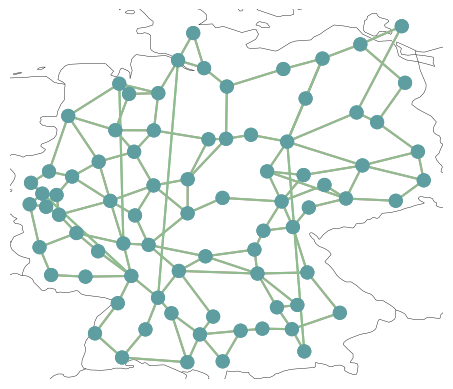

In [47]:
n.plot()

In [76]:
n.buses['x']['DE0 0']

11.965484499999999

In [29]:
n.buses['y']['DE0 0']

51.467240000000004

In [11]:
n.statistics()

Optimal Capacity  Installed Capacity  \
Generator   Combined-Cycle Gas      0.000000e+00            0.000000   
            Offshore Wind (AC)      2.321095e+03         2321.095188   
            Offshore Wind (DC)      5.465905e+03         5465.904812   
            Onshore Wind            5.441367e+04        54413.669761   
            Open-Cycle Gas          2.288854e+04        22888.536500   
            Solar                   5.366900e+04        53669.000000   
            biomass                 8.011736e+03         8011.736326   
            coal                    8.158220e+03         8158.220129   
            geothermal              0.000000e+00            0.000000   
            lignite                 2.099917e+04        20999.170197   
            nuclear                 4.066000e+03         4066.000000   
            oil                     8.563000e+02          856.300000   
Line        AC                      5.867786e+05       585398.531942   
Link        DC                      2.004085e-08            0.000000   
            H2 electrolysis         1.714171e-07            0.000000   
            H2 fuel cell            9.910162e-08            0.000000   
            H2 pipeline             1.039851e-05            0.000000   
Load        -                       0.000000e+00            0.000000   
StorageUnit Battery Storage         4.130384e-07            0.000000   
Store       Hydrogen Storage        9.361310e-05            0.000000   

                                Capacity Factor      Dispatch  Transmission  \
Generator   Combined-Cycle Gas              NaN  0.000000e+00  0.000000e+00   
            Offshore Wind (AC)     4.797788e-01  9.755244e+06  0.000000e+00   
            Offshore Wind (DC)     5.859729e-01  2.805716e+07  0.000000e+00   
            Onshore Wind           2.405445e-01  1.146588e+08  0.000000e+00   
            Open-Cycle Gas         1.131398e-01  2.268493e+07  0.000000e+00   
            Solar                  1.168105e-01  5.491733e+07  0.000000e+00   
            biomass                6.931416e-01  4.864663e+07  0.000000e+00   
            coal                   4.771560e-01  3.410044e+07  0.000000e+00   
            geothermal                      NaN  0.000000e+00  0.000000e+00   
            lignite                9.291642e-01  1.709223e+08  0.000000e+00   
            nuclear                7.135704e-01  2.541607e+07  0.000000e+00   
            oil                    9.206992e-13  6.906338e-06  0.000000e+00   
Line        AC                     2.290976e-01 -7.950596e-03 -4.373574e+07   
Link        DC                     3.709810e-01  0.000000e+00  6.839982e-06   
            H2 electrolysis        3.349090e-01 -1.902486e-04  0.000000e+00   
            H2 fuel cell           3.610091e-01 -1.567015e-04  0.000000e+00   
            H2 pipeline            1.138507e-02  0.000000e+00 -4.412383e-04   
Load        -                               NaN -5.091589e+08  0.000000e+00   
StorageUnit Battery Storage        5.721206e-02 -6.806377e-05  0.000000e+00   
Store       Hydrogen Storage       4.999407e-01  0.000000e+00  0.000000e+00   

                                  Withdrawal        Supply    Curtailment  \
Generator   Combined-Cycle Gas  0.000000e+00  0.000000e+00       0.000000   
            Offshore Wind (AC)  0.000000e+00  9.755244e+06    7022.590946   
            Offshore Wind (DC)  0.000000e+00  2.805716e+07       0.005812   
            Onshore Wind        0.000000e+00  1.146588e+08  639451.496400   
            Open-Cycle Gas      0.000000e+00  2.268493e+07       0.000000   
            Solar               0.000000e+00  5.491733e+07       0.017642   
            biomass             0.000000e+00  4.864663e+07       0.000000   
            coal                0.000000e+00  3.410044e+07       0.000000   
            geothermal          0.000000e+00  0.000000e+00       0.000000   
            lignite             0.000000e+00  1.709223e+08       0.000000   
            

In [82]:
n.generators_t.p_max_pu

Generator   DE0 0 onwind  DE0 0 solar  DE0 1 onwind  DE0 1 solar  \
snapshot                                                           
2013-01-01      0.604705     0.017514      0.533223     0.000000   
2013-01-02      0.463679     0.041891      0.244311     0.024079   
2013-01-03      0.779667     0.000000      0.525331     0.000000   
2013-01-04      0.637585     0.000000      0.479619     0.000000   
2013-01-05      0.312535     0.000000      0.312482     0.000000   
...                  ...          ...           ...          ...   
2013-12-27      0.572884     0.080810      0.809197     0.029164   
2013-12-28      0.567273     0.021217      0.426657     0.000000   
2013-12-29      0.363435     0.062247      0.269727     0.018111   
2013-12-30      0.244977     0.092101      0.414293     0.063938   
2013-12-31      0.224643     0.089286      0.425210     0.072611   

Generator   DE0 10 onwind  DE0 10 solar  DE0 11 onwind  DE0 11 solar  \
snapshot                                                               
2013-01-01       0.464262      0.000000       0.413224      0.026714   
2013-01-02       0.164894      0.032059       0.427304      0.045665   
2013-01-03       0.430556      0.000000       0.808093      0.000000   
2013-01-04       0.268284      0.000000       0.820629      0.000000   
2013-01-05       0.223732      0.000000       0.468573      0.000000   
...                   ...           ...            ...           ...   
2013-12-27       0.482384      0.075923       0.368447      0.052241   
2013-12-28       0.528643      0.000000       0.443657      0.022297   
2013-12-29       0.272678      0.043428       0.313425      0.040676   
2013-12-30       0.127234      0.077349       0.157745      0.097155   
2013-12-31       0.143448      0.094292       0.218919      0.049989   

Generator   DE0 12 onwind  DE0 12 solar  ...  DE0 78 onwind  DE0 78 solar  \
snapshot                                 ...                                
2013-01-01       0.641138      0.000000  ...       0.659866      0.012564   
2013-01-02       0.548294      0.045803  ...       0.371021      0.045642   
2013-01-03       0.771924      0.000000  ...       0.604751      0.000000   
2013-01-04       0.703246      0.000000  ...       0.321875      0.000000   
2013-01-05       0.390174      0.000000  ...       0.129116      0.010520   
...                   ...           ...  ...            ...           ...   
2013-12-27       0.731741      0.059857  ...       0.935202      0.025563   
2013-12-28       0.408431      0.000000  ...       0.338125      0.000000   
2013-12-29       0.352562      0.034696  ...       0.371399      0.048866   
2013-12-30       0.376118      0.078385  ...       0.687336      0.072765   
2013-12-31       0.234596      0.085049  ...       0.642213      0.048873   

Generator   DE0 79 onwind  DE0 79 solar  DE0 8 offwind-ac  DE0 8 offwind-dc  \
snapshot                                                                      
2013-01-01       0.472972      0.021949          0.756313          0.759587   
2013-01-02       0.043747      0.077900          0.885447          0.883859   
2013-01-03       0.259567      0.012022          0.875906          0.869817   
2013-01-04       0.123779      0.000000          0.885450          0.884214   
2013-01-05       0.101058      0.000000          0.621941          0.494049   
...                   ...           ...               ...               ...   
2013-12-27       0.381728      0.115816          0.885495          0.852932   
2013-12-28       0.422939      0.045027          0.884167          0.885500   
2013-12-29       0.215075      0.067986          0.882074          0.878936   
2013-12-30       0.043972      0.097573          0.885500          0.885026   
2013-12-31       0.097157      0.118131          0.885499          0.885500   

Generator   DE0 8 onwind  DE0 8 solar  DE0 9 onwind  DE0 9 solar  
snapshot                                                          
2013-01-01    

In [48]:
n.snapshots

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='snapshot', length=1826, freq=None)

# Network Split

In [3]:
snapshots = n.snapshots
snapshot_splits = split_list(list=snapshots, n=30)
netw_splits = []
for snapshot_split in snapshot_splits:
    netw_copy = n.copy()
    netw_copy.set_snapshots(snapshots=snapshot_split)
    netw_copy.optimize(snapshot_split, solver_name="gurobi")
    netw_splits.append(netw_copy)

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.35it/s]
INFO:linopy.io: Writing time: 2.49s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-t4d1iqcj.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-t4d1iqcj.lp


Reading time = 0.69 seconds


INFO:gurobipy:Reading time = 0.69 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x75c5c87c


INFO:gurobipy:Model fingerprint: 0x75c5c87c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37270 columns


INFO:gurobipy:Presolve removed 134700 rows and 37270 columns


Presolve time: 0.62s


INFO:gurobipy:Presolve time: 0.62s


Presolved: 79301 rows, 63685 columns, 302445 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63685 columns, 302445 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.70s


INFO:gurobipy:Ordering time: 1.70s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.23556725e+15 -4.63837175e+13  9.02e+10 8.36e+04  2.63e+12     3s


INFO:gurobipy:   0   2.23556725e+15 -4.63837175e+13  9.02e+10 8.36e+04  2.63e+12     3s


   1   3.11765608e+15 -1.64639467e+14  6.00e+10 2.21e+04  1.07e+12     4s


INFO:gurobipy:   1   3.11765608e+15 -1.64639467e+14  6.00e+10 2.21e+04  1.07e+12     4s


   2   3.30710602e+15 -3.01106074e+14  1.97e+10 2.08e+03  2.94e+11     4s


INFO:gurobipy:   2   3.30710602e+15 -3.01106074e+14  1.97e+10 2.08e+03  2.94e+11     4s


   3   6.26716127e+14 -2.99253704e+14  5.42e+08 4.02e+01  1.36e+10     4s


INFO:gurobipy:   3   6.26716127e+14 -2.99253704e+14  5.42e+08 4.02e+01  1.36e+10     4s


   4   2.07750000e+14 -6.24917485e+13  1.25e+08 2.01e+01  3.31e+09     5s


INFO:gurobipy:   4   2.07750000e+14 -6.24917485e+13  1.25e+08 2.01e+01  3.31e+09     5s


   5   5.85846097e+13 -1.43326485e+13  6.50e+06 2.70e+01  6.48e+08     5s


INFO:gurobipy:   5   5.85846097e+13 -1.43326485e+13  6.50e+06 2.70e+01  6.48e+08     5s


   6   2.74279240e+12 -6.76385682e+12  1.58e+03 9.04e+00  7.26e+07     6s


INFO:gurobipy:   6   2.74279240e+12 -6.76385682e+12  1.58e+03 9.04e+00  7.26e+07     6s


   7   8.12837538e+11 -1.48058817e+12  4.09e+02 1.46e+00  1.73e+07     6s


INFO:gurobipy:   7   8.12837538e+11 -1.48058817e+12  4.09e+02 1.46e+00  1.73e+07     6s


   8   2.26074718e+11 -2.29802929e+11  1.75e+02 1.86e-01  3.39e+06     7s


INFO:gurobipy:   8   2.26074718e+11 -2.29802929e+11  1.75e+02 1.86e-01  3.39e+06     7s


   9   1.20740122e+11 -1.28608248e+11  8.02e+01 1.05e-01  1.85e+06     7s


INFO:gurobipy:   9   1.20740122e+11 -1.28608248e+11  8.02e+01 1.05e-01  1.85e+06     7s


  10   7.26129904e+10 -6.23136346e+10  4.38e+01 4.53e-02  9.97e+05     8s


INFO:gurobipy:  10   7.26129904e+10 -6.23136346e+10  4.38e+01 4.53e-02  9.97e+05     8s


  11   4.65334915e+10 -3.64414906e+10  2.81e+01 2.25e-02  6.13e+05     9s


INFO:gurobipy:  11   4.65334915e+10 -3.64414906e+10  2.81e+01 2.25e-02  6.13e+05     9s


  12   3.30066633e+10 -1.94558547e+10  2.03e+01 1.03e-02  3.87e+05     9s


INFO:gurobipy:  12   3.30066633e+10 -1.94558547e+10  2.03e+01 1.03e-02  3.87e+05     9s


  13   2.10516720e+10 -1.14496941e+10  1.27e+01 5.48e-03  2.40e+05    10s


INFO:gurobipy:  13   2.10516720e+10 -1.14496941e+10  1.27e+01 5.48e-03  2.40e+05    10s


  14   1.38568409e+10 -4.41953583e+09  7.77e+00 2.88e-03  1.35e+05    10s


INFO:gurobipy:  14   1.38568409e+10 -4.41953583e+09  7.77e+00 2.88e-03  1.35e+05    10s


  15   9.16871935e+09 -1.92675247e+09  4.95e+00 1.92e-03  8.18e+04    11s


INFO:gurobipy:  15   9.16871935e+09 -1.92675247e+09  4.95e+00 1.92e-03  8.18e+04    11s


  16   4.40457707e+09 -5.46103678e+08  2.04e+00 1.31e-03  3.65e+04    12s


INFO:gurobipy:  16   4.40457707e+09 -5.46103678e+08  2.04e+00 1.31e-03  3.65e+04    12s


  17   2.83733976e+09  5.56660743e+08  9.81e-01 6.08e-04  1.68e+04    12s


INFO:gurobipy:  17   2.83733976e+09  5.56660743e+08  9.81e-01 6.08e-04  1.68e+04    12s


  18   2.26407686e+09  9.78306625e+08  6.37e-01 2.72e-04  9.48e+03    13s


INFO:gurobipy:  18   2.26407686e+09  9.78306625e+08  6.37e-01 2.72e-04  9.48e+03    13s


  19   1.74065478e+09  1.10776831e+09  3.14e-01 1.54e-04  4.66e+03    14s


INFO:gurobipy:  19   1.74065478e+09  1.10776831e+09  3.14e-01 1.54e-04  4.66e+03    14s


  20   1.37510787e+09  1.15775948e+09  9.64e-02 9.01e-05  1.60e+03    15s


INFO:gurobipy:  20   1.37510787e+09  1.15775948e+09  9.64e-02 9.01e-05  1.60e+03    15s


  21   1.33248209e+09  1.18222311e+09  7.05e-02 5.20e-05  1.11e+03    15s


INFO:gurobipy:  21   1.33248209e+09  1.18222311e+09  7.05e-02 5.20e-05  1.11e+03    15s


  22   1.28871820e+09  1.19051646e+09  4.42e-02 3.85e-05  7.24e+02    16s


INFO:gurobipy:  22   1.28871820e+09  1.19051646e+09  4.42e-02 3.85e-05  7.24e+02    16s


  23   1.26119652e+09  1.19934267e+09  2.87e-02 2.29e-05  4.56e+02    17s


INFO:gurobipy:  23   1.26119652e+09  1.19934267e+09  2.87e-02 2.29e-05  4.56e+02    17s


  24   1.22635693e+09  1.20647297e+09  7.72e-03 9.33e-06  1.47e+02    17s


INFO:gurobipy:  24   1.22635693e+09  1.20647297e+09  7.72e-03 9.33e-06  1.47e+02    17s


  25   1.21763172e+09  1.20945946e+09  3.32e-03 2.59e-06  6.02e+01    18s


INFO:gurobipy:  25   1.21763172e+09  1.20945946e+09  3.32e-03 2.59e-06  6.02e+01    18s


  26   1.21117774e+09  1.21039516e+09  2.63e-04 3.89e-07  5.77e+00    19s


INFO:gurobipy:  26   1.21117774e+09  1.21039516e+09  2.63e-04 3.89e-07  5.77e+00    19s


  27   1.21062971e+09  1.21051768e+09  9.56e-05 5.21e-08  8.25e-01    20s


INFO:gurobipy:  27   1.21062971e+09  1.21051768e+09  9.56e-05 5.21e-08  8.25e-01    20s


  28   1.21054380e+09  1.21053171e+09  2.56e-05 1.42e-08  8.90e-02    21s


INFO:gurobipy:  28   1.21054380e+09  1.21053171e+09  2.56e-05 1.42e-08  8.90e-02    21s


  29   1.21054008e+09  1.21053641e+09  7.75e-06 3.58e-09  2.70e-02    22s


INFO:gurobipy:  29   1.21054008e+09  1.21053641e+09  7.75e-06 3.58e-09  2.70e-02    22s


  30   1.21053883e+09  1.21053737e+09  2.58e-06 1.50e-09  1.08e-02    22s


INFO:gurobipy:  30   1.21053883e+09  1.21053737e+09  2.58e-06 1.50e-09  1.08e-02    22s


  31   1.21053815e+09  1.21053797e+09  3.71e-07 2.35e-10  1.34e-03    23s


INFO:gurobipy:  31   1.21053815e+09  1.21053797e+09  3.71e-07 2.35e-10  1.34e-03    23s


  32   1.21053809e+09  1.21053808e+09  2.10e-07 3.55e-10  5.08e-05    24s


INFO:gurobipy:  32   1.21053809e+09  1.21053808e+09  2.10e-07 3.55e-10  5.08e-05    24s


  33   1.21053809e+09  1.21053809e+09  4.40e-09 2.46e-10  3.53e-07    25s


INFO:gurobipy:  33   1.21053809e+09  1.21053809e+09  4.40e-09 2.46e-10  3.53e-07    25s


  34   1.21053809e+09  1.21053809e+09  3.68e-10 2.40e-10  1.83e-09    25s


INFO:gurobipy:  34   1.21053809e+09  1.21053809e+09  3.68e-10 2.40e-10  1.83e-09    25s


INFO:gurobipy:


Barrier solved model in 34 iterations and 25.34 seconds (12.18 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 25.34 seconds (12.18 work units)


Optimal objective 1.21053809e+09


INFO:gurobipy:Optimal objective 1.21053809e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                25s


       0 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      81 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:      81 PPushes remaining with PInf 0.0000000e+00                26s


       0 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 6.3135262e-10     26s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 6.3135262e-10     26s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27685    1.2105381e+09   0.000000e+00   0.000000e+00     26s


INFO:gurobipy:   27685    1.2105381e+09   0.000000e+00   0.000000e+00     26s


INFO:gurobipy:


Solved in 27685 iterations and 26.38 seconds (12.70 work units)


INFO:gurobipy:Solved in 27685 iterations and 26.38 seconds (12.70 work units)


Optimal objective  1.210538086e+09


INFO:gurobipy:Optimal objective  1.210538086e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 1.21e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.91it/s]
INFO:linopy.io: Writing time: 2.47s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-t__2v3ze.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-t__2v3ze.lp


Reading time = 0.66 seconds


INFO:gurobipy:Reading time = 0.66 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x9152e29e


INFO:gurobipy:Model fingerprint: 0x9152e29e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36888 columns


INFO:gurobipy:Presolve removed 134700 rows and 36888 columns


Presolve time: 0.70s


INFO:gurobipy:Presolve time: 0.70s


Presolved: 79301 rows, 64067 columns, 302827 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64067 columns, 302827 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.60s


INFO:gurobipy:Ordering time: 1.60s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22142653e+15 -4.58303703e+13  8.98e+10 8.36e+04  2.62e+12     3s


INFO:gurobipy:   0   2.22142653e+15 -4.58303703e+13  8.98e+10 8.36e+04  2.62e+12     3s


   1   3.09442135e+15 -1.63546016e+14  5.99e+10 2.21e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09442135e+15 -1.63546016e+14  5.99e+10 2.21e+04  1.07e+12     4s


   2   3.29195931e+15 -2.98511781e+14  1.95e+10 2.09e+03  2.93e+11     4s


INFO:gurobipy:   2   3.29195931e+15 -2.98511781e+14  1.95e+10 2.09e+03  2.93e+11     4s


   3   5.99507937e+14 -2.96672137e+14  5.36e+08 3.84e+01  1.33e+10     5s


INFO:gurobipy:   3   5.99507937e+14 -2.96672137e+14  5.36e+08 3.84e+01  1.33e+10     5s


   4   2.03424212e+14 -5.79120727e+13  1.27e+08 1.15e+01  3.32e+09     5s


INFO:gurobipy:   4   2.03424212e+14 -5.79120727e+13  1.27e+08 1.15e+01  3.32e+09     5s


   5   5.45356336e+13 -1.46475936e+13  3.93e+06 1.38e+02  6.10e+08     6s


INFO:gurobipy:   5   5.45356336e+13 -1.46475936e+13  3.93e+06 1.38e+02  6.10e+08     6s


   6   7.84496121e+12 -4.49227772e+13  2.56e+03 8.80e+01  3.98e+08     6s


INFO:gurobipy:   6   7.84496121e+12 -4.49227772e+13  2.56e+03 8.80e+01  3.98e+08     6s


   7   2.66172110e+12 -3.59961292e+12  3.98e+03 1.17e+00  4.63e+07     7s


INFO:gurobipy:   7   2.66172110e+12 -3.59961292e+12  3.98e+03 1.17e+00  4.63e+07     7s


   8   4.72159748e+11 -5.43391203e+11  5.46e+02 1.72e-01  7.46e+06     7s


INFO:gurobipy:   8   4.72159748e+11 -5.43391203e+11  5.46e+02 1.72e-01  7.46e+06     7s


   9   1.77984537e+11 -2.01813137e+11  1.58e+02 6.62e-02  2.78e+06     8s


INFO:gurobipy:   9   1.77984537e+11 -2.01813137e+11  1.58e+02 6.62e-02  2.78e+06     8s


  10   1.02279076e+11 -1.10559608e+11  8.73e+01 3.44e-02  1.56e+06     8s


INFO:gurobipy:  10   1.02279076e+11 -1.10559608e+11  8.73e+01 3.44e-02  1.56e+06     8s


  11   7.46093379e+10 -6.41202028e+10  6.34e+01 1.89e-02  1.02e+06     9s


INFO:gurobipy:  11   7.46093379e+10 -6.41202028e+10  6.34e+01 1.89e-02  1.02e+06     9s


  12   5.15059283e+10 -3.07807292e+10  4.34e+01 7.86e-03  6.03e+05    10s


INFO:gurobipy:  12   5.15059283e+10 -3.07807292e+10  4.34e+01 7.86e-03  6.03e+05    10s


  13   3.18634762e+10 -1.04146605e+10  2.71e+01 3.16e-03  3.10e+05    10s


INFO:gurobipy:  13   3.18634762e+10 -1.04146605e+10  2.71e+01 3.16e-03  3.10e+05    10s


  14   1.71804954e+10 -3.15694963e+09  1.38e+01 1.48e-03  1.49e+05    11s


INFO:gurobipy:  14   1.71804954e+10 -3.15694963e+09  1.38e+01 1.48e-03  1.49e+05    11s


  15   9.91444704e+09 -1.35089714e+09  7.62e+00 1.01e-03  8.25e+04    12s


INFO:gurobipy:  15   9.91444704e+09 -1.35089714e+09  7.62e+00 1.01e-03  8.25e+04    12s


  16   5.86747442e+09 -3.00278861e+08  4.25e+00 6.43e-04  4.52e+04    13s


INFO:gurobipy:  16   5.86747442e+09 -3.00278861e+08  4.25e+00 6.43e-04  4.52e+04    13s


  17   2.63265451e+09  5.27311405e+08  1.46e+00 2.52e-04  1.54e+04    13s


INFO:gurobipy:  17   2.63265451e+09  5.27311405e+08  1.46e+00 2.52e-04  1.54e+04    13s


  18   1.80693827e+09  7.32515329e+08  7.64e-01 1.27e-04  7.87e+03    14s


INFO:gurobipy:  18   1.80693827e+09  7.32515329e+08  7.64e-01 1.27e-04  7.87e+03    14s


  19   1.17427766e+09  7.91584348e+08  2.55e-01 8.07e-05  2.80e+03    15s


INFO:gurobipy:  19   1.17427766e+09  7.91584348e+08  2.55e-01 8.07e-05  2.80e+03    15s


  20   1.06059554e+09  8.29930095e+08  1.56e-01 4.39e-05  1.69e+03    15s


INFO:gurobipy:  20   1.06059554e+09  8.29930095e+08  1.56e-01 4.39e-05  1.69e+03    15s


  21   9.70435731e+08  8.47437156e+08  7.99e-02 2.62e-05  9.00e+02    16s


INFO:gurobipy:  21   9.70435731e+08  8.47437156e+08  7.99e-02 2.62e-05  9.00e+02    16s


  22   9.22219995e+08  8.59154550e+08  3.95e-02 1.34e-05  4.62e+02    17s


INFO:gurobipy:  22   9.22219995e+08  8.59154550e+08  3.95e-02 1.34e-05  4.62e+02    17s


  23   8.86792604e+08  8.67053783e+08  1.18e-02 5.10e-06  1.45e+02    17s


INFO:gurobipy:  23   8.86792604e+08  8.67053783e+08  1.18e-02 5.10e-06  1.45e+02    17s


  24   8.78210699e+08  8.70380134e+08  5.03e-03 1.22e-06  5.73e+01    18s


INFO:gurobipy:  24   8.78210699e+08  8.70380134e+08  5.03e-03 1.22e-06  5.73e+01    18s


  25   8.72574981e+08  8.71149017e+08  8.08e-04 2.72e-07  1.04e+01    19s


INFO:gurobipy:  25   8.72574981e+08  8.71149017e+08  8.08e-04 2.72e-07  1.04e+01    19s


  26   8.71490955e+08  8.71278994e+08  1.04e-04 4.87e-08  1.55e+00    20s


INFO:gurobipy:  26   8.71490955e+08  8.71278994e+08  1.04e-04 4.87e-08  1.55e+00    20s


  27   8.71375490e+08  8.71296927e+08  3.52e-05 2.32e-08  5.75e-01    20s


INFO:gurobipy:  27   8.71375490e+08  8.71296927e+08  3.52e-05 2.32e-08  5.75e-01    20s


  28   8.71333981e+08  8.71306402e+08  1.14e-05 7.93e-09  2.02e-01    21s


INFO:gurobipy:  28   8.71333981e+08  8.71306402e+08  1.14e-05 7.93e-09  2.02e-01    21s


  29   8.71318338e+08  8.71311106e+08  2.90e-06 1.66e-09  5.29e-02    22s


INFO:gurobipy:  29   8.71318338e+08  8.71311106e+08  2.90e-06 1.66e-09  5.29e-02    22s


  30   8.71313567e+08  8.71312415e+08  8.33e-07 2.57e-10  8.43e-03    22s


INFO:gurobipy:  30   8.71313567e+08  8.71312415e+08  8.33e-07 2.57e-10  8.43e-03    22s


  31   8.71312701e+08  8.71312528e+08  1.78e-07 2.44e-10  1.27e-03    23s


INFO:gurobipy:  31   8.71312701e+08  8.71312528e+08  1.78e-07 2.44e-10  1.27e-03    23s


  32   8.71312558e+08  8.71312545e+08  2.22e-07 3.70e-10  9.58e-05    25s


INFO:gurobipy:  32   8.71312558e+08  8.71312545e+08  2.22e-07 3.70e-10  9.58e-05    25s


  33   8.71312548e+08  8.71312548e+08  1.45e-08 2.93e-10  1.77e-06    26s


INFO:gurobipy:  33   8.71312548e+08  8.71312548e+08  1.45e-08 2.93e-10  1.77e-06    26s


  34   8.71312548e+08  8.71312548e+08  9.14e-10 8.11e-10  1.77e-09    26s


INFO:gurobipy:  34   8.71312548e+08  8.71312548e+08  9.14e-10 8.11e-10  1.77e-09    26s


INFO:gurobipy:


Barrier solved model in 34 iterations and 26.19 seconds (12.55 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 26.19 seconds (12.55 work units)


Optimal objective 8.71312548e+08


INFO:gurobipy:Optimal objective 8.71312548e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                26s


       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     107 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:     107 PPushes remaining with PInf 0.0000000e+00                27s


       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7923781e-10     27s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7923781e-10     27s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27167    8.7131255e+08   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:   27167    8.7131255e+08   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:


Solved in 27167 iterations and 26.90 seconds (12.89 work units)


INFO:gurobipy:Solved in 27167 iterations and 26.90 seconds (12.89 work units)


Optimal objective  8.713125482e+08


INFO:gurobipy:Optimal objective  8.713125482e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.71e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 40.46it/s]
INFO:linopy.io: Writing time: 2.43s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-azwjoz34.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-azwjoz34.lp


Reading time = 0.66 seconds


INFO:gurobipy:Reading time = 0.66 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x804fbe79


INFO:gurobipy:Model fingerprint: 0x804fbe79


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36914 columns


INFO:gurobipy:Presolve removed 134700 rows and 36914 columns


Presolve time: 0.61s


INFO:gurobipy:Presolve time: 0.61s


Presolved: 79301 rows, 64041 columns, 302801 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64041 columns, 302801 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.56s


INFO:gurobipy:Ordering time: 1.56s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22396741e+15 -4.53801950e+13  8.99e+10 8.36e+04  2.62e+12     3s


INFO:gurobipy:   0   2.22396741e+15 -4.53801950e+13  8.99e+10 8.36e+04  2.62e+12     3s


   1   3.08939740e+15 -1.63486861e+14  6.03e+10 2.22e+04  1.07e+12     3s


INFO:gurobipy:   1   3.08939740e+15 -1.63486861e+14  6.03e+10 2.22e+04  1.07e+12     3s


   2   3.29779581e+15 -2.98256281e+14  1.64e+10 2.11e+03  2.57e+11     4s


INFO:gurobipy:   2   3.29779581e+15 -2.98256281e+14  1.64e+10 2.11e+03  2.57e+11     4s


   3   6.27298839e+14 -2.92015833e+14  5.69e+08 3.97e+01  1.38e+10     4s


INFO:gurobipy:   3   6.27298839e+14 -2.92015833e+14  5.69e+08 3.97e+01  1.38e+10     4s


   4   2.01039801e+14 -5.49458400e+13  1.26e+08 1.48e+01  3.26e+09     5s


INFO:gurobipy:   4   2.01039801e+14 -5.49458400e+13  1.26e+08 1.48e+01  3.26e+09     5s


   5   5.45412648e+13 -1.48788503e+13  3.44e+06 2.63e+01  6.15e+08     5s


INFO:gurobipy:   5   5.45412648e+13 -1.48788503e+13  3.44e+06 2.63e+01  6.15e+08     5s


   6   9.52993245e+12 -4.06996079e+13  2.67e+03 1.13e+01  3.83e+08     6s


INFO:gurobipy:   6   9.52993245e+12 -4.06996079e+13  2.67e+03 1.13e+01  3.83e+08     6s


   7   2.84695619e+12 -4.22541693e+12  4.68e+03 1.73e+00  5.19e+07     6s


INFO:gurobipy:   7   2.84695619e+12 -4.22541693e+12  4.68e+03 1.73e+00  5.19e+07     6s


   8   6.34832723e+11 -5.43006987e+11  6.63e+02 1.20e-01  8.63e+06     7s


INFO:gurobipy:   8   6.34832723e+11 -5.43006987e+11  6.63e+02 1.20e-01  8.63e+06     7s


   9   1.80874008e+11 -1.81397848e+11  1.45e+02 3.69e-02  2.65e+06     7s


INFO:gurobipy:   9   1.80874008e+11 -1.81397848e+11  1.45e+02 3.69e-02  2.65e+06     7s


  10   1.08757712e+11 -1.38479831e+11  8.37e+01 2.76e-02  1.81e+06     8s


INFO:gurobipy:  10   1.08757712e+11 -1.38479831e+11  8.37e+01 2.76e-02  1.81e+06     8s


  11   8.51699853e+10 -7.74612063e+10  6.45e+01 1.55e-02  1.19e+06     8s


INFO:gurobipy:  11   8.51699853e+10 -7.74612063e+10  6.45e+01 1.55e-02  1.19e+06     8s


  12   5.90158936e+10 -4.58055498e+10  4.49e+01 7.97e-03  7.68e+05     9s


INFO:gurobipy:  12   5.90158936e+10 -4.58055498e+10  4.49e+01 7.97e-03  7.68e+05     9s


  13   4.57594257e+10 -3.59018950e+10  3.45e+01 6.11e-03  5.98e+05    10s


INFO:gurobipy:  13   4.57594257e+10 -3.59018950e+10  3.45e+01 6.11e-03  5.98e+05    10s


  14   2.91235172e+10 -1.05552207e+10  2.25e+01 1.67e-03  2.91e+05    10s


INFO:gurobipy:  14   2.91235172e+10 -1.05552207e+10  2.25e+01 1.67e-03  2.91e+05    10s


  15   1.67668856e+10 -3.38351317e+09  1.21e+01 8.42e-04  1.48e+05    11s


INFO:gurobipy:  15   1.67668856e+10 -3.38351317e+09  1.21e+01 8.42e-04  1.48e+05    11s


  16   9.20703014e+09 -1.16196863e+09  6.03e+00 4.77e-04  7.59e+04    12s


INFO:gurobipy:  16   9.20703014e+09 -1.16196863e+09  6.03e+00 4.77e-04  7.59e+04    12s


  17   3.23502045e+09  4.49993531e+08  1.48e+00 1.58e-04  2.04e+04    13s


INFO:gurobipy:  17   3.23502045e+09  4.49993531e+08  1.48e+00 1.58e-04  2.04e+04    13s


  18   1.75384173e+09  7.48496984e+08  5.12e-01 5.65e-05  7.36e+03    13s


INFO:gurobipy:  18   1.75384173e+09  7.48496984e+08  5.12e-01 5.65e-05  7.36e+03    13s


  19   1.24182487e+09  8.27577240e+08  2.13e-01 2.34e-05  3.03e+03    14s


INFO:gurobipy:  19   1.24182487e+09  8.27577240e+08  2.13e-01 2.34e-05  3.03e+03    14s


  20   1.06485897e+09  8.47456619e+08  1.10e-01 1.15e-05  1.59e+03    15s


INFO:gurobipy:  20   1.06485897e+09  8.47456619e+08  1.10e-01 1.15e-05  1.59e+03    15s


  21   9.46361948e+08  8.54013276e+08  4.38e-02 7.81e-06  6.76e+02    15s


INFO:gurobipy:  21   9.46361948e+08  8.54013276e+08  4.38e-02 7.81e-06  6.76e+02    15s


  22   9.18570309e+08  8.58618242e+08  2.83e-02 4.67e-06  4.39e+02    16s


INFO:gurobipy:  22   9.18570309e+08  8.58618242e+08  2.83e-02 4.67e-06  4.39e+02    16s


  23   8.80476577e+08  8.62683396e+08  6.75e-03 1.82e-06  1.30e+02    17s


INFO:gurobipy:  23   8.80476577e+08  8.62683396e+08  6.75e-03 1.82e-06  1.30e+02    17s


  24   8.69652955e+08  8.65145552e+08  1.85e-03 2.03e-07  3.30e+01    18s


INFO:gurobipy:  24   8.69652955e+08  8.65145552e+08  1.85e-03 2.03e-07  3.30e+01    18s


  25   8.65466472e+08  8.65244916e+08  6.38e-05 3.21e-08  1.62e+00    19s


INFO:gurobipy:  25   8.65466472e+08  8.65244916e+08  6.38e-05 3.21e-08  1.62e+00    19s


  26   8.65310475e+08  8.65296708e+08  9.52e-07 5.65e-09  1.01e-01    19s


INFO:gurobipy:  26   8.65310475e+08  8.65296708e+08  9.52e-07 5.65e-09  1.01e-01    19s


  27   8.65309612e+08  8.65307606e+08  7.92e-08 7.73e-10  1.47e-02    21s


INFO:gurobipy:  27   8.65309612e+08  8.65307606e+08  7.92e-08 7.73e-10  1.47e-02    21s


  28   8.65309458e+08  8.65309111e+08  5.70e-07 3.09e-10  2.55e-03    22s


INFO:gurobipy:  28   8.65309458e+08  8.65309111e+08  5.70e-07 3.09e-10  2.55e-03    22s


  29   8.65309432e+08  8.65309371e+08  8.21e-07 2.88e-10  4.51e-04    23s


INFO:gurobipy:  29   8.65309432e+08  8.65309371e+08  8.21e-07 2.88e-10  4.51e-04    23s


  30   8.65309420e+08  8.65309418e+08  8.85e-08 2.28e-10  1.40e-05    24s


INFO:gurobipy:  30   8.65309420e+08  8.65309418e+08  8.85e-08 2.28e-10  1.40e-05    24s


  31   8.65309420e+08  8.65309419e+08  1.39e-08 4.67e-10  5.48e-07    25s


INFO:gurobipy:  31   8.65309420e+08  8.65309419e+08  1.39e-08 4.67e-10  5.48e-07    25s


  32   8.65309419e+08  8.65309419e+08  2.77e-10 2.52e-10  2.02e-08    25s


INFO:gurobipy:  32   8.65309419e+08  8.65309419e+08  2.77e-10 2.52e-10  2.02e-08    25s


  33   8.65309419e+08  8.65309419e+08  2.18e-11 3.06e-10  2.02e-14    26s


INFO:gurobipy:  33   8.65309419e+08  8.65309419e+08  2.18e-11 3.06e-10  2.02e-14    26s


INFO:gurobipy:


Barrier solved model in 33 iterations and 26.14 seconds (12.72 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 26.14 seconds (12.72 work units)


Optimal objective 8.65309419e+08


INFO:gurobipy:Optimal objective 8.65309419e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                26s


       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.1746956e-09     27s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.1746956e-09     27s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   26532    8.6530942e+08   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:   26532    8.6530942e+08   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:


Solved in 26532 iterations and 26.85 seconds (13.08 work units)


INFO:gurobipy:Solved in 26532 iterations and 26.85 seconds (13.08 work units)


Optimal objective  8.653094195e+08


INFO:gurobipy:Optimal objective  8.653094195e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.65e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.29it/s]
INFO:linopy.io: Writing time: 2.46s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-043jhd7j.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-043jhd7j.lp


Reading time = 0.67 seconds


INFO:gurobipy:Reading time = 0.67 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x2361fdd1


INFO:gurobipy:Model fingerprint: 0x2361fdd1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36953 columns


INFO:gurobipy:Presolve removed 134700 rows and 36953 columns


Presolve time: 0.64s


INFO:gurobipy:Presolve time: 0.64s


Presolved: 79301 rows, 64002 columns, 302762 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64002 columns, 302762 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.72s


INFO:gurobipy:Ordering time: 1.72s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22380077e+15 -4.53263951e+13  8.99e+10 8.36e+04  2.62e+12     3s


INFO:gurobipy:   0   2.22380077e+15 -4.53263951e+13  8.99e+10 8.36e+04  2.62e+12     3s


   1   3.08930128e+15 -1.63215951e+14  6.03e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.08930128e+15 -1.63215951e+14  6.03e+10 2.22e+04  1.07e+12     4s


   2   3.29780901e+15 -2.98288124e+14  1.67e+10 2.10e+03  2.60e+11     4s


INFO:gurobipy:   2   3.29780901e+15 -2.98288124e+14  1.67e+10 2.10e+03  2.60e+11     4s


   3   6.35987690e+14 -2.93393916e+14  7.13e+08 1.86e+04  1.56e+10     4s


INFO:gurobipy:   3   6.35987690e+14 -2.93393916e+14  7.13e+08 1.86e+04  1.56e+10     4s


   4   2.05867763e+14 -6.61682646e+13  1.64e+08 1.35e+01  3.70e+09     5s


INFO:gurobipy:   4   2.05867763e+14 -6.61682646e+13  1.64e+08 1.35e+01  3.70e+09     5s


   5   5.51220984e+13 -1.48684522e+13  1.01e+07 1.38e+01  6.59e+08     5s


INFO:gurobipy:   5   5.51220984e+13 -1.48684522e+13  1.01e+07 1.38e+01  6.59e+08     5s


   6   1.63273099e+13 -5.87873802e+13  7.67e+03 8.72e+00  5.82e+08     6s


INFO:gurobipy:   6   1.63273099e+13 -5.87873802e+13  7.67e+03 8.72e+00  5.82e+08     6s


   7   4.63278788e+12 -3.84980506e+12  6.91e+03 8.98e-01  6.25e+07     7s


INFO:gurobipy:   7   4.63278788e+12 -3.84980506e+12  6.91e+03 8.98e-01  6.25e+07     7s


   8   1.44357526e+12 -1.26049747e+12  1.75e+03 2.67e-01  1.99e+07     7s


INFO:gurobipy:   8   1.44357526e+12 -1.26049747e+12  1.75e+03 2.67e-01  1.99e+07     7s


   9   2.69123705e+11 -3.36027930e+11  2.19e+02 6.71e-02  4.44e+06     8s


INFO:gurobipy:   9   2.69123705e+11 -3.36027930e+11  2.19e+02 6.71e-02  4.44e+06     8s


  10   1.77443693e+11 -1.82251937e+11  1.42e+02 3.51e-02  2.64e+06     8s


INFO:gurobipy:  10   1.77443693e+11 -1.82251937e+11  1.42e+02 3.51e-02  2.64e+06     8s


  11   1.15780196e+11 -1.16291011e+11  9.12e+01 2.17e-02  1.70e+06     9s


INFO:gurobipy:  11   1.15780196e+11 -1.16291011e+11  9.12e+01 2.17e-02  1.70e+06     9s


  12   8.00293395e+10 -6.65169030e+10  6.21e+01 1.12e-02  1.07e+06    10s


INFO:gurobipy:  12   8.00293395e+10 -6.65169030e+10  6.21e+01 1.12e-02  1.07e+06    10s


  13   5.81732301e+10 -3.33530779e+10  4.44e+01 5.08e-03  6.71e+05    10s


INFO:gurobipy:  13   5.81732301e+10 -3.33530779e+10  4.44e+01 5.08e-03  6.71e+05    10s


  14   3.72554074e+10 -9.26461548e+09  2.78e+01 2.30e-03  3.41e+05    11s


INFO:gurobipy:  14   3.72554074e+10 -9.26461548e+09  2.78e+01 2.30e-03  3.41e+05    11s


  15   1.64291861e+10 -2.64345842e+09  1.11e+01 1.28e-03  1.40e+05    12s


INFO:gurobipy:  15   1.64291861e+10 -2.64345842e+09  1.11e+01 1.28e-03  1.40e+05    12s


  16   9.23339227e+09 -5.12169128e+08  5.86e+00 6.67e-04  7.14e+04    13s


INFO:gurobipy:  16   9.23339227e+09 -5.12169128e+08  5.86e+00 6.67e-04  7.14e+04    13s


  17   3.61988353e+09  2.94801571e+08  1.81e+00 3.33e-04  2.44e+04    13s


INFO:gurobipy:  17   3.61988353e+09  2.94801571e+08  1.81e+00 3.33e-04  2.44e+04    13s


  18   1.79689503e+09  6.85312297e+08  5.69e-01 1.17e-04  8.14e+03    14s


INFO:gurobipy:  18   1.79689503e+09  6.85312297e+08  5.69e-01 1.17e-04  8.14e+03    14s


  19   1.29693327e+09  7.45180850e+08  2.57e-01 6.83e-05  4.04e+03    15s


INFO:gurobipy:  19   1.29693327e+09  7.45180850e+08  2.57e-01 6.83e-05  4.04e+03    15s


  20   1.06577914e+09  7.91224177e+08  1.26e-01 3.38e-05  2.01e+03    16s


INFO:gurobipy:  20   1.06577914e+09  7.91224177e+08  1.26e-01 3.38e-05  2.01e+03    16s


  21   9.63847317e+08  8.10536965e+08  6.99e-02 1.77e-05  1.12e+03    16s


INFO:gurobipy:  21   9.63847317e+08  8.10536965e+08  6.99e-02 1.77e-05  1.12e+03    16s


  22   8.95648232e+08  8.20645430e+08  3.34e-02 8.34e-06  5.50e+02    17s


INFO:gurobipy:  22   8.95648232e+08  8.20645430e+08  3.34e-02 8.34e-06  5.50e+02    17s


  23   8.54811588e+08  8.27566999e+08  1.18e-02 1.87e-06  2.00e+02    18s


INFO:gurobipy:  23   8.54811588e+08  8.27566999e+08  1.18e-02 1.87e-06  2.00e+02    18s


  24   8.32590041e+08  8.28598051e+08  1.48e-03 5.64e-07  2.92e+01    18s


INFO:gurobipy:  24   8.32590041e+08  8.28598051e+08  1.48e-03 5.64e-07  2.92e+01    18s


  25   8.29267384e+08  8.28893377e+08  5.98e-05 8.50e-08  2.74e+00    19s


INFO:gurobipy:  25   8.29267384e+08  8.28893377e+08  5.98e-05 8.50e-08  2.74e+00    19s


  26   8.29036847e+08  8.28961042e+08  2.15e-05 1.53e-08  5.55e-01    20s


INFO:gurobipy:  26   8.29036847e+08  8.28961042e+08  2.15e-05 1.53e-08  5.55e-01    20s


  27   8.28981079e+08  8.28977460e+08  3.63e-07 2.22e-09  2.65e-02    21s


INFO:gurobipy:  27   8.28981079e+08  8.28977460e+08  3.63e-07 2.22e-09  2.65e-02    21s


  28   8.28980891e+08  8.28980070e+08  8.40e-07 4.64e-10  6.01e-03    22s


INFO:gurobipy:  28   8.28980891e+08  8.28980070e+08  8.40e-07 4.64e-10  6.01e-03    22s


  29   8.28980832e+08  8.28980699e+08  4.43e-07 2.87e-10  9.75e-04    23s


INFO:gurobipy:  29   8.28980832e+08  8.28980699e+08  4.43e-07 2.87e-10  9.75e-04    23s


  30   8.28980819e+08  8.28980814e+08  5.25e-08 2.97e-10  3.62e-05    24s


INFO:gurobipy:  30   8.28980819e+08  8.28980814e+08  5.25e-08 2.97e-10  3.62e-05    24s


  31   8.28980818e+08  8.28980818e+08  1.49e-08 3.42e-10  6.70e-07    25s


INFO:gurobipy:  31   8.28980818e+08  8.28980818e+08  1.49e-08 3.42e-10  6.70e-07    25s


  32   8.28980818e+08  8.28980818e+08  2.37e-10 2.44e-10  5.03e-09    26s


INFO:gurobipy:  32   8.28980818e+08  8.28980818e+08  2.37e-10 2.44e-10  5.03e-09    26s


INFO:gurobipy:


Barrier solved model in 32 iterations and 25.52 seconds (12.12 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 25.52 seconds (12.12 work units)


Optimal objective 8.28980818e+08


INFO:gurobipy:Optimal objective 8.28980818e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                26s


       0 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     247 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:     247 PPushes remaining with PInf 0.0000000e+00                26s


       0 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.1044798e-10     26s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.1044798e-10     26s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28171    8.2898082e+08   0.000000e+00   0.000000e+00     26s


INFO:gurobipy:   28171    8.2898082e+08   0.000000e+00   0.000000e+00     26s


INFO:gurobipy:


Solved in 28171 iterations and 26.28 seconds (12.49 work units)


INFO:gurobipy:Solved in 28171 iterations and 26.28 seconds (12.49 work units)


Optimal objective  8.289808177e+08


INFO:gurobipy:Optimal objective  8.289808177e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.29e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.24it/s]
INFO:linopy.io: Writing time: 2.51s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-0qvpefsh.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-0qvpefsh.lp


Reading time = 0.69 seconds


INFO:gurobipy:Reading time = 0.69 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xdaf6c09f


INFO:gurobipy:Model fingerprint: 0xdaf6c09f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37039 columns


INFO:gurobipy:Presolve removed 134700 rows and 37039 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 79301 rows, 63916 columns, 302676 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63916 columns, 302676 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.54s


INFO:gurobipy:Ordering time: 1.54s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22907204e+15 -4.58475586e+13  9.00e+10 8.36e+04  2.62e+12     3s


INFO:gurobipy:   0   2.22907204e+15 -4.58475586e+13  9.00e+10 8.36e+04  2.62e+12     3s


   1   3.09965606e+15 -1.63813481e+14  6.02e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09965606e+15 -1.63813481e+14  6.02e+10 2.22e+04  1.07e+12     4s


   2   3.29203530e+15 -2.98973605e+14  2.13e+10 2.11e+03  3.14e+11     4s


INFO:gurobipy:   2   3.29203530e+15 -2.98973605e+14  2.13e+10 2.11e+03  3.14e+11     4s


   3   5.81163465e+14 -2.98429840e+14  6.48e+08 3.71e+01  1.45e+10     4s


INFO:gurobipy:   3   5.81163465e+14 -2.98429840e+14  6.48e+08 3.71e+01  1.45e+10     4s


   4   1.88772357e+14 -6.91282267e+13  1.43e+08 1.24e+01  3.41e+09     5s


INFO:gurobipy:   4   1.88772357e+14 -6.91282267e+13  1.43e+08 1.24e+01  3.41e+09     5s


   5   5.49910127e+13 -1.42286056e+13  8.69e+06 1.29e+01  6.45e+08     6s


INFO:gurobipy:   5   5.49910127e+13 -1.42286056e+13  8.69e+06 1.29e+01  6.45e+08     6s


   6   2.29392718e+13 -4.59458772e+13  1.42e+04 1.11e+01  5.53e+08     6s


INFO:gurobipy:   6   2.29392718e+13 -4.59458772e+13  1.42e+04 1.11e+01  5.53e+08     6s


   7   7.40666375e+12 -4.89331880e+12  5.00e+03 1.91e+00  9.33e+07     7s


INFO:gurobipy:   7   7.40666375e+12 -4.89331880e+12  5.00e+03 1.91e+00  9.33e+07     7s


   8   1.60847535e+12 -1.00233738e+12  9.31e+02 2.81e-01  1.95e+07     7s


INFO:gurobipy:   8   1.60847535e+12 -1.00233738e+12  9.31e+02 2.81e-01  1.95e+07     7s


   9   5.00351095e+11 -3.26928665e+11  2.27e+02 1.09e-01  6.12e+06     8s


INFO:gurobipy:   9   5.00351095e+11 -3.26928665e+11  2.27e+02 1.09e-01  6.12e+06     8s


  10   2.33588143e+11 -1.45519936e+11  1.03e+02 4.60e-02  2.79e+06     8s


INFO:gurobipy:  10   2.33588143e+11 -1.45519936e+11  1.03e+02 4.60e-02  2.79e+06     8s


  11   1.92083143e+11 -9.28824733e+10  8.40e+01 2.54e-02  2.10e+06     9s


INFO:gurobipy:  11   1.92083143e+11 -9.28824733e+10  8.40e+01 2.54e-02  2.10e+06     9s


  12   1.16708363e+11 -6.01558722e+10  5.06e+01 1.37e-02  1.30e+06     9s


INFO:gurobipy:  12   1.16708363e+11 -6.01558722e+10  5.06e+01 1.37e-02  1.30e+06     9s


  13   8.76048266e+10 -3.71973629e+10  3.74e+01 8.23e-03  9.18e+05    10s


INFO:gurobipy:  13   8.76048266e+10 -3.71973629e+10  3.74e+01 8.23e-03  9.18e+05    10s


  14   5.22060220e+10 -1.57268854e+10  2.19e+01 5.21e-03  4.99e+05    10s


INFO:gurobipy:  14   5.22060220e+10 -1.57268854e+10  2.19e+01 5.21e-03  4.99e+05    10s


  15   2.52892639e+10 -5.02622976e+09  1.05e+01 2.94e-03  2.23e+05    11s


INFO:gurobipy:  15   2.52892639e+10 -5.02622976e+09  1.05e+01 2.94e-03  2.23e+05    11s


  16   1.18966575e+10 -1.38249125e+09  4.42e+00 1.35e-03  9.75e+04    12s


INFO:gurobipy:  16   1.18966575e+10 -1.38249125e+09  4.42e+00 1.35e-03  9.75e+04    12s


  17   6.83667694e+09  5.03226365e+07  2.27e+00 5.97e-04  4.98e+04    13s


INFO:gurobipy:  17   6.83667694e+09  5.03226365e+07  2.27e+00 5.97e-04  4.98e+04    13s


  18   2.62630219e+09  5.10010825e+08  6.11e-01 2.87e-04  1.55e+04    13s


INFO:gurobipy:  18   2.62630219e+09  5.10010825e+08  6.11e-01 2.87e-04  1.55e+04    13s


  19   1.74825577e+09  7.29136817e+08  2.97e-01 1.15e-04  7.48e+03    14s


INFO:gurobipy:  19   1.74825577e+09  7.29136817e+08  2.97e-01 1.15e-04  7.48e+03    14s


  20   1.43979611e+09  7.97631218e+08  1.89e-01 5.70e-05  4.71e+03    15s


INFO:gurobipy:  20   1.43979611e+09  7.97631218e+08  1.89e-01 5.70e-05  4.71e+03    15s


  21   1.18787776e+09  8.21347248e+08  1.05e-01 3.56e-05  2.69e+03    15s


INFO:gurobipy:  21   1.18787776e+09  8.21347248e+08  1.05e-01 3.56e-05  2.69e+03    15s


  22   1.03303125e+09  8.32086145e+08  5.52e-02 2.39e-05  1.47e+03    16s


INFO:gurobipy:  22   1.03303125e+09  8.32086145e+08  5.52e-02 2.39e-05  1.47e+03    16s


  23   9.46923296e+08  8.41101513e+08  2.85e-02 1.35e-05  7.77e+02    16s


INFO:gurobipy:  23   9.46923296e+08  8.41101513e+08  2.85e-02 1.35e-05  7.77e+02    16s


  24   8.76163107e+08  8.48285271e+08  6.77e-03 4.73e-06  2.05e+02    17s


INFO:gurobipy:  24   8.76163107e+08  8.48285271e+08  6.77e-03 4.73e-06  2.05e+02    17s


  25   8.56580617e+08  8.50215618e+08  1.32e-03 1.45e-06  4.67e+01    18s


INFO:gurobipy:  25   8.56580617e+08  8.50215618e+08  1.32e-03 1.45e-06  4.67e+01    18s


  26   8.51871428e+08  8.51003112e+08  1.46e-04 2.07e-07  6.37e+00    18s


INFO:gurobipy:  26   8.51871428e+08  8.51003112e+08  1.46e-04 2.07e-07  6.37e+00    18s


  27   8.51162897e+08  8.51087840e+08  4.93e-05 2.65e-08  5.51e-01    19s


INFO:gurobipy:  27   8.51162897e+08  8.51087840e+08  4.93e-05 2.65e-08  5.51e-01    19s


  28   8.51111052e+08  8.51101693e+08  1.92e-05 7.06e-09  6.87e-02    20s


INFO:gurobipy:  28   8.51111052e+08  8.51101693e+08  1.92e-05 7.06e-09  6.87e-02    20s


  29   8.51108412e+08  8.51105009e+08  4.79e-06 2.96e-09  2.50e-02    21s


INFO:gurobipy:  29   8.51108412e+08  8.51105009e+08  4.79e-06 2.96e-09  2.50e-02    21s


  30   8.51108029e+08  8.51106368e+08  2.40e-06 1.32e-09  1.22e-02    21s


INFO:gurobipy:  30   8.51108029e+08  8.51106368e+08  2.40e-06 1.32e-09  1.22e-02    21s


  31   8.51107627e+08  8.51107008e+08  8.48e-07 5.54e-10  4.54e-03    22s


INFO:gurobipy:  31   8.51107627e+08  8.51107008e+08  8.48e-07 5.54e-10  4.54e-03    22s


  32   8.51107506e+08  8.51107368e+08  9.96e-07 3.68e-10  1.01e-03    23s


INFO:gurobipy:  32   8.51107506e+08  8.51107368e+08  9.96e-07 3.68e-10  1.01e-03    23s


  33   8.51107487e+08  8.51107479e+08  2.72e-07 2.43e-10  6.01e-05    24s


INFO:gurobipy:  33   8.51107487e+08  8.51107479e+08  2.72e-07 2.43e-10  6.01e-05    24s


  34   8.51107486e+08  8.51107485e+08  7.82e-08 2.35e-10  5.64e-07    25s


INFO:gurobipy:  34   8.51107486e+08  8.51107485e+08  7.82e-08 2.35e-10  5.64e-07    25s


  35   8.51107485e+08  8.51107485e+08  7.62e-09 2.83e-10  1.30e-09    26s


INFO:gurobipy:  35   8.51107485e+08  8.51107485e+08  7.62e-09 2.83e-10  1.30e-09    26s


INFO:gurobipy:


Barrier solved model in 35 iterations and 25.66 seconds (13.14 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 25.66 seconds (13.14 work units)


Optimal objective 8.51107485e+08


INFO:gurobipy:Optimal objective 8.51107485e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48558 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:   48558 DPushes remaining with DInf 0.0000000e+00                26s


       0 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     108 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:     108 PPushes remaining with PInf 0.0000000e+00                26s


       0 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.3072598e-10     26s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.3072598e-10     26s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28528    8.5110749e+08   0.000000e+00   0.000000e+00     26s


INFO:gurobipy:   28528    8.5110749e+08   0.000000e+00   0.000000e+00     26s


INFO:gurobipy:


Solved in 28528 iterations and 26.44 seconds (13.50 work units)


INFO:gurobipy:Solved in 28528 iterations and 26.44 seconds (13.50 work units)


Optimal objective  8.511074855e+08


INFO:gurobipy:Optimal objective  8.511074855e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.51e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 40.82it/s]
INFO:linopy.io: Writing time: 2.5s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-2fihno32.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-2fihno32.lp


Reading time = 0.66 seconds


INFO:gurobipy:Reading time = 0.66 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xb587883d


INFO:gurobipy:Model fingerprint: 0xb587883d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37645 columns


INFO:gurobipy:Presolve removed 134700 rows and 37645 columns


Presolve time: 0.61s


INFO:gurobipy:Presolve time: 0.61s


Presolved: 79301 rows, 63310 columns, 302070 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63310 columns, 302070 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.44s


INFO:gurobipy:Ordering time: 1.44s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.24487969e+15 -4.65093571e+13  9.06e+10 8.37e+04  2.65e+12     3s


INFO:gurobipy:   0   2.24487969e+15 -4.65093571e+13  9.06e+10 8.37e+04  2.65e+12     3s


   1   3.12941151e+15 -1.66170456e+14  6.03e+10 2.18e+04  1.06e+12     3s


INFO:gurobipy:   1   3.12941151e+15 -1.66170456e+14  6.03e+10 2.18e+04  1.06e+12     3s


   2   3.31868458e+15 -3.02598669e+14  1.76e+10 2.06e+03  2.67e+11     4s


INFO:gurobipy:   2   3.31868458e+15 -3.02598669e+14  1.76e+10 2.06e+03  2.67e+11     4s


   3   6.68154738e+14 -2.97525611e+14  5.76e+08 6.02e+01  1.43e+10     4s


INFO:gurobipy:   3   6.68154738e+14 -2.97525611e+14  5.76e+08 6.02e+01  1.43e+10     4s


   4   2.14381975e+14 -6.10540693e+13  1.29e+08 7.82e+01  3.34e+09     4s


INFO:gurobipy:   4   2.14381975e+14 -6.10540693e+13  1.29e+08 7.82e+01  3.34e+09     4s


   5   5.92775899e+13 -1.45051103e+13  8.33e+06 1.83e+01  6.65e+08     5s


INFO:gurobipy:   5   5.92775899e+13 -1.45051103e+13  8.33e+06 1.83e+01  6.65e+08     5s


   6   2.09385623e+13 -4.63762711e+13  6.89e+03 1.38e+01  5.35e+08     6s


INFO:gurobipy:   6   2.09385623e+13 -4.63762711e+13  6.89e+03 1.38e+01  5.35e+08     6s


   7   4.45029778e+12 -4.28338212e+12  4.33e+03 3.38e+00  6.56e+07     6s


INFO:gurobipy:   7   4.45029778e+12 -4.28338212e+12  4.33e+03 3.38e+00  6.56e+07     6s


   8   1.20963963e+12 -1.46729223e+12  9.55e+02 9.82e-01  1.99e+07     6s


INFO:gurobipy:   8   1.20963963e+12 -1.46729223e+12  9.55e+02 9.82e-01  1.99e+07     6s


   9   2.09431517e+11 -2.50870864e+11  1.01e+02 1.14e-01  3.41e+06     7s


INFO:gurobipy:   9   2.09431517e+11 -2.50870864e+11  1.01e+02 1.14e-01  3.41e+06     7s


  10   1.19624032e+11 -1.74365001e+11  5.46e+01 7.70e-02  2.18e+06     7s


INFO:gurobipy:  10   1.19624032e+11 -1.74365001e+11  5.46e+01 7.70e-02  2.18e+06     7s


  11   8.18891233e+10 -1.03777562e+11  3.58e+01 4.55e-02  1.38e+06     8s


INFO:gurobipy:  11   8.18891233e+10 -1.03777562e+11  3.58e+01 4.55e-02  1.38e+06     8s


  12   5.26256662e+10 -5.90888912e+10  2.28e+01 2.32e-02  8.27e+05     8s


INFO:gurobipy:  12   5.26256662e+10 -5.90888912e+10  2.28e+01 2.32e-02  8.27e+05     8s


  13   3.61970454e+10 -2.46827559e+10  1.55e+01 8.43e-03  4.51e+05     9s


INFO:gurobipy:  13   3.61970454e+10 -2.46827559e+10  1.55e+01 8.43e-03  4.51e+05     9s


  14   1.93388120e+10 -7.94632049e+09  7.77e+00 1.97e-03  2.02e+05    10s


INFO:gurobipy:  14   1.93388120e+10 -7.94632049e+09  7.77e+00 1.97e-03  2.02e+05    10s


  15   1.17110562e+10 -3.23969056e+09  4.26e+00 8.19e-04  1.11e+05    10s


INFO:gurobipy:  15   1.17110562e+10 -3.23969056e+09  4.26e+00 8.19e-04  1.11e+05    10s


  16   6.74421846e+09 -1.11879572e+09  2.25e+00 4.79e-04  5.82e+04    11s


INFO:gurobipy:  16   6.74421846e+09 -1.11879572e+09  2.25e+00 4.79e-04  5.82e+04    11s


  17   3.95859507e+09 -6.25791002e+07  1.16e+00 2.79e-04  2.98e+04    12s


INFO:gurobipy:  17   3.95859507e+09 -6.25791002e+07  1.16e+00 2.79e-04  2.98e+04    12s


  18   2.08594296e+09  5.19974587e+08  4.13e-01 1.41e-04  1.16e+04    13s


INFO:gurobipy:  18   2.08594296e+09  5.19974587e+08  4.13e-01 1.41e-04  1.16e+04    13s


  19   1.66520029e+09  7.32637230e+08  2.56e-01 7.87e-05  6.90e+03    14s


INFO:gurobipy:  19   1.66520029e+09  7.32637230e+08  2.56e-01 7.87e-05  6.90e+03    14s


  20   1.27064062e+09  8.56557002e+08  1.11e-01 4.01e-05  3.07e+03    14s


INFO:gurobipy:  20   1.27064062e+09  8.56557002e+08  1.11e-01 4.01e-05  3.07e+03    14s


  21   1.12580914e+09  8.97354199e+08  5.81e-02 2.54e-05  1.69e+03    15s


INFO:gurobipy:  21   1.12580914e+09  8.97354199e+08  5.81e-02 2.54e-05  1.69e+03    15s


  22   1.03579120e+09  9.17443107e+08  2.53e-02 1.79e-05  8.76e+02    16s


INFO:gurobipy:  22   1.03579120e+09  9.17443107e+08  2.53e-02 1.79e-05  8.76e+02    16s


  23   1.00587767e+09  9.41161790e+08  1.49e-02 8.74e-06  4.79e+02    17s


INFO:gurobipy:  23   1.00587767e+09  9.41161790e+08  1.49e-02 8.74e-06  4.79e+02    17s


  24   9.78155246e+08  9.53236087e+08  5.08e-03 3.97e-06  1.84e+02    17s


INFO:gurobipy:  24   9.78155246e+08  9.53236087e+08  5.08e-03 3.97e-06  1.84e+02    17s


  25   9.63568238e+08  9.60244843e+08  1.97e-04 9.51e-07  2.46e+01    18s


INFO:gurobipy:  25   9.63568238e+08  9.60244843e+08  1.97e-04 9.51e-07  2.46e+01    18s


  26   9.62571455e+08  9.62235661e+08  1.34e-05 8.88e-08  2.49e+00    19s


INFO:gurobipy:  26   9.62571455e+08  9.62235661e+08  1.34e-05 8.88e-08  2.49e+00    19s


  27   9.62464094e+08  9.62416480e+08  1.46e-06 1.54e-08  3.52e-01    20s


INFO:gurobipy:  27   9.62464094e+08  9.62416480e+08  1.46e-06 1.54e-08  3.52e-01    20s


  28   9.62458680e+08  9.62445455e+08  4.91e-08 4.53e-09  9.79e-02    21s


INFO:gurobipy:  28   9.62458680e+08  9.62445455e+08  4.91e-08 4.53e-09  9.79e-02    21s


  29   9.62458405e+08  9.62456172e+08  4.35e-07 6.94e-10  1.65e-02    21s


INFO:gurobipy:  29   9.62458405e+08  9.62456172e+08  4.35e-07 6.94e-10  1.65e-02    21s


  30   9.62458258e+08  9.62457924e+08  1.28e-06 2.69e-10  2.48e-03    22s


INFO:gurobipy:  30   9.62458258e+08  9.62457924e+08  1.28e-06 2.69e-10  2.48e-03    22s


  31   9.62458193e+08  9.62458175e+08  2.08e-07 2.25e-10  1.31e-04    23s


INFO:gurobipy:  31   9.62458193e+08  9.62458175e+08  2.08e-07 2.25e-10  1.31e-04    23s


  32   9.62458191e+08  9.62458191e+08  1.31e-08 2.72e-10  2.64e-06    24s


INFO:gurobipy:  32   9.62458191e+08  9.62458191e+08  1.31e-08 2.72e-10  2.64e-06    24s


  33   9.62458191e+08  9.62458191e+08  2.04e-09 8.27e-10  2.64e-09    25s


INFO:gurobipy:  33   9.62458191e+08  9.62458191e+08  2.04e-09 8.27e-10  2.64e-09    25s


INFO:gurobipy:


Barrier solved model in 33 iterations and 24.60 seconds (12.28 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 24.60 seconds (12.28 work units)


Optimal objective 9.62458191e+08


INFO:gurobipy:Optimal objective 9.62458191e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48561 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:   48561 DPushes remaining with DInf 0.0000000e+00                25s


     489 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:     489 DPushes remaining with DInf 0.0000000e+00                25s


       0 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      45 PPushes remaining with PInf 0.0000000e+00                25s


INFO:gurobipy:      45 PPushes remaining with PInf 0.0000000e+00                25s


       0 PPushes remaining with PInf 0.0000000e+00                25s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                25s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.2021045e-10     25s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.2021045e-10     25s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   26144    9.6245819e+08   0.000000e+00   0.000000e+00     25s


INFO:gurobipy:   26144    9.6245819e+08   0.000000e+00   0.000000e+00     25s


INFO:gurobipy:


Solved in 26144 iterations and 25.33 seconds (12.64 work units)


INFO:gurobipy:Solved in 26144 iterations and 25.33 seconds (12.64 work units)


Optimal objective  9.624581907e+08


INFO:gurobipy:Optimal objective  9.624581907e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 9.62e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 36.99it/s]
INFO:linopy.io: Writing time: 2.47s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6_iy457j.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6_iy457j.lp


Reading time = 0.73 seconds


INFO:gurobipy:Reading time = 0.73 seconds


obj: 214001 rows, 100955 columns, 462213 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 462213 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 462213 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 462213 nonzeros


Model fingerprint: 0x26e44edc


INFO:gurobipy:Model fingerprint: 0x26e44edc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 135516 rows and 37738 columns


INFO:gurobipy:Presolve removed 135516 rows and 37738 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 78485 rows, 63217 columns, 298908 nonzeros


INFO:gurobipy:Presolved: 78485 rows, 63217 columns, 298908 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.69s


INFO:gurobipy:Ordering time: 1.69s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 344


INFO:gurobipy: Dense cols : 344


 Free vars  : 5220


INFO:gurobipy: Free vars  : 5220


 AA' NZ     : 1.039e+06


INFO:gurobipy: AA' NZ     : 1.039e+06


 Factor NZ  : 1.590e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.590e+07 (roughly 200 MB of memory)


 Factor Ops : 2.003e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.003e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.17471863e+15 -4.21707709e+13  9.00e+10 7.73e+04  2.47e+12     3s


INFO:gurobipy:   0   2.17471863e+15 -4.21707709e+13  9.00e+10 7.73e+04  2.47e+12     3s


   1   3.09716257e+15 -1.26086384e+14  5.99e+10 2.40e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09716257e+15 -1.26086384e+14  5.99e+10 2.40e+04  1.07e+12     4s


   2   3.42979707e+15 -2.90419266e+14  2.60e+10 1.53e+03  3.61e+11     4s


INFO:gurobipy:   2   3.42979707e+15 -2.90419266e+14  2.60e+10 1.53e+03  3.61e+11     4s


   3   4.95009294e+14 -2.87866585e+14  4.47e+08 2.10e+01  1.12e+10     4s


INFO:gurobipy:   3   4.95009294e+14 -2.87866585e+14  4.47e+08 2.10e+01  1.12e+10     4s


   4   1.80376593e+14 -5.85701455e+13  1.03e+08 1.53e+01  2.92e+09     5s


INFO:gurobipy:   4   1.80376593e+14 -5.85701455e+13  1.03e+08 1.53e+01  2.92e+09     5s


   5   4.78917730e+13 -1.52267966e+13  1.97e+06 1.77e+01  5.41e+08     5s


INFO:gurobipy:   5   4.78917730e+13 -1.52267966e+13  1.97e+06 1.77e+01  5.41e+08     5s


   6   9.21872143e+12 -5.34134225e+13  4.48e+03 1.04e+01  4.76e+08     6s


INFO:gurobipy:   6   9.21872143e+12 -5.34134225e+13  4.48e+03 1.04e+01  4.76e+08     6s


   7   3.53645369e+12 -3.47447581e+12  4.91e+03 8.17e-01  5.22e+07     6s


INFO:gurobipy:   7   3.53645369e+12 -3.47447581e+12  4.91e+03 8.17e-01  5.22e+07     6s


   8   8.26602093e+11 -4.57416280e+11  9.34e+02 1.77e-01  9.54e+06     7s


INFO:gurobipy:   8   8.26602093e+11 -4.57416280e+11  9.34e+02 1.77e-01  9.54e+06     7s


   9   2.67449881e+11 -1.82631664e+11  2.50e+02 6.14e-02  3.34e+06     7s


INFO:gurobipy:   9   2.67449881e+11 -1.82631664e+11  2.50e+02 6.14e-02  3.34e+06     7s


  10   1.67266130e+11 -7.93125436e+10  1.50e+02 2.43e-02  1.83e+06     8s


INFO:gurobipy:  10   1.67266130e+11 -7.93125436e+10  1.50e+02 2.43e-02  1.83e+06     8s


  11   1.30818165e+11 -5.27516487e+10  1.15e+02 1.62e-02  1.36e+06     8s


INFO:gurobipy:  11   1.30818165e+11 -5.27516487e+10  1.15e+02 1.62e-02  1.36e+06     8s


  12   9.34072258e+10 -3.54741647e+10  8.15e+01 1.07e-02  9.56e+05     9s


INFO:gurobipy:  12   9.34072258e+10 -3.54741647e+10  8.15e+01 1.07e-02  9.56e+05     9s


  13   7.22535326e+10 -2.21506615e+10  6.20e+01 6.89e-03  7.01e+05     9s


INFO:gurobipy:  13   7.22535326e+10 -2.21506615e+10  6.20e+01 6.89e-03  7.01e+05     9s


  14   4.39172966e+10 -7.23881758e+09  3.67e+01 2.62e-03  3.80e+05    10s


INFO:gurobipy:  14   4.39172966e+10 -7.23881758e+09  3.67e+01 2.62e-03  3.80e+05    10s


  15   2.10670285e+10 -2.51414512e+09  1.80e+01 1.42e-03  1.75e+05    11s


INFO:gurobipy:  15   2.10670285e+10 -2.51414512e+09  1.80e+01 1.42e-03  1.75e+05    11s


  16   1.02625908e+10 -6.93218924e+08  7.82e+00 7.93e-04  8.13e+04    11s


INFO:gurobipy:  16   1.02625908e+10 -6.93218924e+08  7.82e+00 7.93e-04  8.13e+04    11s


  17   5.24315962e+09  2.10235303e+08  3.46e+00 4.12e-04  3.73e+04    12s


INFO:gurobipy:  17   5.24315962e+09  2.10235303e+08  3.46e+00 4.12e-04  3.73e+04    12s


  18   2.67095737e+09  6.75025707e+08  1.32e+00 1.93e-04  1.48e+04    13s


INFO:gurobipy:  18   2.67095737e+09  6.75025707e+08  1.32e+00 1.93e-04  1.48e+04    13s


  19   1.77215313e+09  8.33381178e+08  5.82e-01 1.04e-04  6.97e+03    14s


INFO:gurobipy:  19   1.77215313e+09  8.33381178e+08  5.82e-01 1.04e-04  6.97e+03    14s


  20   1.45600316e+09  9.07929800e+08  3.52e-01 5.49e-05  4.07e+03    14s


INFO:gurobipy:  20   1.45600316e+09  9.07929800e+08  3.52e-01 5.49e-05  4.07e+03    14s


  21   1.26836335e+09  9.45106798e+08  2.06e-01 3.06e-05  2.40e+03    15s


INFO:gurobipy:  21   1.26836335e+09  9.45106798e+08  2.06e-01 3.06e-05  2.40e+03    15s


  22   1.11075214e+09  9.73248361e+08  8.66e-02 1.35e-05  1.02e+03    15s


INFO:gurobipy:  22   1.11075214e+09  9.73248361e+08  8.66e-02 1.35e-05  1.02e+03    15s


  23   1.04801299e+09  9.83351226e+08  3.97e-02 6.41e-06  4.80e+02    16s


INFO:gurobipy:  23   1.04801299e+09  9.83351226e+08  3.97e-02 6.41e-06  4.80e+02    16s


  24   1.00510913e+09  9.88847864e+08  9.65e-03 1.99e-06  1.21e+02    17s


INFO:gurobipy:  24   1.00510913e+09  9.88847864e+08  9.65e-03 1.99e-06  1.21e+02    17s


  25   9.92986726e+08  9.90503744e+08  1.08e-03 2.78e-07  1.84e+01    18s


INFO:gurobipy:  25   9.92986726e+08  9.90503744e+08  1.08e-03 2.78e-07  1.84e+01    18s


  26   9.91464877e+08  9.90638584e+08  3.53e-04 5.71e-08  6.13e+00    18s


INFO:gurobipy:  26   9.91464877e+08  9.90638584e+08  3.53e-04 5.71e-08  6.13e+00    18s


  27   9.90704707e+08  9.90671774e+08  1.35e-04 1.05e-08  2.44e-01    19s


INFO:gurobipy:  27   9.90704707e+08  9.90671774e+08  1.35e-04 1.05e-08  2.44e-01    19s


  28   9.90692957e+08  9.90686068e+08  2.05e-05 2.18e-09  5.11e-02    19s


INFO:gurobipy:  28   9.90692957e+08  9.90686068e+08  2.05e-05 2.18e-09  5.11e-02    19s


  29   9.90690984e+08  9.90688970e+08  4.46e-06 6.40e-10  1.49e-02    20s


INFO:gurobipy:  29   9.90690984e+08  9.90688970e+08  4.46e-06 6.40e-10  1.49e-02    20s


  30   9.90690516e+08  9.90690097e+08  1.25e-06 2.55e-10  3.12e-03    21s


INFO:gurobipy:  30   9.90690516e+08  9.90690097e+08  1.25e-06 2.55e-10  3.12e-03    21s


  31   9.90690334e+08  9.90690270e+08  1.36e-06 3.52e-10  4.71e-04    22s


INFO:gurobipy:  31   9.90690334e+08  9.90690270e+08  1.36e-06 3.52e-10  4.71e-04    22s


  32   9.90690292e+08  9.90690291e+08  1.02e-07 2.76e-10  1.11e-05    23s


INFO:gurobipy:  32   9.90690292e+08  9.90690291e+08  1.02e-07 2.76e-10  1.11e-05    23s


  33   9.90690291e+08  9.90690291e+08  8.36e-10 2.40e-10  1.29e-08    23s


INFO:gurobipy:  33   9.90690291e+08  9.90690291e+08  8.36e-10 2.40e-10  1.29e-08    23s


  34   9.90690291e+08  9.90690291e+08  2.03e-10 4.35e-10  1.29e-11    24s


INFO:gurobipy:  34   9.90690291e+08  9.90690291e+08  2.03e-10 4.35e-10  1.29e-11    24s


INFO:gurobipy:


Barrier solved model in 34 iterations and 23.76 seconds (12.24 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 23.76 seconds (12.24 work units)


Optimal objective 9.90690291e+08


INFO:gurobipy:Optimal objective 9.90690291e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48185 DPushes remaining with DInf 0.0000000e+00                24s


INFO:gurobipy:   48185 DPushes remaining with DInf 0.0000000e+00                24s


       0 DPushes remaining with DInf 0.0000000e+00                24s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                24s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       1 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:       1 PPushes remaining with PInf 0.0000000e+00                24s


       0 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                24s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0601130e-10     24s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0601130e-10     24s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   25264    9.9069029e+08   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:   25264    9.9069029e+08   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:


Solved in 25264 iterations and 24.43 seconds (12.59 work units)


INFO:gurobipy:Solved in 25264 iterations and 24.43 seconds (12.59 work units)


Optimal objective  9.906902913e+08


INFO:gurobipy:Optimal objective  9.906902913e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 9.91e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 40.45it/s]
INFO:linopy.io: Writing time: 2.46s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-m_sp44tj.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-m_sp44tj.lp


Reading time = 0.66 seconds


INFO:gurobipy:Reading time = 0.66 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x266b397d


INFO:gurobipy:Model fingerprint: 0x266b397d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36717 columns


INFO:gurobipy:Presolve removed 134700 rows and 36717 columns


Presolve time: 0.65s


INFO:gurobipy:Presolve time: 0.65s


Presolved: 79301 rows, 64238 columns, 302998 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64238 columns, 302998 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.60s


INFO:gurobipy:Ordering time: 1.60s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22131277e+15 -4.59341228e+13  8.97e+10 8.36e+04  2.61e+12     3s


INFO:gurobipy:   0   2.22131277e+15 -4.59341228e+13  8.97e+10 8.36e+04  2.61e+12     3s


   1   3.09770615e+15 -1.63118267e+14  5.97e+10 2.22e+04  1.07e+12     3s


INFO:gurobipy:   1   3.09770615e+15 -1.63118267e+14  5.97e+10 2.22e+04  1.07e+12     3s


   2   3.28231653e+15 -2.97689116e+14  2.15e+10 2.11e+03  3.18e+11     4s


INFO:gurobipy:   2   3.28231653e+15 -2.97689116e+14  2.15e+10 2.11e+03  3.18e+11     4s


   3   6.24974097e+14 -2.97459626e+14  5.43e+08 7.71e+01  1.36e+10     4s


INFO:gurobipy:   3   6.24974097e+14 -2.97459626e+14  5.43e+08 7.71e+01  1.36e+10     4s


   4   2.09756894e+14 -7.20795542e+13  1.29e+08 2.89e+01  3.45e+09     5s


INFO:gurobipy:   4   2.09756894e+14 -7.20795542e+13  1.29e+08 2.89e+01  3.45e+09     5s


   5   5.97849425e+13 -1.42634028e+13  8.20e+06 2.22e+01  6.54e+08     5s


INFO:gurobipy:   5   5.97849425e+13 -1.42634028e+13  8.20e+06 2.22e+01  6.54e+08     5s


   6   3.70262315e+13 -3.44910219e+13  2.70e+04 1.95e+01  5.89e+08     6s


INFO:gurobipy:   6   3.70262315e+13 -3.44910219e+13  2.70e+04 1.95e+01  5.89e+08     6s


   7   6.68909799e+12 -3.98196624e+12  3.56e+03 4.64e+00  8.05e+07     7s


INFO:gurobipy:   7   6.68909799e+12 -3.98196624e+12  3.56e+03 4.64e+00  8.05e+07     7s


   8   1.27350099e+12 -1.00162677e+12  5.22e+02 6.17e-01  1.68e+07     7s


INFO:gurobipy:   8   1.27350099e+12 -1.00162677e+12  5.22e+02 6.17e-01  1.68e+07     7s


   9   4.25963454e+11 -2.59212689e+11  1.39e+02 1.38e-01  5.04e+06     8s


INFO:gurobipy:   9   4.25963454e+11 -2.59212689e+11  1.39e+02 1.38e-01  5.04e+06     8s


  10   2.18560732e+11 -1.65939781e+11  6.77e+01 8.45e-02  2.82e+06     9s


INFO:gurobipy:  10   2.18560732e+11 -1.65939781e+11  6.77e+01 8.45e-02  2.82e+06     9s


  11   1.33028962e+11 -1.06914599e+11  3.93e+01 5.15e-02  1.76e+06     9s


INFO:gurobipy:  11   1.33028962e+11 -1.06914599e+11  3.93e+01 5.15e-02  1.76e+06     9s


  12   9.80377891e+10 -7.06289765e+10  2.85e+01 3.16e-02  1.23e+06    10s


INFO:gurobipy:  12   9.80377891e+10 -7.06289765e+10  2.85e+01 3.16e-02  1.23e+06    10s


  13   6.50299412e+10 -4.65860684e+10  1.89e+01 1.85e-02  8.16e+05    11s


INFO:gurobipy:  13   6.50299412e+10 -4.65860684e+10  1.89e+01 1.85e-02  8.16e+05    11s


  14   4.22057323e+10 -2.71594305e+10  1.24e+01 9.85e-03  5.07e+05    11s


INFO:gurobipy:  14   4.22057323e+10 -2.71594305e+10  1.24e+01 9.85e-03  5.07e+05    11s


  15   2.12202130e+10 -8.42743148e+09  5.80e+00 2.93e-03  2.17e+05    12s


INFO:gurobipy:  15   2.12202130e+10 -8.42743148e+09  5.80e+00 2.93e-03  2.17e+05    12s


  16   9.93390189e+09 -2.03997897e+09  2.23e+00 1.13e-03  8.75e+04    13s


INFO:gurobipy:  16   9.93390189e+09 -2.03997897e+09  2.23e+00 1.13e-03  8.75e+04    13s


  17   4.50235563e+09 -1.38018768e+08  8.21e-01 4.74e-04  3.39e+04    13s


INFO:gurobipy:  17   4.50235563e+09 -1.38018768e+08  8.21e-01 4.74e-04  3.39e+04    13s


  18   2.22338801e+09  4.87485803e+08  2.83e-01 1.93e-04  1.27e+04    14s


INFO:gurobipy:  18   2.22338801e+09  4.87485803e+08  2.83e-01 1.93e-04  1.27e+04    14s


  19   1.43695715e+09  6.63788719e+08  1.21e-01 9.39e-05  5.65e+03    15s


INFO:gurobipy:  19   1.43695715e+09  6.63788719e+08  1.21e-01 9.39e-05  5.65e+03    15s


  20   1.18905152e+09  7.32218179e+08  7.23e-02 4.82e-05  3.34e+03    16s


INFO:gurobipy:  20   1.18905152e+09  7.32218179e+08  7.23e-02 4.82e-05  3.34e+03    16s


  21   1.03043363e+09  7.57223661e+08  4.26e-02 3.08e-05  2.00e+03    16s


INFO:gurobipy:  21   1.03043363e+09  7.57223661e+08  4.26e-02 3.08e-05  2.00e+03    16s


  22   9.00043221e+08  7.68779978e+08  1.92e-02 2.13e-05  9.59e+02    17s


INFO:gurobipy:  22   9.00043221e+08  7.68779978e+08  1.92e-02 2.13e-05  9.59e+02    17s


  23   8.38790141e+08  7.84521127e+08  7.91e-03 8.35e-06  3.96e+02    18s


INFO:gurobipy:  23   8.38790141e+08  7.84521127e+08  7.91e-03 8.35e-06  3.96e+02    18s


  24   8.14638257e+08  7.91034299e+08  3.47e-03 2.10e-06  1.72e+02    18s


INFO:gurobipy:  24   8.14638257e+08  7.91034299e+08  3.47e-03 2.10e-06  1.72e+02    18s


  25   7.95287677e+08  7.92603987e+08  2.87e-04 4.56e-07  1.96e+01    19s


INFO:gurobipy:  25   7.95287677e+08  7.92603987e+08  2.87e-04 4.56e-07  1.96e+01    19s


  26   7.93301438e+08  7.92891576e+08  8.21e-05 8.66e-08  2.99e+00    20s


INFO:gurobipy:  26   7.93301438e+08  7.92891576e+08  8.21e-05 8.66e-08  2.99e+00    20s


  27   7.93020642e+08  7.92926592e+08  7.46e-05 1.80e-08  6.87e-01    21s


INFO:gurobipy:  27   7.93020642e+08  7.92926592e+08  7.46e-05 1.80e-08  6.87e-01    21s


  28   7.92969829e+08  7.92933999e+08  2.73e-05 6.90e-09  2.62e-01    22s


INFO:gurobipy:  28   7.92969829e+08  7.92933999e+08  2.73e-05 6.90e-09  2.62e-01    22s


  29   7.92955205e+08  7.92936864e+08  1.40e-05 2.65e-09  1.34e-01    22s


INFO:gurobipy:  29   7.92955205e+08  7.92936864e+08  1.40e-05 2.65e-09  1.34e-01    22s


  30   7.92942883e+08  7.92938338e+08  3.15e-06 9.22e-10  3.32e-02    23s


INFO:gurobipy:  30   7.92942883e+08  7.92938338e+08  3.15e-06 9.22e-10  3.32e-02    23s


  31   7.92939405e+08  7.92939105e+08  1.87e-07 2.38e-10  2.19e-03    24s


INFO:gurobipy:  31   7.92939405e+08  7.92939105e+08  1.87e-07 2.38e-10  2.19e-03    24s


  32   7.92939185e+08  7.92939173e+08  3.92e-07 3.18e-10  8.51e-05    25s


INFO:gurobipy:  32   7.92939185e+08  7.92939173e+08  3.92e-07 3.18e-10  8.51e-05    25s


  33   7.92939177e+08  7.92939177e+08  2.60e-08 2.41e-10  1.07e-06    26s


INFO:gurobipy:  33   7.92939177e+08  7.92939177e+08  2.60e-08 2.41e-10  1.07e-06    26s


  34   7.92939177e+08  7.92939177e+08  3.86e-10 4.83e-10  1.08e-09    26s


INFO:gurobipy:  34   7.92939177e+08  7.92939177e+08  3.86e-10 4.83e-10  1.08e-09    26s


INFO:gurobipy:


Barrier solved model in 34 iterations and 26.50 seconds (12.26 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 26.50 seconds (12.26 work units)


Optimal objective 7.92939177e+08


INFO:gurobipy:Optimal objective 7.92939177e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48556 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:   48556 DPushes remaining with DInf 0.0000000e+00                27s


       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:


      85 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:      85 PPushes remaining with PInf 0.0000000e+00                27s


       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.1542859e-09     27s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.1542859e-09     27s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28544    7.9293918e+08   0.000000e+00   0.000000e+00     28s


INFO:gurobipy:   28544    7.9293918e+08   0.000000e+00   0.000000e+00     28s


INFO:gurobipy:


Solved in 28544 iterations and 27.51 seconds (12.66 work units)


INFO:gurobipy:Solved in 28544 iterations and 27.51 seconds (12.66 work units)


Optimal objective  7.929391768e+08


INFO:gurobipy:Optimal objective  7.929391768e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 7.93e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 42.10it/s]
INFO:linopy.io: Writing time: 2.49s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-iyexeoxk.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-iyexeoxk.lp


Reading time = 0.68 seconds


INFO:gurobipy:Reading time = 0.68 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xd0c6abd3


INFO:gurobipy:Model fingerprint: 0xd0c6abd3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36743 columns


INFO:gurobipy:Presolve removed 134700 rows and 36743 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 79301 rows, 64212 columns, 302972 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64212 columns, 302972 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.58s


INFO:gurobipy:Ordering time: 1.58s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22243753e+15 -4.58028679e+13  8.97e+10 8.36e+04  2.62e+12     3s


INFO:gurobipy:   0   2.22243753e+15 -4.58028679e+13  8.97e+10 8.36e+04  2.62e+12     3s


   1   3.09200389e+15 -1.62968383e+14  6.00e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09200389e+15 -1.62968383e+14  6.00e+10 2.22e+04  1.07e+12     4s


   2   3.28874478e+15 -2.97550442e+14  2.05e+10 2.10e+03  3.06e+11     4s


INFO:gurobipy:   2   3.28874478e+15 -2.97550442e+14  2.05e+10 2.10e+03  3.06e+11     4s


   3   6.31811877e+14 -2.96627829e+14  5.77e+08 4.11e+01  1.40e+10     4s


INFO:gurobipy:   3   6.31811877e+14 -2.96627829e+14  5.77e+08 4.11e+01  1.40e+10     4s


   4   2.02148404e+14 -6.24815581e+13  1.28e+08 9.76e+00  3.35e+09     5s


INFO:gurobipy:   4   2.02148404e+14 -6.24815581e+13  1.28e+08 9.76e+00  3.35e+09     5s


   5   5.82605785e+13 -1.45752094e+13  9.53e+06 2.34e+01  6.55e+08     5s


INFO:gurobipy:   5   5.82605785e+13 -1.45752094e+13  9.53e+06 2.34e+01  6.55e+08     5s


   6   3.44689872e+13 -3.52776144e+13  1.32e+04 2.16e+01  5.79e+08     6s


INFO:gurobipy:   6   3.44689872e+13 -3.52776144e+13  1.32e+04 2.16e+01  5.79e+08     6s


   7   4.30213773e+12 -4.42363882e+12  3.43e+03 3.92e+00  6.58e+07     7s


INFO:gurobipy:   7   4.30213773e+12 -4.42363882e+12  3.43e+03 3.92e+00  6.58e+07     7s


   8   8.10358058e+11 -5.70633211e+11  3.63e+02 1.96e-01  1.02e+07     7s


INFO:gurobipy:   8   8.10358058e+11 -5.70633211e+11  3.63e+02 1.96e-01  1.02e+07     7s


   9   1.89619624e+11 -1.19742400e+11  1.38e+02 1.49e-01  2.27e+06     8s


INFO:gurobipy:   9   1.89619624e+11 -1.19742400e+11  1.38e+02 1.49e-01  2.27e+06     8s


  10   9.06398203e+10 -5.49965770e+10  6.12e+01 5.17e-02  1.07e+06     8s


INFO:gurobipy:  10   9.06398203e+10 -5.49965770e+10  6.12e+01 5.17e-02  1.07e+06     8s


  11   4.86676219e+10 -2.44968804e+10  3.39e+01 1.49e-02  5.35e+05     9s


INFO:gurobipy:  11   4.86676219e+10 -2.44968804e+10  3.39e+01 1.49e-02  5.35e+05     9s


  12   3.47135193e+10 -8.69580596e+09  2.45e+01 2.91e-03  3.17e+05    10s


INFO:gurobipy:  12   3.47135193e+10 -8.69580596e+09  2.45e+01 2.91e-03  3.17e+05    10s


  13   2.33004103e+10 -5.28289658e+09  1.63e+01 1.35e-03  2.09e+05    10s


INFO:gurobipy:  13   2.33004103e+10 -5.28289658e+09  1.63e+01 1.35e-03  2.09e+05    10s


  14   1.70296195e+10 -3.18982493e+09  1.15e+01 8.80e-04  1.48e+05    11s


INFO:gurobipy:  14   1.70296195e+10 -3.18982493e+09  1.15e+01 8.80e-04  1.48e+05    11s


  15   1.29097600e+10 -1.87551448e+09  8.40e+00 6.55e-04  1.08e+05    12s


INFO:gurobipy:  15   1.29097600e+10 -1.87551448e+09  8.40e+00 6.55e-04  1.08e+05    12s


  16   8.63648030e+09 -8.97212392e+08  5.42e+00 4.68e-04  6.97e+04    12s


INFO:gurobipy:  16   8.63648030e+09 -8.97212392e+08  5.42e+00 4.68e-04  6.97e+04    12s


  17   6.17523400e+09 -2.01014205e+08  3.68e+00 3.19e-04  4.66e+04    13s


INFO:gurobipy:  17   6.17523400e+09 -2.01014205e+08  3.68e+00 3.19e-04  4.66e+04    13s


  18   3.95433237e+09  2.59821344e+08  2.13e+00 2.07e-04  2.70e+04    14s


INFO:gurobipy:  18   3.95433237e+09  2.59821344e+08  2.13e+00 2.07e-04  2.70e+04    14s


  19   2.32967923e+09  5.49173756e+08  1.00e+00 1.15e-04  1.30e+04    15s


INFO:gurobipy:  19   2.32967923e+09  5.49173756e+08  1.00e+00 1.15e-04  1.30e+04    15s


  20   1.56680371e+09  6.95099036e+08  4.97e-01 5.65e-05  6.37e+03    15s


INFO:gurobipy:  20   1.56680371e+09  6.95099036e+08  4.97e-01 5.65e-05  6.37e+03    15s


  21   1.03479853e+09  7.51421243e+08  1.55e-01 2.45e-05  2.07e+03    16s


INFO:gurobipy:  21   1.03479853e+09  7.51421243e+08  1.55e-01 2.45e-05  2.07e+03    16s


  22   8.34494159e+08  7.70603320e+08  2.74e-02 8.33e-06  4.67e+02    17s


INFO:gurobipy:  22   8.34494159e+08  7.70603320e+08  2.74e-02 8.33e-06  4.67e+02    17s


  23   7.93409162e+08  7.80237832e+08  5.91e-03 1.44e-06  9.62e+01    18s


INFO:gurobipy:  23   7.93409162e+08  7.80237832e+08  5.91e-03 1.44e-06  9.62e+01    18s


  24   7.83999345e+08  7.81035442e+08  1.08e-03 4.69e-07  2.17e+01    18s


INFO:gurobipy:  24   7.83999345e+08  7.81035442e+08  1.08e-03 4.69e-07  2.17e+01    18s


  25   7.81671486e+08  7.81370824e+08  4.17e-05 9.73e-08  2.20e+00    19s


INFO:gurobipy:  25   7.81671486e+08  7.81370824e+08  4.17e-05 9.73e-08  2.20e+00    19s


  26   7.81523653e+08  7.81425990e+08  1.69e-05 4.61e-08  7.13e-01    20s


INFO:gurobipy:  26   7.81523653e+08  7.81425990e+08  1.69e-05 4.61e-08  7.13e-01    20s


  27   7.81484466e+08  7.81464488e+08  2.30e-06 1.12e-08  1.46e-01    21s


INFO:gurobipy:  27   7.81484466e+08  7.81464488e+08  2.30e-06 1.12e-08  1.46e-01    21s


  28   7.81480293e+08  7.81473229e+08  7.04e-07 3.59e-09  5.16e-02    22s


INFO:gurobipy:  28   7.81480293e+08  7.81473229e+08  7.04e-07 3.59e-09  5.16e-02    22s


  29   7.81478163e+08  7.81476654e+08  1.94e-07 7.69e-10  1.10e-02    23s


INFO:gurobipy:  29   7.81478163e+08  7.81476654e+08  1.94e-07 7.69e-10  1.10e-02    23s


  30   7.81477831e+08  7.81477432e+08  8.94e-07 2.05e-10  2.92e-03    24s


INFO:gurobipy:  30   7.81477831e+08  7.81477432e+08  8.94e-07 2.05e-10  2.92e-03    24s


  31   7.81477702e+08  7.81477646e+08  5.13e-07 2.55e-10  4.14e-04    24s


INFO:gurobipy:  31   7.81477702e+08  7.81477646e+08  5.13e-07 2.55e-10  4.14e-04    24s


  32   7.81477676e+08  7.81477662e+08  1.32e-07 1.44e-10  1.03e-04    25s


INFO:gurobipy:  32   7.81477676e+08  7.81477662e+08  1.32e-07 1.44e-10  1.03e-04    25s


  33   7.81477668e+08  7.81477666e+08  2.54e-08 2.24e-10  1.51e-05    26s


INFO:gurobipy:  33   7.81477668e+08  7.81477666e+08  2.54e-08 2.24e-10  1.51e-05    26s


  34   7.81477667e+08  7.81477667e+08  1.99e-09 2.37e-10  3.02e-07    27s


INFO:gurobipy:  34   7.81477667e+08  7.81477667e+08  1.99e-09 2.37e-10  3.02e-07    27s


  35   7.81477667e+08  7.81477667e+08  3.23e-09 2.85e-10  1.38e-08    28s


INFO:gurobipy:  35   7.81477667e+08  7.81477667e+08  3.23e-09 2.85e-10  1.38e-08    28s


  36   7.81477667e+08  7.81477667e+08  6.49e-11 2.22e-10  5.41e-10    28s


INFO:gurobipy:  36   7.81477667e+08  7.81477667e+08  6.49e-11 2.22e-10  5.41e-10    28s


INFO:gurobipy:


Barrier solved model in 36 iterations and 28.21 seconds (13.55 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 28.21 seconds (13.55 work units)


Optimal objective 7.81477667e+08


INFO:gurobipy:Optimal objective 7.81477667e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48558 DPushes remaining with DInf 0.0000000e+00                28s


INFO:gurobipy:   48558 DPushes remaining with DInf 0.0000000e+00                28s


       0 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      73 PPushes remaining with PInf 0.0000000e+00                29s


INFO:gurobipy:      73 PPushes remaining with PInf 0.0000000e+00                29s


       0 PPushes remaining with PInf 0.0000000e+00                29s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                29s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7195825e-10     29s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7195825e-10     29s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28176    7.8147767e+08   0.000000e+00   0.000000e+00     29s


INFO:gurobipy:   28176    7.8147767e+08   0.000000e+00   0.000000e+00     29s


INFO:gurobipy:


Solved in 28176 iterations and 29.29 seconds (14.15 work units)


INFO:gurobipy:Solved in 28176 iterations and 29.29 seconds (14.15 work units)


Optimal objective  7.814776670e+08


INFO:gurobipy:Optimal objective  7.814776670e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 7.81e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.83it/s]
INFO:linopy.io: Writing time: 2.42s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-w76cj71c.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-w76cj71c.lp


Reading time = 0.66 seconds


INFO:gurobipy:Reading time = 0.66 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x1fc7b208


INFO:gurobipy:Model fingerprint: 0x1fc7b208


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36893 columns


INFO:gurobipy:Presolve removed 134700 rows and 36893 columns


Presolve time: 0.64s


INFO:gurobipy:Presolve time: 0.64s


Presolved: 79301 rows, 64062 columns, 302822 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64062 columns, 302822 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.55s


INFO:gurobipy:Ordering time: 1.55s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22110767e+15 -4.52567598e+13  8.98e+10 8.36e+04  2.62e+12     3s


INFO:gurobipy:   0   2.22110767e+15 -4.52567598e+13  8.98e+10 8.36e+04  2.62e+12     3s


   1   3.08491519e+15 -1.62772514e+14  6.02e+10 2.24e+04  1.08e+12     4s


INFO:gurobipy:   1   3.08491519e+15 -1.62772514e+14  6.02e+10 2.24e+04  1.08e+12     4s


   2   3.28803119e+15 -2.98032610e+14  2.12e+10 2.13e+03  3.14e+11     4s


INFO:gurobipy:   2   3.28803119e+15 -2.98032610e+14  2.12e+10 2.13e+03  3.14e+11     4s


   3   6.19035465e+14 -2.98049138e+14  7.60e+08 3.87e+01  1.61e+10     5s


INFO:gurobipy:   3   6.19035465e+14 -2.98049138e+14  7.60e+08 3.87e+01  1.61e+10     5s


   4   1.99352242e+14 -7.91175785e+13  1.72e+08 1.27e+01  3.86e+09     5s


INFO:gurobipy:   4   1.99352242e+14 -7.91175785e+13  1.72e+08 1.27e+01  3.86e+09     5s


   5   6.01219517e+13 -1.49969467e+13  1.77e+07 4.21e+01  7.55e+08     6s


INFO:gurobipy:   5   6.01219517e+13 -1.49969467e+13  1.77e+07 4.21e+01  7.55e+08     6s


   6   5.26138983e+13 -1.57197370e+13  2.02e+04 3.72e+01  6.56e+08     7s


INFO:gurobipy:   6   5.26138983e+13 -1.57197370e+13  2.02e+04 3.72e+01  6.56e+08     7s


   7   7.71277438e+12 -2.63495351e+12  1.46e+03 4.84e+00  7.87e+07     7s


INFO:gurobipy:   7   7.71277438e+12 -2.63495351e+12  1.46e+03 4.84e+00  7.87e+07     7s


   8   1.14166374e+12 -7.02835197e+11  1.73e+02 4.05e-01  1.37e+07     8s


INFO:gurobipy:   8   1.14166374e+12 -7.02835197e+11  1.73e+02 4.05e-01  1.37e+07     8s


   9   3.16840956e+11 -1.79513478e+11  9.07e+01 1.20e-01  3.65e+06     8s


INFO:gurobipy:   9   3.16840956e+11 -1.79513478e+11  9.07e+01 1.20e-01  3.65e+06     8s


  10   1.86735661e+11 -1.12926191e+11  5.32e+01 7.19e-02  2.20e+06     9s


INFO:gurobipy:  10   1.86735661e+11 -1.12926191e+11  5.32e+01 7.19e-02  2.20e+06     9s


  11   1.27208043e+11 -6.11989549e+10  3.53e+01 4.24e-02  1.38e+06     9s


INFO:gurobipy:  11   1.27208043e+11 -6.11989549e+10  3.53e+01 4.24e-02  1.38e+06     9s


  12   9.17747538e+10 -3.75016217e+10  2.54e+01 2.47e-02  9.48e+05    10s


INFO:gurobipy:  12   9.17747538e+10 -3.75016217e+10  2.54e+01 2.47e-02  9.48e+05    10s


  13   6.19434258e+10 -2.33719520e+10  1.71e+01 1.55e-02  6.26e+05    10s


INFO:gurobipy:  13   6.19434258e+10 -2.33719520e+10  1.71e+01 1.55e-02  6.26e+05    10s


  14   4.45313000e+10 -9.18908908e+09  1.22e+01 6.25e-03  3.94e+05    11s


INFO:gurobipy:  14   4.45313000e+10 -9.18908908e+09  1.22e+01 6.25e-03  3.94e+05    11s


  15   2.51943123e+10 -2.93237981e+09  6.71e+00 2.70e-03  2.06e+05    12s


INFO:gurobipy:  15   2.51943123e+10 -2.93237981e+09  6.71e+00 2.70e-03  2.06e+05    12s


  16   1.21456574e+10 -9.64873800e+08  2.93e+00 1.53e-03  9.60e+04    12s


INFO:gurobipy:  16   1.21456574e+10 -9.64873800e+08  2.93e+00 1.53e-03  9.60e+04    12s


  17   6.21367885e+09 -5.78469448e+07  1.37e+00 9.15e-04  4.59e+04    13s


INFO:gurobipy:  17   6.21367885e+09 -5.78469448e+07  1.37e+00 9.15e-04  4.59e+04    13s


  18   2.25351005e+09  4.44007549e+08  3.21e-01 4.24e-04  1.33e+04    14s


INFO:gurobipy:  18   2.25351005e+09  4.44007549e+08  3.21e-01 4.24e-04  1.33e+04    14s


  19   1.49460948e+09  6.46061376e+08  1.44e-01 2.00e-04  6.21e+03    15s


INFO:gurobipy:  19   1.49460948e+09  6.46061376e+08  1.44e-01 2.00e-04  6.21e+03    15s


  20   1.01777522e+09  7.19731467e+08  3.97e-02 1.10e-04  2.18e+03    15s


INFO:gurobipy:  20   1.01777522e+09  7.19731467e+08  3.97e-02 1.10e-04  2.18e+03    15s


  21   8.93670738e+08  7.62102253e+08  1.67e-02 5.38e-05  9.63e+02    16s


INFO:gurobipy:  21   8.93670738e+08  7.62102253e+08  1.67e-02 5.38e-05  9.63e+02    16s


  22   8.26840403e+08  7.84589131e+08  4.34e-03 2.31e-05  3.09e+02    17s


INFO:gurobipy:  22   8.26840403e+08  7.84589131e+08  4.34e-03 2.31e-05  3.09e+02    17s


  23   8.09995101e+08  7.94070781e+08  1.58e-03 7.84e-06  1.17e+02    17s


INFO:gurobipy:  23   8.09995101e+08  7.94070781e+08  1.58e-03 7.84e-06  1.17e+02    17s


  24   8.00733768e+08  7.98182315e+08  1.81e-04 1.38e-06  1.87e+01    18s


INFO:gurobipy:  24   8.00733768e+08  7.98182315e+08  1.81e-04 1.38e-06  1.87e+01    18s


  25   7.99185298e+08  7.98914978e+08  3.11e-05 1.17e-07  1.98e+00    19s


INFO:gurobipy:  25   7.99185298e+08  7.98914978e+08  3.11e-05 1.17e-07  1.98e+00    19s


  26   7.99001108e+08  7.98976450e+08  3.01e-05 2.01e-08  1.80e-01    20s


INFO:gurobipy:  26   7.99001108e+08  7.98976450e+08  3.01e-05 2.01e-08  1.80e-01    20s


  27   7.98994938e+08  7.98989387e+08  2.73e-06 4.99e-09  4.06e-02    20s


INFO:gurobipy:  27   7.98994938e+08  7.98989387e+08  2.73e-06 4.99e-09  4.06e-02    20s


  28   7.98994133e+08  7.98993000e+08  2.67e-07 9.73e-10  8.29e-03    21s


INFO:gurobipy:  28   7.98994133e+08  7.98993000e+08  2.67e-07 9.73e-10  8.29e-03    21s


  29   7.98994021e+08  7.98993696e+08  8.85e-07 2.35e-10  2.37e-03    22s


INFO:gurobipy:  29   7.98994021e+08  7.98993696e+08  8.85e-07 2.35e-10  2.37e-03    22s


  30   7.98993954e+08  7.98993853e+08  5.22e-07 2.09e-10  7.45e-04    23s


INFO:gurobipy:  30   7.98993954e+08  7.98993853e+08  5.22e-07 2.09e-10  7.45e-04    23s


  31   7.98993941e+08  7.98993934e+08  1.05e-07 3.47e-10  4.72e-05    24s


INFO:gurobipy:  31   7.98993941e+08  7.98993934e+08  1.05e-07 3.47e-10  4.72e-05    24s


  32   7.98993939e+08  7.98993938e+08  3.92e-09 3.00e-10  1.08e-06    26s


INFO:gurobipy:  32   7.98993939e+08  7.98993938e+08  3.92e-09 3.00e-10  1.08e-06    26s


  33   7.98993939e+08  7.98993939e+08  2.90e-10 4.43e-10  4.70e-09    26s


INFO:gurobipy:  33   7.98993939e+08  7.98993939e+08  2.90e-10 4.43e-10  4.70e-09    26s


INFO:gurobipy:


Barrier solved model in 33 iterations and 26.21 seconds (12.37 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 26.21 seconds (12.37 work units)


Optimal objective 7.98993939e+08


INFO:gurobipy:Optimal objective 7.98993939e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48556 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:   48556 DPushes remaining with DInf 0.0000000e+00                26s


       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     489 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:     489 PPushes remaining with PInf 0.0000000e+00                27s


       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7352706e-10     27s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7352706e-10     27s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28909    7.9899394e+08   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:   28909    7.9899394e+08   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:


Solved in 28909 iterations and 27.01 seconds (12.73 work units)


INFO:gurobipy:Solved in 28909 iterations and 27.01 seconds (12.73 work units)


Optimal objective  7.989939386e+08


INFO:gurobipy:Optimal objective  7.989939386e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 7.99e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.78it/s]
INFO:linopy.io: Writing time: 2.48s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-etojly61.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-etojly61.lp


Reading time = 0.66 seconds


INFO:gurobipy:Reading time = 0.66 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x2122b3af


INFO:gurobipy:Model fingerprint: 0x2122b3af


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36949 columns


INFO:gurobipy:Presolve removed 134700 rows and 36949 columns


Presolve time: 0.69s


INFO:gurobipy:Presolve time: 0.69s


Presolved: 79301 rows, 64006 columns, 302766 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64006 columns, 302766 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.08s


INFO:gurobipy:Ordering time: 2.08s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22540321e+15 -4.60705466e+13  8.98e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22540321e+15 -4.60705466e+13  8.98e+10 8.36e+04  2.62e+12     4s


   1   3.10093420e+15 -1.63561464e+14  5.99e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.10093420e+15 -1.63561464e+14  5.99e+10 2.22e+04  1.07e+12     4s


   2   3.29513240e+15 -2.98978351e+14  1.99e+10 2.10e+03  2.98e+11     5s


INFO:gurobipy:   2   3.29513240e+15 -2.98978351e+14  1.99e+10 2.10e+03  2.98e+11     5s


   3   5.95427205e+14 -2.98134202e+14  5.19e+08 3.87e+01  1.30e+10     5s


INFO:gurobipy:   3   5.95427205e+14 -2.98134202e+14  5.19e+08 3.87e+01  1.30e+10     5s


   4   2.06256182e+14 -5.99925987e+13  1.26e+08 8.80e+01  3.35e+09     6s


INFO:gurobipy:   4   2.06256182e+14 -5.99925987e+13  1.26e+08 8.80e+01  3.35e+09     6s


   5   5.82832275e+13 -1.46678739e+13  9.43e+06 2.57e+01  6.57e+08     6s


INFO:gurobipy:   5   5.82832275e+13 -1.46678739e+13  9.43e+06 2.57e+01  6.57e+08     6s


   6   3.54241713e+12 -8.80993073e+12  2.60e+03 1.11e+01  9.47e+07     7s


INFO:gurobipy:   6   3.54241713e+12 -8.80993073e+12  2.60e+03 1.11e+01  9.47e+07     7s


   7   9.65694460e+11 -2.43759395e+12  6.31e+02 2.34e+00  2.55e+07     7s


INFO:gurobipy:   7   9.65694460e+11 -2.43759395e+12  6.31e+02 2.34e+00  2.55e+07     7s


   8   2.80636124e+11 -2.87598122e+11  1.48e+02 2.02e-01  4.21e+06     8s


INFO:gurobipy:   8   2.80636124e+11 -2.87598122e+11  1.48e+02 2.02e-01  4.21e+06     8s


   9   1.66557218e+11 -1.35625262e+11  7.99e+01 8.59e-02  2.23e+06     8s


INFO:gurobipy:   9   1.66557218e+11 -1.35625262e+11  7.99e+01 8.59e-02  2.23e+06     8s


  10   8.19864044e+10 -9.11987449e+10  3.59e+01 5.48e-02  1.27e+06     9s


INFO:gurobipy:  10   8.19864044e+10 -9.11987449e+10  3.59e+01 5.48e-02  1.27e+06     9s


  11   5.23598840e+10 -5.07263171e+10  2.27e+01 2.66e-02  7.58e+05    10s


INFO:gurobipy:  11   5.23598840e+10 -5.07263171e+10  2.27e+01 2.66e-02  7.58e+05    10s


  12   3.75472905e+10 -3.22881117e+10  1.65e+01 1.57e-02  5.13e+05    10s


INFO:gurobipy:  12   3.75472905e+10 -3.22881117e+10  1.65e+01 1.57e-02  5.13e+05    10s


  13   2.62754235e+10 -1.85690482e+10  1.14e+01 8.09e-03  3.29e+05    11s


INFO:gurobipy:  13   2.62754235e+10 -1.85690482e+10  1.14e+01 8.09e-03  3.29e+05    11s


  14   1.77506246e+10 -9.23371999e+09  7.32e+00 4.06e-03  1.98e+05    12s


INFO:gurobipy:  14   1.77506246e+10 -9.23371999e+09  7.32e+00 4.06e-03  1.98e+05    12s


  15   1.08986357e+10 -7.80082311e+09  4.13e+00 3.61e-03  1.37e+05    13s


INFO:gurobipy:  15   1.08986357e+10 -7.80082311e+09  4.13e+00 3.61e-03  1.37e+05    13s


  16   5.96699545e+09 -1.69817393e+09  1.78e+00 1.31e-03  5.62e+04    13s


INFO:gurobipy:  16   5.96699545e+09 -1.69817393e+09  1.78e+00 1.31e-03  5.62e+04    13s


  17   3.80827250e+09 -5.60629631e+08  9.98e-01 8.06e-04  3.20e+04    14s


INFO:gurobipy:  17   3.80827250e+09 -5.60629631e+08  9.98e-01 8.06e-04  3.20e+04    14s


  18   1.32040726e+09  5.29844920e+08  1.22e-01 2.65e-04  5.80e+03    15s


INFO:gurobipy:  18   1.32040726e+09  5.29844920e+08  1.22e-01 2.65e-04  5.80e+03    15s


  19   9.82534623e+08  7.60187109e+08  3.34e-02 7.22e-05  1.63e+03    16s


INFO:gurobipy:  19   9.82534623e+08  7.60187109e+08  3.34e-02 7.22e-05  1.63e+03    16s


  20   8.73662717e+08  8.16832226e+08  8.58e-03 1.96e-05  4.17e+02    17s


INFO:gurobipy:  20   8.73662717e+08  8.16832226e+08  8.58e-03 1.96e-05  4.17e+02    17s


  21   8.46222518e+08  8.30801281e+08  2.56e-03 4.32e-06  1.13e+02    17s


INFO:gurobipy:  21   8.46222518e+08  8.30801281e+08  2.56e-03 4.32e-06  1.13e+02    17s


  22   8.36710819e+08  8.33041358e+08  5.28e-04 1.23e-06  2.69e+01    18s


INFO:gurobipy:  22   8.36710819e+08  8.33041358e+08  5.28e-04 1.23e-06  2.69e+01    18s


  23   8.34614205e+08  8.33364959e+08  1.22e-04 7.58e-07  9.16e+00    18s


INFO:gurobipy:  23   8.34614205e+08  8.33364959e+08  1.22e-04 7.58e-07  9.16e+00    18s


  24   8.34001408e+08  8.33670864e+08  2.32e-05 2.56e-07  2.42e+00    19s


INFO:gurobipy:  24   8.34001408e+08  8.33670864e+08  2.32e-05 2.56e-07  2.42e+00    19s


  25   8.33865210e+08  8.33780832e+08  8.02e-06 8.31e-08  6.18e-01    20s


INFO:gurobipy:  25   8.33865210e+08  8.33780832e+08  8.02e-06 8.31e-08  6.18e-01    20s


  26   8.33839031e+08  8.33818085e+08  4.91e-06 2.40e-08  1.53e-01    20s


INFO:gurobipy:  26   8.33839031e+08  8.33818085e+08  4.91e-06 2.40e-08  1.53e-01    20s


  27   8.33836174e+08  8.33829199e+08  1.93e-06 6.66e-09  5.11e-02    21s


INFO:gurobipy:  27   8.33836174e+08  8.33829199e+08  1.93e-06 6.66e-09  5.11e-02    21s


  28   8.33834778e+08  8.33832363e+08  7.35e-07 1.92e-09  1.77e-02    22s


INFO:gurobipy:  28   8.33834778e+08  8.33832363e+08  7.35e-07 1.92e-09  1.77e-02    22s


  29   8.33834039e+08  8.33833426e+08  1.81e-07 4.40e-10  4.49e-03    23s


INFO:gurobipy:  29   8.33834039e+08  8.33833426e+08  1.81e-07 4.40e-10  4.49e-03    23s


  30   8.33833845e+08  8.33833696e+08  2.08e-07 2.21e-10  1.09e-03    24s


INFO:gurobipy:  30   8.33833845e+08  8.33833696e+08  2.08e-07 2.21e-10  1.09e-03    24s


  31   8.33833783e+08  8.33833748e+08  2.23e-07 2.43e-10  2.54e-04    26s


INFO:gurobipy:  31   8.33833783e+08  8.33833748e+08  2.23e-07 2.43e-10  2.54e-04    26s


  32   8.33833766e+08  8.33833764e+08  4.34e-08 2.63e-10  1.74e-05    27s


INFO:gurobipy:  32   8.33833766e+08  8.33833764e+08  4.34e-08 2.63e-10  1.74e-05    27s


  33   8.33833765e+08  8.33833765e+08  1.51e-08 3.07e-10  4.39e-06    27s


INFO:gurobipy:  33   8.33833765e+08  8.33833765e+08  1.51e-08 3.07e-10  4.39e-06    27s


  34   8.33833765e+08  8.33833765e+08  4.00e-09 2.92e-10  2.69e-07    28s


INFO:gurobipy:  34   8.33833765e+08  8.33833765e+08  4.00e-09 2.92e-10  2.69e-07    28s


  35   8.33833765e+08  8.33833765e+08  5.15e-10 3.05e-10  2.69e-10    29s


INFO:gurobipy:  35   8.33833765e+08  8.33833765e+08  5.15e-10 3.05e-10  2.69e-10    29s


INFO:gurobipy:


Barrier solved model in 35 iterations and 28.92 seconds (13.42 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 28.92 seconds (13.42 work units)


Optimal objective 8.33833765e+08


INFO:gurobipy:Optimal objective 8.33833765e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                29s


       0 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      42 PPushes remaining with PInf 3.2159669e-06                30s


INFO:gurobipy:      42 PPushes remaining with PInf 3.2159669e-06                30s


       0 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7511675e-10     30s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7511675e-10     30s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28082    8.3383376e+08   0.000000e+00   0.000000e+00     30s


INFO:gurobipy:   28082    8.3383376e+08   0.000000e+00   0.000000e+00     30s


INFO:gurobipy:


Solved in 28082 iterations and 30.25 seconds (14.07 work units)


INFO:gurobipy:Solved in 28082 iterations and 30.25 seconds (14.07 work units)


Optimal objective  8.338337649e+08


INFO:gurobipy:Optimal objective  8.338337649e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.34e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.46it/s]
INFO:linopy.io: Writing time: 2.41s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ko7fybv3.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ko7fybv3.lp


Reading time = 0.66 seconds


INFO:gurobipy:Reading time = 0.66 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x34765a56


INFO:gurobipy:Model fingerprint: 0x34765a56


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134701 rows and 37390 columns


INFO:gurobipy:Presolve removed 134701 rows and 37390 columns


Presolve time: 0.62s


INFO:gurobipy:Presolve time: 0.62s


Presolved: 79300 rows, 63565 columns, 302336 nonzeros


INFO:gurobipy:Presolved: 79300 rows, 63565 columns, 302336 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.53s


INFO:gurobipy:Ordering time: 1.53s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.710e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.710e+07 (roughly 200 MB of memory)


 Factor Ops : 2.353e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.353e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.23807120e+15 -4.64331774e+13  9.04e+10 8.36e+04  2.64e+12     3s


INFO:gurobipy:   0   2.23807120e+15 -4.64331774e+13  9.04e+10 8.36e+04  2.64e+12     3s


   1   3.12431256e+15 -1.65167060e+14  6.02e+10 2.22e+04  1.07e+12     3s


INFO:gurobipy:   1   3.12431256e+15 -1.65167060e+14  6.02e+10 2.22e+04  1.07e+12     3s


   2   3.31984723e+15 -3.17702123e+14  2.00e+10 2.12e+03  3.05e+11     4s


INFO:gurobipy:   2   3.31984723e+15 -3.17702123e+14  2.00e+10 2.12e+03  3.05e+11     4s


   3   5.78926872e+14 -3.13377716e+14  4.66e+08 4.00e+01  1.26e+10     4s


INFO:gurobipy:   3   5.78926872e+14 -3.13377716e+14  4.66e+08 4.00e+01  1.26e+10     4s


   4   2.12722985e+14 -5.83408080e+13  1.20e+08 3.68e+01  3.37e+09     5s


INFO:gurobipy:   4   2.12722985e+14 -5.83408080e+13  1.20e+08 3.68e+01  3.37e+09     5s


   5   5.25384422e+13 -1.48552210e+13  2.13e+06 1.75e+01  6.01e+08     6s


INFO:gurobipy:   5   5.25384422e+13 -1.48552210e+13  2.13e+06 1.75e+01  6.01e+08     6s


   6   1.09707142e+13 -4.60507733e+13  4.30e+03 7.64e+00  4.38e+08     6s


INFO:gurobipy:   6   1.09707142e+13 -4.60507733e+13  4.30e+03 7.64e+00  4.38e+08     6s


   7   4.48150846e+12 -9.89509875e+12  4.97e+03 2.03e+00  1.08e+08     7s


INFO:gurobipy:   7   4.48150846e+12 -9.89509875e+12  4.97e+03 2.03e+00  1.08e+08     7s


   8   1.17499454e+12 -2.70361001e+12  1.26e+03 5.30e-01  2.89e+07     7s


INFO:gurobipy:   8   1.17499454e+12 -2.70361001e+12  1.26e+03 5.30e-01  2.89e+07     7s


   9   2.89059788e+11 -4.53045753e+11  2.31e+02 7.89e-02  5.49e+06     8s


INFO:gurobipy:   9   2.89059788e+11 -4.53045753e+11  2.31e+02 7.89e-02  5.49e+06     8s


  10   1.78806189e+11 -3.20342296e+11  1.32e+02 5.48e-02  3.69e+06     8s


INFO:gurobipy:  10   1.78806189e+11 -3.20342296e+11  1.32e+02 5.48e-02  3.69e+06     8s


  11   1.17779763e+11 -1.79134167e+11  7.86e+01 3.04e-02  2.19e+06     9s


INFO:gurobipy:  11   1.17779763e+11 -1.79134167e+11  7.86e+01 3.04e-02  2.19e+06     9s


  12   6.91038913e+10 -5.89683723e+10  4.28e+01 7.83e-03  9.46e+05    10s


INFO:gurobipy:  12   6.91038913e+10 -5.89683723e+10  4.28e+01 7.83e-03  9.46e+05    10s


  13   3.30976741e+10 -1.40280369e+10  1.96e+01 1.90e-03  3.48e+05    11s


INFO:gurobipy:  13   3.30976741e+10 -1.40280369e+10  1.96e+01 1.90e-03  3.48e+05    11s


  14   1.30024060e+10 -2.96196758e+09  6.61e+00 7.36e-04  1.18e+05    11s


INFO:gurobipy:  14   1.30024060e+10 -2.96196758e+09  6.61e+00 7.36e-04  1.18e+05    11s


  15   6.35858121e+09 -1.02906869e+09  2.76e+00 4.42e-04  5.45e+04    12s


INFO:gurobipy:  15   6.35858121e+09 -1.02906869e+09  2.76e+00 4.42e-04  5.45e+04    12s


  16   3.60569198e+09 -3.37942206e+07  1.26e+00 2.55e-04  2.68e+04    13s


INFO:gurobipy:  16   3.60569198e+09 -3.37942206e+07  1.26e+00 2.55e-04  2.68e+04    13s


  17   2.29745293e+09  6.90625069e+08  5.92e-01 1.03e-04  1.19e+04    14s


INFO:gurobipy:  17   2.29745293e+09  6.90625069e+08  5.92e-01 1.03e-04  1.19e+04    14s


  18   1.73437951e+09  8.71820763e+08  3.23e-01 5.87e-05  6.36e+03    15s


INFO:gurobipy:  18   1.73437951e+09  8.71820763e+08  3.23e-01 5.87e-05  6.36e+03    15s


  19   1.50634993e+09  9.32058473e+08  2.13e-01 4.17e-05  4.24e+03    15s


INFO:gurobipy:  19   1.50634993e+09  9.32058473e+08  2.13e-01 4.17e-05  4.24e+03    15s


  20   1.33353330e+09  9.76953758e+08  1.30e-01 2.82e-05  2.63e+03    16s


INFO:gurobipy:  20   1.33353330e+09  9.76953758e+08  1.30e-01 2.82e-05  2.63e+03    16s


  21   1.21974709e+09  1.03084310e+09  7.55e-02 1.08e-05  1.39e+03    17s


INFO:gurobipy:  21   1.21974709e+09  1.03084310e+09  7.55e-02 1.08e-05  1.39e+03    17s


  22   1.12446103e+09  1.04708182e+09  3.13e-02 5.03e-06  5.71e+02    18s


INFO:gurobipy:  22   1.12446103e+09  1.04708182e+09  3.13e-02 5.03e-06  5.71e+02    18s


  23   1.07404015e+09  1.05283889e+09  7.46e-03 2.25e-06  1.56e+02    19s


INFO:gurobipy:  23   1.07404015e+09  1.05283889e+09  7.46e-03 2.25e-06  1.56e+02    19s


  24   1.05988329e+09  1.05586047e+09  1.01e-03 7.41e-07  2.97e+01    19s


INFO:gurobipy:  24   1.05988329e+09  1.05586047e+09  1.01e-03 7.41e-07  2.97e+01    19s


  25   1.05810688e+09  1.05713397e+09  2.55e-04 1.13e-07  7.18e+00    20s


INFO:gurobipy:  25   1.05810688e+09  1.05713397e+09  2.55e-04 1.13e-07  7.18e+00    20s


  26   1.05763676e+09  1.05728321e+09  9.95e-05 3.40e-08  2.61e+00    21s


INFO:gurobipy:  26   1.05763676e+09  1.05728321e+09  9.95e-05 3.40e-08  2.61e+00    21s


  27   1.05748419e+09  1.05731397e+09  4.44e-05 1.72e-08  1.26e+00    22s


INFO:gurobipy:  27   1.05748419e+09  1.05731397e+09  4.44e-05 1.72e-08  1.26e+00    22s


  28   1.05738672e+09  1.05733670e+09  1.62e-05 6.22e-09  3.69e-01    22s


INFO:gurobipy:  28   1.05738672e+09  1.05733670e+09  1.62e-05 6.22e-09  3.69e-01    22s


  29   1.05735327e+09  1.05734714e+09  6.07e-06 9.02e-10  4.52e-02    23s


INFO:gurobipy:  29   1.05735327e+09  1.05734714e+09  6.07e-06 9.02e-10  4.52e-02    23s


  30   1.05735010e+09  1.05734905e+09  5.66e-07 3.57e-10  7.73e-03    24s


INFO:gurobipy:  30   1.05735010e+09  1.05734905e+09  5.66e-07 3.57e-10  7.73e-03    24s


  31   1.05734942e+09  1.05734922e+09  7.84e-07 3.27e-10  1.48e-03    26s


INFO:gurobipy:  31   1.05734942e+09  1.05734922e+09  7.84e-07 3.27e-10  1.48e-03    26s


  32   1.05734926e+09  1.05734925e+09  8.47e-07 2.03e-10  7.90e-05    27s


INFO:gurobipy:  32   1.05734926e+09  1.05734925e+09  8.47e-07 2.03e-10  7.90e-05    27s


  33   1.05734925e+09  1.05734925e+09  1.32e-07 1.18e-09  1.80e-07    28s


INFO:gurobipy:  33   1.05734925e+09  1.05734925e+09  1.32e-07 1.18e-09  1.80e-07    28s


  34   1.05734925e+09  1.05734925e+09  1.99e-10 2.11e-10  1.80e-10    29s


INFO:gurobipy:  34   1.05734925e+09  1.05734925e+09  1.99e-10 2.11e-10  1.80e-10    29s


INFO:gurobipy:


Barrier solved model in 34 iterations and 28.73 seconds (13.66 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 28.73 seconds (13.66 work units)


Optimal objective 1.05734925e+09


INFO:gurobipy:Optimal objective 1.05734925e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48558 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:   48558 DPushes remaining with DInf 0.0000000e+00                29s


       0 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      18 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:      18 PPushes remaining with PInf 0.0000000e+00                30s


       0 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.5911469e-10     30s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.5911469e-10     30s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27882    1.0573493e+09   0.000000e+00   0.000000e+00     30s


INFO:gurobipy:   27882    1.0573493e+09   0.000000e+00   0.000000e+00     30s


INFO:gurobipy:


Solved in 27882 iterations and 29.93 seconds (14.19 work units)


INFO:gurobipy:Solved in 27882 iterations and 29.93 seconds (14.19 work units)


Optimal objective  1.057349250e+09


INFO:gurobipy:Optimal objective  1.057349250e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 1.06e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.32it/s]
INFO:linopy.io: Writing time: 2.41s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8cjwkz37.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8cjwkz37.lp


Reading time = 0.66 seconds


INFO:gurobipy:Reading time = 0.66 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xa464f10c


INFO:gurobipy:Model fingerprint: 0xa464f10c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37434 columns


INFO:gurobipy:Presolve removed 134700 rows and 37434 columns


Presolve time: 0.62s


INFO:gurobipy:Presolve time: 0.62s


Presolved: 79301 rows, 63521 columns, 302281 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63521 columns, 302281 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.53s


INFO:gurobipy:Ordering time: 1.53s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.24149411e+15 -4.63321635e+13  9.05e+10 8.36e+04  2.64e+12     3s


INFO:gurobipy:   0   2.24149411e+15 -4.63321635e+13  9.05e+10 8.36e+04  2.64e+12     3s


   1   3.12615240e+15 -1.65089202e+14  6.02e+10 2.21e+04  1.07e+12     4s


INFO:gurobipy:   1   3.12615240e+15 -1.65089202e+14  6.02e+10 2.21e+04  1.07e+12     4s


   2   3.31360055e+15 -3.02196416e+14  1.99e+10 2.08e+03  2.96e+11     4s


INFO:gurobipy:   2   3.31360055e+15 -3.02196416e+14  1.99e+10 2.08e+03  2.96e+11     4s


   3   6.34100030e+14 -3.01180614e+14  5.88e+08 5.98e+01  1.42e+10     4s


INFO:gurobipy:   3   6.34100030e+14 -3.01180614e+14  5.88e+08 5.98e+01  1.42e+10     4s


   4   2.01713602e+14 -6.45086066e+13  1.29e+08 6.57e+01  3.38e+09     5s


INFO:gurobipy:   4   2.01713602e+14 -6.45086066e+13  1.29e+08 6.57e+01  3.38e+09     5s


   5   5.84285623e+13 -1.47081632e+13  9.98e+06 1.72e+01  6.64e+08     5s


INFO:gurobipy:   5   5.84285623e+13 -1.47081632e+13  9.98e+06 1.72e+01  6.64e+08     5s


   6   3.66951350e+13 -3.45468581e+13  1.86e+04 1.57e+01  6.01e+08     6s


INFO:gurobipy:   6   3.66951350e+13 -3.45468581e+13  1.86e+04 1.57e+01  6.01e+08     6s


   7   6.50990660e+12 -4.70667526e+12  3.01e+03 4.21e+00  8.63e+07     6s


INFO:gurobipy:   7   6.50990660e+12 -4.70667526e+12  3.01e+03 4.21e+00  8.63e+07     6s


   8   1.02038195e+12 -9.07791358e+11  2.69e+02 3.22e-01  1.44e+07     7s


INFO:gurobipy:   8   1.02038195e+12 -9.07791358e+11  2.69e+02 3.22e-01  1.44e+07     7s


   9   2.14523598e+11 -1.18809518e+11  1.81e+02 6.44e-02  2.47e+06     8s


INFO:gurobipy:   9   2.14523598e+11 -1.18809518e+11  1.81e+02 6.44e-02  2.47e+06     8s


  10   6.54299624e+10 -3.47618384e+10  3.93e+01 5.33e-02  7.40e+05     8s


INFO:gurobipy:  10   6.54299624e+10 -3.47618384e+10  3.93e+01 5.33e-02  7.40e+05     8s


  11   2.70544245e+10 -1.03876401e+10  1.65e+01 6.21e-03  2.76e+05     9s


INFO:gurobipy:  11   2.70544245e+10 -1.03876401e+10  1.65e+01 6.21e-03  2.76e+05     9s


  12   1.24939715e+10 -3.32874085e+09  6.59e+00 9.92e-04  1.17e+05    10s


INFO:gurobipy:  12   1.24939715e+10 -3.32874085e+09  6.59e+00 9.92e-04  1.17e+05    10s


  13   7.71044858e+09 -9.49938721e+08  3.70e+00 3.62e-04  6.39e+04    11s


INFO:gurobipy:  13   7.71044858e+09 -9.49938721e+08  3.70e+00 3.62e-04  6.39e+04    11s


  14   5.51890115e+09 -1.29872411e+07  2.47e+00 2.49e-04  4.08e+04    11s


INFO:gurobipy:  14   5.51890115e+09 -1.29872411e+07  2.47e+00 2.49e-04  4.08e+04    11s


  15   4.47399306e+09  4.40216596e+08  1.88e+00 1.77e-04  2.98e+04    12s


INFO:gurobipy:  15   4.47399306e+09  4.40216596e+08  1.88e+00 1.77e-04  2.98e+04    12s


  16   3.48210328e+09  6.72032878e+08  1.31e+00 1.38e-04  2.07e+04    13s


INFO:gurobipy:  16   3.48210328e+09  6.72032878e+08  1.31e+00 1.38e-04  2.07e+04    13s


  17   2.79543669e+09  8.37705092e+08  9.04e-01 1.06e-04  1.45e+04    13s


INFO:gurobipy:  17   2.79543669e+09  8.37705092e+08  9.04e-01 1.06e-04  1.45e+04    13s


  18   2.23705510e+09  9.86550529e+08  5.74e-01 7.19e-05  9.23e+03    14s


INFO:gurobipy:  18   2.23705510e+09  9.86550529e+08  5.74e-01 7.19e-05  9.23e+03    14s


  19   1.83278143e+09  1.05160400e+09  3.37e-01 5.48e-05  5.77e+03    15s


INFO:gurobipy:  19   1.83278143e+09  1.05160400e+09  3.37e-01 5.48e-05  5.77e+03    15s


  20   1.66320973e+09  1.11602101e+09  2.41e-01 3.71e-05  4.04e+03    15s


INFO:gurobipy:  20   1.66320973e+09  1.11602101e+09  2.41e-01 3.71e-05  4.04e+03    15s


  21   1.48462917e+09  1.16088717e+09  1.41e-01 2.28e-05  2.39e+03    16s


INFO:gurobipy:  21   1.48462917e+09  1.16088717e+09  1.41e-01 2.28e-05  2.39e+03    16s


  22   1.37855416e+09  1.18986207e+09  8.36e-02 1.35e-05  1.39e+03    16s


INFO:gurobipy:  22   1.37855416e+09  1.18986207e+09  8.36e-02 1.35e-05  1.39e+03    16s


  23   1.32988426e+09  1.20066562e+09  5.63e-02 9.31e-06  9.54e+02    17s


INFO:gurobipy:  23   1.32988426e+09  1.20066562e+09  5.63e-02 9.31e-06  9.54e+02    17s


  24   1.26920154e+09  1.20759674e+09  2.41e-02 6.44e-06  4.55e+02    18s


INFO:gurobipy:  24   1.26920154e+09  1.20759674e+09  2.41e-02 6.44e-06  4.55e+02    18s


  25   1.23714802e+09  1.21825693e+09  7.21e-03 1.50e-06  1.39e+02    18s


INFO:gurobipy:  25   1.23714802e+09  1.21825693e+09  7.21e-03 1.50e-06  1.39e+02    18s


  26   1.22479983e+09  1.22024194e+09  1.69e-03 2.76e-07  3.36e+01    19s


INFO:gurobipy:  26   1.22479983e+09  1.22024194e+09  1.69e-03 2.76e-07  3.36e+01    19s


  27   1.22058006e+09  1.22036689e+09  5.82e-05 5.19e-08  1.57e+00    20s


INFO:gurobipy:  27   1.22058006e+09  1.22036689e+09  5.82e-05 5.19e-08  1.57e+00    20s


  28   1.22044400e+09  1.22042439e+09  4.31e-06 5.82e-09  1.45e-01    21s


INFO:gurobipy:  28   1.22044400e+09  1.22042439e+09  4.31e-06 5.82e-09  1.45e-01    21s


  29   1.22043545e+09  1.22043123e+09  8.90e-07 9.84e-10  3.11e-02    22s


INFO:gurobipy:  29   1.22043545e+09  1.22043123e+09  8.90e-07 9.84e-10  3.11e-02    22s


  30   1.22043342e+09  1.22043245e+09  1.83e-07 2.62e-10  7.14e-03    22s


INFO:gurobipy:  30   1.22043342e+09  1.22043245e+09  1.83e-07 2.62e-10  7.14e-03    22s


  31   1.22043306e+09  1.22043272e+09  3.11e-07 1.92e-10  2.51e-03    23s


INFO:gurobipy:  31   1.22043306e+09  1.22043272e+09  3.11e-07 1.92e-10  2.51e-03    23s


  32   1.22043292e+09  1.22043285e+09  1.27e-07 3.46e-10  4.90e-04    24s


INFO:gurobipy:  32   1.22043292e+09  1.22043285e+09  1.27e-07 3.46e-10  4.90e-04    24s


  33   1.22043288e+09  1.22043287e+09  1.64e-07 3.42e-10  2.99e-05    25s


INFO:gurobipy:  33   1.22043288e+09  1.22043287e+09  1.64e-07 3.42e-10  2.99e-05    25s


  34   1.22043287e+09  1.22043287e+09  5.39e-09 2.22e-10  2.53e-07    26s


INFO:gurobipy:  34   1.22043287e+09  1.22043287e+09  5.39e-09 2.22e-10  2.53e-07    26s


  35   1.22043287e+09  1.22043287e+09  8.35e-10 3.94e-10  2.53e-10    26s


INFO:gurobipy:  35   1.22043287e+09  1.22043287e+09  8.35e-10 3.94e-10  2.53e-10    26s


INFO:gurobipy:


Barrier solved model in 35 iterations and 26.49 seconds (13.06 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 26.49 seconds (13.06 work units)


Optimal objective 1.22043287e+09


INFO:gurobipy:Optimal objective 1.22043287e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48556 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:   48556 DPushes remaining with DInf 0.0000000e+00                27s


       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      30 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:      30 PPushes remaining with PInf 0.0000000e+00                27s


       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 6.1181792e-10     27s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 6.1181792e-10     27s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27932    1.2204329e+09   0.000000e+00   0.000000e+00     28s


INFO:gurobipy:   27932    1.2204329e+09   0.000000e+00   0.000000e+00     28s


INFO:gurobipy:


Solved in 27932 iterations and 27.53 seconds (13.42 work units)


INFO:gurobipy:Solved in 27932 iterations and 27.53 seconds (13.42 work units)


Optimal objective  1.220432872e+09


INFO:gurobipy:Optimal objective  1.220432872e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 1.22e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.53it/s]
INFO:linopy.io: Writing time: 2.43s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8oig3l47.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8oig3l47.lp


Reading time = 0.68 seconds


INFO:gurobipy:Reading time = 0.68 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x3be67d0c


INFO:gurobipy:Model fingerprint: 0x3be67d0c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36703 columns


INFO:gurobipy:Presolve removed 134700 rows and 36703 columns


Presolve time: 0.59s


INFO:gurobipy:Presolve time: 0.59s


Presolved: 79301 rows, 64252 columns, 303012 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64252 columns, 303012 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.49s


INFO:gurobipy:Ordering time: 1.49s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.21934820e+15 -4.60843081e+13  8.96e+10 8.36e+04  2.61e+12     3s


INFO:gurobipy:   0   2.21934820e+15 -4.60843081e+13  8.96e+10 8.36e+04  2.61e+12     3s


   1   3.09464203e+15 -1.63153689e+14  5.96e+10 2.22e+04  1.07e+12     3s


INFO:gurobipy:   1   3.09464203e+15 -1.63153689e+14  5.96e+10 2.22e+04  1.07e+12     3s


   2   3.29524170e+15 -2.97817477e+14  1.83e+10 2.09e+03  2.79e+11     4s


INFO:gurobipy:   2   3.29524170e+15 -2.97817477e+14  1.83e+10 2.09e+03  2.79e+11     4s


   3   5.98538382e+14 -2.93527683e+14  5.14e+08 1.19e+02  1.30e+10     4s


INFO:gurobipy:   3   5.98538382e+14 -2.93527683e+14  5.14e+08 1.19e+02  1.30e+10     4s


   4   2.03811074e+14 -6.19464086e+13  1.23e+08 1.75e+02  3.26e+09     5s


INFO:gurobipy:   4   2.03811074e+14 -6.19464086e+13  1.23e+08 1.75e+02  3.26e+09     5s


   5   5.63567882e+13 -1.41826550e+13  5.66e+06 5.42e+01  6.18e+08     5s


INFO:gurobipy:   5   5.63567882e+13 -1.41826550e+13  5.66e+06 5.42e+01  6.18e+08     5s


   6   2.60666469e+12 -4.28827179e+12  2.23e+03 8.15e+00  5.24e+07     6s


INFO:gurobipy:   6   2.60666469e+12 -4.28827179e+12  2.23e+03 8.15e+00  5.24e+07     6s


   7   7.67638404e+11 -1.08972377e+12  5.45e+02 1.24e+00  1.38e+07     6s


INFO:gurobipy:   7   7.67638404e+11 -1.08972377e+12  5.45e+02 1.24e+00  1.38e+07     6s


   8   2.36022825e+11 -1.48160443e+11  2.06e+02 1.36e-01  2.83e+06     7s


INFO:gurobipy:   8   2.36022825e+11 -1.48160443e+11  2.06e+02 1.36e-01  2.83e+06     7s


   9   1.15596545e+11 -1.01670506e+11  9.17e+01 9.25e-02  1.59e+06     7s


INFO:gurobipy:   9   1.15596545e+11 -1.01670506e+11  9.17e+01 9.25e-02  1.59e+06     7s


  10   7.39521422e+10 -5.74892357e+10  5.59e+01 4.75e-02  9.63e+05     8s


INFO:gurobipy:  10   7.39521422e+10 -5.74892357e+10  5.59e+01 4.75e-02  9.63e+05     8s


  11   4.78078190e+10 -3.32812983e+10  3.65e+01 2.25e-02  5.94e+05     8s


INFO:gurobipy:  11   4.78078190e+10 -3.32812983e+10  3.65e+01 2.25e-02  5.94e+05     8s


  12   3.42486237e+10 -1.80791920e+10  2.64e+01 1.01e-02  3.83e+05     9s


INFO:gurobipy:  12   3.42486237e+10 -1.80791920e+10  2.64e+01 1.01e-02  3.83e+05     9s


  13   2.26907789e+10 -1.09367663e+10  1.73e+01 7.29e-03  2.46e+05    10s


INFO:gurobipy:  13   2.26907789e+10 -1.09367663e+10  1.73e+01 7.29e-03  2.46e+05    10s


  14   1.45613098e+10 -4.39431412e+09  1.03e+01 4.38e-03  1.39e+05    10s


INFO:gurobipy:  14   1.45613098e+10 -4.39431412e+09  1.03e+01 4.38e-03  1.39e+05    10s


  15   7.71234066e+09 -1.55514470e+09  4.80e+00 2.67e-03  6.77e+04    11s


INFO:gurobipy:  15   7.71234066e+09 -1.55514470e+09  4.80e+00 2.67e-03  6.77e+04    11s


  16   4.17167132e+09 -1.17489903e+08  2.27e+00 1.43e-03  3.13e+04    12s


INFO:gurobipy:  16   4.17167132e+09 -1.17489903e+08  2.27e+00 1.43e-03  3.13e+04    12s


  17   2.08191400e+09  5.72529102e+08  7.96e-01 5.68e-04  1.10e+04    13s


INFO:gurobipy:  17   2.08191400e+09  5.72529102e+08  7.96e-01 5.68e-04  1.10e+04    13s


  18   1.28305221e+09  7.17834037e+08  2.82e-01 2.81e-04  4.13e+03    13s


INFO:gurobipy:  18   1.28305221e+09  7.17834037e+08  2.82e-01 2.81e-04  4.13e+03    13s


  19   1.00625000e+09  7.73662288e+08  1.12e-01 1.38e-04  1.70e+03    14s


INFO:gurobipy:  19   1.00625000e+09  7.73662288e+08  1.12e-01 1.38e-04  1.70e+03    14s


  20   9.02286868e+08  7.94649941e+08  5.04e-02 7.00e-05  7.86e+02    15s


INFO:gurobipy:  20   9.02286868e+08  7.94649941e+08  5.04e-02 7.00e-05  7.86e+02    15s


  21   8.70057892e+08  8.03517580e+08  3.17e-02 3.78e-05  4.86e+02    15s


INFO:gurobipy:  21   8.70057892e+08  8.03517580e+08  3.17e-02 3.78e-05  4.86e+02    15s


  22   8.44667243e+08  8.08638508e+08  1.70e-02 1.84e-05  2.63e+02    16s


INFO:gurobipy:  22   8.44667243e+08  8.08638508e+08  1.70e-02 1.84e-05  2.63e+02    16s


  23   8.25855979e+08  8.10818125e+08  6.80e-03 9.05e-06  1.10e+02    17s


INFO:gurobipy:  23   8.25855979e+08  8.10818125e+08  6.80e-03 9.05e-06  1.10e+02    17s


  24   8.13431618e+08  8.12297825e+08  2.48e-04 1.85e-06  8.28e+00    17s


INFO:gurobipy:  24   8.13431618e+08  8.12297825e+08  2.48e-04 1.85e-06  8.28e+00    17s


  25   8.12780573e+08  8.12687090e+08  8.02e-06 1.99e-07  6.82e-01    18s


INFO:gurobipy:  25   8.12780573e+08  8.12687090e+08  8.02e-06 1.99e-07  6.82e-01    18s


  26   8.12741558e+08  8.12726977e+08  1.00e-05 3.39e-08  1.06e-01    19s


INFO:gurobipy:  26   8.12741558e+08  8.12726977e+08  1.00e-05 3.39e-08  1.06e-01    19s


  27   8.12738169e+08  8.12733060e+08  3.65e-06 1.05e-08  3.73e-02    20s


INFO:gurobipy:  27   8.12738169e+08  8.12733060e+08  3.65e-06 1.05e-08  3.73e-02    20s


  28   8.12737218e+08  8.12734328e+08  1.95e-06 5.65e-09  2.11e-02    21s


INFO:gurobipy:  28   8.12737218e+08  8.12734328e+08  1.95e-06 5.65e-09  2.11e-02    21s


  29   8.12736367e+08  8.12735141e+08  6.54e-07 2.62e-09  8.95e-03    22s


INFO:gurobipy:  29   8.12736367e+08  8.12735141e+08  6.54e-07 2.62e-09  8.95e-03    22s


  30   8.12736113e+08  8.12735534e+08  3.18e-07 1.17e-09  4.23e-03    22s


INFO:gurobipy:  30   8.12736113e+08  8.12735534e+08  3.18e-07 1.17e-09  4.23e-03    22s


  31   8.12735892e+08  8.12735788e+08  4.71e-07 2.75e-10  7.57e-04    23s


INFO:gurobipy:  31   8.12735892e+08  8.12735788e+08  4.71e-07 2.75e-10  7.57e-04    23s


  32   8.12735870e+08  8.12735865e+08  1.08e-07 3.53e-10  3.67e-05    24s


INFO:gurobipy:  32   8.12735870e+08  8.12735865e+08  1.08e-07 3.53e-10  3.67e-05    24s


  33   8.12735868e+08  8.12735868e+08  8.10e-09 3.23e-10  1.26e-06    25s


INFO:gurobipy:  33   8.12735868e+08  8.12735868e+08  8.10e-09 3.23e-10  1.26e-06    25s


  34   8.12735868e+08  8.12735868e+08  2.81e-09 2.86e-10  1.53e-08    26s


INFO:gurobipy:  34   8.12735868e+08  8.12735868e+08  2.81e-09 2.86e-10  1.53e-08    26s


  35   8.12735868e+08  8.12735868e+08  5.88e-10 3.70e-10  1.53e-11    26s


INFO:gurobipy:  35   8.12735868e+08  8.12735868e+08  5.88e-10 3.70e-10  1.53e-11    26s


INFO:gurobipy:


Barrier solved model in 35 iterations and 26.19 seconds (13.15 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 26.19 seconds (13.15 work units)


Optimal objective 8.12735868e+08


INFO:gurobipy:Optimal objective 8.12735868e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48559 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:   48559 DPushes remaining with DInf 0.0000000e+00                26s


       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       3 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:       3 PPushes remaining with PInf 0.0000000e+00                27s


       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0689270e-10     27s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0689270e-10     27s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28183    8.1273587e+08   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:   28183    8.1273587e+08   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:


Solved in 28183 iterations and 26.97 seconds (13.57 work units)


INFO:gurobipy:Solved in 28183 iterations and 26.97 seconds (13.57 work units)


Optimal objective  8.127358680e+08


INFO:gurobipy:Optimal objective  8.127358680e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.13e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.41it/s]
INFO:linopy.io: Writing time: 2.43s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-bvxwcbox.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-bvxwcbox.lp


Reading time = 0.66 seconds


INFO:gurobipy:Reading time = 0.66 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xb1b27436


INFO:gurobipy:Model fingerprint: 0xb1b27436


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36759 columns


INFO:gurobipy:Presolve removed 134700 rows and 36759 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 79301 rows, 64196 columns, 302956 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64196 columns, 302956 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.68s


INFO:gurobipy:Ordering time: 1.68s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22059113e+15 -4.57644342e+13  8.96e+10 8.36e+04  2.61e+12     3s


INFO:gurobipy:   0   2.22059113e+15 -4.57644342e+13  8.96e+10 8.36e+04  2.61e+12     3s


   1   3.09063633e+15 -1.62704608e+14  5.99e+10 2.23e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09063633e+15 -1.62704608e+14  5.99e+10 2.23e+04  1.07e+12     4s


   2   3.28923085e+15 -2.97830240e+14  2.07e+10 2.13e+03  3.09e+11     4s


INFO:gurobipy:   2   3.28923085e+15 -2.97830240e+14  2.07e+10 2.13e+03  3.09e+11     4s


   3   6.14491360e+14 -2.97454768e+14  7.54e+08 3.79e+01  1.60e+10     4s


INFO:gurobipy:   3   6.14491360e+14 -2.97454768e+14  7.54e+08 3.79e+01  1.60e+10     4s


   4   1.85599827e+14 -6.71184489e+13  1.52e+08 1.79e+01  3.47e+09     5s


INFO:gurobipy:   4   1.85599827e+14 -6.71184489e+13  1.52e+08 1.79e+01  3.47e+09     5s


   5   5.88183725e+13 -1.47736844e+13  1.49e+07 3.29e+01  7.26e+08     5s


INFO:gurobipy:   5   5.88183725e+13 -1.47736844e+13  1.49e+07 3.29e+01  7.26e+08     5s


   6   4.49247268e+13 -2.18203811e+13  1.53e+04 3.02e+01  6.17e+08     6s


INFO:gurobipy:   6   4.49247268e+13 -2.18203811e+13  1.53e+04 3.02e+01  6.17e+08     6s


   7   6.22480607e+12 -3.38003142e+12  2.79e+03 6.79e+00  7.09e+07     6s


INFO:gurobipy:   7   6.22480607e+12 -3.38003142e+12  2.79e+03 6.79e+00  7.09e+07     6s


   8   1.03879650e+12 -7.43052843e+11  3.93e+02 7.25e-01  1.31e+07     7s


INFO:gurobipy:   8   1.03879650e+12 -7.43052843e+11  3.93e+02 7.25e-01  1.31e+07     7s


   9   2.69042784e+11 -1.34027805e+11  7.57e+01 1.25e-01  2.95e+06     8s


INFO:gurobipy:   9   2.69042784e+11 -1.34027805e+11  7.57e+01 1.25e-01  2.95e+06     8s


  10   1.43085171e+11 -6.25736985e+10  3.75e+01 4.43e-02  1.50e+06     8s


INFO:gurobipy:  10   1.43085171e+11 -6.25736985e+10  3.75e+01 4.43e-02  1.50e+06     8s


  11   8.10324326e+10 -3.05475444e+10  2.14e+01 1.26e-02  8.16e+05     9s


INFO:gurobipy:  11   8.10324326e+10 -3.05475444e+10  2.14e+01 1.26e-02  8.16e+05     9s


  12   4.47055433e+10 -1.59650568e+10  1.23e+01 4.84e-03  4.43e+05    10s


INFO:gurobipy:  12   4.47055433e+10 -1.59650568e+10  1.23e+01 4.84e-03  4.43e+05    10s


  13   3.12763040e+10 -9.83335545e+09  8.39e+00 3.39e-03  3.00e+05    10s


INFO:gurobipy:  13   3.12763040e+10 -9.83335545e+09  8.39e+00 3.39e-03  3.00e+05    10s


  14   2.07957264e+10 -7.29792106e+09  5.29e+00 2.75e-03  2.05e+05    11s


INFO:gurobipy:  14   2.07957264e+10 -7.29792106e+09  5.29e+00 2.75e-03  2.05e+05    11s


  15   1.34385893e+10 -4.75416736e+09  3.14e+00 1.98e-03  1.33e+05    12s


INFO:gurobipy:  15   1.34385893e+10 -4.75416736e+09  3.14e+00 1.98e-03  1.33e+05    12s


  16   1.08083623e+10 -2.98300599e+09  2.42e+00 1.38e-03  1.01e+05    12s


INFO:gurobipy:  16   1.08083623e+10 -2.98300599e+09  2.42e+00 1.38e-03  1.01e+05    12s


  17   8.07101118e+09 -1.56776776e+09  1.75e+00 9.09e-04  7.04e+04    13s


INFO:gurobipy:  17   8.07101118e+09 -1.56776776e+09  1.75e+00 9.09e-04  7.04e+04    13s


  18   6.08119540e+09 -6.60123177e+08  1.26e+00 6.23e-04  4.93e+04    14s


INFO:gurobipy:  18   6.08119540e+09 -6.60123177e+08  1.26e+00 6.23e-04  4.93e+04    14s


  19   4.20144477e+09 -4.75225339e+05  7.92e-01 3.97e-04  3.07e+04    14s


INFO:gurobipy:  19   4.20144477e+09 -4.75225339e+05  7.92e-01 3.97e-04  3.07e+04    14s


  20   2.63392037e+09  3.06599584e+08  4.26e-01 2.52e-04  1.70e+04    15s


INFO:gurobipy:  20   2.63392037e+09  3.06599584e+08  4.26e-01 2.52e-04  1.70e+04    15s


  21   1.66045223e+09  5.09042843e+08  2.08e-01 1.54e-04  8.41e+03    15s


INFO:gurobipy:  21   1.66045223e+09  5.09042843e+08  2.08e-01 1.54e-04  8.41e+03    15s


  22   1.13055009e+09  6.42094390e+08  9.52e-02 7.12e-05  3.57e+03    16s


INFO:gurobipy:  22   1.13055009e+09  6.42094390e+08  9.52e-02 7.12e-05  3.57e+03    16s


  23   9.34403564e+08  6.82776042e+08  5.04e-02 3.87e-05  1.84e+03    17s


INFO:gurobipy:  23   9.34403564e+08  6.82776042e+08  5.04e-02 3.87e-05  1.84e+03    17s


  24   8.25884028e+08  7.01312056e+08  2.47e-02 2.01e-05  9.10e+02    18s


INFO:gurobipy:  24   8.25884028e+08  7.01312056e+08  2.47e-02 2.01e-05  9.10e+02    18s


  25   7.85871997e+08  7.11403450e+08  1.53e-02 8.24e-06  5.44e+02    19s


INFO:gurobipy:  25   7.85871997e+08  7.11403450e+08  1.53e-02 8.24e-06  5.44e+02    19s


  26   7.42284002e+08  7.15017559e+08  5.08e-03 3.27e-06  1.99e+02    20s


INFO:gurobipy:  26   7.42284002e+08  7.15017559e+08  5.08e-03 3.27e-06  1.99e+02    20s


  27   7.31180110e+08  7.15567934e+08  2.78e-03 2.50e-06  1.14e+02    20s


INFO:gurobipy:  27   7.31180110e+08  7.15567934e+08  2.78e-03 2.50e-06  1.14e+02    20s


  28   7.20099113e+08  7.16469855e+08  5.26e-04 9.98e-07  2.65e+01    21s


INFO:gurobipy:  28   7.20099113e+08  7.16469855e+08  5.26e-04 9.98e-07  2.65e+01    21s


  29   7.17504933e+08  7.16814618e+08  9.17e-05 2.32e-07  5.04e+00    22s


INFO:gurobipy:  29   7.17504933e+08  7.16814618e+08  9.17e-05 2.32e-07  5.04e+00    22s


  30   7.16938668e+08  7.16886317e+08  5.50e-06 4.40e-08  3.82e-01    22s


INFO:gurobipy:  30   7.16938668e+08  7.16886317e+08  5.50e-06 4.40e-08  3.82e-01    22s


  31   7.16904622e+08  7.16899656e+08  3.33e-06 2.55e-09  3.63e-02    24s


INFO:gurobipy:  31   7.16904622e+08  7.16899656e+08  3.33e-06 2.55e-09  3.63e-02    24s


  32   7.16902576e+08  7.16900516e+08  1.19e-06 9.23e-10  1.50e-02    25s


INFO:gurobipy:  32   7.16902576e+08  7.16900516e+08  1.19e-06 9.23e-10  1.50e-02    25s


  33   7.16901278e+08  7.16900962e+08  9.38e-07 2.70e-10  2.30e-03    27s


INFO:gurobipy:  33   7.16901278e+08  7.16900962e+08  9.38e-07 2.70e-10  2.30e-03    27s


  34   7.16901108e+08  7.16901032e+08  5.03e-07 2.39e-10  5.53e-04    28s


INFO:gurobipy:  34   7.16901108e+08  7.16901032e+08  5.03e-07 2.39e-10  5.53e-04    28s


  35   7.16901075e+08  7.16901043e+08  1.65e-07 1.64e-10  2.33e-04    29s


INFO:gurobipy:  35   7.16901075e+08  7.16901043e+08  1.65e-07 1.64e-10  2.33e-04    29s


  36   7.16901061e+08  7.16901057e+08  3.46e-08 3.69e-10  3.15e-05    29s


INFO:gurobipy:  36   7.16901061e+08  7.16901057e+08  3.46e-08 3.69e-10  3.15e-05    29s


  37   7.16901060e+08  7.16901059e+08  7.24e-09 2.90e-10  3.83e-06    30s


INFO:gurobipy:  37   7.16901060e+08  7.16901059e+08  7.24e-09 2.90e-10  3.83e-06    30s


  38   7.16901059e+08  7.16901059e+08  3.70e-09 2.66e-10  2.19e-07    31s


INFO:gurobipy:  38   7.16901059e+08  7.16901059e+08  3.70e-09 2.66e-10  2.19e-07    31s


  39   7.16901059e+08  7.16901059e+08  2.65e-09 3.22e-10  2.27e-10    32s


INFO:gurobipy:  39   7.16901059e+08  7.16901059e+08  2.65e-09 3.22e-10  2.27e-10    32s


INFO:gurobipy:


Barrier solved model in 39 iterations and 32.10 seconds (15.19 work units)


INFO:gurobipy:Barrier solved model in 39 iterations and 32.10 seconds (15.19 work units)


Optimal objective 7.16901059e+08


INFO:gurobipy:Optimal objective 7.16901059e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48558 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:   48558 DPushes remaining with DInf 0.0000000e+00                32s


       0 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      37 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:      37 PPushes remaining with PInf 0.0000000e+00                33s


       0 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.2777980e-10     33s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.2777980e-10     33s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28395    7.1690106e+08   0.000000e+00   0.000000e+00     33s


INFO:gurobipy:   28395    7.1690106e+08   0.000000e+00   0.000000e+00     33s


INFO:gurobipy:


Solved in 28395 iterations and 32.94 seconds (15.56 work units)


INFO:gurobipy:Solved in 28395 iterations and 32.94 seconds (15.56 work units)


Optimal objective  7.169010593e+08


INFO:gurobipy:Optimal objective  7.169010593e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 7.17e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 36.86it/s]
INFO:linopy.io: Writing time: 2.5s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-5k57t1to.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-5k57t1to.lp


Reading time = 0.70 seconds


INFO:gurobipy:Reading time = 0.70 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x769c24a1


INFO:gurobipy:Model fingerprint: 0x769c24a1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37040 columns


INFO:gurobipy:Presolve removed 134700 rows and 37040 columns


Presolve time: 0.70s


INFO:gurobipy:Presolve time: 0.70s


Presolved: 79301 rows, 63915 columns, 302675 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63915 columns, 302675 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.67s


INFO:gurobipy:Ordering time: 1.67s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22706428e+15 -4.48739740e+13  9.00e+10 8.36e+04  2.63e+12     3s


INFO:gurobipy:   0   2.22706428e+15 -4.48739740e+13  9.00e+10 8.36e+04  2.63e+12     3s


   1   3.09457052e+15 -1.62878620e+14  6.03e+10 2.25e+04  1.08e+12     4s


INFO:gurobipy:   1   3.09457052e+15 -1.62878620e+14  6.03e+10 2.25e+04  1.08e+12     4s


   2   3.29703114e+15 -2.99178455e+14  2.16e+10 2.13e+03  3.19e+11     4s


INFO:gurobipy:   2   3.29703114e+15 -2.99178455e+14  2.16e+10 2.13e+03  3.19e+11     4s


   3   6.62814041e+14 -3.00449821e+14  9.06e+08 4.21e+01  1.83e+10     4s


INFO:gurobipy:   3   6.62814041e+14 -3.00449821e+14  9.06e+08 4.21e+01  1.83e+10     4s


   4   1.86140391e+14 -7.41178174e+13  1.66e+08 1.56e+01  3.65e+09     5s


INFO:gurobipy:   4   1.86140391e+14 -7.41178174e+13  1.66e+08 1.56e+01  3.65e+09     5s


   5   5.89977899e+13 -1.50233582e+13  1.77e+07 1.41e+01  7.50e+08     5s


INFO:gurobipy:   5   5.89977899e+13 -1.50233582e+13  1.77e+07 1.41e+01  7.50e+08     5s


   6   4.88720542e+13 -2.16255680e+13  1.95e+04 1.19e+01  6.69e+08     6s


INFO:gurobipy:   6   4.88720542e+13 -2.16255680e+13  1.95e+04 1.19e+01  6.69e+08     6s


   7   8.60629037e+12 -6.46765485e+12  1.77e+03 7.04e+00  1.16e+08     6s


INFO:gurobipy:   7   8.60629037e+12 -6.46765485e+12  1.77e+03 7.04e+00  1.16e+08     6s


   8   1.61853832e+12 -1.16892122e+12  2.66e+02 7.21e-01  2.10e+07     7s


INFO:gurobipy:   8   1.61853832e+12 -1.16892122e+12  2.66e+02 7.21e-01  2.10e+07     7s


   9   3.12141727e+11 -1.55835282e+11  1.12e+02 8.25e-02  3.46e+06     7s


INFO:gurobipy:   9   3.12141727e+11 -1.55835282e+11  1.12e+02 8.25e-02  3.46e+06     7s


  10   7.12619580e+10 -4.19163972e+10  5.00e+01 4.63e-02  8.32e+05     8s


INFO:gurobipy:  10   7.12619580e+10 -4.19163972e+10  5.00e+01 4.63e-02  8.32e+05     8s


  11   3.83521222e+10 -1.16855802e+10  2.74e+01 4.67e-03  3.67e+05     9s


INFO:gurobipy:  11   3.83521222e+10 -1.16855802e+10  2.74e+01 4.67e-03  3.67e+05     9s


  12   1.88331635e+10 -3.80796373e+09  1.30e+01 1.57e-03  1.66e+05     9s


INFO:gurobipy:  12   1.88331635e+10 -3.80796373e+09  1.30e+01 1.57e-03  1.66e+05     9s


  13   1.07692904e+10 -1.64522287e+09  6.98e+00 9.70e-04  9.11e+04    10s


INFO:gurobipy:  13   1.07692904e+10 -1.64522287e+09  6.98e+00 9.70e-04  9.11e+04    10s


  14   7.78143393e+09 -5.14191256e+08  4.90e+00 6.24e-04  6.09e+04    11s


INFO:gurobipy:  14   7.78143393e+09 -5.14191256e+08  4.90e+00 6.24e-04  6.09e+04    11s


  15   5.48327443e+09  1.38110172e+08  3.24e+00 3.89e-04  3.92e+04    11s


INFO:gurobipy:  15   5.48327443e+09  1.38110172e+08  3.24e+00 3.89e-04  3.92e+04    11s


  16   3.82673690e+09  4.70954654e+08  2.06e+00 2.51e-04  2.46e+04    12s


INFO:gurobipy:  16   3.82673690e+09  4.70954654e+08  2.06e+00 2.51e-04  2.46e+04    12s


  17   2.56669848e+09  6.34770158e+08  1.16e+00 1.70e-04  1.42e+04    13s


INFO:gurobipy:  17   2.56669848e+09  6.34770158e+08  1.16e+00 1.70e-04  1.42e+04    13s


  18   2.07590675e+09  7.25167925e+08  8.13e-01 1.17e-04  9.91e+03    13s


INFO:gurobipy:  18   2.07590675e+09  7.25167925e+08  8.13e-01 1.17e-04  9.91e+03    13s


  19   1.67867257e+09  7.84153858e+08  5.36e-01 7.94e-05  6.57e+03    14s


INFO:gurobipy:  19   1.67867257e+09  7.84153858e+08  5.36e-01 7.94e-05  6.57e+03    14s


  20   1.33262917e+09  8.24117891e+08  2.98e-01 5.34e-05  3.73e+03    15s


INFO:gurobipy:  20   1.33262917e+09  8.24117891e+08  2.98e-01 5.34e-05  3.73e+03    15s


  21   1.15986210e+09  8.44435007e+08  1.83e-01 3.46e-05  2.31e+03    15s


INFO:gurobipy:  21   1.15986210e+09  8.44435007e+08  1.83e-01 3.46e-05  2.31e+03    15s


  22   1.05772627e+09  8.55709577e+08  1.15e-01 2.41e-05  1.48e+03    16s


INFO:gurobipy:  22   1.05772627e+09  8.55709577e+08  1.15e-01 2.41e-05  1.48e+03    16s


  23   9.79085889e+08  8.65385142e+08  6.48e-02 1.23e-05  8.34e+02    17s


INFO:gurobipy:  23   9.79085889e+08  8.65385142e+08  6.48e-02 1.23e-05  8.34e+02    17s


  24   9.16413263e+08  8.69807206e+08  2.47e-02 5.49e-06  3.42e+02    17s


INFO:gurobipy:  24   9.16413263e+08  8.69807206e+08  2.47e-02 5.49e-06  3.42e+02    17s


  25   8.85095884e+08  8.72949087e+08  5.52e-03 1.39e-06  8.91e+01    18s


INFO:gurobipy:  25   8.85095884e+08  8.72949087e+08  5.52e-03 1.39e-06  8.91e+01    18s


  26   8.74485036e+08  8.74122538e+08  5.39e-05 2.47e-07  2.66e+00    19s


INFO:gurobipy:  26   8.74485036e+08  8.74122538e+08  5.39e-05 2.47e-07  2.66e+00    19s


  27   8.74279531e+08  8.74190587e+08  1.37e-05 4.05e-08  6.52e-01    20s


INFO:gurobipy:  27   8.74279531e+08  8.74190587e+08  1.37e-05 4.05e-08  6.52e-01    20s


  28   8.74222816e+08  8.74203855e+08  3.63e-06 7.79e-09  1.39e-01    21s


INFO:gurobipy:  28   8.74222816e+08  8.74203855e+08  3.63e-06 7.79e-09  1.39e-01    21s


  29   8.74210857e+08  8.74206492e+08  6.34e-07 2.09e-09  3.20e-02    22s


INFO:gurobipy:  29   8.74210857e+08  8.74206492e+08  6.34e-07 2.09e-09  3.20e-02    22s


  30   8.74208952e+08  8.74207227e+08  2.27e-07 8.81e-10  1.27e-02    23s


INFO:gurobipy:  30   8.74208952e+08  8.74207227e+08  2.27e-07 8.81e-10  1.27e-02    23s


  31   8.74208180e+08  8.74207667e+08  2.19e-07 2.32e-10  3.76e-03    24s


INFO:gurobipy:  31   8.74208180e+08  8.74207667e+08  2.19e-07 2.32e-10  3.76e-03    24s


  32   8.74208054e+08  8.74207763e+08  1.49e-07 2.34e-10  2.14e-03    25s


INFO:gurobipy:  32   8.74208054e+08  8.74207763e+08  1.49e-07 2.34e-10  2.14e-03    25s


  33   8.74207854e+08  8.74207823e+08  1.60e-06 2.64e-10  2.35e-04    26s


INFO:gurobipy:  33   8.74207854e+08  8.74207823e+08  1.60e-06 2.64e-10  2.35e-04    26s


  34   8.74207843e+08  8.74207835e+08  4.45e-07 2.94e-10  5.70e-05    27s


INFO:gurobipy:  34   8.74207843e+08  8.74207835e+08  4.45e-07 2.94e-10  5.70e-05    27s


  35   8.74207839e+08  8.74207838e+08  7.86e-08 2.50e-10  6.94e-06    28s


INFO:gurobipy:  35   8.74207839e+08  8.74207838e+08  7.86e-08 2.50e-10  6.94e-06    28s


  36   8.74207839e+08  8.74207839e+08  1.23e-08 2.43e-10  5.06e-07    29s


INFO:gurobipy:  36   8.74207839e+08  8.74207839e+08  1.23e-08 2.43e-10  5.06e-07    29s


  37   8.74207839e+08  8.74207839e+08  3.27e-09 4.91e-10  5.65e-10    30s


INFO:gurobipy:  37   8.74207839e+08  8.74207839e+08  3.27e-09 4.91e-10  5.65e-10    30s


INFO:gurobipy:


Barrier solved model in 37 iterations and 29.99 seconds (14.98 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 29.99 seconds (14.98 work units)


Optimal objective 8.74207839e+08


INFO:gurobipy:Optimal objective 8.74207839e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48556 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:   48556 DPushes remaining with DInf 0.0000000e+00                30s


       0 DPushes remaining with DInf 0.0000000e+00                31s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                31s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      84 PPushes remaining with PInf 0.0000000e+00                31s


INFO:gurobipy:      84 PPushes remaining with PInf 0.0000000e+00                31s


       0 PPushes remaining with PInf 0.0000000e+00                31s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                31s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.4696226e-10     31s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.4696226e-10     31s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28162    8.7420784e+08   0.000000e+00   0.000000e+00     31s


INFO:gurobipy:   28162    8.7420784e+08   0.000000e+00   0.000000e+00     31s


INFO:gurobipy:


Solved in 28162 iterations and 30.80 seconds (15.35 work units)


INFO:gurobipy:Solved in 28162 iterations and 30.80 seconds (15.35 work units)


Optimal objective  8.742078387e+08


INFO:gurobipy:Optimal objective  8.742078387e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.74e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.36it/s]
INFO:linopy.io: Writing time: 2.4s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ylkedoq1.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ylkedoq1.lp


Reading time = 0.66 seconds


INFO:gurobipy:Reading time = 0.66 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x268e46f4


INFO:gurobipy:Model fingerprint: 0x268e46f4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36900 columns


INFO:gurobipy:Presolve removed 134700 rows and 36900 columns


Presolve time: 0.61s


INFO:gurobipy:Presolve time: 0.61s


Presolved: 79301 rows, 64055 columns, 302815 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64055 columns, 302815 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.49s


INFO:gurobipy:Ordering time: 1.49s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22271478e+15 -4.58135011e+13  8.99e+10 8.36e+04  2.62e+12     3s


INFO:gurobipy:   0   2.22271478e+15 -4.58135011e+13  8.99e+10 8.36e+04  2.62e+12     3s


   1   3.09745170e+15 -1.62809564e+14  5.99e+10 2.26e+04  1.08e+12     3s


INFO:gurobipy:   1   3.09745170e+15 -1.62809564e+14  5.99e+10 2.26e+04  1.08e+12     3s


   2   3.30630520e+15 -3.14712877e+14  1.95e+10 2.10e+03  3.01e+11     4s


INFO:gurobipy:   2   3.30630520e+15 -3.14712877e+14  1.95e+10 2.10e+03  3.01e+11     4s


   3   5.40979455e+14 -3.09953820e+14  4.25e+08 3.48e+01  1.17e+10     4s


INFO:gurobipy:   3   5.40979455e+14 -3.09953820e+14  4.25e+08 3.48e+01  1.17e+10     4s


   4   2.08430661e+14 -6.04343551e+13  1.13e+08 9.60e+00  3.36e+09     5s


INFO:gurobipy:   4   2.08430661e+14 -6.04343551e+13  1.13e+08 9.60e+00  3.36e+09     5s


   5   5.91174525e+13 -1.54028400e+13  1.14e+07 1.81e+01  6.99e+08     5s


INFO:gurobipy:   5   5.91174525e+13 -1.54028400e+13  1.14e+07 1.81e+01  6.99e+08     5s


   6   4.90630310e+13 -2.00143125e+13  2.21e+04 1.65e+01  6.22e+08     6s


INFO:gurobipy:   6   4.90630310e+13 -2.00143125e+13  2.21e+04 1.65e+01  6.22e+08     6s


   7   4.91120251e+12 -6.21509092e+12  1.82e+03 5.42e+00  8.44e+07     6s


INFO:gurobipy:   7   4.91120251e+12 -6.21509092e+12  1.82e+03 5.42e+00  8.44e+07     6s


   8   8.92782538e+11 -1.64922197e+12  2.57e+02 9.79e-01  1.88e+07     6s


INFO:gurobipy:   8   8.92782538e+11 -1.64922197e+12  2.57e+02 9.79e-01  1.88e+07     6s


   9   3.51117727e+11 -2.39234925e+11  1.46e+02 1.13e-01  4.35e+06     7s


INFO:gurobipy:   9   3.51117727e+11 -2.39234925e+11  1.46e+02 1.13e-01  4.35e+06     7s


  10   1.44035466e+11 -1.22689275e+11  5.31e+01 5.61e-02  1.96e+06     7s


INFO:gurobipy:  10   1.44035466e+11 -1.22689275e+11  5.31e+01 5.61e-02  1.96e+06     7s


  11   9.42450865e+10 -7.98076785e+10  3.28e+01 3.67e-02  1.28e+06     8s


INFO:gurobipy:  11   9.42450865e+10 -7.98076785e+10  3.28e+01 3.67e-02  1.28e+06     8s


  12   6.31257983e+10 -3.09592583e+10  2.17e+01 1.15e-02  6.90e+05     9s


INFO:gurobipy:  12   6.31257983e+10 -3.09592583e+10  2.17e+01 1.15e-02  6.90e+05     9s


  13   3.24565369e+10 -9.59103201e+09  1.12e+01 3.69e-03  3.08e+05     9s


INFO:gurobipy:  13   3.24565369e+10 -9.59103201e+09  1.12e+01 3.69e-03  3.08e+05     9s


  14   1.32386600e+10 -3.07226730e+09  4.12e+00 1.57e-03  1.19e+05    10s


INFO:gurobipy:  14   1.32386600e+10 -3.07226730e+09  4.12e+00 1.57e-03  1.19e+05    10s


  15   5.04885946e+09 -9.25246136e+08  1.25e+00 8.55e-04  4.38e+04    11s


INFO:gurobipy:  15   5.04885946e+09 -9.25246136e+08  1.25e+00 8.55e-04  4.38e+04    11s


  16   2.56826472e+09  1.09714571e+08  4.71e-01 4.18e-04  1.80e+04    11s


INFO:gurobipy:  16   2.56826472e+09  1.09714571e+08  4.71e-01 4.18e-04  1.80e+04    11s


  17   1.69371975e+09  6.76637413e+08  2.12e-01 1.30e-04  7.45e+03    12s


INFO:gurobipy:  17   1.69371975e+09  6.76637413e+08  2.12e-01 1.30e-04  7.45e+03    12s


  18   1.29546052e+09  7.50225295e+08  1.04e-01 8.84e-05  3.99e+03    13s


INFO:gurobipy:  18   1.29546052e+09  7.50225295e+08  1.04e-01 8.84e-05  3.99e+03    13s


  19   1.13143896e+09  8.06467001e+08  6.20e-02 5.33e-05  2.38e+03    13s


INFO:gurobipy:  19   1.13143896e+09  8.06467001e+08  6.20e-02 5.33e-05  2.38e+03    13s


  20   1.01618514e+09  8.48224500e+08  3.18e-02 2.59e-05  1.23e+03    14s


INFO:gurobipy:  20   1.01618514e+09  8.48224500e+08  3.18e-02 2.59e-05  1.23e+03    14s


  21   9.87017686e+08  8.61400420e+08  2.53e-02 1.51e-05  9.20e+02    15s


INFO:gurobipy:  21   9.87017686e+08  8.61400420e+08  2.53e-02 1.51e-05  9.20e+02    15s


  22   9.09973809e+08  8.71592029e+08  6.96e-03 6.89e-06  2.81e+02    15s


INFO:gurobipy:  22   9.09973809e+08  8.71592029e+08  6.96e-03 6.89e-06  2.81e+02    15s


  23   8.91785866e+08  8.77311030e+08  2.72e-03 1.66e-06  1.06e+02    16s


INFO:gurobipy:  23   8.91785866e+08  8.77311030e+08  2.72e-03 1.66e-06  1.06e+02    16s


  24   8.84591138e+08  8.77791606e+08  1.25e-03 1.14e-06  4.98e+01    17s


INFO:gurobipy:  24   8.84591138e+08  8.77791606e+08  1.25e-03 1.14e-06  4.98e+01    17s


  25   8.79743556e+08  8.78580795e+08  1.55e-04 2.48e-07  8.51e+00    17s


INFO:gurobipy:  25   8.79743556e+08  8.78580795e+08  1.55e-04 2.48e-07  8.51e+00    17s


  26   8.79191414e+08  8.78666308e+08  8.65e-05 1.22e-07  3.85e+00    18s


INFO:gurobipy:  26   8.79191414e+08  8.78666308e+08  8.65e-05 1.22e-07  3.85e+00    18s


  27   8.78874232e+08  8.78725881e+08  5.38e-05 2.05e-08  1.09e+00    19s


INFO:gurobipy:  27   8.78874232e+08  8.78725881e+08  5.38e-05 2.05e-08  1.09e+00    19s


  28   8.78776504e+08  8.78738456e+08  1.21e-05 7.64e-09  2.79e-01    20s


INFO:gurobipy:  28   8.78776504e+08  8.78738456e+08  1.21e-05 7.64e-09  2.79e-01    20s


  29   8.78763507e+08  8.78742996e+08  6.53e-06 3.70e-09  1.50e-01    20s


INFO:gurobipy:  29   8.78763507e+08  8.78742996e+08  6.53e-06 3.70e-09  1.50e-01    20s


  30   8.78753583e+08  8.78744863e+08  2.48e-06 2.06e-09  6.38e-02    21s


INFO:gurobipy:  30   8.78753583e+08  8.78744863e+08  2.48e-06 2.06e-09  6.38e-02    21s


  31   8.78748745e+08  8.78746777e+08  3.45e-07 4.92e-10  1.44e-02    22s


INFO:gurobipy:  31   8.78748745e+08  8.78746777e+08  3.45e-07 4.92e-10  1.44e-02    22s


  32   8.78748067e+08  8.78747274e+08  2.13e-07 1.77e-10  5.80e-03    23s


INFO:gurobipy:  32   8.78748067e+08  8.78747274e+08  2.13e-07 1.77e-10  5.80e-03    23s


  33   8.78747658e+08  8.78747374e+08  5.50e-08 2.49e-10  2.08e-03    24s


INFO:gurobipy:  33   8.78747658e+08  8.78747374e+08  5.50e-08 2.49e-10  2.08e-03    24s


  34   8.78747494e+08  8.78747412e+08  3.87e-07 3.56e-10  5.95e-04    25s


INFO:gurobipy:  34   8.78747494e+08  8.78747412e+08  3.87e-07 3.56e-10  5.95e-04    25s


  35   8.78747487e+08  8.78747471e+08  3.21e-07 1.83e-10  1.16e-04    26s


INFO:gurobipy:  35   8.78747487e+08  8.78747471e+08  3.21e-07 1.83e-10  1.16e-04    26s


  36   8.78747484e+08  8.78747482e+08  1.50e-08 2.21e-10  1.38e-05    27s


INFO:gurobipy:  36   8.78747484e+08  8.78747482e+08  1.50e-08 2.21e-10  1.38e-05    27s


  37   8.78747484e+08  8.78747484e+08  1.32e-09 2.26e-10  3.86e-08    27s


INFO:gurobipy:  37   8.78747484e+08  8.78747484e+08  1.32e-09 2.26e-10  3.86e-08    27s


  38   8.78747484e+08  8.78747484e+08  6.92e-10 2.05e-10  3.86e-11    28s


INFO:gurobipy:  38   8.78747484e+08  8.78747484e+08  6.92e-10 2.05e-10  3.86e-11    28s


INFO:gurobipy:


Barrier solved model in 38 iterations and 27.92 seconds (14.26 work units)


INFO:gurobipy:Barrier solved model in 38 iterations and 27.92 seconds (14.26 work units)


Optimal objective 8.78747484e+08


INFO:gurobipy:Optimal objective 8.78747484e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48560 DPushes remaining with DInf 0.0000000e+00                28s


INFO:gurobipy:   48560 DPushes remaining with DInf 0.0000000e+00                28s


       0 DPushes remaining with DInf 0.0000000e+00                28s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                28s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       5 PPushes remaining with PInf 0.0000000e+00                28s


INFO:gurobipy:       5 PPushes remaining with PInf 0.0000000e+00                28s


       0 PPushes remaining with PInf 0.0000000e+00                28s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                28s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0849763e-10     28s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0849763e-10     28s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27997    8.7874748e+08   0.000000e+00   0.000000e+00     29s


INFO:gurobipy:   27997    8.7874748e+08   0.000000e+00   0.000000e+00     29s


INFO:gurobipy:


Solved in 27997 iterations and 28.66 seconds (14.61 work units)


INFO:gurobipy:Solved in 27997 iterations and 28.66 seconds (14.61 work units)


Optimal objective  8.787474837e+08


INFO:gurobipy:Optimal objective  8.787474837e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.79e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.41it/s]
INFO:linopy.io: Writing time: 2.4s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-uk2yctzm.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-uk2yctzm.lp


Reading time = 0.65 seconds


INFO:gurobipy:Reading time = 0.65 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xfffa729c


INFO:gurobipy:Model fingerprint: 0xfffa729c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37545 columns


INFO:gurobipy:Presolve removed 134700 rows and 37545 columns


Presolve time: 0.62s


INFO:gurobipy:Presolve time: 0.62s


Presolved: 79301 rows, 63410 columns, 302170 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63410 columns, 302170 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.50s


INFO:gurobipy:Ordering time: 1.50s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.24486387e+15 -4.61482563e+13  9.06e+10 8.37e+04  2.64e+12     3s


INFO:gurobipy:   0   2.24486387e+15 -4.61482563e+13  9.06e+10 8.37e+04  2.64e+12     3s


   1   3.13002485e+15 -1.65478200e+14  6.03e+10 2.21e+04  1.07e+12     3s


INFO:gurobipy:   1   3.13002485e+15 -1.65478200e+14  6.03e+10 2.21e+04  1.07e+12     3s


   2   3.32055730e+15 -3.02946723e+14  1.94e+10 2.08e+03  2.89e+11     4s


INFO:gurobipy:   2   3.32055730e+15 -3.02946723e+14  1.94e+10 2.08e+03  2.89e+11     4s


   3   6.42600892e+14 -3.01542170e+14  6.28e+08 4.26e+01  1.47e+10     4s


INFO:gurobipy:   3   6.42600892e+14 -3.01542170e+14  6.28e+08 4.26e+01  1.47e+10     4s


   4   1.96824151e+14 -6.21527784e+13  1.31e+08 2.36e+01  3.29e+09     5s


INFO:gurobipy:   4   1.96824151e+14 -6.21527784e+13  1.31e+08 2.36e+01  3.29e+09     5s


   5   5.50292936e+13 -1.44153614e+13  7.35e+06 1.85e+01  6.16e+08     5s


INFO:gurobipy:   5   5.50292936e+13 -1.44153614e+13  7.35e+06 1.85e+01  6.16e+08     5s


   6   2.79423968e+12 -7.55202061e+12  2.04e+03 8.30e+00  7.91e+07     6s


INFO:gurobipy:   6   2.79423968e+12 -7.55202061e+12  2.04e+03 8.30e+00  7.91e+07     6s


   7   6.56646820e+11 -1.27262042e+12  5.41e+02 7.91e-01  1.45e+07     6s


INFO:gurobipy:   7   6.56646820e+11 -1.27262042e+12  5.41e+02 7.91e-01  1.45e+07     6s


   8   2.33504421e+11 -1.79105031e+11  2.15e+02 1.19e-01  3.08e+06     7s


INFO:gurobipy:   8   2.33504421e+11 -1.79105031e+11  2.15e+02 1.19e-01  3.08e+06     7s


   9   1.05402645e+11 -1.19114720e+11  9.52e+01 7.78e-02  1.67e+06     7s


INFO:gurobipy:   9   1.05402645e+11 -1.19114720e+11  9.52e+01 7.78e-02  1.67e+06     7s


  10   6.49718202e+10 -5.88874917e+10  5.71e+01 3.50e-02  9.19e+05     8s


INFO:gurobipy:  10   6.49718202e+10 -5.88874917e+10  5.71e+01 3.50e-02  9.19e+05     8s


  11   4.36563366e+10 -3.77784674e+10  3.86e+01 1.97e-02  6.04e+05     8s


INFO:gurobipy:  11   4.36563366e+10 -3.77784674e+10  3.86e+01 1.97e-02  6.04e+05     8s


  12   3.13315865e+10 -1.95159726e+10  2.77e+01 9.23e-03  3.77e+05     9s


INFO:gurobipy:  12   3.13315865e+10 -1.95159726e+10  2.77e+01 9.23e-03  3.77e+05     9s


  13   2.01063340e+10 -1.17638213e+10  1.72e+01 6.26e-03  2.36e+05    10s


INFO:gurobipy:  13   2.01063340e+10 -1.17638213e+10  1.72e+01 6.26e-03  2.36e+05    10s


  14   1.20866263e+10 -4.53983743e+09  9.22e+00 3.39e-03  1.23e+05    10s


INFO:gurobipy:  14   1.20866263e+10 -4.53983743e+09  9.22e+00 3.39e-03  1.23e+05    10s


  15   6.35788782e+09 -1.31232567e+09  4.18e+00 1.80e-03  5.67e+04    11s


INFO:gurobipy:  15   6.35788782e+09 -1.31232567e+09  4.18e+00 1.80e-03  5.67e+04    11s


  16   3.82048257e+09  3.31830832e+06  2.15e+00 9.43e-04  2.82e+04    12s


INFO:gurobipy:  16   3.82048257e+09  3.31830832e+06  2.15e+00 9.43e-04  2.82e+04    12s


  17   1.90351734e+09  6.75602675e+08  6.65e-01 3.99e-04  9.08e+03    12s


INFO:gurobipy:  17   1.90351734e+09  6.75602675e+08  6.65e-01 3.99e-04  9.08e+03    12s


  18   1.25484009e+09  8.78465410e+08  2.05e-01 1.37e-04  2.78e+03    13s


INFO:gurobipy:  18   1.25484009e+09  8.78465410e+08  2.05e-01 1.37e-04  2.78e+03    13s


  19   1.02506707e+09  9.12401197e+08  5.17e-02 7.04e-05  8.33e+02    14s


INFO:gurobipy:  19   1.02506707e+09  9.12401197e+08  5.17e-02 7.04e-05  8.33e+02    14s


  20   9.88773484e+08  9.24104526e+08  2.85e-02 4.36e-05  4.78e+02    15s


INFO:gurobipy:  20   9.88773484e+08  9.24104526e+08  2.85e-02 4.36e-05  4.78e+02    15s


  21   9.68561768e+08  9.31424002e+08  1.58e-02 2.60e-05  2.75e+02    15s


INFO:gurobipy:  21   9.68561768e+08  9.31424002e+08  1.58e-02 2.60e-05  2.75e+02    15s


  22   9.54251827e+08  9.35188296e+08  7.08e-03 1.67e-05  1.41e+02    16s


INFO:gurobipy:  22   9.54251827e+08  9.35188296e+08  7.08e-03 1.67e-05  1.41e+02    16s


  23   9.46487715e+08  9.38289101e+08  2.36e-03 9.06e-06  6.06e+01    17s


INFO:gurobipy:  23   9.46487715e+08  9.38289101e+08  2.36e-03 9.06e-06  6.06e+01    17s


  24   9.43976154e+08  9.40482031e+08  1.10e-03 3.32e-06  2.58e+01    18s


INFO:gurobipy:  24   9.43976154e+08  9.40482031e+08  1.10e-03 3.32e-06  2.58e+01    18s


  25   9.41971389e+08  9.41501027e+08  1.28e-04 5.40e-07  3.48e+00    19s


INFO:gurobipy:  25   9.41971389e+08  9.41501027e+08  1.28e-04 5.40e-07  3.48e+00    19s


  26   9.41777005e+08  9.41584355e+08  4.71e-05 2.62e-07  1.42e+00    20s


INFO:gurobipy:  26   9.41777005e+08  9.41584355e+08  4.71e-05 2.62e-07  1.42e+00    20s


  27   9.41675900e+08  9.41654505e+08  5.63e-05 2.71e-08  1.58e-01    21s


INFO:gurobipy:  27   9.41675900e+08  9.41654505e+08  5.63e-05 2.71e-08  1.58e-01    21s


  28   9.41664456e+08  9.41662741e+08  3.48e-06 1.33e-09  1.27e-02    21s


INFO:gurobipy:  28   9.41664456e+08  9.41662741e+08  3.48e-06 1.33e-09  1.27e-02    21s


  29   9.41663721e+08  9.41663117e+08  9.61e-07 5.41e-10  4.47e-03    23s


INFO:gurobipy:  29   9.41663721e+08  9.41663117e+08  9.61e-07 5.41e-10  4.47e-03    23s


  30   9.41663581e+08  9.41663312e+08  5.26e-07 2.02e-10  1.99e-03    24s


INFO:gurobipy:  30   9.41663581e+08  9.41663312e+08  5.26e-07 2.02e-10  1.99e-03    24s


  31   9.41663535e+08  9.41663371e+08  3.88e-06 1.66e-10  1.21e-03    25s


INFO:gurobipy:  31   9.41663535e+08  9.41663371e+08  3.88e-06 1.66e-10  1.21e-03    25s


  32   9.41663474e+08  9.41663393e+08  1.73e-06 2.11e-10  6.06e-04    26s


INFO:gurobipy:  32   9.41663474e+08  9.41663393e+08  1.73e-06 2.11e-10  6.06e-04    26s


INFO:gurobipy:


Barrier solved model in 32 iterations and 25.80 seconds (12.08 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 25.80 seconds (12.08 work units)


Optimal objective 9.41663474e+08


INFO:gurobipy:Optimal objective 9.41663474e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48562 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:   48562 DPushes remaining with DInf 0.0000000e+00                26s


       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


   24993 PPushes remaining with PInf 5.3293492e-04                27s


INFO:gurobipy:   24993 PPushes remaining with PInf 5.3293492e-04                27s


       0 PPushes remaining with PInf 0.0000000e+00                28s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                28s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4849716e+02     28s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4849716e+02     28s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   54596    9.4166341e+08   0.000000e+00   1.484972e+02     28s


INFO:gurobipy:   54596    9.4166341e+08   0.000000e+00   1.484972e+02     28s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   54611    9.4166341e+08   0.000000e+00   0.000000e+00     28s


INFO:gurobipy:   54611    9.4166341e+08   0.000000e+00   0.000000e+00     28s


INFO:gurobipy:


Solved in 54611 iterations and 28.27 seconds (13.47 work units)


INFO:gurobipy:Solved in 54611 iterations and 28.27 seconds (13.47 work units)


Optimal objective  9.416634138e+08


INFO:gurobipy:Optimal objective  9.416634138e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 9.42e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.08it/s]
INFO:linopy.io: Writing time: 2.49s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-rbn6vuyk.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-rbn6vuyk.lp


Reading time = 0.65 seconds


INFO:gurobipy:Reading time = 0.65 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x4769b395


INFO:gurobipy:Model fingerprint: 0x4769b395


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36967 columns


INFO:gurobipy:Presolve removed 134700 rows and 36967 columns


Presolve time: 0.61s


INFO:gurobipy:Presolve time: 0.61s


Presolved: 79301 rows, 63988 columns, 302748 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63988 columns, 302748 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.83s


INFO:gurobipy:Ordering time: 1.83s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22821323e+15 -4.61782688e+13  8.99e+10 8.36e+04  2.62e+12     3s


INFO:gurobipy:   0   2.22821323e+15 -4.61782688e+13  8.99e+10 8.36e+04  2.62e+12     3s


   1   3.10761710e+15 -1.64462973e+14  5.98e+10 2.19e+04  1.06e+12     4s


INFO:gurobipy:   1   3.10761710e+15 -1.64462973e+14  5.98e+10 2.19e+04  1.06e+12     4s


   2   3.29468815e+15 -2.98972126e+14  1.91e+10 2.09e+03  2.87e+11     4s


INFO:gurobipy:   2   3.29468815e+15 -2.98972126e+14  1.91e+10 2.09e+03  2.87e+11     4s


   3   6.33627670e+14 -2.97570683e+14  5.80e+08 4.21e+01  1.41e+10     5s


INFO:gurobipy:   3   6.33627670e+14 -2.97570683e+14  5.80e+08 4.21e+01  1.41e+10     5s


   4   1.97288102e+14 -6.03651047e+13  1.22e+08 1.71e+01  3.22e+09     5s


INFO:gurobipy:   4   1.97288102e+14 -6.03651047e+13  1.22e+08 1.71e+01  3.22e+09     5s


   5   5.74320869e+13 -1.45412168e+13  6.92e+06 3.41e+01  6.47e+08     6s


INFO:gurobipy:   5   5.74320869e+13 -1.45412168e+13  6.92e+06 3.41e+01  6.47e+08     6s


   6   3.60418009e+13 -3.15036735e+13  1.19e+04 2.96e+01  5.67e+08     6s


INFO:gurobipy:   6   3.60418009e+13 -3.15036735e+13  1.19e+04 2.96e+01  5.67e+08     6s


   7   7.02265814e+12 -4.96206445e+12  3.52e+03 6.51e+00  8.99e+07     7s


INFO:gurobipy:   7   7.02265814e+12 -4.96206445e+12  3.52e+03 6.51e+00  8.99e+07     7s


   8   1.18049931e+12 -1.15150515e+12  4.93e+02 8.44e-01  1.73e+07     7s


INFO:gurobipy:   8   1.18049931e+12 -1.15150515e+12  4.93e+02 8.44e-01  1.73e+07     7s


   9   2.07650749e+11 -1.58530824e+11  1.85e+02 1.00e-01  2.69e+06     8s


INFO:gurobipy:   9   2.07650749e+11 -1.58530824e+11  1.85e+02 1.00e-01  2.69e+06     8s


  10   8.19867317e+10 -8.40699970e+10  6.95e+01 5.59e-02  1.22e+06     9s


INFO:gurobipy:  10   8.19867317e+10 -8.40699970e+10  6.95e+01 5.59e-02  1.22e+06     9s


  11   4.99825100e+10 -4.80265912e+10  4.24e+01 3.10e-02  7.19e+05     9s


INFO:gurobipy:  11   4.99825100e+10 -4.80265912e+10  4.24e+01 3.10e-02  7.19e+05     9s


  12   3.60049699e+10 -2.34814718e+10  3.08e+01 1.36e-02  4.36e+05    10s


INFO:gurobipy:  12   3.60049699e+10 -2.34814718e+10  3.08e+01 1.36e-02  4.36e+05    10s


  13   2.40010690e+10 -1.23153249e+10  2.01e+01 5.95e-03  2.66e+05    10s


INFO:gurobipy:  13   2.40010690e+10 -1.23153249e+10  2.01e+01 5.95e-03  2.66e+05    10s


  14   1.71071274e+10 -7.98394539e+09  1.36e+01 3.67e-03  1.84e+05    11s


INFO:gurobipy:  14   1.71071274e+10 -7.98394539e+09  1.36e+01 3.67e-03  1.84e+05    11s


  15   1.29834789e+10 -5.28009834e+09  9.76e+00 2.31e-03  1.34e+05    12s


INFO:gurobipy:  15   1.29834789e+10 -5.28009834e+09  9.76e+00 2.31e-03  1.34e+05    12s


  16   8.97696229e+09 -3.19115068e+09  6.14e+00 1.35e-03  8.92e+04    12s


INFO:gurobipy:  16   8.97696229e+09 -3.19115068e+09  6.14e+00 1.35e-03  8.92e+04    12s


  17   6.19537764e+09 -9.26192096e+08  4.04e+00 6.15e-04  5.22e+04    13s


INFO:gurobipy:  17   6.19537764e+09 -9.26192096e+08  4.04e+00 6.15e-04  5.22e+04    13s


  18   3.42276450e+09  1.58672416e+08  1.80e+00 2.94e-04  2.39e+04    14s


INFO:gurobipy:  18   3.42276450e+09  1.58672416e+08  1.80e+00 2.94e-04  2.39e+04    14s


  19   2.17314233e+09  6.40510113e+08  8.51e-01 1.43e-04  1.12e+04    14s


INFO:gurobipy:  19   2.17314233e+09  6.40510113e+08  8.51e-01 1.43e-04  1.12e+04    14s


  20   1.35668438e+09  8.34379287e+08  2.76e-01 6.66e-05  3.83e+03    15s


INFO:gurobipy:  20   1.35668438e+09  8.34379287e+08  2.76e-01 6.66e-05  3.83e+03    15s


  21   1.12966423e+09  8.91978911e+08  1.21e-01 3.69e-05  1.74e+03    16s


INFO:gurobipy:  21   1.12966423e+09  8.91978911e+08  1.21e-01 3.69e-05  1.74e+03    16s


  22   1.05785926e+09  9.23513002e+08  7.29e-02 1.83e-05  9.85e+02    17s


INFO:gurobipy:  22   1.05785926e+09  9.23513002e+08  7.29e-02 1.83e-05  9.85e+02    17s


  23   1.02331560e+09  9.34547922e+08  4.89e-02 1.14e-05  6.51e+02    17s


INFO:gurobipy:  23   1.02331560e+09  9.34547922e+08  4.89e-02 1.14e-05  6.51e+02    17s


  24   9.96950006e+08  9.38435866e+08  3.07e-02 8.76e-06  4.29e+02    18s


INFO:gurobipy:  24   9.96950006e+08  9.38435866e+08  3.07e-02 8.76e-06  4.29e+02    18s


  25   9.75207260e+08  9.44535261e+08  1.53e-02 4.45e-06  2.25e+02    18s


INFO:gurobipy:  25   9.75207260e+08  9.44535261e+08  1.53e-02 4.45e-06  2.25e+02    18s


  26   9.58147145e+08  9.48860948e+08  4.31e-03 1.31e-06  6.81e+01    19s


INFO:gurobipy:  26   9.58147145e+08  9.48860948e+08  4.31e-03 1.31e-06  6.81e+01    19s


  27   9.51285133e+08  9.50191791e+08  4.24e-04 2.20e-07  8.01e+00    20s


INFO:gurobipy:  27   9.51285133e+08  9.50191791e+08  4.24e-04 2.20e-07  8.01e+00    20s


  28   9.50451612e+08  9.50313005e+08  1.32e-04 5.29e-08  1.02e+00    21s


INFO:gurobipy:  28   9.50451612e+08  9.50313005e+08  1.32e-04 5.29e-08  1.02e+00    21s


  29   9.50392579e+08  9.50345199e+08  4.24e-05 1.80e-08  3.47e-01    21s


INFO:gurobipy:  29   9.50392579e+08  9.50345199e+08  4.24e-05 1.80e-08  3.47e-01    21s


  30   9.50370599e+08  9.50356820e+08  9.33e-06 6.13e-09  1.01e-01    22s


INFO:gurobipy:  30   9.50370599e+08  9.50356820e+08  9.33e-06 6.13e-09  1.01e-01    22s


  31   9.50363520e+08  9.50362254e+08  1.87e-07 9.77e-10  9.28e-03    23s


INFO:gurobipy:  31   9.50363520e+08  9.50362254e+08  1.87e-07 9.77e-10  9.28e-03    23s


  32   9.50363386e+08  9.50363329e+08  5.91e-07 2.64e-10  4.16e-04    24s


INFO:gurobipy:  32   9.50363386e+08  9.50363329e+08  5.91e-07 2.64e-10  4.16e-04    24s


  33   9.50363362e+08  9.50363361e+08  2.56e-08 2.69e-10  1.04e-05    25s


INFO:gurobipy:  33   9.50363362e+08  9.50363361e+08  2.56e-08 2.69e-10  1.04e-05    25s


  34   9.50363362e+08  9.50363362e+08  1.43e-09 2.22e-10  8.79e-08    26s


INFO:gurobipy:  34   9.50363362e+08  9.50363362e+08  1.43e-09 2.22e-10  8.79e-08    26s


  35   9.50363362e+08  9.50363362e+08  1.74e-09 2.28e-10  9.05e-10    26s


INFO:gurobipy:  35   9.50363362e+08  9.50363362e+08  1.74e-09 2.28e-10  9.05e-10    26s


INFO:gurobipy:


Barrier solved model in 35 iterations and 26.33 seconds (12.92 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 26.33 seconds (12.92 work units)


Optimal objective 9.50363362e+08


INFO:gurobipy:Optimal objective 9.50363362e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48560 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:   48560 DPushes remaining with DInf 0.0000000e+00                26s


       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      33 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:      33 PPushes remaining with PInf 0.0000000e+00                27s


       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.8917585e-10     27s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.8917585e-10     27s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28161    9.5036336e+08   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:   28161    9.5036336e+08   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:


Solved in 28161 iterations and 27.18 seconds (13.34 work units)


INFO:gurobipy:Solved in 28161 iterations and 27.18 seconds (13.34 work units)


Optimal objective  9.503633621e+08


INFO:gurobipy:Optimal objective  9.503633621e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 9.50e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.79it/s]
INFO:linopy.io: Writing time: 2.5s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-n9qsf7yq.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-n9qsf7yq.lp


Reading time = 0.70 seconds


INFO:gurobipy:Reading time = 0.70 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xbe2578bb


INFO:gurobipy:Model fingerprint: 0xbe2578bb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36975 columns


INFO:gurobipy:Presolve removed 134700 rows and 36975 columns


Presolve time: 0.67s


INFO:gurobipy:Presolve time: 0.67s


Presolved: 79301 rows, 63980 columns, 302740 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63980 columns, 302740 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.61s


INFO:gurobipy:Ordering time: 1.61s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22497601e+15 -4.57133639e+13  9.00e+10 8.36e+04  2.62e+12     3s


INFO:gurobipy:   0   2.22497601e+15 -4.57133639e+13  9.00e+10 8.36e+04  2.62e+12     3s


   1   3.09654633e+15 -1.63638442e+14  6.01e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09654633e+15 -1.63638442e+14  6.01e+10 2.22e+04  1.07e+12     4s


   2   3.28616384e+15 -2.98872605e+14  2.17e+10 2.11e+03  3.20e+11     4s


INFO:gurobipy:   2   3.28616384e+15 -2.98872605e+14  2.17e+10 2.11e+03  3.20e+11     4s


   3   6.29160319e+14 -2.98658370e+14  5.65e+08 4.12e+01  1.39e+10     4s


INFO:gurobipy:   3   6.29160319e+14 -2.98658370e+14  5.65e+08 4.12e+01  1.39e+10     4s


   4   2.05993504e+14 -7.13657204e+13  1.30e+08 1.59e+01  3.41e+09     5s


INFO:gurobipy:   4   2.05993504e+14 -7.13657204e+13  1.30e+08 1.59e+01  3.41e+09     5s


   5   5.92566226e+13 -1.42260824e+13  7.93e+06 2.08e+01  6.50e+08     5s


INFO:gurobipy:   5   5.92566226e+13 -1.42260824e+13  7.93e+06 2.08e+01  6.50e+08     5s


   6   3.32863589e+13 -3.56444611e+13  1.47e+04 1.68e+01  5.61e+08     6s


INFO:gurobipy:   6   3.32863589e+13 -3.56444611e+13  1.47e+04 1.68e+01  5.61e+08     6s


   7   6.25057587e+12 -3.96868878e+12  5.11e+03 3.62e+00  7.73e+07     6s


INFO:gurobipy:   7   6.25057587e+12 -3.96868878e+12  5.11e+03 3.62e+00  7.73e+07     6s


   8   1.12966826e+12 -1.02063856e+12  7.15e+02 5.30e-01  1.60e+07     7s


INFO:gurobipy:   8   1.12966826e+12 -1.02063856e+12  7.15e+02 5.30e-01  1.60e+07     7s


   9   3.63768265e+11 -2.75786486e+11  1.73e+02 1.31e-01  4.71e+06     7s


INFO:gurobipy:   9   3.63768265e+11 -2.75786486e+11  1.73e+02 1.31e-01  4.71e+06     7s


  10   1.74320902e+11 -1.56779540e+11  7.13e+01 7.15e-02  2.44e+06     8s


INFO:gurobipy:  10   1.74320902e+11 -1.56779540e+11  7.13e+01 7.15e-02  2.44e+06     8s


  11   1.09547270e+11 -9.35442799e+10  4.29e+01 4.01e-02  1.49e+06     8s


INFO:gurobipy:  11   1.09547270e+11 -9.35442799e+10  4.29e+01 4.01e-02  1.49e+06     8s


  12   7.48716071e+10 -6.15407356e+10  2.91e+01 2.53e-02  1.00e+06     9s


INFO:gurobipy:  12   7.48716071e+10 -6.15407356e+10  2.91e+01 2.53e-02  1.00e+06     9s


  13   5.30879609e+10 -3.79092768e+10  2.06e+01 1.37e-02  6.68e+05    10s


INFO:gurobipy:  13   5.30879609e+10 -3.79092768e+10  2.06e+01 1.37e-02  6.68e+05    10s


  14   2.93971391e+10 -1.36888298e+10  1.13e+01 3.68e-03  3.16e+05    10s


INFO:gurobipy:  14   2.93971391e+10 -1.36888298e+10  1.13e+01 3.68e-03  3.16e+05    10s


  15   1.72636735e+10 -3.44088025e+09  6.29e+00 1.11e-03  1.52e+05    11s


INFO:gurobipy:  15   1.72636735e+10 -3.44088025e+09  6.29e+00 1.11e-03  1.52e+05    11s


  16   9.09039056e+09 -1.56414845e+09  3.02e+00 7.59e-04  7.81e+04    12s


INFO:gurobipy:  16   9.09039056e+09 -1.56414845e+09  3.02e+00 7.59e-04  7.81e+04    12s


  17   4.88736409e+09 -2.07128030e+07  1.38e+00 3.80e-04  3.60e+04    12s


INFO:gurobipy:  17   4.88736409e+09 -2.07128030e+07  1.38e+00 3.80e-04  3.60e+04    12s


  18   2.37717142e+09  5.66642050e+08  4.66e-01 1.71e-04  1.33e+04    13s


INFO:gurobipy:  18   2.37717142e+09  5.66642050e+08  4.66e-01 1.71e-04  1.33e+04    13s


  19   1.44498385e+09  7.74242088e+08  1.64e-01 7.34e-05  4.92e+03    14s


INFO:gurobipy:  19   1.44498385e+09  7.74242088e+08  1.64e-01 7.34e-05  4.92e+03    14s


  20   1.14848954e+09  8.29439511e+08  7.40e-02 4.07e-05  2.34e+03    14s


INFO:gurobipy:  20   1.14848954e+09  8.29439511e+08  7.40e-02 4.07e-05  2.34e+03    14s


  21   1.06392468e+09  8.41604949e+08  5.03e-02 3.08e-05  1.63e+03    15s


INFO:gurobipy:  21   1.06392468e+09  8.41604949e+08  5.03e-02 3.08e-05  1.63e+03    15s


  22   9.78020036e+08  8.63965143e+08  2.65e-02 1.18e-05  8.36e+02    16s


INFO:gurobipy:  22   9.78020036e+08  8.63965143e+08  2.65e-02 1.18e-05  8.36e+02    16s


  23   8.97875064e+08  8.71455749e+08  5.13e-03 5.18e-06  1.94e+02    16s


INFO:gurobipy:  23   8.97875064e+08  8.71455749e+08  5.13e-03 5.18e-06  1.94e+02    16s


  24   8.78678412e+08  8.75337176e+08  4.80e-04 9.03e-07  2.45e+01    17s


INFO:gurobipy:  24   8.78678412e+08  8.75337176e+08  4.80e-04 9.03e-07  2.45e+01    17s


  25   8.76415594e+08  8.76239583e+08  2.93e-06 7.83e-08  1.29e+00    18s


INFO:gurobipy:  25   8.76415594e+08  8.76239583e+08  2.93e-06 7.83e-08  1.29e+00    18s


  26   8.76337830e+08  8.76307642e+08  4.06e-07 1.74e-08  2.21e-01    19s


INFO:gurobipy:  26   8.76337830e+08  8.76307642e+08  4.06e-07 1.74e-08  2.21e-01    19s


  27   8.76330535e+08  8.76324610e+08  4.86e-08 3.30e-09  4.34e-02    21s


INFO:gurobipy:  27   8.76330535e+08  8.76324610e+08  4.86e-08 3.30e-09  4.34e-02    21s


  28   8.76329473e+08  8.76327370e+08  1.29e-08 1.21e-09  1.54e-02    22s


INFO:gurobipy:  28   8.76329473e+08  8.76327370e+08  1.29e-08 1.21e-09  1.54e-02    22s


  29   8.76329261e+08  8.76328531e+08  4.61e-07 4.01e-10  5.35e-03    23s


INFO:gurobipy:  29   8.76329261e+08  8.76328531e+08  4.61e-07 4.01e-10  5.35e-03    23s


  30   8.76329189e+08  8.76329030e+08  2.05e-07 3.54e-10  1.17e-03    24s


INFO:gurobipy:  30   8.76329189e+08  8.76329030e+08  2.05e-07 3.54e-10  1.17e-03    24s


  31   8.76329129e+08  8.76329119e+08  2.18e-07 2.90e-10  7.79e-05    25s


INFO:gurobipy:  31   8.76329129e+08  8.76329119e+08  2.18e-07 2.90e-10  7.79e-05    25s


  32   8.76329125e+08  8.76329125e+08  2.50e-08 3.44e-10  7.05e-07    26s


INFO:gurobipy:  32   8.76329125e+08  8.76329125e+08  2.50e-08 3.44e-10  7.05e-07    26s


  33   8.76329125e+08  8.76329125e+08  3.21e-10 2.79e-10  5.66e-09    27s


INFO:gurobipy:  33   8.76329125e+08  8.76329125e+08  3.21e-10 2.79e-10  5.66e-09    27s


INFO:gurobipy:


Barrier solved model in 33 iterations and 27.06 seconds (12.81 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 27.06 seconds (12.81 work units)


Optimal objective 8.76329125e+08


INFO:gurobipy:Optimal objective 8.76329125e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48556 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:   48556 DPushes remaining with DInf 0.0000000e+00                27s


       0 DPushes remaining with DInf 0.0000000e+00                28s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                28s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     443 PPushes remaining with PInf 0.0000000e+00                28s


INFO:gurobipy:     443 PPushes remaining with PInf 0.0000000e+00                28s


       0 PPushes remaining with PInf 0.0000000e+00                28s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                28s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.1732589e-10     28s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.1732589e-10     28s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28352    8.7632913e+08   0.000000e+00   0.000000e+00     28s


INFO:gurobipy:   28352    8.7632913e+08   0.000000e+00   0.000000e+00     28s


INFO:gurobipy:


Solved in 28352 iterations and 28.04 seconds (13.19 work units)


INFO:gurobipy:Solved in 28352 iterations and 28.04 seconds (13.19 work units)


Optimal objective  8.763291253e+08


INFO:gurobipy:Optimal objective  8.763291253e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.76e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.06it/s]
INFO:linopy.io: Writing time: 2.46s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-goienfzq.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-goienfzq.lp


Reading time = 0.69 seconds


INFO:gurobipy:Reading time = 0.69 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xd33758df


INFO:gurobipy:Model fingerprint: 0xd33758df


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36839 columns


INFO:gurobipy:Presolve removed 134700 rows and 36839 columns


Presolve time: 0.76s


INFO:gurobipy:Presolve time: 0.76s


Presolved: 79301 rows, 64116 columns, 302876 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64116 columns, 302876 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.72s


INFO:gurobipy:Ordering time: 1.72s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22143066e+15 -4.51177447e+13  8.98e+10 8.36e+04  2.62e+12     3s


INFO:gurobipy:   0   2.22143066e+15 -4.51177447e+13  8.98e+10 8.36e+04  2.62e+12     3s


   1   3.08920127e+15 -1.62510899e+14  6.01e+10 2.24e+04  1.08e+12     4s


INFO:gurobipy:   1   3.08920127e+15 -1.62510899e+14  6.01e+10 2.24e+04  1.08e+12     4s


   2   3.29745313e+15 -2.98119428e+14  2.00e+10 2.13e+03  3.01e+11     4s


INFO:gurobipy:   2   3.29745313e+15 -2.98119428e+14  2.00e+10 2.13e+03  3.01e+11     4s


   3   6.42059683e+14 -2.97152398e+14  5.88e+08 4.30e+01  1.43e+10     4s


INFO:gurobipy:   3   6.42059683e+14 -2.97152398e+14  5.88e+08 4.30e+01  1.43e+10     4s


   4   2.09483827e+14 -7.50293015e+13  1.36e+08 9.09e+00  3.53e+09     5s


INFO:gurobipy:   4   2.09483827e+14 -7.50293015e+13  1.36e+08 9.09e+00  3.53e+09     5s


   5   6.14433673e+13 -1.44587129e+13  1.18e+07 1.25e+01  6.97e+08     5s


INFO:gurobipy:   5   6.14433673e+13 -1.44587129e+13  1.18e+07 1.25e+01  6.97e+08     5s


   6   5.36210163e+13 -1.67826683e+13  2.99e+04 1.04e+01  6.25e+08     6s


INFO:gurobipy:   6   5.36210163e+13 -1.67826683e+13  2.99e+04 1.04e+01  6.25e+08     6s


   7   4.82386719e+12 -8.94595731e+12  9.92e+02 7.67e+00  1.04e+08     6s


INFO:gurobipy:   7   4.82386719e+12 -8.94595731e+12  9.92e+02 7.67e+00  1.04e+08     6s


   8   1.46019507e+12 -2.70628340e+12  6.74e+02 1.91e+00  3.10e+07     7s


INFO:gurobipy:   8   1.46019507e+12 -2.70628340e+12  6.74e+02 1.91e+00  3.10e+07     7s


   9   3.28708249e+11 -3.46950621e+11  9.58e+01 1.87e-01  4.98e+06     7s


INFO:gurobipy:   9   3.28708249e+11 -3.46950621e+11  9.58e+01 1.87e-01  4.98e+06     7s


  10   1.86321695e+11 -2.27102809e+11  4.72e+01 1.23e-01  3.04e+06     8s


INFO:gurobipy:  10   1.86321695e+11 -2.27102809e+11  4.72e+01 1.23e-01  3.04e+06     8s


  11   1.07868537e+11 -1.18229448e+11  2.46e+01 6.02e-02  1.66e+06     8s


INFO:gurobipy:  11   1.07868537e+11 -1.18229448e+11  2.46e+01 6.02e-02  1.66e+06     8s


  12   7.07211887e+10 -6.45796970e+10  1.60e+01 2.87e-02  9.92e+05     9s


INFO:gurobipy:  12   7.07211887e+10 -6.45796970e+10  1.60e+01 2.87e-02  9.92e+05     9s


  13   4.58919043e+10 -2.73960071e+10  1.03e+01 1.04e-02  5.37e+05    10s


INFO:gurobipy:  13   4.58919043e+10 -2.73960071e+10  1.03e+01 1.04e-02  5.37e+05    10s


  14   2.68680995e+10 -6.64215519e+09  5.74e+00 2.42e-03  2.45e+05    10s


INFO:gurobipy:  14   2.68680995e+10 -6.64215519e+09  5.74e+00 2.42e-03  2.45e+05    10s


  15   1.40808775e+10 -2.59460746e+09  2.87e+00 1.46e-03  1.22e+05    11s


INFO:gurobipy:  15   1.40808775e+10 -2.59460746e+09  2.87e+00 1.46e-03  1.22e+05    11s


  16   7.46525561e+09 -6.89344655e+08  1.41e+00 8.31e-04  5.97e+04    12s


INFO:gurobipy:  16   7.46525561e+09 -6.89344655e+08  1.41e+00 8.31e-04  5.97e+04    12s


  17   2.22505315e+09  3.60829877e+08  2.68e-01 3.68e-04  1.36e+04    13s


INFO:gurobipy:  17   2.22505315e+09  3.60829877e+08  2.68e-01 3.68e-04  1.36e+04    13s


  18   1.26440618e+09  7.82513209e+08  7.00e-02 6.83e-05  3.53e+03    14s


INFO:gurobipy:  18   1.26440618e+09  7.82513209e+08  7.00e-02 6.83e-05  3.53e+03    14s


  19   8.92288349e+08  8.23973713e+08  7.84e-03 2.37e-05  5.00e+02    15s


INFO:gurobipy:  19   8.92288349e+08  8.23973713e+08  7.84e-03 2.37e-05  5.00e+02    15s


  20   8.59989788e+08  8.33989003e+08  2.93e-03 7.51e-06  1.90e+02    16s


INFO:gurobipy:  20   8.59989788e+08  8.33989003e+08  2.93e-03 7.51e-06  1.90e+02    16s


  21   8.42729993e+08  8.36294360e+08  4.52e-04 3.66e-06  4.71e+01    16s


INFO:gurobipy:  21   8.42729993e+08  8.36294360e+08  4.52e-04 3.66e-06  4.71e+01    16s


  22   8.39075524e+08  8.37945206e+08  5.89e-05 9.28e-07  8.27e+00    17s


INFO:gurobipy:  22   8.39075524e+08  8.37945206e+08  5.89e-05 9.28e-07  8.27e+00    17s


  23   8.38476370e+08  8.38343953e+08  1.27e-05 2.21e-07  9.68e-01    18s


INFO:gurobipy:  23   8.38476370e+08  8.38343953e+08  1.27e-05 2.21e-07  9.68e-01    18s


  24   8.38473909e+08  8.38431496e+08  1.02e-06 6.76e-08  3.10e-01    19s


INFO:gurobipy:  24   8.38473909e+08  8.38431496e+08  1.02e-06 6.76e-08  3.10e-01    19s


  25   8.38473160e+08  8.38453371e+08  3.34e-07 3.12e-08  1.45e-01    20s


INFO:gurobipy:  25   8.38473160e+08  8.38453371e+08  3.34e-07 3.12e-08  1.45e-01    20s


  26   8.38472982e+08  8.38464847e+08  1.20e-07 1.21e-08  5.95e-02    21s


INFO:gurobipy:  26   8.38472982e+08  8.38464847e+08  1.20e-07 1.21e-08  5.95e-02    21s


  27   8.38472727e+08  8.38470680e+08  5.24e-08 2.63e-09  1.50e-02    22s


INFO:gurobipy:  27   8.38472727e+08  8.38470680e+08  5.24e-08 2.63e-09  1.50e-02    22s


  28   8.38472452e+08  8.38471956e+08  9.89e-09 5.93e-10  3.63e-03    23s


INFO:gurobipy:  28   8.38472452e+08  8.38471956e+08  9.89e-09 5.93e-10  3.63e-03    23s


  29   8.38472403e+08  8.38472345e+08  4.27e-08 2.79e-10  4.30e-04    24s


INFO:gurobipy:  29   8.38472403e+08  8.38472345e+08  4.27e-08 2.79e-10  4.30e-04    24s


  30   8.38472378e+08  8.38472369e+08  6.89e-09 2.02e-10  6.70e-05    25s


INFO:gurobipy:  30   8.38472378e+08  8.38472369e+08  6.89e-09 2.02e-10  6.70e-05    25s


  31   8.38472376e+08  8.38472375e+08  1.49e-09 2.20e-10  3.87e-06    27s


INFO:gurobipy:  31   8.38472376e+08  8.38472375e+08  1.49e-09 2.20e-10  3.87e-06    27s


  32   8.38472376e+08  8.38472376e+08  2.25e-09 2.98e-10  1.54e-08    27s


INFO:gurobipy:  32   8.38472376e+08  8.38472376e+08  2.25e-09 2.98e-10  1.54e-08    27s


  33   8.38472376e+08  8.38472376e+08  2.91e-11 3.38e-10  1.54e-11    28s


INFO:gurobipy:  33   8.38472376e+08  8.38472376e+08  2.91e-11 3.38e-10  1.54e-11    28s


INFO:gurobipy:


Barrier solved model in 33 iterations and 28.12 seconds (12.85 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 28.12 seconds (12.85 work units)


Optimal objective 8.38472376e+08


INFO:gurobipy:Optimal objective 8.38472376e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48556 DPushes remaining with DInf 0.0000000e+00                28s


INFO:gurobipy:   48556 DPushes remaining with DInf 0.0000000e+00                28s


       0 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       4 PPushes remaining with PInf 0.0000000e+00                29s


INFO:gurobipy:       4 PPushes remaining with PInf 0.0000000e+00                29s


       0 PPushes remaining with PInf 0.0000000e+00                29s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                29s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7679917e-10     29s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7679917e-10     29s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   24358    8.3847238e+08   0.000000e+00   0.000000e+00     29s


INFO:gurobipy:   24358    8.3847238e+08   0.000000e+00   0.000000e+00     29s


INFO:gurobipy:


Solved in 24358 iterations and 28.97 seconds (13.16 work units)


INFO:gurobipy:Solved in 24358 iterations and 28.97 seconds (13.16 work units)


Optimal objective  8.384723758e+08


INFO:gurobipy:Optimal objective  8.384723758e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.38e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.72it/s]
INFO:linopy.io: Writing time: 2.42s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-odi9waai.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-odi9waai.lp


Reading time = 0.67 seconds


INFO:gurobipy:Reading time = 0.67 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x1e5832cb


INFO:gurobipy:Model fingerprint: 0x1e5832cb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36907 columns


INFO:gurobipy:Presolve removed 134700 rows and 36907 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 79301 rows, 64048 columns, 302808 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64048 columns, 302808 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.55s


INFO:gurobipy:Ordering time: 1.55s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22102285e+15 -4.51921899e+13  8.98e+10 8.36e+04  2.62e+12     3s


INFO:gurobipy:   0   2.22102285e+15 -4.51921899e+13  8.98e+10 8.36e+04  2.62e+12     3s


   1   3.08943787e+15 -1.63178423e+14  6.01e+10 2.22e+04  1.07e+12     3s


INFO:gurobipy:   1   3.08943787e+15 -1.63178423e+14  6.01e+10 2.22e+04  1.07e+12     3s


   2   3.27925967e+15 -2.98031899e+14  2.19e+10 2.11e+03  3.23e+11     4s


INFO:gurobipy:   2   3.27925967e+15 -2.98031899e+14  2.19e+10 2.11e+03  3.23e+11     4s


   3   6.60640031e+14 -2.98246756e+14  6.97e+08 4.32e+01  1.57e+10     4s


INFO:gurobipy:   3   6.60640031e+14 -2.98246756e+14  6.97e+08 4.32e+01  1.57e+10     4s


   4   2.09770660e+14 -8.63832619e+13  1.61e+08 6.08e+01  3.87e+09     5s


INFO:gurobipy:   4   2.09770660e+14 -8.63832619e+13  1.61e+08 6.08e+01  3.87e+09     5s


   5   5.80277864e+13 -1.45499547e+13  1.14e+07 2.44e+01  6.75e+08     6s


INFO:gurobipy:   5   5.80277864e+13 -1.45499547e+13  1.14e+07 2.44e+01  6.75e+08     6s


   6   3.14485429e+13 -4.28498401e+13  1.25e+04 2.08e+01  6.15e+08     6s


INFO:gurobipy:   6   3.14485429e+13 -4.28498401e+13  1.25e+04 2.08e+01  6.15e+08     6s


   7   7.98130393e+12 -4.93011526e+12  3.43e+03 6.98e+00  9.99e+07     7s


INFO:gurobipy:   7   7.98130393e+12 -4.93011526e+12  3.43e+03 6.98e+00  9.99e+07     7s


   8   1.51595936e+12 -1.18719951e+12  5.26e+02 9.47e-01  2.03e+07     7s


INFO:gurobipy:   8   1.51595936e+12 -1.18719951e+12  5.26e+02 9.47e-01  2.03e+07     7s


   9   3.34489998e+11 -3.78848777e+11  9.62e+01 2.86e-01  5.27e+06     8s


INFO:gurobipy:   9   3.34489998e+11 -3.78848777e+11  9.62e+01 2.86e-01  5.27e+06     8s


  10   1.81553754e+11 -1.18590898e+11  4.62e+01 8.80e-02  2.21e+06     8s


INFO:gurobipy:  10   1.81553754e+11 -1.18590898e+11  4.62e+01 8.80e-02  2.21e+06     8s


  11   1.48064439e+11 -6.98798377e+10  3.71e+01 4.56e-02  1.60e+06     9s


INFO:gurobipy:  11   1.48064439e+11 -6.98798377e+10  3.71e+01 4.56e-02  1.60e+06     9s


  12   8.48747534e+10 -4.30504468e+10  2.12e+01 1.95e-02  9.39e+05    10s


INFO:gurobipy:  12   8.48747534e+10 -4.30504468e+10  2.12e+01 1.95e-02  9.39e+05    10s


  13   4.62358883e+10 -1.95456431e+10  1.16e+01 5.26e-03  4.83e+05    10s


INFO:gurobipy:  13   4.62358883e+10 -1.95456431e+10  1.16e+01 5.26e-03  4.83e+05    10s


  14   2.05708459e+10 -6.65387619e+09  4.78e+00 2.08e-03  2.00e+05    11s


INFO:gurobipy:  14   2.05708459e+10 -6.65387619e+09  4.78e+00 2.08e-03  2.00e+05    11s


  15   9.21605651e+09 -1.74841479e+09  1.84e+00 9.86e-04  8.04e+04    12s


INFO:gurobipy:  15   9.21605651e+09 -1.74841479e+09  1.84e+00 9.86e-04  8.04e+04    12s


  16   3.96706919e+09 -5.14370173e+08  6.41e-01 6.20e-04  3.28e+04    13s


INFO:gurobipy:  16   3.96706919e+09 -5.14370173e+08  6.41e-01 6.20e-04  3.28e+04    13s


  17   1.99900591e+09  5.58975114e+08  2.05e-01 1.87e-04  1.06e+04    13s


INFO:gurobipy:  17   1.99900591e+09  5.58975114e+08  2.05e-01 1.87e-04  1.06e+04    13s


  18   1.56282939e+09  6.84685348e+08  1.22e-01 1.18e-04  6.43e+03    14s


INFO:gurobipy:  18   1.56282939e+09  6.84685348e+08  1.22e-01 1.18e-04  6.43e+03    14s


  19   1.35608250e+09  7.51030671e+08  8.33e-02 8.27e-05  4.43e+03    15s


INFO:gurobipy:  19   1.35608250e+09  7.51030671e+08  8.33e-02 8.27e-05  4.43e+03    15s


  20   1.05395834e+09  7.94541452e+08  2.82e-02 5.66e-05  1.90e+03    15s


INFO:gurobipy:  20   1.05395834e+09  7.94541452e+08  2.82e-02 5.66e-05  1.90e+03    15s


  21   9.53459702e+08  8.61605726e+08  1.03e-02 1.65e-05  6.73e+02    16s


INFO:gurobipy:  21   9.53459702e+08  8.61605726e+08  1.03e-02 1.65e-05  6.73e+02    16s


  22   9.02749982e+08  8.74981300e+08  2.46e-03 7.14e-06  2.03e+02    17s


INFO:gurobipy:  22   9.02749982e+08  8.74981300e+08  2.46e-03 7.14e-06  2.03e+02    17s


  23   8.88423309e+08  8.83239944e+08  4.42e-04 1.24e-06  3.80e+01    17s


INFO:gurobipy:  23   8.88423309e+08  8.83239944e+08  4.42e-04 1.24e-06  3.80e+01    17s


  24   8.85706136e+08  8.84387252e+08  8.34e-05 4.13e-07  9.66e+00    18s


INFO:gurobipy:  24   8.85706136e+08  8.84387252e+08  8.34e-05 4.13e-07  9.66e+00    18s


  25   8.84996462e+08  8.84848677e+08  3.94e-06 7.09e-08  1.08e+00    19s


INFO:gurobipy:  25   8.84996462e+08  8.84848677e+08  3.94e-06 7.09e-08  1.08e+00    19s


  26   8.84971361e+08  8.84917145e+08  1.66e-06 2.22e-08  3.97e-01    20s


INFO:gurobipy:  26   8.84971361e+08  8.84917145e+08  1.66e-06 2.22e-08  3.97e-01    20s


  27   8.84951955e+08  8.84939577e+08  5.97e-07 6.43e-09  9.06e-02    20s


INFO:gurobipy:  27   8.84951955e+08  8.84939577e+08  5.97e-07 6.43e-09  9.06e-02    20s


  28   8.84949784e+08  8.84946015e+08  1.52e-07 2.09e-09  2.76e-02    21s


INFO:gurobipy:  28   8.84949784e+08  8.84946015e+08  1.52e-07 2.09e-09  2.76e-02    21s


  29   8.84949388e+08  8.84948648e+08  7.17e-08 3.84e-10  5.41e-03    22s


INFO:gurobipy:  29   8.84949388e+08  8.84948648e+08  7.17e-08 3.84e-10  5.41e-03    22s


  30   8.84949311e+08  8.84949268e+08  4.87e-07 3.55e-10  3.14e-04    23s


INFO:gurobipy:  30   8.84949311e+08  8.84949268e+08  4.87e-07 3.55e-10  3.14e-04    23s


  31   8.84949298e+08  8.84949290e+08  1.54e-07 2.66e-10  5.62e-05    24s


INFO:gurobipy:  31   8.84949298e+08  8.84949290e+08  1.54e-07 2.66e-10  5.62e-05    24s


  32   8.84949292e+08  8.84949292e+08  3.44e-08 2.28e-10  3.94e-06    25s


INFO:gurobipy:  32   8.84949292e+08  8.84949292e+08  3.44e-08 2.28e-10  3.94e-06    25s


  33   8.84949292e+08  8.84949292e+08  3.61e-10 2.92e-10  4.03e-09    26s


INFO:gurobipy:  33   8.84949292e+08  8.84949292e+08  3.61e-10 2.92e-10  4.03e-09    26s


INFO:gurobipy:


Barrier solved model in 33 iterations and 25.94 seconds (12.68 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 25.94 seconds (12.68 work units)


Optimal objective 8.84949292e+08


INFO:gurobipy:Optimal objective 8.84949292e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48558 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:   48558 DPushes remaining with DInf 0.0000000e+00                26s


       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     509 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:     509 PPushes remaining with PInf 0.0000000e+00                27s


       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.3477395e-04     27s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.3477395e-04     27s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28679    8.8494929e+08   0.000000e+00   4.347734e-04     27s


INFO:gurobipy:   28679    8.8494929e+08   0.000000e+00   4.347734e-04     27s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   28680    8.8494929e+08   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:   28680    8.8494929e+08   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:


Solved in 28680 iterations and 26.99 seconds (13.09 work units)


INFO:gurobipy:Solved in 28680 iterations and 26.99 seconds (13.09 work units)


Optimal objective  8.849492918e+08


INFO:gurobipy:Optimal objective  8.849492918e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.85e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.29it/s]
INFO:linopy.io: Writing time: 2.44s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dolo2gdu.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dolo2gdu.lp


Reading time = 0.65 seconds


INFO:gurobipy:Reading time = 0.65 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x6e59552d


INFO:gurobipy:Model fingerprint: 0x6e59552d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37052 columns


INFO:gurobipy:Presolve removed 134700 rows and 37052 columns


Presolve time: 0.64s


INFO:gurobipy:Presolve time: 0.64s


Presolved: 79301 rows, 63903 columns, 302663 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63903 columns, 302663 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.75s


INFO:gurobipy:Ordering time: 1.75s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22490037e+15 -4.56805433e+13  9.00e+10 8.36e+04  2.62e+12     3s


INFO:gurobipy:   0   2.22490037e+15 -4.56805433e+13  9.00e+10 8.36e+04  2.62e+12     3s


   1   3.09401499e+15 -1.63626198e+14  6.02e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09401499e+15 -1.63626198e+14  6.02e+10 2.22e+04  1.07e+12     4s


   2   3.28797627e+15 -2.98846307e+14  2.13e+10 2.12e+03  3.14e+11     4s


INFO:gurobipy:   2   3.28797627e+15 -2.98846307e+14  2.13e+10 2.12e+03  3.14e+11     4s


   3   6.40098043e+14 -2.98433649e+14  6.25e+08 4.23e+01  1.47e+10     5s


INFO:gurobipy:   3   6.40098043e+14 -2.98433649e+14  6.25e+08 4.23e+01  1.47e+10     5s


   4   1.95878116e+14 -6.14351541e+13  1.31e+08 1.11e+02  3.29e+09     5s


INFO:gurobipy:   4   1.95878116e+14 -6.14351541e+13  1.31e+08 1.11e+02  3.29e+09     5s


   5   5.79633614e+13 -1.44709867e+13  7.73e+06 2.84e+01  6.58e+08     6s


INFO:gurobipy:   5   5.79633614e+13 -1.44709867e+13  7.73e+06 2.84e+01  6.58e+08     6s


   6   3.88049444e+13 -3.01386982e+13  2.46e+04 2.50e+01  5.85e+08     6s


INFO:gurobipy:   6   3.88049444e+13 -3.01386982e+13  2.46e+04 2.50e+01  5.85e+08     6s


   7   1.15379272e+13 -5.11270023e+12  3.98e+03 9.20e+00  1.28e+08     7s


INFO:gurobipy:   7   1.15379272e+13 -5.11270023e+12  3.98e+03 9.20e+00  1.28e+08     7s


   8   2.99567868e+12 -2.01756156e+12  9.28e+02 3.19e+00  3.78e+07     7s


INFO:gurobipy:   8   2.99567868e+12 -2.01756156e+12  9.28e+02 3.19e+00  3.78e+07     7s


   9   1.08222923e+12 -4.82775893e+11  2.77e+02 5.04e-01  1.17e+07     8s


INFO:gurobipy:   9   1.08222923e+12 -4.82775893e+11  2.77e+02 5.04e-01  1.17e+07     8s


  10   2.85861610e+11 -1.41438701e+11  1.05e+02 1.45e-01  3.16e+06     8s


INFO:gurobipy:  10   2.85861610e+11 -1.41438701e+11  1.05e+02 1.45e-01  3.16e+06     8s


  11   1.64050569e+11 -1.07947152e+11  5.83e+01 1.11e-01  2.01e+06     8s


INFO:gurobipy:  11   1.64050569e+11 -1.07947152e+11  5.83e+01 1.11e-01  2.01e+06     8s


  12   9.01243212e+10 -5.21200448e+10  3.14e+01 4.93e-02  1.05e+06     9s


INFO:gurobipy:  12   9.01243212e+10 -5.21200448e+10  3.14e+01 4.93e-02  1.05e+06     9s


  13   5.23163125e+10 -2.01281585e+10  1.79e+01 1.31e-02  5.33e+05    10s


INFO:gurobipy:  13   5.23163125e+10 -2.01281585e+10  1.79e+01 1.31e-02  5.33e+05    10s


  14   2.38569932e+10 -4.33175008e+09  7.36e+00 1.15e-03  2.07e+05    10s


INFO:gurobipy:  14   2.38569932e+10 -4.33175008e+09  7.36e+00 1.15e-03  2.07e+05    10s


  15   1.10963754e+10 -1.65685979e+09  3.04e+00 6.41e-04  9.37e+04    11s


INFO:gurobipy:  15   1.10963754e+10 -1.65685979e+09  3.04e+00 6.41e-04  9.37e+04    11s


  16   6.61038657e+09 -2.30133416e+08  1.60e+00 3.34e-04  5.02e+04    12s


INFO:gurobipy:  16   6.61038657e+09 -2.30133416e+08  1.60e+00 3.34e-04  5.02e+04    12s


  17   2.95387000e+09  5.55173502e+08  4.98e-01 1.55e-04  1.76e+04    13s


INFO:gurobipy:  17   2.95387000e+09  5.55173502e+08  4.98e-01 1.55e-04  1.76e+04    13s


  18   1.73158134e+09  8.32918129e+08  1.74e-01 5.94e-05  6.60e+03    13s


INFO:gurobipy:  18   1.73158134e+09  8.32918129e+08  1.74e-01 5.94e-05  6.60e+03    13s


  19   1.22107470e+09  9.22305085e+08  5.26e-02 2.73e-05  2.19e+03    14s


INFO:gurobipy:  19   1.22107470e+09  9.22305085e+08  5.26e-02 2.73e-05  2.19e+03    14s


  20   1.09167112e+09  9.52974748e+08  2.36e-02 1.32e-05  1.02e+03    15s


INFO:gurobipy:  20   1.09167112e+09  9.52974748e+08  2.36e-02 1.32e-05  1.02e+03    15s


  21   1.01840077e+09  9.66686005e+08  7.47e-03 6.29e-06  3.80e+02    16s


INFO:gurobipy:  21   1.01840077e+09  9.66686005e+08  7.47e-03 6.29e-06  3.80e+02    16s


  22   9.85091422e+08  9.76529725e+08  1.17e-03 1.13e-06  6.28e+01    16s


INFO:gurobipy:  22   9.85091422e+08  9.76529725e+08  1.17e-03 1.13e-06  6.28e+01    16s


  23   9.79152921e+08  9.78120811e+08  1.03e-04 1.19e-07  7.57e+00    17s


INFO:gurobipy:  23   9.79152921e+08  9.78120811e+08  1.03e-04 1.19e-07  7.57e+00    17s


  24   9.78597522e+08  9.78267350e+08  3.38e-05 3.35e-08  2.42e+00    18s


INFO:gurobipy:  24   9.78597522e+08  9.78267350e+08  3.38e-05 3.35e-08  2.42e+00    18s


  25   9.78444193e+08  9.78296841e+08  3.83e-05 1.55e-08  1.08e+00    18s


INFO:gurobipy:  25   9.78444193e+08  9.78296841e+08  3.83e-05 1.55e-08  1.08e+00    18s


  26   9.78332238e+08  9.78314215e+08  2.60e-05 5.38e-09  1.32e-01    19s


INFO:gurobipy:  26   9.78332238e+08  9.78314215e+08  2.60e-05 5.38e-09  1.32e-01    19s


  27   9.78323412e+08  9.78321524e+08  4.70e-07 8.54e-10  1.38e-02    20s


INFO:gurobipy:  27   9.78323412e+08  9.78321524e+08  4.70e-07 8.54e-10  1.38e-02    20s


  28   9.78323094e+08  9.78322859e+08  2.13e-07 2.44e-10  1.72e-03    21s


INFO:gurobipy:  28   9.78323094e+08  9.78322859e+08  2.13e-07 2.44e-10  1.72e-03    21s


  29   9.78323060e+08  9.78323037e+08  3.39e-07 2.87e-10  1.70e-04    22s


INFO:gurobipy:  29   9.78323060e+08  9.78323037e+08  3.39e-07 2.87e-10  1.70e-04    22s


  30   9.78323057e+08  9.78323054e+08  1.13e-07 2.45e-10  1.91e-05    24s


INFO:gurobipy:  30   9.78323057e+08  9.78323054e+08  1.13e-07 2.45e-10  1.91e-05    24s


  31   9.78323055e+08  9.78323055e+08  1.32e-08 2.26e-10  4.76e-07    24s


INFO:gurobipy:  31   9.78323055e+08  9.78323055e+08  1.32e-08 2.26e-10  4.76e-07    24s


  32   9.78323055e+08  9.78323055e+08  2.36e-10 2.23e-10  4.89e-10    25s


INFO:gurobipy:  32   9.78323055e+08  9.78323055e+08  2.36e-10 2.23e-10  4.89e-10    25s


INFO:gurobipy:


Barrier solved model in 32 iterations and 25.13 seconds (12.18 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 25.13 seconds (12.18 work units)


Optimal objective 9.78323055e+08


INFO:gurobipy:Optimal objective 9.78323055e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                25s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                25s


       0 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     144 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:     144 PPushes remaining with PInf 0.0000000e+00                26s


       0 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.7433621e-10     26s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.7433621e-10     26s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28276    9.7832306e+08   0.000000e+00   0.000000e+00     26s


INFO:gurobipy:   28276    9.7832306e+08   0.000000e+00   0.000000e+00     26s


INFO:gurobipy:


Solved in 28276 iterations and 25.92 seconds (12.54 work units)


INFO:gurobipy:Solved in 28276 iterations and 25.92 seconds (12.54 work units)


Optimal objective  9.783230552e+08


INFO:gurobipy:Optimal objective  9.783230552e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 9.78e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.72it/s]
INFO:linopy.io: Writing time: 2.43s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-48v4jhia.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-48v4jhia.lp


Reading time = 0.66 seconds


INFO:gurobipy:Reading time = 0.66 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x0da7209f


INFO:gurobipy:Model fingerprint: 0x0da7209f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37776 columns


INFO:gurobipy:Presolve removed 134700 rows and 37776 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 79301 rows, 63179 columns, 301939 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63179 columns, 301939 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.58s


INFO:gurobipy:Ordering time: 1.58s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.25377530e+15 -4.63542975e+13  9.10e+10 8.37e+04  2.66e+12     3s


INFO:gurobipy:   0   2.25377530e+15 -4.63542975e+13  9.10e+10 8.37e+04  2.66e+12     3s


   1   3.14276717e+15 -1.66695120e+14  6.05e+10 2.18e+04  1.07e+12     4s


INFO:gurobipy:   1   3.14276717e+15 -1.66695120e+14  6.05e+10 2.18e+04  1.07e+12     4s


   2   3.33969915e+15 -3.03840053e+14  1.54e+10 2.05e+03  2.40e+11     4s


INFO:gurobipy:   2   3.33969915e+15 -3.03840053e+14  1.54e+10 2.05e+03  2.40e+11     4s


   3   6.34958149e+14 -3.01811932e+14  6.70e+08 4.22e+01  1.51e+10     4s


INFO:gurobipy:   3   6.34958149e+14 -3.01811932e+14  6.70e+08 4.22e+01  1.51e+10     4s


   4   2.02583876e+14 -6.21596867e+13  1.40e+08 1.50e+01  3.46e+09     5s


INFO:gurobipy:   4   2.02583876e+14 -6.21596867e+13  1.40e+08 1.50e+01  3.46e+09     5s


   5   5.71700850e+13 -1.51708267e+13  1.06e+07 1.21e+01  6.78e+08     5s


INFO:gurobipy:   5   5.71700850e+13 -1.51708267e+13  1.06e+07 1.21e+01  6.78e+08     5s


   6   2.74119389e+12 -5.45758843e+12  2.58e+03 6.81e+00  6.47e+07     6s


INFO:gurobipy:   6   2.74119389e+12 -5.45758843e+12  2.58e+03 6.81e+00  6.47e+07     6s


   7   9.47380295e+11 -2.18452885e+12  6.57e+02 2.20e+00  2.40e+07     6s


INFO:gurobipy:   7   9.47380295e+11 -2.18452885e+12  6.57e+02 2.20e+00  2.40e+07     6s


   8   3.04242430e+11 -2.95280022e+11  1.95e+02 1.73e-01  4.55e+06     7s


INFO:gurobipy:   8   3.04242430e+11 -2.95280022e+11  1.95e+02 1.73e-01  4.55e+06     7s


   9   1.34000302e+11 -1.14669033e+11  2.62e+02 6.50e-02  1.87e+06     7s


INFO:gurobipy:   9   1.34000302e+11 -1.14669033e+11  2.62e+02 6.50e-02  1.87e+06     7s


  10   7.99565266e+10 -4.90254851e+10  1.46e+02 2.36e-02  9.64e+05     8s


INFO:gurobipy:  10   7.99565266e+10 -4.90254851e+10  1.46e+02 2.36e-02  9.64e+05     8s


  11   5.33957875e+10 -2.78980040e+10  9.90e+01 1.15e-02  6.06e+05     8s


INFO:gurobipy:  11   5.33957875e+10 -2.78980040e+10  9.90e+01 1.15e-02  6.06e+05     8s


  12   3.42641165e+10 -2.04612279e+10  6.50e+01 8.38e-03  4.08e+05     9s


INFO:gurobipy:  12   3.42641165e+10 -2.04612279e+10  6.50e+01 8.38e-03  4.08e+05     9s


  13   2.26962999e+10 -1.27089653e+10  4.22e+01 5.50e-03  2.63e+05    10s


INFO:gurobipy:  13   2.26962999e+10 -1.27089653e+10  4.22e+01 5.50e-03  2.63e+05    10s


  14   1.58277524e+10 -5.13001951e+09  2.77e+01 2.79e-03  1.56e+05    10s


INFO:gurobipy:  14   1.58277524e+10 -5.13001951e+09  2.77e+01 2.79e-03  1.56e+05    10s


  15   1.01443621e+10 -1.62878924e+09  1.71e+01 1.52e-03  8.75e+04    11s


INFO:gurobipy:  15   1.01443621e+10 -1.62878924e+09  1.71e+01 1.52e-03  8.75e+04    11s


  16   6.34801931e+09 -4.96389955e+08  1.02e+01 1.06e-03  5.09e+04    12s


INFO:gurobipy:  16   6.34801931e+09 -4.96389955e+08  1.02e+01 1.06e-03  5.09e+04    12s


  17   3.36617361e+09  1.66632245e+08  4.46e+00 7.16e-04  2.38e+04    13s


INFO:gurobipy:  17   3.36617361e+09  1.66632245e+08  4.46e+00 7.16e-04  2.38e+04    13s


  18   2.30283413e+09  5.42377551e+08  2.45e+00 4.56e-04  1.31e+04    14s


INFO:gurobipy:  18   2.30283413e+09  5.42377551e+08  2.45e+00 4.56e-04  1.31e+04    14s


  19   1.95795991e+09  7.24314459e+08  1.79e+00 3.15e-04  9.17e+03    14s


INFO:gurobipy:  19   1.95795991e+09  7.24314459e+08  1.79e+00 3.15e-04  9.17e+03    14s


  20   1.59324447e+09  8.60924782e+08  1.07e+00 1.96e-04  5.44e+03    15s


INFO:gurobipy:  20   1.59324447e+09  8.60924782e+08  1.07e+00 1.96e-04  5.44e+03    15s


  21   1.51313323e+09  9.26218225e+08  9.03e-01 1.36e-04  4.36e+03    16s


INFO:gurobipy:  21   1.51313323e+09  9.26218225e+08  9.03e-01 1.36e-04  4.36e+03    16s


  22   1.38715455e+09  9.73909155e+08  6.55e-01 9.21e-05  3.07e+03    16s


INFO:gurobipy:  22   1.38715455e+09  9.73909155e+08  6.55e-01 9.21e-05  3.07e+03    16s


  23   1.19679914e+09  1.00076747e+09  2.90e-01 6.41e-05  1.46e+03    17s


INFO:gurobipy:  23   1.19679914e+09  1.00076747e+09  2.90e-01 6.41e-05  1.46e+03    17s


  24   1.18962588e+09  1.02338420e+09  2.76e-01 3.77e-05  1.24e+03    18s


INFO:gurobipy:  24   1.18962588e+09  1.02338420e+09  2.76e-01 3.77e-05  1.24e+03    18s


  25   1.10688491e+09  1.03764079e+09  1.12e-01 2.01e-05  5.15e+02    19s


INFO:gurobipy:  25   1.10688491e+09  1.03764079e+09  1.12e-01 2.01e-05  5.15e+02    19s


  26   1.06153566e+09  1.04791288e+09  2.19e-02 5.08e-06  1.01e+02    20s


INFO:gurobipy:  26   1.06153566e+09  1.04791288e+09  2.19e-02 5.08e-06  1.01e+02    20s


  27   1.05107320e+09  1.04934850e+09  2.01e-03 1.32e-06  1.28e+01    21s


INFO:gurobipy:  27   1.05107320e+09  1.04934850e+09  2.01e-03 1.32e-06  1.28e+01    21s


  28   1.05000601e+09  1.04969334e+09  2.37e-04 4.12e-07  2.32e+00    22s


INFO:gurobipy:  28   1.05000601e+09  1.04969334e+09  2.37e-04 4.12e-07  2.32e+00    22s


  29   1.04986450e+09  1.04980014e+09  1.35e-04 9.75e-08  4.78e-01    22s


INFO:gurobipy:  29   1.04986450e+09  1.04980014e+09  1.35e-04 9.75e-08  4.78e-01    22s


  30   1.04985073e+09  1.04982054e+09  7.54e-05 3.52e-08  2.24e-01    23s


INFO:gurobipy:  30   1.04985073e+09  1.04982054e+09  7.54e-05 3.52e-08  2.24e-01    23s


  31   1.04983545e+09  1.04982660e+09  9.44e-06 1.81e-08  6.57e-02    24s


INFO:gurobipy:  31   1.04983545e+09  1.04982660e+09  9.44e-06 1.81e-08  6.57e-02    24s


  32   1.04983391e+09  1.04983112e+09  1.99e-06 5.44e-09  2.07e-02    25s


INFO:gurobipy:  32   1.04983391e+09  1.04983112e+09  1.99e-06 5.44e-09  2.07e-02    25s


  33   1.04983319e+09  1.04983294e+09  1.02e-07 4.68e-10  1.87e-03    26s


INFO:gurobipy:  33   1.04983319e+09  1.04983294e+09  1.02e-07 4.68e-10  1.87e-03    26s


  34   1.04983314e+09  1.04983309e+09  4.98e-07 1.86e-10  3.70e-04    27s


INFO:gurobipy:  34   1.04983314e+09  1.04983309e+09  4.98e-07 1.86e-10  3.70e-04    27s


  35   1.04983313e+09  1.04983312e+09  1.03e-07 3.05e-10  4.14e-05    28s


INFO:gurobipy:  35   1.04983313e+09  1.04983312e+09  1.03e-07 3.05e-10  4.14e-05    28s


  36   1.04983313e+09  1.04983313e+09  3.53e-08 2.69e-10  1.66e-06    29s


INFO:gurobipy:  36   1.04983313e+09  1.04983313e+09  3.53e-08 2.69e-10  1.66e-06    29s


  37   1.04983313e+09  1.04983313e+09  4.53e-09 2.91e-10  1.75e-08    30s


INFO:gurobipy:  37   1.04983313e+09  1.04983313e+09  4.53e-09 2.91e-10  1.75e-08    30s


  38   1.04983313e+09  1.04983313e+09  1.11e-09 2.55e-10  1.75e-11    31s


INFO:gurobipy:  38   1.04983313e+09  1.04983313e+09  1.11e-09 2.55e-10  1.75e-11    31s


INFO:gurobipy:


Barrier solved model in 38 iterations and 31.01 seconds (13.79 work units)


INFO:gurobipy:Barrier solved model in 38 iterations and 31.01 seconds (13.79 work units)


Optimal objective 1.04983313e+09


INFO:gurobipy:Optimal objective 1.04983313e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48558 DPushes remaining with DInf 0.0000000e+00                31s


INFO:gurobipy:   48558 DPushes remaining with DInf 0.0000000e+00                31s


       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       4 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:       4 PPushes remaining with PInf 0.0000000e+00                32s


       0 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.4017663e-10     32s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.4017663e-10     32s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   26430    1.0498331e+09   0.000000e+00   0.000000e+00     32s


INFO:gurobipy:   26430    1.0498331e+09   0.000000e+00   0.000000e+00     32s


INFO:gurobipy:


Solved in 26430 iterations and 31.98 seconds (14.16 work units)


INFO:gurobipy:Solved in 26430 iterations and 31.98 seconds (14.16 work units)


Optimal objective  1.049833127e+09


INFO:gurobipy:Optimal objective  1.049833127e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 1.05e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.29it/s]
INFO:linopy.io: Writing time: 2.43s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-kjh8fpc4.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-kjh8fpc4.lp


Reading time = 0.66 seconds


INFO:gurobipy:Reading time = 0.66 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x8f6dad03


INFO:gurobipy:Model fingerprint: 0x8f6dad03


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37129 columns


INFO:gurobipy:Presolve removed 134700 rows and 37129 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 79301 rows, 63826 columns, 302586 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63826 columns, 302586 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.51s


INFO:gurobipy:Ordering time: 1.51s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.23156403e+15 -4.64065403e+13  9.01e+10 8.36e+04  2.63e+12     3s


INFO:gurobipy:   0   2.23156403e+15 -4.64065403e+13  9.01e+10 8.36e+04  2.63e+12     3s


   1   3.11190947e+15 -1.64410556e+14  5.99e+10 2.21e+04  1.07e+12     3s


INFO:gurobipy:   1   3.11190947e+15 -1.64410556e+14  5.99e+10 2.21e+04  1.07e+12     3s


   2   3.30275156e+15 -3.00462160e+14  1.98e+10 2.08e+03  2.96e+11     4s


INFO:gurobipy:   2   3.30275156e+15 -3.00462160e+14  1.98e+10 2.08e+03  2.96e+11     4s


   3   6.25655381e+14 -2.98745305e+14  5.38e+08 4.06e+01  1.35e+10     4s


INFO:gurobipy:   3   6.25655381e+14 -2.98745305e+14  5.38e+08 4.06e+01  1.35e+10     4s


   4   2.06838666e+14 -6.05304668e+13  1.24e+08 5.80e+01  3.28e+09     5s


INFO:gurobipy:   4   2.06838666e+14 -6.05304668e+13  1.24e+08 5.80e+01  3.28e+09     5s


   5   5.81004210e+13 -1.43920188e+13  7.28e+06 2.47e+01  6.42e+08     6s


INFO:gurobipy:   5   5.81004210e+13 -1.43920188e+13  7.28e+06 2.47e+01  6.42e+08     6s


   6   2.54723312e+12 -5.06247077e+12  2.57e+03 5.82e+00  5.79e+07     6s


INFO:gurobipy:   6   2.54723312e+12 -5.06247077e+12  2.57e+03 5.82e+00  5.79e+07     6s


   7   6.35879921e+11 -1.27048404e+12  5.14e+02 1.06e+00  1.42e+07     7s


INFO:gurobipy:   7   6.35879921e+11 -1.27048404e+12  5.14e+02 1.06e+00  1.42e+07     7s


   8   2.50664816e+11 -1.77005204e+11  1.91e+02 1.28e-01  3.17e+06     7s


INFO:gurobipy:   8   2.50664816e+11 -1.77005204e+11  1.91e+02 1.28e-01  3.17e+06     7s


   9   1.17465751e+11 -1.14353739e+11  7.51e+01 8.01e-02  1.71e+06     8s


INFO:gurobipy:   9   1.17465751e+11 -1.14353739e+11  7.51e+01 8.01e-02  1.71e+06     8s


  10   6.59988103e+10 -5.84984299e+10  3.87e+01 3.58e-02  9.17e+05     9s


INFO:gurobipy:  10   6.59988103e+10 -5.84984299e+10  3.87e+01 3.58e-02  9.17e+05     9s


  11   4.21392744e+10 -3.49428944e+10  2.51e+01 1.78e-02  5.68e+05     9s


INFO:gurobipy:  11   4.21392744e+10 -3.49428944e+10  2.51e+01 1.78e-02  5.68e+05     9s


  12   2.93330242e+10 -2.00790009e+10  1.77e+01 8.71e-03  3.64e+05    10s


INFO:gurobipy:  12   2.93330242e+10 -2.00790009e+10  1.77e+01 8.71e-03  3.64e+05    10s


  13   1.97740861e+10 -1.27525203e+10  1.18e+01 6.02e-03  2.39e+05    11s


INFO:gurobipy:  13   1.97740861e+10 -1.27525203e+10  1.18e+01 6.02e-03  2.39e+05    11s


  14   1.32648175e+10 -4.90206420e+09  7.42e+00 3.09e-03  1.34e+05    11s


INFO:gurobipy:  14   1.32648175e+10 -4.90206420e+09  7.42e+00 3.09e-03  1.34e+05    11s


  15   7.13354024e+09 -1.90952846e+09  3.55e+00 1.84e-03  6.65e+04    12s


INFO:gurobipy:  15   7.13354024e+09 -1.90952846e+09  3.55e+00 1.84e-03  6.65e+04    12s


  16   3.84348696e+09 -4.59351388e+08  1.70e+00 1.05e-03  3.16e+04    13s


INFO:gurobipy:  16   3.84348696e+09 -4.59351388e+08  1.70e+00 1.05e-03  3.16e+04    13s


  17   1.63138286e+09  3.88495171e+08  4.45e-01 4.37e-04  9.14e+03    14s


INFO:gurobipy:  17   1.63138286e+09  3.88495171e+08  4.45e-01 4.37e-04  9.14e+03    14s


  18   8.76962312e+08  6.36714050e+08  5.93e-02 1.56e-04  1.77e+03    14s


INFO:gurobipy:  18   8.76962312e+08  6.36714050e+08  5.93e-02 1.56e-04  1.77e+03    14s


  19   7.95254083e+08  6.87074538e+08  2.46e-02 7.34e-05  7.95e+02    15s


INFO:gurobipy:  19   7.95254083e+08  6.87074538e+08  2.46e-02 7.34e-05  7.95e+02    15s


  20   7.61280730e+08  7.05343976e+08  1.08e-02 4.41e-05  4.11e+02    16s


INFO:gurobipy:  20   7.61280730e+08  7.05343976e+08  1.08e-02 4.41e-05  4.11e+02    16s


  21   7.47807220e+08  7.15628514e+08  5.71e-03 2.75e-05  2.36e+02    16s


INFO:gurobipy:  21   7.47807220e+08  7.15628514e+08  5.71e-03 2.75e-05  2.36e+02    16s


  22   7.43183538e+08  7.25858940e+08  3.97e-03 9.84e-06  1.27e+02    17s


INFO:gurobipy:  22   7.43183538e+08  7.25858940e+08  3.97e-03 9.84e-06  1.27e+02    17s


  23   7.35400381e+08  7.29691661e+08  1.21e-03 3.25e-06  4.20e+01    18s


INFO:gurobipy:  23   7.35400381e+08  7.29691661e+08  1.21e-03 3.25e-06  4.20e+01    18s


  24   7.32569744e+08  7.31201857e+08  2.68e-04 7.94e-07  1.01e+01    19s


INFO:gurobipy:  24   7.32569744e+08  7.31201857e+08  2.68e-04 7.94e-07  1.01e+01    19s


  25   7.31737754e+08  7.31527910e+08  3.23e-05 1.67e-07  1.54e+00    19s


INFO:gurobipy:  25   7.31737754e+08  7.31527910e+08  3.23e-05 1.67e-07  1.54e+00    19s


  26   7.31638912e+08  7.31579030e+08  1.28e-05 4.98e-08  4.40e-01    20s


INFO:gurobipy:  26   7.31638912e+08  7.31579030e+08  1.28e-05 4.98e-08  4.40e-01    20s


  27   7.31604075e+08  7.31596789e+08  6.17e-07 9.99e-09  5.35e-02    21s


INFO:gurobipy:  27   7.31604075e+08  7.31596789e+08  6.17e-07 9.99e-09  5.35e-02    21s


  28   7.31602751e+08  7.31600871e+08  3.42e-07 2.00e-09  1.38e-02    22s


INFO:gurobipy:  28   7.31602751e+08  7.31600871e+08  3.42e-07 2.00e-09  1.38e-02    22s


  29   7.31602449e+08  7.31601501e+08  2.12e-07 8.08e-10  6.96e-03    23s


INFO:gurobipy:  29   7.31602449e+08  7.31601501e+08  2.12e-07 8.08e-10  6.96e-03    23s


  30   7.31602214e+08  7.31601745e+08  6.60e-07 3.73e-10  3.44e-03    24s


INFO:gurobipy:  30   7.31602214e+08  7.31601745e+08  6.60e-07 3.73e-10  3.44e-03    24s


  31   7.31602151e+08  7.31601798e+08  3.62e-07 2.84e-10  2.59e-03    25s


INFO:gurobipy:  31   7.31602151e+08  7.31601798e+08  3.62e-07 2.84e-10  2.59e-03    25s


  32   7.31602013e+08  7.31601880e+08  1.63e-06 2.44e-10  9.73e-04    26s


INFO:gurobipy:  32   7.31602013e+08  7.31601880e+08  1.63e-06 2.44e-10  9.73e-04    26s


  33   7.31601966e+08  7.31601959e+08  3.14e-07 2.74e-10  5.24e-05    27s


INFO:gurobipy:  33   7.31601966e+08  7.31601959e+08  3.14e-07 2.74e-10  5.24e-05    27s


  34   7.31601963e+08  7.31601963e+08  8.54e-08 2.16e-10  2.56e-06    28s


INFO:gurobipy:  34   7.31601963e+08  7.31601963e+08  8.54e-08 2.16e-10  2.56e-06    28s


  35   7.31601963e+08  7.31601963e+08  8.79e-10 3.36e-10  9.39e-08    29s


INFO:gurobipy:  35   7.31601963e+08  7.31601963e+08  8.79e-10 3.36e-10  9.39e-08    29s


  36   7.31601963e+08  7.31601963e+08  1.76e-10 2.65e-10  3.22e-10    29s


INFO:gurobipy:  36   7.31601963e+08  7.31601963e+08  1.76e-10 2.65e-10  3.22e-10    29s


INFO:gurobipy:


Barrier solved model in 36 iterations and 29.28 seconds (13.98 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 29.28 seconds (13.98 work units)


Optimal objective 7.31601963e+08


INFO:gurobipy:Optimal objective 7.31601963e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                29s


       0 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      34 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:      34 PPushes remaining with PInf 0.0000000e+00                30s


       0 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.4209781e-10     30s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.4209781e-10     30s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27345    7.3160196e+08   0.000000e+00   0.000000e+00     30s


INFO:gurobipy:   27345    7.3160196e+08   0.000000e+00   0.000000e+00     30s


INFO:gurobipy:


Solved in 27345 iterations and 30.21 seconds (14.38 work units)


INFO:gurobipy:Solved in 27345 iterations and 30.21 seconds (14.38 work units)


Optimal objective  7.316019630e+08


INFO:gurobipy:Optimal objective  7.316019630e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 7.32e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 40.22it/s]
INFO:linopy.io: Writing time: 2.46s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-y_rztnai.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-y_rztnai.lp


Reading time = 0.66 seconds


INFO:gurobipy:Reading time = 0.66 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xafb35c02


INFO:gurobipy:Model fingerprint: 0xafb35c02


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36783 columns


INFO:gurobipy:Presolve removed 134700 rows and 36783 columns


Presolve time: 0.68s


INFO:gurobipy:Presolve time: 0.68s


Presolved: 79301 rows, 64172 columns, 302932 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64172 columns, 302932 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.74s


INFO:gurobipy:Ordering time: 1.74s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.21865834e+15 -4.58176187e+13  8.97e+10 8.36e+04  2.62e+12     3s


INFO:gurobipy:   0   2.21865834e+15 -4.58176187e+13  8.97e+10 8.36e+04  2.62e+12     3s


   1   3.09324567e+15 -1.63255069e+14  5.97e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09324567e+15 -1.63255069e+14  5.97e+10 2.22e+04  1.07e+12     4s


   2   3.28505587e+15 -2.98271507e+14  2.08e+10 2.10e+03  3.09e+11     4s


INFO:gurobipy:   2   3.28505587e+15 -2.98271507e+14  2.08e+10 2.10e+03  3.09e+11     4s


   3   6.75793420e+14 -2.98634350e+14  6.48e+08 4.33e+01  1.52e+10     5s


INFO:gurobipy:   3   6.75793420e+14 -2.98634350e+14  6.48e+08 4.33e+01  1.52e+10     5s


   4   2.11416281e+14 -7.23060749e+13  1.37e+08 4.02e+01  3.55e+09     5s


INFO:gurobipy:   4   2.11416281e+14 -7.23060749e+13  1.37e+08 4.02e+01  3.55e+09     5s


   5   6.16274192e+13 -1.47433137e+13  1.41e+07 5.39e+01  7.22e+08     6s


INFO:gurobipy:   5   6.16274192e+13 -1.47433137e+13  1.41e+07 5.39e+01  7.22e+08     6s


   6   3.17859377e+13 -4.03102345e+13  7.71e+03 2.96e+01  5.79e+08     6s


INFO:gurobipy:   6   3.17859377e+13 -4.03102345e+13  7.71e+03 2.96e+01  5.79e+08     6s


   7   7.63843861e+12 -5.52823428e+12  3.68e+03 4.55e+00  9.78e+07     7s


INFO:gurobipy:   7   7.63843861e+12 -5.52823428e+12  3.68e+03 4.55e+00  9.78e+07     7s


   8   1.34809821e+12 -1.19629256e+12  5.75e+02 6.00e-01  1.87e+07     7s


INFO:gurobipy:   8   1.34809821e+12 -1.19629256e+12  5.75e+02 6.00e-01  1.87e+07     7s


   9   4.62284462e+11 -2.78925359e+11  1.57e+02 1.27e-01  5.43e+06     8s


INFO:gurobipy:   9   4.62284462e+11 -2.78925359e+11  1.57e+02 1.27e-01  5.43e+06     8s


  10   2.27802275e+11 -1.97783418e+11  7.19e+01 8.81e-02  3.12e+06     8s


INFO:gurobipy:  10   2.27802275e+11 -1.97783418e+11  7.19e+01 8.81e-02  3.12e+06     8s


  11   1.54478134e+11 -1.09451525e+11  4.71e+01 4.53e-02  1.93e+06     9s


INFO:gurobipy:  11   1.54478134e+11 -1.09451525e+11  4.71e+01 4.53e-02  1.93e+06     9s


  12   9.58149050e+10 -7.07678358e+10  2.89e+01 2.62e-02  1.22e+06    10s


INFO:gurobipy:  12   9.58149050e+10 -7.07678358e+10  2.89e+01 2.62e-02  1.22e+06    10s


  13   6.21752414e+10 -4.63486366e+10  1.85e+01 1.53e-02  7.94e+05    10s


INFO:gurobipy:  13   6.21752414e+10 -4.63486366e+10  1.85e+01 1.53e-02  7.94e+05    10s


  14   3.97160909e+10 -1.82319689e+10  1.15e+01 6.53e-03  4.24e+05    11s


INFO:gurobipy:  14   3.97160909e+10 -1.82319689e+10  1.15e+01 6.53e-03  4.24e+05    11s


  15   2.35592423e+10 -5.62266391e+09  6.85e+00 3.01e-03  2.13e+05    12s


INFO:gurobipy:  15   2.35592423e+10 -5.62266391e+09  6.85e+00 3.01e-03  2.13e+05    12s


  16   9.67158425e+09 -1.60333299e+09  2.43e+00 1.40e-03  8.24e+04    12s


INFO:gurobipy:  16   9.67158425e+09 -1.60333299e+09  2.43e+00 1.40e-03  8.24e+04    12s


  17   4.31327539e+09 -1.99539463e+08  9.17e-01 6.43e-04  3.30e+04    13s


INFO:gurobipy:  17   4.31327539e+09 -1.99539463e+08  9.17e-01 6.43e-04  3.30e+04    13s


  18   1.68295873e+09  3.15906704e+08  2.38e-01 2.70e-04  9.99e+03    14s


INFO:gurobipy:  18   1.68295873e+09  3.15906704e+08  2.38e-01 2.70e-04  9.99e+03    14s


  19   1.12974836e+09  4.72243963e+08  1.14e-01 1.23e-04  4.81e+03    15s


INFO:gurobipy:  19   1.12974836e+09  4.72243963e+08  1.14e-01 1.23e-04  4.81e+03    15s


  20   7.43452848e+08  5.33139966e+08  3.01e-02 5.98e-05  1.54e+03    15s


INFO:gurobipy:  20   7.43452848e+08  5.33139966e+08  3.01e-02 5.98e-05  1.54e+03    15s


  21   6.75183848e+08  5.59022251e+08  1.66e-02 3.36e-05  8.49e+02    16s


INFO:gurobipy:  21   6.75183848e+08  5.59022251e+08  1.66e-02 3.36e-05  8.49e+02    16s


  22   6.12545433e+08  5.70061912e+08  4.14e-03 2.15e-05  3.11e+02    17s


INFO:gurobipy:  22   6.12545433e+08  5.70061912e+08  4.14e-03 2.15e-05  3.11e+02    17s


  23   5.93780795e+08  5.86093279e+08  6.84e-04 3.58e-06  5.62e+01    17s


INFO:gurobipy:  23   5.93780795e+08  5.86093279e+08  6.84e-04 3.58e-06  5.62e+01    17s


  24   5.89436185e+08  5.89115535e+08  1.67e-05 2.60e-07  2.34e+00    18s


INFO:gurobipy:  24   5.89436185e+08  5.89115535e+08  1.67e-05 2.60e-07  2.34e+00    18s


  25   5.89363400e+08  5.89317449e+08  1.29e-07 4.21e-08  3.36e-01    19s


INFO:gurobipy:  25   5.89363400e+08  5.89317449e+08  1.29e-07 4.21e-08  3.36e-01    19s


  26   5.89360941e+08  5.89354027e+08  1.78e-08 5.61e-09  5.05e-02    21s


INFO:gurobipy:  26   5.89360941e+08  5.89354027e+08  1.78e-08 5.61e-09  5.05e-02    21s


  27   5.89360275e+08  5.89358753e+08  1.55e-07 1.10e-09  1.11e-02    22s


INFO:gurobipy:  27   5.89360275e+08  5.89358753e+08  1.55e-07 1.10e-09  1.11e-02    22s


  28   5.89360103e+08  5.89359893e+08  1.59e-07 2.31e-10  1.53e-03    24s


INFO:gurobipy:  28   5.89360103e+08  5.89359893e+08  1.59e-07 2.31e-10  1.53e-03    24s


  29   5.89360075e+08  5.89360051e+08  2.38e-07 2.44e-10  1.76e-04    25s


INFO:gurobipy:  29   5.89360075e+08  5.89360051e+08  2.38e-07 2.44e-10  1.76e-04    25s


  30   5.89360071e+08  5.89360068e+08  4.33e-08 3.14e-10  2.10e-05    25s


INFO:gurobipy:  30   5.89360071e+08  5.89360068e+08  4.33e-08 3.14e-10  2.10e-05    25s


  31   5.89360071e+08  5.89360070e+08  1.58e-08 2.98e-10  5.03e-06    26s


INFO:gurobipy:  31   5.89360071e+08  5.89360070e+08  1.58e-08 2.98e-10  5.03e-06    26s


  32   5.89360070e+08  5.89360070e+08  1.56e-09 2.96e-10  6.57e-07    27s


INFO:gurobipy:  32   5.89360070e+08  5.89360070e+08  1.56e-09 2.96e-10  6.57e-07    27s


  33   5.89360070e+08  5.89360070e+08  1.26e-09 3.95e-10  1.39e-09    28s


INFO:gurobipy:  33   5.89360070e+08  5.89360070e+08  1.26e-09 3.95e-10  1.39e-09    28s


INFO:gurobipy:


Barrier solved model in 33 iterations and 27.58 seconds (13.42 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 27.58 seconds (13.42 work units)


Optimal objective 5.89360070e+08


INFO:gurobipy:Optimal objective 5.89360070e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                28s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                28s


       0 DPushes remaining with DInf 0.0000000e+00                28s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                28s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     634 PPushes remaining with PInf 0.0000000e+00                28s


INFO:gurobipy:     634 PPushes remaining with PInf 0.0000000e+00                28s


       0 PPushes remaining with PInf 0.0000000e+00                28s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                28s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4543099e-10     28s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4543099e-10     28s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28642    5.8936007e+08   0.000000e+00   0.000000e+00     28s


INFO:gurobipy:   28642    5.8936007e+08   0.000000e+00   0.000000e+00     28s


INFO:gurobipy:


Solved in 28642 iterations and 28.41 seconds (13.81 work units)


INFO:gurobipy:Solved in 28642 iterations and 28.41 seconds (13.81 work units)


Optimal objective  5.893600704e+08


INFO:gurobipy:Optimal objective  5.893600704e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 5.89e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 42.93it/s]
INFO:linopy.io: Writing time: 2.4s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ql51135q.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ql51135q.lp


Reading time = 0.65 seconds


INFO:gurobipy:Reading time = 0.65 seconds


obj: 210506 rows, 99311 columns, 455605 nonzeros


INFO:gurobipy:obj: 210506 rows, 99311 columns, 455605 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


INFO:gurobipy:Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


Model fingerprint: 0xfea64d23


INFO:gurobipy:Model fingerprint: 0xfea64d23


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 132505 rows and 36151 columns


INFO:gurobipy:Presolve removed 132505 rows and 36151 columns


Presolve time: 0.62s


INFO:gurobipy:Presolve time: 0.62s


Presolved: 78001 rows, 63160 columns, 297995 nonzeros


INFO:gurobipy:Presolved: 78001 rows, 63160 columns, 297995 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.56s


INFO:gurobipy:Ordering time: 1.56s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5220


INFO:gurobipy: Free vars  : 5220


 AA' NZ     : 1.017e+06


INFO:gurobipy: AA' NZ     : 1.017e+06


 Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


INFO:gurobipy: Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


 Factor Ops : 1.704e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.704e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.23634169e+15 -4.49240409e+13  8.89e+10 8.43e+04  2.66e+12     3s


INFO:gurobipy:   0   2.23634169e+15 -4.49240409e+13  8.89e+10 8.43e+04  2.66e+12     3s


   1   3.11115705e+15 -1.62841525e+14  5.94e+10 2.28e+04  1.10e+12     3s


INFO:gurobipy:   1   3.11115705e+15 -1.62841525e+14  5.94e+10 2.28e+04  1.10e+12     3s


   2   3.31782326e+15 -3.15452776e+14  1.98e+10 2.09e+03  3.12e+11     4s


INFO:gurobipy:   2   3.31782326e+15 -3.15452776e+14  1.98e+10 2.09e+03  3.12e+11     4s


   3   5.34577624e+14 -3.10481955e+14  4.28e+08 3.43e+01  1.20e+10     4s


INFO:gurobipy:   3   5.34577624e+14 -3.10481955e+14  4.28e+08 3.43e+01  1.20e+10     4s


   4   2.09317513e+14 -5.84948788e+13  1.19e+08 6.76e+00  3.44e+09     5s


INFO:gurobipy:   4   2.09317513e+14 -5.84948788e+13  1.19e+08 6.76e+00  3.44e+09     5s


   5   6.29655031e+13 -1.52409208e+13  1.35e+07 1.61e+01  7.63e+08     5s


INFO:gurobipy:   5   6.29655031e+13 -1.52409208e+13  1.35e+07 1.61e+01  7.63e+08     5s


   6   5.17874141e+13 -2.01336700e+13  2.22e+04 1.47e+01  6.72e+08     6s


INFO:gurobipy:   6   5.17874141e+13 -2.01336700e+13  2.22e+04 1.47e+01  6.72e+08     6s


   7   5.93569546e+12 -6.31858998e+12  2.76e+03 9.81e+00  9.54e+07     6s


INFO:gurobipy:   7   5.93569546e+12 -6.31858998e+12  2.76e+03 9.81e+00  9.54e+07     6s


   8   1.49474065e+12 -1.81875117e+12  5.93e+02 2.49e+00  2.52e+07     6s


INFO:gurobipy:   8   1.49474065e+12 -1.81875117e+12  5.93e+02 2.49e+00  2.52e+07     6s


   9   5.16613107e+11 -2.67943986e+11  1.64e+02 1.56e-01  5.90e+06     7s


INFO:gurobipy:   9   5.16613107e+11 -2.67943986e+11  1.64e+02 1.56e-01  5.90e+06     7s


  10   2.42742549e+11 -1.05911032e+11  2.34e+02 5.83e-02  2.61e+06     7s


INFO:gurobipy:  10   2.42742549e+11 -1.05911032e+11  2.34e+02 5.83e-02  2.61e+06     7s


  11   1.81500653e+11 -6.53727382e+10  1.74e+02 3.09e-02  1.84e+06     7s


INFO:gurobipy:  11   1.81500653e+11 -6.53727382e+10  1.74e+02 3.09e-02  1.84e+06     7s


  12   1.02057539e+11 -3.90565924e+10  9.82e+01 1.62e-02  1.05e+06     8s


INFO:gurobipy:  12   1.02057539e+11 -3.90565924e+10  9.82e+01 1.62e-02  1.05e+06     8s


  13   6.59297205e+10 -1.69442609e+10  6.34e+01 7.16e-03  6.17e+05     9s


INFO:gurobipy:  13   6.59297205e+10 -1.69442609e+10  6.34e+01 7.16e-03  6.17e+05     9s


  14   3.10522301e+10 -5.73435670e+09  2.82e+01 2.98e-03  2.74e+05     9s


INFO:gurobipy:  14   3.10522301e+10 -5.73435670e+09  2.82e+01 2.98e-03  2.74e+05     9s


  15   1.33421866e+10 -1.63130750e+09  1.05e+01 1.37e-03  1.11e+05    10s


INFO:gurobipy:  15   1.33421866e+10 -1.63130750e+09  1.05e+01 1.37e-03  1.11e+05    10s


  16   8.36568407e+09 -5.35531319e+08  6.52e+00 7.75e-04  6.62e+04    10s


INFO:gurobipy:  16   8.36568407e+09 -5.35531319e+08  6.52e+00 7.75e-04  6.62e+04    10s


  17   2.64106779e+09  1.52396504e+08  1.59e+00 3.81e-04  1.85e+04    11s


INFO:gurobipy:  17   2.64106779e+09  1.52396504e+08  1.59e+00 3.81e-04  1.85e+04    11s


  18   1.60790463e+09  4.26996033e+08  7.74e-01 1.56e-04  8.78e+03    12s


INFO:gurobipy:  18   1.60790463e+09  4.26996033e+08  7.74e-01 1.56e-04  8.78e+03    12s


  19   1.13861555e+09  4.73381764e+08  4.15e-01 1.03e-04  4.94e+03    12s


INFO:gurobipy:  19   1.13861555e+09  4.73381764e+08  4.15e-01 1.03e-04  4.94e+03    12s


  20   9.10365681e+08  5.19245783e+08  2.43e-01 5.47e-05  2.91e+03    13s


INFO:gurobipy:  20   9.10365681e+08  5.19245783e+08  2.43e-01 5.47e-05  2.91e+03    13s


  21   6.37778645e+08  5.43100022e+08  4.95e-02 2.42e-05  7.04e+02    13s


INFO:gurobipy:  21   6.37778645e+08  5.43100022e+08  4.95e-02 2.42e-05  7.04e+02    13s


  22   5.71450218e+08  5.57495055e+08  5.83e-03 5.43e-06  1.04e+02    14s


INFO:gurobipy:  22   5.71450218e+08  5.57495055e+08  5.83e-03 5.43e-06  1.04e+02    14s


  23   5.62190787e+08  5.60131105e+08  5.65e-04 1.09e-06  1.53e+01    14s


INFO:gurobipy:  23   5.62190787e+08  5.60131105e+08  5.65e-04 1.09e-06  1.53e+01    14s


  24   5.60756169e+08  5.60598789e+08  9.64e-05 1.33e-07  1.17e+00    15s


INFO:gurobipy:  24   5.60756169e+08  5.60598789e+08  9.64e-05 1.33e-07  1.17e+00    15s


  25   5.60713063e+08  5.60658849e+08  2.14e-05 4.73e-08  4.03e-01    15s


INFO:gurobipy:  25   5.60713063e+08  5.60658849e+08  2.14e-05 4.73e-08  4.03e-01    15s


  26   5.60695751e+08  5.60690175e+08  7.28e-07 4.64e-09  4.14e-02    16s


INFO:gurobipy:  26   5.60695751e+08  5.60690175e+08  7.28e-07 4.64e-09  4.14e-02    16s


  27   5.60694611e+08  5.60692949e+08  1.38e-07 1.50e-09  1.23e-02    18s


INFO:gurobipy:  27   5.60694611e+08  5.60692949e+08  1.38e-07 1.50e-09  1.23e-02    18s


  28   5.60694476e+08  5.60693952e+08  8.38e-07 3.49e-10  3.89e-03    19s


INFO:gurobipy:  28   5.60694476e+08  5.60693952e+08  8.38e-07 3.49e-10  3.89e-03    19s


  29   5.60694345e+08  5.60694147e+08  6.27e-07 1.96e-10  1.47e-03    20s


INFO:gurobipy:  29   5.60694345e+08  5.60694147e+08  6.27e-07 1.96e-10  1.47e-03    20s


  30   5.60694303e+08  5.60694241e+08  6.84e-07 2.31e-10  4.65e-04    20s


INFO:gurobipy:  30   5.60694303e+08  5.60694241e+08  6.84e-07 2.31e-10  4.65e-04    20s


  31   5.60694294e+08  5.60694263e+08  1.61e-07 2.12e-10  2.29e-04    21s


INFO:gurobipy:  31   5.60694294e+08  5.60694263e+08  1.61e-07 2.12e-10  2.29e-04    21s


  32   5.60694293e+08  5.60694289e+08  5.01e-08 3.86e-10  2.88e-05    22s


INFO:gurobipy:  32   5.60694293e+08  5.60694289e+08  5.01e-08 3.86e-10  2.88e-05    22s


  33   5.60694292e+08  5.60694292e+08  3.39e-09 2.44e-10  4.52e-07    22s


INFO:gurobipy:  33   5.60694292e+08  5.60694292e+08  3.39e-09 2.44e-10  4.52e-07    22s


  34   5.60694292e+08  5.60694292e+08  2.00e-10 3.99e-10  1.02e-12    23s


INFO:gurobipy:  34   5.60694292e+08  5.60694292e+08  2.00e-10 3.99e-10  1.02e-12    23s


INFO:gurobipy:


Barrier solved model in 34 iterations and 22.80 seconds (12.04 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 22.80 seconds (12.04 work units)


Optimal objective 5.60694292e+08


INFO:gurobipy:Optimal objective 5.60694292e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   47761 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:   47761 DPushes remaining with DInf 0.0000000e+00                23s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 9.8505593e-10     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 9.8505593e-10     23s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27086    5.6069429e+08   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:   27086    5.6069429e+08   0.000000e+00   0.000000e+00     24s


INFO:gurobipy:


Solved in 27086 iterations and 23.58 seconds (12.38 work units)


INFO:gurobipy:Solved in 27086 iterations and 23.58 seconds (12.38 work units)


Optimal objective  5.606942919e+08


INFO:gurobipy:Optimal objective  5.606942919e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 99311 primals, 210506 duals
Objective: 5.61e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 42.03it/s]
INFO:linopy.io: Writing time: 2.42s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-n7h02d_a.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-n7h02d_a.lp


Reading time = 0.65 seconds


INFO:gurobipy:Reading time = 0.65 seconds


obj: 210506 rows, 99311 columns, 455605 nonzeros


INFO:gurobipy:obj: 210506 rows, 99311 columns, 455605 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


INFO:gurobipy:Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


Model fingerprint: 0x111c911e


INFO:gurobipy:Model fingerprint: 0x111c911e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 132505 rows and 36244 columns


INFO:gurobipy:Presolve removed 132505 rows and 36244 columns


Presolve time: 0.64s


INFO:gurobipy:Presolve time: 0.64s


Presolved: 78001 rows, 63067 columns, 297902 nonzeros


INFO:gurobipy:Presolved: 78001 rows, 63067 columns, 297902 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.49s


INFO:gurobipy:Ordering time: 1.49s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5220


INFO:gurobipy: Free vars  : 5220


 AA' NZ     : 1.017e+06


INFO:gurobipy: AA' NZ     : 1.017e+06


 Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


INFO:gurobipy: Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


 Factor Ops : 1.704e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.704e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.23733334e+15 -4.43646008e+13  8.91e+10 8.43e+04  2.66e+12     3s


INFO:gurobipy:   0   2.23733334e+15 -4.43646008e+13  8.91e+10 8.43e+04  2.66e+12     3s


   1   3.10766729e+15 -1.63706098e+14  5.98e+10 2.24e+04  1.09e+12     3s


INFO:gurobipy:   1   3.10766729e+15 -1.63706098e+14  5.98e+10 2.24e+04  1.09e+12     3s


   2   3.30820763e+15 -2.99228617e+14  1.71e+10 2.12e+03  2.71e+11     4s


INFO:gurobipy:   2   3.30820763e+15 -2.99228617e+14  1.71e+10 2.12e+03  2.71e+11     4s


   3   6.18658721e+14 -2.93341501e+14  5.74e+08 3.80e+01  1.41e+10     4s


INFO:gurobipy:   3   6.18658721e+14 -2.93341501e+14  5.74e+08 3.80e+01  1.41e+10     4s


   4   2.03152420e+14 -5.15273962e+13  1.32e+08 1.99e+02  3.38e+09     4s


INFO:gurobipy:   4   2.03152420e+14 -5.15273962e+13  1.32e+08 1.99e+02  3.38e+09     4s


   5   5.23565068e+13 -1.50598449e+13  1.25e+06 1.03e+02  5.96e+08     5s


INFO:gurobipy:   5   5.23565068e+13 -1.50598449e+13  1.25e+06 1.03e+02  5.96e+08     5s


   6   9.78127387e+12 -5.02622902e+13  3.29e+03 6.05e+01  4.60e+08     5s


INFO:gurobipy:   6   9.78127387e+12 -5.02622902e+13  3.29e+03 6.05e+01  4.60e+08     5s


   7   4.73963157e+12 -2.14044523e+13  4.81e+03 2.94e+01  1.96e+08     6s


INFO:gurobipy:   7   4.73963157e+12 -2.14044523e+13  4.81e+03 2.94e+01  1.96e+08     6s


   8   1.52988201e+12 -6.76522815e+12  2.36e+03 8.66e+00  6.19e+07     6s


INFO:gurobipy:   8   1.52988201e+12 -6.76522815e+12  2.36e+03 8.66e+00  6.19e+07     6s


   9   3.81901161e+11 -6.68519173e+11  3.33e+02 7.18e-01  7.82e+06     6s


INFO:gurobipy:   9   3.81901161e+11 -6.68519173e+11  3.33e+02 7.18e-01  7.82e+06     6s


  10   1.60930400e+11 -2.42225183e+11  1.15e+02 1.85e-01  3.00e+06     7s


INFO:gurobipy:  10   1.60930400e+11 -2.42225183e+11  1.15e+02 1.85e-01  3.00e+06     7s


  11   5.97520624e+10 -6.88299167e+10  2.95e+01 4.13e-02  9.57e+05     7s


INFO:gurobipy:  11   5.97520624e+10 -6.88299167e+10  2.95e+01 4.13e-02  9.57e+05     7s


  12   3.95744953e+10 -2.01597844e+10  1.93e+01 8.44e-03  4.44e+05     8s


INFO:gurobipy:  12   3.95744953e+10 -2.01597844e+10  1.93e+01 8.44e-03  4.44e+05     8s


  13   2.61052882e+10 -1.03973514e+10  1.27e+01 3.44e-03  2.72e+05     8s


INFO:gurobipy:  13   2.61052882e+10 -1.03973514e+10  1.27e+01 3.44e-03  2.72e+05     8s


  14   1.55986092e+10 -3.96457459e+09  7.28e+00 1.03e-03  1.46e+05     9s


INFO:gurobipy:  14   1.55986092e+10 -3.96457459e+09  7.28e+00 1.03e-03  1.46e+05     9s


  15   8.43501414e+09 -1.93824226e+09  3.82e+00 7.64e-04  7.72e+04    10s


INFO:gurobipy:  15   8.43501414e+09 -1.93824226e+09  3.82e+00 7.64e-04  7.72e+04    10s


  16   5.40391443e+09 -5.87329430e+08  2.35e+00 4.91e-04  4.46e+04    10s


INFO:gurobipy:  16   5.40391443e+09 -5.87329430e+08  2.35e+00 4.91e-04  4.46e+04    10s


  17   2.18481495e+09  3.20247903e+08  7.37e-01 2.10e-04  1.39e+04    11s


INFO:gurobipy:  17   2.18481495e+09  3.20247903e+08  7.37e-01 2.10e-04  1.39e+04    11s


  18   1.12932017e+09  5.05647510e+08  2.23e-01 9.56e-05  4.64e+03    11s


INFO:gurobipy:  18   1.12932017e+09  5.05647510e+08  2.23e-01 9.56e-05  4.64e+03    11s


  19   7.70869566e+08  5.81192539e+08  6.10e-02 4.21e-05  1.41e+03    12s


INFO:gurobipy:  19   7.70869566e+08  5.81192539e+08  6.10e-02 4.21e-05  1.41e+03    12s


  20   6.93257078e+08  5.94579878e+08  2.81e-02 2.99e-05  7.34e+02    13s


INFO:gurobipy:  20   6.93257078e+08  5.94579878e+08  2.81e-02 2.99e-05  7.34e+02    13s


  21   6.68715262e+08  6.09796868e+08  1.81e-02 1.45e-05  4.38e+02    13s


INFO:gurobipy:  21   6.68715262e+08  6.09796868e+08  1.81e-02 1.45e-05  4.38e+02    13s


  22   6.44519942e+08  6.16669256e+08  8.08e-03 7.71e-06  2.07e+02    14s


INFO:gurobipy:  22   6.44519942e+08  6.16669256e+08  8.08e-03 7.71e-06  2.07e+02    14s


  23   6.31327715e+08  6.22269138e+08  2.76e-03 1.77e-06  6.74e+01    14s


INFO:gurobipy:  23   6.31327715e+08  6.22269138e+08  2.76e-03 1.77e-06  6.74e+01    14s


  24   6.24289566e+08  6.23589932e+08  1.24e-04 2.70e-07  5.20e+00    15s


INFO:gurobipy:  24   6.24289566e+08  6.23589932e+08  1.24e-04 2.70e-07  5.20e+00    15s


  25   6.23817429e+08  6.23748476e+08  1.67e-05 5.11e-08  5.13e-01    15s


INFO:gurobipy:  25   6.23817429e+08  6.23748476e+08  1.67e-05 5.11e-08  5.13e-01    15s


  26   6.23787675e+08  6.23778081e+08  1.82e-06 8.40e-09  7.13e-02    16s


INFO:gurobipy:  26   6.23787675e+08  6.23778081e+08  1.82e-06 8.40e-09  7.13e-02    16s


  27   6.23785105e+08  6.23782864e+08  2.87e-07 1.93e-09  1.67e-02    17s


INFO:gurobipy:  27   6.23785105e+08  6.23782864e+08  2.87e-07 1.93e-09  1.67e-02    17s


  28   6.23784581e+08  6.23784108e+08  7.06e-07 3.44e-10  3.52e-03    18s


INFO:gurobipy:  28   6.23784581e+08  6.23784108e+08  7.06e-07 3.44e-10  3.52e-03    18s


  29   6.23784448e+08  6.23784377e+08  5.65e-07 2.84e-10  5.30e-04    18s


INFO:gurobipy:  29   6.23784448e+08  6.23784377e+08  5.65e-07 2.84e-10  5.30e-04    18s


  30   6.23784421e+08  6.23784411e+08  1.78e-07 2.42e-10  7.27e-05    19s


INFO:gurobipy:  30   6.23784421e+08  6.23784411e+08  1.78e-07 2.42e-10  7.27e-05    19s


  31   6.23784416e+08  6.23784414e+08  4.45e-08 2.86e-10  1.04e-05    20s


INFO:gurobipy:  31   6.23784416e+08  6.23784414e+08  4.45e-08 2.86e-10  1.04e-05    20s


  32   6.23784415e+08  6.23784415e+08  2.21e-09 2.08e-10  1.43e-07    20s


INFO:gurobipy:  32   6.23784415e+08  6.23784415e+08  2.21e-09 2.08e-10  1.43e-07    20s


  33   6.23784415e+08  6.23784415e+08  5.31e-10 2.62e-10  9.67e-10    21s


INFO:gurobipy:  33   6.23784415e+08  6.23784415e+08  5.31e-10 2.62e-10  9.67e-10    21s


INFO:gurobipy:


Barrier solved model in 33 iterations and 20.97 seconds (11.15 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 20.97 seconds (11.15 work units)


Optimal objective 6.23784415e+08


INFO:gurobipy:Optimal objective 6.23784415e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   47760 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   47760 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     196 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:     196 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.8938977e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.8938977e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27299    6.2378441e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   27299    6.2378441e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 27299 iterations and 21.76 seconds (11.55 work units)


INFO:gurobipy:Solved in 27299 iterations and 21.76 seconds (11.55 work units)


Optimal objective  6.237844149e+08


INFO:gurobipy:Optimal objective  6.237844149e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 99311 primals, 210506 duals
Objective: 6.24e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 42.67it/s]
INFO:linopy.io: Writing time: 2.38s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-y_83ivab.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-y_83ivab.lp


Reading time = 0.64 seconds


INFO:gurobipy:Reading time = 0.64 seconds


obj: 210506 rows, 99311 columns, 455605 nonzeros


INFO:gurobipy:obj: 210506 rows, 99311 columns, 455605 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


INFO:gurobipy:Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


Model fingerprint: 0xb96b1c92


INFO:gurobipy:Model fingerprint: 0xb96b1c92


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 132505 rows and 36552 columns


INFO:gurobipy:Presolve removed 132505 rows and 36552 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 78001 rows, 62759 columns, 297594 nonzeros


INFO:gurobipy:Presolved: 78001 rows, 62759 columns, 297594 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.44s


INFO:gurobipy:Ordering time: 1.44s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5220


INFO:gurobipy: Free vars  : 5220


 AA' NZ     : 1.017e+06


INFO:gurobipy: AA' NZ     : 1.017e+06


 Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


INFO:gurobipy: Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


 Factor Ops : 1.704e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.704e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.25167363e+15 -4.54455383e+13  8.95e+10 8.43e+04  2.68e+12     3s


INFO:gurobipy:   0   2.25167363e+15 -4.54455383e+13  8.95e+10 8.43e+04  2.68e+12     3s


   1   3.13885617e+15 -1.65180603e+14  5.96e+10 2.23e+04  1.09e+12     3s


INFO:gurobipy:   1   3.13885617e+15 -1.65180603e+14  5.96e+10 2.23e+04  1.09e+12     3s


   2   3.32697002e+15 -3.02245146e+14  1.95e+10 2.11e+03  2.99e+11     4s


INFO:gurobipy:   2   3.32697002e+15 -3.02245146e+14  1.95e+10 2.11e+03  2.99e+11     4s


   3   6.46939938e+14 -3.00883897e+14  6.52e+08 6.75e+01  1.54e+10     4s


INFO:gurobipy:   3   6.46939938e+14 -3.00883897e+14  6.52e+08 6.75e+01  1.54e+10     4s


   4   2.15078991e+14 -7.47790570e+13  1.57e+08 2.61e+01  3.86e+09     4s


INFO:gurobipy:   4   2.15078991e+14 -7.47790570e+13  1.57e+08 2.61e+01  3.86e+09     4s


   5   6.03875686e+13 -1.47005050e+13  1.20e+07 3.80e+01  7.16e+08     5s


INFO:gurobipy:   5   6.03875686e+13 -1.47005050e+13  1.20e+07 3.80e+01  7.16e+08     5s


   6   4.19351658e+13 -3.07474907e+13  2.45e+04 3.31e+01  6.38e+08     5s


INFO:gurobipy:   6   4.19351658e+13 -3.07474907e+13  2.45e+04 3.31e+01  6.38e+08     5s


   7   5.91606098e+12 -4.43268429e+12  3.93e+03 7.67e+00  7.96e+07     6s


INFO:gurobipy:   7   5.91606098e+12 -4.43268429e+12  3.93e+03 7.67e+00  7.96e+07     6s


   8   9.30274775e+11 -1.18189135e+12  5.44e+02 1.34e+00  1.59e+07     6s


INFO:gurobipy:   8   9.30274775e+11 -1.18189135e+12  5.44e+02 1.34e+00  1.59e+07     6s


   9   2.11061017e+11 -1.74433366e+11  7.61e+01 1.72e-01  2.89e+06     7s


INFO:gurobipy:   9   2.11061017e+11 -1.74433366e+11  7.61e+01 1.72e-01  2.89e+06     7s


  10   8.05320632e+10 -8.40684424e+10  2.34e+01 6.77e-02  1.23e+06     7s


INFO:gurobipy:  10   8.05320632e+10 -8.40684424e+10  2.34e+01 6.77e-02  1.23e+06     7s


  11   4.44630287e+10 -2.93966338e+10  1.31e+01 1.65e-02  5.52e+05     8s


INFO:gurobipy:  11   4.44630287e+10 -2.93966338e+10  1.31e+01 1.65e-02  5.52e+05     8s


  12   2.71796187e+10 -1.02720006e+10  7.97e+00 3.25e-03  2.80e+05     8s


INFO:gurobipy:  12   2.71796187e+10 -1.02720006e+10  7.97e+00 3.25e-03  2.80e+05     8s


  13   1.96193508e+10 -5.87666504e+09  5.63e+00 1.56e-03  1.91e+05     9s


INFO:gurobipy:  13   1.96193508e+10 -5.87666504e+09  5.63e+00 1.56e-03  1.91e+05     9s


  14   1.38968636e+10 -3.36458408e+09  3.82e+00 1.01e-03  1.29e+05     9s


INFO:gurobipy:  14   1.38968636e+10 -3.36458408e+09  3.82e+00 1.01e-03  1.29e+05     9s


  15   9.16742662e+09 -1.78962665e+09  2.43e+00 6.99e-04  8.19e+04    10s


INFO:gurobipy:  15   9.16742662e+09 -1.78962665e+09  2.43e+00 6.99e-04  8.19e+04    10s


  16   7.13986484e+09 -7.04094075e+08  1.83e+00 4.70e-04  5.86e+04    10s


INFO:gurobipy:  16   7.13986484e+09 -7.04094075e+08  1.83e+00 4.70e-04  5.86e+04    10s


  17   5.12823090e+09 -7.60371652e+07  1.25e+00 3.26e-04  3.89e+04    11s


INFO:gurobipy:  17   5.12823090e+09 -7.60371652e+07  1.25e+00 3.26e-04  3.89e+04    11s


  18   3.88873905e+09  3.30721134e+08  8.79e-01 2.22e-04  2.66e+04    11s


INFO:gurobipy:  18   3.88873905e+09  3.30721134e+08  8.79e-01 2.22e-04  2.66e+04    11s


  19   2.80588977e+09  5.86251411e+08  5.58e-01 1.44e-04  1.66e+04    12s


INFO:gurobipy:  19   2.80588977e+09  5.86251411e+08  5.58e-01 1.44e-04  1.66e+04    12s


  20   1.85130345e+09  7.14573275e+08  2.87e-01 9.59e-05  8.50e+03    12s


INFO:gurobipy:  20   1.85130345e+09  7.14573275e+08  2.87e-01 9.59e-05  8.50e+03    12s


  21   1.32405881e+09  7.96357546e+08  1.30e-01 5.07e-05  3.94e+03    13s


INFO:gurobipy:  21   1.32405881e+09  7.96357546e+08  1.30e-01 5.07e-05  3.94e+03    13s


  22   1.02551796e+09  8.46134787e+08  4.43e-02 2.01e-05  1.34e+03    13s


INFO:gurobipy:  22   1.02551796e+09  8.46134787e+08  4.43e-02 2.01e-05  1.34e+03    13s


  23   9.05432521e+08  8.59071555e+08  9.56e-03 5.81e-06  3.46e+02    14s


INFO:gurobipy:  23   9.05432521e+08  8.59071555e+08  9.56e-03 5.81e-06  3.46e+02    14s


  24   8.68801915e+08  8.62983869e+08  9.11e-04 1.28e-06  4.35e+01    15s


INFO:gurobipy:  24   8.68801915e+08  8.62983869e+08  9.11e-04 1.28e-06  4.35e+01    15s


  25   8.64948512e+08  8.63885023e+08  1.40e-04 2.61e-07  7.95e+00    15s


INFO:gurobipy:  25   8.64948512e+08  8.63885023e+08  1.40e-04 2.61e-07  7.95e+00    15s


  26   8.64229466e+08  8.64048964e+08  1.66e-05 7.02e-08  1.35e+00    16s


INFO:gurobipy:  26   8.64229466e+08  8.64048964e+08  1.66e-05 7.02e-08  1.35e+00    16s


  27   8.64187485e+08  8.64087107e+08  1.02e-05 2.73e-08  7.50e-01    16s


INFO:gurobipy:  27   8.64187485e+08  8.64087107e+08  1.02e-05 2.73e-08  7.50e-01    16s


  28   8.64139310e+08  8.64104553e+08  1.18e-05 9.88e-09  2.60e-01    17s


INFO:gurobipy:  28   8.64139310e+08  8.64104553e+08  1.18e-05 9.88e-09  2.60e-01    17s


  29   8.64117374e+08  8.64109560e+08  1.35e-06 4.59e-09  5.84e-02    17s


INFO:gurobipy:  29   8.64117374e+08  8.64109560e+08  1.35e-06 4.59e-09  5.84e-02    17s


  30   8.64114781e+08  8.64113139e+08  1.61e-07 1.06e-09  1.23e-02    18s


INFO:gurobipy:  30   8.64114781e+08  8.64113139e+08  1.61e-07 1.06e-09  1.23e-02    18s


  31   8.64114459e+08  8.64114080e+08  6.62e-07 2.81e-10  2.83e-03    19s


INFO:gurobipy:  31   8.64114459e+08  8.64114080e+08  6.62e-07 2.81e-10  2.83e-03    19s


  32   8.64114332e+08  8.64114295e+08  8.93e-07 2.36e-10  2.79e-04    20s


INFO:gurobipy:  32   8.64114332e+08  8.64114295e+08  8.93e-07 2.36e-10  2.79e-04    20s


  33   8.64114312e+08  8.64114309e+08  2.41e-07 9.26e-10  2.27e-05    20s


INFO:gurobipy:  33   8.64114312e+08  8.64114309e+08  2.41e-07 9.26e-10  2.27e-05    20s


  34   8.64114310e+08  8.64114310e+08  2.50e-08 2.82e-10  1.45e-06    21s


INFO:gurobipy:  34   8.64114310e+08  8.64114310e+08  2.50e-08 2.82e-10  1.45e-06    21s


  35   8.64114310e+08  8.64114310e+08  3.59e-10 2.55e-10  1.52e-08    22s


INFO:gurobipy:  35   8.64114310e+08  8.64114310e+08  3.59e-10 2.55e-10  1.52e-08    22s


  36   8.64114310e+08  8.64114310e+08  3.64e-11 2.76e-10  1.52e-11    22s


INFO:gurobipy:  36   8.64114310e+08  8.64114310e+08  3.64e-11 2.76e-10  1.52e-11    22s


INFO:gurobipy:


Barrier solved model in 36 iterations and 22.05 seconds (11.61 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 22.05 seconds (11.61 work units)


Optimal objective 8.64114310e+08


INFO:gurobipy:Optimal objective 8.64114310e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   47760 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:   47760 DPushes remaining with DInf 0.0000000e+00                22s


       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                23s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      11 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:      11 PPushes remaining with PInf 0.0000000e+00                23s


       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                23s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0000808e-10     23s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0000808e-10     23s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27134    8.6411431e+08   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:   27134    8.6411431e+08   0.000000e+00   0.000000e+00     23s


INFO:gurobipy:


Solved in 27134 iterations and 22.86 seconds (11.99 work units)


INFO:gurobipy:Solved in 27134 iterations and 22.86 seconds (11.99 work units)


Optimal objective  8.641143100e+08


INFO:gurobipy:Optimal objective  8.641143100e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 99311 primals, 210506 duals
Objective: 8.64e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 42.41it/s]
INFO:linopy.io: Writing time: 2.36s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ba69_uig.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ba69_uig.lp


Reading time = 0.65 seconds


INFO:gurobipy:Reading time = 0.65 seconds


obj: 210506 rows, 99311 columns, 455605 nonzeros


INFO:gurobipy:obj: 210506 rows, 99311 columns, 455605 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


INFO:gurobipy:Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


Model fingerprint: 0xd4925785


INFO:gurobipy:Model fingerprint: 0xd4925785


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 132505 rows and 36657 columns


INFO:gurobipy:Presolve removed 132505 rows and 36657 columns


Presolve time: 0.67s


INFO:gurobipy:Presolve time: 0.67s


Presolved: 78001 rows, 62654 columns, 297489 nonzeros


INFO:gurobipy:Presolved: 78001 rows, 62654 columns, 297489 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.47s


INFO:gurobipy:Ordering time: 1.47s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5220


INFO:gurobipy: Free vars  : 5220


 AA' NZ     : 1.017e+06


INFO:gurobipy: AA' NZ     : 1.017e+06


 Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


INFO:gurobipy: Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


 Factor Ops : 1.704e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.704e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.25113814e+15 -4.60025951e+13  8.95e+10 8.43e+04  2.68e+12     3s


INFO:gurobipy:   0   2.25113814e+15 -4.60025951e+13  8.95e+10 8.43e+04  2.68e+12     3s


   1   3.14213609e+15 -1.65399700e+14  5.95e+10 2.23e+04  1.09e+12     3s


INFO:gurobipy:   1   3.14213609e+15 -1.65399700e+14  5.95e+10 2.23e+04  1.09e+12     3s


   2   3.32519316e+15 -3.02691292e+14  1.96e+10 2.10e+03  3.00e+11     4s


INFO:gurobipy:   2   3.32519316e+15 -3.02691292e+14  1.96e+10 2.10e+03  3.00e+11     4s


   3   6.44290179e+14 -3.00984240e+14  7.12e+08 4.17e+01  1.60e+10     4s


INFO:gurobipy:   3   6.44290179e+14 -3.00984240e+14  7.12e+08 4.17e+01  1.60e+10     4s


   4   1.96500938e+14 -5.97604215e+13  1.45e+08 1.31e+01  3.47e+09     4s


INFO:gurobipy:   4   1.96500938e+14 -5.97604215e+13  1.45e+08 1.31e+01  3.47e+09     4s


   5   5.74765291e+13 -1.49116536e+13  1.03e+07 1.74e+01  6.93e+08     5s


INFO:gurobipy:   5   5.74765291e+13 -1.49116536e+13  1.03e+07 1.74e+01  6.93e+08     5s


   6   1.80340259e+13 -6.30627315e+13  9.04e+03 1.26e+01  6.42e+08     5s


INFO:gurobipy:   6   1.80340259e+13 -6.30627315e+13  9.04e+03 1.26e+01  6.42e+08     5s


   7   1.50427853e+13 -2.79631502e+13  6.89e+03 6.54e+00  3.44e+08     6s


INFO:gurobipy:   7   1.50427853e+13 -2.79631502e+13  6.89e+03 6.54e+00  3.44e+08     6s


   8   4.67835503e+12 -7.37977580e+12  3.36e+03 1.55e+00  9.26e+07     6s


INFO:gurobipy:   8   4.67835503e+12 -7.37977580e+12  3.36e+03 1.55e+00  9.26e+07     6s


   9   1.39043107e+12 -2.13528687e+12  9.52e+02 4.10e-01  2.68e+07     6s


INFO:gurobipy:   9   1.39043107e+12 -2.13528687e+12  9.52e+02 4.10e-01  2.68e+07     6s


  10   4.00690031e+11 -5.41767284e+11  2.62e+02 1.01e-01  7.10e+06     7s


INFO:gurobipy:  10   4.00690031e+11 -5.41767284e+11  2.62e+02 1.01e-01  7.10e+06     7s


  11   1.59209586e+11 -2.94947686e+11  1.71e+02 5.12e-02  3.41e+06     7s


INFO:gurobipy:  11   1.59209586e+11 -2.94947686e+11  1.71e+02 5.12e-02  3.41e+06     7s


  12   8.47196569e+10 -1.55879406e+11  8.51e+01 2.71e-02  1.80e+06     8s


INFO:gurobipy:  12   8.47196569e+10 -1.55879406e+11  8.51e+01 2.71e-02  1.80e+06     8s


  13   6.03444234e+10 -8.10102734e+10  5.84e+01 1.36e-02  1.06e+06     8s


INFO:gurobipy:  13   6.03444234e+10 -8.10102734e+10  5.84e+01 1.36e-02  1.06e+06     8s


  14   3.21185613e+10 -3.51028757e+10  3.14e+01 5.83e-03  5.04e+05     9s


INFO:gurobipy:  14   3.21185613e+10 -3.51028757e+10  3.14e+01 5.83e-03  5.04e+05     9s


  15   1.51891574e+10 -6.90763690e+09  1.32e+01 1.73e-03  1.65e+05     9s


INFO:gurobipy:  15   1.51891574e+10 -6.90763690e+09  1.32e+01 1.73e-03  1.65e+05     9s


  16   6.20863534e+09 -2.34759184e+09  4.55e+00 8.51e-04  6.41e+04    10s


INFO:gurobipy:  16   6.20863534e+09 -2.34759184e+09  4.55e+00 8.51e-04  6.41e+04    10s


  17   2.21501034e+09 -1.34384112e+08  1.03e+00 2.80e-04  1.76e+04    11s


INFO:gurobipy:  17   2.21501034e+09 -1.34384112e+08  1.03e+00 2.80e-04  1.76e+04    11s


  18   1.26848834e+09  4.13222027e+08  4.03e-01 7.29e-05  6.40e+03    11s


INFO:gurobipy:  18   1.26848834e+09  4.13222027e+08  4.03e-01 7.29e-05  6.40e+03    11s


  19   8.58386133e+08  4.88747587e+08  1.69e-01 3.63e-05  2.77e+03    12s


INFO:gurobipy:  19   8.58386133e+08  4.88747587e+08  1.69e-01 3.63e-05  2.77e+03    12s


  20   7.45146140e+08  5.19746246e+08  1.06e-01 1.88e-05  1.69e+03    12s


INFO:gurobipy:  20   7.45146140e+08  5.19746246e+08  1.06e-01 1.88e-05  1.69e+03    12s


  21   6.17601094e+08  5.34562573e+08  3.79e-02 9.69e-06  6.22e+02    13s


INFO:gurobipy:  21   6.17601094e+08  5.34562573e+08  3.79e-02 9.69e-06  6.22e+02    13s


  22   5.95666413e+08  5.40702369e+08  2.59e-02 4.87e-06  4.11e+02    13s


INFO:gurobipy:  22   5.95666413e+08  5.40702369e+08  2.59e-02 4.87e-06  4.11e+02    13s


  23   5.72753027e+08  5.42885816e+08  1.41e-02 3.10e-06  2.24e+02    14s


INFO:gurobipy:  23   5.72753027e+08  5.42885816e+08  1.41e-02 3.10e-06  2.24e+02    14s


  24   5.52946535e+08  5.45189305e+08  3.58e-03 1.02e-06  5.81e+01    15s


INFO:gurobipy:  24   5.52946535e+08  5.45189305e+08  3.58e-03 1.02e-06  5.81e+01    15s


  25   5.46539777e+08  5.45760023e+08  1.93e-04 4.06e-07  5.84e+00    15s


INFO:gurobipy:  25   5.46539777e+08  5.45760023e+08  1.93e-04 4.06e-07  5.84e+00    15s


  26   5.46181707e+08  5.46034896e+08  4.96e-05 5.49e-08  1.10e+00    16s


INFO:gurobipy:  26   5.46181707e+08  5.46034896e+08  4.96e-05 5.49e-08  1.10e+00    16s


  27   5.46077812e+08  5.46065078e+08  1.93e-05 1.42e-08  9.53e-02    16s


INFO:gurobipy:  27   5.46077812e+08  5.46065078e+08  1.93e-05 1.42e-08  9.53e-02    16s


  28   5.46077341e+08  5.46071697e+08  7.43e-06 5.98e-09  4.22e-02    17s


INFO:gurobipy:  28   5.46077341e+08  5.46071697e+08  7.43e-06 5.98e-09  4.22e-02    17s


  29   5.46077056e+08  5.46075080e+08  2.58e-06 1.89e-09  1.48e-02    18s


INFO:gurobipy:  29   5.46077056e+08  5.46075080e+08  2.58e-06 1.89e-09  1.48e-02    18s


  30   5.46076885e+08  5.46076024e+08  1.09e-06 8.01e-10  6.44e-03    18s


INFO:gurobipy:  30   5.46076885e+08  5.46076024e+08  1.09e-06 8.01e-10  6.44e-03    18s


  31   5.46076810e+08  5.46076676e+08  9.81e-07 4.45e-10  1.01e-03    19s


INFO:gurobipy:  31   5.46076810e+08  5.46076676e+08  9.81e-07 4.45e-10  1.01e-03    19s


  32   5.46076756e+08  5.46076750e+08  2.05e-07 5.37e-10  4.19e-05    20s


INFO:gurobipy:  32   5.46076756e+08  5.46076750e+08  2.05e-07 5.37e-10  4.19e-05    20s


  33   5.46076753e+08  5.46076753e+08  2.44e-08 3.88e-10  3.09e-07    20s


INFO:gurobipy:  33   5.46076753e+08  5.46076753e+08  2.44e-08 3.88e-10  3.09e-07    20s


  34   5.46076753e+08  5.46076753e+08  4.46e-10 2.45e-10  3.09e-10    21s


INFO:gurobipy:  34   5.46076753e+08  5.46076753e+08  4.46e-10 2.45e-10  3.09e-10    21s


INFO:gurobipy:


Barrier solved model in 34 iterations and 20.85 seconds (11.00 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 20.85 seconds (11.00 work units)


Optimal objective 5.46076753e+08


INFO:gurobipy:Optimal objective 5.46076753e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   47760 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   47760 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      26 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:      26 PPushes remaining with PInf 0.0000000e+00                21s


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3395958e-10     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3395958e-10     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   26791    5.4607675e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   26791    5.4607675e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 26791 iterations and 21.68 seconds (11.35 work units)


INFO:gurobipy:Solved in 26791 iterations and 21.68 seconds (11.35 work units)


Optimal objective  5.460767531e+08


INFO:gurobipy:Optimal objective  5.460767531e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 99311 primals, 210506 duals
Objective: 5.46e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Export network split:

In [9]:
for i, netw in enumerate(netw_splits):
    netw.export_to_netcdf(path=f'netw_split/{i}.nc')

INFO:pypsa.io:Exported network 0.nc has global_constraints, lines, carriers, stores, shapes, storage_units, links, generators, loads, buses
INFO:pypsa.io:Exported network 1.nc has global_constraints, lines, carriers, stores, shapes, storage_units, links, generators, loads, buses
INFO:pypsa.io:Exported network 2.nc has global_constraints, lines, carriers, stores, shapes, storage_units, links, generators, loads, buses
INFO:pypsa.io:Exported network 3.nc has global_constraints, lines, carriers, stores, shapes, storage_units, links, generators, loads, buses
INFO:pypsa.io:Exported network 4.nc has global_constraints, lines, carriers, stores, shapes, storage_units, links, generators, loads, buses
INFO:pypsa.io:Exported network 5.nc has global_constraints, lines, carriers, stores, shapes, storage_units, links, generators, loads, buses
INFO:pypsa.io:Exported network 6.nc has global_constraints, lines, carriers, stores, shapes, storage_units, links, generators, loads, buses
INFO:pypsa.io:Export

Import network split:

In [10]:
directory = os.fsencode('netw_split')
netw_split = [pypsa.Network(f'netw_split/{os.fsdecode(file)}') for file in os.listdir(directory)]

INFO:pypsa.io:Imported network 0.nc has buses, carriers, generators, global_constraints, lines, links, loads, shapes, storage_units, stores
INFO:pypsa.io:Imported network 1.nc has buses, carriers, generators, global_constraints, lines, links, loads, shapes, storage_units, stores
INFO:pypsa.io:Imported network 10.nc has buses, carriers, generators, global_constraints, lines, links, loads, shapes, storage_units, stores
INFO:pypsa.io:Imported network 11.nc has buses, carriers, generators, global_constraints, lines, links, loads, shapes, storage_units, stores
INFO:pypsa.io:Imported network 12.nc has buses, carriers, generators, global_constraints, lines, links, loads, shapes, storage_units, stores
INFO:pypsa.io:Imported network 13.nc has buses, carriers, generators, global_constraints, lines, links, loads, shapes, storage_units, stores
INFO:pypsa.io:Imported network 14.nc has buses, carriers, generators, global_constraints, lines, links, loads, shapes, storage_units, stores
INFO:pypsa.io:I

# Optimize Result Array

In [16]:
results = [[np.mean(netw.statistics()[column]) for column in netw.statistics()] for netw in netw_splits]

In [17]:
result_keys = [column for column in n.statistics()]

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


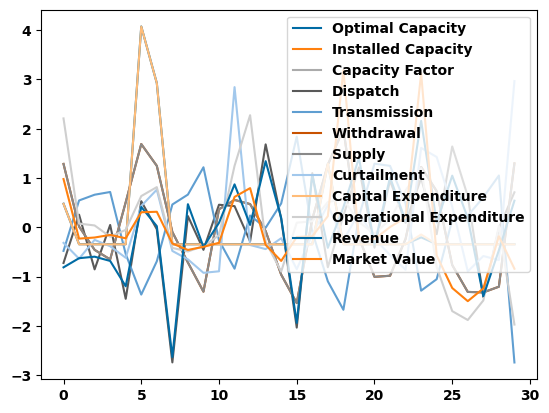

In [18]:
result_features = np.array(results).T
for i, y in enumerate(result_features):
    plt.plot(np.arange(len(y)), stats.zscore(y), label=result_keys[i])
plt.legend()
plt.show()

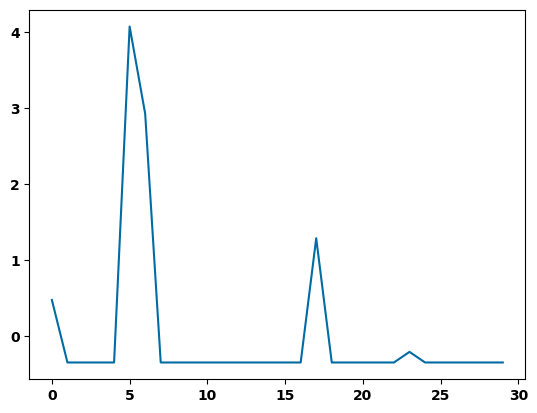

In [83]:
def plot_result_array(i):
    plt.plot(np.arange(len(result_features[i])), stats.zscore(result_features[i]), label=result_keys[i])
    plt.show()
plot_result_array(0)

In [29]:


var = [MAD(stats.zscore(result)) for result in result_features]
print(var)
sorted_var = np.argsort(var)
for i in sorted_var:
    print(f"{i}: {result_keys[i]} | {var[i]}")

[0.34246010593899306, nan, nan, 0.5805573600955742, 0.6623863302721906, 0.8620987355673355, 0.8620987355672316, 0.5725809225270867, 0.3445721881667068, 0.5012022889260379, 0.5675685430183306, 0.32199803678190525]
11: Market Value | 0.32199803678190525
0: Optimal Capacity | 0.34246010593899306
8: Capital Expenditure | 0.3445721881667068
9: Operational Expenditure | 0.5012022889260379
10: Revenue | 0.5675685430183306
7: Curtailment | 0.5725809225270867
3: Dispatch | 0.5805573600955742
4: Transmission | 0.6623863302721906
6: Supply | 0.8620987355672316
5: Withdrawal | 0.8620987355673355
1: Installed Capacity | nan
2: Capacity Factor | nan


c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


# first optimization (only generators)

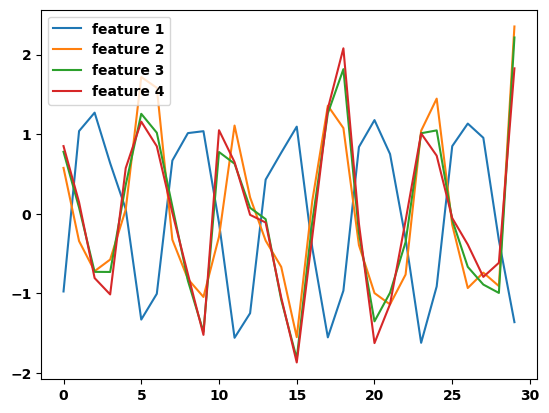

In [11]:
feature_key_words = ['solar', 'onwind', 'offwind-ac', 'offwind-dc']

feature_array = get_feature_array(netw_splits, feature_key_words)
plot_feature_array(feature_array)

In [57]:
def count_weights(regr: RandomForestRegressor, n_features):
    weight_features = [0 for _ in range(n_features)]
    for estimator in regr.estimators_:
        weight_features[estimator.tree_.feature[0]] += 1
    return weight_features

def count_complex_weights(regr: RandomForestRegressor, n_features):
    weight_features = [0 for _ in range(n_features)]
    for estimator in regr.estimators_:
        tree = estimator.tree_
        weight_features[tree.feature[0]] += 3
        for i in [tree.children_left[0], tree.children_right[0]]:
            if estimator.tree_.feature[i]>=0:
                weight_features[estimator.tree_.feature[i]] += 1
    return weight_features

In [58]:
result_keys = [column for column in n.statistics()]

coefficients = dict()
weights = dict()
complex_weights = dict()
MADs = []
RF_regrs = []

for result_key in result_keys:
    result_array = get_result_array(netw_splits, result_key)
    if any(np.isinf(res) or np.isnan(res) for res in result_array):
        continue
    
    lasso_regr = LassoCV()
    RF_regr = RandomForestRegressor()
    with warnings.catch_warnings(action="ignore"):
        lasso_regr.fit(feature_array, result_array)
        RF_regr.fit(feature_array, result_array)
    
    coefficients[result_key] = lasso_regr.coef_
    weights[result_key] = count_weights(RF_regr, len(feature_array[0]))
    RF_regrs.append(RF_regr)
    complex_weights[result_key] = count_complex_weights(RF_regr, len(feature_array[0]))

    MADs.append(MAD(result_array))  
    

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


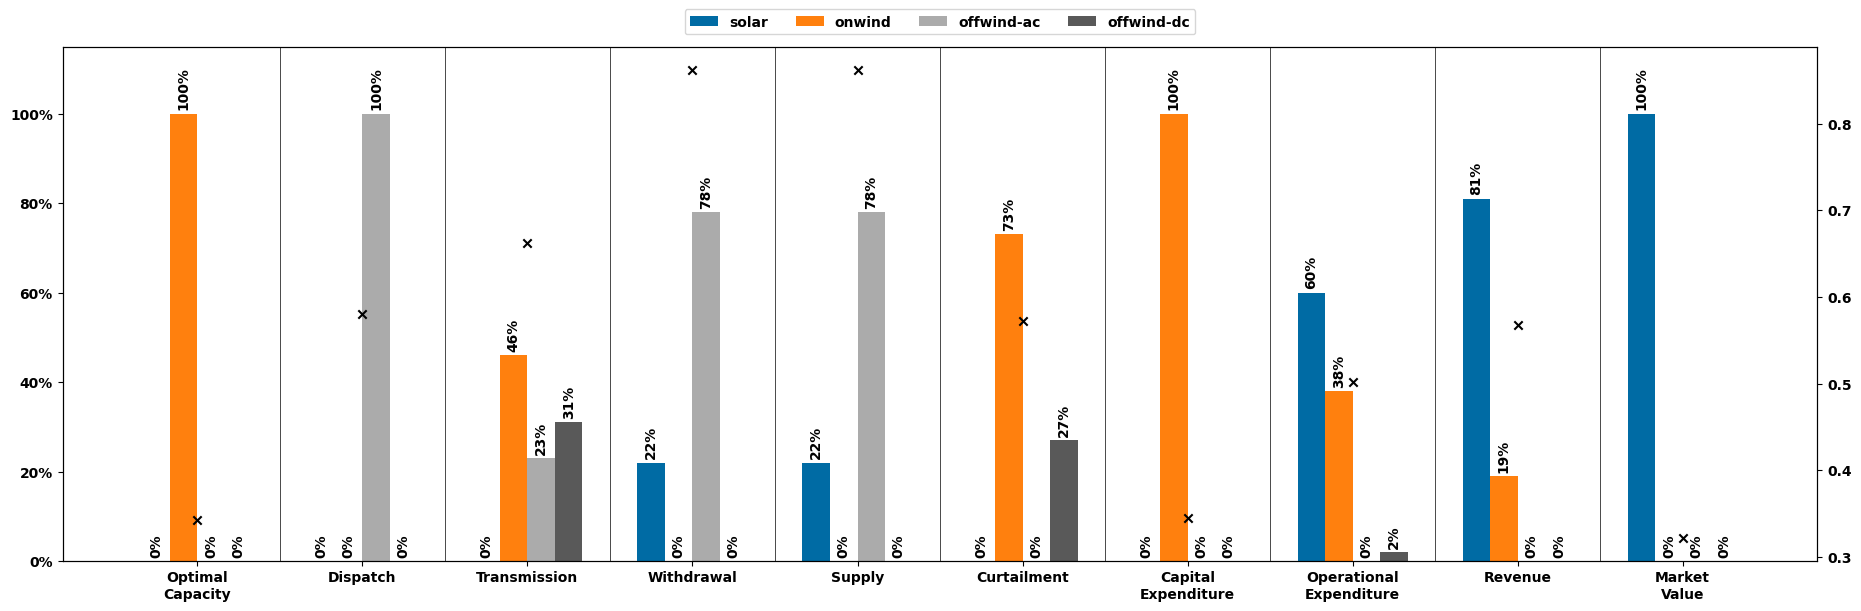

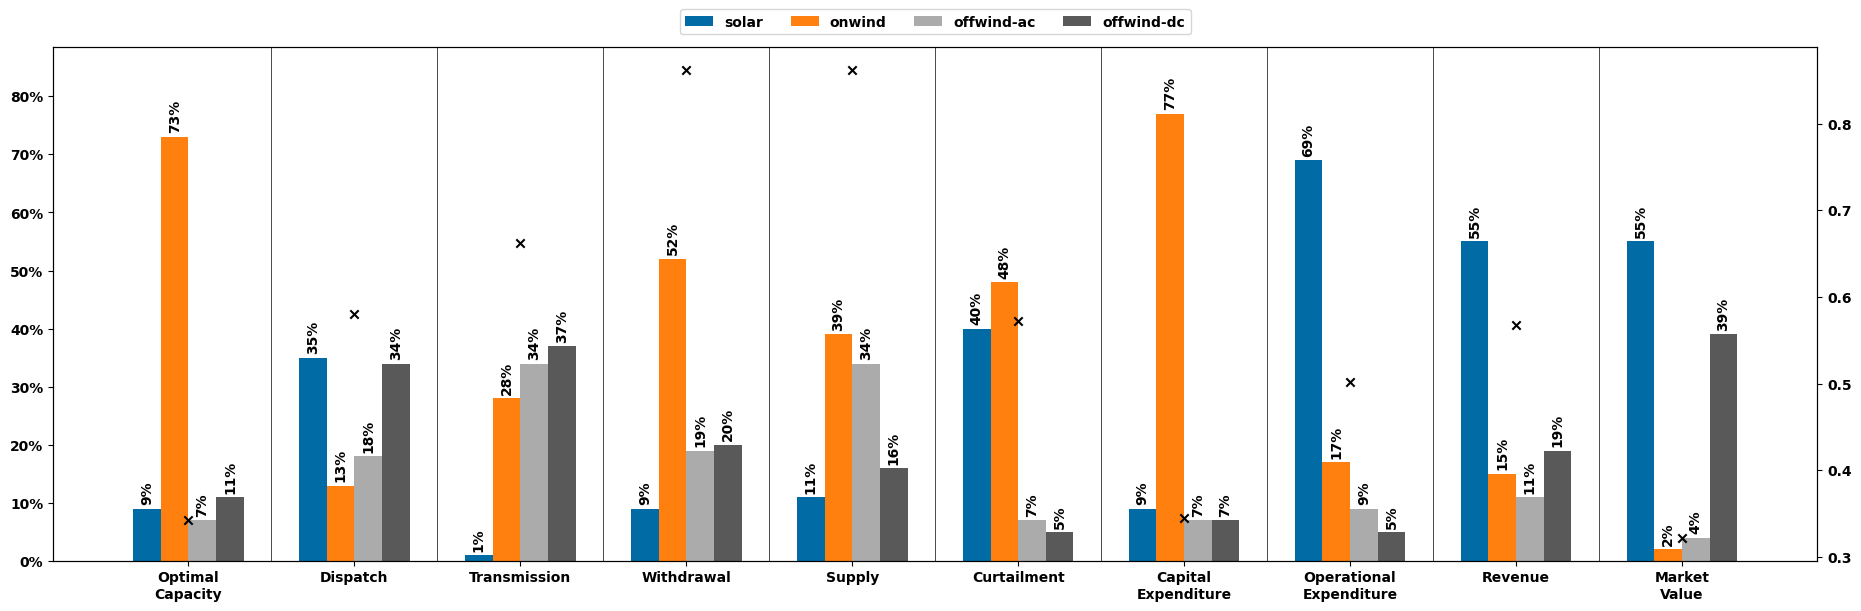

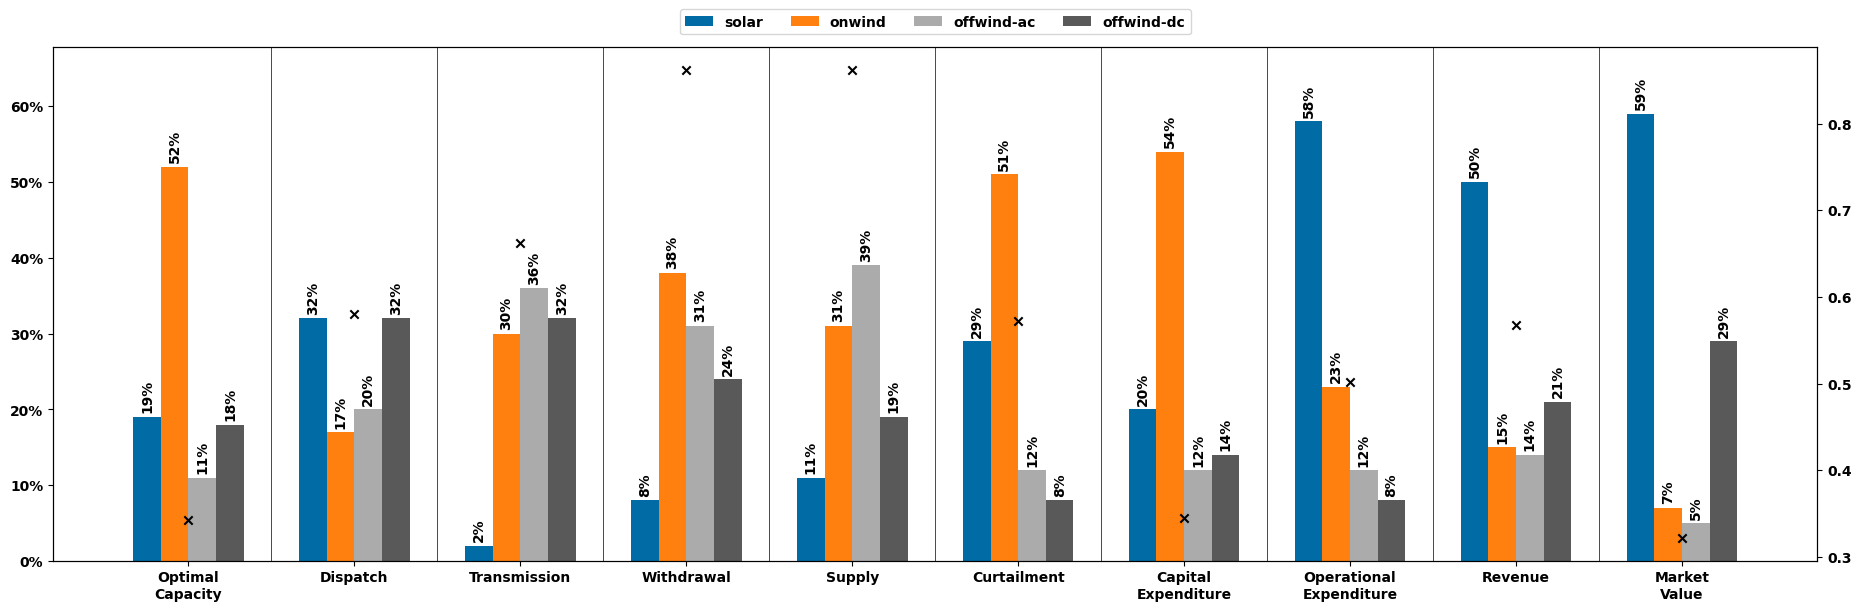

In [60]:
plot_results(coefficients, feature_names=feature_key_words, MADs=MADs, title='Lasso_4features')
plot_results(weights, feature_names=feature_key_words, MADs=MADs, title='Random_Forest_4features')
plot_results(complex_weights, feature_names=feature_key_words, MADs=MADs, title='Random_Forest_complex_4features')

# Optimization by generators and location

In [4]:
plot_generator(netw_splits, 'DE0 0 solar', 'generator_solar')

TypeError: plot_generator() missing 1 required positional argument: 'name'

In [11]:
means

[0.2500682407227055,
 0.1833240630092796,
 0.15130772501814108,
 0.1948878434894724,
 0.19796841322287922,
 0.3511208832970799,
 0.35257999213640795,
 0.18646035495793528,
 0.14619539783534008,
 0.11988135194967971,
 0.17509504664366804,
 0.2715565825403046,
 0.21928451811051158,
 0.15293183980907743,
 0.1555482491846075,
 0.09673083523137041,
 0.21602937474852726,
 0.3251429775964187,
 0.26440536163563466,
 0.18875458747795418,
 0.13522406289746225,
 0.10182324286948684,
 0.15045549746474635,
 0.2945679220344706,
 0.32753655812393595,
 0.20032006436263733,
 0.12786404443357888,
 0.15161212313308012,
 0.12137971375444895,
 0.4014390799960961]

In [4]:
generators = ['solar', 'wind']
location_split_x = 10
location_split_y = 51

def get_features(netw: pypsa.Network):
    feature_data = netw.generators_t.p_max_pu
    feature_array = []
    for generator in generators:
        df_generator = feature_data.filter(like=generator, axis=1)
        location_array = [[], [], [], []]
        for column in df_generator:
            bus = column.rpartition(' ')[0]
            if netw.buses['y'][bus] > location_split_y:
                if netw.buses['x'][bus] <= location_split_x:
                    location_array[0].append(np.mean(df_generator[column]))
                else:
                    location_array[1].append(np.mean(df_generator[column]))
            else: 
                if netw.buses['x'][bus] <= location_split_x:
                    location_array[2].append(np.mean(df_generator[column]))
                else:
                    location_array[3].append(np.mean(df_generator[column]))
        for a in location_array:
            if len(a) == 0:
                feature_array.append(0)
            else: 
                feature_array.append(np.mean(a))
    return feature_array

[[0.06058115379269549, 0.06780423755324425, 0.07819838647286027, 0.08896404186371742, 0.411903634503459, 0.36542078195450217, 0.20950770543509792, 0.1897383547580137], [0.16949998030274474, 0.1675118391693176, 0.18469833581003045, 0.1818808674031601, 0.3125510490159276, 0.3276611690042127, 0.13132478925583205, 0.1383532296429141], [0.18078021283881604, 0.19275117404396325, 0.18735344923325387, 0.19075274022103228, 0.2900576411288773, 0.26091614409987, 0.1195210993992685, 0.10614755376253156], [0.14644612149749237, 0.1456389883510691, 0.16475733300848117, 0.16474106449255355, 0.2979437428262593, 0.29147063161180653, 0.10934662530350309, 0.10635051497421391], [0.11627783653167355, 0.12354498710570427, 0.13259075263895118, 0.1326503374130649, 0.38704968915637106, 0.3315955857156228, 0.16531237729895804, 0.13703599078648426], [0.046483093857197295, 0.048481676953013156, 0.061188694758558745, 0.06789488872899914, 0.4959385488731531, 0.45098953870775593, 0.27912502297506414, 0.25571222820338

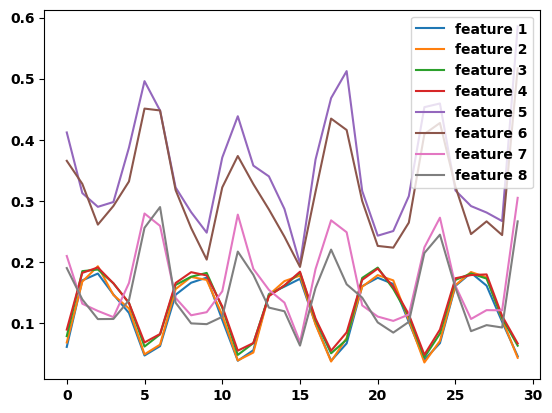

In [5]:
feature_array = []
for netw in netw_splits:
    feature_array.append(get_features(netw))

print(feature_array)
plot_feature_array(feature_array)

In [6]:
result_keys = [column for column in n.statistics()]

coefficients = dict()

for result_key in result_keys:
    result_array = get_result_array(netw_splits, result_key)
    if any(np.isinf(res) or np.isnan(res) for res in result_array):
        continue
    
    regr = LassoCV()
    with warnings.catch_warnings(action="ignore"):
        regr.fit(feature_array, result_array)
    
    coefficients[result_key] = regr.coef_

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


In [7]:
result_keys = [column for column in n.statistics()]

weights = dict()

for result_key in result_keys:
    result_array = get_result_array(netw_splits, result_key)
    if any(np.isinf(res) or np.isnan(res) for res in result_array):
        continue

    
    regr = RandomForestRegressor()
    regr.fit(feature_array, result_array)
    weight_features = [0 for _ in range(len(feature_array[0]))]
    #with warnings.catch_warnings(action="ignore"):
    for estimator in regr.estimators_:
        weight_features[estimator.tree_.feature[0]] += 1
    
    weights[result_key] = weight_features

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


In [113]:
def plot_coefficients(coef_dict: dict, feature_names, title, padding=2):
    plt.style.use('tableau-colorblind10')
    n_features = len(list(coefficients.values())[0])
    
    multiplier = -(n_features-1)/2
    width = 1/(n_features+padding)

    coefs_scaled = np.array([np.abs(x)/np.sum(np.abs(x)) for x in list(coef_dict.values())]).T
    coefs = [[round(y*100) for y in x] for x in coefs_scaled]

    x = np.arange(len(coef_dict))
    fig, ax = plt.subplots(layout='constrained')
    fig.set_size_inches(18.5, 6)
    ax.set_xticks(x, [s.replace(' ', '\n') for s in coef_dict.keys()])

    for i, coef in enumerate(coefs):
        offset = width * multiplier
        rects = ax.bar(x + offset, tuple(coef), width, label=feature_names[i])
        ax.bar_label(rects, padding=3, rotation=90, fmt='%.0f%%')
        multiplier += 1

    ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))
    ax.margins(y=0.15)

    for i in range(len(coef_dict)-1):
        plt.axvline(x=i+0.5, color='black', lw = 0.5)

    ax.legend(loc='lower center', ncols=10, bbox_to_anchor=(0.5, 1.01))


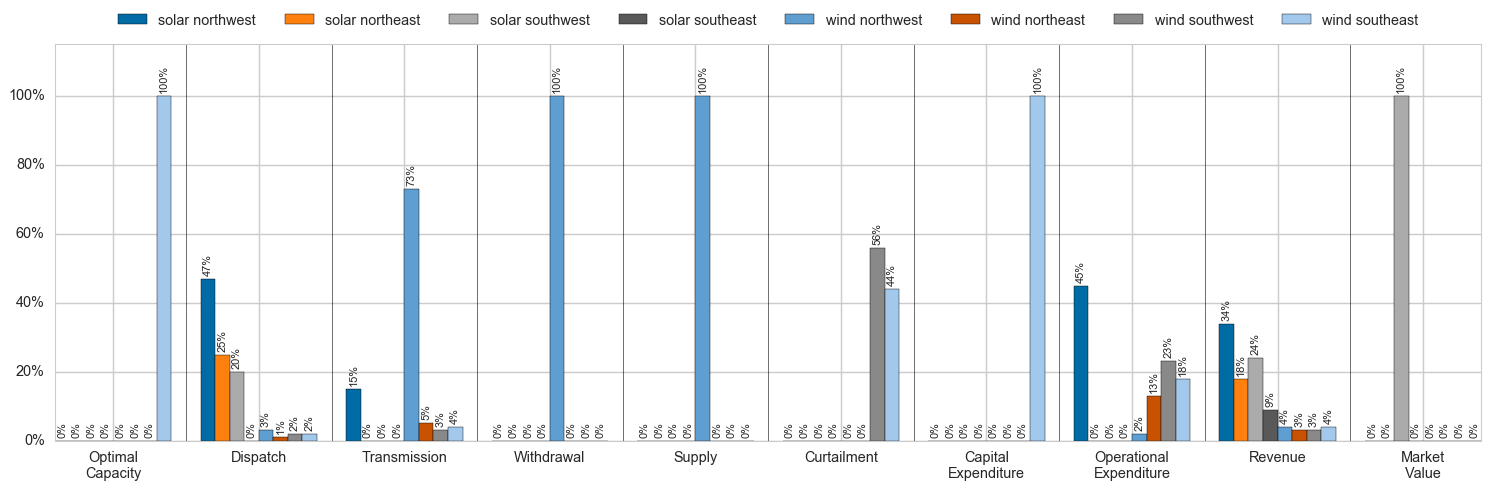

In [114]:
feature_names = [g+' ' + y+x for g in ['solar', 'wind'] for y in ['north', 'south'] for x in ['west', 'east']]
plot_coefficients(coefficients, feature_names, title='Lasso', padding=2)
# plot_coefficients(weights, [g+' ' + d for g in ['solar', 'wind'] for d in ['northwest', 'northeast', 'southwest', 'southeast']], width=0.1)

In [90]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

# Delete buses

In [3]:
buses = []
longitude = [] # x
latitude = [] # y
for i, bus in n.buses.iterrows():
    if 'H2' in bus.name:
        continue
    buses.append(bus.name)
    longitude.append(bus['x'])
    latitude.append(bus['y'])

print(buses)
print(longitude)
print(latitude)

['DE0 0', 'DE0 1', 'DE0 10', 'DE0 11', 'DE0 12', 'DE0 13', 'DE0 14', 'DE0 15', 'DE0 16', 'DE0 17', 'DE0 18', 'DE0 19', 'DE0 2', 'DE0 20', 'DE0 21', 'DE0 22', 'DE0 23', 'DE0 24', 'DE0 25', 'DE0 26', 'DE0 27', 'DE0 28', 'DE0 29', 'DE0 3', 'DE0 30', 'DE0 31', 'DE0 32', 'DE0 33', 'DE0 34', 'DE0 35', 'DE0 36', 'DE0 37', 'DE0 38', 'DE0 39', 'DE0 4', 'DE0 40', 'DE0 41', 'DE0 42', 'DE0 43', 'DE0 44', 'DE0 45', 'DE0 46', 'DE0 47', 'DE0 48', 'DE0 49', 'DE0 5', 'DE0 50', 'DE0 51', 'DE0 52', 'DE0 53', 'DE0 54', 'DE0 55', 'DE0 56', 'DE0 57', 'DE0 58', 'DE0 59', 'DE0 6', 'DE0 60', 'DE0 61', 'DE0 62', 'DE0 63', 'DE0 64', 'DE0 65', 'DE0 66', 'DE0 67', 'DE0 68', 'DE0 69', 'DE0 7', 'DE0 70', 'DE0 71', 'DE0 72', 'DE0 73', 'DE0 74', 'DE0 75', 'DE0 76', 'DE0 77', 'DE0 78', 'DE0 79', 'DE0 8', 'DE0 9']
[11.965484499999999, 8.100384092987298, 8.866877984159865, 13.808441, 10.415522232506499, 6.918288301302811, 7.869491806268549, 8.251075499999999, 10.98256873725535, 13.099823, 9.892501750000001, 8.33566678846

In [4]:
longitude_sorted = np.argsort(longitude)
latitude_sorted = np.argsort(latitude)

In [5]:
def find_connections(links: pd.DataFrame, key):
    res = []
    for _, link in links.iterrows():
        if (key + ' ' in link['bus0']) or (key == link['bus0']) or (key + ' ' in link['bus1']) or (key == link['bus1']):
            res.append(link.name)
    return res

def find_components(components: pd.DataFrame, key, colum='bus'):
    res = []
    for _, component in components.iterrows():
        if (key + ' ' in component[colum]) or (key == component[colum]):
            res.append(component.name)
    return res

def flatten(list):
    flat_list = []
    for row in list:
        flat_list.extend(row)
    return flat_list

def find_all_classes(keyword_split):
    buses_split = keyword_split + [key + ' H2' for key in keyword_split]
    generators_split = flatten([find_components(n.generators, key) for key in keyword_split])
    links_split = flatten([find_connections(n.links, key) for key in keyword_split])
    lines_split = flatten([find_connections(n.lines, key) for key in keyword_split])
    stores_split = flatten([find_components(n.stores, key) for key in keyword_split])
    storage_unit_split = flatten([find_components(n.storage_units, key) for key in keyword_split])
    load_split = flatten([find_components(n.loads, key) for key in keyword_split])
    shapes_split = flatten([find_components(n.shapes, key, 'idx') for key in keyword_split])

    return [('Bus', buses_split), 
            ('Generator', generators_split), 
            ('Link', links_split), 
            ('Store', stores_split), 
            ('StorageUnit', storage_unit_split), 
            ('Load', load_split), 
            ('Shape', shapes_split),
            ('Line', lines_split)]

def remove_busses(netw, keywords):
    classes = find_all_classes(keywords)
    netw_copy = netw.copy()
    for c, split in classes:
        netw_copy.mremove(c, split)
    return netw_copy


In [6]:
data_split = []

splits = [(2, 2), (2, 3), (3, 3), (2, 4)]

for x, y in splits:
    for latitude_split in split_list(latitude_sorted, y) :
        for longitude_split in split_list(longitude_sorted, x):
            keyword_split = [buses[i] for i in longitude_split if i in latitude_split]
            data_split.append(remove_busses(n, keyword_split))

In [10]:
for netw in data_split[6:7]:
    netw.optimize(solver_name="gurobi")

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:07<00:00,  1.89it/s]
INFO:linopy.io: Writing time: 55.03s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zmq6xt33.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zmq6xt33.lp


Reading time = 16.81 seconds


INFO:gurobipy:Reading time = 16.81 seconds


obj: 5012979 rows, 2363357 columns, 10492044 nonzeros


INFO:gurobipy:obj: 5012979 rows, 2363357 columns, 10492044 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 5012979 rows, 2363357 columns and 10492044 nonzeros


INFO:gurobipy:Optimize a model with 5012979 rows, 2363357 columns and 10492044 nonzeros


Model fingerprint: 0x8c96fa1a


INFO:gurobipy:Model fingerprint: 0x8c96fa1a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 3220796 rows and 895257 columns (presolve time = 5s) ...


INFO:gurobipy:Presolve removed 3220796 rows and 895257 columns (presolve time = 5s) ...


Presolve removed 3221020 rows and 895257 columns (presolve time = 11s) ...


INFO:gurobipy:Presolve removed 3221020 rows and 895257 columns (presolve time = 11s) ...


Presolve removed 3221020 rows and 895257 columns


INFO:gurobipy:Presolve removed 3221020 rows and 895257 columns


Presolve time: 22.65s


INFO:gurobipy:Presolve time: 22.65s


Presolved: 1791959 rows, 1468100 columns, 6688631 nonzeros


INFO:gurobipy:Presolved: 1791959 rows, 1468100 columns, 6688631 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Elapsed ordering time = 5s


INFO:gurobipy:Elapsed ordering time = 5s


Elapsed ordering time = 13s


INFO:gurobipy:Elapsed ordering time = 13s


Elapsed ordering time = 15s


INFO:gurobipy:Elapsed ordering time = 15s


Ordering time: 27.70s


INFO:gurobipy:Ordering time: 27.70s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 510


INFO:gurobipy: Dense cols : 510


 Free vars  : 94900


INFO:gurobipy: Free vars  : 94900


 AA' NZ     : 9.534e+06


INFO:gurobipy: AA' NZ     : 9.534e+06


 Factor NZ  : 1.320e+08 (roughly 2.4 GB of memory)


INFO:gurobipy: Factor NZ  : 1.320e+08 (roughly 2.4 GB of memory)


 Factor Ops : 8.602e+10 (roughly 2 seconds per iteration)


INFO:gurobipy: Factor Ops : 8.602e+10 (roughly 2 seconds per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.95610538e+15 -4.68041874e+14  7.46e+11 4.37e+04  4.52e+11    60s


INFO:gurobipy:   0   1.95610538e+15 -4.68041874e+14  7.46e+11 4.37e+04  4.52e+11    60s


   1   1.86041170e+15 -3.13425683e+14  5.18e+11 9.74e+03  1.72e+11    64s


INFO:gurobipy:   1   1.86041170e+15 -3.13425683e+14  5.18e+11 9.74e+03  1.72e+11    64s


   2   1.76566879e+15 -5.21346539e+14  3.95e+11 2.75e+03  1.28e+11    69s


INFO:gurobipy:   2   1.76566879e+15 -5.21346539e+14  3.95e+11 2.75e+03  1.28e+11    69s


   3   1.36324834e+15 -5.69732289e+14  5.36e+10 4.56e+04  1.85e+10    74s


INFO:gurobipy:   3   1.36324834e+15 -5.69732289e+14  5.36e+10 4.56e+04  1.85e+10    74s


   4   7.27297623e+14 -5.62275089e+14  5.47e+09 3.27e+03  2.14e+09    79s


INFO:gurobipy:   4   7.27297623e+14 -5.62275089e+14  5.47e+09 3.27e+03  2.14e+09    79s


   5   1.35672604e+14 -3.67001354e+14  7.91e+08 4.55e+02  3.71e+08    84s


INFO:gurobipy:   5   1.35672604e+14 -3.67001354e+14  7.91e+08 4.55e+02  3.71e+08    84s


   6   2.94065904e+13 -1.38323395e+14  1.25e+08 8.06e+03  7.84e+07    89s


INFO:gurobipy:   6   2.94065904e+13 -1.38323395e+14  1.25e+08 8.06e+03  7.84e+07    89s


   7   1.49996648e+13 -4.38198499e+13  3.62e+07 2.56e+03  2.48e+07    93s


INFO:gurobipy:   7   1.49996648e+13 -4.38198499e+13  3.62e+07 2.56e+03  2.48e+07    93s


   8   9.49927973e+12 -1.25115779e+13  1.48e+07 7.54e+02  9.06e+06    96s


INFO:gurobipy:   8   9.49927973e+12 -1.25115779e+13  1.48e+07 7.54e+02  9.06e+06    96s


   9   4.57149206e+12 -1.09005733e+13  9.25e+03 6.63e+02  5.21e+06   101s


INFO:gurobipy:   9   4.57149206e+12 -1.09005733e+13  9.25e+03 6.63e+02  5.21e+06   101s


  10   1.60055397e+12 -3.81215052e+12  3.27e+03 1.61e+02  1.77e+06   108s


INFO:gurobipy:  10   1.60055397e+12 -3.81215052e+12  3.27e+03 1.61e+02  1.77e+06   108s


  11   4.86485039e+11 -1.00263070e+12  7.50e+02 3.87e+01  4.76e+05   115s


INFO:gurobipy:  11   4.86485039e+11 -1.00263070e+12  7.50e+02 3.87e+01  4.76e+05   115s


  12   3.16802611e+11 -2.45518157e+11  3.96e+02 8.88e-02  1.79e+05   121s


INFO:gurobipy:  12   3.16802611e+11 -2.45518157e+11  3.96e+02 8.88e-02  1.79e+05   121s


  13   2.33939063e+11 -1.11601281e+11  2.68e+02 4.26e-02  1.10e+05   127s


INFO:gurobipy:  13   2.33939063e+11 -1.11601281e+11  2.68e+02 4.26e-02  1.10e+05   127s


  14   1.87392042e+11 -7.59655089e+10  2.06e+02 3.18e-02  8.34e+04   131s


INFO:gurobipy:  14   1.87392042e+11 -7.59655089e+10  2.06e+02 3.18e-02  8.34e+04   131s


  15   1.79662916e+11 -4.00254957e+10  1.96e+02 1.96e-02  6.95e+04   136s


INFO:gurobipy:  15   1.79662916e+11 -4.00254957e+10  1.96e+02 1.96e-02  6.95e+04   136s


  16   1.37198791e+11 -1.81954559e+10  1.43e+02 1.11e-02  4.91e+04   141s


INFO:gurobipy:  16   1.37198791e+11 -1.81954559e+10  1.43e+02 1.11e-02  4.91e+04   141s


  17   1.07300015e+11  6.67094325e+08  1.07e+02 4.70e-03  3.37e+04   148s


INFO:gurobipy:  17   1.07300015e+11  6.67094325e+08  1.07e+02 4.70e-03  3.37e+04   148s


  18   7.96444260e+10  8.85411941e+09  7.49e+01 3.71e-03  2.24e+04   155s


INFO:gurobipy:  18   7.96444260e+10  8.85411941e+09  7.49e+01 3.71e-03  2.24e+04   155s


  19   6.04752908e+10  1.30711621e+10  5.19e+01 2.96e-03  1.50e+04   162s


INFO:gurobipy:  19   6.04752908e+10  1.30711621e+10  5.19e+01 2.96e-03  1.50e+04   162s


  20   4.80832784e+10  1.51224439e+10  3.63e+01 2.47e-03  1.04e+04   168s


INFO:gurobipy:  20   4.80832784e+10  1.51224439e+10  3.63e+01 2.47e-03  1.04e+04   168s


  21   4.01147283e+10  1.57228551e+10  2.68e+01 2.26e-03  7.70e+03   173s


INFO:gurobipy:  21   4.01147283e+10  1.57228551e+10  2.68e+01 2.26e-03  7.70e+03   173s


  22   3.88449822e+10  1.61176280e+10  2.52e+01 2.11e-03  7.18e+03   178s


INFO:gurobipy:  22   3.88449822e+10  1.61176280e+10  2.52e+01 2.11e-03  7.18e+03   178s


  23   3.81612505e+10  1.63086413e+10  2.43e+01 2.03e-03  6.90e+03   183s


INFO:gurobipy:  23   3.81612505e+10  1.63086413e+10  2.43e+01 2.03e-03  6.90e+03   183s


  24   3.78272739e+10  1.63642010e+10  2.39e+01 2.01e-03  6.78e+03   188s


INFO:gurobipy:  24   3.78272739e+10  1.63642010e+10  2.39e+01 2.01e-03  6.78e+03   188s


  25   3.65317777e+10  1.65155720e+10  2.22e+01 1.95e-03  6.32e+03   195s


INFO:gurobipy:  25   3.65317777e+10  1.65155720e+10  2.22e+01 1.95e-03  6.32e+03   195s


  26   3.46864854e+10  1.71429915e+10  1.99e+01 1.73e-03  5.54e+03   202s


INFO:gurobipy:  26   3.46864854e+10  1.71429915e+10  1.99e+01 1.73e-03  5.54e+03   202s


  27   3.29588527e+10  1.74508751e+10  1.78e+01 1.62e-03  4.90e+03   208s


INFO:gurobipy:  27   3.29588527e+10  1.74508751e+10  1.78e+01 1.62e-03  4.90e+03   208s


  28   3.18072029e+10  1.78923644e+10  1.63e+01 1.48e-03  4.40e+03   215s


INFO:gurobipy:  28   3.18072029e+10  1.78923644e+10  1.63e+01 1.48e-03  4.40e+03   215s


  29   2.94787481e+10  1.82626519e+10  1.28e+01 1.36e-03  3.54e+03   222s


INFO:gurobipy:  29   2.94787481e+10  1.82626519e+10  1.28e+01 1.36e-03  3.54e+03   222s


  30   2.80803992e+10  1.88176915e+10  1.08e+01 1.19e-03  2.93e+03   229s


INFO:gurobipy:  30   2.80803992e+10  1.88176915e+10  1.08e+01 1.19e-03  2.93e+03   229s


  31   2.60814185e+10  1.91182434e+10  7.94e+00 1.06e-03  2.20e+03   236s


INFO:gurobipy:  31   2.60814185e+10  1.91182434e+10  7.94e+00 1.06e-03  2.20e+03   236s


  32   2.53673409e+10  1.92770949e+10  6.99e+00 9.77e-04  1.92e+03   243s


INFO:gurobipy:  32   2.53673409e+10  1.92770949e+10  6.99e+00 9.77e-04  1.92e+03   243s


  33   2.49848847e+10  1.93198552e+10  6.45e+00 9.54e-04  1.79e+03   249s


INFO:gurobipy:  33   2.49848847e+10  1.93198552e+10  6.45e+00 9.54e-04  1.79e+03   249s


  34   2.45567763e+10  1.94033655e+10  5.88e+00 9.08e-04  1.63e+03   256s


INFO:gurobipy:  34   2.45567763e+10  1.94033655e+10  5.88e+00 9.08e-04  1.63e+03   256s


  35   2.40408292e+10  1.95525321e+10  5.19e+00 8.21e-04  1.42e+03   263s


INFO:gurobipy:  35   2.40408292e+10  1.95525321e+10  5.19e+00 8.21e-04  1.42e+03   263s


  36   2.35296326e+10  1.96222311e+10  4.48e+00 7.71e-04  1.23e+03   270s


INFO:gurobipy:  36   2.35296326e+10  1.96222311e+10  4.48e+00 7.71e-04  1.23e+03   270s


  37   2.31660651e+10  1.97266371e+10  3.98e+00 6.93e-04  1.09e+03   277s


INFO:gurobipy:  37   2.31660651e+10  1.97266371e+10  3.98e+00 6.93e-04  1.09e+03   277s


  38   2.26669971e+10  1.97988677e+10  3.28e+00 6.34e-04  9.06e+02   284s


INFO:gurobipy:  38   2.26669971e+10  1.97988677e+10  3.28e+00 6.34e-04  9.06e+02   284s


  39   2.22982307e+10  1.99014813e+10  2.77e+00 5.49e-04  7.57e+02   290s


INFO:gurobipy:  39   2.22982307e+10  1.99014813e+10  2.77e+00 5.49e-04  7.57e+02   290s


  40   2.20333996e+10  1.99975671e+10  2.40e+00 4.62e-04  6.43e+02   297s


INFO:gurobipy:  40   2.20333996e+10  1.99975671e+10  2.40e+00 4.62e-04  6.43e+02   297s


  41   2.16127041e+10  2.00220005e+10  1.81e+00 4.38e-04  5.02e+02   304s


INFO:gurobipy:  41   2.16127041e+10  2.00220005e+10  1.81e+00 4.38e-04  5.02e+02   304s


  42   2.15164035e+10  2.00540776e+10  1.68e+00 4.03e-04  4.62e+02   311s


INFO:gurobipy:  42   2.15164035e+10  2.00540776e+10  1.68e+00 4.03e-04  4.62e+02   311s


  43   2.13300240e+10  2.01011340e+10  1.41e+00 3.51e-04  3.88e+02   318s


INFO:gurobipy:  43   2.13300240e+10  2.01011340e+10  1.41e+00 3.51e-04  3.88e+02   318s


  44   2.11877509e+10  2.01453652e+10  1.21e+00 3.00e-04  3.29e+02   325s


INFO:gurobipy:  44   2.11877509e+10  2.01453652e+10  1.21e+00 3.00e-04  3.29e+02   325s


  45   2.10541053e+10  2.01815931e+10  1.02e+00 2.55e-04  2.76e+02   331s


INFO:gurobipy:  45   2.10541053e+10  2.01815931e+10  1.02e+00 2.55e-04  2.76e+02   331s


  46   2.09305989e+10  2.02091981e+10  8.46e-01 2.20e-04  2.28e+02   338s


INFO:gurobipy:  46   2.09305989e+10  2.02091981e+10  8.46e-01 2.20e-04  2.28e+02   338s


  47   2.08353108e+10  2.02333558e+10  7.12e-01 1.86e-04  1.90e+02   346s


INFO:gurobipy:  47   2.08353108e+10  2.02333558e+10  7.12e-01 1.86e-04  1.90e+02   346s


  48   2.07272701e+10  2.02543060e+10  5.58e-01 1.54e-04  1.49e+02   353s


INFO:gurobipy:  48   2.07272701e+10  2.02543060e+10  5.58e-01 1.54e-04  1.49e+02   353s


  49   2.06395615e+10  2.02716983e+10  4.33e-01 1.26e-04  1.16e+02   360s


INFO:gurobipy:  49   2.06395615e+10  2.02716983e+10  4.33e-01 1.26e-04  1.16e+02   360s


  50   2.05839061e+10  2.02822153e+10  3.54e-01 1.08e-04  9.53e+01   366s


INFO:gurobipy:  50   2.05839061e+10  2.02822153e+10  3.54e-01 1.08e-04  9.53e+01   366s


  51   2.05391564e+10  2.02888825e+10  2.90e-01 9.59e-05  7.91e+01   373s


INFO:gurobipy:  51   2.05391564e+10  2.02888825e+10  2.90e-01 9.59e-05  7.91e+01   373s


  52   2.04934109e+10  2.02962303e+10  2.25e-01 8.18e-05  6.23e+01   380s


INFO:gurobipy:  52   2.04934109e+10  2.02962303e+10  2.25e-01 8.18e-05  6.23e+01   380s


  53   2.04447623e+10  2.03020363e+10  1.56e-01 7.01e-05  4.51e+01   387s


INFO:gurobipy:  53   2.04447623e+10  2.03020363e+10  1.56e-01 7.01e-05  4.51e+01   387s


  54   2.04288385e+10  2.03063149e+10  1.34e-01 6.09e-05  3.87e+01   394s


INFO:gurobipy:  54   2.04288385e+10  2.03063149e+10  1.34e-01 6.09e-05  3.87e+01   394s


  55   2.04046079e+10  2.03100654e+10  1.00e-01 5.27e-05  2.99e+01   401s


INFO:gurobipy:  55   2.04046079e+10  2.03100654e+10  1.00e-01 5.27e-05  2.99e+01   401s


  56   2.03920775e+10  2.03216782e+10  8.19e-02 2.68e-05  2.22e+01   408s


INFO:gurobipy:  56   2.03920775e+10  2.03216782e+10  8.19e-02 2.68e-05  2.22e+01   408s


  57   2.03754525e+10  2.03241525e+10  5.92e-02 2.07e-05  1.62e+01   415s


INFO:gurobipy:  57   2.03754525e+10  2.03241525e+10  5.92e-02 2.07e-05  1.62e+01   415s


KeyboardInterrupt: 

Exception ignored in: 'gurobipy.logcallbackstub'
Traceback (most recent call last):
  File "c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\ipykernel\iostream.py", line 655, in write
    def write(self, string: str) -> Optional[int]:  # type:ignore[override]

KeyboardInterrupt: 


  59   2.03558492e+10  2.03278269e+10  3.27e-02 1.11e-05  8.85e+00   432s


INFO:gurobipy:  59   2.03558492e+10  2.03278269e+10  3.27e-02 1.11e-05  8.85e+00   432s


In [9]:
for i, netw in enumerate(data_split[5:6]):
    netw.export_to_netcdf(path=f'data_split/{i}.nc')

INFO:pypsa.io:Exported network 0.nc has stores, lines, storage_units, buses, carriers, global_constraints, generators, links, shapes, loads


In [ ]:
directory = os.fsencode('data_split')
data_split = [pypsa.Network(f'data_split/{os.fsdecode(file)}') for file in os.listdir(directory)]

In [8]:
netw_delete_split = []

for netw in data_split:
    snapshot_splits = split_list(list=netw.snapshots, n=30)
    netw_splits = []
    for snapshot_split in snapshot_splits:
        netw_copy = netw.copy()
        netw_copy.set_snapshots(snapshots=snapshot_split)
        # netw_copy.optimize(snapshot_split, solver_name="gurobi")
        netw_splits.append(netw_copy)
    netw_delete_split.append(netw_splits)

In [19]:
netw_delete_split = []

In [20]:
netw = data_split[0]
snapshot_splits = split_list(list=netw.snapshots, n=30)
netw_splits = []
for snapshot_split in snapshot_splits:
    netw_copy = netw.copy()
    netw_copy.set_snapshots(snapshots=snapshot_split)
    netw_copy.optimize(solver_name="gurobi")
    netw_splits.append(netw_copy)
netw_delete_split.append(netw_splits)

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 57.60it/s]
INFO:linopy.io: Writing time: 1.69s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-s4ed84vy.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-s4ed84vy.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xb3a3dfd8


INFO:gurobipy:Model fingerprint: 0xb3a3dfd8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96437 rows and 26725 columns


INFO:gurobipy:Presolve removed 96437 rows and 26725 columns


Presolve time: 0.40s


INFO:gurobipy:Presolve time: 0.40s


Presolved: 53063 rows, 43940 columns, 197846 nonzeros


INFO:gurobipy:Presolved: 53063 rows, 43940 columns, 197846 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.91s


INFO:gurobipy:Ordering time: 0.91s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.833e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.833e+06 (roughly 100 MB of memory)


 Factor Ops : 8.316e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.316e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.82296905e+15 -2.42555671e+13  7.65e+10 9.03e+04  3.15e+12     2s


INFO:gurobipy:   0   1.82296905e+15 -2.42555671e+13  7.65e+10 9.03e+04  3.15e+12     2s


   1   2.55198579e+15 -1.57002405e+14  5.10e+10 2.02e+04  1.20e+12     2s


INFO:gurobipy:   1   2.55198579e+15 -1.57002405e+14  5.10e+10 2.02e+04  1.20e+12     2s


   2   2.65219639e+15 -2.72912023e+14  1.02e+10 1.73e+03  2.28e+11     3s


INFO:gurobipy:   2   2.65219639e+15 -2.72912023e+14  1.02e+10 1.73e+03  2.28e+11     3s


   3   4.75748430e+14 -2.49797250e+14  5.97e+08 2.34e+01  1.76e+10     3s


INFO:gurobipy:   3   4.75748430e+14 -2.49797250e+14  5.97e+08 2.34e+01  1.76e+10     3s


   4   1.71622844e+14 -4.67094337e+13  1.44e+08 4.51e+00  4.55e+09     3s


INFO:gurobipy:   4   1.71622844e+14 -4.67094337e+13  1.44e+08 4.51e+00  4.55e+09     3s


   5   4.95521695e+13 -9.93464504e+12  3.22e+06 1.88e+00  8.49e+08     4s


INFO:gurobipy:   5   4.95521695e+13 -9.93464504e+12  3.22e+06 1.88e+00  8.49e+08     4s


   6   2.88184639e+13 -1.69926714e+13  1.27e+04 1.67e+00  6.06e+08     4s


INFO:gurobipy:   6   2.88184639e+13 -1.69926714e+13  1.27e+04 1.67e+00  6.06e+08     4s


   7   3.49532162e+12 -3.15762055e+12  6.70e+02 5.23e-01  7.58e+07     4s


INFO:gurobipy:   7   3.49532162e+12 -3.15762055e+12  6.70e+02 5.23e-01  7.58e+07     4s


   8   9.48130796e+11 -9.98397110e+11  1.53e+02 2.31e-01  2.15e+07     5s


INFO:gurobipy:   8   9.48130796e+11 -9.98397110e+11  1.53e+02 2.31e-01  2.15e+07     5s


   9   4.30754988e+11 -2.32988030e+11  6.30e+01 8.19e-02  7.22e+06     5s


INFO:gurobipy:   9   4.30754988e+11 -2.32988030e+11  6.30e+01 8.19e-02  7.22e+06     5s


  10   2.21448155e+11 -1.09561680e+11  3.05e+01 5.27e-02  3.57e+06     5s


INFO:gurobipy:  10   2.21448155e+11 -1.09561680e+11  3.05e+01 5.27e-02  3.57e+06     5s


  11   9.69158599e+10 -6.91980372e+10  1.25e+01 3.59e-02  1.78e+06     5s


INFO:gurobipy:  11   9.69158599e+10 -6.91980372e+10  1.25e+01 3.59e-02  1.78e+06     5s


  12   6.04807584e+10 -1.34880681e+10  7.49e+00 8.60e-03  7.88e+05     6s


INFO:gurobipy:  12   6.04807584e+10 -1.34880681e+10  7.49e+00 8.60e-03  7.88e+05     6s


  13   2.22876375e+10 -3.72000505e+09  2.45e+00 3.71e-03  2.76e+05     6s


INFO:gurobipy:  13   2.22876375e+10 -3.72000505e+09  2.45e+00 3.71e-03  2.76e+05     6s


  14   7.44055331e+09 -6.11035202e+08  6.45e-01 1.44e-03  8.54e+04     6s


INFO:gurobipy:  14   7.44055331e+09 -6.11035202e+08  6.45e-01 1.44e-03  8.54e+04     6s


  15   3.58996556e+09  2.37505172e+08  2.58e-01 6.45e-04  3.55e+04     7s


INFO:gurobipy:  15   3.58996556e+09  2.37505172e+08  2.58e-01 6.45e-04  3.55e+04     7s


  16   1.97573651e+09  5.03342363e+08  1.08e-01 3.46e-04  1.56e+04     7s


INFO:gurobipy:  16   1.97573651e+09  5.03342363e+08  1.08e-01 3.46e-04  1.56e+04     7s


  17   1.42765504e+09  6.40137559e+08  5.74e-02 1.91e-04  8.35e+03     7s


INFO:gurobipy:  17   1.42765504e+09  6.40137559e+08  5.74e-02 1.91e-04  8.35e+03     7s


  18   1.13111608e+09  6.94219303e+08  3.07e-02 1.21e-04  4.63e+03     7s


INFO:gurobipy:  18   1.13111608e+09  6.94219303e+08  3.07e-02 1.21e-04  4.63e+03     7s


  19   1.00963899e+09  7.28575606e+08  2.00e-02 7.01e-05  2.98e+03     8s


INFO:gurobipy:  19   1.00963899e+09  7.28575606e+08  2.00e-02 7.01e-05  2.98e+03     8s


  20   9.05042597e+08  7.41887290e+08  1.10e-02 4.77e-05  1.73e+03     8s


INFO:gurobipy:  20   9.05042597e+08  7.41887290e+08  1.10e-02 4.77e-05  1.73e+03     8s


  21   8.23798642e+08  7.52058117e+08  4.24e-03 3.18e-05  7.60e+02     8s


INFO:gurobipy:  21   8.23798642e+08  7.52058117e+08  4.24e-03 3.18e-05  7.60e+02     8s


  22   7.89576032e+08  7.65676519e+08  1.43e-03 7.68e-06  2.53e+02     9s


INFO:gurobipy:  22   7.89576032e+08  7.65676519e+08  1.43e-03 7.68e-06  2.53e+02     9s


  23   7.72698510e+08  7.68522390e+08  1.86e-04 2.34e-06  4.42e+01     9s


INFO:gurobipy:  23   7.72698510e+08  7.68522390e+08  1.86e-04 2.34e-06  4.42e+01     9s


  24   7.70440280e+08  7.69491338e+08  3.55e-05 6.06e-07  1.01e+01     9s


INFO:gurobipy:  24   7.70440280e+08  7.69491338e+08  3.55e-05 6.06e-07  1.01e+01     9s


  25   7.69921814e+08  7.69714423e+08  2.28e-05 2.28e-07  2.20e+00    10s


INFO:gurobipy:  25   7.69921814e+08  7.69714423e+08  2.28e-05 2.28e-07  2.20e+00    10s


  26   7.69876417e+08  7.69806005e+08  1.04e-05 6.76e-08  7.45e-01    10s


INFO:gurobipy:  26   7.69876417e+08  7.69806005e+08  1.04e-05 6.76e-08  7.45e-01    10s


  27   7.69852826e+08  7.69834498e+08  2.38e-05 2.02e-08  1.94e-01    10s


INFO:gurobipy:  27   7.69852826e+08  7.69834498e+08  2.38e-05 2.02e-08  1.94e-01    10s


  28   7.69848336e+08  7.69845662e+08  5.83e-06 2.09e-09  2.83e-02    10s


INFO:gurobipy:  28   7.69848336e+08  7.69845662e+08  5.83e-06 2.09e-09  2.83e-02    10s


  29   7.69847293e+08  7.69846887e+08  8.59e-07 3.38e-10  4.30e-03    11s


INFO:gurobipy:  29   7.69847293e+08  7.69846887e+08  8.59e-07 3.38e-10  4.30e-03    11s


  30   7.69847172e+08  7.69847156e+08  1.24e-07 2.93e-10  1.63e-04    11s


INFO:gurobipy:  30   7.69847172e+08  7.69847156e+08  1.24e-07 2.93e-10  1.63e-04    11s


  31   7.69847162e+08  7.69847162e+08  2.08e-08 2.56e-10  4.05e-06    12s


INFO:gurobipy:  31   7.69847162e+08  7.69847162e+08  2.08e-08 2.56e-10  4.05e-06    12s


  32   7.69847162e+08  7.69847162e+08  9.94e-09 2.00e-10  5.53e-09    12s


INFO:gurobipy:  32   7.69847162e+08  7.69847162e+08  9.94e-09 2.00e-10  5.53e-09    12s


INFO:gurobipy:


Barrier solved model in 32 iterations and 12.00 seconds (5.69 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 12.00 seconds (5.69 work units)


Optimal objective 7.69847162e+08


INFO:gurobipy:Optimal objective 7.69847162e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33493 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:   33493 DPushes remaining with DInf 0.0000000e+00                12s


       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     242 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:     242 PPushes remaining with PInf 0.0000000e+00                12s


       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4006304e-10     12s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4006304e-10     12s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18588    7.6984716e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:   18588    7.6984716e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:


Solved in 18588 iterations and 12.46 seconds (5.91 work units)


INFO:gurobipy:Solved in 18588 iterations and 12.46 seconds (5.91 work units)


Optimal objective  7.698471616e+08


INFO:gurobipy:Optimal objective  7.698471616e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 7.70e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 55.99it/s]
INFO:linopy.io: Writing time: 1.73s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-api9qkzw.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-api9qkzw.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x7c0ca598


INFO:gurobipy:Model fingerprint: 0x7c0ca598


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96435 rows and 26461 columns


INFO:gurobipy:Presolve removed 96435 rows and 26461 columns


Presolve time: 0.40s


INFO:gurobipy:Presolve time: 0.40s


Presolved: 53065 rows, 44204 columns, 198088 nonzeros


INFO:gurobipy:Presolved: 53065 rows, 44204 columns, 198088 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.86s


INFO:gurobipy:Ordering time: 0.86s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.520e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.520e+06 (roughly 100 MB of memory)


 Factor Ops : 7.585e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.585e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80579938e+15 -2.39463968e+13  7.61e+10 9.03e+04  3.14e+12     2s


INFO:gurobipy:   0   1.80579938e+15 -2.39463968e+13  7.61e+10 9.03e+04  3.14e+12     2s


   1   2.53017770e+15 -1.56215292e+14  5.09e+10 2.01e+04  1.20e+12     2s


INFO:gurobipy:   1   2.53017770e+15 -1.56215292e+14  5.09e+10 2.01e+04  1.20e+12     2s


   2   2.63339891e+15 -2.70620671e+14  1.26e+10 1.74e+03  2.70e+11     2s


INFO:gurobipy:   2   2.63339891e+15 -2.70620671e+14  1.26e+10 1.74e+03  2.70e+11     2s


   3   4.91805706e+14 -2.52723751e+14  6.21e+08 2.23e+01  1.83e+10     3s


INFO:gurobipy:   3   4.91805706e+14 -2.52723751e+14  6.21e+08 2.23e+01  1.83e+10     3s


   4   1.83794879e+14 -5.54231487e+13  1.61e+08 4.87e+00  5.00e+09     3s


INFO:gurobipy:   4   1.83794879e+14 -5.54231487e+13  1.61e+08 4.87e+00  5.00e+09     3s


   5   5.10730683e+13 -9.73727857e+12  6.74e+06 1.66e+00  8.44e+08     3s


INFO:gurobipy:   5   5.10730683e+13 -9.73727857e+12  6.74e+06 1.66e+00  8.44e+08     3s


   6   3.27615814e+13 -1.97616636e+13  1.33e+04 1.50e+00  6.73e+08     4s


INFO:gurobipy:   6   3.27615814e+13 -1.97616636e+13  1.33e+04 1.50e+00  6.73e+08     4s


   7   5.46639812e+12 -2.31332816e+12  4.61e+02 5.90e-01  8.54e+07     4s


INFO:gurobipy:   7   5.46639812e+12 -2.31332816e+12  4.61e+02 5.90e-01  8.54e+07     4s


   8   1.30542220e+12 -1.01642647e+12  1.00e+02 3.40e-01  2.50e+07     4s


INFO:gurobipy:   8   1.30542220e+12 -1.01642647e+12  1.00e+02 3.40e-01  2.50e+07     4s


   9   5.32797589e+11 -3.62670338e+11  3.61e+01 1.56e-01  9.54e+06     5s


INFO:gurobipy:   9   5.32797589e+11 -3.62670338e+11  3.61e+01 1.56e-01  9.54e+06     5s


  10   2.39559668e+11 -1.15468479e+11  1.44e+01 8.17e-02  3.76e+06     5s


INFO:gurobipy:  10   2.39559668e+11 -1.15468479e+11  1.44e+01 8.17e-02  3.76e+06     5s


  11   9.38561528e+10 -7.01642543e+10  5.21e+00 5.36e-02  1.73e+06     5s


INFO:gurobipy:  11   9.38561528e+10 -7.01642543e+10  5.21e+00 5.36e-02  1.73e+06     5s


  12   3.84559355e+10 -1.59234555e+10  2.02e+00 1.32e-02  5.73e+05     5s


INFO:gurobipy:  12   3.84559355e+10 -1.59234555e+10  2.02e+00 1.32e-02  5.73e+05     5s


  13   1.73058591e+10 -5.12291592e+09  8.51e-01 4.70e-03  2.36e+05     6s


INFO:gurobipy:  13   1.73058591e+10 -5.12291592e+09  8.51e-01 4.70e-03  2.36e+05     6s


  14   9.25740098e+09 -2.32491844e+09  4.15e-01 2.42e-03  1.22e+05     6s


INFO:gurobipy:  14   9.25740098e+09 -2.32491844e+09  4.15e-01 2.42e-03  1.22e+05     6s


  15   6.60578488e+09 -1.40539709e+09  2.80e-01 1.71e-03  8.44e+04     6s


INFO:gurobipy:  15   6.60578488e+09 -1.40539709e+09  2.80e-01 1.71e-03  8.44e+04     6s


  16   3.79417496e+09 -7.44975838e+08  1.46e-01 1.21e-03  4.78e+04     7s


INFO:gurobipy:  16   3.79417496e+09 -7.44975838e+08  1.46e-01 1.21e-03  4.78e+04     7s


  17   2.07942560e+09 -8.54237495e+07  6.60e-02 6.69e-04  2.28e+04     7s


INFO:gurobipy:  17   2.07942560e+09 -8.54237495e+07  6.60e-02 6.69e-04  2.28e+04     7s


  18   1.34767242e+09  3.52793722e+08  3.29e-02 2.30e-04  1.05e+04     7s


INFO:gurobipy:  18   1.34767242e+09  3.52793722e+08  3.29e-02 2.30e-04  1.05e+04     7s


  19   9.33337723e+08  4.69642856e+08  1.54e-02 1.07e-04  4.88e+03     8s


INFO:gurobipy:  19   9.33337723e+08  4.69642856e+08  1.54e-02 1.07e-04  4.88e+03     8s


  20   7.13227179e+08  5.01017093e+08  6.68e-03 6.69e-05  2.23e+03     8s


INFO:gurobipy:  20   7.13227179e+08  5.01017093e+08  6.68e-03 6.69e-05  2.23e+03     8s


  21   6.53476138e+08  5.20099738e+08  4.18e-03 3.98e-05  1.40e+03     8s


INFO:gurobipy:  21   6.53476138e+08  5.20099738e+08  4.18e-03 3.98e-05  1.40e+03     8s


  22   5.90990755e+08  5.31830114e+08  1.76e-03 1.98e-05  6.23e+02     8s


INFO:gurobipy:  22   5.90990755e+08  5.31830114e+08  1.76e-03 1.98e-05  6.23e+02     8s


  23   5.62884706e+08  5.37789492e+08  7.23e-04 8.95e-06  2.64e+02     9s


INFO:gurobipy:  23   5.62884706e+08  5.37789492e+08  7.23e-04 8.95e-06  2.64e+02     9s


  24   5.47054926e+08  5.41225562e+08  1.54e-04 2.62e-06  6.14e+01     9s


INFO:gurobipy:  24   5.47054926e+08  5.41225562e+08  1.54e-04 2.62e-06  6.14e+01     9s


  25   5.44897315e+08  5.42024573e+08  8.17e-05 8.00e-07  3.03e+01     9s


INFO:gurobipy:  25   5.44897315e+08  5.42024573e+08  8.17e-05 8.00e-07  3.03e+01     9s


  26   5.43275007e+08  5.42205328e+08  2.75e-05 4.36e-07  1.13e+01    10s


INFO:gurobipy:  26   5.43275007e+08  5.42205328e+08  2.75e-05 4.36e-07  1.13e+01    10s


  27   5.42931400e+08  5.42300449e+08  1.63e-05 2.25e-07  6.64e+00    10s


INFO:gurobipy:  27   5.42931400e+08  5.42300449e+08  1.63e-05 2.25e-07  6.64e+00    10s


  28   5.42524012e+08  5.42369518e+08  9.11e-06 7.80e-08  1.63e+00    10s


INFO:gurobipy:  28   5.42524012e+08  5.42369518e+08  9.11e-06 7.80e-08  1.63e+00    10s


  29   5.42444986e+08  5.42389782e+08  9.35e-06 2.76e-08  5.81e-01    10s


INFO:gurobipy:  29   5.42444986e+08  5.42389782e+08  9.35e-06 2.76e-08  5.81e-01    10s


  30   5.42408407e+08  5.42398773e+08  1.43e-05 6.09e-09  1.01e-01    11s


INFO:gurobipy:  30   5.42408407e+08  5.42398773e+08  1.43e-05 6.09e-09  1.01e-01    11s


  31   5.42403791e+08  5.42400888e+08  3.35e-06 1.86e-09  3.06e-02    11s


INFO:gurobipy:  31   5.42403791e+08  5.42400888e+08  3.35e-06 1.86e-09  3.06e-02    11s


  32   5.42402214e+08  5.42401728e+08  4.20e-07 3.43e-10  5.12e-03    11s


INFO:gurobipy:  32   5.42402214e+08  5.42401728e+08  4.20e-07 3.43e-10  5.12e-03    11s


  33   5.42401978e+08  5.42401901e+08  2.39e-07 3.06e-10  8.15e-04    12s


INFO:gurobipy:  33   5.42401978e+08  5.42401901e+08  2.39e-07 3.06e-10  8.15e-04    12s


  34   5.42401942e+08  5.42401933e+08  8.86e-08 2.10e-10  9.21e-05    12s


INFO:gurobipy:  34   5.42401942e+08  5.42401933e+08  8.86e-08 2.10e-10  9.21e-05    12s


  35   5.42401938e+08  5.42401938e+08  4.75e-09 2.46e-10  8.41e-07    12s


INFO:gurobipy:  35   5.42401938e+08  5.42401938e+08  4.75e-09 2.46e-10  8.41e-07    12s


  36   5.42401938e+08  5.42401938e+08  1.22e-09 3.86e-10  8.41e-10    13s


INFO:gurobipy:  36   5.42401938e+08  5.42401938e+08  1.22e-09 3.86e-10  8.41e-10    13s


INFO:gurobipy:


Barrier solved model in 36 iterations and 12.76 seconds (6.03 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 12.76 seconds (6.03 work units)


Optimal objective 5.42401938e+08


INFO:gurobipy:Optimal objective 5.42401938e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33490 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:   33490 DPushes remaining with DInf 0.0000000e+00                13s


       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      34 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:      34 PPushes remaining with PInf 0.0000000e+00                13s


       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2212799e-10     13s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2212799e-10     13s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19218    5.4240194e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:   19218    5.4240194e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:


Solved in 19218 iterations and 13.17 seconds (6.21 work units)


INFO:gurobipy:Solved in 19218 iterations and 13.17 seconds (6.21 work units)


Optimal objective  5.424019382e+08


INFO:gurobipy:Optimal objective  5.424019382e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.42e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 58.32it/s]
INFO:linopy.io: Writing time: 1.71s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-386ws0xc.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-386ws0xc.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xa8e629c4


INFO:gurobipy:Model fingerprint: 0xa8e629c4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96433 rows and 26422 columns


INFO:gurobipy:Presolve removed 96433 rows and 26422 columns


Presolve time: 0.38s


INFO:gurobipy:Presolve time: 0.38s


Presolved: 53067 rows, 44243 columns, 198105 nonzeros


INFO:gurobipy:Presolved: 53067 rows, 44243 columns, 198105 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.89s


INFO:gurobipy:Ordering time: 0.89s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.435e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.435e+06 (roughly 100 MB of memory)


 Factor Ops : 7.109e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.109e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80397121e+15 -2.37552235e+13  7.60e+10 9.03e+04  3.13e+12     2s


INFO:gurobipy:   0   1.80397121e+15 -2.37552235e+13  7.60e+10 9.03e+04  3.13e+12     2s


   1   2.52439238e+15 -1.55886731e+14  5.09e+10 2.01e+04  1.20e+12     2s


INFO:gurobipy:   1   2.52439238e+15 -1.55886731e+14  5.09e+10 2.01e+04  1.20e+12     2s


   2   2.72436580e+15 -2.73980653e+14  1.16e+10 1.81e+03  2.58e+11     2s


INFO:gurobipy:   2   2.72436580e+15 -2.73980653e+14  1.16e+10 1.81e+03  2.58e+11     2s


   3   4.91083960e+14 -2.61687163e+14  5.88e+08 2.80e+01  1.80e+10     3s


INFO:gurobipy:   3   4.91083960e+14 -2.61687163e+14  5.88e+08 2.80e+01  1.80e+10     3s


   4   1.61678905e+14 -5.29894028e+13  1.25e+08 4.56e+00  4.27e+09     3s


INFO:gurobipy:   4   1.61678905e+14 -5.29894028e+13  1.25e+08 4.56e+00  4.27e+09     3s


   5   4.59207729e+13 -9.79243551e+12  5.70e+06 1.76e+00  7.45e+08     3s


INFO:gurobipy:   5   4.59207729e+13 -9.79243551e+12  5.70e+06 1.76e+00  7.45e+08     3s


   6   2.86533394e+13 -2.24680453e+13  9.38e+03 1.60e+00  6.30e+08     3s


INFO:gurobipy:   6   2.86533394e+13 -2.24680453e+13  9.38e+03 1.60e+00  6.30e+08     3s


   7   5.85246484e+12 -2.36924316e+12  5.12e+02 5.53e-01  9.06e+07     4s


INFO:gurobipy:   7   5.85246484e+12 -2.36924316e+12  5.12e+02 5.53e-01  9.06e+07     4s


   8   1.68246467e+12 -9.03054361e+11  1.34e+02 2.78e-01  2.79e+07     4s


INFO:gurobipy:   8   1.68246467e+12 -9.03054361e+11  1.34e+02 2.78e-01  2.79e+07     4s


   9   6.16483683e+11 -2.66439049e+11  4.57e+01 1.40e-01  9.43e+06     4s


INFO:gurobipy:   9   6.16483683e+11 -2.66439049e+11  4.57e+01 1.40e-01  9.43e+06     4s


  10   3.91115273e+11 -1.60881357e+11  2.79e+01 1.03e-01  5.87e+06     4s


INFO:gurobipy:  10   3.91115273e+11 -1.60881357e+11  2.79e+01 1.03e-01  5.87e+06     4s


  11   1.92127978e+11 -8.92474635e+10  1.31e+01 6.60e-02  2.98e+06     5s


INFO:gurobipy:  11   1.92127978e+11 -8.92474635e+10  1.31e+01 6.60e-02  2.98e+06     5s


  12   7.99238531e+10 -4.55522291e+10  5.13e+00 3.45e-02  1.33e+06     5s


INFO:gurobipy:  12   7.99238531e+10 -4.55522291e+10  5.13e+00 3.45e-02  1.33e+06     5s


  13   3.43627841e+10 -1.11904968e+10  2.08e+00 1.03e-02  4.80e+05     5s


INFO:gurobipy:  13   3.43627841e+10 -1.11904968e+10  2.08e+00 1.03e-02  4.80e+05     5s


  14   1.55940945e+10 -2.97510207e+09  8.67e-01 3.90e-03  1.96e+05     6s


INFO:gurobipy:  14   1.55940945e+10 -2.97510207e+09  8.67e-01 3.90e-03  1.96e+05     6s


  15   8.63622511e+09 -1.63286795e+09  4.50e-01 2.58e-03  1.08e+05     6s


INFO:gurobipy:  15   8.63622511e+09 -1.63286795e+09  4.50e-01 2.58e-03  1.08e+05     6s


  16   5.81141898e+09 -8.46397312e+08  2.88e-01 1.79e-03  7.01e+04     6s


INFO:gurobipy:  16   5.81141898e+09 -8.46397312e+08  2.88e-01 1.79e-03  7.01e+04     6s


  17   3.50359481e+09 -3.18333764e+08  1.59e-01 1.22e-03  4.02e+04     6s


INFO:gurobipy:  17   3.50359481e+09 -3.18333764e+08  1.59e-01 1.22e-03  4.02e+04     6s


  18   2.06941789e+09  1.77510503e+08  8.15e-02 6.09e-04  1.99e+04     7s


INFO:gurobipy:  18   2.06941789e+09  1.77510503e+08  8.15e-02 6.09e-04  1.99e+04     7s


  19   1.13226749e+09  4.19425771e+08  2.87e-02 2.36e-04  7.50e+03     7s


INFO:gurobipy:  19   1.13226749e+09  4.19425771e+08  2.87e-02 2.36e-04  7.50e+03     7s


  20   6.84749829e+08  4.91483327e+08  5.96e-03 1.08e-04  2.03e+03     7s


INFO:gurobipy:  20   6.84749829e+08  4.91483327e+08  5.96e-03 1.08e-04  2.03e+03     7s


  21   5.98268892e+08  5.16077573e+08  2.22e-03 6.13e-05  8.65e+02     8s


INFO:gurobipy:  21   5.98268892e+08  5.16077573e+08  2.22e-03 6.13e-05  8.65e+02     8s


  22   5.74696547e+08  5.29765410e+08  1.11e-03 3.59e-05  4.73e+02     8s


INFO:gurobipy:  22   5.74696547e+08  5.29765410e+08  1.11e-03 3.59e-05  4.73e+02     8s


  23   5.66800125e+08  5.38706942e+08  7.60e-04 1.88e-05  2.96e+02     8s


INFO:gurobipy:  23   5.66800125e+08  5.38706942e+08  7.60e-04 1.88e-05  2.96e+02     8s


  24   5.57061766e+08  5.43497697e+08  3.44e-04 9.36e-06  1.43e+02     8s


INFO:gurobipy:  24   5.57061766e+08  5.43497697e+08  3.44e-04 9.36e-06  1.43e+02     8s


  25   5.50770999e+08  5.47220972e+08  8.40e-05 2.13e-06  3.74e+01     9s


INFO:gurobipy:  25   5.50770999e+08  5.47220972e+08  8.40e-05 2.13e-06  3.74e+01     9s


  26   5.49429260e+08  5.48125339e+08  3.47e-05 5.85e-07  1.37e+01     9s


INFO:gurobipy:  26   5.49429260e+08  5.48125339e+08  3.47e-05 5.85e-07  1.37e+01     9s


  27   5.48513506e+08  5.48411017e+08  3.55e-05 1.18e-07  1.08e+00     9s


INFO:gurobipy:  27   5.48513506e+08  5.48411017e+08  3.55e-05 1.18e-07  1.08e+00     9s


  28   5.48485747e+08  5.48458941e+08  6.09e-06 3.15e-08  2.82e-01     9s


INFO:gurobipy:  28   5.48485747e+08  5.48458941e+08  6.09e-06 3.15e-08  2.82e-01     9s


  29   5.48478732e+08  5.48474858e+08  5.91e-07 4.51e-09  4.07e-02    10s


INFO:gurobipy:  29   5.48478732e+08  5.48474858e+08  5.91e-07 4.51e-09  4.07e-02    10s


  30   5.48477924e+08  5.48477477e+08  2.31e-08 5.25e-10  4.70e-03    10s


INFO:gurobipy:  30   5.48477924e+08  5.48477477e+08  2.31e-08 5.25e-10  4.70e-03    10s


  31   5.48477882e+08  5.48477842e+08  1.04e-07 2.40e-10  4.31e-04    11s


INFO:gurobipy:  31   5.48477882e+08  5.48477842e+08  1.04e-07 2.40e-10  4.31e-04    11s


  32   5.48477872e+08  5.48477867e+08  2.51e-08 3.50e-10  6.07e-05    11s


INFO:gurobipy:  32   5.48477872e+08  5.48477867e+08  2.51e-08 3.50e-10  6.07e-05    11s


  33   5.48477872e+08  5.48477872e+08  2.65e-09 2.77e-10  7.61e-07    11s


INFO:gurobipy:  33   5.48477872e+08  5.48477872e+08  2.65e-09 2.77e-10  7.61e-07    11s


  34   5.48477872e+08  5.48477872e+08  2.91e-11 2.31e-10  7.94e-10    12s


INFO:gurobipy:  34   5.48477872e+08  5.48477872e+08  2.91e-11 2.31e-10  7.94e-10    12s


INFO:gurobipy:


Barrier solved model in 34 iterations and 11.63 seconds (5.70 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 11.63 seconds (5.70 work units)


Optimal objective 5.48477872e+08


INFO:gurobipy:Optimal objective 5.48477872e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33492 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:   33492 DPushes remaining with DInf 0.0000000e+00                12s


       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      27 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:      27 PPushes remaining with PInf 0.0000000e+00                12s


       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9932891e-10     12s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9932891e-10     12s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19560    5.4847787e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:   19560    5.4847787e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:


Solved in 19560 iterations and 12.08 seconds (5.92 work units)


INFO:gurobipy:Solved in 19560 iterations and 12.08 seconds (5.92 work units)


Optimal objective  5.484778717e+08


INFO:gurobipy:Optimal objective  5.484778717e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.48e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 58.32it/s]
INFO:linopy.io: Writing time: 1.69s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-pm27q64e.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-pm27q64e.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x35aceb3a


INFO:gurobipy:Model fingerprint: 0x35aceb3a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96433 rows and 26459 columns


INFO:gurobipy:Presolve removed 96433 rows and 26459 columns


Presolve time: 0.39s


INFO:gurobipy:Presolve time: 0.39s


Presolved: 53067 rows, 44206 columns, 198068 nonzeros


INFO:gurobipy:Presolved: 53067 rows, 44206 columns, 198068 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.88s


INFO:gurobipy:Ordering time: 0.88s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.170e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.170e+06 (roughly 100 MB of memory)


 Factor Ops : 6.531e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.531e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80452457e+15 -2.35697219e+13  7.60e+10 9.03e+04  3.14e+12     2s


INFO:gurobipy:   0   1.80452457e+15 -2.35697219e+13  7.60e+10 9.03e+04  3.14e+12     2s


   1   2.52357659e+15 -1.55471465e+14  5.10e+10 2.03e+04  1.21e+12     2s


INFO:gurobipy:   1   2.52357659e+15 -1.55471465e+14  5.10e+10 2.03e+04  1.21e+12     2s


   2   2.63803655e+15 -2.70547142e+14  1.35e+10 1.76e+03  2.87e+11     2s


INFO:gurobipy:   2   2.63803655e+15 -2.70547142e+14  1.35e+10 1.76e+03  2.87e+11     2s


   3   5.18422174e+14 -2.57597257e+14  6.08e+08 2.44e+01  1.85e+10     2s


INFO:gurobipy:   3   5.18422174e+14 -2.57597257e+14  6.08e+08 2.44e+01  1.85e+10     2s


   4   1.88620937e+14 -7.45174888e+13  1.50e+08 5.03e+00  5.23e+09     3s


INFO:gurobipy:   4   1.88620937e+14 -7.45174888e+13  1.50e+08 5.03e+00  5.23e+09     3s


   5   5.47170584e+13 -1.00395894e+13  1.15e+07 1.76e+00  9.05e+08     3s


INFO:gurobipy:   5   5.47170584e+13 -1.00395894e+13  1.15e+07 1.76e+00  9.05e+08     3s


   6   3.46507067e+13 -2.26617779e+13  1.37e+04 1.43e+00  7.36e+08     3s


INFO:gurobipy:   6   3.46507067e+13 -2.26617779e+13  1.37e+04 1.43e+00  7.36e+08     3s


   7   4.97784601e+12 -2.30905301e+12  1.31e+02 6.06e-01  7.78e+07     4s


INFO:gurobipy:   7   4.97784601e+12 -2.30905301e+12  1.31e+02 6.06e-01  7.78e+07     4s


   8   1.33938664e+12 -1.04144888e+12  3.26e+01 3.28e-01  2.52e+07     4s


INFO:gurobipy:   8   1.33938664e+12 -1.04144888e+12  3.26e+01 3.28e-01  2.52e+07     4s


   9   5.08273567e+11 -4.65110932e+11  1.07e+01 1.86e-01  1.03e+07     4s


INFO:gurobipy:   9   5.08273567e+11 -4.65110932e+11  1.07e+01 1.86e-01  1.03e+07     4s


  10   2.39303244e+11 -1.77608772e+11  4.49e+00 1.05e-01  4.40e+06     4s


INFO:gurobipy:  10   2.39303244e+11 -1.77608772e+11  4.49e+00 1.05e-01  4.40e+06     4s


  11   1.21396904e+11 -8.07280680e+10  2.06e+00 5.85e-02  2.13e+06     4s


INFO:gurobipy:  11   1.21396904e+11 -8.07280680e+10  2.06e+00 5.85e-02  2.13e+06     4s


  12   5.70082622e+10 -4.91807745e+10  9.75e-01 3.74e-02  1.12e+06     5s


INFO:gurobipy:  12   5.70082622e+10 -4.91807745e+10  9.75e-01 3.74e-02  1.12e+06     5s


  13   3.07060551e+10 -1.23208980e+10  5.09e-01 8.49e-03  4.53e+05     5s


INFO:gurobipy:  13   3.07060551e+10 -1.23208980e+10  5.09e-01 8.49e-03  4.53e+05     5s


  14   1.35001634e+10 -3.39437200e+09  2.09e-01 2.74e-03  1.78e+05     5s


INFO:gurobipy:  14   1.35001634e+10 -3.39437200e+09  2.09e-01 2.74e-03  1.78e+05     5s


  15   8.62088974e+09 -1.43932629e+09  1.26e-01 1.52e-03  1.06e+05     6s


INFO:gurobipy:  15   8.62088974e+09 -1.43932629e+09  1.26e-01 1.52e-03  1.06e+05     6s


  16   6.62405873e+09 -9.00379177e+08  9.47e-02 1.19e-03  7.92e+04     6s


INFO:gurobipy:  16   6.62405873e+09 -9.00379177e+08  9.47e-02 1.19e-03  7.92e+04     6s


  17   3.82089334e+09 -4.86184478e+08  5.30e-02 9.12e-04  4.53e+04     6s


INFO:gurobipy:  17   3.82089334e+09 -4.86184478e+08  5.30e-02 9.12e-04  4.53e+04     6s


  18   2.29619260e+09  5.02814137e+07  2.85e-02 5.15e-04  2.36e+04     6s


INFO:gurobipy:  18   2.29619260e+09  5.02814137e+07  2.85e-02 5.15e-04  2.36e+04     6s


  19   1.25294977e+09  3.27211018e+08  1.16e-02 2.40e-04  9.75e+03     7s


INFO:gurobipy:  19   1.25294977e+09  3.27211018e+08  1.16e-02 2.40e-04  9.75e+03     7s


  20   8.60951094e+08  4.28698467e+08  5.28e-03 1.26e-04  4.55e+03     7s


INFO:gurobipy:  20   8.60951094e+08  4.28698467e+08  5.28e-03 1.26e-04  4.55e+03     7s


  21   6.94713000e+08  4.70617597e+08  2.68e-03 6.85e-05  2.36e+03     7s


INFO:gurobipy:  21   6.94713000e+08  4.70617597e+08  2.68e-03 6.85e-05  2.36e+03     7s


  22   6.05935255e+08  4.83690741e+08  1.34e-03 4.67e-05  1.29e+03     7s


INFO:gurobipy:  22   6.05935255e+08  4.83690741e+08  1.34e-03 4.67e-05  1.29e+03     7s


  23   5.65539931e+08  4.95355502e+08  7.44e-04 2.82e-05  7.39e+02     8s


INFO:gurobipy:  23   5.65539931e+08  4.95355502e+08  7.44e-04 2.82e-05  7.39e+02     8s


  24   5.41675132e+08  5.04481193e+08  4.06e-04 1.30e-05  3.92e+02     8s


INFO:gurobipy:  24   5.41675132e+08  5.04481193e+08  4.06e-04 1.30e-05  3.92e+02     8s


  25   5.25012267e+08  5.07636200e+08  1.81e-04 7.41e-06  1.83e+02     8s


INFO:gurobipy:  25   5.25012267e+08  5.07636200e+08  1.81e-04 7.41e-06  1.83e+02     8s


  26   5.16780714e+08  5.10146231e+08  6.70e-05 2.60e-06  6.98e+01     8s


INFO:gurobipy:  26   5.16780714e+08  5.10146231e+08  6.70e-05 2.60e-06  6.98e+01     8s


  27   5.12713945e+08  5.10958789e+08  1.44e-05 1.13e-06  1.85e+01     9s


INFO:gurobipy:  27   5.12713945e+08  5.10958789e+08  1.44e-05 1.13e-06  1.85e+01     9s


  28   5.11863182e+08  5.11396023e+08  7.40e-06 2.94e-07  4.92e+00     9s


INFO:gurobipy:  28   5.11863182e+08  5.11396023e+08  7.40e-06 2.94e-07  4.92e+00     9s


  29   5.11606125e+08  5.11491004e+08  5.53e-06 1.05e-07  1.21e+00     9s


INFO:gurobipy:  29   5.11606125e+08  5.11491004e+08  5.53e-06 1.05e-07  1.21e+00     9s


  30   5.11550038e+08  5.11525434e+08  4.37e-06 3.39e-08  2.59e-01     9s


INFO:gurobipy:  30   5.11550038e+08  5.11525434e+08  4.37e-06 3.39e-08  2.59e-01     9s


  31   5.11544575e+08  5.11536399e+08  1.27e-06 1.09e-08  8.61e-02    10s


INFO:gurobipy:  31   5.11544575e+08  5.11536399e+08  1.27e-06 1.09e-08  8.61e-02    10s


  32   5.11542367e+08  5.11541173e+08  2.67e-07 1.22e-09  1.26e-02    10s


INFO:gurobipy:  32   5.11542367e+08  5.11541173e+08  2.67e-07 1.22e-09  1.26e-02    10s


  33   5.11541954e+08  5.11541849e+08  2.26e-07 3.34e-10  1.10e-03    11s


INFO:gurobipy:  33   5.11541954e+08  5.11541849e+08  2.26e-07 3.34e-10  1.10e-03    11s


INFO:gurobipy:


Barrier performed 33 iterations in 10.51 seconds (5.18 work units)


INFO:gurobipy:Barrier performed 33 iterations in 10.51 seconds (5.18 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   29462    5.1154189e+08   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:   29462    5.1154189e+08   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:


Solved in 29462 iterations and 10.61 seconds (5.96 work units)


INFO:gurobipy:Solved in 29462 iterations and 10.61 seconds (5.96 work units)


Optimal objective  5.115418852e+08


INFO:gurobipy:Optimal objective  5.115418852e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.12e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 58.08it/s]
INFO:linopy.io: Writing time: 1.69s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-i0mgefo9.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-i0mgefo9.lp


Reading time = 0.44 seconds


INFO:gurobipy:Reading time = 0.44 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x396b22b4


INFO:gurobipy:Model fingerprint: 0x396b22b4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96435 rows and 26532 columns


INFO:gurobipy:Presolve removed 96435 rows and 26532 columns


Presolve time: 0.40s


INFO:gurobipy:Presolve time: 0.40s


Presolved: 53065 rows, 44133 columns, 198017 nonzeros


INFO:gurobipy:Presolved: 53065 rows, 44133 columns, 198017 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.89s


INFO:gurobipy:Ordering time: 0.89s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.110e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.110e+06 (roughly 100 MB of memory)


 Factor Ops : 6.343e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.343e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80579041e+15 -2.38703418e+13  7.61e+10 9.03e+04  3.14e+12     2s


INFO:gurobipy:   0   1.80579041e+15 -2.38703418e+13  7.61e+10 9.03e+04  3.14e+12     2s


   1   2.52920951e+15 -1.56028991e+14  5.09e+10 2.02e+04  1.20e+12     2s


INFO:gurobipy:   1   2.52920951e+15 -1.56028991e+14  5.09e+10 2.02e+04  1.20e+12     2s


   2   2.64902081e+15 -2.71195120e+14  1.56e+10 1.77e+03  3.21e+11     2s


INFO:gurobipy:   2   2.64902081e+15 -2.71195120e+14  1.56e+10 1.77e+03  3.21e+11     2s


   3   4.91441523e+14 -2.58099846e+14  6.38e+08 2.69e+01  1.86e+10     3s


INFO:gurobipy:   3   4.91441523e+14 -2.58099846e+14  6.38e+08 2.69e+01  1.86e+10     3s


   4   1.73669716e+14 -6.09086542e+13  1.52e+08 3.98e+00  4.84e+09     3s


INFO:gurobipy:   4   1.73669716e+14 -6.09086542e+13  1.52e+08 3.98e+00  4.84e+09     3s


   5   5.08720286e+13 -9.62337819e+12  7.24e+06 1.47e+00  8.25e+08     3s


INFO:gurobipy:   5   5.08720286e+13 -9.62337819e+12  7.24e+06 1.47e+00  8.25e+08     3s


   6   3.18914450e+13 -2.09658549e+13  1.19e+04 1.47e+00  6.67e+08     3s


INFO:gurobipy:   6   3.18914450e+13 -2.09658549e+13  1.19e+04 1.47e+00  6.67e+08     3s


   7   4.08127153e+12 -4.83760761e+12  2.09e+02 5.42e-01  9.57e+07     4s


INFO:gurobipy:   7   4.08127153e+12 -4.83760761e+12  2.09e+02 5.42e-01  9.57e+07     4s


   8   1.72437567e+12 -1.98199163e+12  8.13e+01 3.01e-01  3.95e+07     4s


INFO:gurobipy:   8   1.72437567e+12 -1.98199163e+12  8.13e+01 3.01e-01  3.95e+07     4s


   9   6.06912539e+11 -6.16588531e+11  2.71e+01 1.85e-01  1.30e+07     4s


INFO:gurobipy:   9   6.06912539e+11 -6.16588531e+11  2.71e+01 1.85e-01  1.30e+07     4s


  10   2.53480568e+11 -2.35578941e+11  9.98e+00 8.27e-02  5.17e+06     4s


INFO:gurobipy:  10   2.53480568e+11 -2.35578941e+11  9.98e+00 8.27e-02  5.17e+06     4s


  11   1.56867606e+11 -1.49380858e+11  5.86e+00 5.50e-02  3.24e+06     5s


INFO:gurobipy:  11   1.56867606e+11 -1.49380858e+11  5.86e+00 5.50e-02  3.24e+06     5s


  12   8.46116415e+10 -6.58280235e+10  3.00e+00 2.35e-02  1.59e+06     5s


INFO:gurobipy:  12   8.46116415e+10 -6.58280235e+10  3.00e+00 2.35e-02  1.59e+06     5s


  13   4.39103630e+10 -1.64369916e+10  1.51e+00 8.83e-03  6.37e+05     5s


INFO:gurobipy:  13   4.39103630e+10 -1.64369916e+10  1.51e+00 8.83e-03  6.37e+05     5s


  14   1.50337370e+10 -3.89127348e+09  4.46e-01 3.02e-03  2.00e+05     6s


INFO:gurobipy:  14   1.50337370e+10 -3.89127348e+09  4.46e-01 3.02e-03  2.00e+05     6s


  15   7.26476604e+09 -9.77354266e+08  1.89e-01 1.08e-03  8.69e+04     6s


INFO:gurobipy:  15   7.26476604e+09 -9.77354266e+08  1.89e-01 1.08e-03  8.69e+04     6s


  16   4.85768442e+09 -3.92720914e+08  1.20e-01 7.43e-04  5.54e+04     6s


INFO:gurobipy:  16   4.85768442e+09 -3.92720914e+08  1.20e-01 7.43e-04  5.54e+04     6s


  17   3.48037548e+09 -5.96488604e+07  8.00e-02 5.38e-04  3.73e+04     6s


INFO:gurobipy:  17   3.48037548e+09 -5.96488604e+07  8.00e-02 5.38e-04  3.73e+04     6s


  18   2.36875364e+09  2.80286933e+08  4.93e-02 3.07e-04  2.20e+04     7s


INFO:gurobipy:  18   2.36875364e+09  2.80286933e+08  4.93e-02 3.07e-04  2.20e+04     7s


  19   1.45382092e+09  4.67579257e+08  2.29e-02 1.40e-04  1.04e+04     7s


INFO:gurobipy:  19   1.45382092e+09  4.67579257e+08  2.29e-02 1.40e-04  1.04e+04     7s


  20   9.47456538e+08  5.42135395e+08  9.04e-03 6.26e-05  4.27e+03     7s


INFO:gurobipy:  20   9.47456538e+08  5.42135395e+08  9.04e-03 6.26e-05  4.27e+03     7s


  21   7.20398692e+08  5.59546757e+08  3.28e-03 3.36e-05  1.70e+03     7s


INFO:gurobipy:  21   7.20398692e+08  5.59546757e+08  3.28e-03 3.36e-05  1.70e+03     7s


  22   6.52093723e+08  5.69774776e+08  1.63e-03 1.85e-05  8.68e+02     8s


INFO:gurobipy:  22   6.52093723e+08  5.69774776e+08  1.63e-03 1.85e-05  8.68e+02     8s


  23   6.14795658e+08  5.75366005e+08  7.43e-04 9.76e-06  4.16e+02     8s


INFO:gurobipy:  23   6.14795658e+08  5.75366005e+08  7.43e-04 9.76e-06  4.16e+02     8s


  24   6.02120175e+08  5.77619443e+08  4.57e-04 6.35e-06  2.58e+02     8s


INFO:gurobipy:  24   6.02120175e+08  5.77619443e+08  4.57e-04 6.35e-06  2.58e+02     8s


  25   5.90193877e+08  5.79792212e+08  1.85e-04 3.18e-06  1.10e+02     8s


INFO:gurobipy:  25   5.90193877e+08  5.79792212e+08  1.85e-04 3.18e-06  1.10e+02     8s


  26   5.82287479e+08  5.81184650e+08  9.83e-06 8.25e-07  1.16e+01     9s


INFO:gurobipy:  26   5.82287479e+08  5.81184650e+08  9.83e-06 8.25e-07  1.16e+01     9s


  27   5.81859307e+08  5.81583474e+08  3.34e-05 1.71e-07  2.91e+00     9s


INFO:gurobipy:  27   5.81859307e+08  5.81583474e+08  3.34e-05 1.71e-07  2.91e+00     9s


  28   5.81747881e+08  5.81675506e+08  2.64e-05 2.50e-08  7.63e-01     9s


INFO:gurobipy:  28   5.81747881e+08  5.81675506e+08  2.64e-05 2.50e-08  7.63e-01     9s


  29   5.81711805e+08  5.81686263e+08  8.22e-06 9.49e-09  2.69e-01    10s


INFO:gurobipy:  29   5.81711805e+08  5.81686263e+08  8.22e-06 9.49e-09  2.69e-01    10s


  30   5.81697398e+08  5.81691754e+08  1.86e-06 2.50e-09  5.95e-02    10s


INFO:gurobipy:  30   5.81697398e+08  5.81691754e+08  1.86e-06 2.50e-09  5.95e-02    10s


  31   5.81694270e+08  5.81693636e+08  3.98e-07 3.74e-10  6.68e-03    10s


INFO:gurobipy:  31   5.81694270e+08  5.81693636e+08  3.98e-07 3.74e-10  6.68e-03    10s


  32   5.81694043e+08  5.81693981e+08  1.51e-07 1.94e-10  6.50e-04    11s


INFO:gurobipy:  32   5.81694043e+08  5.81693981e+08  1.51e-07 1.94e-10  6.50e-04    11s


  33   5.81694021e+08  5.81694019e+08  8.41e-08 1.86e-10  2.29e-05    11s


INFO:gurobipy:  33   5.81694021e+08  5.81694019e+08  8.41e-08 1.86e-10  2.29e-05    11s


  34   5.81694020e+08  5.81694020e+08  1.18e-09 2.06e-10  7.13e-08    11s


INFO:gurobipy:  34   5.81694020e+08  5.81694020e+08  1.18e-09 2.06e-10  7.13e-08    11s


  35   5.81694020e+08  5.81694020e+08  7.42e-11 2.24e-10  7.91e-10    12s


INFO:gurobipy:  35   5.81694020e+08  5.81694020e+08  7.42e-11 2.24e-10  7.91e-10    12s


INFO:gurobipy:


Barrier solved model in 35 iterations and 11.71 seconds (5.52 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 11.71 seconds (5.52 work units)


Optimal objective 5.81694020e+08


INFO:gurobipy:Optimal objective 5.81694020e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33492 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:   33492 DPushes remaining with DInf 0.0000000e+00                12s


       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      25 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:      25 PPushes remaining with PInf 0.0000000e+00                12s


       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1289070e-10     12s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1289070e-10     12s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19161    5.8169402e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:   19161    5.8169402e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:


Solved in 19161 iterations and 12.15 seconds (5.74 work units)


INFO:gurobipy:Solved in 19161 iterations and 12.15 seconds (5.74 work units)


Optimal objective  5.816940198e+08


INFO:gurobipy:Optimal objective  5.816940198e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.82e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 57.60it/s]
INFO:linopy.io: Writing time: 1.72s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-cmme9rn0.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-cmme9rn0.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x9d0f4ef9


INFO:gurobipy:Model fingerprint: 0x9d0f4ef9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96441 rows and 26959 columns


INFO:gurobipy:Presolve removed 96441 rows and 26959 columns


Presolve time: 0.38s


INFO:gurobipy:Presolve time: 0.38s


Presolved: 53059 rows, 43706 columns, 197656 nonzeros


INFO:gurobipy:Presolved: 53059 rows, 43706 columns, 197656 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.84s


INFO:gurobipy:Ordering time: 0.84s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.904e+05


INFO:gurobipy: AA' NZ     : 6.904e+05


 Factor NZ  : 8.244e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.244e+06 (roughly 100 MB of memory)


 Factor Ops : 6.772e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.772e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.83030463e+15 -2.43369130e+13  7.68e+10 9.03e+04  3.17e+12     2s


INFO:gurobipy:   0   1.83030463e+15 -2.43369130e+13  7.68e+10 9.03e+04  3.17e+12     2s


   1   2.56161235e+15 -1.57606816e+14  5.13e+10 2.04e+04  1.21e+12     2s


INFO:gurobipy:   1   2.56161235e+15 -1.57606816e+14  5.13e+10 2.04e+04  1.21e+12     2s


   2   2.65670603e+15 -2.74639362e+14  1.28e+10 1.77e+03  2.72e+11     2s


INFO:gurobipy:   2   2.65670603e+15 -2.74639362e+14  1.28e+10 1.77e+03  2.72e+11     2s


   3   4.69901545e+14 -2.57854500e+14  5.04e+08 2.36e+01  1.61e+10     2s


INFO:gurobipy:   3   4.69901545e+14 -2.57854500e+14  5.04e+08 2.36e+01  1.61e+10     2s


   4   1.76773568e+14 -4.90403201e+13  1.28e+08 4.40e+00  4.48e+09     3s


INFO:gurobipy:   4   1.76773568e+14 -4.90403201e+13  1.28e+08 4.40e+00  4.48e+09     3s


   5   4.93516988e+13 -9.97206281e+12  5.50e+06 1.98e+00  7.91e+08     3s


INFO:gurobipy:   5   4.93516988e+13 -9.97206281e+12  5.50e+06 1.98e+00  7.91e+08     3s


   6   3.04836131e+12 -3.93723743e+12  7.59e+02 7.85e-01  8.09e+07     3s


INFO:gurobipy:   6   3.04836131e+12 -3.93723743e+12  7.59e+02 7.85e-01  8.09e+07     3s


   7   7.74242738e+11 -1.54325503e+12  1.28e+02 3.16e-01  2.55e+07     4s


INFO:gurobipy:   7   7.74242738e+11 -1.54325503e+12  1.28e+02 3.16e-01  2.55e+07     4s


   8   2.09103543e+11 -3.08914378e+11  2.49e+01 9.26e-02  5.59e+06     4s


INFO:gurobipy:   8   2.09103543e+11 -3.08914378e+11  2.49e+01 9.26e-02  5.59e+06     4s


   9   1.25609246e+11 -1.44618765e+11  1.29e+01 5.65e-02  2.90e+06     4s


INFO:gurobipy:   9   1.25609246e+11 -1.44618765e+11  1.29e+01 5.65e-02  2.90e+06     4s


  10   7.07807469e+10 -7.17920984e+10  5.89e+00 3.47e-02  1.52e+06     4s


INFO:gurobipy:  10   7.07807469e+10 -7.17920984e+10  5.89e+00 3.47e-02  1.52e+06     4s


  11   4.87388327e+10 -4.46655832e+10  3.89e+00 2.22e-02  9.97e+05     5s


INFO:gurobipy:  11   4.87388327e+10 -4.46655832e+10  3.89e+00 2.22e-02  9.97e+05     5s


  12   3.02379137e+10 -2.23483570e+10  2.35e+00 1.04e-02  5.61e+05     5s


INFO:gurobipy:  12   3.02379137e+10 -2.23483570e+10  2.35e+00 1.04e-02  5.61e+05     5s


  13   1.58393902e+10 -8.29327447e+09  1.25e+00 3.71e-03  2.57e+05     5s


INFO:gurobipy:  13   1.58393902e+10 -8.29327447e+09  1.25e+00 3.71e-03  2.57e+05     5s


  14   6.57686305e+09 -2.29487128e+09  4.07e-01 1.38e-03  9.45e+04     5s


INFO:gurobipy:  14   6.57686305e+09 -2.29487128e+09  4.07e-01 1.38e-03  9.45e+04     5s


  15   4.00729614e+09 -9.86462780e+08  2.14e-01 8.21e-04  5.32e+04     6s


INFO:gurobipy:  15   4.00729614e+09 -9.86462780e+08  2.14e-01 8.21e-04  5.32e+04     6s


  16   2.69348669e+09 -3.14438714e+08  1.28e-01 5.17e-04  3.20e+04     6s


INFO:gurobipy:  16   2.69348669e+09 -3.14438714e+08  1.28e-01 5.17e-04  3.20e+04     6s


  17   2.21089149e+09 -1.49277757e+07  9.87e-02 3.71e-04  2.37e+04     6s


INFO:gurobipy:  17   2.21089149e+09 -1.49277757e+07  9.87e-02 3.71e-04  2.37e+04     6s


  18   1.55867799e+09  2.78895138e+08  5.78e-02 2.28e-04  1.36e+04     6s


INFO:gurobipy:  18   1.55867799e+09  2.78895138e+08  5.78e-02 2.28e-04  1.36e+04     6s


  19   1.20356269e+09  4.41951158e+08  3.45e-02 1.40e-04  8.11e+03     7s


INFO:gurobipy:  19   1.20356269e+09  4.41951158e+08  3.45e-02 1.40e-04  8.11e+03     7s


  20   8.49852447e+08  5.59104500e+08  1.19e-02 7.15e-05  3.09e+03     7s


INFO:gurobipy:  20   8.49852447e+08  5.59104500e+08  1.19e-02 7.15e-05  3.09e+03     7s


  21   7.54447504e+08  6.10219469e+08  5.98e-03 3.59e-05  1.54e+03     7s


INFO:gurobipy:  21   7.54447504e+08  6.10219469e+08  5.98e-03 3.59e-05  1.54e+03     7s


  22   6.90244994e+08  6.24425478e+08  2.18e-03 2.51e-05  7.01e+02     7s


INFO:gurobipy:  22   6.90244994e+08  6.24425478e+08  2.18e-03 2.51e-05  7.01e+02     7s


  23   6.75741284e+08  6.35536223e+08  1.30e-03 1.57e-05  4.28e+02     8s


INFO:gurobipy:  23   6.75741284e+08  6.35536223e+08  1.30e-03 1.57e-05  4.28e+02     8s


  24   6.68279989e+08  6.41582270e+08  8.75e-04 1.04e-05  2.84e+02     8s


INFO:gurobipy:  24   6.68279989e+08  6.41582270e+08  8.75e-04 1.04e-05  2.84e+02     8s


  25   6.61503539e+08  6.48170350e+08  4.81e-04 4.46e-06  1.42e+02     8s


INFO:gurobipy:  25   6.61503539e+08  6.48170350e+08  4.81e-04 4.46e-06  1.42e+02     8s


  26   6.54722864e+08  6.51154238e+08  9.40e-05 1.63e-06  3.80e+01     8s


INFO:gurobipy:  26   6.54722864e+08  6.51154238e+08  9.40e-05 1.63e-06  3.80e+01     8s


  27   6.53206820e+08  6.52228787e+08  2.86e-05 4.86e-07  1.04e+01     9s


INFO:gurobipy:  27   6.53206820e+08  6.52228787e+08  2.86e-05 4.86e-07  1.04e+01     9s


  28   6.52783963e+08  6.52531970e+08  9.96e-06 1.66e-07  2.68e+00     9s


INFO:gurobipy:  28   6.52783963e+08  6.52531970e+08  9.96e-06 1.66e-07  2.68e+00     9s


  29   6.52706291e+08  6.52630854e+08  2.90e-05 5.34e-08  8.03e-01     9s


INFO:gurobipy:  29   6.52706291e+08  6.52630854e+08  2.90e-05 5.34e-08  8.03e-01     9s


  30   6.52692035e+08  6.52657804e+08  1.21e-05 2.36e-08  3.64e-01     9s


INFO:gurobipy:  30   6.52692035e+08  6.52657804e+08  1.21e-05 2.36e-08  3.64e-01     9s


  31   6.52683314e+08  6.52675141e+08  3.52e-06 3.79e-09  8.70e-02    10s


INFO:gurobipy:  31   6.52683314e+08  6.52675141e+08  3.52e-06 3.79e-09  8.70e-02    10s


  32   6.52679203e+08  6.52677904e+08  1.63e-06 9.98e-10  1.38e-02    10s


INFO:gurobipy:  32   6.52679203e+08  6.52677904e+08  1.63e-06 9.98e-10  1.38e-02    10s


  33   6.52678974e+08  6.52678887e+08  8.69e-07 2.00e-10  9.25e-04    10s


INFO:gurobipy:  33   6.52678974e+08  6.52678887e+08  8.69e-07 2.00e-10  9.25e-04    10s


  34   6.52678937e+08  6.52678934e+08  9.84e-08 2.20e-10  2.91e-05    11s


INFO:gurobipy:  34   6.52678937e+08  6.52678934e+08  9.84e-08 2.20e-10  2.91e-05    11s


  35   6.52678935e+08  6.52678935e+08  7.37e-09 1.99e-10  4.48e-07    11s


INFO:gurobipy:  35   6.52678935e+08  6.52678935e+08  7.37e-09 1.99e-10  4.48e-07    11s


  36   6.52678935e+08  6.52678935e+08  2.81e-09 2.78e-10  4.48e-10    11s


INFO:gurobipy:  36   6.52678935e+08  6.52678935e+08  2.81e-09 2.78e-10  4.48e-10    11s


INFO:gurobipy:


Barrier solved model in 36 iterations and 11.42 seconds (5.69 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 11.42 seconds (5.69 work units)


Optimal objective 6.52678935e+08


INFO:gurobipy:Optimal objective 6.52678935e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33491 DPushes remaining with DInf 0.0000000e+00                11s


INFO:gurobipy:   33491 DPushes remaining with DInf 0.0000000e+00                11s


       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      25 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:      25 PPushes remaining with PInf 0.0000000e+00                12s


       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4280584e-10     12s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4280584e-10     12s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19107    6.5267894e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:   19107    6.5267894e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:


Solved in 19107 iterations and 11.93 seconds (5.95 work units)


INFO:gurobipy:Solved in 19107 iterations and 11.93 seconds (5.95 work units)


Optimal objective  6.526789350e+08


INFO:gurobipy:Optimal objective  6.526789350e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 6.53e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 56.48it/s]
INFO:linopy.io: Writing time: 1.7s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-uu1wl6hx.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-uu1wl6hx.lp


Reading time = 0.44 seconds


INFO:gurobipy:Reading time = 0.44 seconds


obj: 149500 rows, 70665 columns, 310840 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 310840 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 310840 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 310840 nonzeros


Model fingerprint: 0x362090d2


INFO:gurobipy:Model fingerprint: 0x362090d2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96964 rows and 27056 columns


INFO:gurobipy:Presolve removed 96964 rows and 27056 columns


Presolve time: 0.44s


INFO:gurobipy:Presolve time: 0.44s


Presolved: 52536 rows, 43609 columns, 195570 nonzeros


INFO:gurobipy:Presolved: 52536 rows, 43609 columns, 195570 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.99s


INFO:gurobipy:Ordering time: 0.99s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2940


INFO:gurobipy: Free vars  : 2940


 AA' NZ     : 6.829e+05


INFO:gurobipy: AA' NZ     : 6.829e+05


 Factor NZ  : 8.816e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.816e+06 (roughly 100 MB of memory)


 Factor Ops : 8.547e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.547e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.73637379e+15 -2.07265752e+13  7.63e+10 7.91e+04  2.80e+12     2s


INFO:gurobipy:   0   1.73637379e+15 -2.07265752e+13  7.63e+10 7.91e+04  2.80e+12     2s


   1   2.49175832e+15 -1.15225293e+14  5.09e+10 2.01e+04  1.12e+12     2s


INFO:gurobipy:   1   2.49175832e+15 -1.15225293e+14  5.09e+10 2.01e+04  1.12e+12     2s


   2   2.71276214e+15 -2.25815123e+14  1.84e+10 1.81e+03  3.34e+11     3s


INFO:gurobipy:   2   2.71276214e+15 -2.25815123e+14  1.84e+10 1.81e+03  3.34e+11     3s


   3   4.67848755e+14 -2.20695980e+14  5.87e+08 2.63e+01  1.61e+10     3s


INFO:gurobipy:   3   4.67848755e+14 -2.20695980e+14  5.87e+08 2.63e+01  1.61e+10     3s


   4   1.54113475e+14 -3.07878805e+13  1.21e+08 4.77e+00  3.77e+09     3s


INFO:gurobipy:   4   1.54113475e+14 -3.07878805e+13  1.21e+08 4.77e+00  3.77e+09     3s


   5   4.43174666e+13 -9.90797952e+12  2.20e+06 2.88e+00  7.35e+08     4s


INFO:gurobipy:   5   4.43174666e+13 -9.90797952e+12  2.20e+06 2.88e+00  7.35e+08     4s


   6   2.46264847e+13 -2.23584690e+13  9.48e+03 2.08e+00  5.83e+08     4s


INFO:gurobipy:   6   2.46264847e+13 -2.23584690e+13  9.48e+03 2.08e+00  5.83e+08     4s


   7   3.75769163e+12 -1.78497349e+12  3.19e+02 5.44e-01  6.14e+07     5s


INFO:gurobipy:   7   3.75769163e+12 -1.78497349e+12  3.19e+02 5.44e-01  6.14e+07     5s


   8   7.13865990e+11 -3.61647268e+11  4.24e+01 2.47e-01  1.17e+07     5s


INFO:gurobipy:   8   7.13865990e+11 -3.61647268e+11  4.24e+01 2.47e-01  1.17e+07     5s


   9   2.06409646e+11 -1.08304719e+11  1.10e+01 7.76e-02  3.38e+06     5s


INFO:gurobipy:   9   2.06409646e+11 -1.08304719e+11  1.10e+01 7.76e-02  3.38e+06     5s


  10   1.23574632e+11 -5.47368881e+10  6.60e+00 3.52e-02  1.91e+06     6s


INFO:gurobipy:  10   1.23574632e+11 -5.47368881e+10  6.60e+00 3.52e-02  1.91e+06     6s


  11   9.32620504e+10 -3.31349440e+10  4.98e+00 2.18e-02  1.35e+06     6s


INFO:gurobipy:  11   9.32620504e+10 -3.31349440e+10  4.98e+00 2.18e-02  1.35e+06     6s


  12   6.47971974e+10 -1.98917256e+10  3.40e+00 1.36e-02  9.06e+05     6s


INFO:gurobipy:  12   6.47971974e+10 -1.98917256e+10  3.40e+00 1.36e-02  9.06e+05     6s


  13   4.43325495e+10 -1.20211779e+10  2.28e+00 8.82e-03  6.03e+05     7s


INFO:gurobipy:  13   4.43325495e+10 -1.20211779e+10  2.28e+00 8.82e-03  6.03e+05     7s


  14   3.17384665e+10 -5.36051887e+09  1.58e+00 4.83e-03  3.97e+05     7s


INFO:gurobipy:  14   3.17384665e+10 -5.36051887e+09  1.58e+00 4.83e-03  3.97e+05     7s


  15   2.05018136e+10 -2.24804860e+09  9.87e-01 2.76e-03  2.43e+05     7s


INFO:gurobipy:  15   2.05018136e+10 -2.24804860e+09  9.87e-01 2.76e-03  2.43e+05     7s


  16   9.84407847e+09 -7.42471906e+08  4.24e-01 1.52e-03  1.13e+05     7s


INFO:gurobipy:  16   9.84407847e+09 -7.42471906e+08  4.24e-01 1.52e-03  1.13e+05     7s


  17   4.98881658e+09 -6.92248899e+07  1.89e-01 8.43e-04  5.40e+04     8s


INFO:gurobipy:  17   4.98881658e+09 -6.92248899e+07  1.89e-01 8.43e-04  5.40e+04     8s


  18   2.53370883e+09  3.49001854e+08  7.82e-02 4.07e-04  2.33e+04     8s


INFO:gurobipy:  18   2.53370883e+09  3.49001854e+08  7.82e-02 4.07e-04  2.33e+04     8s


  19   1.50020711e+09  5.25299129e+08  3.31e-02 1.97e-04  1.04e+04     8s


INFO:gurobipy:  19   1.50020711e+09  5.25299129e+08  3.31e-02 1.97e-04  1.04e+04     8s


  20   1.11818842e+09  5.91040656e+08  1.83e-02 1.02e-04  5.63e+03     9s


INFO:gurobipy:  20   1.11818842e+09  5.91040656e+08  1.83e-02 1.02e-04  5.63e+03     9s


  21   9.47754574e+08  6.14155908e+08  1.14e-02 6.81e-05  3.56e+03     9s


INFO:gurobipy:  21   9.47754574e+08  6.14155908e+08  1.14e-02 6.81e-05  3.56e+03     9s


  22   8.17375723e+08  6.34395816e+08  6.24e-03 3.32e-05  1.95e+03     9s


INFO:gurobipy:  22   8.17375723e+08  6.34395816e+08  6.24e-03 3.32e-05  1.95e+03     9s


  23   7.11598346e+08  6.44135253e+08  2.25e-03 1.50e-05  7.20e+02    10s


INFO:gurobipy:  23   7.11598346e+08  6.44135253e+08  2.25e-03 1.50e-05  7.20e+02    10s


  24   6.62995559e+08  6.47828355e+08  4.13e-04 4.99e-06  1.62e+02    10s


INFO:gurobipy:  24   6.62995559e+08  6.47828355e+08  4.13e-04 4.99e-06  1.62e+02    10s


  25   6.52270317e+08  6.49977356e+08  4.86e-05 7.58e-07  2.45e+01    10s


INFO:gurobipy:  25   6.52270317e+08  6.49977356e+08  4.86e-05 7.58e-07  2.45e+01    10s


  26   6.50848093e+08  6.50295583e+08  1.65e-05 2.16e-07  5.90e+00    11s


INFO:gurobipy:  26   6.50848093e+08  6.50295583e+08  1.65e-05 2.16e-07  5.90e+00    11s


  27   6.50483445e+08  6.50386662e+08  1.93e-05 3.90e-08  1.03e+00    11s


INFO:gurobipy:  27   6.50483445e+08  6.50386662e+08  1.93e-05 3.90e-08  1.03e+00    11s


  28   6.50433898e+08  6.50398020e+08  1.83e-05 1.18e-08  3.83e-01    11s


INFO:gurobipy:  28   6.50433898e+08  6.50398020e+08  1.83e-05 1.18e-08  3.83e-01    11s


  29   6.50416541e+08  6.50401239e+08  4.91e-06 5.57e-09  1.63e-01    12s


INFO:gurobipy:  29   6.50416541e+08  6.50401239e+08  4.91e-06 5.57e-09  1.63e-01    12s


  30   6.50411440e+08  6.50403190e+08  2.75e-06 2.09e-09  8.81e-02    12s


INFO:gurobipy:  30   6.50411440e+08  6.50403190e+08  2.75e-06 2.09e-09  8.81e-02    12s


  31   6.50405665e+08  6.50404082e+08  8.67e-07 5.68e-10  1.69e-02    12s


INFO:gurobipy:  31   6.50405665e+08  6.50404082e+08  8.67e-07 5.68e-10  1.69e-02    12s


  32   6.50404565e+08  6.50404441e+08  5.53e-07 1.89e-10  1.32e-03    13s


INFO:gurobipy:  32   6.50404565e+08  6.50404441e+08  5.53e-07 1.89e-10  1.32e-03    13s


  33   6.50404486e+08  6.50404484e+08  4.62e-08 2.13e-10  2.61e-05    13s


INFO:gurobipy:  33   6.50404486e+08  6.50404484e+08  4.62e-08 2.13e-10  2.61e-05    13s


  34   6.50404484e+08  6.50404484e+08  7.64e-09 1.69e-10  5.96e-07    13s


INFO:gurobipy:  34   6.50404484e+08  6.50404484e+08  7.64e-09 1.69e-10  5.96e-07    13s


  35   6.50404484e+08  6.50404484e+08  7.73e-10 1.90e-10  5.90e-09    14s


INFO:gurobipy:  35   6.50404484e+08  6.50404484e+08  7.73e-10 1.90e-10  5.90e-09    14s


INFO:gurobipy:


Barrier solved model in 35 iterations and 13.74 seconds (6.29 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 13.74 seconds (6.29 work units)


Optimal objective 6.50404484e+08


INFO:gurobipy:Optimal objective 6.50404484e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33263 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:   33263 DPushes remaining with DInf 0.0000000e+00                14s


       0 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     186 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:     186 PPushes remaining with PInf 0.0000000e+00                14s


       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2829999e-10     14s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2829999e-10     14s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18554    6.5040448e+08   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:   18554    6.5040448e+08   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:


Solved in 18554 iterations and 14.38 seconds (6.63 work units)


INFO:gurobipy:Solved in 18554 iterations and 14.38 seconds (6.63 work units)


Optimal objective  6.504044841e+08


INFO:gurobipy:Optimal objective  6.504044841e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 6.50e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 58.48it/s]
INFO:linopy.io: Writing time: 1.69s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-5jfw6jju.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-5jfw6jju.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xb18bcd38


INFO:gurobipy:Model fingerprint: 0xb18bcd38


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96430 rows and 26331 columns


INFO:gurobipy:Presolve removed 96430 rows and 26331 columns


Presolve time: 0.42s


INFO:gurobipy:Presolve time: 0.42s


Presolved: 53070 rows, 44334 columns, 198163 nonzeros


INFO:gurobipy:Presolved: 53070 rows, 44334 columns, 198163 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.86s


INFO:gurobipy:Ordering time: 0.86s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.902e+05


INFO:gurobipy: AA' NZ     : 6.902e+05


 Factor NZ  : 7.808e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.808e+06 (roughly 100 MB of memory)


 Factor Ops : 5.604e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.604e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80989809e+15 -2.39258775e+13  7.59e+10 9.03e+04  3.13e+12     2s


INFO:gurobipy:   0   1.80989809e+15 -2.39258775e+13  7.59e+10 9.03e+04  3.13e+12     2s


   1   2.53356058e+15 -1.55456409e+14  5.07e+10 2.02e+04  1.20e+12     2s


INFO:gurobipy:   1   2.53356058e+15 -1.55456409e+14  5.07e+10 2.02e+04  1.20e+12     2s


   2   2.64023140e+15 -2.69982954e+14  1.64e+10 1.76e+03  3.34e+11     2s


INFO:gurobipy:   2   2.64023140e+15 -2.69982954e+14  1.64e+10 1.76e+03  3.34e+11     2s


   3   5.34847359e+14 -2.58717173e+14  7.01e+08 2.58e+01  2.02e+10     2s


INFO:gurobipy:   3   5.34847359e+14 -2.58717173e+14  7.01e+08 2.58e+01  2.02e+10     2s


   4   1.82425701e+14 -6.86945616e+13  1.61e+08 4.82e+00  5.25e+09     3s


INFO:gurobipy:   4   1.82425701e+14 -6.86945616e+13  1.61e+08 4.82e+00  5.25e+09     3s


   5   5.19952188e+13 -1.01330407e+13  9.22e+06 1.46e+00  8.48e+08     3s


INFO:gurobipy:   5   5.19952188e+13 -1.01330407e+13  9.22e+06 1.46e+00  8.48e+08     3s


   6   2.34413083e+12 -7.87163105e+12  5.71e+02 8.74e-01  1.12e+08     3s


INFO:gurobipy:   6   2.34413083e+12 -7.87163105e+12  5.71e+02 8.74e-01  1.12e+08     3s


   7   6.18850975e+11 -1.93315399e+12  8.29e+01 3.00e-01  2.72e+07     4s


INFO:gurobipy:   7   6.18850975e+11 -1.93315399e+12  8.29e+01 3.00e-01  2.72e+07     4s


   8   1.98842699e+11 -3.28061426e+11  2.22e+01 7.99e-02  5.58e+06     4s


INFO:gurobipy:   8   1.98842699e+11 -3.28061426e+11  2.22e+01 7.99e-02  5.58e+06     4s


   9   1.19829015e+11 -2.14815869e+11  1.06e+01 5.95e-02  3.53e+06     4s


INFO:gurobipy:   9   1.19829015e+11 -2.14815869e+11  1.06e+01 5.95e-02  3.53e+06     4s


  10   6.83671328e+10 -1.12095824e+11  5.04e+00 3.57e-02  1.90e+06     4s


INFO:gurobipy:  10   6.83671328e+10 -1.12095824e+11  5.04e+00 3.57e-02  1.90e+06     4s


  11   5.12469463e+10 -7.05583544e+10  3.65e+00 2.29e-02  1.28e+06     4s


INFO:gurobipy:  11   5.12469463e+10 -7.05583544e+10  3.65e+00 2.29e-02  1.28e+06     4s


  12   3.57340851e+10 -3.77780840e+10  2.50e+00 1.19e-02  7.73e+05     5s


INFO:gurobipy:  12   3.57340851e+10 -3.77780840e+10  2.50e+00 1.19e-02  7.73e+05     5s


  13   2.34299741e+10 -1.10074106e+10  1.64e+00 3.70e-03  3.62e+05     5s


INFO:gurobipy:  13   2.34299741e+10 -1.10074106e+10  1.64e+00 3.70e-03  3.62e+05     5s


  14   1.05043520e+10 -3.83586765e+09  6.80e-01 1.62e-03  1.51e+05     5s


INFO:gurobipy:  14   1.05043520e+10 -3.83586765e+09  6.80e-01 1.62e-03  1.51e+05     5s


  15   5.53044658e+09 -1.35255674e+09  3.22e-01 8.42e-04  7.23e+04     5s


INFO:gurobipy:  15   5.53044658e+09 -1.35255674e+09  3.22e-01 8.42e-04  7.23e+04     5s


  16   3.50171742e+09 -6.06875148e+08  1.93e-01 5.66e-04  4.32e+04     6s


INFO:gurobipy:  16   3.50171742e+09 -6.06875148e+08  1.93e-01 5.66e-04  4.32e+04     6s


  17   2.04840849e+09 -2.26420511e+08  9.99e-02 4.07e-04  2.39e+04     6s


INFO:gurobipy:  17   2.04840849e+09 -2.26420511e+08  9.99e-02 4.07e-04  2.39e+04     6s


  18   1.59443257e+09  3.87876549e+07  6.88e-02 2.77e-04  1.63e+04     6s


INFO:gurobipy:  18   1.59443257e+09  3.87876549e+07  6.88e-02 2.77e-04  1.63e+04     6s


  19   1.25380437e+09  1.91759977e+08  4.59e-02 1.94e-04  1.12e+04     6s


INFO:gurobipy:  19   1.25380437e+09  1.91759977e+08  4.59e-02 1.94e-04  1.12e+04     6s


  20   9.64282760e+08  3.66114883e+08  2.70e-02 1.03e-04  6.29e+03     7s


INFO:gurobipy:  20   9.64282760e+08  3.66114883e+08  2.70e-02 1.03e-04  6.29e+03     7s


  21   6.78559669e+08  4.39482237e+08  9.37e-03 6.24e-05  2.51e+03     7s


INFO:gurobipy:  21   6.78559669e+08  4.39482237e+08  9.37e-03 6.24e-05  2.51e+03     7s


  22   5.70988987e+08  4.88789551e+08  2.72e-03 2.81e-05  8.63e+02     7s


INFO:gurobipy:  22   5.70988987e+08  4.88789551e+08  2.72e-03 2.81e-05  8.63e+02     7s


  23   5.37771369e+08  5.09699866e+08  7.69e-04 1.14e-05  2.95e+02     7s


INFO:gurobipy:  23   5.37771369e+08  5.09699866e+08  7.69e-04 1.14e-05  2.95e+02     7s


  24   5.26645171e+08  5.18190917e+08  1.78e-04 4.30e-06  8.88e+01     8s


INFO:gurobipy:  24   5.26645171e+08  5.18190917e+08  1.78e-04 4.30e-06  8.88e+01     8s


  25   5.25342640e+08  5.20602467e+08  1.09e-04 2.20e-06  4.98e+01     8s


INFO:gurobipy:  25   5.25342640e+08  5.20602467e+08  1.09e-04 2.20e-06  4.98e+01     8s


  26   5.24242497e+08  5.21766346e+08  5.28e-05 1.17e-06  2.60e+01     8s


INFO:gurobipy:  26   5.24242497e+08  5.21766346e+08  5.28e-05 1.17e-06  2.60e+01     8s


  27   5.23304248e+08  5.22692927e+08  9.07e-06 3.70e-07  6.42e+00     8s


INFO:gurobipy:  27   5.23304248e+08  5.22692927e+08  9.07e-06 3.70e-07  6.42e+00     8s


  28   5.23169835e+08  5.22980679e+08  1.08e-05 1.12e-07  1.99e+00     9s


INFO:gurobipy:  28   5.23169835e+08  5.22980679e+08  1.08e-05 1.12e-07  1.99e+00     9s


  29   5.23114784e+08  5.23081931e+08  7.49e-06 2.05e-08  3.45e-01     9s


INFO:gurobipy:  29   5.23114784e+08  5.23081931e+08  7.49e-06 2.05e-08  3.45e-01     9s


  30   5.23107433e+08  5.23091374e+08  1.45e-06 1.27e-08  1.69e-01     9s


INFO:gurobipy:  30   5.23107433e+08  5.23091374e+08  1.45e-06 1.27e-08  1.69e-01     9s


  31   5.23106027e+08  5.23102487e+08  5.16e-07 2.26e-09  3.72e-02    10s


INFO:gurobipy:  31   5.23106027e+08  5.23102487e+08  5.16e-07 2.26e-09  3.72e-02    10s


  32   5.23105622e+08  5.23104151e+08  2.96e-07 7.33e-10  1.54e-02    10s


INFO:gurobipy:  32   5.23105622e+08  5.23104151e+08  2.96e-07 7.33e-10  1.54e-02    10s


  33   5.23105082e+08  5.23104870e+08  1.90e-07 2.93e-10  2.23e-03    10s


INFO:gurobipy:  33   5.23105082e+08  5.23104870e+08  1.90e-07 2.93e-10  2.23e-03    10s


  34   5.23105003e+08  5.23104979e+08  2.26e-07 2.42e-10  2.45e-04    11s


INFO:gurobipy:  34   5.23105003e+08  5.23104979e+08  2.26e-07 2.42e-10  2.45e-04    11s


  35   5.23104989e+08  5.23104988e+08  7.90e-09 2.49e-10  9.09e-06    11s


INFO:gurobipy:  35   5.23104989e+08  5.23104988e+08  7.90e-09 2.49e-10  9.09e-06    11s


  36   5.23104988e+08  5.23104988e+08  2.36e-10 2.81e-10  1.31e-08    11s


INFO:gurobipy:  36   5.23104988e+08  5.23104988e+08  2.36e-10 2.81e-10  1.31e-08    11s


INFO:gurobipy:


Barrier performed 36 iterations in 11.47 seconds (5.44 work units)


INFO:gurobipy:Barrier performed 36 iterations in 11.47 seconds (5.44 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28414    5.2310499e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:   28414    5.2310499e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:


Solved in 28414 iterations and 11.59 seconds (6.35 work units)


INFO:gurobipy:Solved in 28414 iterations and 11.59 seconds (6.35 work units)


Optimal objective  5.231049885e+08


INFO:gurobipy:Optimal objective  5.231049885e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.23e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 56.61it/s]
INFO:linopy.io: Writing time: 1.71s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-wa4vczfw.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-wa4vczfw.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x6af3ec29


INFO:gurobipy:Model fingerprint: 0x6af3ec29


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96432 rows and 26332 columns


INFO:gurobipy:Presolve removed 96432 rows and 26332 columns


Presolve time: 0.40s


INFO:gurobipy:Presolve time: 0.40s


Presolved: 53068 rows, 44333 columns, 198184 nonzeros


INFO:gurobipy:Presolved: 53068 rows, 44333 columns, 198184 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.89s


INFO:gurobipy:Ordering time: 0.89s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.283e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.283e+06 (roughly 100 MB of memory)


 Factor Ops : 6.731e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.731e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80149171e+15 -2.37302792e+13  7.59e+10 9.03e+04  3.13e+12     2s


INFO:gurobipy:   0   1.80149171e+15 -2.37302792e+13  7.59e+10 9.03e+04  3.13e+12     2s


   1   2.52570178e+15 -1.55943854e+14  5.07e+10 2.00e+04  1.20e+12     2s


INFO:gurobipy:   1   2.52570178e+15 -1.55943854e+14  5.07e+10 2.00e+04  1.20e+12     2s


   2   2.62828230e+15 -2.70128600e+14  1.91e+10 1.76e+03  3.80e+11     2s


INFO:gurobipy:   2   2.62828230e+15 -2.70128600e+14  1.91e+10 1.76e+03  3.80e+11     2s


   3   4.90443936e+14 -2.60573126e+14  7.03e+08 2.36e+01  1.98e+10     3s


INFO:gurobipy:   3   4.90443936e+14 -2.60573126e+14  7.03e+08 2.36e+01  1.98e+10     3s


   4   1.68795407e+14 -7.10545278e+13  1.59e+08 4.79e+00  5.10e+09     3s


INFO:gurobipy:   4   1.68795407e+14 -7.10545278e+13  1.59e+08 4.79e+00  5.10e+09     3s


   5   4.86487787e+13 -9.88822597e+12  6.23e+06 1.79e+00  7.66e+08     3s


INFO:gurobipy:   5   4.86487787e+13 -9.88822597e+12  6.23e+06 1.79e+00  7.66e+08     3s


   6   2.77882490e+13 -2.20104738e+13  8.77e+03 1.51e+00  6.08e+08     3s


INFO:gurobipy:   6   2.77882490e+13 -2.20104738e+13  8.77e+03 1.51e+00  6.08e+08     3s


   7   3.76974682e+12 -4.16628726e+12  3.74e+02 5.19e-01  8.62e+07     4s


INFO:gurobipy:   7   3.76974682e+12 -4.16628726e+12  3.74e+02 5.19e-01  8.62e+07     4s


   8   1.35949663e+12 -1.46882463e+12  1.19e+02 2.90e-01  3.03e+07     4s


INFO:gurobipy:   8   1.35949663e+12 -1.46882463e+12  1.19e+02 2.90e-01  3.03e+07     4s


   9   4.54717093e+11 -3.78780320e+11  3.68e+01 1.24e-01  8.85e+06     4s


INFO:gurobipy:   9   4.54717093e+11 -3.78780320e+11  3.68e+01 1.24e-01  8.85e+06     4s


  10   2.13718172e+11 -1.87830630e+11  1.56e+01 6.92e-02  4.24e+06     4s


INFO:gurobipy:  10   2.13718172e+11 -1.87830630e+11  1.56e+01 6.92e-02  4.24e+06     4s


  11   1.27037321e+11 -1.09993967e+11  8.67e+00 4.19e-02  2.50e+06     5s


INFO:gurobipy:  11   1.27037321e+11 -1.09993967e+11  8.67e+00 4.19e-02  2.50e+06     5s


  12   7.59840806e+10 -5.57152468e+10  5.10e+00 2.09e-02  1.39e+06     5s


INFO:gurobipy:  12   7.59840806e+10 -5.57152468e+10  5.10e+00 2.09e-02  1.39e+06     5s


  13   4.31730783e+10 -1.91357932e+10  2.85e+00 7.39e-03  6.56e+05     5s


INFO:gurobipy:  13   4.31730783e+10 -1.91357932e+10  2.85e+00 7.39e-03  6.56e+05     5s


  14   1.64075225e+10 -3.86065496e+09  9.82e-01 2.33e-03  2.13e+05     6s


INFO:gurobipy:  14   1.64075225e+10 -3.86065496e+09  9.82e-01 2.33e-03  2.13e+05     6s


  15   8.41493631e+09 -1.54221012e+09  4.55e-01 1.29e-03  1.05e+05     6s


INFO:gurobipy:  15   8.41493631e+09 -1.54221012e+09  4.55e-01 1.29e-03  1.05e+05     6s


  16   5.11303771e+09 -7.16133318e+08  2.62e-01 8.57e-04  6.13e+04     6s


INFO:gurobipy:  16   5.11303771e+09 -7.16133318e+08  2.62e-01 8.57e-04  6.13e+04     6s


  17   3.69725631e+09 -3.18046500e+08  1.79e-01 6.22e-04  4.22e+04     6s


INFO:gurobipy:  17   3.69725631e+09 -3.18046500e+08  1.79e-01 6.22e-04  4.22e+04     6s


  18   2.25859877e+09  1.49548676e+08  9.63e-02 3.13e-04  2.22e+04     7s


INFO:gurobipy:  18   2.25859877e+09  1.49548676e+08  9.63e-02 3.13e-04  2.22e+04     7s


  19   1.28064565e+09  3.80897091e+08  4.06e-02 1.23e-04  9.45e+03     7s


INFO:gurobipy:  19   1.28064565e+09  3.80897091e+08  4.06e-02 1.23e-04  9.45e+03     7s


  20   7.14959257e+08  4.45795526e+08  9.73e-03 5.87e-05  2.83e+03     7s


INFO:gurobipy:  20   7.14959257e+08  4.45795526e+08  9.73e-03 5.87e-05  2.83e+03     7s


  21   5.48536380e+08  4.74734014e+08  2.28e-03 2.48e-05  7.75e+02     7s


INFO:gurobipy:  21   5.48536380e+08  4.74734014e+08  2.28e-03 2.48e-05  7.75e+02     7s


  22   5.17803122e+08  4.84783584e+08  1.01e-03 1.17e-05  3.47e+02     8s


INFO:gurobipy:  22   5.17803122e+08  4.84783584e+08  1.01e-03 1.17e-05  3.47e+02     8s


  23   5.09043453e+08  4.88312359e+08  6.47e-04 6.74e-06  2.18e+02     8s


INFO:gurobipy:  23   5.09043453e+08  4.88312359e+08  6.47e-04 6.74e-06  2.18e+02     8s


  24   4.99238160e+08  4.90871262e+08  2.35e-04 3.32e-06  8.79e+01     8s


INFO:gurobipy:  24   4.99238160e+08  4.90871262e+08  2.35e-04 3.32e-06  8.79e+01     8s


  25   4.94897487e+08  4.92271202e+08  6.32e-05 1.33e-06  2.76e+01     8s


INFO:gurobipy:  25   4.94897487e+08  4.92271202e+08  6.32e-05 1.33e-06  2.76e+01     8s


  26   4.93611363e+08  4.92907768e+08  1.38e-05 4.05e-07  7.39e+00     9s


INFO:gurobipy:  26   4.93611363e+08  4.92907768e+08  1.38e-05 4.05e-07  7.39e+00     9s


  27   4.93304855e+08  4.93091614e+08  5.59e-06 1.51e-07  2.24e+00     9s


INFO:gurobipy:  27   4.93304855e+08  4.93091614e+08  5.59e-06 1.51e-07  2.24e+00     9s


  28   4.93275814e+08  4.93172748e+08  6.65e-06 3.65e-08  1.08e+00     9s


INFO:gurobipy:  28   4.93275814e+08  4.93172748e+08  6.65e-06 3.65e-08  1.08e+00     9s


  29   4.93236710e+08  4.93186110e+08  2.99e-05 1.76e-08  5.31e-01    10s


INFO:gurobipy:  29   4.93236710e+08  4.93186110e+08  2.99e-05 1.76e-08  5.31e-01    10s


  30   4.93217439e+08  4.93193860e+08  1.39e-05 6.39e-09  2.48e-01    10s


INFO:gurobipy:  30   4.93217439e+08  4.93193860e+08  1.39e-05 6.39e-09  2.48e-01    10s


  31   4.93203769e+08  4.93197313e+08  3.30e-06 2.21e-09  6.78e-02    10s


INFO:gurobipy:  31   4.93203769e+08  4.93197313e+08  3.30e-06 2.21e-09  6.78e-02    10s


  32   4.93200116e+08  4.93199120e+08  1.31e-06 2.45e-10  1.05e-02    10s


INFO:gurobipy:  32   4.93200116e+08  4.93199120e+08  1.31e-06 2.45e-10  1.05e-02    10s


  33   4.93199276e+08  4.93199228e+08  6.36e-07 2.53e-10  5.03e-04    11s


INFO:gurobipy:  33   4.93199276e+08  4.93199228e+08  6.36e-07 2.53e-10  5.03e-04    11s


INFO:gurobipy:


Barrier performed 33 iterations in 10.87 seconds (5.25 work units)


INFO:gurobipy:Barrier performed 33 iterations in 10.87 seconds (5.25 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28920    4.9319924e+08   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:   28920    4.9319924e+08   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:


Solved in 28920 iterations and 10.98 seconds (6.01 work units)


INFO:gurobipy:Solved in 28920 iterations and 10.98 seconds (6.01 work units)


Optimal objective  4.931992449e+08


INFO:gurobipy:Optimal objective  4.931992449e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 4.93e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 57.98it/s]
INFO:linopy.io: Writing time: 1.68s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-hehj6xtz.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-hehj6xtz.lp


Reading time = 0.47 seconds


INFO:gurobipy:Reading time = 0.47 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xce1bc36f


INFO:gurobipy:Model fingerprint: 0xce1bc36f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96434 rows and 26424 columns


INFO:gurobipy:Presolve removed 96434 rows and 26424 columns


Presolve time: 0.43s


INFO:gurobipy:Presolve time: 0.43s


Presolved: 53066 rows, 44241 columns, 198114 nonzeros


INFO:gurobipy:Presolved: 53066 rows, 44241 columns, 198114 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.01s


INFO:gurobipy:Ordering time: 1.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 7.403e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.403e+06 (roughly 100 MB of memory)


 Factor Ops : 4.813e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.813e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80365982e+15 -2.33794771e+13  7.60e+10 9.03e+04  3.13e+12     2s


INFO:gurobipy:   0   1.80365982e+15 -2.33794771e+13  7.60e+10 9.03e+04  3.13e+12     2s


   1   2.52781326e+15 -1.55425449e+14  5.07e+10 2.03e+04  1.20e+12     2s


INFO:gurobipy:   1   2.52781326e+15 -1.55425449e+14  5.07e+10 2.03e+04  1.20e+12     2s


   2   2.64503186e+15 -2.70486724e+14  1.62e+10 1.80e+03  3.33e+11     2s


INFO:gurobipy:   2   2.64503186e+15 -2.70486724e+14  1.62e+10 1.80e+03  3.33e+11     2s


   3   4.32261347e+14 -2.58786830e+14  5.76e+08 2.12e+01  1.70e+10     3s


INFO:gurobipy:   3   4.32261347e+14 -2.58786830e+14  5.76e+08 2.12e+01  1.70e+10     3s


   4   1.63283965e+14 -5.26578771e+13  1.38e+08 4.40e+00  4.66e+09     3s


INFO:gurobipy:   4   1.63283965e+14 -5.26578771e+13  1.38e+08 4.40e+00  4.66e+09     3s


   5   4.87186517e+13 -1.01448851e+13  8.33e+06 1.77e+00  8.10e+08     3s


INFO:gurobipy:   5   4.87186517e+13 -1.01448851e+13  8.33e+06 1.77e+00  8.10e+08     3s


   6   1.36608853e+13 -2.52630355e+13  4.83e+03 1.90e+00  4.53e+08     3s


INFO:gurobipy:   6   1.36608853e+13 -2.52630355e+13  4.83e+03 1.90e+00  4.53e+08     3s


   7   5.26467603e+12 -8.99572175e+12  8.77e+02 6.38e-01  1.57e+08     4s


INFO:gurobipy:   7   5.26467603e+12 -8.99572175e+12  8.77e+02 6.38e-01  1.57e+08     4s


   8   1.57008287e+12 -4.11335930e+12  1.86e+02 4.09e-01  6.11e+07     4s


INFO:gurobipy:   8   1.57008287e+12 -4.11335930e+12  1.86e+02 4.09e-01  6.11e+07     4s


   9   3.13795177e+11 -5.54943249e+11  2.15e+01 1.23e-01  9.22e+06     4s


INFO:gurobipy:   9   3.13795177e+11 -5.54943249e+11  2.15e+01 1.23e-01  9.22e+06     4s


  10   9.91520393e+10 -1.51646906e+11  4.16e+00 3.95e-02  2.65e+06     4s


INFO:gurobipy:  10   9.91520393e+10 -1.51646906e+11  4.16e+00 3.95e-02  2.65e+06     4s


  11   5.07506919e+10 -4.72561404e+10  1.91e+00 1.17e-02  1.03e+06     4s


INFO:gurobipy:  11   5.07506919e+10 -4.72561404e+10  1.91e+00 1.17e-02  1.03e+06     4s


  12   3.27971106e+10 -1.69416288e+10  1.21e+00 4.77e-03  5.24e+05     5s


INFO:gurobipy:  12   3.27971106e+10 -1.69416288e+10  1.21e+00 4.77e-03  5.24e+05     5s


  13   1.98559349e+10 -7.91876562e+09  7.20e-01 2.65e-03  2.92e+05     5s


INFO:gurobipy:  13   1.98559349e+10 -7.91876562e+09  7.20e-01 2.65e-03  2.92e+05     5s


  14   1.39332653e+10 -3.87148087e+09  4.88e-01 1.55e-03  1.87e+05     5s


INFO:gurobipy:  14   1.39332653e+10 -3.87148087e+09  4.88e-01 1.55e-03  1.87e+05     5s


  15   7.74897291e+09 -1.65063131e+09  2.62e-01 9.27e-04  9.89e+04     5s


INFO:gurobipy:  15   7.74897291e+09 -1.65063131e+09  2.62e-01 9.27e-04  9.89e+04     5s


  16   4.70422799e+09 -7.93861447e+08  1.52e-01 6.43e-04  5.79e+04     6s


INFO:gurobipy:  16   4.70422799e+09 -7.93861447e+08  1.52e-01 6.43e-04  5.79e+04     6s


  17   2.31101877e+09 -1.65343236e+08  6.31e-02 3.93e-04  2.61e+04     6s


INFO:gurobipy:  17   2.31101877e+09 -1.65343236e+08  6.31e-02 3.93e-04  2.61e+04     6s


  18   1.41439606e+09  1.61913268e+08  2.98e-02 2.14e-04  1.32e+04     6s


INFO:gurobipy:  18   1.41439606e+09  1.61913268e+08  2.98e-02 2.14e-04  1.32e+04     6s


  19   1.04870604e+09  4.07463439e+08  1.67e-02 7.71e-05  6.75e+03     6s


INFO:gurobipy:  19   1.04870604e+09  4.07463439e+08  1.67e-02 7.71e-05  6.75e+03     6s


  20   7.75178697e+08  4.54699547e+08  8.06e-03 4.76e-05  3.37e+03     7s


INFO:gurobipy:  20   7.75178697e+08  4.54699547e+08  8.06e-03 4.76e-05  3.37e+03     7s


  21   6.92074419e+08  4.72090302e+08  5.48e-03 3.52e-05  2.31e+03     7s


INFO:gurobipy:  21   6.92074419e+08  4.72090302e+08  5.48e-03 3.52e-05  2.31e+03     7s


  22   6.14437066e+08  4.90643992e+08  3.00e-03 2.04e-05  1.30e+03     7s


INFO:gurobipy:  22   6.14437066e+08  4.90643992e+08  3.00e-03 2.04e-05  1.30e+03     7s


  23   5.46471043e+08  5.06233632e+08  9.48e-04 7.72e-06  4.23e+02     7s


INFO:gurobipy:  23   5.46471043e+08  5.06233632e+08  9.48e-04 7.72e-06  4.23e+02     7s


  24   5.18899871e+08  5.11605130e+08  1.43e-04 2.29e-06  7.68e+01     8s


INFO:gurobipy:  24   5.18899871e+08  5.11605130e+08  1.43e-04 2.29e-06  7.68e+01     8s


  25   5.15507070e+08  5.12840344e+08  5.04e-05 8.46e-07  2.81e+01     8s


INFO:gurobipy:  25   5.15507070e+08  5.12840344e+08  5.04e-05 8.46e-07  2.81e+01     8s


  26   5.14241623e+08  5.13278164e+08  3.29e-05 3.29e-07  1.01e+01     8s


INFO:gurobipy:  26   5.14241623e+08  5.13278164e+08  3.29e-05 3.29e-07  1.01e+01     8s


  27   5.13894239e+08  5.13401466e+08  1.48e-05 1.78e-07  5.18e+00     8s


INFO:gurobipy:  27   5.13894239e+08  5.13401466e+08  1.48e-05 1.78e-07  5.18e+00     8s


  28   5.13747234e+08  5.13501445e+08  9.35e-06 5.54e-08  2.59e+00     8s


INFO:gurobipy:  28   5.13747234e+08  5.13501445e+08  9.35e-06 5.54e-08  2.59e+00     8s


  29   5.13608307e+08  5.13526509e+08  1.75e-05 2.47e-08  8.61e-01     9s


INFO:gurobipy:  29   5.13608307e+08  5.13526509e+08  1.75e-05 2.47e-08  8.61e-01     9s


  30   5.13563090e+08  5.13541085e+08  6.86e-06 6.02e-09  2.32e-01     9s


INFO:gurobipy:  30   5.13563090e+08  5.13541085e+08  6.86e-06 6.02e-09  2.32e-01     9s


  31   5.13548659e+08  5.13545578e+08  2.59e-06 9.25e-10  3.24e-02     9s


INFO:gurobipy:  31   5.13548659e+08  5.13545578e+08  2.59e-06 9.25e-10  3.24e-02     9s


  32   5.13547189e+08  5.13546485e+08  6.78e-07 2.54e-10  7.40e-03     9s


INFO:gurobipy:  32   5.13547189e+08  5.13546485e+08  6.78e-07 2.54e-10  7.40e-03     9s


  33   5.13546671e+08  5.13546597e+08  7.06e-07 1.75e-10  7.82e-04    10s


INFO:gurobipy:  33   5.13546671e+08  5.13546597e+08  7.06e-07 1.75e-10  7.82e-04    10s


  34   5.13546623e+08  5.13546613e+08  1.19e-07 2.43e-10  1.09e-04    10s


INFO:gurobipy:  34   5.13546623e+08  5.13546613e+08  1.19e-07 2.43e-10  1.09e-04    10s


  35   5.13546617e+08  5.13546615e+08  2.13e-08 2.08e-10  1.63e-05    10s


INFO:gurobipy:  35   5.13546617e+08  5.13546615e+08  2.13e-08 2.08e-10  1.63e-05    10s


  36   5.13546615e+08  5.13546615e+08  2.64e-09 2.12e-10  3.56e-07    11s


INFO:gurobipy:  36   5.13546615e+08  5.13546615e+08  2.64e-09 2.12e-10  3.56e-07    11s


  37   5.13546615e+08  5.13546615e+08  1.46e-11 2.14e-10  3.62e-10    11s


INFO:gurobipy:  37   5.13546615e+08  5.13546615e+08  1.46e-11 2.14e-10  3.62e-10    11s


INFO:gurobipy:


Barrier solved model in 37 iterations and 10.83 seconds (4.94 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 10.83 seconds (4.94 work units)


Optimal objective 5.13546615e+08


INFO:gurobipy:Optimal objective 5.13546615e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33496 DPushes remaining with DInf 0.0000000e+00                11s


INFO:gurobipy:   33496 DPushes remaining with DInf 0.0000000e+00                11s


       0 DPushes remaining with DInf 0.0000000e+00                11s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                11s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      17 PPushes remaining with PInf 0.0000000e+00                11s


INFO:gurobipy:      17 PPushes remaining with PInf 0.0000000e+00                11s


       0 PPushes remaining with PInf 0.0000000e+00                11s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                11s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7600172e-10     11s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7600172e-10     11s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18708    5.1354662e+08   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:   18708    5.1354662e+08   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:


Solved in 18708 iterations and 11.28 seconds (5.11 work units)


INFO:gurobipy:Solved in 18708 iterations and 11.28 seconds (5.11 work units)


Optimal objective  5.135466154e+08


INFO:gurobipy:Optimal objective  5.135466154e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.14e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 57.62it/s]
INFO:linopy.io: Writing time: 1.7s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-juc0rm4s.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-juc0rm4s.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xa5ef8dc7


INFO:gurobipy:Model fingerprint: 0xa5ef8dc7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96433 rows and 26475 columns


INFO:gurobipy:Presolve removed 96433 rows and 26475 columns


Presolve time: 0.41s


INFO:gurobipy:Presolve time: 0.41s


Presolved: 53067 rows, 44190 columns, 198052 nonzeros


INFO:gurobipy:Presolved: 53067 rows, 44190 columns, 198052 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.91s


INFO:gurobipy:Ordering time: 0.91s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 7.499e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.499e+06 (roughly 100 MB of memory)


 Factor Ops : 5.143e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.143e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.81452156e+15 -2.41163997e+13  7.61e+10 9.03e+04  3.14e+12     2s


INFO:gurobipy:   0   1.81452156e+15 -2.41163997e+13  7.61e+10 9.03e+04  3.14e+12     2s


   1   2.53891369e+15 -1.55947052e+14  5.08e+10 2.02e+04  1.20e+12     2s


INFO:gurobipy:   1   2.53891369e+15 -1.55947052e+14  5.08e+10 2.02e+04  1.20e+12     2s


   2   2.64918648e+15 -2.71479912e+14  1.09e+10 1.75e+03  2.43e+11     2s


INFO:gurobipy:   2   2.64918648e+15 -2.71479912e+14  1.09e+10 1.75e+03  2.43e+11     2s


   3   4.57567171e+14 -2.51305868e+14  5.74e+08 2.50e+01  1.72e+10     3s


INFO:gurobipy:   3   4.57567171e+14 -2.51305868e+14  5.74e+08 2.50e+01  1.72e+10     3s


   4   1.64178087e+14 -5.27513993e+13  1.32e+08 4.73e+00  4.38e+09     3s


INFO:gurobipy:   4   1.64178087e+14 -5.27513993e+13  1.32e+08 4.73e+00  4.38e+09     3s


   5   5.22093356e+13 -9.81858526e+12  1.29e+07 1.80e+00  8.97e+08     3s


INFO:gurobipy:   5   5.22093356e+13 -9.81858526e+12  1.29e+07 1.80e+00  8.97e+08     3s


   6   3.97938382e+13 -2.32023843e+13  1.79e+04 1.69e+00  8.28e+08     3s


INFO:gurobipy:   6   3.97938382e+13 -2.32023843e+13  1.79e+04 1.69e+00  8.28e+08     3s


   7   1.60914240e+13 -3.81424832e+12  2.34e+03 5.54e-01  2.29e+08     3s


INFO:gurobipy:   7   1.60914240e+13 -3.81424832e+12  2.34e+03 5.54e-01  2.29e+08     3s


   8   2.93094946e+12 -1.23869589e+12  3.98e+02 4.00e-01  4.65e+07     4s


INFO:gurobipy:   8   2.93094946e+12 -1.23869589e+12  3.98e+02 4.00e-01  4.65e+07     4s


   9   5.28411976e+11 -3.36851423e+11  5.28e+01 1.71e-01  9.32e+06     4s


INFO:gurobipy:   9   5.28411976e+11 -3.36851423e+11  5.28e+01 1.71e-01  9.32e+06     4s


  10   1.57630531e+11 -7.23199501e+10  1.21e+01 5.01e-02  2.44e+06     4s


INFO:gurobipy:  10   1.57630531e+11 -7.23199501e+10  1.21e+01 5.01e-02  2.44e+06     4s


  11   7.72685145e+10 -4.85183598e+10  5.76e+00 3.23e-02  1.33e+06     4s


INFO:gurobipy:  11   7.72685145e+10 -4.85183598e+10  5.76e+00 3.23e-02  1.33e+06     4s


  12   4.88311600e+10 -1.73618376e+10  3.59e+00 1.02e-02  6.99e+05     5s


INFO:gurobipy:  12   4.88311600e+10 -1.73618376e+10  3.59e+00 1.02e-02  6.99e+05     5s


  13   3.21566123e+10 -1.02781281e+10  2.36e+00 5.84e-03  4.48e+05     5s


INFO:gurobipy:  13   3.21566123e+10 -1.02781281e+10  2.36e+00 5.84e-03  4.48e+05     5s


  14   2.14963079e+10 -5.83850270e+09  1.56e+00 3.52e-03  2.88e+05     5s


INFO:gurobipy:  14   2.14963079e+10 -5.83850270e+09  1.56e+00 3.52e-03  2.88e+05     5s


  15   1.20619363e+10 -2.10801029e+09  8.19e-01 1.67e-03  1.49e+05     5s


INFO:gurobipy:  15   1.20619363e+10 -2.10801029e+09  8.19e-01 1.67e-03  1.49e+05     5s


  16   6.98021232e+09 -8.96733738e+08  4.56e-01 1.06e-03  8.30e+04     5s


INFO:gurobipy:  16   6.98021232e+09 -8.96733738e+08  4.56e-01 1.06e-03  8.30e+04     5s


  17   3.58104252e+09 -3.68837056e+08  2.08e-01 7.68e-04  4.16e+04     6s


INFO:gurobipy:  17   3.58104252e+09 -3.68837056e+08  2.08e-01 7.68e-04  4.16e+04     6s


  18   2.55501362e+09  2.51185760e+07  1.36e-01 4.93e-04  2.67e+04     6s


INFO:gurobipy:  18   2.55501362e+09  2.51185760e+07  1.36e-01 4.93e-04  2.67e+04     6s


  19   1.73716235e+09  2.52325048e+08  7.84e-02 3.13e-04  1.57e+04     6s


INFO:gurobipy:  19   1.73716235e+09  2.52325048e+08  7.84e-02 3.13e-04  1.57e+04     6s


  20   1.31049324e+09  3.63420533e+08  4.88e-02 2.13e-04  9.98e+03     6s


INFO:gurobipy:  20   1.31049324e+09  3.63420533e+08  4.88e-02 2.13e-04  9.98e+03     6s


  21   1.09588601e+09  4.38883468e+08  3.42e-02 1.43e-04  6.92e+03     7s


INFO:gurobipy:  21   1.09588601e+09  4.38883468e+08  3.42e-02 1.43e-04  6.92e+03     7s


  22   9.09079532e+08  4.94727565e+08  2.17e-02 7.98e-05  4.37e+03     7s


INFO:gurobipy:  22   9.09079532e+08  4.94727565e+08  2.17e-02 7.98e-05  4.37e+03     7s


  23   6.88852113e+08  5.28650682e+08  8.04e-03 4.53e-05  1.69e+03     7s


INFO:gurobipy:  23   6.88852113e+08  5.28650682e+08  8.04e-03 4.53e-05  1.69e+03     7s


  24   5.95168885e+08  5.50926569e+08  2.03e-03 1.59e-05  4.66e+02     7s


INFO:gurobipy:  24   5.95168885e+08  5.50926569e+08  2.03e-03 1.59e-05  4.66e+02     7s


  25   5.70506562e+08  5.55783467e+08  5.36e-04 8.17e-06  1.55e+02     8s


INFO:gurobipy:  25   5.70506562e+08  5.55783467e+08  5.36e-04 8.17e-06  1.55e+02     8s


  26   5.64470381e+08  5.58665533e+08  1.86e-04 3.54e-06  6.12e+01     8s


INFO:gurobipy:  26   5.64470381e+08  5.58665533e+08  1.86e-04 3.54e-06  6.12e+01     8s


  27   5.62295940e+08  5.59876403e+08  6.91e-05 1.63e-06  2.55e+01     8s


INFO:gurobipy:  27   5.62295940e+08  5.59876403e+08  6.91e-05 1.63e-06  2.55e+01     8s


  28   5.61515733e+08  5.60446656e+08  2.86e-05 7.44e-07  1.13e+01     8s


INFO:gurobipy:  28   5.61515733e+08  5.60446656e+08  2.86e-05 7.44e-07  1.13e+01     8s


  29   5.61139335e+08  5.60818135e+08  9.51e-06 1.51e-07  3.38e+00     8s


INFO:gurobipy:  29   5.61139335e+08  5.60818135e+08  9.51e-06 1.51e-07  3.38e+00     8s


  30   5.61016419e+08  5.60890965e+08  4.27e-06 4.10e-08  1.32e+00     9s


INFO:gurobipy:  30   5.61016419e+08  5.60890965e+08  4.27e-06 4.10e-08  1.32e+00     9s


  31   5.60941612e+08  5.60907709e+08  9.27e-06 1.31e-08  3.57e-01     9s


INFO:gurobipy:  31   5.60941612e+08  5.60907709e+08  9.27e-06 1.31e-08  3.57e-01     9s


  32   5.60923561e+08  5.60913682e+08  2.25e-05 3.48e-09  1.04e-01     9s


INFO:gurobipy:  32   5.60923561e+08  5.60913682e+08  2.25e-05 3.48e-09  1.04e-01     9s


  33   5.60918381e+08  5.60915760e+08  6.46e-06 6.94e-10  2.76e-02     9s


INFO:gurobipy:  33   5.60918381e+08  5.60915760e+08  6.46e-06 6.94e-10  2.76e-02     9s


  34   5.60916435e+08  5.60916312e+08  1.07e-06 2.06e-10  1.30e-03    10s


INFO:gurobipy:  34   5.60916435e+08  5.60916312e+08  1.07e-06 2.06e-10  1.30e-03    10s


  35   5.60916355e+08  5.60916347e+08  9.23e-08 1.66e-10  9.14e-05    10s


INFO:gurobipy:  35   5.60916355e+08  5.60916347e+08  9.23e-08 1.66e-10  9.14e-05    10s


  36   5.60916347e+08  5.60916347e+08  1.66e-10 2.10e-10  9.19e-08    10s


INFO:gurobipy:  36   5.60916347e+08  5.60916347e+08  1.66e-10 2.10e-10  9.19e-08    10s


  37   5.60916347e+08  5.60916347e+08  1.18e-10 1.40e-10  9.19e-11    10s


INFO:gurobipy:  37   5.60916347e+08  5.60916347e+08  1.18e-10 1.40e-10  9.19e-11    10s


INFO:gurobipy:


Barrier solved model in 37 iterations and 10.34 seconds (4.88 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 10.34 seconds (4.88 work units)


Optimal objective 5.60916347e+08


INFO:gurobipy:Optimal objective 5.60916347e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33492 DPushes remaining with DInf 0.0000000e+00                10s


INFO:gurobipy:   33492 DPushes remaining with DInf 0.0000000e+00                10s


       0 DPushes remaining with DInf 0.0000000e+00                11s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                11s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       2 PPushes remaining with PInf 0.0000000e+00                11s


INFO:gurobipy:       2 PPushes remaining with PInf 0.0000000e+00                11s


       0 PPushes remaining with PInf 0.0000000e+00                11s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                11s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2075234e-10     11s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2075234e-10     11s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19215    5.6091635e+08   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:   19215    5.6091635e+08   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:


Solved in 19215 iterations and 10.83 seconds (5.11 work units)


INFO:gurobipy:Solved in 19215 iterations and 10.83 seconds (5.11 work units)


Optimal objective  5.609163470e+08


INFO:gurobipy:Optimal objective  5.609163470e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.61e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 57.15it/s]
INFO:linopy.io: Writing time: 1.72s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-p02uxuso.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-p02uxuso.lp


Reading time = 0.44 seconds


INFO:gurobipy:Reading time = 0.44 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xd8795f68


INFO:gurobipy:Model fingerprint: 0xd8795f68


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [6e-01, 1e+10]


INFO:gurobipy:  RHS range        [6e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96441 rows and 26857 columns


INFO:gurobipy:Presolve removed 96441 rows and 26857 columns


Presolve time: 0.41s


INFO:gurobipy:Presolve time: 0.41s


Presolved: 53059 rows, 43808 columns, 197758 nonzeros


INFO:gurobipy:Presolved: 53059 rows, 43808 columns, 197758 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.00s


INFO:gurobipy:Ordering time: 1.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.904e+05


INFO:gurobipy: AA' NZ     : 6.904e+05


 Factor NZ  : 9.741e+06 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 9.741e+06 (roughly 120 MB of memory)


 Factor Ops : 8.091e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.091e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.82413455e+15 -2.16161599e+13  7.67e+10 8.22e+04  2.88e+12     2s


INFO:gurobipy:   0   1.82413455e+15 -2.16161599e+13  7.67e+10 8.22e+04  2.88e+12     2s


   1   2.54141251e+15 -1.42704889e+14  5.11e+10 1.84e+04  1.10e+12     2s


INFO:gurobipy:   1   2.54141251e+15 -1.42704889e+14  5.11e+10 1.84e+04  1.10e+12     2s


   2   2.59270851e+15 -2.48129054e+14  1.31e+10 1.57e+03  2.53e+11     3s


INFO:gurobipy:   2   2.59270851e+15 -2.48129054e+14  1.31e+10 1.57e+03  2.53e+11     3s


   3   3.91143819e+14 -2.32895448e+14  5.43e+08 1.98e+01  1.48e+10     3s


INFO:gurobipy:   3   3.91143819e+14 -2.32895448e+14  5.43e+08 1.98e+01  1.48e+10     3s


   4   1.55648042e+14 -4.08939721e+13  1.40e+08 4.13e+00  4.16e+09     4s


INFO:gurobipy:   4   1.55648042e+14 -4.08939721e+13  1.40e+08 4.13e+00  4.16e+09     4s


   5   4.65051428e+13 -9.28880123e+12  2.39e+04 1.90e+00  8.00e+08     4s


INFO:gurobipy:   5   4.65051428e+13 -9.28880123e+12  2.39e+04 1.90e+00  8.00e+08     4s


   6   2.49771091e+13 -2.05806534e+13  1.27e+04 1.41e+00  5.87e+08     4s


INFO:gurobipy:   6   2.49771091e+13 -2.05806534e+13  1.27e+04 1.41e+00  5.87e+08     4s


   7   4.41686611e+12 -3.01936310e+12  6.38e+02 4.70e-01  8.33e+07     5s


INFO:gurobipy:   7   4.41686611e+12 -3.01936310e+12  6.38e+02 4.70e-01  8.33e+07     5s


   8   1.18159420e+12 -1.12162821e+12  1.53e+02 2.91e-01  2.52e+07     5s


INFO:gurobipy:   8   1.18159420e+12 -1.12162821e+12  1.53e+02 2.91e-01  2.52e+07     5s


   9   3.15033414e+11 -3.20464720e+11  3.64e+01 1.09e-01  6.85e+06     5s


INFO:gurobipy:   9   3.15033414e+11 -3.20464720e+11  3.64e+01 1.09e-01  6.85e+06     5s


  10   1.99107063e+11 -1.57471522e+11  2.14e+01 5.66e-02  3.83e+06     5s


INFO:gurobipy:  10   1.99107063e+11 -1.57471522e+11  2.14e+01 5.66e-02  3.83e+06     5s


  11   1.07853162e+11 -9.85204602e+10  1.11e+01 4.12e-02  2.21e+06     6s


INFO:gurobipy:  11   1.07853162e+11 -9.85204602e+10  1.11e+01 4.12e-02  2.21e+06     6s


  12   6.72974053e+10 -3.12510361e+10  6.92e+00 1.74e-02  1.05e+06     6s


INFO:gurobipy:  12   6.72974053e+10 -3.12510361e+10  6.92e+00 1.74e-02  1.05e+06     6s


  13   3.44764125e+10 -1.04118594e+10  3.39e+00 8.10e-03  4.78e+05     6s


INFO:gurobipy:  13   3.44764125e+10 -1.04118594e+10  3.39e+00 8.10e-03  4.78e+05     6s


  14   1.26013998e+10 -2.06738842e+09  1.08e+00 2.79e-03  1.56e+05     7s


INFO:gurobipy:  14   1.26013998e+10 -2.06738842e+09  1.08e+00 2.79e-03  1.56e+05     7s


  15   6.62492246e+09 -5.34134939e+08  5.02e-01 1.39e-03  7.61e+04     7s


INFO:gurobipy:  15   6.62492246e+09 -5.34134939e+08  5.02e-01 1.39e-03  7.61e+04     7s


  16   3.97104660e+09  1.51116450e+07  2.73e-01 8.69e-04  4.20e+04     7s


INFO:gurobipy:  16   3.97104660e+09  1.51116450e+07  2.73e-01 8.69e-04  4.20e+04     7s


  17   2.77595681e+09  2.83798607e+08  1.69e-01 5.85e-04  2.65e+04     8s


INFO:gurobipy:  17   2.77595681e+09  2.83798607e+08  1.69e-01 5.85e-04  2.65e+04     8s


  18   1.82677743e+09  4.67431767e+08  9.02e-02 3.67e-04  1.44e+04     8s


INFO:gurobipy:  18   1.82677743e+09  4.67431767e+08  9.02e-02 3.67e-04  1.44e+04     8s


  19   1.33605255e+09  6.03569071e+08  4.97e-02 1.87e-04  7.78e+03     8s


INFO:gurobipy:  19   1.33605255e+09  6.03569071e+08  4.97e-02 1.87e-04  7.78e+03     8s


  20   1.03908259e+09  6.77151984e+08  2.58e-02 6.57e-05  3.85e+03     9s


INFO:gurobipy:  20   1.03908259e+09  6.77151984e+08  2.58e-02 6.57e-05  3.85e+03     9s


  21   8.08400786e+08  6.92192765e+08  7.51e-03 3.44e-05  1.23e+03     9s


INFO:gurobipy:  21   8.08400786e+08  6.92192765e+08  7.51e-03 3.44e-05  1.23e+03     9s


  22   7.51143831e+08  7.00500726e+08  3.19e-03 1.59e-05  5.38e+02     9s


INFO:gurobipy:  22   7.51143831e+08  7.00500726e+08  3.19e-03 1.59e-05  5.38e+02     9s


  23   7.23581252e+08  7.03241623e+08  1.17e-03 8.37e-06  2.16e+02    10s


INFO:gurobipy:  23   7.23581252e+08  7.03241623e+08  1.17e-03 8.37e-06  2.16e+02    10s


  24   7.13890521e+08  7.04947426e+08  4.87e-04 4.14e-06  9.50e+01    10s


INFO:gurobipy:  24   7.13890521e+08  7.04947426e+08  4.87e-04 4.14e-06  9.50e+01    10s


  25   7.07943031e+08  7.06036185e+08  8.47e-05 1.23e-06  2.03e+01    10s


INFO:gurobipy:  25   7.07943031e+08  7.06036185e+08  8.47e-05 1.23e-06  2.03e+01    10s


  26   7.06848117e+08  7.06429091e+08  4.14e-05 2.47e-07  4.45e+00    11s


INFO:gurobipy:  26   7.06848117e+08  7.06429091e+08  4.14e-05 2.47e-07  4.45e+00    11s


  27   7.06630208e+08  7.06491915e+08  2.56e-05 8.43e-08  1.47e+00    11s


INFO:gurobipy:  27   7.06630208e+08  7.06491915e+08  2.56e-05 8.43e-08  1.47e+00    11s


  28   7.06585852e+08  7.06505280e+08  4.47e-05 5.16e-08  8.56e-01    11s


INFO:gurobipy:  28   7.06585852e+08  7.06505280e+08  4.47e-05 5.16e-08  8.56e-01    11s


  29   7.06564693e+08  7.06517842e+08  2.82e-05 1.77e-08  4.98e-01    12s


INFO:gurobipy:  29   7.06564693e+08  7.06517842e+08  2.82e-05 1.77e-08  4.98e-01    12s


  30   7.06538380e+08  7.06521230e+08  7.76e-06 1.02e-08  1.82e-01    12s


INFO:gurobipy:  30   7.06538380e+08  7.06521230e+08  7.76e-06 1.02e-08  1.82e-01    12s


  31   7.06530052e+08  7.06525561e+08  7.46e-06 9.99e-10  4.77e-02    12s


INFO:gurobipy:  31   7.06530052e+08  7.06525561e+08  7.46e-06 9.99e-10  4.77e-02    12s


  32   7.06526714e+08  7.06526213e+08  2.77e-06 1.93e-10  5.31e-03    13s


INFO:gurobipy:  32   7.06526714e+08  7.06526213e+08  2.77e-06 1.93e-10  5.31e-03    13s


  33   7.06526309e+08  7.06526240e+08  1.07e-06 1.88e-10  7.36e-04    13s


INFO:gurobipy:  33   7.06526309e+08  7.06526240e+08  1.07e-06 1.88e-10  7.36e-04    13s


  34   7.06526256e+08  7.06526244e+08  1.67e-07 1.97e-10  1.27e-04    14s


INFO:gurobipy:  34   7.06526256e+08  7.06526244e+08  1.67e-07 1.97e-10  1.27e-04    14s


  35   7.06526252e+08  7.06526251e+08  8.15e-08 3.09e-10  9.70e-06    14s


INFO:gurobipy:  35   7.06526252e+08  7.06526251e+08  8.15e-08 3.09e-10  9.70e-06    14s


  36   7.06526252e+08  7.06526252e+08  2.08e-10 1.56e-10  1.06e-08    14s


INFO:gurobipy:  36   7.06526252e+08  7.06526252e+08  2.08e-10 1.56e-10  1.06e-08    14s


  37   7.06526252e+08  7.06526252e+08  2.36e-10 1.81e-10  1.06e-11    15s


INFO:gurobipy:  37   7.06526252e+08  7.06526252e+08  2.36e-10 1.81e-10  1.06e-11    15s


INFO:gurobipy:


Barrier solved model in 37 iterations and 14.63 seconds (6.69 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 14.63 seconds (6.69 work units)


Optimal objective 7.06526252e+08


INFO:gurobipy:Optimal objective 7.06526252e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33498 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:   33498 DPushes remaining with DInf 0.0000000e+00                15s


       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       2 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:       2 PPushes remaining with PInf 0.0000000e+00                15s


       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2381361e-10     15s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2381361e-10     15s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18917    7.0652625e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:   18917    7.0652625e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:


Solved in 18917 iterations and 15.17 seconds (6.91 work units)


INFO:gurobipy:Solved in 18917 iterations and 15.17 seconds (6.91 work units)


Optimal objective  7.065262517e+08


INFO:gurobipy:Optimal objective  7.065262517e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 7.07e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 56.90it/s]
INFO:linopy.io: Writing time: 1.71s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6y1ibkav.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6y1ibkav.lp


Reading time = 0.47 seconds


INFO:gurobipy:Reading time = 0.47 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xa38b06e5


INFO:gurobipy:Model fingerprint: 0xa38b06e5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96440 rows and 26883 columns


INFO:gurobipy:Presolve removed 96440 rows and 26883 columns


Presolve time: 0.43s


INFO:gurobipy:Presolve time: 0.43s


Presolved: 53060 rows, 43782 columns, 197721 nonzeros


INFO:gurobipy:Presolved: 53060 rows, 43782 columns, 197721 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.92s


INFO:gurobipy:Ordering time: 0.92s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.904e+05


INFO:gurobipy: AA' NZ     : 6.904e+05


 Factor NZ  : 7.429e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.429e+06 (roughly 100 MB of memory)


 Factor Ops : 4.988e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.988e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.82920142e+15 -2.41906693e+13  7.68e+10 9.03e+04  3.16e+12     2s


INFO:gurobipy:   0   1.82920142e+15 -2.41906693e+13  7.68e+10 9.03e+04  3.16e+12     2s


   1   2.56235618e+15 -1.57179518e+14  5.12e+10 2.05e+04  1.21e+12     2s


INFO:gurobipy:   1   2.56235618e+15 -1.57179518e+14  5.12e+10 2.05e+04  1.21e+12     2s


   2   2.67905180e+15 -2.74566853e+14  1.22e+10 1.76e+03  2.62e+11     2s


INFO:gurobipy:   2   2.67905180e+15 -2.74566853e+14  1.22e+10 1.76e+03  2.62e+11     2s


   3   4.40941926e+14 -2.57077720e+14  5.42e+08 2.62e+01  1.65e+10     3s


INFO:gurobipy:   3   4.40941926e+14 -2.57077720e+14  5.42e+08 2.62e+01  1.65e+10     3s


   4   1.71103879e+14 -5.63965887e+13  1.41e+08 4.25e+00  4.59e+09     3s


INFO:gurobipy:   4   1.71103879e+14 -5.63965887e+13  1.41e+08 4.25e+00  4.59e+09     3s


   5   5.36171274e+13 -9.54521103e+12  1.31e+07 1.61e+00  9.11e+08     3s


INFO:gurobipy:   5   5.36171274e+13 -9.54521103e+12  1.31e+07 1.61e+00  9.11e+08     3s


   6   3.73314258e+13 -1.94047826e+13  1.60e+04 1.76e+00  7.56e+08     3s


INFO:gurobipy:   6   3.73314258e+13 -1.94047826e+13  1.60e+04 1.76e+00  7.56e+08     3s


   7   9.63638594e+12 -4.91306864e+12  1.63e+03 5.51e-01  1.68e+08     4s


INFO:gurobipy:   7   9.63638594e+12 -4.91306864e+12  1.63e+03 5.51e-01  1.68e+08     4s


   8   2.56493701e+12 -1.29065834e+12  3.99e+02 3.02e-01  4.36e+07     4s


INFO:gurobipy:   8   2.56493701e+12 -1.29065834e+12  3.99e+02 3.02e-01  4.36e+07     4s


   9   4.85962676e+11 -2.95037865e+11  5.62e+01 1.45e-01  8.54e+06     4s


INFO:gurobipy:   9   4.85962676e+11 -2.95037865e+11  5.62e+01 1.45e-01  8.54e+06     4s


  10   1.34845579e+11 -8.61254961e+10  1.22e+01 6.32e-02  2.37e+06     4s


INFO:gurobipy:  10   1.34845579e+11 -8.61254961e+10  1.22e+01 6.32e-02  2.37e+06     4s


  11   7.08954295e+10 -3.19191309e+10  6.17e+00 2.45e-02  1.10e+06     5s


INFO:gurobipy:  11   7.08954295e+10 -3.19191309e+10  6.17e+00 2.45e-02  1.10e+06     5s


  12   4.05651442e+10 -1.23602983e+10  3.63e+00 1.06e-02  5.64e+05     5s


INFO:gurobipy:  12   4.05651442e+10 -1.23602983e+10  3.63e+00 1.06e-02  5.64e+05     5s


  13   2.61886979e+10 -6.57749997e+09  2.30e+00 6.08e-03  3.49e+05     5s


INFO:gurobipy:  13   2.61886979e+10 -6.57749997e+09  2.30e+00 6.08e-03  3.49e+05     5s


  14   1.61374880e+10 -3.16861601e+09  1.36e+00 3.43e-03  2.05e+05     5s


INFO:gurobipy:  14   1.61374880e+10 -3.16861601e+09  1.36e+00 3.43e-03  2.05e+05     5s


  15   9.32236516e+09 -1.16004624e+09  7.27e-01 1.90e-03  1.12e+05     5s


INFO:gurobipy:  15   9.32236516e+09 -1.16004624e+09  7.27e-01 1.90e-03  1.12e+05     5s


  16   4.47918776e+09 -2.15727896e+08  2.87e-01 1.12e-03  4.99e+04     6s


INFO:gurobipy:  16   4.47918776e+09 -2.15727896e+08  2.87e-01 1.12e-03  4.99e+04     6s


  17   2.39029046e+09  3.48589685e+08  1.12e-01 5.51e-04  2.17e+04     6s


INFO:gurobipy:  17   2.39029046e+09  3.48589685e+08  1.12e-01 5.51e-04  2.17e+04     6s


  18   1.69367629e+09  5.53945598e+08  6.21e-02 3.09e-04  1.21e+04     6s


INFO:gurobipy:  18   1.69367629e+09  5.53945598e+08  6.21e-02 3.09e-04  1.21e+04     6s


  19   1.33092982e+09  6.70998215e+08  3.72e-02 1.66e-04  7.02e+03     6s


INFO:gurobipy:  19   1.33092982e+09  6.70998215e+08  3.72e-02 1.66e-04  7.02e+03     6s


  20   1.12643971e+09  7.17847970e+08  2.25e-02 9.74e-05  4.34e+03     7s


INFO:gurobipy:  20   1.12643971e+09  7.17847970e+08  2.25e-02 9.74e-05  4.34e+03     7s


  21   1.00554464e+09  7.36768614e+08  1.43e-02 6.87e-05  2.86e+03     7s


INFO:gurobipy:  21   1.00554464e+09  7.36768614e+08  1.43e-02 6.87e-05  2.86e+03     7s


  22   8.75001600e+08  7.56857409e+08  5.78e-03 3.88e-05  1.26e+03     7s


INFO:gurobipy:  22   8.75001600e+08  7.56857409e+08  5.78e-03 3.88e-05  1.26e+03     7s


  23   8.14489749e+08  7.72021387e+08  1.93e-03 1.43e-05  4.51e+02     7s


INFO:gurobipy:  23   8.14489749e+08  7.72021387e+08  1.93e-03 1.43e-05  4.51e+02     7s


  24   7.85441425e+08  7.77540461e+08  2.93e-04 3.32e-06  8.40e+01     7s


INFO:gurobipy:  24   7.85441425e+08  7.77540461e+08  2.93e-04 3.32e-06  8.40e+01     7s


  25   7.80539784e+08  7.78469231e+08  5.88e-05 1.42e-06  2.20e+01     8s


INFO:gurobipy:  25   7.80539784e+08  7.78469231e+08  5.88e-05 1.42e-06  2.20e+01     8s


  26   7.79549336e+08  7.78898315e+08  1.44e-05 5.73e-07  6.92e+00     8s


INFO:gurobipy:  26   7.79549336e+08  7.78898315e+08  1.44e-05 5.73e-07  6.92e+00     8s


  27   7.79328809e+08  7.79070341e+08  3.05e-05 2.40e-07  2.75e+00     8s


INFO:gurobipy:  27   7.79328809e+08  7.79070341e+08  3.05e-05 2.40e-07  2.75e+00     8s


  28   7.79230974e+08  7.79146315e+08  3.19e-05 9.17e-08  8.99e-01     8s


INFO:gurobipy:  28   7.79230974e+08  7.79146315e+08  3.19e-05 9.17e-08  8.99e-01     8s


  29   7.79205685e+08  7.79181514e+08  3.57e-05 2.30e-08  2.57e-01     8s


INFO:gurobipy:  29   7.79205685e+08  7.79181514e+08  3.57e-05 2.30e-08  2.57e-01     8s


  30   7.79195564e+08  7.79190926e+08  4.04e-06 5.15e-09  4.93e-02     9s


INFO:gurobipy:  30   7.79195564e+08  7.79190926e+08  4.04e-06 5.15e-09  4.93e-02     9s


  31   7.79194053e+08  7.79193540e+08  6.51e-07 5.17e-10  5.45e-03     9s


INFO:gurobipy:  31   7.79194053e+08  7.79193540e+08  6.51e-07 5.17e-10  5.45e-03     9s


  32   7.79193907e+08  7.79193870e+08  1.08e-07 2.50e-10  3.85e-04     9s


INFO:gurobipy:  32   7.79193907e+08  7.79193870e+08  1.08e-07 2.50e-10  3.85e-04     9s


  33   7.79193891e+08  7.79193890e+08  9.79e-09 2.89e-10  4.38e-06    10s


INFO:gurobipy:  33   7.79193891e+08  7.79193890e+08  9.79e-09 2.89e-10  4.38e-06    10s


  34   7.79193890e+08  7.79193890e+08  4.29e-10 3.06e-10  2.95e-08    10s


INFO:gurobipy:  34   7.79193890e+08  7.79193890e+08  4.29e-10 3.06e-10  2.95e-08    10s


  35   7.79193890e+08  7.79193890e+08  1.56e-10 1.90e-10  2.95e-11    10s


INFO:gurobipy:  35   7.79193890e+08  7.79193890e+08  1.56e-10 1.90e-10  2.95e-11    10s


INFO:gurobipy:


Barrier solved model in 35 iterations and 10.18 seconds (4.75 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 10.18 seconds (4.75 work units)


Optimal objective 7.79193890e+08


INFO:gurobipy:Optimal objective 7.79193890e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33491 DPushes remaining with DInf 0.0000000e+00                10s


INFO:gurobipy:   33491 DPushes remaining with DInf 0.0000000e+00                10s


       0 DPushes remaining with DInf 0.0000000e+00                11s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                11s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                11s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                11s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3558232e-10     11s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3558232e-10     11s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19032    7.7919389e+08   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:   19032    7.7919389e+08   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:


Solved in 19032 iterations and 10.68 seconds (4.95 work units)


INFO:gurobipy:Solved in 19032 iterations and 10.68 seconds (4.95 work units)


Optimal objective  7.791938904e+08


INFO:gurobipy:Optimal objective  7.791938904e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 7.79e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 57.84it/s]
INFO:linopy.io: Writing time: 1.72s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-n_suz9xm.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-n_suz9xm.lp


Reading time = 0.46 seconds


INFO:gurobipy:Reading time = 0.46 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xfe4c5282


INFO:gurobipy:Model fingerprint: 0xfe4c5282


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96429 rows and 26317 columns


INFO:gurobipy:Presolve removed 96429 rows and 26317 columns


Presolve time: 0.44s


INFO:gurobipy:Presolve time: 0.44s


Presolved: 53071 rows, 44348 columns, 198166 nonzeros


INFO:gurobipy:Presolved: 53071 rows, 44348 columns, 198166 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.91s


INFO:gurobipy:Ordering time: 0.91s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.902e+05


INFO:gurobipy: AA' NZ     : 6.902e+05


 Factor NZ  : 7.513e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.513e+06 (roughly 100 MB of memory)


 Factor Ops : 4.978e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.978e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80949365e+15 -2.41154701e+13  7.59e+10 9.03e+04  3.13e+12     2s


INFO:gurobipy:   0   1.80949365e+15 -2.41154701e+13  7.59e+10 9.03e+04  3.13e+12     2s


   1   2.53260543e+15 -1.34772629e+14  5.07e+10 2.00e+04  1.19e+12     2s


INFO:gurobipy:   1   2.53260543e+15 -1.34772629e+14  5.07e+10 2.00e+04  1.19e+12     2s


   2   2.73160385e+15 -2.55149186e+14  1.92e+10 1.39e+03  3.70e+11     2s


INFO:gurobipy:   2   2.73160385e+15 -2.55149186e+14  1.92e+10 1.39e+03  3.70e+11     2s


   3   3.95374809e+14 -2.46726230e+14  7.79e+08 2.10e+01  1.95e+10     3s


INFO:gurobipy:   3   3.95374809e+14 -2.46726230e+14  7.79e+08 2.10e+01  1.95e+10     3s


   4   1.42586445e+14 -5.15741052e+13  1.78e+08 4.67e+00  4.75e+09     3s


INFO:gurobipy:   4   1.42586445e+14 -5.15741052e+13  1.78e+08 4.67e+00  4.75e+09     3s


   5   4.56684676e+13 -9.43682366e+12  1.75e+04 1.53e+00  7.38e+08     3s


INFO:gurobipy:   5   4.56684676e+13 -9.43682366e+12  1.75e+04 1.53e+00  7.38e+08     3s


   6   2.54257049e+13 -2.57479647e+13  9.53e+03 9.68e-01  6.20e+08     3s


INFO:gurobipy:   6   2.54257049e+13 -2.57479647e+13  9.53e+03 9.68e-01  6.20e+08     3s


   7   5.54424932e+12 -2.29154541e+12  6.01e+02 5.12e-01  8.66e+07     4s


INFO:gurobipy:   7   5.54424932e+12 -2.29154541e+12  6.01e+02 5.12e-01  8.66e+07     4s


   8   1.25817721e+12 -8.38702951e+11  1.15e+02 2.53e-01  2.26e+07     4s


INFO:gurobipy:   8   1.25817721e+12 -8.38702951e+11  1.15e+02 2.53e-01  2.26e+07     4s


   9   5.37976206e+11 -4.46838263e+11  4.48e+01 1.66e-01  1.05e+07     4s


INFO:gurobipy:   9   5.37976206e+11 -4.46838263e+11  4.48e+01 1.66e-01  1.05e+07     4s


  10   2.97182932e+11 -1.65518680e+11  2.28e+01 7.17e-02  4.90e+06     4s


INFO:gurobipy:  10   2.97182932e+11 -1.65518680e+11  2.28e+01 7.17e-02  4.90e+06     4s


  11   1.91640527e+11 -1.14981524e+11  1.44e+01 5.25e-02  3.24e+06     5s


INFO:gurobipy:  11   1.91640527e+11 -1.14981524e+11  1.44e+01 5.25e-02  3.24e+06     5s


  12   1.26514460e+11 -7.96985909e+10  9.18e+00 3.91e-02  2.18e+06     5s


INFO:gurobipy:  12   1.26514460e+11 -7.96985909e+10  9.18e+00 3.91e-02  2.18e+06     5s


  13   8.06648034e+10 -2.95980796e+10  5.87e+00 1.80e-02  1.16e+06     5s


INFO:gurobipy:  13   8.06648034e+10 -2.95980796e+10  5.87e+00 1.80e-02  1.16e+06     5s


  14   4.00585202e+10 -1.10358031e+10  3.03e+00 8.86e-03  5.38e+05     5s


INFO:gurobipy:  14   4.00585202e+10 -1.10358031e+10  3.03e+00 8.86e-03  5.38e+05     5s


  15   1.94261700e+10 -2.47261610e+09  1.34e+00 2.73e-03  2.30e+05     6s


INFO:gurobipy:  15   1.94261700e+10 -2.47261610e+09  1.34e+00 2.73e-03  2.30e+05     6s


  16   9.81976776e+09 -6.64177196e+08  6.34e-01 1.25e-03  1.10e+05     6s


INFO:gurobipy:  16   9.81976776e+09 -6.64177196e+08  6.34e-01 1.25e-03  1.10e+05     6s


  17   6.18448852e+09 -2.19641485e+08  3.88e-01 8.30e-04  6.73e+04     6s


INFO:gurobipy:  17   6.18448852e+09 -2.19641485e+08  3.88e-01 8.30e-04  6.73e+04     6s


  18   4.15099820e+09  8.57432796e+07  2.43e-01 5.72e-04  4.27e+04     6s


INFO:gurobipy:  18   4.15099820e+09  8.57432796e+07  2.43e-01 5.72e-04  4.27e+04     6s


  19   3.06128639e+09  2.32578327e+08  1.66e-01 4.01e-04  2.97e+04     6s


INFO:gurobipy:  19   3.06128639e+09  2.32578327e+08  1.66e-01 4.01e-04  2.97e+04     6s


  20   1.74659218e+09  3.89529310e+08  7.66e-02 2.29e-04  1.43e+04     7s


INFO:gurobipy:  20   1.74659218e+09  3.89529310e+08  7.66e-02 2.29e-04  1.43e+04     7s


  21   1.14190140e+09  4.85860175e+08  3.55e-02 8.95e-05  6.89e+03     7s


INFO:gurobipy:  21   1.14190140e+09  4.85860175e+08  3.55e-02 8.95e-05  6.89e+03     7s


  22   7.49014938e+08  5.29755920e+08  1.09e-02 3.46e-05  2.30e+03     7s


INFO:gurobipy:  22   7.49014938e+08  5.29755920e+08  1.09e-02 3.46e-05  2.30e+03     7s


  23   6.38455319e+08  5.36066036e+08  4.95e-03 1.73e-05  1.08e+03     7s


INFO:gurobipy:  23   6.38455319e+08  5.36066036e+08  4.95e-03 1.73e-05  1.08e+03     7s


  24   5.82723023e+08  5.39190218e+08  2.03e-03 7.70e-06  4.57e+02     8s


INFO:gurobipy:  24   5.82723023e+08  5.39190218e+08  2.03e-03 7.70e-06  4.57e+02     8s


  25   5.72356978e+08  5.39921356e+08  1.49e-03 6.17e-06  3.41e+02     8s


INFO:gurobipy:  25   5.72356978e+08  5.39921356e+08  1.49e-03 6.17e-06  3.41e+02     8s


  26   5.57508271e+08  5.41118632e+08  7.40e-04 3.18e-06  1.72e+02     8s


INFO:gurobipy:  26   5.57508271e+08  5.41118632e+08  7.40e-04 3.18e-06  1.72e+02     8s


  27   5.48009887e+08  5.41619746e+08  2.65e-04 1.82e-06  6.71e+01     8s


INFO:gurobipy:  27   5.48009887e+08  5.41619746e+08  2.65e-04 1.82e-06  6.71e+01     8s


  28   5.44238885e+08  5.42110353e+08  8.68e-05 5.44e-07  2.24e+01     9s


INFO:gurobipy:  28   5.44238885e+08  5.42110353e+08  8.68e-05 5.44e-07  2.24e+01     9s


  29   5.42815473e+08  5.42251497e+08  2.24e-05 1.41e-07  5.92e+00     9s


INFO:gurobipy:  29   5.42815473e+08  5.42251497e+08  2.24e-05 1.41e-07  5.92e+00     9s


  30   5.42467830e+08  5.42283311e+08  2.66e-05 4.13e-08  1.94e+00     9s


INFO:gurobipy:  30   5.42467830e+08  5.42283311e+08  2.66e-05 4.13e-08  1.94e+00     9s


  31   5.42396413e+08  5.42292442e+08  3.13e-05 2.05e-08  1.09e+00     9s


INFO:gurobipy:  31   5.42396413e+08  5.42292442e+08  3.13e-05 2.05e-08  1.09e+00     9s


  32   5.42371661e+08  5.42296543e+08  2.29e-05 8.07e-09  7.89e-01    10s


INFO:gurobipy:  32   5.42371661e+08  5.42296543e+08  2.29e-05 8.07e-09  7.89e-01    10s


  33   5.42326159e+08  5.42298685e+08  8.03e-06 4.17e-09  2.89e-01    10s


INFO:gurobipy:  33   5.42326159e+08  5.42298685e+08  8.03e-06 4.17e-09  2.89e-01    10s


  34   5.42311407e+08  5.42300645e+08  8.78e-06 1.01e-09  1.13e-01    10s


INFO:gurobipy:  34   5.42311407e+08  5.42300645e+08  8.78e-06 1.01e-09  1.13e-01    10s


  35   5.42304418e+08  5.42301039e+08  2.16e-06 2.47e-10  3.55e-02    10s


INFO:gurobipy:  35   5.42304418e+08  5.42301039e+08  2.16e-06 2.47e-10  3.55e-02    10s


  36   5.42301743e+08  5.42301242e+08  6.50e-07 1.98e-10  5.25e-03    11s


INFO:gurobipy:  36   5.42301743e+08  5.42301242e+08  6.50e-07 1.98e-10  5.25e-03    11s


  37   5.42301406e+08  5.42301368e+08  1.77e-07 2.61e-10  3.98e-04    11s


INFO:gurobipy:  37   5.42301406e+08  5.42301368e+08  1.77e-07 2.61e-10  3.98e-04    11s


  38   5.42301390e+08  5.42301389e+08  7.78e-09 3.34e-10  1.44e-05    11s


INFO:gurobipy:  38   5.42301390e+08  5.42301389e+08  7.78e-09 3.34e-10  1.44e-05    11s


  39   5.42301390e+08  5.42301390e+08  8.08e-10 2.06e-10  4.01e-08    12s


INFO:gurobipy:  39   5.42301390e+08  5.42301390e+08  8.08e-10 2.06e-10  4.01e-08    12s


  40   5.42301390e+08  5.42301390e+08  5.71e-11 1.72e-10  4.06e-14    12s


INFO:gurobipy:  40   5.42301390e+08  5.42301390e+08  5.71e-11 1.72e-10  4.06e-14    12s


INFO:gurobipy:


Barrier solved model in 40 iterations and 11.98 seconds (5.39 work units)


INFO:gurobipy:Barrier solved model in 40 iterations and 11.98 seconds (5.39 work units)


Optimal objective 5.42301390e+08


INFO:gurobipy:Optimal objective 5.42301390e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33490 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:   33490 DPushes remaining with DInf 0.0000000e+00                12s


       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3889356e-10     12s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3889356e-10     12s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18936    5.4230139e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:   18936    5.4230139e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:


Solved in 18936 iterations and 12.45 seconds (5.61 work units)


INFO:gurobipy:Solved in 18936 iterations and 12.45 seconds (5.61 work units)


Optimal objective  5.423013897e+08


INFO:gurobipy:Optimal objective  5.423013897e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.42e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 56.90it/s]
INFO:linopy.io: Writing time: 1.71s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-yc_oo2n_.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-yc_oo2n_.lp


Reading time = 0.44 seconds


INFO:gurobipy:Reading time = 0.44 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x9bb83545


INFO:gurobipy:Model fingerprint: 0x9bb83545


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96430 rows and 26338 columns


INFO:gurobipy:Presolve removed 96430 rows and 26338 columns


Presolve time: 0.41s


INFO:gurobipy:Presolve time: 0.41s


Presolved: 53070 rows, 44327 columns, 198156 nonzeros


INFO:gurobipy:Presolved: 53070 rows, 44327 columns, 198156 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.91s


INFO:gurobipy:Ordering time: 0.91s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.902e+05


INFO:gurobipy: AA' NZ     : 6.902e+05


 Factor NZ  : 8.582e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.582e+06 (roughly 100 MB of memory)


 Factor Ops : 7.478e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.478e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80128266e+15 -2.37180228e+13  7.59e+10 9.03e+04  3.13e+12     2s


INFO:gurobipy:   0   1.80128266e+15 -2.37180228e+13  7.59e+10 9.03e+04  3.13e+12     2s


   1   2.52337976e+15 -1.45128898e+14  5.07e+10 2.00e+04  1.19e+12     2s


INFO:gurobipy:   1   2.52337976e+15 -1.45128898e+14  5.07e+10 2.00e+04  1.19e+12     2s


   2   2.69553738e+15 -2.62308062e+14  1.60e+10 1.56e+03  3.22e+11     2s


INFO:gurobipy:   2   2.69553738e+15 -2.62308062e+14  1.60e+10 1.56e+03  3.22e+11     2s


   3   3.99375770e+14 -2.48329494e+14  5.12e+08 1.89e+01  1.53e+10     3s


INFO:gurobipy:   3   3.99375770e+14 -2.48329494e+14  5.12e+08 1.89e+01  1.53e+10     3s


   4   1.53348820e+14 -4.04260995e+13  1.26e+08 3.92e+00  4.12e+09     3s


INFO:gurobipy:   4   1.53348820e+14 -4.04260995e+13  1.26e+08 3.92e+00  4.12e+09     3s


   5   4.85006398e+13 -9.71145104e+12  2.10e+04 1.75e+00  8.14e+08     3s


INFO:gurobipy:   5   4.85006398e+13 -9.71145104e+12  2.10e+04 1.75e+00  8.14e+08     3s


   6   2.61291265e+12 -1.55275955e+13  9.03e+02 1.16e+00  1.98e+08     4s


INFO:gurobipy:   6   2.61291265e+12 -1.55275955e+13  9.03e+02 1.16e+00  1.98e+08     4s


   7   6.54541836e+11 -1.83213814e+12  8.61e+01 2.04e-01  2.66e+07     4s


INFO:gurobipy:   7   6.54541836e+11 -1.83213814e+12  8.61e+01 2.04e-01  2.66e+07     4s


   8   2.37272342e+11 -4.39360749e+11  2.55e+01 5.68e-02  7.17e+06     4s


INFO:gurobipy:   8   2.37272342e+11 -4.39360749e+11  2.55e+01 5.68e-02  7.17e+06     4s


   9   1.40754823e+11 -2.58226361e+11  1.35e+01 3.55e-02  4.22e+06     5s


INFO:gurobipy:   9   1.40754823e+11 -2.58226361e+11  1.35e+01 3.55e-02  4.22e+06     5s


  10   8.68539210e+10 -1.64964276e+11  7.99e+00 2.33e-02  2.66e+06     5s


INFO:gurobipy:  10   8.68539210e+10 -1.64964276e+11  7.99e+00 2.33e-02  2.66e+06     5s


  11   6.30595207e+10 -7.10721744e+10  5.53e+00 1.09e-02  1.41e+06     5s


INFO:gurobipy:  11   6.30595207e+10 -7.10721744e+10  5.53e+00 1.09e-02  1.41e+06     5s


  12   3.90712760e+10 -1.46476047e+10  3.32e+00 3.85e-03  5.66e+05     5s


INFO:gurobipy:  12   3.90712760e+10 -1.46476047e+10  3.32e+00 3.85e-03  5.66e+05     5s


  13   1.66332649e+10 -3.34000116e+09  1.29e+00 2.25e-03  2.10e+05     6s


INFO:gurobipy:  13   1.66332649e+10 -3.34000116e+09  1.29e+00 2.25e-03  2.10e+05     6s


  14   7.49898207e+09 -8.84581971e+08  5.10e-01 1.05e-03  8.81e+04     6s


INFO:gurobipy:  14   7.49898207e+09 -8.84581971e+08  5.10e-01 1.05e-03  8.81e+04     6s


  15   5.27023470e+09 -3.97915742e+08  3.50e-01 7.15e-04  5.96e+04     6s


INFO:gurobipy:  15   5.27023470e+09 -3.97915742e+08  3.50e-01 7.15e-04  5.96e+04     6s


  16   3.61671869e+09  3.78128220e+07  2.27e-01 4.07e-04  3.76e+04     7s


INFO:gurobipy:  16   3.61671869e+09  3.78128220e+07  2.27e-01 4.07e-04  3.76e+04     7s


  17   2.54101669e+09  1.95685579e+08  1.48e-01 2.83e-04  2.47e+04     7s


INFO:gurobipy:  17   2.54101669e+09  1.95685579e+08  1.48e-01 2.83e-04  2.47e+04     7s


  18   1.72995676e+09  3.03097420e+08  8.88e-02 1.80e-04  1.50e+04     7s


INFO:gurobipy:  18   1.72995676e+09  3.03097420e+08  8.88e-02 1.80e-04  1.50e+04     7s


  19   1.04715213e+09  4.02640343e+08  3.90e-02 8.02e-05  6.77e+03     8s


INFO:gurobipy:  19   1.04715213e+09  4.02640343e+08  3.90e-02 8.02e-05  6.77e+03     8s


  20   5.53639825e+08  4.37036725e+08  5.49e-03 3.76e-05  1.23e+03     8s


INFO:gurobipy:  20   5.53639825e+08  4.37036725e+08  5.49e-03 3.76e-05  1.23e+03     8s


  21   4.86442857e+08  4.51360556e+08  1.30e-03 1.81e-05  3.69e+02     8s


INFO:gurobipy:  21   4.86442857e+08  4.51360556e+08  1.30e-03 1.81e-05  3.69e+02     8s


  22   4.74680720e+08  4.59002514e+08  6.12e-04 6.71e-06  1.65e+02     9s


INFO:gurobipy:  22   4.74680720e+08  4.59002514e+08  6.12e-04 6.71e-06  1.65e+02     9s


  23   4.69863255e+08  4.61401344e+08  3.44e-04 3.01e-06  8.89e+01     9s


INFO:gurobipy:  23   4.69863255e+08  4.61401344e+08  3.44e-04 3.01e-06  8.89e+01     9s


  24   4.65454469e+08  4.62517055e+08  1.03e-04 1.28e-06  3.09e+01     9s


INFO:gurobipy:  24   4.65454469e+08  4.62517055e+08  1.03e-04 1.28e-06  3.09e+01     9s


  25   4.63895797e+08  4.63011528e+08  2.50e-05 5.63e-07  9.29e+00     9s


INFO:gurobipy:  25   4.63895797e+08  4.63011528e+08  2.50e-05 5.63e-07  9.29e+00     9s


  26   4.63513335e+08  4.63317677e+08  3.45e-05 1.01e-07  2.06e+00    10s


INFO:gurobipy:  26   4.63513335e+08  4.63317677e+08  3.45e-05 1.01e-07  2.06e+00    10s


  27   4.63408542e+08  4.63371190e+08  2.26e-05 2.20e-08  3.92e-01    10s


INFO:gurobipy:  27   4.63408542e+08  4.63371190e+08  2.26e-05 2.20e-08  3.92e-01    10s


INFO:gurobipy:


Barrier performed 27 iterations in 10.20 seconds (4.52 work units)


INFO:gurobipy:Barrier performed 27 iterations in 10.20 seconds (4.52 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27172    4.6338648e+08   0.000000e+00   0.000000e+00     10s


INFO:gurobipy:   27172    4.6338648e+08   0.000000e+00   0.000000e+00     10s


INFO:gurobipy:


Solved in 27172 iterations and 10.35 seconds (5.22 work units)


INFO:gurobipy:Solved in 27172 iterations and 10.35 seconds (5.22 work units)


Optimal objective  4.633864755e+08


INFO:gurobipy:Optimal objective  4.633864755e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 4.63e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 57.36it/s]
INFO:linopy.io: Writing time: 1.72s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-9fkio070.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-9fkio070.lp


Reading time = 0.46 seconds


INFO:gurobipy:Reading time = 0.46 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x93665094


INFO:gurobipy:Model fingerprint: 0x93665094


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96436 rows and 26501 columns


INFO:gurobipy:Presolve removed 96436 rows and 26501 columns


Presolve time: 0.42s


INFO:gurobipy:Presolve time: 0.42s


Presolved: 53064 rows, 44164 columns, 198059 nonzeros


INFO:gurobipy:Presolved: 53064 rows, 44164 columns, 198059 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.97s


INFO:gurobipy:Ordering time: 0.97s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.544e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.544e+06 (roughly 100 MB of memory)


 Factor Ops : 7.484e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.484e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80622448e+15 -2.33604077e+13  7.61e+10 9.03e+04  3.14e+12     2s


INFO:gurobipy:   0   1.80622448e+15 -2.33604077e+13  7.61e+10 9.03e+04  3.14e+12     2s


   1   2.52573118e+15 -1.55824250e+14  5.11e+10 2.02e+04  1.21e+12     2s


INFO:gurobipy:   1   2.52573118e+15 -1.55824250e+14  5.11e+10 2.02e+04  1.21e+12     2s


   2   2.64040292e+15 -2.70873269e+14  1.30e+10 1.74e+03  2.77e+11     3s


INFO:gurobipy:   2   2.64040292e+15 -2.70873269e+14  1.30e+10 1.74e+03  2.77e+11     3s


   3   4.60151133e+14 -2.54503742e+14  5.60e+08 2.11e+01  1.70e+10     3s


INFO:gurobipy:   3   4.60151133e+14 -2.54503742e+14  5.60e+08 2.11e+01  1.70e+10     3s


   4   1.71558689e+14 -6.29569756e+13  1.35e+08 4.78e+00  4.74e+09     3s


INFO:gurobipy:   4   1.71558689e+14 -6.29569756e+13  1.35e+08 4.78e+00  4.74e+09     3s


   5   5.02420910e+13 -9.83021738e+12  7.66e+06 1.82e+00  8.18e+08     4s


INFO:gurobipy:   5   5.02420910e+13 -9.83021738e+12  7.66e+06 1.82e+00  8.18e+08     4s


   6   3.65276737e+13 -2.15084658e+13  1.24e+04 1.53e+00  7.32e+08     4s


INFO:gurobipy:   6   3.65276737e+13 -2.15084658e+13  1.24e+04 1.53e+00  7.32e+08     4s


   7   8.09779275e+12 -4.04096092e+12  5.00e+02 6.25e-01  1.32e+08     4s


INFO:gurobipy:   7   8.09779275e+12 -4.04096092e+12  5.00e+02 6.25e-01  1.32e+08     4s


   8   1.66376231e+12 -2.00117199e+12  8.11e+01 3.88e-01  3.91e+07     5s


INFO:gurobipy:   8   1.66376231e+12 -2.00117199e+12  8.11e+01 3.88e-01  3.91e+07     5s


   9   5.51557637e+11 -7.39644551e+11  2.46e+01 1.85e-01  1.37e+07     5s


INFO:gurobipy:   9   5.51557637e+11 -7.39644551e+11  2.46e+01 1.85e-01  1.37e+07     5s


  10   2.35032969e+11 -1.65530450e+11  9.16e+00 6.20e-02  4.24e+06     5s


INFO:gurobipy:  10   2.35032969e+11 -1.65530450e+11  9.16e+00 6.20e-02  4.24e+06     5s


  11   1.05183085e+11 -8.30508194e+10  3.65e+00 3.65e-02  1.99e+06     5s


INFO:gurobipy:  11   1.05183085e+11 -8.30508194e+10  3.65e+00 3.65e-02  1.99e+06     5s


  12   4.66355003e+10 -2.95194559e+10  1.48e+00 1.29e-02  8.03e+05     6s


INFO:gurobipy:  12   4.66355003e+10 -2.95194559e+10  1.48e+00 1.29e-02  8.03e+05     6s


  13   2.13156630e+10 -7.75666374e+09  6.47e-01 4.29e-03  3.07e+05     6s


INFO:gurobipy:  13   2.13156630e+10 -7.75666374e+09  6.47e-01 4.29e-03  3.07e+05     6s


  14   1.17841925e+10 -3.64230438e+09  3.44e-01 2.28e-03  1.63e+05     6s


INFO:gurobipy:  14   1.17841925e+10 -3.64230438e+09  3.44e-01 2.28e-03  1.63e+05     6s


  15   8.31564230e+09 -1.83028949e+09  2.31e-01 1.35e-03  1.07e+05     7s


INFO:gurobipy:  15   8.31564230e+09 -1.83028949e+09  2.31e-01 1.35e-03  1.07e+05     7s


  16   5.33186784e+09 -4.59240117e+08  1.36e-01 6.50e-04  6.10e+04     7s


INFO:gurobipy:  16   5.33186784e+09 -4.59240117e+08  1.36e-01 6.50e-04  6.10e+04     7s


  17   3.10922502e+09  9.36019142e+07  6.99e-02 3.49e-04  3.18e+04     7s


INFO:gurobipy:  17   3.10922502e+09  9.36019142e+07  6.99e-02 3.49e-04  3.18e+04     7s


  18   1.72168609e+09  3.29860840e+08  3.16e-02 1.90e-04  1.47e+04     7s


INFO:gurobipy:  18   1.72168609e+09  3.29860840e+08  3.16e-02 1.90e-04  1.47e+04     7s


  19   1.13950912e+09  4.70274847e+08  1.51e-02 8.05e-05  7.05e+03     8s


INFO:gurobipy:  19   1.13950912e+09  4.70274847e+08  1.51e-02 8.05e-05  7.05e+03     8s


  20   8.46826223e+08  5.19684712e+08  7.41e-03 3.78e-05  3.45e+03     8s


INFO:gurobipy:  20   8.46826223e+08  5.19684712e+08  7.41e-03 3.78e-05  3.45e+03     8s


  21   7.35403478e+08  5.31629183e+08  4.60e-03 2.43e-05  2.15e+03     8s


INFO:gurobipy:  21   7.35403478e+08  5.31629183e+08  4.60e-03 2.43e-05  2.15e+03     8s


  22   6.19153451e+08  5.37553228e+08  1.75e-03 1.66e-05  8.60e+02     9s


INFO:gurobipy:  22   6.19153451e+08  5.37553228e+08  1.75e-03 1.66e-05  8.60e+02     9s


  23   5.75776266e+08  5.43387337e+08  6.78e-04 6.75e-06  3.41e+02     9s


INFO:gurobipy:  23   5.75776266e+08  5.43387337e+08  6.78e-04 6.75e-06  3.41e+02     9s


  24   5.54842150e+08  5.45798848e+08  1.68e-04 2.54e-06  9.53e+01     9s


INFO:gurobipy:  24   5.54842150e+08  5.45798848e+08  1.68e-04 2.54e-06  9.53e+01     9s


  25   5.48470576e+08  5.46811136e+08  2.68e-05 7.67e-07  1.75e+01    10s


INFO:gurobipy:  25   5.48470576e+08  5.46811136e+08  2.68e-05 7.67e-07  1.75e+01    10s


INFO:gurobipy:


Barrier performed 25 iterations in 9.84 seconds (4.26 work units)


INFO:gurobipy:Barrier performed 25 iterations in 9.84 seconds (4.26 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27683    5.4724472e+08   0.000000e+00   0.000000e+00     10s


INFO:gurobipy:   27683    5.4724472e+08   0.000000e+00   0.000000e+00     10s


INFO:gurobipy:


Solved in 27683 iterations and 9.96 seconds (5.00 work units)


INFO:gurobipy:Solved in 27683 iterations and 9.96 seconds (5.00 work units)


Optimal objective  5.472447207e+08


INFO:gurobipy:Optimal objective  5.472447207e+08


INFO:gurobipy:Warning: unscaled dual violation = 1.13689e-06 and residual = 5.58657e-10
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.47e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Gener

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 56.24it/s]
INFO:linopy.io: Writing time: 1.73s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-0a2vt5jn.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-0a2vt5jn.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xadf13d9c


INFO:gurobipy:Model fingerprint: 0xadf13d9c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96434 rows and 26455 columns


INFO:gurobipy:Presolve removed 96434 rows and 26455 columns


Presolve time: 0.41s


INFO:gurobipy:Presolve time: 0.41s


Presolved: 53066 rows, 44210 columns, 198081 nonzeros


INFO:gurobipy:Presolved: 53066 rows, 44210 columns, 198081 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.91s


INFO:gurobipy:Ordering time: 0.91s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.102e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.102e+06 (roughly 100 MB of memory)


 Factor Ops : 6.329e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.329e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.81518901e+15 -2.39577260e+13  7.61e+10 9.03e+04  3.14e+12     2s


INFO:gurobipy:   0   1.81518901e+15 -2.39577260e+13  7.61e+10 9.03e+04  3.14e+12     2s


   1   2.54029528e+15 -1.56192050e+14  5.08e+10 2.01e+04  1.20e+12     2s


INFO:gurobipy:   1   2.54029528e+15 -1.56192050e+14  5.08e+10 2.01e+04  1.20e+12     2s


   2   2.63318525e+15 -2.71014090e+14  1.52e+10 1.73e+03  3.14e+11     2s


INFO:gurobipy:   2   2.63318525e+15 -2.71014090e+14  1.52e+10 1.73e+03  3.14e+11     2s


   3   4.73844463e+14 -2.57038044e+14  6.30e+08 2.11e+01  1.83e+10     3s


INFO:gurobipy:   3   4.73844463e+14 -2.57038044e+14  6.30e+08 2.11e+01  1.83e+10     3s


   4   1.73593393e+14 -5.81416120e+13  1.54e+08 4.57e+00  4.90e+09     3s


INFO:gurobipy:   4   1.73593393e+14 -5.81416120e+13  1.54e+08 4.57e+00  4.90e+09     3s


   5   5.09971872e+13 -9.82020931e+12  8.74e+06 1.57e+00  8.68e+08     3s


INFO:gurobipy:   5   5.09971872e+13 -9.82020931e+12  8.74e+06 1.57e+00  8.68e+08     3s


   6   3.35347415e+13 -1.92063153e+13  1.52e+04 1.45e+00  6.97e+08     4s


INFO:gurobipy:   6   3.35347415e+13 -1.92063153e+13  1.52e+04 1.45e+00  6.97e+08     4s


   7   4.83538767e+12 -2.38328221e+12  6.99e+02 5.73e-01  8.15e+07     4s


INFO:gurobipy:   7   4.83538767e+12 -2.38328221e+12  6.99e+02 5.73e-01  8.15e+07     4s


   8   1.28388801e+12 -7.16074846e+11  1.73e+02 3.26e-01  2.20e+07     4s


INFO:gurobipy:   8   1.28388801e+12 -7.16074846e+11  1.73e+02 3.26e-01  2.20e+07     4s


   9   4.29725036e+11 -2.24991622e+11  5.14e+01 1.09e-01  7.05e+06     5s


INFO:gurobipy:   9   4.29725036e+11 -2.24991622e+11  5.14e+01 1.09e-01  7.05e+06     5s


  10   2.11316053e+11 -1.20955732e+11  2.35e+01 6.87e-02  3.55e+06     5s


INFO:gurobipy:  10   2.11316053e+11 -1.20955732e+11  2.35e+01 6.87e-02  3.55e+06     5s


  11   1.34211254e+11 -8.90648363e+10  1.44e+01 5.26e-02  2.37e+06     5s


INFO:gurobipy:  11   1.34211254e+11 -8.90648363e+10  1.44e+01 5.26e-02  2.37e+06     5s


  12   7.98740902e+10 -3.54891652e+10  8.24e+00 2.27e-02  1.22e+06     5s


INFO:gurobipy:  12   7.98740902e+10 -3.54891652e+10  8.24e+00 2.27e-02  1.22e+06     5s


  13   4.13962771e+10 -1.01932497e+10  4.09e+00 7.73e-03  5.45e+05     6s


INFO:gurobipy:  13   4.13962771e+10 -1.01932497e+10  4.09e+00 7.73e-03  5.45e+05     6s


  14   1.45449064e+10 -2.31790056e+09  1.25e+00 2.45e-03  1.78e+05     6s


INFO:gurobipy:  14   1.45449064e+10 -2.31790056e+09  1.25e+00 2.45e-03  1.78e+05     6s


  15   6.62378038e+09 -7.10506012e+08  4.94e-01 1.18e-03  7.73e+04     6s


INFO:gurobipy:  15   6.62378038e+09 -7.10506012e+08  4.94e-01 1.18e-03  7.73e+04     6s


  16   4.02310983e+09 -1.83058263e+08  2.73e-01 7.41e-04  4.43e+04     7s


INFO:gurobipy:  16   4.02310983e+09 -1.83058263e+08  2.73e-01 7.41e-04  4.43e+04     7s


  17   2.54136980e+09  1.08706352e+08  1.52e-01 4.89e-04  2.56e+04     7s


INFO:gurobipy:  17   2.54136980e+09  1.08706352e+08  1.52e-01 4.89e-04  2.56e+04     7s


  18   1.62851393e+09  3.63144391e+08  8.03e-02 2.54e-04  1.33e+04     7s


INFO:gurobipy:  18   1.62851393e+09  3.63144391e+08  8.03e-02 2.54e-04  1.33e+04     7s


  19   9.20648859e+08  5.01348450e+08  2.24e-02 1.01e-04  4.42e+03     7s


INFO:gurobipy:  19   9.20648859e+08  5.01348450e+08  2.24e-02 1.01e-04  4.42e+03     7s


  20   6.49626906e+08  5.52348369e+08  4.24e-03 3.87e-05  1.02e+03     8s


INFO:gurobipy:  20   6.49626906e+08  5.52348369e+08  4.24e-03 3.87e-05  1.02e+03     8s


  21   6.12442663e+08  5.68075103e+08  1.93e-03 1.65e-05  4.67e+02     8s


INFO:gurobipy:  21   6.12442663e+08  5.68075103e+08  1.93e-03 1.65e-05  4.67e+02     8s


  22   5.91927076e+08  5.73540419e+08  7.27e-04 8.21e-06  1.94e+02     8s


INFO:gurobipy:  22   5.91927076e+08  5.73540419e+08  7.27e-04 8.21e-06  1.94e+02     8s


  23   5.85164609e+08  5.76245756e+08  3.45e-04 3.87e-06  9.39e+01     9s


INFO:gurobipy:  23   5.85164609e+08  5.76245756e+08  3.45e-04 3.87e-06  9.39e+01     9s


  24   5.82237969e+08  5.77297733e+08  1.88e-04 2.22e-06  5.20e+01     9s


INFO:gurobipy:  24   5.82237969e+08  5.77297733e+08  1.88e-04 2.22e-06  5.20e+01     9s


  25   5.79671933e+08  5.78074686e+08  4.62e-05 1.02e-06  1.68e+01     9s


INFO:gurobipy:  25   5.79671933e+08  5.78074686e+08  4.62e-05 1.02e-06  1.68e+01     9s


  26   5.78846787e+08  5.78591280e+08  8.95e-06 1.93e-07  2.69e+00    10s


INFO:gurobipy:  26   5.78846787e+08  5.78591280e+08  8.95e-06 1.93e-07  2.69e+00    10s


  27   5.78724048e+08  5.78688054e+08  1.09e-05 3.90e-08  3.79e-01    10s


INFO:gurobipy:  27   5.78724048e+08  5.78688054e+08  1.09e-05 3.90e-08  3.79e-01    10s


  28   5.78714502e+08  5.78706069e+08  4.06e-06 9.74e-09  8.88e-02    10s


INFO:gurobipy:  28   5.78714502e+08  5.78706069e+08  4.06e-06 9.74e-09  8.88e-02    10s


  29   5.78712768e+08  5.78710991e+08  6.27e-07 2.07e-09  1.87e-02    11s


INFO:gurobipy:  29   5.78712768e+08  5.78710991e+08  6.27e-07 2.07e-09  1.87e-02    11s


  30   5.78712544e+08  5.78712247e+08  1.58e-07 2.96e-10  3.12e-03    11s


INFO:gurobipy:  30   5.78712544e+08  5.78712247e+08  1.58e-07 2.96e-10  3.12e-03    11s


  31   5.78712490e+08  5.78712451e+08  2.13e-07 1.98e-10  4.01e-04    11s


INFO:gurobipy:  31   5.78712490e+08  5.78712451e+08  2.13e-07 1.98e-10  4.01e-04    11s


  32   5.78712478e+08  5.78712477e+08  3.79e-08 3.24e-10  9.24e-06    12s


INFO:gurobipy:  32   5.78712478e+08  5.78712477e+08  3.79e-08 3.24e-10  9.24e-06    12s


  33   5.78712477e+08  5.78712477e+08  1.26e-09 2.50e-10  2.97e-08    12s


INFO:gurobipy:  33   5.78712477e+08  5.78712477e+08  1.26e-09 2.50e-10  2.97e-08    12s


  34   5.78712477e+08  5.78712477e+08  9.24e-11 3.27e-10  2.97e-11    12s


INFO:gurobipy:  34   5.78712477e+08  5.78712477e+08  9.24e-11 3.27e-10  2.97e-11    12s


INFO:gurobipy:


Barrier solved model in 34 iterations and 12.32 seconds (5.35 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 12.32 seconds (5.35 work units)


Optimal objective 5.78712477e+08


INFO:gurobipy:Optimal objective 5.78712477e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33494 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:   33494 DPushes remaining with DInf 0.0000000e+00                12s


       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       3 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:       3 PPushes remaining with PInf 0.0000000e+00                13s


       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9968011e-10     13s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9968011e-10     13s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19049    5.7871248e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:   19049    5.7871248e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:


Solved in 19049 iterations and 12.84 seconds (5.55 work units)


INFO:gurobipy:Solved in 19049 iterations and 12.84 seconds (5.55 work units)


Optimal objective  5.787124769e+08


INFO:gurobipy:Optimal objective  5.787124769e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.79e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 56.11it/s]
INFO:linopy.io: Writing time: 1.71s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ft5wrccv.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ft5wrccv.lp


Reading time = 0.48 seconds


INFO:gurobipy:Reading time = 0.48 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xca6acec9


INFO:gurobipy:Model fingerprint: 0xca6acec9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96441 rows and 26959 columns


INFO:gurobipy:Presolve removed 96441 rows and 26959 columns


Presolve time: 0.59s


INFO:gurobipy:Presolve time: 0.59s


Presolved: 53059 rows, 43706 columns, 197656 nonzeros


INFO:gurobipy:Presolved: 53059 rows, 43706 columns, 197656 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.03s


INFO:gurobipy:Ordering time: 1.03s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.904e+05


INFO:gurobipy: AA' NZ     : 6.904e+05


 Factor NZ  : 8.352e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.352e+06 (roughly 100 MB of memory)


 Factor Ops : 7.098e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.098e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.83087184e+15 -2.42918383e+13  7.68e+10 9.03e+04  3.17e+12     2s


INFO:gurobipy:   0   1.83087184e+15 -2.42918383e+13  7.68e+10 9.03e+04  3.17e+12     2s


   1   2.56217032e+15 -1.57946101e+14  5.13e+10 2.02e+04  1.20e+12     3s


INFO:gurobipy:   1   2.56217032e+15 -1.57946101e+14  5.13e+10 2.02e+04  1.20e+12     3s


   2   2.65780615e+15 -2.74598238e+14  1.10e+10 1.72e+03  2.42e+11     3s


INFO:gurobipy:   2   2.65780615e+15 -2.74598238e+14  1.10e+10 1.72e+03  2.42e+11     3s


   3   4.49651892e+14 -2.52494651e+14  5.60e+08 2.09e+01  1.67e+10     3s


INFO:gurobipy:   3   4.49651892e+14 -2.52494651e+14  5.60e+08 2.09e+01  1.67e+10     3s


   4   1.66912611e+14 -5.23824622e+13  1.37e+08 4.55e+00  4.41e+09     4s


INFO:gurobipy:   4   1.66912611e+14 -5.23824622e+13  1.37e+08 4.55e+00  4.41e+09     4s


   5   5.02861629e+13 -9.48766547e+12  4.18e+06 1.67e+00  8.27e+08     4s


INFO:gurobipy:   5   5.02861629e+13 -9.48766547e+12  4.18e+06 1.67e+00  8.27e+08     4s


   6   3.07194610e+13 -1.97335826e+13  1.17e+04 1.46e+00  6.46e+08     4s


INFO:gurobipy:   6   3.07194610e+13 -1.97335826e+13  1.17e+04 1.46e+00  6.46e+08     4s


   7   4.27627492e+12 -2.57344996e+12  6.07e+02 5.64e-01  7.76e+07     5s


INFO:gurobipy:   7   4.27627492e+12 -2.57344996e+12  6.07e+02 5.64e-01  7.76e+07     5s


   8   9.42026866e+11 -8.61378915e+11  1.12e+02 2.71e-01  1.98e+07     5s


INFO:gurobipy:   8   9.42026866e+11 -8.61378915e+11  1.12e+02 2.71e-01  1.98e+07     5s


   9   3.16440376e+11 -2.44687203e+11  3.00e+01 9.15e-02  6.06e+06     5s


INFO:gurobipy:   9   3.16440376e+11 -2.44687203e+11  3.00e+01 9.15e-02  6.06e+06     5s


  10   1.82276880e+11 -1.03618170e+11  1.59e+01 5.00e-02  3.07e+06     5s


INFO:gurobipy:  10   1.82276880e+11 -1.03618170e+11  1.59e+01 5.00e-02  3.07e+06     5s


  11   8.94455648e+10 -6.81861464e+10  7.48e+00 3.35e-02  1.69e+06     6s


INFO:gurobipy:  11   8.94455648e+10 -6.81861464e+10  7.48e+00 3.35e-02  1.69e+06     6s


  12   4.72870452e+10 -1.54231369e+10  3.80e+00 8.18e-03  6.69e+05     6s


INFO:gurobipy:  12   4.72870452e+10 -1.54231369e+10  3.80e+00 8.18e-03  6.69e+05     6s


  13   1.87638345e+10 -3.52022822e+09  1.35e+00 3.38e-03  2.37e+05     6s


INFO:gurobipy:  13   1.87638345e+10 -3.52022822e+09  1.35e+00 3.38e-03  2.37e+05     6s


  14   9.06125729e+09 -1.29295977e+09  5.79e-01 1.96e-03  1.10e+05     7s


INFO:gurobipy:  14   9.06125729e+09 -1.29295977e+09  5.79e-01 1.96e-03  1.10e+05     7s


  15   6.13803738e+09 -4.83267095e+08  3.63e-01 1.20e-03  7.05e+04     7s


INFO:gurobipy:  15   6.13803738e+09 -4.83267095e+08  3.63e-01 1.20e-03  7.05e+04     7s


  16   4.11532578e+09 -7.93320912e+07  2.27e-01 8.21e-04  4.47e+04     7s


INFO:gurobipy:  16   4.11532578e+09 -7.93320912e+07  2.27e-01 8.21e-04  4.47e+04     7s


  17   2.36586580e+09  3.46398008e+08  1.11e-01 3.92e-04  2.15e+04     8s


INFO:gurobipy:  17   2.36586580e+09  3.46398008e+08  1.11e-01 3.92e-04  2.15e+04     8s


  18   1.48738814e+09  5.35301093e+08  5.25e-02 1.63e-04  1.01e+04     8s


INFO:gurobipy:  18   1.48738814e+09  5.35301093e+08  5.25e-02 1.63e-04  1.01e+04     8s


  19   8.90179604e+08  5.90580564e+08  1.42e-02 8.22e-05  3.19e+03     8s


INFO:gurobipy:  19   8.90179604e+08  5.90580564e+08  1.42e-02 8.22e-05  3.19e+03     8s


  20   6.85782754e+08  6.20171405e+08  2.51e-03 3.47e-05  6.98e+02     9s


INFO:gurobipy:  20   6.85782754e+08  6.20171405e+08  2.51e-03 3.47e-05  6.98e+02     9s


  21   6.50496727e+08  6.29862886e+08  6.22e-04 1.61e-05  2.20e+02     9s


INFO:gurobipy:  21   6.50496727e+08  6.29862886e+08  6.22e-04 1.61e-05  2.20e+02     9s


  22   6.44571440e+08  6.33533451e+08  3.06e-04 9.07e-06  1.17e+02     9s


INFO:gurobipy:  22   6.44571440e+08  6.33533451e+08  3.06e-04 9.07e-06  1.17e+02     9s


  23   6.41153865e+08  6.36353311e+08  1.35e-04 3.78e-06  5.11e+01    10s


INFO:gurobipy:  23   6.41153865e+08  6.36353311e+08  1.35e-04 3.78e-06  5.11e+01    10s


  24   6.39843446e+08  6.37708449e+08  6.84e-05 1.26e-06  2.27e+01    10s


INFO:gurobipy:  24   6.39843446e+08  6.37708449e+08  6.84e-05 1.26e-06  2.27e+01    10s


  25   6.39067890e+08  6.38047352e+08  2.98e-05 6.42e-07  1.09e+01    10s


INFO:gurobipy:  25   6.39067890e+08  6.38047352e+08  2.98e-05 6.42e-07  1.09e+01    10s


  26   6.38484630e+08  6.38317628e+08  7.85e-06 1.30e-07  1.78e+00    11s


INFO:gurobipy:  26   6.38484630e+08  6.38317628e+08  7.85e-06 1.30e-07  1.78e+00    11s


  27   6.38418673e+08  6.38365384e+08  8.93e-06 4.09e-08  5.67e-01    11s


INFO:gurobipy:  27   6.38418673e+08  6.38365384e+08  8.93e-06 4.09e-08  5.67e-01    11s


  28   6.38394223e+08  6.38379259e+08  8.69e-06 1.49e-08  1.59e-01    11s


INFO:gurobipy:  28   6.38394223e+08  6.38379259e+08  8.69e-06 1.49e-08  1.59e-01    11s


  29   6.38390994e+08  6.38385084e+08  4.22e-06 4.63e-09  6.29e-02    12s


INFO:gurobipy:  29   6.38390994e+08  6.38385084e+08  4.22e-06 4.63e-09  6.29e-02    12s


  30   6.38388274e+08  6.38387048e+08  6.85e-07 1.31e-09  1.30e-02    12s


INFO:gurobipy:  30   6.38388274e+08  6.38387048e+08  6.85e-07 1.31e-09  1.30e-02    12s


  31   6.38387992e+08  6.38387678e+08  1.82e-07 2.89e-10  3.35e-03    12s


INFO:gurobipy:  31   6.38387992e+08  6.38387678e+08  1.82e-07 2.89e-10  3.35e-03    12s


  32   6.38387903e+08  6.38387823e+08  7.05e-08 2.94e-10  8.55e-04    13s


INFO:gurobipy:  32   6.38387903e+08  6.38387823e+08  7.05e-08 2.94e-10  8.55e-04    13s


  33   6.38387862e+08  6.38387861e+08  8.34e-08 2.88e-10  1.50e-05    13s


INFO:gurobipy:  33   6.38387862e+08  6.38387861e+08  8.34e-08 2.88e-10  1.50e-05    13s


  34   6.38387861e+08  6.38387861e+08  1.78e-08 7.67e-10  1.50e-08    13s


INFO:gurobipy:  34   6.38387861e+08  6.38387861e+08  1.78e-08 7.67e-10  1.50e-08    13s


  35   6.38387861e+08  6.38387861e+08  1.63e-11 2.02e-10  1.50e-11    14s


INFO:gurobipy:  35   6.38387861e+08  6.38387861e+08  1.63e-11 2.02e-10  1.50e-11    14s


INFO:gurobipy:


Barrier solved model in 35 iterations and 13.73 seconds (5.64 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 13.73 seconds (5.64 work units)


Optimal objective 6.38387861e+08


INFO:gurobipy:Optimal objective 6.38387861e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33495 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:   33495 DPushes remaining with DInf 0.0000000e+00                14s


       0 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.5327622e-10     14s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.5327622e-10     14s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18853    6.3838786e+08   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:   18853    6.3838786e+08   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:


Solved in 18853 iterations and 14.22 seconds (5.84 work units)


INFO:gurobipy:Solved in 18853 iterations and 14.22 seconds (5.84 work units)


Optimal objective  6.383878611e+08


INFO:gurobipy:Optimal objective  6.383878611e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 6.38e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 55.32it/s]
INFO:linopy.io: Writing time: 1.85s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-gshq28w6.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-gshq28w6.lp


Reading time = 0.49 seconds


INFO:gurobipy:Reading time = 0.49 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x2865adae


INFO:gurobipy:Model fingerprint: 0x2865adae


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96432 rows and 26560 columns


INFO:gurobipy:Presolve removed 96432 rows and 26560 columns


Presolve time: 0.64s


INFO:gurobipy:Presolve time: 0.64s


Presolved: 53068 rows, 44105 columns, 197954 nonzeros


INFO:gurobipy:Presolved: 53068 rows, 44105 columns, 197954 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.26s


INFO:gurobipy:Ordering time: 1.26s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 7.634e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.634e+06 (roughly 100 MB of memory)


 Factor Ops : 5.198e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.198e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.81821510e+15 -2.43995248e+13  7.62e+10 9.03e+04  3.14e+12     2s


INFO:gurobipy:   0   1.81821510e+15 -2.43995248e+13  7.62e+10 9.03e+04  3.14e+12     2s


   1   2.54412671e+15 -1.56546988e+14  5.09e+10 2.02e+04  1.20e+12     3s


INFO:gurobipy:   1   2.54412671e+15 -1.56546988e+14  5.09e+10 2.02e+04  1.20e+12     3s


   2   2.65153103e+15 -2.72305747e+14  1.12e+10 1.74e+03  2.47e+11     3s


INFO:gurobipy:   2   2.65153103e+15 -2.72305747e+14  1.12e+10 1.74e+03  2.47e+11     3s


   3   4.53093785e+14 -2.51279402e+14  5.67e+08 2.18e+01  1.69e+10     3s


INFO:gurobipy:   3   4.53093785e+14 -2.51279402e+14  5.67e+08 2.18e+01  1.69e+10     3s


   4   1.64293073e+14 -4.91921176e+13  1.33e+08 4.49e+00  4.34e+09     4s


INFO:gurobipy:   4   1.64293073e+14 -4.91921176e+13  1.33e+08 4.49e+00  4.34e+09     4s


   5   5.45485406e+13 -9.86125592e+12  1.60e+07 1.82e+00  9.67e+08     4s


INFO:gurobipy:   5   5.45485406e+13 -9.86125592e+12  1.60e+07 1.82e+00  9.67e+08     4s


   6   4.46211696e+13 -1.58524709e+13  2.22e+04 1.77e+00  8.55e+08     4s


INFO:gurobipy:   6   4.46211696e+13 -1.58524709e+13  2.22e+04 1.77e+00  8.55e+08     4s


   7   6.68680843e+12 -9.04064677e+12  3.14e+02 7.92e-01  1.69e+08     4s


INFO:gurobipy:   7   6.68680843e+12 -9.04064677e+12  3.14e+02 7.92e-01  1.69e+08     4s


   8   1.58949117e+12 -2.52881917e+12  4.62e+01 4.14e-01  4.37e+07     4s


INFO:gurobipy:   8   1.58949117e+12 -2.52881917e+12  4.62e+01 4.14e-01  4.37e+07     4s


   9   3.54324105e+11 -4.06053798e+11  7.57e+00 1.51e-01  8.04e+06     5s


INFO:gurobipy:   9   3.54324105e+11 -4.06053798e+11  7.57e+00 1.51e-01  8.04e+06     5s


  10   9.86353658e+10 -1.12949438e+11  1.39e+00 5.24e-02  2.23e+06     5s


INFO:gurobipy:  10   9.86353658e+10 -1.12949438e+11  1.39e+00 5.24e-02  2.23e+06     5s


  11   5.60386203e+10 -2.76614224e+10  7.29e-01 1.29e-02  8.84e+05     5s


INFO:gurobipy:  11   5.60386203e+10 -2.76614224e+10  7.29e-01 1.29e-02  8.84e+05     5s


  12   3.73066701e+10 -1.38095129e+10  4.90e-01 5.68e-03  5.39e+05     6s


INFO:gurobipy:  12   3.73066701e+10 -1.38095129e+10  4.90e-01 5.68e-03  5.39e+05     6s


  13   2.31693745e+10 -7.40373122e+09  3.01e-01 3.00e-03  3.23e+05     6s


INFO:gurobipy:  13   2.31693745e+10 -7.40373122e+09  3.01e-01 3.00e-03  3.23e+05     6s


  14   1.43533737e+10 -4.11161093e+09  1.81e-01 2.00e-03  1.95e+05     6s


INFO:gurobipy:  14   1.43533737e+10 -4.11161093e+09  1.81e-01 2.00e-03  1.95e+05     6s


  15   8.30476016e+09 -1.61603225e+09  9.89e-02 1.17e-03  1.05e+05     6s


INFO:gurobipy:  15   8.30476016e+09 -1.61603225e+09  9.89e-02 1.17e-03  1.05e+05     6s


  16   5.40007669e+09 -7.92583658e+08  6.06e-02 8.22e-04  6.53e+04     7s


INFO:gurobipy:  16   5.40007669e+09 -7.92583658e+08  6.06e-02 8.22e-04  6.53e+04     7s


  17   2.84896832e+09 -5.79948969e+07  2.73e-02 4.70e-04  3.07e+04     7s


INFO:gurobipy:  17   2.84896832e+09 -5.79948969e+07  2.73e-02 4.70e-04  3.07e+04     7s


  18   1.64338656e+09  2.84303820e+08  1.19e-02 2.64e-04  1.43e+04     7s


INFO:gurobipy:  18   1.64338656e+09  2.84303820e+08  1.19e-02 2.64e-04  1.43e+04     7s


  19   1.29279857e+09  4.54295852e+08  7.51e-03 1.51e-04  8.85e+03     8s


INFO:gurobipy:  19   1.29279857e+09  4.54295852e+08  7.51e-03 1.51e-04  8.85e+03     8s


  20   1.03043300e+09  5.34884093e+08  4.23e-03 9.50e-05  5.23e+03     8s


INFO:gurobipy:  20   1.03043300e+09  5.34884093e+08  4.23e-03 9.50e-05  5.23e+03     8s


  21   8.54075011e+08  5.74598559e+08  2.20e-03 6.28e-05  2.95e+03     8s


INFO:gurobipy:  21   8.54075011e+08  5.74598559e+08  2.20e-03 6.28e-05  2.95e+03     8s


  22   7.48615052e+08  6.14050030e+08  1.03e-03 3.17e-05  1.42e+03     8s


INFO:gurobipy:  22   7.48615052e+08  6.14050030e+08  1.03e-03 3.17e-05  1.42e+03     8s


  23   6.85812992e+08  6.35965219e+08  3.54e-04 1.30e-05  5.26e+02     9s


INFO:gurobipy:  23   6.85812992e+08  6.35965219e+08  3.54e-04 1.30e-05  5.26e+02     9s


  24   6.53915570e+08  6.45135333e+08  4.61e-05 3.96e-06  9.26e+01     9s


INFO:gurobipy:  24   6.53915570e+08  6.45135333e+08  4.61e-05 3.96e-06  9.26e+01     9s


  25   6.50156067e+08  6.47744653e+08  1.37e-05 1.16e-06  2.54e+01     9s


INFO:gurobipy:  25   6.50156067e+08  6.47744653e+08  1.37e-05 1.16e-06  2.54e+01     9s


  26   6.49420106e+08  6.48364322e+08  7.50e-06 4.92e-07  1.11e+01     9s


INFO:gurobipy:  26   6.49420106e+08  6.48364322e+08  7.50e-06 4.92e-07  1.11e+01     9s


  27   6.49017262e+08  6.48596647e+08  1.17e-05 2.39e-07  4.44e+00    10s


INFO:gurobipy:  27   6.49017262e+08  6.48596647e+08  1.17e-05 2.39e-07  4.44e+00    10s


  28   6.48885504e+08  6.48727891e+08  2.53e-05 9.06e-08  1.66e+00    10s


INFO:gurobipy:  28   6.48885504e+08  6.48727891e+08  2.53e-05 9.06e-08  1.66e+00    10s


  29   6.48844938e+08  6.48781460e+08  1.10e-05 3.05e-08  6.70e-01    10s


INFO:gurobipy:  29   6.48844938e+08  6.48781460e+08  1.10e-05 3.05e-08  6.70e-01    10s


  30   6.48821288e+08  6.48804017e+08  3.28e-06 5.83e-09  1.82e-01    10s


INFO:gurobipy:  30   6.48821288e+08  6.48804017e+08  3.28e-06 5.83e-09  1.82e-01    10s


  31   6.48811059e+08  6.48808743e+08  3.25e-07 1.11e-09  2.44e-02    11s


INFO:gurobipy:  31   6.48811059e+08  6.48808743e+08  3.25e-07 1.11e-09  2.44e-02    11s


  32   6.48810332e+08  6.48809983e+08  6.08e-08 2.17e-10  3.68e-03    11s


INFO:gurobipy:  32   6.48810332e+08  6.48809983e+08  6.08e-08 2.17e-10  3.68e-03    11s


  33   6.48810175e+08  6.48810139e+08  3.01e-07 2.46e-10  3.79e-04    12s


INFO:gurobipy:  33   6.48810175e+08  6.48810139e+08  3.01e-07 2.46e-10  3.79e-04    12s


  34   6.48810143e+08  6.48810141e+08  4.49e-08 1.71e-10  1.94e-05    12s


INFO:gurobipy:  34   6.48810143e+08  6.48810141e+08  4.49e-08 1.71e-10  1.94e-05    12s


  35   6.48810142e+08  6.48810142e+08  9.89e-09 2.45e-10  1.84e-06    12s


INFO:gurobipy:  35   6.48810142e+08  6.48810142e+08  9.89e-09 2.45e-10  1.84e-06    12s


  36   6.48810142e+08  6.48810142e+08  2.09e-09 2.01e-10  1.23e-07    13s


INFO:gurobipy:  36   6.48810142e+08  6.48810142e+08  2.09e-09 2.01e-10  1.23e-07    13s


  37   6.48810142e+08  6.48810142e+08  1.87e-10 2.77e-10  2.30e-10    13s


INFO:gurobipy:  37   6.48810142e+08  6.48810142e+08  1.87e-10 2.77e-10  2.30e-10    13s


INFO:gurobipy:


Barrier solved model in 37 iterations and 13.12 seconds (5.34 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 13.12 seconds (5.34 work units)


Optimal objective 6.48810142e+08


INFO:gurobipy:Optimal objective 6.48810142e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33493 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:   33493 DPushes remaining with DInf 0.0000000e+00                13s


       0 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       8 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:       8 PPushes remaining with PInf 0.0000000e+00                14s


       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.0508385e-10     14s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.0508385e-10     14s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18989    6.4881014e+08   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:   18989    6.4881014e+08   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:


Solved in 18989 iterations and 13.76 seconds (5.59 work units)


INFO:gurobipy:Solved in 18989 iterations and 13.76 seconds (5.59 work units)


Optimal objective  6.488101416e+08


INFO:gurobipy:Optimal objective  6.488101416e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 6.49e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 55.10it/s]
INFO:linopy.io: Writing time: 1.8s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-lnxfkvdz.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-lnxfkvdz.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x86695350


INFO:gurobipy:Model fingerprint: 0x86695350


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96439 rows and 26476 columns


INFO:gurobipy:Presolve removed 96439 rows and 26476 columns


Presolve time: 0.53s


INFO:gurobipy:Presolve time: 0.53s


Presolved: 53061 rows, 44189 columns, 198117 nonzeros


INFO:gurobipy:Presolved: 53061 rows, 44189 columns, 198117 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.91s


INFO:gurobipy:Ordering time: 0.91s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.904e+05


INFO:gurobipy: AA' NZ     : 6.904e+05


 Factor NZ  : 8.369e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.369e+06 (roughly 100 MB of memory)


 Factor Ops : 7.192e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.192e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80529652e+15 -2.37802647e+13  7.61e+10 9.03e+04  3.14e+12     2s


INFO:gurobipy:   0   1.80529652e+15 -2.37802647e+13  7.61e+10 9.03e+04  3.14e+12     2s


   1   2.52860104e+15 -1.55819313e+14  5.09e+10 2.03e+04  1.20e+12     2s


INFO:gurobipy:   1   2.52860104e+15 -1.55819313e+14  5.09e+10 2.03e+04  1.20e+12     2s


   2   2.64576509e+15 -2.71046010e+14  1.12e+10 1.76e+03  2.47e+11     3s


INFO:gurobipy:   2   2.64576509e+15 -2.71046010e+14  1.12e+10 1.76e+03  2.47e+11     3s


   3   4.72822576e+14 -2.50937072e+14  6.10e+08 2.32e+01  1.79e+10     3s


INFO:gurobipy:   3   4.72822576e+14 -2.50937072e+14  6.10e+08 2.32e+01  1.79e+10     3s


   4   1.69445300e+14 -4.90224314e+13  1.43e+08 4.74e+00  4.60e+09     3s


INFO:gurobipy:   4   1.69445300e+14 -4.90224314e+13  1.43e+08 4.74e+00  4.60e+09     3s


   5   4.57213492e+13 -9.95967467e+12  2.25e+06 1.88e+00  7.53e+08     4s


INFO:gurobipy:   5   4.57213492e+13 -9.95967467e+12  2.25e+06 1.88e+00  7.53e+08     4s


   6   2.64841332e+13 -1.92218128e+13  9.99e+03 1.68e+00  5.73e+08     4s


INFO:gurobipy:   6   2.64841332e+13 -1.92218128e+13  9.99e+03 1.68e+00  5.73e+08     4s


   7   3.21168105e+12 -2.08664910e+12  3.86e+02 5.41e-01  5.87e+07     4s


INFO:gurobipy:   7   3.21168105e+12 -2.08664910e+12  3.86e+02 5.41e-01  5.87e+07     4s


   8   8.63251935e+11 -5.94553923e+11  9.21e+01 1.89e-01  1.58e+07     4s


INFO:gurobipy:   8   8.63251935e+11 -5.94553923e+11  9.21e+01 1.89e-01  1.58e+07     4s


   9   3.14161930e+11 -2.43795056e+11  2.88e+01 9.73e-02  5.96e+06     5s


INFO:gurobipy:   9   3.14161930e+11 -2.43795056e+11  2.88e+01 9.73e-02  5.96e+06     5s


  10   1.96267676e+11 -1.10530800e+11  1.70e+01 5.58e-02  3.26e+06     5s


INFO:gurobipy:  10   1.96267676e+11 -1.10530800e+11  1.70e+01 5.58e-02  3.26e+06     5s


  11   1.03878769e+11 -6.73493199e+10  8.78e+00 3.68e-02  1.81e+06     5s


INFO:gurobipy:  11   1.03878769e+11 -6.73493199e+10  8.78e+00 3.68e-02  1.81e+06     5s


  12   6.63015070e+10 -2.55721753e+10  5.50e+00 1.48e-02  9.71e+05     6s


INFO:gurobipy:  12   6.63015070e+10 -2.55721753e+10  5.50e+00 1.48e-02  9.71e+05     6s


  13   3.17129299e+10 -5.98594178e+09  2.58e+00 4.81e-03  3.98e+05     6s


INFO:gurobipy:  13   3.17129299e+10 -5.98594178e+09  2.58e+00 4.81e-03  3.98e+05     6s


  14   1.32157898e+10 -2.06084735e+09  9.68e-01 2.16e-03  1.61e+05     6s


INFO:gurobipy:  14   1.32157898e+10 -2.06084735e+09  9.68e-01 2.16e-03  1.61e+05     6s


  15   7.08054276e+09 -7.05978706e+08  4.83e-01 1.14e-03  8.21e+04     7s


INFO:gurobipy:  15   7.08054276e+09 -7.05978706e+08  4.83e-01 1.14e-03  8.21e+04     7s


  16   4.38692296e+09 -3.20566843e+08  2.83e-01 8.45e-04  4.96e+04     7s


INFO:gurobipy:  16   4.38692296e+09 -3.20566843e+08  2.83e-01 8.45e-04  4.96e+04     7s


  17   3.50016180e+09 -2.11199047e+07  2.14e-01 6.11e-04  3.71e+04     7s


INFO:gurobipy:  17   3.50016180e+09 -2.11199047e+07  2.14e-01 6.11e-04  3.71e+04     7s


  18   2.38795420e+09  2.49693685e+08  1.31e-01 3.75e-04  2.25e+04     7s


INFO:gurobipy:  18   2.38795420e+09  2.49693685e+08  1.31e-01 3.75e-04  2.25e+04     7s


  19   1.33937780e+09  4.22559806e+08  5.38e-02 1.97e-04  9.66e+03     8s


INFO:gurobipy:  19   1.33937780e+09  4.22559806e+08  5.38e-02 1.97e-04  9.66e+03     8s


  20   8.02284615e+08  5.20264949e+08  1.50e-02 7.86e-05  2.97e+03     8s


INFO:gurobipy:  20   8.02284615e+08  5.20264949e+08  1.50e-02 7.86e-05  2.97e+03     8s


  21   6.75017091e+08  5.45580036e+08  6.94e-03 3.56e-05  1.36e+03     8s


INFO:gurobipy:  21   6.75017091e+08  5.45580036e+08  6.94e-03 3.56e-05  1.36e+03     8s


  22   6.25305759e+08  5.53188060e+08  3.86e-03 2.00e-05  7.60e+02     9s


INFO:gurobipy:  22   6.25305759e+08  5.53188060e+08  3.86e-03 2.00e-05  7.60e+02     9s


  23   5.96670987e+08  5.57126481e+08  2.06e-03 1.17e-05  4.17e+02     9s


INFO:gurobipy:  23   5.96670987e+08  5.57126481e+08  2.06e-03 1.17e-05  4.17e+02     9s


  24   5.76074019e+08  5.59624725e+08  8.01e-04 5.85e-06  1.73e+02     9s


INFO:gurobipy:  24   5.76074019e+08  5.59624725e+08  8.01e-04 5.85e-06  1.73e+02     9s


  25   5.69922270e+08  5.60970377e+08  4.31e-04 2.78e-06  9.43e+01    10s


INFO:gurobipy:  25   5.69922270e+08  5.60970377e+08  4.31e-04 2.78e-06  9.43e+01    10s


  26   5.66269793e+08  5.61704128e+08  2.24e-04 1.19e-06  4.81e+01    10s


INFO:gurobipy:  26   5.66269793e+08  5.61704128e+08  2.24e-04 1.19e-06  4.81e+01    10s


  27   5.63373973e+08  5.61995474e+08  6.06e-05 4.94e-07  1.45e+01    10s


INFO:gurobipy:  27   5.63373973e+08  5.61995474e+08  6.06e-05 4.94e-07  1.45e+01    10s


  28   5.62246346e+08  5.62189158e+08  1.80e-05 6.12e-08  6.02e-01    11s


INFO:gurobipy:  28   5.62246346e+08  5.62189158e+08  1.80e-05 6.12e-08  6.02e-01    11s


  29   5.62232312e+08  5.62219177e+08  9.79e-06 7.29e-09  1.38e-01    11s


INFO:gurobipy:  29   5.62232312e+08  5.62219177e+08  9.79e-06 7.29e-09  1.38e-01    11s


  30   5.62225019e+08  5.62222529e+08  1.08e-06 2.09e-09  2.62e-02    11s


INFO:gurobipy:  30   5.62225019e+08  5.62222529e+08  1.08e-06 2.09e-09  2.62e-02    11s


  31   5.62224360e+08  5.62223753e+08  3.36e-07 3.13e-10  6.39e-03    12s


INFO:gurobipy:  31   5.62224360e+08  5.62223753e+08  3.36e-07 3.13e-10  6.39e-03    12s


  32   5.62224090e+08  5.62223978e+08  5.66e-07 1.70e-10  1.18e-03    12s


INFO:gurobipy:  32   5.62224090e+08  5.62223978e+08  5.66e-07 1.70e-10  1.18e-03    12s


  33   5.62224027e+08  5.62223997e+08  3.35e-07 2.59e-10  3.19e-04    13s


INFO:gurobipy:  33   5.62224027e+08  5.62223997e+08  3.35e-07 2.59e-10  3.19e-04    13s


  34   5.62224014e+08  5.62224002e+08  1.02e-07 2.13e-10  1.17e-04    13s


INFO:gurobipy:  34   5.62224014e+08  5.62224002e+08  1.02e-07 2.13e-10  1.17e-04    13s


  35   5.62224011e+08  5.62224007e+08  5.72e-08 1.92e-10  4.62e-05    14s


INFO:gurobipy:  35   5.62224011e+08  5.62224007e+08  5.72e-08 1.92e-10  4.62e-05    14s


  36   5.62224007e+08  5.62224007e+08  3.68e-10 3.21e-10  3.11e-07    14s


INFO:gurobipy:  36   5.62224007e+08  5.62224007e+08  3.68e-10 3.21e-10  3.11e-07    14s


  37   5.62224007e+08  5.62224007e+08  1.49e-10 2.78e-10  3.11e-10    14s


INFO:gurobipy:  37   5.62224007e+08  5.62224007e+08  1.49e-10 2.78e-10  3.11e-10    14s


INFO:gurobipy:


Barrier solved model in 37 iterations and 14.19 seconds (6.29 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 14.19 seconds (6.29 work units)


Optimal objective 5.62224007e+08


INFO:gurobipy:Optimal objective 5.62224007e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33494 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:   33494 DPushes remaining with DInf 0.0000000e+00                14s


       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      31 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:      31 PPushes remaining with PInf 0.0000000e+00                15s


       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9103837e-10     15s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9103837e-10     15s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18699    5.6222401e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:   18699    5.6222401e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:


Solved in 18699 iterations and 14.78 seconds (6.49 work units)


INFO:gurobipy:Solved in 18699 iterations and 14.78 seconds (6.49 work units)


Optimal objective  5.622240071e+08


INFO:gurobipy:Optimal objective  5.622240071e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.62e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 56.96it/s]
INFO:linopy.io: Writing time: 1.75s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-y6uwc24g.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-y6uwc24g.lp


Reading time = 0.47 seconds


INFO:gurobipy:Reading time = 0.47 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x1f795a0b


INFO:gurobipy:Model fingerprint: 0x1f795a0b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96437 rows and 26422 columns


INFO:gurobipy:Presolve removed 96437 rows and 26422 columns


Presolve time: 0.45s


INFO:gurobipy:Presolve time: 0.45s


Presolved: 53063 rows, 44243 columns, 198149 nonzeros


INFO:gurobipy:Presolved: 53063 rows, 44243 columns, 198149 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.13s


INFO:gurobipy:Ordering time: 1.13s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 7.447e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.447e+06 (roughly 100 MB of memory)


 Factor Ops : 4.829e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.829e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80334154e+15 -2.34249354e+13  7.60e+10 9.03e+04  3.13e+12     2s


INFO:gurobipy:   0   1.80334154e+15 -2.34249354e+13  7.60e+10 9.03e+04  3.13e+12     2s


   1   2.52629832e+15 -1.55829364e+14  5.08e+10 2.01e+04  1.20e+12     2s


INFO:gurobipy:   1   2.52629832e+15 -1.55829364e+14  5.08e+10 2.01e+04  1.20e+12     2s


   2   2.72576909e+15 -2.74019274e+14  1.17e+10 1.82e+03  2.59e+11     3s


INFO:gurobipy:   2   2.72576909e+15 -2.74019274e+14  1.17e+10 1.82e+03  2.59e+11     3s


   3   4.91067785e+14 -2.60586114e+14  5.73e+08 2.69e+01  1.77e+10     3s


INFO:gurobipy:   3   4.91067785e+14 -2.60586114e+14  5.73e+08 2.69e+01  1.77e+10     3s


   4   1.60650066e+14 -5.34525120e+13  1.18e+08 4.25e+00  4.22e+09     3s


INFO:gurobipy:   4   1.60650066e+14 -5.34525120e+13  1.18e+08 4.25e+00  4.22e+09     3s


   5   5.00793352e+13 -1.00819499e+13  1.18e+07 1.68e+00  8.52e+08     3s


INFO:gurobipy:   5   5.00793352e+13 -1.00819499e+13  1.18e+07 1.68e+00  8.52e+08     3s


   6   3.98110537e+13 -1.93310952e+13  1.60e+04 1.60e+00  7.76e+08     4s


INFO:gurobipy:   6   3.98110537e+13 -1.93310952e+13  1.60e+04 1.60e+00  7.76e+08     4s


   7   1.22953279e+13 -3.31325820e+12  1.02e+03 6.01e-01  1.73e+08     4s


INFO:gurobipy:   7   1.22953279e+13 -3.31325820e+12  1.02e+03 6.01e-01  1.73e+08     4s


   8   2.21739073e+12 -1.41634369e+12  1.63e+02 3.57e-01  3.93e+07     4s


INFO:gurobipy:   8   2.21739073e+12 -1.41634369e+12  1.63e+02 3.57e-01  3.93e+07     4s


   9   3.82669455e+11 -3.57312311e+11  2.04e+01 1.33e-01  7.85e+06     4s


INFO:gurobipy:   9   3.82669455e+11 -3.57312311e+11  2.04e+01 1.33e-01  7.85e+06     4s


  10   1.12679591e+11 -1.01855497e+11  4.21e+00 5.07e-02  2.26e+06     5s


INFO:gurobipy:  10   1.12679591e+11 -1.01855497e+11  4.21e+00 5.07e-02  2.26e+06     5s


  11   5.05072489e+10 -4.59115115e+10  1.58e+00 2.27e-02  1.02e+06     5s


INFO:gurobipy:  11   5.05072489e+10 -4.59115115e+10  1.58e+00 2.27e-02  1.02e+06     5s


  12   3.42475075e+10 -2.62715697e+10  1.09e+00 1.11e-02  6.37e+05     5s


INFO:gurobipy:  12   3.42475075e+10 -2.62715697e+10  1.09e+00 1.11e-02  6.37e+05     5s


  13   2.27363422e+10 -1.27935396e+10  7.26e-01 5.37e-03  3.74e+05     5s


INFO:gurobipy:  13   2.27363422e+10 -1.27935396e+10  7.26e-01 5.37e-03  3.74e+05     5s


  14   1.55645268e+10 -6.98022075e+09  4.87e-01 3.01e-03  2.37e+05     5s


INFO:gurobipy:  14   1.55645268e+10 -6.98022075e+09  4.87e-01 3.01e-03  2.37e+05     5s


  15   9.37308371e+09 -2.45104950e+09  2.81e-01 1.24e-03  1.24e+05     6s


INFO:gurobipy:  15   9.37308371e+09 -2.45104950e+09  2.81e-01 1.24e-03  1.24e+05     6s


  16   5.03773535e+09 -1.09700647e+09  1.40e-01 7.82e-04  6.46e+04     6s


INFO:gurobipy:  16   5.03773535e+09 -1.09700647e+09  1.40e-01 7.82e-04  6.46e+04     6s


  17   2.59110596e+09 -2.71260968e+08  6.19e-02 4.55e-04  3.01e+04     6s


INFO:gurobipy:  17   2.59110596e+09 -2.71260968e+08  6.19e-02 4.55e-04  3.01e+04     6s


  18   1.39544658e+09  1.80109432e+08  2.51e-02 2.26e-04  1.28e+04     6s


INFO:gurobipy:  18   1.39544658e+09  1.80109432e+08  2.51e-02 2.26e-04  1.28e+04     6s


  19   1.04120953e+09  3.16983074e+08  1.44e-02 1.46e-04  7.62e+03     7s


INFO:gurobipy:  19   1.04120953e+09  3.16983074e+08  1.44e-02 1.46e-04  7.62e+03     7s


  20   8.21378114e+08  4.04337706e+08  8.11e-03 8.82e-05  4.39e+03     7s


INFO:gurobipy:  20   8.21378114e+08  4.04337706e+08  8.11e-03 8.82e-05  4.39e+03     7s


  21   7.32298098e+08  4.49566020e+08  5.61e-03 5.72e-05  2.97e+03     7s


INFO:gurobipy:  21   7.32298098e+08  4.49566020e+08  5.61e-03 5.72e-05  2.97e+03     7s


  22   6.61560004e+08  4.77719372e+08  3.69e-03 3.68e-05  1.93e+03     7s


INFO:gurobipy:  22   6.61560004e+08  4.77719372e+08  3.69e-03 3.68e-05  1.93e+03     7s


  23   5.68769315e+08  5.05350596e+08  1.14e-03 1.54e-05  6.67e+02     7s


INFO:gurobipy:  23   5.68769315e+08  5.05350596e+08  1.14e-03 1.54e-05  6.67e+02     7s


  24   5.29993574e+08  5.15218584e+08  1.93e-04 6.04e-06  1.55e+02     8s


INFO:gurobipy:  24   5.29993574e+08  5.15218584e+08  1.93e-04 6.04e-06  1.55e+02     8s


  25   5.23706401e+08  5.19750093e+08  5.10e-05 1.48e-06  4.16e+01     8s


INFO:gurobipy:  25   5.23706401e+08  5.19750093e+08  5.10e-05 1.48e-06  4.16e+01     8s


  26   5.22200175e+08  5.20520281e+08  1.84e-05 7.11e-07  1.77e+01     8s


INFO:gurobipy:  26   5.22200175e+08  5.20520281e+08  1.84e-05 7.11e-07  1.77e+01     8s


  27   5.21614721e+08  5.20926966e+08  1.41e-05 3.03e-07  7.23e+00     8s


INFO:gurobipy:  27   5.21614721e+08  5.20926966e+08  1.41e-05 3.03e-07  7.23e+00     8s


  28   5.21395058e+08  5.21111861e+08  5.79e-06 1.18e-07  2.98e+00     9s


INFO:gurobipy:  28   5.21395058e+08  5.21111861e+08  5.79e-06 1.18e-07  2.98e+00     9s


  29   5.21294530e+08  5.21176509e+08  1.73e-05 5.02e-08  1.24e+00     9s


INFO:gurobipy:  29   5.21294530e+08  5.21176509e+08  1.73e-05 5.02e-08  1.24e+00     9s


  30   5.21252579e+08  5.21202928e+08  1.34e-05 2.32e-08  5.22e-01     9s


INFO:gurobipy:  30   5.21252579e+08  5.21202928e+08  1.34e-05 2.32e-08  5.22e-01     9s


  31   5.21236700e+08  5.21217901e+08  5.74e-06 7.69e-09  1.98e-01     9s


INFO:gurobipy:  31   5.21236700e+08  5.21217901e+08  5.74e-06 7.69e-09  1.98e-01     9s


  32   5.21227563e+08  5.21224143e+08  1.11e-06 1.54e-09  3.60e-02    10s


INFO:gurobipy:  32   5.21227563e+08  5.21224143e+08  1.11e-06 1.54e-09  3.60e-02    10s


  33   5.21226127e+08  5.21225838e+08  2.38e-07 2.00e-10  3.03e-03    10s


INFO:gurobipy:  33   5.21226127e+08  5.21225838e+08  2.38e-07 2.00e-10  3.03e-03    10s


  34   5.21226026e+08  5.21226007e+08  1.27e-07 1.87e-10  1.94e-04    11s


INFO:gurobipy:  34   5.21226026e+08  5.21226007e+08  1.27e-07 1.87e-10  1.94e-04    11s


  35   5.21226020e+08  5.21226019e+08  1.20e-08 3.09e-10  8.20e-06    11s


INFO:gurobipy:  35   5.21226020e+08  5.21226019e+08  1.20e-08 3.09e-10  8.20e-06    11s


  36   5.21226020e+08  5.21226020e+08  8.70e-10 3.13e-10  1.73e-07    11s


INFO:gurobipy:  36   5.21226020e+08  5.21226020e+08  8.70e-10 3.13e-10  1.73e-07    11s


  37   5.21226020e+08  5.21226020e+08  1.72e-10 4.33e-10  1.73e-10    12s


INFO:gurobipy:  37   5.21226020e+08  5.21226020e+08  1.72e-10 4.33e-10  1.73e-10    12s


INFO:gurobipy:


Barrier solved model in 37 iterations and 11.67 seconds (5.01 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 11.67 seconds (5.01 work units)


Optimal objective 5.21226020e+08


INFO:gurobipy:Optimal objective 5.21226020e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33489 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:   33489 DPushes remaining with DInf 0.0000000e+00                12s


       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      12 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:      12 PPushes remaining with PInf 0.0000000e+00                12s


       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.0083607e-10     12s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.0083607e-10     12s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18954    5.2122602e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:   18954    5.2122602e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:


Solved in 18954 iterations and 12.17 seconds (5.20 work units)


INFO:gurobipy:Solved in 18954 iterations and 12.17 seconds (5.20 work units)


Optimal objective  5.212260197e+08


INFO:gurobipy:Optimal objective  5.212260197e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.21e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 52.17it/s]
INFO:linopy.io: Writing time: 1.85s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-m3x6taav.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-m3x6taav.lp


Reading time = 0.47 seconds


INFO:gurobipy:Reading time = 0.47 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xaa17bb58


INFO:gurobipy:Model fingerprint: 0xaa17bb58


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96434 rows and 26437 columns


INFO:gurobipy:Presolve removed 96434 rows and 26437 columns


Presolve time: 0.56s


INFO:gurobipy:Presolve time: 0.56s


Presolved: 53066 rows, 44228 columns, 198101 nonzeros


INFO:gurobipy:Presolved: 53066 rows, 44228 columns, 198101 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.97s


INFO:gurobipy:Ordering time: 0.97s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 1.004e+07 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 1.004e+07 (roughly 120 MB of memory)


 Factor Ops : 8.845e+09 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.845e+09 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80438793e+15 -2.34423386e+13  7.60e+10 9.03e+04  3.13e+12     2s


INFO:gurobipy:   0   1.80438793e+15 -2.34423386e+13  7.60e+10 9.03e+04  3.13e+12     2s


   1   2.52718549e+15 -1.55613052e+14  5.08e+10 2.02e+04  1.20e+12     3s


INFO:gurobipy:   1   2.52718549e+15 -1.55613052e+14  5.08e+10 2.02e+04  1.20e+12     3s


   2   2.72808951e+15 -2.74005906e+14  1.19e+10 1.84e+03  2.62e+11     3s


INFO:gurobipy:   2   2.72808951e+15 -2.74005906e+14  1.19e+10 1.84e+03  2.62e+11     3s


   3   5.58153603e+14 -2.61288113e+14  7.07e+08 3.13e+01  2.07e+10     3s


INFO:gurobipy:   3   5.58153603e+14 -2.61288113e+14  7.07e+08 3.13e+01  2.07e+10     3s


   4   1.78407333e+14 -5.46517137e+13  1.54e+08 5.15e+00  4.71e+09     4s


INFO:gurobipy:   4   1.78407333e+14 -5.46517137e+13  1.54e+08 5.15e+00  4.71e+09     4s


   5   4.91984152e+13 -9.53831486e+12  8.04e+06 1.74e+00  7.79e+08     4s


INFO:gurobipy:   5   4.91984152e+13 -9.53831486e+12  8.04e+06 1.74e+00  7.79e+08     4s


   6   3.10982742e+13 -2.17748442e+13  1.11e+04 1.65e+00  6.51e+08     5s


INFO:gurobipy:   6   3.10982742e+13 -2.17748442e+13  1.11e+04 1.65e+00  6.51e+08     5s


   7   5.79969949e+12 -2.58407446e+12  5.02e+02 4.99e-01  9.18e+07     5s


INFO:gurobipy:   7   5.79969949e+12 -2.58407446e+12  5.02e+02 4.99e-01  9.18e+07     5s


   8   1.39730503e+12 -1.07074440e+12  1.08e+02 2.95e-01  2.65e+07     5s


INFO:gurobipy:   8   1.39730503e+12 -1.07074440e+12  1.08e+02 2.95e-01  2.65e+07     5s


   9   5.15992539e+11 -4.15687595e+11  3.42e+01 1.44e-01  9.91e+06     6s


INFO:gurobipy:   9   5.15992539e+11 -4.15687595e+11  3.42e+01 1.44e-01  9.91e+06     6s


  10   2.17924063e+11 -1.59449098e+11  1.22e+01 8.02e-02  3.99e+06     6s


INFO:gurobipy:  10   2.17924063e+11 -1.59449098e+11  1.22e+01 8.02e-02  3.99e+06     6s


  11   7.68545951e+10 -8.76260415e+10  3.63e+00 4.92e-02  1.74e+06     6s


INFO:gurobipy:  11   7.68545951e+10 -8.76260415e+10  3.63e+00 4.92e-02  1.74e+06     6s


  12   3.54606564e+10 -2.97286862e+10  1.51e+00 1.70e-02  6.87e+05     7s


INFO:gurobipy:  12   3.54606564e+10 -2.97286862e+10  1.51e+00 1.70e-02  6.87e+05     7s


  13   2.25313154e+10 -6.08711844e+09  9.48e-01 3.61e-03  3.01e+05     7s


INFO:gurobipy:  13   2.25313154e+10 -6.08711844e+09  9.48e-01 3.61e-03  3.01e+05     7s


  14   1.04263333e+10 -3.32825522e+09  4.10e-01 2.18e-03  1.45e+05     8s


INFO:gurobipy:  14   1.04263333e+10 -3.32825522e+09  4.10e-01 2.18e-03  1.45e+05     8s


  15   6.68236172e+09 -1.74120472e+09  2.42e-01 1.35e-03  8.87e+04     8s


INFO:gurobipy:  15   6.68236172e+09 -1.74120472e+09  2.42e-01 1.35e-03  8.87e+04     8s


  16   4.90663257e+09 -6.91537316e+08  1.66e-01 8.27e-04  5.89e+04     8s


INFO:gurobipy:  16   4.90663257e+09 -6.91537316e+08  1.66e-01 8.27e-04  5.89e+04     8s


  17   2.43132770e+09 -4.45099020e+07  6.89e-02 4.67e-04  2.61e+04     9s


INFO:gurobipy:  17   2.43132770e+09 -4.45099020e+07  6.89e-02 4.67e-04  2.61e+04     9s


  18   1.27179434e+09  3.23966135e+08  2.46e-02 2.08e-04  9.98e+03     9s


INFO:gurobipy:  18   1.27179434e+09  3.23966135e+08  2.46e-02 2.08e-04  9.98e+03     9s


  19   7.59189013e+08  4.83144050e+08  5.88e-03 7.78e-05  2.91e+03    10s


INFO:gurobipy:  19   7.59189013e+08  4.83144050e+08  5.88e-03 7.78e-05  2.91e+03    10s


  20   6.54336713e+08  5.17641671e+08  2.77e-03 4.16e-05  1.44e+03    10s


INFO:gurobipy:  20   6.54336713e+08  5.17641671e+08  2.77e-03 4.16e-05  1.44e+03    10s


  21   6.11913806e+08  5.34191200e+08  1.59e-03 2.34e-05  8.18e+02    11s


INFO:gurobipy:  21   6.11913806e+08  5.34191200e+08  1.59e-03 2.34e-05  8.18e+02    11s


  22   5.80412849e+08  5.43187426e+08  7.26e-04 1.28e-05  3.92e+02    11s


INFO:gurobipy:  22   5.80412849e+08  5.43187426e+08  7.26e-04 1.28e-05  3.92e+02    11s


  23   5.57320204e+08  5.49710994e+08  9.80e-05 4.32e-06  8.01e+01    12s


INFO:gurobipy:  23   5.57320204e+08  5.49710994e+08  9.80e-05 4.32e-06  8.01e+01    12s


  24   5.54014347e+08  5.52116335e+08  1.95e-05 1.25e-06  2.00e+01    12s


INFO:gurobipy:  24   5.54014347e+08  5.52116335e+08  1.95e-05 1.25e-06  2.00e+01    12s


  25   5.53234677e+08  5.52904234e+08  3.87e-05 2.37e-07  3.48e+00    13s


INFO:gurobipy:  25   5.53234677e+08  5.52904234e+08  3.87e-05 2.37e-07  3.48e+00    13s


  26   5.53170361e+08  5.53051127e+08  2.04e-05 6.20e-08  1.25e+00    13s


INFO:gurobipy:  26   5.53170361e+08  5.53051127e+08  2.04e-05 6.20e-08  1.25e+00    13s


  27   5.53144843e+08  5.53076788e+08  1.24e-05 3.18e-08  7.16e-01    13s


INFO:gurobipy:  27   5.53144843e+08  5.53076788e+08  1.24e-05 3.18e-08  7.16e-01    13s


  28   5.53120597e+08  5.53092187e+08  4.45e-06 1.40e-08  2.99e-01    14s


INFO:gurobipy:  28   5.53120597e+08  5.53092187e+08  4.45e-06 1.40e-08  2.99e-01    14s


  29   5.53110716e+08  5.53101956e+08  1.50e-06 2.84e-09  9.22e-02    14s


INFO:gurobipy:  29   5.53110716e+08  5.53101956e+08  1.50e-06 2.84e-09  9.22e-02    14s


  30   5.53104979e+08  5.53104689e+08  2.46e-06 2.33e-10  3.06e-03    15s


INFO:gurobipy:  30   5.53104979e+08  5.53104689e+08  2.46e-06 2.33e-10  3.06e-03    15s


INFO:gurobipy:


Barrier performed 30 iterations in 15.15 seconds (5.74 work units)


INFO:gurobipy:Barrier performed 30 iterations in 15.15 seconds (5.74 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   29844    5.5310479e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:   29844    5.5310479e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:


Solved in 29844 iterations and 15.29 seconds (5.84 work units)


INFO:gurobipy:Solved in 29844 iterations and 15.29 seconds (5.84 work units)


Optimal objective  5.531047894e+08


INFO:gurobipy:Optimal objective  5.531047894e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.53e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 56.90it/s]
INFO:linopy.io: Writing time: 1.75s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8u2na8pq.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8u2na8pq.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xc5b58c53


INFO:gurobipy:Model fingerprint: 0xc5b58c53


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96432 rows and 26535 columns


INFO:gurobipy:Presolve removed 96432 rows and 26535 columns


Presolve time: 0.43s


INFO:gurobipy:Presolve time: 0.43s


Presolved: 53068 rows, 44130 columns, 197981 nonzeros


INFO:gurobipy:Presolved: 53068 rows, 44130 columns, 197981 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.96s


INFO:gurobipy:Ordering time: 0.96s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.242e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.242e+06 (roughly 100 MB of memory)


 Factor Ops : 6.751e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.751e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80722963e+15 -2.39023282e+13  7.62e+10 9.03e+04  3.14e+12     2s


INFO:gurobipy:   0   1.80722963e+15 -2.39023282e+13  7.62e+10 9.03e+04  3.14e+12     2s


   1   2.52974041e+15 -1.55893703e+14  5.10e+10 2.03e+04  1.21e+12     2s


INFO:gurobipy:   1   2.52974041e+15 -1.55893703e+14  5.10e+10 2.03e+04  1.21e+12     2s


   2   2.63467181e+15 -2.71214460e+14  1.54e+10 1.79e+03  3.18e+11     3s


INFO:gurobipy:   2   2.63467181e+15 -2.71214460e+14  1.54e+10 1.79e+03  3.18e+11     3s


   3   5.02078990e+14 -2.59030260e+14  6.46e+08 2.52e+01  1.89e+10     3s


INFO:gurobipy:   3   5.02078990e+14 -2.59030260e+14  6.46e+08 2.52e+01  1.89e+10     3s


   4   1.80565489e+14 -6.16423225e+13  1.56e+08 4.63e+00  5.09e+09     3s


INFO:gurobipy:   4   1.80565489e+14 -6.16423225e+13  1.56e+08 4.63e+00  5.09e+09     3s


   5   5.16416906e+13 -9.98255434e+12  8.76e+06 1.93e+00  8.56e+08     4s


INFO:gurobipy:   5   5.16416906e+13 -9.98255434e+12  8.76e+06 1.93e+00  8.56e+08     4s


   6   2.32740188e+12 -7.09868457e+12  6.49e+02 9.62e-01  1.05e+08     4s


INFO:gurobipy:   6   2.32740188e+12 -7.09868457e+12  6.49e+02 9.62e-01  1.05e+08     4s


   7   5.76801113e+11 -2.17910311e+12  9.52e+01 2.80e-01  2.96e+07     4s


INFO:gurobipy:   7   5.76801113e+11 -2.17910311e+12  9.52e+01 2.80e-01  2.96e+07     4s


   8   2.23278985e+11 -3.84337822e+11  2.84e+01 8.05e-02  6.48e+06     5s


INFO:gurobipy:   8   2.23278985e+11 -3.84337822e+11  2.84e+01 8.05e-02  6.48e+06     5s


   9   1.20251512e+11 -2.21635432e+11  1.23e+01 5.88e-02  3.63e+06     5s


INFO:gurobipy:   9   1.20251512e+11 -2.21635432e+11  1.23e+01 5.88e-02  3.63e+06     5s


  10   7.38303026e+10 -1.21919499e+11  6.29e+00 3.67e-02  2.07e+06     5s


INFO:gurobipy:  10   7.38303026e+10 -1.21919499e+11  6.29e+00 3.67e-02  2.07e+06     5s


  11   4.75443142e+10 -8.04197013e+10  3.71e+00 2.51e-02  1.35e+06     5s


INFO:gurobipy:  11   4.75443142e+10 -8.04197013e+10  3.71e+00 2.51e-02  1.35e+06     5s


  12   2.92390813e+10 -3.41006900e+10  2.12e+00 1.03e-02  6.69e+05     6s


INFO:gurobipy:  12   2.92390813e+10 -3.41006900e+10  2.12e+00 1.03e-02  6.69e+05     6s


  13   1.56246808e+10 -7.29228354e+09  1.12e+00 2.34e-03  2.42e+05     6s


INFO:gurobipy:  13   1.56246808e+10 -7.29228354e+09  1.12e+00 2.34e-03  2.42e+05     6s


  14   6.50290371e+09 -2.30874385e+09  3.95e-01 1.19e-03  9.30e+04     6s


INFO:gurobipy:  14   6.50290371e+09 -2.30874385e+09  3.95e-01 1.19e-03  9.30e+04     6s


  15   4.06601540e+09 -1.02723240e+09  2.33e-01 7.77e-04  5.38e+04     7s


INFO:gurobipy:  15   4.06601540e+09 -1.02723240e+09  2.33e-01 7.77e-04  5.38e+04     7s


  16   2.81926168e+09 -4.88527888e+08  1.47e-01 5.68e-04  3.49e+04     7s


INFO:gurobipy:  16   2.81926168e+09 -4.88527888e+08  1.47e-01 5.68e-04  3.49e+04     7s


  17   2.46100874e+09 -3.03989200e+08  1.23e-01 4.90e-04  2.92e+04     7s


INFO:gurobipy:  17   2.46100874e+09 -3.03989200e+08  1.23e-01 4.90e-04  2.92e+04     7s


  18   1.76184344e+09  1.07602011e+08  7.41e-02 3.12e-04  1.75e+04     7s


INFO:gurobipy:  18   1.76184344e+09  1.07602011e+08  7.41e-02 3.12e-04  1.75e+04     7s


  19   1.29349346e+09  4.15194326e+08  4.24e-02 1.59e-04  9.27e+03     8s


INFO:gurobipy:  19   1.29349346e+09  4.15194326e+08  4.24e-02 1.59e-04  9.27e+03     8s


  20   1.05974026e+09  5.20954786e+08  2.69e-02 9.66e-05  5.69e+03     8s


INFO:gurobipy:  20   1.05974026e+09  5.20954786e+08  2.69e-02 9.66e-05  5.69e+03     8s


  21   8.47156670e+08  5.77381671e+08  1.31e-02 5.65e-05  2.85e+03     8s


INFO:gurobipy:  21   8.47156670e+08  5.77381671e+08  1.31e-02 5.65e-05  2.85e+03     8s


  22   7.74868576e+08  6.03532588e+08  8.53e-03 3.49e-05  1.81e+03     9s


INFO:gurobipy:  22   7.74868576e+08  6.03532588e+08  8.53e-03 3.49e-05  1.81e+03     9s


  23   6.85321676e+08  6.20227192e+08  2.93e-03 1.97e-05  6.87e+02     9s


INFO:gurobipy:  23   6.85321676e+08  6.20227192e+08  2.93e-03 1.97e-05  6.87e+02     9s


  24   6.64785130e+08  6.27711230e+08  1.69e-03 1.08e-05  3.91e+02     9s


INFO:gurobipy:  24   6.64785130e+08  6.27711230e+08  1.69e-03 1.08e-05  3.91e+02     9s


  25   6.40961413e+08  6.31386331e+08  3.09e-04 6.07e-06  1.01e+02    10s


INFO:gurobipy:  25   6.40961413e+08  6.31386331e+08  3.09e-04 6.07e-06  1.01e+02    10s


  26   6.38475849e+08  6.33528485e+08  1.64e-04 2.85e-06  5.22e+01    10s


INFO:gurobipy:  26   6.38475849e+08  6.33528485e+08  1.64e-04 2.85e-06  5.22e+01    10s


  27   6.35783423e+08  6.34879680e+08  1.70e-05 8.58e-07  9.53e+00    10s


INFO:gurobipy:  27   6.35783423e+08  6.34879680e+08  1.70e-05 8.58e-07  9.53e+00    10s


  28   6.35499680e+08  6.35235017e+08  6.52e-06 3.18e-07  2.79e+00    10s


INFO:gurobipy:  28   6.35499680e+08  6.35235017e+08  6.52e-06 3.18e-07  2.79e+00    10s


  29   6.35463547e+08  6.35406929e+08  1.83e-05 5.60e-08  5.97e-01    11s


INFO:gurobipy:  29   6.35463547e+08  6.35406929e+08  1.83e-05 5.60e-08  5.97e-01    11s


  30   6.35454293e+08  6.35433167e+08  6.72e-06 1.99e-08  2.23e-01    11s


INFO:gurobipy:  30   6.35454293e+08  6.35433167e+08  6.72e-06 1.99e-08  2.23e-01    11s


  31   6.35450645e+08  6.35441118e+08  3.40e-06 8.73e-09  1.00e-01    11s


INFO:gurobipy:  31   6.35450645e+08  6.35441118e+08  3.40e-06 8.73e-09  1.00e-01    11s


  32   6.35448733e+08  6.35445314e+08  9.35e-07 3.01e-09  3.61e-02    12s


INFO:gurobipy:  32   6.35448733e+08  6.35445314e+08  9.35e-07 3.01e-09  3.61e-02    12s


  33   6.35447738e+08  6.35447277e+08  1.04e-07 4.64e-10  4.86e-03    12s


INFO:gurobipy:  33   6.35447738e+08  6.35447277e+08  1.04e-07 4.64e-10  4.86e-03    12s


  34   6.35447700e+08  6.35447666e+08  4.47e-07 3.92e-10  3.61e-04    13s


INFO:gurobipy:  34   6.35447700e+08  6.35447666e+08  4.47e-07 3.92e-10  3.61e-04    13s


  35   6.35447680e+08  6.35447678e+08  1.23e-07 3.34e-10  2.34e-05    13s


INFO:gurobipy:  35   6.35447680e+08  6.35447678e+08  1.23e-07 3.34e-10  2.34e-05    13s


  36   6.35447679e+08  6.35447679e+08  2.79e-09 2.40e-10  1.07e-06    13s


INFO:gurobipy:  36   6.35447679e+08  6.35447679e+08  2.79e-09 2.40e-10  1.07e-06    13s


  37   6.35447679e+08  6.35447679e+08  1.88e-10 1.95e-10  8.89e-09    14s


INFO:gurobipy:  37   6.35447679e+08  6.35447679e+08  1.88e-10 1.95e-10  8.89e-09    14s


INFO:gurobipy:


Barrier solved model in 37 iterations and 13.72 seconds (5.96 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 13.72 seconds (5.96 work units)


Optimal objective 6.35447679e+08


INFO:gurobipy:Optimal objective 6.35447679e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33491 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:   33491 DPushes remaining with DInf 0.0000000e+00                14s


       0 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     163 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:     163 PPushes remaining with PInf 0.0000000e+00                14s


       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2530453e-10     14s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2530453e-10     14s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19029    6.3544768e+08   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:   19029    6.3544768e+08   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:


Solved in 19029 iterations and 14.27 seconds (6.16 work units)


INFO:gurobipy:Solved in 19029 iterations and 14.27 seconds (6.16 work units)


Optimal objective  6.354476789e+08


INFO:gurobipy:Optimal objective  6.354476789e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 6.35e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 56.44it/s]
INFO:linopy.io: Writing time: 1.77s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-qf71v8h6.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-qf71v8h6.lp


Reading time = 0.46 seconds


INFO:gurobipy:Reading time = 0.46 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x3581287f


INFO:gurobipy:Model fingerprint: 0x3581287f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96451 rows and 27126 columns


INFO:gurobipy:Presolve removed 96451 rows and 27126 columns


Presolve time: 0.45s


INFO:gurobipy:Presolve time: 0.45s


Presolved: 53049 rows, 43539 columns, 197597 nonzeros


INFO:gurobipy:Presolved: 53049 rows, 43539 columns, 197597 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.21s


INFO:gurobipy:Ordering time: 1.21s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.905e+05


INFO:gurobipy: AA' NZ     : 6.905e+05


 Factor NZ  : 8.798e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.798e+06 (roughly 100 MB of memory)


 Factor Ops : 8.273e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.273e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.83727253e+15 -2.41024623e+13  7.71e+10 9.03e+04  3.18e+12     2s


INFO:gurobipy:   0   1.83727253e+15 -2.41024623e+13  7.71e+10 9.03e+04  3.18e+12     2s


   1   2.57171405e+15 -1.58400882e+14  5.15e+10 2.03e+04  1.21e+12     3s


INFO:gurobipy:   1   2.57171405e+15 -1.58400882e+14  5.15e+10 2.03e+04  1.21e+12     3s


   2   2.66800496e+15 -2.76038660e+14  1.18e+10 1.74e+03  2.55e+11     3s


INFO:gurobipy:   2   2.66800496e+15 -2.76038660e+14  1.18e+10 1.74e+03  2.55e+11     3s


   3   4.43535373e+14 -2.55278160e+14  5.62e+08 2.34e+01  1.67e+10     4s


INFO:gurobipy:   3   4.43535373e+14 -2.55278160e+14  5.62e+08 2.34e+01  1.67e+10     4s


   4   1.66310013e+14 -4.26935224e+13  1.38e+08 3.89e+00  4.44e+09     4s


INFO:gurobipy:   4   1.66310013e+14 -4.26935224e+13  1.38e+08 3.89e+00  4.44e+09     4s


   5   4.61046278e+13 -1.00413387e+13  1.89e+04 1.84e+00  7.76e+08     4s


INFO:gurobipy:   5   4.61046278e+13 -1.00413387e+13  1.89e+04 1.84e+00  7.76e+08     4s


   6   3.58438612e+12 -2.97728851e+13  1.22e+03 2.17e+00  3.66e+08     5s


INFO:gurobipy:   6   3.58438612e+12 -2.97728851e+13  1.22e+03 2.17e+00  3.66e+08     5s


   7   2.03573009e+12 -1.06305970e+13  4.60e+02 7.64e-01  1.38e+08     5s


INFO:gurobipy:   7   2.03573009e+12 -1.06305970e+13  4.60e+02 7.64e-01  1.38e+08     5s


   8   6.17543039e+11 -1.30784450e+12  6.83e+01 1.86e-01  2.09e+07     5s


INFO:gurobipy:   8   6.17543039e+11 -1.30784450e+12  6.83e+01 1.86e-01  2.09e+07     5s


   9   2.31551010e+11 -5.18157854e+11  2.15e+01 7.73e-02  8.07e+06     6s


INFO:gurobipy:   9   2.31551010e+11 -5.18157854e+11  2.15e+01 7.73e-02  8.07e+06     6s


  10   1.45979130e+11 -2.87405803e+11  1.25e+01 4.07e-02  4.65e+06     6s


INFO:gurobipy:  10   1.45979130e+11 -2.87405803e+11  1.25e+01 4.07e-02  4.65e+06     6s


  11   7.32991719e+10 -1.53504328e+11  5.58e+00 2.41e-02  2.43e+06     6s


INFO:gurobipy:  11   7.32991719e+10 -1.53504328e+11  5.58e+00 2.41e-02  2.43e+06     6s


  12   4.16943980e+10 -2.66869769e+10  2.70e+00 6.24e-03  7.32e+05     7s


INFO:gurobipy:  12   4.16943980e+10 -2.66869769e+10  2.70e+00 6.24e-03  7.32e+05     7s


  13   1.29507656e+10 -4.03623261e+09  6.88e-01 2.84e-03  1.82e+05     7s


INFO:gurobipy:  13   1.29507656e+10 -4.03623261e+09  6.88e-01 2.84e-03  1.82e+05     7s


  14   7.25270854e+09 -1.02964806e+09  3.36e-01 1.38e-03  8.85e+04     7s


INFO:gurobipy:  14   7.25270854e+09 -1.02964806e+09  3.36e-01 1.38e-03  8.85e+04     7s


  15   4.81643308e+09 -2.66260483e+08  2.07e-01 8.47e-04  5.43e+04     8s


INFO:gurobipy:  15   4.81643308e+09 -2.66260483e+08  2.07e-01 8.47e-04  5.43e+04     8s


  16   2.84676906e+09  1.93205488e+08  1.05e-01 4.76e-04  2.83e+04     8s


INFO:gurobipy:  16   2.84676906e+09  1.93205488e+08  1.05e-01 4.76e-04  2.83e+04     8s


  17   1.83000638e+09  3.77821642e+08  5.37e-02 3.14e-04  1.55e+04     8s


INFO:gurobipy:  17   1.83000638e+09  3.77821642e+08  5.37e-02 3.14e-04  1.55e+04     8s


  18   1.45509088e+09  5.45936615e+08  3.47e-02 1.68e-04  9.71e+03     9s


INFO:gurobipy:  18   1.45509088e+09  5.45936615e+08  3.47e-02 1.68e-04  9.71e+03     9s


  19   1.12340306e+09  6.13661619e+08  1.86e-02 1.04e-04  5.44e+03     9s


INFO:gurobipy:  19   1.12340306e+09  6.13661619e+08  1.86e-02 1.04e-04  5.44e+03     9s


  20   8.74488171e+08  6.65408221e+08  6.43e-03 5.48e-05  2.23e+03     9s


INFO:gurobipy:  20   8.74488171e+08  6.65408221e+08  6.43e-03 5.48e-05  2.23e+03     9s


  21   7.68072647e+08  7.03676898e+08  1.91e-03 1.72e-05  6.88e+02    10s


INFO:gurobipy:  21   7.68072647e+08  7.03676898e+08  1.91e-03 1.72e-05  6.88e+02    10s


  22   7.27828256e+08  7.12445902e+08  3.34e-04 6.81e-06  1.64e+02    10s


INFO:gurobipy:  22   7.27828256e+08  7.12445902e+08  3.34e-04 6.81e-06  1.64e+02    10s


  23   7.21556856e+08  7.15368410e+08  1.07e-04 3.42e-06  6.61e+01    10s


INFO:gurobipy:  23   7.21556856e+08  7.15368410e+08  1.07e-04 3.42e-06  6.61e+01    10s


  24   7.20411067e+08  7.16970785e+08  6.90e-05 1.53e-06  3.67e+01    11s


INFO:gurobipy:  24   7.20411067e+08  7.16970785e+08  6.90e-05 1.53e-06  3.67e+01    11s


  25   7.19177607e+08  7.17685715e+08  2.80e-05 6.95e-07  1.59e+01    11s


INFO:gurobipy:  25   7.19177607e+08  7.17685715e+08  2.80e-05 6.95e-07  1.59e+01    11s


  26   7.18389251e+08  7.18118703e+08  1.01e-05 1.86e-07  2.89e+00    11s


INFO:gurobipy:  26   7.18389251e+08  7.18118703e+08  1.01e-05 1.86e-07  2.89e+00    11s


  27   7.18283031e+08  7.18244140e+08  1.85e-05 3.07e-08  4.15e-01    12s


INFO:gurobipy:  27   7.18283031e+08  7.18244140e+08  1.85e-05 3.07e-08  4.15e-01    12s


  28   7.18275560e+08  7.18262777e+08  5.37e-06 9.23e-09  1.36e-01    12s


INFO:gurobipy:  28   7.18275560e+08  7.18262777e+08  5.37e-06 9.23e-09  1.36e-01    12s


  29   7.18272825e+08  7.18268259e+08  1.70e-06 3.12e-09  4.87e-02    13s


INFO:gurobipy:  29   7.18272825e+08  7.18268259e+08  1.70e-06 3.12e-09  4.87e-02    13s


  30   7.18271883e+08  7.18270031e+08  5.68e-07 1.24e-09  1.98e-02    13s


INFO:gurobipy:  30   7.18271883e+08  7.18270031e+08  5.68e-07 1.24e-09  1.98e-02    13s


  31   7.18271346e+08  7.18271047e+08  9.30e-08 2.48e-10  3.19e-03    14s


INFO:gurobipy:  31   7.18271346e+08  7.18271047e+08  9.30e-08 2.48e-10  3.19e-03    14s


  32   7.18271272e+08  7.18271260e+08  1.81e-07 3.74e-10  1.28e-04    14s


INFO:gurobipy:  32   7.18271272e+08  7.18271260e+08  1.81e-07 3.74e-10  1.28e-04    14s


  33   7.18271262e+08  7.18271262e+08  4.62e-09 2.96e-10  1.02e-06    14s


INFO:gurobipy:  33   7.18271262e+08  7.18271262e+08  4.62e-09 2.96e-10  1.02e-06    14s


  34   7.18271262e+08  7.18271262e+08  1.31e-09 3.52e-10  1.02e-09    15s


INFO:gurobipy:  34   7.18271262e+08  7.18271262e+08  1.31e-09 3.52e-10  1.02e-09    15s


INFO:gurobipy:


Barrier solved model in 34 iterations and 14.80 seconds (6.14 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 14.80 seconds (6.14 work units)


Optimal objective 7.18271262e+08


INFO:gurobipy:Optimal objective 7.18271262e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33492 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:   33492 DPushes remaining with DInf 0.0000000e+00                15s


    1958 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:    1958 DPushes remaining with DInf 0.0000000e+00                15s


       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      34 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:      34 PPushes remaining with PInf 0.0000000e+00                15s


       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3095732e-10     15s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3095732e-10     15s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   17327    7.1827126e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:   17327    7.1827126e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:


Solved in 17327 iterations and 15.34 seconds (6.33 work units)


INFO:gurobipy:Solved in 17327 iterations and 15.34 seconds (6.33 work units)


Optimal objective  7.182712620e+08


INFO:gurobipy:Optimal objective  7.182712620e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 7.18e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 56.67it/s]
INFO:linopy.io: Writing time: 1.72s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-vv_vebm3.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-vv_vebm3.lp


Reading time = 0.44 seconds


INFO:gurobipy:Reading time = 0.44 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xffe0fc47


INFO:gurobipy:Model fingerprint: 0xffe0fc47


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96433 rows and 26625 columns


INFO:gurobipy:Presolve removed 96433 rows and 26625 columns


Presolve time: 0.43s


INFO:gurobipy:Presolve time: 0.43s


Presolved: 53067 rows, 44040 columns, 197902 nonzeros


INFO:gurobipy:Presolved: 53067 rows, 44040 columns, 197902 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.87s


INFO:gurobipy:Ordering time: 0.87s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 7.898e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.898e+06 (roughly 100 MB of memory)


 Factor Ops : 5.678e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.678e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.81920244e+15 -2.42882658e+13  7.63e+10 9.03e+04  3.15e+12     2s


INFO:gurobipy:   0   1.81920244e+15 -2.42882658e+13  7.63e+10 9.03e+04  3.15e+12     2s


   1   2.54730716e+15 -1.56893757e+14  5.09e+10 2.01e+04  1.20e+12     2s


INFO:gurobipy:   1   2.54730716e+15 -1.56893757e+14  5.09e+10 2.01e+04  1.20e+12     2s


   2   2.64090454e+15 -2.72297448e+14  1.21e+10 1.73e+03  2.60e+11     2s


INFO:gurobipy:   2   2.64090454e+15 -2.72297448e+14  1.21e+10 1.73e+03  2.60e+11     2s


   3   4.41169238e+14 -2.53852678e+14  5.83e+08 2.23e+01  1.71e+10     3s


INFO:gurobipy:   3   4.41169238e+14 -2.53852678e+14  5.83e+08 2.23e+01  1.71e+10     3s


   4   1.65583467e+14 -5.31551615e+13  1.43e+08 4.70e+00  4.53e+09     3s


INFO:gurobipy:   4   1.65583467e+14 -5.31551615e+13  1.43e+08 4.70e+00  4.53e+09     3s


   5   4.98290310e+13 -9.57777906e+12  6.70e+06 1.72e+00  8.28e+08     3s


INFO:gurobipy:   5   4.98290310e+13 -9.57777906e+12  6.70e+06 1.72e+00  8.28e+08     3s


   6   3.04793433e+13 -2.12353902e+13  1.20e+04 1.55e+00  6.62e+08     3s


INFO:gurobipy:   6   3.04793433e+13 -2.12353902e+13  1.20e+04 1.55e+00  6.62e+08     3s


   7   4.04485040e+12 -2.57089595e+12  4.32e+02 5.37e-01  7.33e+07     4s


INFO:gurobipy:   7   4.04485040e+12 -2.57089595e+12  4.32e+02 5.37e-01  7.33e+07     4s


   8   9.85864853e+11 -7.70252830e+11  9.21e+01 2.84e-01  1.90e+07     4s


INFO:gurobipy:   8   9.85864853e+11 -7.70252830e+11  9.21e+01 2.84e-01  1.90e+07     4s


   9   3.90086014e+11 -2.32148023e+11  3.19e+01 9.86e-02  6.67e+06     4s


INFO:gurobipy:   9   3.90086014e+11 -2.32148023e+11  3.19e+01 9.86e-02  6.67e+06     4s


  10   2.09917760e+11 -1.08713428e+11  1.61e+01 5.73e-02  3.40e+06     4s


INFO:gurobipy:  10   2.09917760e+11 -1.08713428e+11  1.61e+01 5.73e-02  3.40e+06     4s


  11   1.25198946e+11 -7.75695312e+10  9.41e+00 4.20e-02  2.16e+06     5s


INFO:gurobipy:  11   1.25198946e+11 -7.75695312e+10  9.41e+00 4.20e-02  2.16e+06     5s


  12   7.62327224e+10 -2.77583909e+10  5.64e+00 1.66e-02  1.10e+06     5s


INFO:gurobipy:  12   7.62327224e+10 -2.77583909e+10  5.64e+00 1.66e-02  1.10e+06     5s


  13   3.55208638e+10 -6.89393180e+09  2.53e+00 5.46e-03  4.49e+05     5s


INFO:gurobipy:  13   3.55208638e+10 -6.89393180e+09  2.53e+00 5.46e-03  4.49e+05     5s


  14   1.42291828e+10 -1.98423701e+09  9.22e-01 2.23e-03  1.72e+05     5s


INFO:gurobipy:  14   1.42291828e+10 -1.98423701e+09  9.22e-01 2.23e-03  1.72e+05     5s


  15   7.43517823e+09 -6.92145311e+08  4.56e-01 1.25e-03  8.60e+04     6s


INFO:gurobipy:  15   7.43517823e+09 -6.92145311e+08  4.56e-01 1.25e-03  8.60e+04     6s


  16   4.97649562e+09 -2.22304531e+08  2.92e-01 8.40e-04  5.50e+04     6s


INFO:gurobipy:  16   4.97649562e+09 -2.22304531e+08  2.92e-01 8.40e-04  5.50e+04     6s


  17   3.68998862e+09  4.49683973e+07  2.05e-01 5.89e-04  3.85e+04     6s


INFO:gurobipy:  17   3.68998862e+09  4.49683973e+07  2.05e-01 5.89e-04  3.85e+04     6s


  18   2.88099608e+09  1.80323871e+08  1.51e-01 4.22e-04  2.86e+04     6s


INFO:gurobipy:  18   2.88099608e+09  1.80323871e+08  1.51e-01 4.22e-04  2.86e+04     6s


  19   1.45559277e+09  3.28903542e+08  5.99e-02 2.66e-04  1.19e+04     7s


INFO:gurobipy:  19   1.45559277e+09  3.28903542e+08  5.99e-02 2.66e-04  1.19e+04     7s


  20   9.75696977e+08  4.52164650e+08  2.74e-02 1.03e-04  5.54e+03     7s


INFO:gurobipy:  20   9.75696977e+08  4.52164650e+08  2.74e-02 1.03e-04  5.54e+03     7s


  21   6.60229847e+08  4.84553735e+08  8.44e-03 4.73e-05  1.86e+03     7s


INFO:gurobipy:  21   6.60229847e+08  4.84553735e+08  8.44e-03 4.73e-05  1.86e+03     7s


  22   5.85276414e+08  4.97879719e+08  4.20e-03 2.08e-05  9.24e+02     8s


INFO:gurobipy:  22   5.85276414e+08  4.97879719e+08  4.20e-03 2.08e-05  9.24e+02     8s


  23   5.35313463e+08  5.00944634e+08  1.50e-03 1.43e-05  3.63e+02     8s


INFO:gurobipy:  23   5.35313463e+08  5.00944634e+08  1.50e-03 1.43e-05  3.63e+02     8s


  24   5.23002421e+08  5.04347933e+08  8.24e-04 6.74e-06  1.97e+02     8s


INFO:gurobipy:  24   5.23002421e+08  5.04347933e+08  8.24e-04 6.74e-06  1.97e+02     8s


  25   5.15525274e+08  5.05513018e+08  4.22e-04 4.02e-06  1.06e+02     8s


INFO:gurobipy:  25   5.15525274e+08  5.05513018e+08  4.22e-04 4.02e-06  1.06e+02     8s


  26   5.12130223e+08  5.06646540e+08  2.44e-04 1.32e-06  5.80e+01     9s


INFO:gurobipy:  26   5.12130223e+08  5.06646540e+08  2.44e-04 1.32e-06  5.80e+01     9s


  27   5.09315793e+08  5.06996853e+08  1.03e-04 5.40e-07  2.45e+01     9s


INFO:gurobipy:  27   5.09315793e+08  5.06996853e+08  1.03e-04 5.40e-07  2.45e+01     9s


  28   5.07666331e+08  5.07133621e+08  3.89e-05 1.40e-07  5.63e+00     9s


INFO:gurobipy:  28   5.07666331e+08  5.07133621e+08  3.89e-05 1.40e-07  5.63e+00     9s


  29   5.07328473e+08  5.07167817e+08  1.98e-05 5.62e-08  1.70e+00     9s


INFO:gurobipy:  29   5.07328473e+08  5.07167817e+08  1.98e-05 5.62e-08  1.70e+00     9s


  30   5.07239455e+08  5.07183489e+08  2.06e-05 2.17e-08  5.91e-01    10s


INFO:gurobipy:  30   5.07239455e+08  5.07183489e+08  2.06e-05 2.17e-08  5.91e-01    10s


  31   5.07218528e+08  5.07188514e+08  1.22e-05 1.15e-08  3.17e-01    10s


INFO:gurobipy:  31   5.07218528e+08  5.07188514e+08  1.22e-05 1.15e-08  3.17e-01    10s


  32   5.07200857e+08  5.07192355e+08  7.22e-06 3.84e-09  8.98e-02    10s


INFO:gurobipy:  32   5.07200857e+08  5.07192355e+08  7.22e-06 3.84e-09  8.98e-02    10s


  33   5.07194347e+08  5.07193980e+08  6.34e-07 4.83e-10  3.87e-03    10s


INFO:gurobipy:  33   5.07194347e+08  5.07193980e+08  6.34e-07 4.83e-10  3.87e-03    10s


  34   5.07194284e+08  5.07194260e+08  1.78e-07 2.44e-10  2.54e-04    11s


INFO:gurobipy:  34   5.07194284e+08  5.07194260e+08  1.78e-07 2.44e-10  2.54e-04    11s


  35   5.07194273e+08  5.07194273e+08  1.18e-08 2.26e-10  3.97e-06    11s


INFO:gurobipy:  35   5.07194273e+08  5.07194273e+08  1.18e-08 2.26e-10  3.97e-06    11s


  36   5.07194273e+08  5.07194273e+08  8.18e-10 1.93e-10  1.33e-08    12s


INFO:gurobipy:  36   5.07194273e+08  5.07194273e+08  8.18e-10 1.93e-10  1.33e-08    12s


  37   5.07194273e+08  5.07194273e+08  1.07e-10 3.57e-10  1.33e-14    12s


INFO:gurobipy:  37   5.07194273e+08  5.07194273e+08  1.07e-10 3.57e-10  1.33e-14    12s


INFO:gurobipy:


Barrier solved model in 37 iterations and 11.74 seconds (5.26 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 11.74 seconds (5.26 work units)


Optimal objective 5.07194273e+08


INFO:gurobipy:Optimal objective 5.07194273e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33492 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:   33492 DPushes remaining with DInf 0.0000000e+00                12s


       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7456133e-10     12s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7456133e-10     12s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18479    5.0719427e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:   18479    5.0719427e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:


Solved in 18479 iterations and 12.26 seconds (5.47 work units)


INFO:gurobipy:Solved in 18479 iterations and 12.26 seconds (5.47 work units)


Optimal objective  5.071942729e+08


INFO:gurobipy:Optimal objective  5.071942729e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.07e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 55.31it/s]
INFO:linopy.io: Writing time: 1.75s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-i_qpuz5d.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-i_qpuz5d.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xa72dcad0


INFO:gurobipy:Model fingerprint: 0xa72dcad0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96432 rows and 26354 columns


INFO:gurobipy:Presolve removed 96432 rows and 26354 columns


Presolve time: 0.57s


INFO:gurobipy:Presolve time: 0.57s


Presolved: 53068 rows, 44311 columns, 198162 nonzeros


INFO:gurobipy:Presolved: 53068 rows, 44311 columns, 198162 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.90s


INFO:gurobipy:Ordering time: 0.90s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.281e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.281e+06 (roughly 100 MB of memory)


 Factor Ops : 6.780e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.780e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.81152925e+15 -2.40305338e+13  7.60e+10 9.03e+04  3.13e+12     2s


INFO:gurobipy:   0   1.81152925e+15 -2.40305338e+13  7.60e+10 9.03e+04  3.13e+12     2s


   1   2.53442718e+15 -1.55489112e+14  5.08e+10 2.03e+04  1.20e+12     2s


INFO:gurobipy:   1   2.53442718e+15 -1.55489112e+14  5.08e+10 2.03e+04  1.20e+12     2s


   2   2.63296101e+15 -2.70330738e+14  1.48e+10 1.76e+03  3.08e+11     3s


INFO:gurobipy:   2   2.63296101e+15 -2.70330738e+14  1.48e+10 1.76e+03  3.08e+11     3s


   3   4.76698395e+14 -2.56017264e+14  6.22e+08 2.08e+01  1.82e+10     3s


INFO:gurobipy:   3   4.76698395e+14 -2.56017264e+14  6.22e+08 2.08e+01  1.82e+10     3s


   4   1.71730009e+14 -5.44696293e+13  1.49e+08 4.58e+00  4.78e+09     3s


INFO:gurobipy:   4   1.71730009e+14 -5.44696293e+13  1.49e+08 4.58e+00  4.78e+09     3s


   5   4.74012844e+13 -9.83262406e+12  2.31e+06 1.66e+00  7.77e+08     3s


INFO:gurobipy:   5   4.74012844e+13 -9.83262406e+12  2.31e+06 1.66e+00  7.77e+08     3s


   6   2.84801583e+13 -1.94900643e+13  1.05e+04 1.43e+00  6.03e+08     4s


INFO:gurobipy:   6   2.84801583e+13 -1.94900643e+13  1.05e+04 1.43e+00  6.03e+08     4s


   7   3.93287456e+12 -2.11421227e+12  3.13e+02 5.79e-01  6.59e+07     4s


INFO:gurobipy:   7   3.93287456e+12 -2.11421227e+12  3.13e+02 5.79e-01  6.59e+07     4s


   8   8.50048589e+11 -7.42211560e+11  5.91e+01 2.81e-01  1.70e+07     4s


INFO:gurobipy:   8   8.50048589e+11 -7.42211560e+11  5.91e+01 2.81e-01  1.70e+07     4s


   9   3.18989369e+11 -2.12714243e+11  1.91e+01 1.03e-01  5.63e+06     5s


INFO:gurobipy:   9   3.18989369e+11 -2.12714243e+11  1.91e+01 1.03e-01  5.63e+06     5s


  10   1.96667253e+11 -1.22760802e+11  1.09e+01 7.07e-02  3.37e+06     5s


INFO:gurobipy:  10   1.96667253e+11 -1.22760802e+11  1.09e+01 7.07e-02  3.37e+06     5s


  11   1.18471071e+11 -8.05276726e+10  6.41e+00 5.05e-02  2.10e+06     5s


INFO:gurobipy:  11   1.18471071e+11 -8.05276726e+10  6.41e+00 5.05e-02  2.10e+06     5s


  12   7.19014757e+10 -5.33174851e+10  3.93e+00 3.41e-02  1.32e+06     5s


INFO:gurobipy:  12   7.19014757e+10 -5.33174851e+10  3.93e+00 3.41e-02  1.32e+06     5s


  13   3.72985832e+10 -2.00713764e+10  1.98e+00 1.27e-02  6.04e+05     6s


INFO:gurobipy:  13   3.72985832e+10 -2.00713764e+10  1.98e+00 1.27e-02  6.04e+05     6s


  14   1.52776809e+10 -4.40001857e+09  7.31e-01 3.17e-03  2.07e+05     6s


INFO:gurobipy:  14   1.52776809e+10 -4.40001857e+09  7.31e-01 3.17e-03  2.07e+05     6s


  15   7.19284554e+09 -1.39979729e+09  3.11e-01 1.30e-03  9.03e+04     6s


INFO:gurobipy:  15   7.19284554e+09 -1.39979729e+09  3.11e-01 1.30e-03  9.03e+04     6s


  16   4.69612877e+09 -6.53299703e+08  1.95e-01 8.46e-04  5.62e+04     7s


INFO:gurobipy:  16   4.69612877e+09 -6.53299703e+08  1.95e-01 8.46e-04  5.62e+04     7s


  17   3.32457605e+09 -1.90241726e+08  1.31e-01 5.38e-04  3.69e+04     7s


INFO:gurobipy:  17   3.32457605e+09 -1.90241726e+08  1.31e-01 5.38e-04  3.69e+04     7s


  18   1.88931191e+09  9.12119261e+07  6.50e-02 3.14e-04  1.89e+04     7s


INFO:gurobipy:  18   1.88931191e+09  9.12119261e+07  6.50e-02 3.14e-04  1.89e+04     7s


  19   1.13051599e+09  2.66650210e+08  3.08e-02 1.48e-04  9.08e+03     8s


INFO:gurobipy:  19   1.13051599e+09  2.66650210e+08  3.08e-02 1.48e-04  9.08e+03     8s


  20   7.93508251e+08  3.43320668e+08  1.63e-02 7.66e-05  4.73e+03     8s


INFO:gurobipy:  20   7.93508251e+08  3.43320668e+08  1.63e-02 7.66e-05  4.73e+03     8s


  21   5.24975222e+08  3.76562901e+08  4.92e-03 3.44e-05  1.56e+03     8s


INFO:gurobipy:  21   5.24975222e+08  3.76562901e+08  4.92e-03 3.44e-05  1.56e+03     8s


  22   4.38123524e+08  3.89995010e+08  1.48e-03 1.43e-05  5.06e+02     8s


INFO:gurobipy:  22   4.38123524e+08  3.89995010e+08  1.48e-03 1.43e-05  5.06e+02     8s


  23   4.07502603e+08  3.95252655e+08  3.15e-04 5.50e-06  1.29e+02     9s


INFO:gurobipy:  23   4.07502603e+08  3.95252655e+08  3.15e-04 5.50e-06  1.29e+02     9s


  24   4.01558378e+08  3.96752192e+08  9.95e-05 2.95e-06  5.05e+01     9s


INFO:gurobipy:  24   4.01558378e+08  3.96752192e+08  9.95e-05 2.95e-06  5.05e+01     9s


  25   3.99628194e+08  3.97967424e+08  3.29e-05 8.77e-07  1.74e+01     9s


INFO:gurobipy:  25   3.99628194e+08  3.97967424e+08  3.29e-05 8.77e-07  1.74e+01     9s


  26   3.98857566e+08  3.98264231e+08  3.32e-05 3.54e-07  6.23e+00    10s


INFO:gurobipy:  26   3.98857566e+08  3.98264231e+08  3.32e-05 3.54e-07  6.23e+00    10s


  27   3.98643475e+08  3.98425380e+08  1.73e-05 6.76e-08  2.29e+00    10s


INFO:gurobipy:  27   3.98643475e+08  3.98425380e+08  1.73e-05 6.76e-08  2.29e+00    10s


  28   3.98470737e+08  3.98447252e+08  8.77e-05 2.82e-08  2.47e-01    10s


INFO:gurobipy:  28   3.98470737e+08  3.98447252e+08  8.77e-05 2.82e-08  2.47e-01    10s


  29   3.98464001e+08  3.98459130e+08  1.61e-05 5.03e-09  5.12e-02    10s


INFO:gurobipy:  29   3.98464001e+08  3.98459130e+08  1.61e-05 5.03e-09  5.12e-02    10s


  30   3.98462418e+08  3.98461390e+08  2.32e-06 1.12e-09  1.08e-02    11s


INFO:gurobipy:  30   3.98462418e+08  3.98461390e+08  2.32e-06 1.12e-09  1.08e-02    11s


  31   3.98462288e+08  3.98461836e+08  1.36e-06 3.98e-10  4.75e-03    11s


INFO:gurobipy:  31   3.98462288e+08  3.98461836e+08  1.36e-06 3.98e-10  4.75e-03    11s


  32   3.98462150e+08  3.98462045e+08  5.78e-07 2.32e-10  1.10e-03    12s


INFO:gurobipy:  32   3.98462150e+08  3.98462045e+08  5.78e-07 2.32e-10  1.10e-03    12s


  33   3.98462099e+08  3.98462080e+08  2.37e-07 3.27e-10  2.06e-04    12s


INFO:gurobipy:  33   3.98462099e+08  3.98462080e+08  2.37e-07 3.27e-10  2.06e-04    12s


  34   3.98462091e+08  3.98462084e+08  8.90e-08 2.56e-10  7.25e-05    12s


INFO:gurobipy:  34   3.98462091e+08  3.98462084e+08  8.90e-08 2.56e-10  7.25e-05    12s


  35   3.98462085e+08  3.98462085e+08  1.82e-08 3.82e-10  1.08e-06    13s


INFO:gurobipy:  35   3.98462085e+08  3.98462085e+08  1.82e-08 3.82e-10  1.08e-06    13s


  36   3.98462085e+08  3.98462085e+08  3.12e-09 2.63e-10  3.28e-09    13s


INFO:gurobipy:  36   3.98462085e+08  3.98462085e+08  3.12e-09 2.63e-10  3.28e-09    13s


INFO:gurobipy:


Barrier solved model in 36 iterations and 13.08 seconds (5.90 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 13.08 seconds (5.90 work units)


Optimal objective 3.98462085e+08


INFO:gurobipy:Optimal objective 3.98462085e+08


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   30602    3.9846208e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:   30602    3.9846208e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:


Solved in 30602 iterations and 13.20 seconds (6.31 work units)


INFO:gurobipy:Solved in 30602 iterations and 13.20 seconds (6.31 work units)


Optimal objective  3.984620848e+08


INFO:gurobipy:Optimal objective  3.984620848e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 3.98e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 56.83it/s]
INFO:linopy.io: Writing time: 1.71s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zob1v8j_.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zob1v8j_.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 147058 rows, 69514 columns, 306417 nonzeros


INFO:gurobipy:obj: 147058 rows, 69514 columns, 306417 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 147058 rows, 69514 columns and 306417 nonzeros


INFO:gurobipy:Optimize a model with 147058 rows, 69514 columns and 306417 nonzeros


Model fingerprint: 0x338f4f58


INFO:gurobipy:Model fingerprint: 0x338f4f58


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 94860 rows and 25929 columns


INFO:gurobipy:Presolve removed 94860 rows and 25929 columns


Presolve time: 0.56s


INFO:gurobipy:Presolve time: 0.56s


Presolved: 52198 rows, 43585 columns, 194907 nonzeros


INFO:gurobipy:Presolved: 52198 rows, 43585 columns, 194907 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.93s


INFO:gurobipy:Ordering time: 0.93s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2940


INFO:gurobipy: Free vars  : 2940


 AA' NZ     : 6.721e+05


INFO:gurobipy: AA' NZ     : 6.721e+05


 Factor NZ  : 8.229e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.229e+06 (roughly 100 MB of memory)


 Factor Ops : 7.026e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.026e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.81450851e+15 -2.34808382e+13  7.53e+10 9.10e+04  3.18e+12     2s


INFO:gurobipy:   0   1.81450851e+15 -2.34808382e+13  7.53e+10 9.10e+04  3.18e+12     2s


   1   2.54378612e+15 -1.56354627e+14  5.03e+10 2.04e+04  1.22e+12     2s


INFO:gurobipy:   1   2.54378612e+15 -1.56354627e+14  5.03e+10 2.04e+04  1.22e+12     2s


   2   2.63694726e+15 -2.71695104e+14  1.72e+10 1.82e+03  3.57e+11     3s


INFO:gurobipy:   2   2.63694726e+15 -2.71695104e+14  1.72e+10 1.82e+03  3.57e+11     3s


   3   4.64312661e+14 -2.60418739e+14  5.91e+08 2.21e+01  1.80e+10     3s


INFO:gurobipy:   3   4.64312661e+14 -2.60418739e+14  5.91e+08 2.21e+01  1.80e+10     3s


   4   1.65407345e+14 -4.50823793e+13  1.33e+08 4.19e+00  4.63e+09     3s


INFO:gurobipy:   4   1.65407345e+14 -4.50823793e+13  1.33e+08 4.19e+00  4.63e+09     3s


   5   4.80128815e+13 -1.02615721e+13  7.87e+06 1.89e+00  8.37e+08     4s


INFO:gurobipy:   5   4.80128815e+13 -1.02615721e+13  7.87e+06 1.89e+00  8.37e+08     4s


   6   1.97817302e+12 -3.39979308e+12  5.80e+02 6.92e-01  6.25e+07     4s


INFO:gurobipy:   6   1.97817302e+12 -3.39979308e+12  5.80e+02 6.92e-01  6.25e+07     4s


   7   5.53886772e+11 -1.33677420e+12  1.21e+02 2.81e-01  2.09e+07     5s


INFO:gurobipy:   7   5.53886772e+11 -1.33677420e+12  1.21e+02 2.81e-01  2.09e+07     5s


   8   2.39841756e+11 -2.38775531e+11  4.28e+01 8.08e-02  5.22e+06     5s


INFO:gurobipy:   8   2.39841756e+11 -2.38775531e+11  4.28e+01 8.08e-02  5.22e+06     5s


   9   1.17438712e+11 -1.14580662e+11  1.70e+01 5.05e-02  2.51e+06     5s


INFO:gurobipy:   9   1.17438712e+11 -1.14580662e+11  1.70e+01 5.05e-02  2.51e+06     5s


  10   7.47400866e+10 -6.14504898e+10  9.79e+00 3.16e-02  1.47e+06     5s


INFO:gurobipy:  10   7.47400866e+10 -6.14504898e+10  9.79e+00 3.16e-02  1.47e+06     5s


  11   4.08576152e+10 -4.68292333e+10  5.02e+00 2.56e-02  9.41e+05     6s


INFO:gurobipy:  11   4.08576152e+10 -4.68292333e+10  5.02e+00 2.56e-02  9.41e+05     6s


  12   2.25493231e+10 -1.71780407e+10  2.66e+00 1.06e-02  4.26e+05     6s


INFO:gurobipy:  12   2.25493231e+10 -1.71780407e+10  2.66e+00 1.06e-02  4.26e+05     6s


  13   9.89216746e+09 -5.09965041e+09  1.12e+00 4.35e-03  1.60e+05     6s


INFO:gurobipy:  13   9.89216746e+09 -5.09965041e+09  1.12e+00 4.35e-03  1.60e+05     6s


  14   6.00181375e+09 -1.60028903e+09  6.07e-01 2.08e-03  8.13e+04     7s


INFO:gurobipy:  14   6.00181375e+09 -1.60028903e+09  6.07e-01 2.08e-03  8.13e+04     7s


  15   3.30588420e+09 -7.09555249e+08  3.11e-01 1.34e-03  4.30e+04     7s


INFO:gurobipy:  15   3.30588420e+09 -7.09555249e+08  3.11e-01 1.34e-03  4.30e+04     7s


  16   2.35194981e+09 -3.37136868e+08  2.06e-01 9.68e-04  2.88e+04     7s


INFO:gurobipy:  16   2.35194981e+09 -3.37136868e+08  2.06e-01 9.68e-04  2.88e+04     7s


  17   1.54182343e+09 -3.97556263e+07  1.20e-01 6.38e-04  1.69e+04     8s


INFO:gurobipy:  17   1.54182343e+09 -3.97556263e+07  1.20e-01 6.38e-04  1.69e+04     8s


  18   8.06159743e+08  1.86842721e+08  3.83e-02 3.43e-04  6.62e+03     8s


INFO:gurobipy:  18   8.06159743e+08  1.86842721e+08  3.83e-02 3.43e-04  6.62e+03     8s


  19   5.06901724e+08  3.17513422e+08  1.01e-02 1.34e-04  2.02e+03     8s


INFO:gurobipy:  19   5.06901724e+08  3.17513422e+08  1.01e-02 1.34e-04  2.02e+03     8s


  20   4.08323342e+08  3.62669993e+08  1.79e-03 4.59e-05  4.88e+02     9s


INFO:gurobipy:  20   4.08323342e+08  3.62669993e+08  1.79e-03 4.59e-05  4.88e+02     9s


INFO:gurobipy:


Barrier performed 20 iterations in 8.81 seconds (3.42 work units)


INFO:gurobipy:Barrier performed 20 iterations in 8.81 seconds (3.42 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   25156    3.8372677e+08   0.000000e+00   0.000000e+00      9s


INFO:gurobipy:   25156    3.8372677e+08   0.000000e+00   0.000000e+00      9s


INFO:gurobipy:


Solved in 25156 iterations and 8.92 seconds (3.98 work units)


INFO:gurobipy:Solved in 25156 iterations and 8.92 seconds (3.98 work units)


Optimal objective  3.837267706e+08


INFO:gurobipy:Optimal objective  3.837267706e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 69514 primals, 147058 duals
Objective: 3.84e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 58.81it/s]
INFO:linopy.io: Writing time: 1.7s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6eicr16h.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6eicr16h.lp


Reading time = 0.44 seconds


INFO:gurobipy:Reading time = 0.44 seconds


obj: 147058 rows, 69514 columns, 306417 nonzeros


INFO:gurobipy:obj: 147058 rows, 69514 columns, 306417 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 147058 rows, 69514 columns and 306417 nonzeros


INFO:gurobipy:Optimize a model with 147058 rows, 69514 columns and 306417 nonzeros


Model fingerprint: 0xbf2e2848


INFO:gurobipy:Model fingerprint: 0xbf2e2848


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 94861 rows and 25966 columns


INFO:gurobipy:Presolve removed 94861 rows and 25966 columns


Presolve time: 0.41s


INFO:gurobipy:Presolve time: 0.41s


Presolved: 52197 rows, 43548 columns, 194881 nonzeros


INFO:gurobipy:Presolved: 52197 rows, 43548 columns, 194881 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.88s


INFO:gurobipy:Ordering time: 0.88s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2940


INFO:gurobipy: Free vars  : 2940


 AA' NZ     : 6.721e+05


INFO:gurobipy: AA' NZ     : 6.721e+05


 Factor NZ  : 7.360e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.360e+06 (roughly 100 MB of memory)


 Factor Ops : 5.015e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.015e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.81584481e+15 -2.29808944e+13  7.54e+10 9.10e+04  3.18e+12     2s


INFO:gurobipy:   0   1.81584481e+15 -2.29808944e+13  7.54e+10 9.10e+04  3.18e+12     2s


   1   2.54251343e+15 -1.56498666e+14  5.05e+10 2.03e+04  1.22e+12     2s


INFO:gurobipy:   1   2.54251343e+15 -1.56498666e+14  5.05e+10 2.03e+04  1.22e+12     2s


   2   2.65819496e+15 -2.71887850e+14  1.53e+10 1.76e+03  3.24e+11     2s


INFO:gurobipy:   2   2.65819496e+15 -2.71887850e+14  1.53e+10 1.76e+03  3.24e+11     2s


   3   4.76301912e+14 -2.62070638e+14  5.11e+08 2.01e+01  1.68e+10     2s


INFO:gurobipy:   3   4.76301912e+14 -2.62070638e+14  5.11e+08 2.01e+01  1.68e+10     2s


   4   1.84965995e+14 -8.15936487e+13  1.35e+08 5.73e+00  5.20e+09     3s


INFO:gurobipy:   4   1.84965995e+14 -8.15936487e+13  1.35e+08 5.73e+00  5.20e+09     3s


   5   6.05675463e+13 -1.00234454e+13  1.65e+07 1.67e+00  1.05e+09     3s


INFO:gurobipy:   5   6.05675463e+13 -1.00234454e+13  1.65e+07 1.67e+00  1.05e+09     3s


   6   4.54574950e+13 -2.79755961e+13  1.99e+04 1.60e+00  9.83e+08     3s


INFO:gurobipy:   6   4.54574950e+13 -2.79755961e+13  1.99e+04 1.60e+00  9.83e+08     3s


   7   1.57839825e+13 -4.30363292e+12  2.19e+03 6.64e-01  2.34e+08     3s


INFO:gurobipy:   7   1.57839825e+13 -4.30363292e+12  2.19e+03 6.64e-01  2.34e+08     3s


   8   2.63185256e+12 -1.28062193e+12  3.38e+02 4.29e-01  4.41e+07     4s


INFO:gurobipy:   8   2.63185256e+12 -1.28062193e+12  3.38e+02 4.29e-01  4.41e+07     4s


   9   5.20197285e+11 -2.99452687e+11  5.10e+01 1.93e-01  8.95e+06     4s


INFO:gurobipy:   9   5.20197285e+11 -2.99452687e+11  5.10e+01 1.93e-01  8.95e+06     4s


  10   1.61118003e+11 -8.28400349e+10  1.31e+01 6.84e-02  2.63e+06     4s


INFO:gurobipy:  10   1.61118003e+11 -8.28400349e+10  1.31e+01 6.84e-02  2.63e+06     4s


  11   8.60220329e+10 -4.15524329e+10  6.89e+00 3.52e-02  1.37e+06     4s


INFO:gurobipy:  11   8.60220329e+10 -4.15524329e+10  6.89e+00 3.52e-02  1.37e+06     4s


  12   5.29427511e+10 -1.78942724e+10  4.17e+00 1.52e-02  7.60e+05     5s


INFO:gurobipy:  12   5.29427511e+10 -1.78942724e+10  4.17e+00 1.52e-02  7.60e+05     5s


  13   3.48897515e+10 -1.09583709e+10  2.75e+00 9.46e-03  4.91e+05     5s


INFO:gurobipy:  13   3.48897515e+10 -1.09583709e+10  2.75e+00 9.46e-03  4.91e+05     5s


  14   2.22408416e+10 -6.22848346e+09  1.69e+00 5.59e-03  3.05e+05     5s


INFO:gurobipy:  14   2.22408416e+10 -6.22848346e+09  1.69e+00 5.59e-03  3.05e+05     5s


  15   1.41896328e+10 -1.88484349e+09  1.05e+00 2.11e-03  1.72e+05     5s


INFO:gurobipy:  15   1.41896328e+10 -1.88484349e+09  1.05e+00 2.11e-03  1.72e+05     5s


  16   6.63184585e+09 -5.15230456e+08  4.40e-01 9.56e-04  7.65e+04     6s


INFO:gurobipy:  16   6.63184585e+09 -5.15230456e+08  4.40e-01 9.56e-04  7.65e+04     6s


  17   3.69806899e+09 -6.84196411e+07  2.28e-01 5.51e-04  4.03e+04     6s


INFO:gurobipy:  17   3.69806899e+09 -6.84196411e+07  2.28e-01 5.51e-04  4.03e+04     6s


  18   2.09941469e+09  1.96986856e+08  1.13e-01 3.09e-04  2.04e+04     6s


INFO:gurobipy:  18   2.09941469e+09  1.96986856e+08  1.13e-01 3.09e-04  2.04e+04     6s


  19   1.45258403e+09  3.27937020e+08  6.88e-02 1.51e-04  1.20e+04     6s


INFO:gurobipy:  19   1.45258403e+09  3.27937020e+08  6.88e-02 1.51e-04  1.20e+04     6s


  20   1.07897426e+09  3.63162537e+08  4.34e-02 1.04e-04  7.66e+03     7s


INFO:gurobipy:  20   1.07897426e+09  3.63162537e+08  4.34e-02 1.04e-04  7.66e+03     7s


  21   8.38170785e+08  3.90501622e+08  2.68e-02 6.37e-05  4.79e+03     7s


INFO:gurobipy:  21   8.38170785e+08  3.90501622e+08  2.68e-02 6.37e-05  4.79e+03     7s


  22   5.89594320e+08  4.02388490e+08  1.06e-02 3.66e-05  2.00e+03     7s


INFO:gurobipy:  22   5.89594320e+08  4.02388490e+08  1.06e-02 3.66e-05  2.00e+03     7s


  23   4.78450493e+08  4.11719328e+08  3.60e-03 1.73e-05  7.14e+02     7s


INFO:gurobipy:  23   4.78450493e+08  4.11719328e+08  3.60e-03 1.73e-05  7.14e+02     7s


  24   4.30012691e+08  4.16435428e+08  6.25e-04 5.70e-06  1.45e+02     8s


INFO:gurobipy:  24   4.30012691e+08  4.16435428e+08  6.25e-04 5.70e-06  1.45e+02     8s


  25   4.22125074e+08  4.17402206e+08  1.98e-04 2.64e-06  5.05e+01     8s


INFO:gurobipy:  25   4.22125074e+08  4.17402206e+08  1.98e-04 2.64e-06  5.05e+01     8s


  26   4.20217614e+08  4.17977213e+08  9.40e-05 8.79e-07  2.40e+01     8s


INFO:gurobipy:  26   4.20217614e+08  4.17977213e+08  9.40e-05 8.79e-07  2.40e+01     8s


  27   4.19358598e+08  4.18086007e+08  5.17e-05 5.62e-07  1.36e+01     8s


INFO:gurobipy:  27   4.19358598e+08  4.18086007e+08  5.17e-05 5.62e-07  1.36e+01     8s


  28   4.18672308e+08  4.18186040e+08  1.81e-05 2.62e-07  5.20e+00     9s


INFO:gurobipy:  28   4.18672308e+08  4.18186040e+08  1.81e-05 2.62e-07  5.20e+00     9s


  29   4.18348938e+08  4.18246837e+08  1.09e-05 8.03e-08  1.09e+00     9s


INFO:gurobipy:  29   4.18348938e+08  4.18246837e+08  1.09e-05 8.03e-08  1.09e+00     9s


  30   4.18301578e+08  4.18268241e+08  9.44e-06 1.93e-08  3.56e-01     9s


INFO:gurobipy:  30   4.18301578e+08  4.18268241e+08  9.44e-06 1.93e-08  3.56e-01     9s


  31   4.18277756e+08  4.18273633e+08  1.51e-05 3.04e-09  4.41e-02     9s


INFO:gurobipy:  31   4.18277756e+08  4.18273633e+08  1.51e-05 3.04e-09  4.41e-02     9s


  32   4.18275152e+08  4.18274665e+08  3.92e-06 4.63e-10  5.21e-03    10s


INFO:gurobipy:  32   4.18275152e+08  4.18274665e+08  3.92e-06 4.63e-10  5.21e-03    10s


  33   4.18274957e+08  4.18274852e+08  6.80e-07 2.03e-10  1.13e-03    10s


INFO:gurobipy:  33   4.18274957e+08  4.18274852e+08  6.80e-07 2.03e-10  1.13e-03    10s


  34   4.18274916e+08  4.18274909e+08  6.06e-08 1.78e-10  7.56e-05    10s


INFO:gurobipy:  34   4.18274916e+08  4.18274909e+08  6.06e-08 1.78e-10  7.56e-05    10s


  35   4.18274912e+08  4.18274912e+08  1.02e-08 2.71e-10  3.32e-06    11s


INFO:gurobipy:  35   4.18274912e+08  4.18274912e+08  1.02e-08 2.71e-10  3.32e-06    11s


  36   4.18274912e+08  4.18274912e+08  7.06e-10 2.04e-10  1.32e-07    11s


INFO:gurobipy:  36   4.18274912e+08  4.18274912e+08  7.06e-10 2.04e-10  1.32e-07    11s


  37   4.18274912e+08  4.18274912e+08  8.58e-10 1.78e-10  1.39e-09    11s


INFO:gurobipy:  37   4.18274912e+08  4.18274912e+08  8.58e-10 1.78e-10  1.39e-09    11s


INFO:gurobipy:


Barrier solved model in 37 iterations and 11.12 seconds (4.92 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 11.12 seconds (4.92 work units)


Optimal objective 4.18274912e+08


INFO:gurobipy:Optimal objective 4.18274912e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   32944 DPushes remaining with DInf 0.0000000e+00                11s


INFO:gurobipy:   32944 DPushes remaining with DInf 0.0000000e+00                11s


       0 DPushes remaining with DInf 0.0000000e+00                11s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                11s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      75 PPushes remaining with PInf 0.0000000e+00                11s


INFO:gurobipy:      75 PPushes remaining with PInf 0.0000000e+00                11s


       0 PPushes remaining with PInf 0.0000000e+00                11s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                11s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.5119563e-10     11s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.5119563e-10     11s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18605    4.1827491e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:   18605    4.1827491e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:


Solved in 18605 iterations and 11.62 seconds (5.09 work units)


INFO:gurobipy:Solved in 18605 iterations and 11.62 seconds (5.09 work units)


Optimal objective  4.182749120e+08


INFO:gurobipy:Optimal objective  4.182749120e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 69514 primals, 147058 duals
Objective: 4.18e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 58.81it/s]
INFO:linopy.io: Writing time: 1.72s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-pjf4kqo8.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-pjf4kqo8.lp


Reading time = 0.44 seconds


INFO:gurobipy:Reading time = 0.44 seconds


obj: 147058 rows, 69514 columns, 306417 nonzeros


INFO:gurobipy:obj: 147058 rows, 69514 columns, 306417 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 147058 rows, 69514 columns and 306417 nonzeros


INFO:gurobipy:Optimize a model with 147058 rows, 69514 columns and 306417 nonzeros


Model fingerprint: 0x85ff61dd


INFO:gurobipy:Model fingerprint: 0x85ff61dd


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 94865 rows and 26217 columns


INFO:gurobipy:Presolve removed 94865 rows and 26217 columns


Presolve time: 0.47s


INFO:gurobipy:Presolve time: 0.47s


Presolved: 52193 rows, 43297 columns, 194672 nonzeros


INFO:gurobipy:Presolved: 52193 rows, 43297 columns, 194672 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.84s


INFO:gurobipy:Ordering time: 0.84s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2940


INFO:gurobipy: Free vars  : 2940


 AA' NZ     : 6.722e+05


INFO:gurobipy: AA' NZ     : 6.722e+05


 Factor NZ  : 7.897e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.897e+06 (roughly 100 MB of memory)


 Factor Ops : 6.076e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.076e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.82543569e+15 -2.36767921e+13  7.58e+10 9.10e+04  3.20e+12     2s


INFO:gurobipy:   0   1.82543569e+15 -2.36767921e+13  7.58e+10 9.10e+04  3.20e+12     2s


   1   2.55969110e+15 -1.57441852e+14  5.06e+10 2.05e+04  1.22e+12     2s


INFO:gurobipy:   1   2.55969110e+15 -1.57441852e+14  5.06e+10 2.05e+04  1.22e+12     2s


   2   2.66542997e+15 -2.74277598e+14  1.19e+10 1.77e+03  2.64e+11     2s


INFO:gurobipy:   2   2.66542997e+15 -2.74277598e+14  1.19e+10 1.77e+03  2.64e+11     2s


   3   4.81313416e+14 -2.55282161e+14  6.04e+08 2.35e+01  1.83e+10     3s


INFO:gurobipy:   3   4.81313416e+14 -2.55282161e+14  6.04e+08 2.35e+01  1.83e+10     3s


   4   1.74328027e+14 -5.51199561e+13  1.44e+08 4.60e+00  4.85e+09     3s


INFO:gurobipy:   4   1.74328027e+14 -5.51199561e+13  1.44e+08 4.60e+00  4.85e+09     3s


   5   5.18880550e+13 -9.94157666e+12  9.18e+06 1.69e+00  9.13e+08     3s


INFO:gurobipy:   5   5.18880550e+13 -9.94157666e+12  9.18e+06 1.69e+00  9.13e+08     3s


   6   3.47053885e+13 -1.84409760e+13  1.60e+04 1.56e+00  7.23e+08     4s


INFO:gurobipy:   6   3.47053885e+13 -1.84409760e+13  1.60e+04 1.56e+00  7.23e+08     4s


   7   4.98364269e+12 -3.36352280e+12  4.69e+02 6.38e-01  9.35e+07     4s


INFO:gurobipy:   7   4.98364269e+12 -3.36352280e+12  4.69e+02 6.38e-01  9.35e+07     4s


   8   1.56137551e+12 -9.99927136e+11  1.35e+02 3.07e-01  2.82e+07     4s


INFO:gurobipy:   8   1.56137551e+12 -9.99927136e+11  1.35e+02 3.07e-01  2.82e+07     4s


   9   4.46095764e+11 -3.09481345e+11  3.52e+01 1.37e-01  8.23e+06     4s


INFO:gurobipy:   9   4.46095764e+11 -3.09481345e+11  3.52e+01 1.37e-01  8.23e+06     4s


  10   2.04784735e+11 -1.32370373e+11  1.43e+01 6.76e-02  3.65e+06     5s


INFO:gurobipy:  10   2.04784735e+11 -1.32370373e+11  1.43e+01 6.76e-02  3.65e+06     5s


  11   1.20526860e+11 -8.30219555e+10  8.13e+00 4.55e-02  2.20e+06     5s


INFO:gurobipy:  11   1.20526860e+11 -8.30219555e+10  8.13e+00 4.55e-02  2.20e+06     5s


  12   5.83076996e+10 -2.02272826e+10  3.75e+00 1.38e-02  8.46e+05     5s


INFO:gurobipy:  12   5.83076996e+10 -2.02272826e+10  3.75e+00 1.38e-02  8.46e+05     5s


  13   2.33280470e+10 -4.77301396e+09  1.37e+00 5.16e-03  3.02e+05     5s


INFO:gurobipy:  13   2.33280470e+10 -4.77301396e+09  1.37e+00 5.16e-03  3.02e+05     5s


  14   9.73862125e+09 -1.54661704e+09  5.12e-01 2.26e-03  1.21e+05     6s


INFO:gurobipy:  14   9.73862125e+09 -1.54661704e+09  5.12e-01 2.26e-03  1.21e+05     6s


  15   6.48686264e+09 -5.25372409e+08  3.24e-01 1.36e-03  7.54e+04     6s


INFO:gurobipy:  15   6.48686264e+09 -5.25372409e+08  3.24e-01 1.36e-03  7.54e+04     6s


  16   5.20217396e+09 -1.86639788e+08  2.54e-01 1.01e-03  5.80e+04     6s


INFO:gurobipy:  16   5.20217396e+09 -1.86639788e+08  2.54e-01 1.01e-03  5.80e+04     6s


  17   3.92531793e+09  4.99217113e+07  1.83e-01 7.68e-04  4.17e+04     6s


INFO:gurobipy:  17   3.92531793e+09  4.99217113e+07  1.83e-01 7.68e-04  4.17e+04     6s


  18   1.98249811e+09  2.54940661e+08  7.65e-02 5.36e-04  1.86e+04     7s


INFO:gurobipy:  18   1.98249811e+09  2.54940661e+08  7.65e-02 5.36e-04  1.86e+04     7s


  19   1.35403295e+09  4.49775483e+08  4.06e-02 2.46e-04  9.72e+03     7s


INFO:gurobipy:  19   1.35403295e+09  4.49775483e+08  4.06e-02 2.46e-04  9.72e+03     7s


  20   9.41597424e+08  5.23100945e+08  1.77e-02 1.16e-04  4.50e+03     7s


INFO:gurobipy:  20   9.41597424e+08  5.23100945e+08  1.77e-02 1.16e-04  4.50e+03     7s


  21   7.16220964e+08  5.60810574e+08  6.45e-03 4.78e-05  1.67e+03     8s


INFO:gurobipy:  21   7.16220964e+08  5.60810574e+08  6.45e-03 4.78e-05  1.67e+03     8s


  22   6.26280532e+08  5.69198532e+08  2.11e-03 2.65e-05  6.14e+02     8s


INFO:gurobipy:  22   6.26280532e+08  5.69198532e+08  2.11e-03 2.65e-05  6.14e+02     8s


  23   6.03910139e+08  5.73158563e+08  1.07e-03 1.59e-05  3.31e+02     8s


INFO:gurobipy:  23   6.03910139e+08  5.73158563e+08  1.07e-03 1.59e-05  3.31e+02     8s


  24   5.84576504e+08  5.76482995e+08  1.99e-04 7.18e-06  8.70e+01     8s


INFO:gurobipy:  24   5.84576504e+08  5.76482995e+08  1.99e-04 7.18e-06  8.70e+01     8s


  25   5.80439750e+08  5.78740780e+08  3.89e-05 1.65e-06  1.83e+01     9s


INFO:gurobipy:  25   5.80439750e+08  5.78740780e+08  3.89e-05 1.65e-06  1.83e+01     9s


  26   5.79535340e+08  5.79293512e+08  1.86e-04 2.66e-07  2.60e+00     9s


INFO:gurobipy:  26   5.79535340e+08  5.79293512e+08  1.86e-04 2.66e-07  2.60e+00     9s


  27   5.79437515e+08  5.79369431e+08  9.82e-05 6.94e-08  7.32e-01     9s


INFO:gurobipy:  27   5.79437515e+08  5.79369431e+08  9.82e-05 6.94e-08  7.32e-01     9s


  28   5.79422108e+08  5.79388401e+08  5.55e-05 2.43e-08  3.62e-01    10s


INFO:gurobipy:  28   5.79422108e+08  5.79388401e+08  5.55e-05 2.43e-08  3.62e-01    10s


  29   5.79410893e+08  5.79393047e+08  2.74e-05 1.41e-08  1.92e-01    10s


INFO:gurobipy:  29   5.79410893e+08  5.79393047e+08  2.74e-05 1.41e-08  1.92e-01    10s


  30   5.79401532e+08  5.79396888e+08  4.48e-06 5.45e-09  4.99e-02    10s


INFO:gurobipy:  30   5.79401532e+08  5.79396888e+08  4.48e-06 5.45e-09  4.99e-02    10s


  31   5.79400023e+08  5.79399200e+08  7.69e-07 7.68e-10  8.84e-03    10s


INFO:gurobipy:  31   5.79400023e+08  5.79399200e+08  7.69e-07 7.68e-10  8.84e-03    10s


  32   5.79399731e+08  5.79399559e+08  1.81e-07 4.33e-10  1.85e-03    11s


INFO:gurobipy:  32   5.79399731e+08  5.79399559e+08  1.81e-07 4.33e-10  1.85e-03    11s


INFO:gurobipy:


Barrier performed 32 iterations in 10.93 seconds (4.84 work units)


INFO:gurobipy:Barrier performed 32 iterations in 10.93 seconds (4.84 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27328    5.7939963e+08   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:   27328    5.7939963e+08   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:


Solved in 27328 iterations and 11.07 seconds (5.59 work units)


INFO:gurobipy:Solved in 27328 iterations and 11.07 seconds (5.59 work units)


Optimal objective  5.793996290e+08


INFO:gurobipy:Optimal objective  5.793996290e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 69514 primals, 147058 duals
Objective: 5.79e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 58.32it/s]
INFO:linopy.io: Writing time: 1.71s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-r91v0z77.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-r91v0z77.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 147058 rows, 69514 columns, 306417 nonzeros


INFO:gurobipy:obj: 147058 rows, 69514 columns, 306417 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 147058 rows, 69514 columns and 306417 nonzeros


INFO:gurobipy:Optimize a model with 147058 rows, 69514 columns and 306417 nonzeros


Model fingerprint: 0x2ef29224


INFO:gurobipy:Model fingerprint: 0x2ef29224


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 94862 rows and 26312 columns


INFO:gurobipy:Presolve removed 94862 rows and 26312 columns


Presolve time: 0.65s


INFO:gurobipy:Presolve time: 0.65s


Presolved: 52196 rows, 43202 columns, 194546 nonzeros


INFO:gurobipy:Presolved: 52196 rows, 43202 columns, 194546 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.03s


INFO:gurobipy:Ordering time: 1.03s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2940


INFO:gurobipy: Free vars  : 2940


 AA' NZ     : 6.721e+05


INFO:gurobipy: AA' NZ     : 6.721e+05


 Factor NZ  : 8.346e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.346e+06 (roughly 100 MB of memory)


 Factor Ops : 7.214e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.214e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.83517787e+15 -2.41336969e+13  7.58e+10 9.10e+04  3.20e+12     2s


INFO:gurobipy:   0   1.83517787e+15 -2.41336969e+13  7.58e+10 9.10e+04  3.20e+12     2s


   1   2.57032546e+15 -1.58015233e+14  5.06e+10 2.04e+04  1.22e+12     3s


INFO:gurobipy:   1   2.57032546e+15 -1.58015233e+14  5.06e+10 2.04e+04  1.22e+12     3s


   2   2.65829864e+15 -2.74881688e+14  1.23e+10 1.74e+03  2.70e+11     3s


INFO:gurobipy:   2   2.65829864e+15 -2.74881688e+14  1.23e+10 1.74e+03  2.70e+11     3s


   3   4.32077143e+14 -2.56355388e+14  5.54e+08 2.17e+01  1.69e+10     3s


INFO:gurobipy:   3   4.32077143e+14 -2.56355388e+14  5.54e+08 2.17e+01  1.69e+10     3s


   4   1.65346521e+14 -4.92384775e+13  1.38e+08 4.49e+00  4.58e+09     4s


INFO:gurobipy:   4   1.65346521e+14 -4.92384775e+13  1.38e+08 4.49e+00  4.58e+09     4s


   5   4.75164135e+13 -9.83013674e+12  8.43e+05 1.79e+00  8.06e+08     4s


INFO:gurobipy:   5   4.75164135e+13 -9.83013674e+12  8.43e+05 1.79e+00  8.06e+08     4s


   6   1.84025346e+13 -3.11275120e+13  7.48e+03 2.11e+00  6.00e+08     5s


INFO:gurobipy:   6   1.84025346e+13 -3.11275120e+13  7.48e+03 2.11e+00  6.00e+08     5s


   7   3.58045216e+12 -2.95175636e+12  3.93e+02 3.86e-01  7.31e+07     5s


INFO:gurobipy:   7   3.58045216e+12 -2.95175636e+12  3.93e+02 3.86e-01  7.31e+07     5s


   8   8.00570322e+11 -1.00947762e+12  6.62e+01 2.18e-01  1.98e+07     5s


INFO:gurobipy:   8   8.00570322e+11 -1.00947762e+12  6.62e+01 2.18e-01  1.98e+07     5s


   9   2.77396502e+11 -3.08010549e+11  1.86e+01 9.29e-02  6.35e+06     5s


INFO:gurobipy:   9   2.77396502e+11 -3.08010549e+11  1.86e+01 9.29e-02  6.35e+06     5s


  10   1.57586769e+11 -1.74405402e+11  9.48e+00 5.77e-02  3.59e+06     6s


INFO:gurobipy:  10   1.57586769e+11 -1.74405402e+11  9.48e+00 5.77e-02  3.59e+06     6s


  11   9.85161325e+10 -1.13050128e+11  5.80e+00 3.99e-02  2.29e+06     6s


INFO:gurobipy:  11   9.85161325e+10 -1.13050128e+11  5.80e+00 3.99e-02  2.29e+06     6s


  12   5.69963479e+10 -5.91677136e+10  3.26e+00 2.27e-02  1.25e+06     6s


INFO:gurobipy:  12   5.69963479e+10 -5.91677136e+10  3.26e+00 2.27e-02  1.25e+06     6s


  13   2.91174973e+10 -1.41128929e+10  1.59e+00 6.75e-03  4.66e+05     7s


INFO:gurobipy:  13   2.91174973e+10 -1.41128929e+10  1.59e+00 6.75e-03  4.66e+05     7s


  14   1.09030886e+10 -3.06662193e+09  5.21e-01 2.16e-03  1.51e+05     7s


INFO:gurobipy:  14   1.09030886e+10 -3.06662193e+09  5.21e-01 2.16e-03  1.51e+05     7s


  15   5.54027984e+09 -1.08123540e+09  2.44e-01 1.11e-03  7.13e+04     7s


INFO:gurobipy:  15   5.54027984e+09 -1.08123540e+09  2.44e-01 1.11e-03  7.13e+04     7s


  16   3.67283205e+09 -4.82867555e+08  1.52e-01 7.43e-04  4.48e+04     8s


INFO:gurobipy:  16   3.67283205e+09 -4.82867555e+08  1.52e-01 7.43e-04  4.48e+04     8s


  17   2.55244683e+09 -2.02398181e+08  9.79e-02 5.53e-04  2.97e+04     8s


INFO:gurobipy:  17   2.55244683e+09 -2.02398181e+08  9.79e-02 5.53e-04  2.97e+04     8s


  18   1.56150836e+09  1.31816523e+08  5.14e-02 2.97e-04  1.54e+04     8s


INFO:gurobipy:  18   1.56150836e+09  1.31816523e+08  5.14e-02 2.97e-04  1.54e+04     8s


  19   1.00259880e+09  3.29437697e+08  2.56e-02 1.18e-04  7.25e+03     9s


INFO:gurobipy:  19   1.00259880e+09  3.29437697e+08  2.56e-02 1.18e-04  7.25e+03     9s


  20   6.33874963e+08  3.82278383e+08  9.17e-03 5.45e-05  2.71e+03     9s


INFO:gurobipy:  20   6.33874963e+08  3.82278383e+08  9.17e-03 5.45e-05  2.71e+03     9s


  21   5.01303465e+08  3.99474777e+08  3.58e-03 2.59e-05  1.10e+03    10s


INFO:gurobipy:  21   5.01303465e+08  3.99474777e+08  3.58e-03 2.59e-05  1.10e+03    10s


  22   4.49574151e+08  4.06093602e+08  1.42e-03 1.38e-05  4.68e+02    10s


INFO:gurobipy:  22   4.49574151e+08  4.06093602e+08  1.42e-03 1.38e-05  4.68e+02    10s


  23   4.31359813e+08  4.09510732e+08  6.96e-04 7.79e-06  2.35e+02    10s


INFO:gurobipy:  23   4.31359813e+08  4.09510732e+08  6.96e-04 7.79e-06  2.35e+02    10s


  24   4.20636201e+08  4.11965477e+08  2.58e-04 3.10e-06  9.34e+01    11s


INFO:gurobipy:  24   4.20636201e+08  4.11965477e+08  2.58e-04 3.10e-06  9.34e+01    11s


  25   4.15369357e+08  4.13166057e+08  5.91e-05 9.07e-07  2.37e+01    11s


INFO:gurobipy:  25   4.15369357e+08  4.13166057e+08  5.91e-05 9.07e-07  2.37e+01    11s


  26   4.13742099e+08  4.13498068e+08  2.01e-05 1.89e-07  2.63e+00    11s


INFO:gurobipy:  26   4.13742099e+08  4.13498068e+08  2.01e-05 1.89e-07  2.63e+00    11s


  27   4.13619128e+08  4.13549012e+08  4.11e-05 6.94e-08  7.55e-01    12s


INFO:gurobipy:  27   4.13619128e+08  4.13549012e+08  4.11e-05 6.94e-08  7.55e-01    12s


  28   4.13597133e+08  4.13569143e+08  2.29e-05 2.09e-08  3.01e-01    12s


INFO:gurobipy:  28   4.13597133e+08  4.13569143e+08  2.29e-05 2.09e-08  3.01e-01    12s


  29   4.13585683e+08  4.13575367e+08  7.84e-06 7.50e-09  1.11e-01    12s


INFO:gurobipy:  29   4.13585683e+08  4.13575367e+08  7.84e-06 7.50e-09  1.11e-01    12s


  30   4.13581151e+08  4.13577794e+08  2.10e-06 2.64e-09  3.61e-02    13s


INFO:gurobipy:  30   4.13581151e+08  4.13577794e+08  2.10e-06 2.64e-09  3.61e-02    13s


  31   4.13579432e+08  4.13579074e+08  5.87e-07 2.61e-10  3.85e-03    13s


INFO:gurobipy:  31   4.13579432e+08  4.13579074e+08  5.87e-07 2.61e-10  3.85e-03    13s


  32   4.13579242e+08  4.13579170e+08  5.94e-07 1.90e-10  7.76e-04    14s


INFO:gurobipy:  32   4.13579242e+08  4.13579170e+08  5.94e-07 1.90e-10  7.76e-04    14s


  33   4.13579197e+08  4.13579193e+08  1.88e-07 2.15e-10  4.52e-05    14s


INFO:gurobipy:  33   4.13579197e+08  4.13579193e+08  1.88e-07 2.15e-10  4.52e-05    14s


  34   4.13579193e+08  4.13579193e+08  2.48e-08 3.38e-10  6.50e-08    14s


INFO:gurobipy:  34   4.13579193e+08  4.13579193e+08  2.48e-08 3.38e-10  6.50e-08    14s


  35   4.13579193e+08  4.13579193e+08  8.34e-10 2.09e-10  7.79e-14    15s


INFO:gurobipy:  35   4.13579193e+08  4.13579193e+08  8.34e-10 2.09e-10  7.79e-14    15s


INFO:gurobipy:


Barrier solved model in 35 iterations and 14.72 seconds (5.68 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 14.72 seconds (5.68 work units)


Optimal objective 4.13579193e+08


INFO:gurobipy:Optimal objective 4.13579193e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   32948 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:   32948 DPushes remaining with DInf 0.0000000e+00                15s


     314 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:     314 DPushes remaining with DInf 0.0000000e+00                15s


       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1630983e-10     15s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1630983e-10     15s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18661    4.1357919e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:   18661    4.1357919e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:


Solved in 18661 iterations and 15.22 seconds (5.86 work units)


INFO:gurobipy:Solved in 18661 iterations and 15.22 seconds (5.86 work units)


Optimal objective  4.135791928e+08


INFO:gurobipy:Optimal objective  4.135791928e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 69514 primals, 147058 duals
Objective: 4.14e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.90it/s]
INFO:linopy.io: Writing time: 1.78s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-gz9ya_4k.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-gz9ya_4k.lp


Reading time = 0.46 seconds


INFO:gurobipy:Reading time = 0.46 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xb3a3dfd8


INFO:gurobipy:Model fingerprint: 0xb3a3dfd8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96437 rows and 26725 columns


INFO:gurobipy:Presolve removed 96437 rows and 26725 columns


Presolve time: 0.42s


INFO:gurobipy:Presolve time: 0.42s


Presolved: 53063 rows, 43940 columns, 197846 nonzeros


INFO:gurobipy:Presolved: 53063 rows, 43940 columns, 197846 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.92s


INFO:gurobipy:Ordering time: 0.92s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.833e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.833e+06 (roughly 100 MB of memory)


 Factor Ops : 8.316e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.316e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.82296905e+15 -2.42555671e+13  7.65e+10 9.03e+04  3.15e+12     2s


INFO:gurobipy:   0   1.82296905e+15 -2.42555671e+13  7.65e+10 9.03e+04  3.15e+12     2s


   1   2.55198579e+15 -1.57002405e+14  5.10e+10 2.02e+04  1.20e+12     2s


INFO:gurobipy:   1   2.55198579e+15 -1.57002405e+14  5.10e+10 2.02e+04  1.20e+12     2s


   2   2.65219639e+15 -2.72912023e+14  1.02e+10 1.73e+03  2.28e+11     3s


INFO:gurobipy:   2   2.65219639e+15 -2.72912023e+14  1.02e+10 1.73e+03  2.28e+11     3s


   3   4.75748430e+14 -2.49797250e+14  5.97e+08 2.34e+01  1.76e+10     3s


INFO:gurobipy:   3   4.75748430e+14 -2.49797250e+14  5.97e+08 2.34e+01  1.76e+10     3s


   4   1.71622844e+14 -4.67094337e+13  1.44e+08 4.51e+00  4.55e+09     3s


INFO:gurobipy:   4   1.71622844e+14 -4.67094337e+13  1.44e+08 4.51e+00  4.55e+09     3s


   5   4.95521695e+13 -9.93464504e+12  3.22e+06 1.88e+00  8.49e+08     4s


INFO:gurobipy:   5   4.95521695e+13 -9.93464504e+12  3.22e+06 1.88e+00  8.49e+08     4s


   6   2.88184639e+13 -1.69926714e+13  1.27e+04 1.67e+00  6.06e+08     4s


INFO:gurobipy:   6   2.88184639e+13 -1.69926714e+13  1.27e+04 1.67e+00  6.06e+08     4s


   7   3.49532162e+12 -3.15762055e+12  6.70e+02 5.23e-01  7.58e+07     4s


INFO:gurobipy:   7   3.49532162e+12 -3.15762055e+12  6.70e+02 5.23e-01  7.58e+07     4s


   8   9.48130796e+11 -9.98397110e+11  1.53e+02 2.31e-01  2.15e+07     5s


INFO:gurobipy:   8   9.48130796e+11 -9.98397110e+11  1.53e+02 2.31e-01  2.15e+07     5s


   9   4.30754988e+11 -2.32988030e+11  6.30e+01 8.19e-02  7.22e+06     5s


INFO:gurobipy:   9   4.30754988e+11 -2.32988030e+11  6.30e+01 8.19e-02  7.22e+06     5s


  10   2.21448155e+11 -1.09561680e+11  3.05e+01 5.27e-02  3.57e+06     5s


INFO:gurobipy:  10   2.21448155e+11 -1.09561680e+11  3.05e+01 5.27e-02  3.57e+06     5s


  11   9.69158599e+10 -6.91980372e+10  1.25e+01 3.59e-02  1.78e+06     5s


INFO:gurobipy:  11   9.69158599e+10 -6.91980372e+10  1.25e+01 3.59e-02  1.78e+06     5s


  12   6.04807584e+10 -1.34880681e+10  7.49e+00 8.60e-03  7.88e+05     6s


INFO:gurobipy:  12   6.04807584e+10 -1.34880681e+10  7.49e+00 8.60e-03  7.88e+05     6s


  13   2.22876375e+10 -3.72000505e+09  2.45e+00 3.71e-03  2.76e+05     6s


INFO:gurobipy:  13   2.22876375e+10 -3.72000505e+09  2.45e+00 3.71e-03  2.76e+05     6s


  14   7.44055331e+09 -6.11035202e+08  6.45e-01 1.44e-03  8.54e+04     7s


INFO:gurobipy:  14   7.44055331e+09 -6.11035202e+08  6.45e-01 1.44e-03  8.54e+04     7s


  15   3.58996556e+09  2.37505172e+08  2.58e-01 6.45e-04  3.55e+04     7s


INFO:gurobipy:  15   3.58996556e+09  2.37505172e+08  2.58e-01 6.45e-04  3.55e+04     7s


  16   1.97573651e+09  5.03342363e+08  1.08e-01 3.46e-04  1.56e+04     7s


INFO:gurobipy:  16   1.97573651e+09  5.03342363e+08  1.08e-01 3.46e-04  1.56e+04     7s


  17   1.42765504e+09  6.40137559e+08  5.74e-02 1.91e-04  8.35e+03     8s


INFO:gurobipy:  17   1.42765504e+09  6.40137559e+08  5.74e-02 1.91e-04  8.35e+03     8s


  18   1.13111608e+09  6.94219303e+08  3.07e-02 1.21e-04  4.63e+03     8s


INFO:gurobipy:  18   1.13111608e+09  6.94219303e+08  3.07e-02 1.21e-04  4.63e+03     8s


  19   1.00963899e+09  7.28575606e+08  2.00e-02 7.01e-05  2.98e+03     8s


INFO:gurobipy:  19   1.00963899e+09  7.28575606e+08  2.00e-02 7.01e-05  2.98e+03     8s


  20   9.05042597e+08  7.41887290e+08  1.10e-02 4.77e-05  1.73e+03     8s


INFO:gurobipy:  20   9.05042597e+08  7.41887290e+08  1.10e-02 4.77e-05  1.73e+03     8s


  21   8.23798642e+08  7.52058117e+08  4.24e-03 3.18e-05  7.60e+02     9s


INFO:gurobipy:  21   8.23798642e+08  7.52058117e+08  4.24e-03 3.18e-05  7.60e+02     9s


  22   7.89576032e+08  7.65676519e+08  1.43e-03 7.68e-06  2.53e+02     9s


INFO:gurobipy:  22   7.89576032e+08  7.65676519e+08  1.43e-03 7.68e-06  2.53e+02     9s


  23   7.72698510e+08  7.68522390e+08  1.86e-04 2.34e-06  4.42e+01     9s


INFO:gurobipy:  23   7.72698510e+08  7.68522390e+08  1.86e-04 2.34e-06  4.42e+01     9s


  24   7.70440280e+08  7.69491338e+08  3.55e-05 6.06e-07  1.01e+01    10s


INFO:gurobipy:  24   7.70440280e+08  7.69491338e+08  3.55e-05 6.06e-07  1.01e+01    10s


  25   7.69921814e+08  7.69714423e+08  2.28e-05 2.28e-07  2.20e+00    10s


INFO:gurobipy:  25   7.69921814e+08  7.69714423e+08  2.28e-05 2.28e-07  2.20e+00    10s


  26   7.69876417e+08  7.69806005e+08  1.04e-05 6.76e-08  7.45e-01    10s


INFO:gurobipy:  26   7.69876417e+08  7.69806005e+08  1.04e-05 6.76e-08  7.45e-01    10s


  27   7.69852826e+08  7.69834498e+08  2.38e-05 2.02e-08  1.94e-01    11s


INFO:gurobipy:  27   7.69852826e+08  7.69834498e+08  2.38e-05 2.02e-08  1.94e-01    11s


  28   7.69848336e+08  7.69845662e+08  5.83e-06 2.09e-09  2.83e-02    11s


INFO:gurobipy:  28   7.69848336e+08  7.69845662e+08  5.83e-06 2.09e-09  2.83e-02    11s


  29   7.69847293e+08  7.69846887e+08  8.59e-07 3.38e-10  4.30e-03    11s


INFO:gurobipy:  29   7.69847293e+08  7.69846887e+08  8.59e-07 3.38e-10  4.30e-03    11s


  30   7.69847172e+08  7.69847156e+08  1.24e-07 2.93e-10  1.63e-04    12s


INFO:gurobipy:  30   7.69847172e+08  7.69847156e+08  1.24e-07 2.93e-10  1.63e-04    12s


  31   7.69847162e+08  7.69847162e+08  2.08e-08 2.56e-10  4.05e-06    12s


INFO:gurobipy:  31   7.69847162e+08  7.69847162e+08  2.08e-08 2.56e-10  4.05e-06    12s


  32   7.69847162e+08  7.69847162e+08  9.94e-09 2.00e-10  5.53e-09    13s


INFO:gurobipy:  32   7.69847162e+08  7.69847162e+08  9.94e-09 2.00e-10  5.53e-09    13s


INFO:gurobipy:


Barrier solved model in 32 iterations and 12.64 seconds (5.69 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 12.64 seconds (5.69 work units)


Optimal objective 7.69847162e+08


INFO:gurobipy:Optimal objective 7.69847162e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33493 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:   33493 DPushes remaining with DInf 0.0000000e+00                13s


       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     242 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:     242 PPushes remaining with PInf 0.0000000e+00                13s


       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4006304e-10     13s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4006304e-10     13s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18588    7.6984716e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:   18588    7.6984716e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:


Solved in 18588 iterations and 13.14 seconds (5.91 work units)


INFO:gurobipy:Solved in 18588 iterations and 13.14 seconds (5.91 work units)


Optimal objective  7.698471616e+08


INFO:gurobipy:Optimal objective  7.698471616e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 7.70e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 55.95it/s]
INFO:linopy.io: Writing time: 1.72s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ijbz_y64.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ijbz_y64.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x7c0ca598


INFO:gurobipy:Model fingerprint: 0x7c0ca598


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96435 rows and 26461 columns


INFO:gurobipy:Presolve removed 96435 rows and 26461 columns


Presolve time: 0.38s


INFO:gurobipy:Presolve time: 0.38s


Presolved: 53065 rows, 44204 columns, 198088 nonzeros


INFO:gurobipy:Presolved: 53065 rows, 44204 columns, 198088 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.88s


INFO:gurobipy:Ordering time: 0.88s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.520e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.520e+06 (roughly 100 MB of memory)


 Factor Ops : 7.585e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.585e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80579938e+15 -2.39463968e+13  7.61e+10 9.03e+04  3.14e+12     2s


INFO:gurobipy:   0   1.80579938e+15 -2.39463968e+13  7.61e+10 9.03e+04  3.14e+12     2s


   1   2.53017770e+15 -1.56215292e+14  5.09e+10 2.01e+04  1.20e+12     2s


INFO:gurobipy:   1   2.53017770e+15 -1.56215292e+14  5.09e+10 2.01e+04  1.20e+12     2s


   2   2.63339891e+15 -2.70620671e+14  1.26e+10 1.74e+03  2.70e+11     2s


INFO:gurobipy:   2   2.63339891e+15 -2.70620671e+14  1.26e+10 1.74e+03  2.70e+11     2s


   3   4.91805706e+14 -2.52723751e+14  6.21e+08 2.23e+01  1.83e+10     3s


INFO:gurobipy:   3   4.91805706e+14 -2.52723751e+14  6.21e+08 2.23e+01  1.83e+10     3s


   4   1.83794879e+14 -5.54231487e+13  1.61e+08 4.87e+00  5.00e+09     3s


INFO:gurobipy:   4   1.83794879e+14 -5.54231487e+13  1.61e+08 4.87e+00  5.00e+09     3s


   5   5.10730683e+13 -9.73727857e+12  6.74e+06 1.66e+00  8.44e+08     3s


INFO:gurobipy:   5   5.10730683e+13 -9.73727857e+12  6.74e+06 1.66e+00  8.44e+08     3s


   6   3.27615814e+13 -1.97616636e+13  1.33e+04 1.50e+00  6.73e+08     4s


INFO:gurobipy:   6   3.27615814e+13 -1.97616636e+13  1.33e+04 1.50e+00  6.73e+08     4s


   7   5.46639812e+12 -2.31332816e+12  4.61e+02 5.90e-01  8.54e+07     4s


INFO:gurobipy:   7   5.46639812e+12 -2.31332816e+12  4.61e+02 5.90e-01  8.54e+07     4s


   8   1.30542220e+12 -1.01642647e+12  1.00e+02 3.40e-01  2.50e+07     4s


INFO:gurobipy:   8   1.30542220e+12 -1.01642647e+12  1.00e+02 3.40e-01  2.50e+07     4s


   9   5.32797589e+11 -3.62670338e+11  3.61e+01 1.56e-01  9.54e+06     4s


INFO:gurobipy:   9   5.32797589e+11 -3.62670338e+11  3.61e+01 1.56e-01  9.54e+06     4s


  10   2.39559668e+11 -1.15468479e+11  1.44e+01 8.17e-02  3.76e+06     5s


INFO:gurobipy:  10   2.39559668e+11 -1.15468479e+11  1.44e+01 8.17e-02  3.76e+06     5s


  11   9.38561528e+10 -7.01642543e+10  5.21e+00 5.36e-02  1.73e+06     5s


INFO:gurobipy:  11   9.38561528e+10 -7.01642543e+10  5.21e+00 5.36e-02  1.73e+06     5s


  12   3.84559355e+10 -1.59234555e+10  2.02e+00 1.32e-02  5.73e+05     5s


INFO:gurobipy:  12   3.84559355e+10 -1.59234555e+10  2.02e+00 1.32e-02  5.73e+05     5s


  13   1.73058591e+10 -5.12291592e+09  8.51e-01 4.70e-03  2.36e+05     6s


INFO:gurobipy:  13   1.73058591e+10 -5.12291592e+09  8.51e-01 4.70e-03  2.36e+05     6s


  14   9.25740098e+09 -2.32491844e+09  4.15e-01 2.42e-03  1.22e+05     6s


INFO:gurobipy:  14   9.25740098e+09 -2.32491844e+09  4.15e-01 2.42e-03  1.22e+05     6s


  15   6.60578488e+09 -1.40539709e+09  2.80e-01 1.71e-03  8.44e+04     6s


INFO:gurobipy:  15   6.60578488e+09 -1.40539709e+09  2.80e-01 1.71e-03  8.44e+04     6s


  16   3.79417496e+09 -7.44975838e+08  1.46e-01 1.21e-03  4.78e+04     6s


INFO:gurobipy:  16   3.79417496e+09 -7.44975838e+08  1.46e-01 1.21e-03  4.78e+04     6s


  17   2.07942560e+09 -8.54237495e+07  6.60e-02 6.69e-04  2.28e+04     7s


INFO:gurobipy:  17   2.07942560e+09 -8.54237495e+07  6.60e-02 6.69e-04  2.28e+04     7s


  18   1.34767242e+09  3.52793722e+08  3.29e-02 2.30e-04  1.05e+04     7s


INFO:gurobipy:  18   1.34767242e+09  3.52793722e+08  3.29e-02 2.30e-04  1.05e+04     7s


  19   9.33337723e+08  4.69642856e+08  1.54e-02 1.07e-04  4.88e+03     7s


INFO:gurobipy:  19   9.33337723e+08  4.69642856e+08  1.54e-02 1.07e-04  4.88e+03     7s


  20   7.13227179e+08  5.01017093e+08  6.68e-03 6.69e-05  2.23e+03     8s


INFO:gurobipy:  20   7.13227179e+08  5.01017093e+08  6.68e-03 6.69e-05  2.23e+03     8s


  21   6.53476138e+08  5.20099738e+08  4.18e-03 3.98e-05  1.40e+03     8s


INFO:gurobipy:  21   6.53476138e+08  5.20099738e+08  4.18e-03 3.98e-05  1.40e+03     8s


  22   5.90990755e+08  5.31830114e+08  1.76e-03 1.98e-05  6.23e+02     8s


INFO:gurobipy:  22   5.90990755e+08  5.31830114e+08  1.76e-03 1.98e-05  6.23e+02     8s


  23   5.62884706e+08  5.37789492e+08  7.23e-04 8.95e-06  2.64e+02     9s


INFO:gurobipy:  23   5.62884706e+08  5.37789492e+08  7.23e-04 8.95e-06  2.64e+02     9s


  24   5.47054926e+08  5.41225562e+08  1.54e-04 2.62e-06  6.14e+01     9s


INFO:gurobipy:  24   5.47054926e+08  5.41225562e+08  1.54e-04 2.62e-06  6.14e+01     9s


  25   5.44897315e+08  5.42024573e+08  8.17e-05 8.00e-07  3.03e+01     9s


INFO:gurobipy:  25   5.44897315e+08  5.42024573e+08  8.17e-05 8.00e-07  3.03e+01     9s


  26   5.43275007e+08  5.42205328e+08  2.75e-05 4.36e-07  1.13e+01     9s


INFO:gurobipy:  26   5.43275007e+08  5.42205328e+08  2.75e-05 4.36e-07  1.13e+01     9s


  27   5.42931400e+08  5.42300449e+08  1.63e-05 2.25e-07  6.64e+00    10s


INFO:gurobipy:  27   5.42931400e+08  5.42300449e+08  1.63e-05 2.25e-07  6.64e+00    10s


  28   5.42524012e+08  5.42369518e+08  9.11e-06 7.80e-08  1.63e+00    10s


INFO:gurobipy:  28   5.42524012e+08  5.42369518e+08  9.11e-06 7.80e-08  1.63e+00    10s


  29   5.42444986e+08  5.42389782e+08  9.35e-06 2.76e-08  5.81e-01    10s


INFO:gurobipy:  29   5.42444986e+08  5.42389782e+08  9.35e-06 2.76e-08  5.81e-01    10s


  30   5.42408407e+08  5.42398773e+08  1.43e-05 6.09e-09  1.01e-01    11s


INFO:gurobipy:  30   5.42408407e+08  5.42398773e+08  1.43e-05 6.09e-09  1.01e-01    11s


  31   5.42403791e+08  5.42400888e+08  3.35e-06 1.86e-09  3.06e-02    11s


INFO:gurobipy:  31   5.42403791e+08  5.42400888e+08  3.35e-06 1.86e-09  3.06e-02    11s


  32   5.42402214e+08  5.42401728e+08  4.20e-07 3.43e-10  5.12e-03    11s


INFO:gurobipy:  32   5.42402214e+08  5.42401728e+08  4.20e-07 3.43e-10  5.12e-03    11s


  33   5.42401978e+08  5.42401901e+08  2.39e-07 3.06e-10  8.15e-04    12s


INFO:gurobipy:  33   5.42401978e+08  5.42401901e+08  2.39e-07 3.06e-10  8.15e-04    12s


  34   5.42401942e+08  5.42401933e+08  8.86e-08 2.10e-10  9.21e-05    12s


INFO:gurobipy:  34   5.42401942e+08  5.42401933e+08  8.86e-08 2.10e-10  9.21e-05    12s


  35   5.42401938e+08  5.42401938e+08  4.75e-09 2.46e-10  8.41e-07    12s


INFO:gurobipy:  35   5.42401938e+08  5.42401938e+08  4.75e-09 2.46e-10  8.41e-07    12s


  36   5.42401938e+08  5.42401938e+08  1.22e-09 3.86e-10  8.41e-10    13s


INFO:gurobipy:  36   5.42401938e+08  5.42401938e+08  1.22e-09 3.86e-10  8.41e-10    13s


INFO:gurobipy:


Barrier solved model in 36 iterations and 12.71 seconds (6.03 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 12.71 seconds (6.03 work units)


Optimal objective 5.42401938e+08


INFO:gurobipy:Optimal objective 5.42401938e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33490 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:   33490 DPushes remaining with DInf 0.0000000e+00                13s


       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      34 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:      34 PPushes remaining with PInf 0.0000000e+00                13s


       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2212799e-10     13s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2212799e-10     13s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19218    5.4240194e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:   19218    5.4240194e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:


Solved in 19218 iterations and 13.12 seconds (6.21 work units)


INFO:gurobipy:Solved in 19218 iterations and 13.12 seconds (6.21 work units)


Optimal objective  5.424019382e+08


INFO:gurobipy:Optimal objective  5.424019382e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.42e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 57.36it/s]
INFO:linopy.io: Writing time: 1.71s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-flfh13tp.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-flfh13tp.lp


Reading time = 0.44 seconds


INFO:gurobipy:Reading time = 0.44 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xa8e629c4


INFO:gurobipy:Model fingerprint: 0xa8e629c4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96433 rows and 26422 columns


INFO:gurobipy:Presolve removed 96433 rows and 26422 columns


Presolve time: 0.40s


INFO:gurobipy:Presolve time: 0.40s


Presolved: 53067 rows, 44243 columns, 198105 nonzeros


INFO:gurobipy:Presolved: 53067 rows, 44243 columns, 198105 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.92s


INFO:gurobipy:Ordering time: 0.92s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.435e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.435e+06 (roughly 100 MB of memory)


 Factor Ops : 7.109e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.109e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80397121e+15 -2.37552235e+13  7.60e+10 9.03e+04  3.13e+12     2s


INFO:gurobipy:   0   1.80397121e+15 -2.37552235e+13  7.60e+10 9.03e+04  3.13e+12     2s


   1   2.52439238e+15 -1.55886731e+14  5.09e+10 2.01e+04  1.20e+12     2s


INFO:gurobipy:   1   2.52439238e+15 -1.55886731e+14  5.09e+10 2.01e+04  1.20e+12     2s


   2   2.72436580e+15 -2.73980653e+14  1.16e+10 1.81e+03  2.58e+11     2s


INFO:gurobipy:   2   2.72436580e+15 -2.73980653e+14  1.16e+10 1.81e+03  2.58e+11     2s


   3   4.91083960e+14 -2.61687163e+14  5.88e+08 2.80e+01  1.80e+10     3s


INFO:gurobipy:   3   4.91083960e+14 -2.61687163e+14  5.88e+08 2.80e+01  1.80e+10     3s


   4   1.61678905e+14 -5.29894028e+13  1.25e+08 4.56e+00  4.27e+09     3s


INFO:gurobipy:   4   1.61678905e+14 -5.29894028e+13  1.25e+08 4.56e+00  4.27e+09     3s


   5   4.59207729e+13 -9.79243551e+12  5.70e+06 1.76e+00  7.45e+08     3s


INFO:gurobipy:   5   4.59207729e+13 -9.79243551e+12  5.70e+06 1.76e+00  7.45e+08     3s


   6   2.86533394e+13 -2.24680453e+13  9.38e+03 1.60e+00  6.30e+08     4s


INFO:gurobipy:   6   2.86533394e+13 -2.24680453e+13  9.38e+03 1.60e+00  6.30e+08     4s


   7   5.85246484e+12 -2.36924316e+12  5.12e+02 5.53e-01  9.06e+07     4s


INFO:gurobipy:   7   5.85246484e+12 -2.36924316e+12  5.12e+02 5.53e-01  9.06e+07     4s


   8   1.68246467e+12 -9.03054361e+11  1.34e+02 2.78e-01  2.79e+07     4s


INFO:gurobipy:   8   1.68246467e+12 -9.03054361e+11  1.34e+02 2.78e-01  2.79e+07     4s


   9   6.16483683e+11 -2.66439049e+11  4.57e+01 1.40e-01  9.43e+06     4s


INFO:gurobipy:   9   6.16483683e+11 -2.66439049e+11  4.57e+01 1.40e-01  9.43e+06     4s


  10   3.91115273e+11 -1.60881357e+11  2.79e+01 1.03e-01  5.87e+06     5s


INFO:gurobipy:  10   3.91115273e+11 -1.60881357e+11  2.79e+01 1.03e-01  5.87e+06     5s


  11   1.92127978e+11 -8.92474635e+10  1.31e+01 6.60e-02  2.98e+06     5s


INFO:gurobipy:  11   1.92127978e+11 -8.92474635e+10  1.31e+01 6.60e-02  2.98e+06     5s


  12   7.99238531e+10 -4.55522291e+10  5.13e+00 3.45e-02  1.33e+06     5s


INFO:gurobipy:  12   7.99238531e+10 -4.55522291e+10  5.13e+00 3.45e-02  1.33e+06     5s


  13   3.43627841e+10 -1.11904968e+10  2.08e+00 1.03e-02  4.80e+05     5s


INFO:gurobipy:  13   3.43627841e+10 -1.11904968e+10  2.08e+00 1.03e-02  4.80e+05     5s


  14   1.55940945e+10 -2.97510207e+09  8.67e-01 3.90e-03  1.96e+05     6s


INFO:gurobipy:  14   1.55940945e+10 -2.97510207e+09  8.67e-01 3.90e-03  1.96e+05     6s


  15   8.63622511e+09 -1.63286795e+09  4.50e-01 2.58e-03  1.08e+05     6s


INFO:gurobipy:  15   8.63622511e+09 -1.63286795e+09  4.50e-01 2.58e-03  1.08e+05     6s


  16   5.81141898e+09 -8.46397312e+08  2.88e-01 1.79e-03  7.01e+04     6s


INFO:gurobipy:  16   5.81141898e+09 -8.46397312e+08  2.88e-01 1.79e-03  7.01e+04     6s


  17   3.50359481e+09 -3.18333764e+08  1.59e-01 1.22e-03  4.02e+04     7s


INFO:gurobipy:  17   3.50359481e+09 -3.18333764e+08  1.59e-01 1.22e-03  4.02e+04     7s


  18   2.06941789e+09  1.77510503e+08  8.15e-02 6.09e-04  1.99e+04     7s


INFO:gurobipy:  18   2.06941789e+09  1.77510503e+08  8.15e-02 6.09e-04  1.99e+04     7s


  19   1.13226749e+09  4.19425771e+08  2.87e-02 2.36e-04  7.50e+03     7s


INFO:gurobipy:  19   1.13226749e+09  4.19425771e+08  2.87e-02 2.36e-04  7.50e+03     7s


  20   6.84749829e+08  4.91483327e+08  5.96e-03 1.08e-04  2.03e+03     7s


INFO:gurobipy:  20   6.84749829e+08  4.91483327e+08  5.96e-03 1.08e-04  2.03e+03     7s


  21   5.98268892e+08  5.16077573e+08  2.22e-03 6.13e-05  8.65e+02     8s


INFO:gurobipy:  21   5.98268892e+08  5.16077573e+08  2.22e-03 6.13e-05  8.65e+02     8s


  22   5.74696547e+08  5.29765410e+08  1.11e-03 3.59e-05  4.73e+02     8s


INFO:gurobipy:  22   5.74696547e+08  5.29765410e+08  1.11e-03 3.59e-05  4.73e+02     8s


  23   5.66800125e+08  5.38706942e+08  7.60e-04 1.88e-05  2.96e+02     8s


INFO:gurobipy:  23   5.66800125e+08  5.38706942e+08  7.60e-04 1.88e-05  2.96e+02     8s


  24   5.57061766e+08  5.43497697e+08  3.44e-04 9.36e-06  1.43e+02     8s


INFO:gurobipy:  24   5.57061766e+08  5.43497697e+08  3.44e-04 9.36e-06  1.43e+02     8s


  25   5.50770999e+08  5.47220972e+08  8.40e-05 2.13e-06  3.74e+01     9s


INFO:gurobipy:  25   5.50770999e+08  5.47220972e+08  8.40e-05 2.13e-06  3.74e+01     9s


  26   5.49429260e+08  5.48125339e+08  3.47e-05 5.85e-07  1.37e+01     9s


INFO:gurobipy:  26   5.49429260e+08  5.48125339e+08  3.47e-05 5.85e-07  1.37e+01     9s


  27   5.48513506e+08  5.48411017e+08  3.55e-05 1.18e-07  1.08e+00     9s


INFO:gurobipy:  27   5.48513506e+08  5.48411017e+08  3.55e-05 1.18e-07  1.08e+00     9s


  28   5.48485747e+08  5.48458941e+08  6.09e-06 3.15e-08  2.82e-01    10s


INFO:gurobipy:  28   5.48485747e+08  5.48458941e+08  6.09e-06 3.15e-08  2.82e-01    10s


  29   5.48478732e+08  5.48474858e+08  5.91e-07 4.51e-09  4.07e-02    10s


INFO:gurobipy:  29   5.48478732e+08  5.48474858e+08  5.91e-07 4.51e-09  4.07e-02    10s


  30   5.48477924e+08  5.48477477e+08  2.31e-08 5.25e-10  4.70e-03    10s


INFO:gurobipy:  30   5.48477924e+08  5.48477477e+08  2.31e-08 5.25e-10  4.70e-03    10s


  31   5.48477882e+08  5.48477842e+08  1.04e-07 2.40e-10  4.31e-04    11s


INFO:gurobipy:  31   5.48477882e+08  5.48477842e+08  1.04e-07 2.40e-10  4.31e-04    11s


  32   5.48477872e+08  5.48477867e+08  2.51e-08 3.50e-10  6.07e-05    11s


INFO:gurobipy:  32   5.48477872e+08  5.48477867e+08  2.51e-08 3.50e-10  6.07e-05    11s


  33   5.48477872e+08  5.48477872e+08  2.65e-09 2.77e-10  7.61e-07    12s


INFO:gurobipy:  33   5.48477872e+08  5.48477872e+08  2.65e-09 2.77e-10  7.61e-07    12s


  34   5.48477872e+08  5.48477872e+08  2.91e-11 2.31e-10  7.94e-10    12s


INFO:gurobipy:  34   5.48477872e+08  5.48477872e+08  2.91e-11 2.31e-10  7.94e-10    12s


INFO:gurobipy:


Barrier solved model in 34 iterations and 11.87 seconds (5.70 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 11.87 seconds (5.70 work units)


Optimal objective 5.48477872e+08


INFO:gurobipy:Optimal objective 5.48477872e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33492 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:   33492 DPushes remaining with DInf 0.0000000e+00                12s


       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      27 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:      27 PPushes remaining with PInf 0.0000000e+00                12s


       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9932891e-10     12s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9932891e-10     12s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19560    5.4847787e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:   19560    5.4847787e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:


Solved in 19560 iterations and 12.36 seconds (5.92 work units)


INFO:gurobipy:Solved in 19560 iterations and 12.36 seconds (5.92 work units)


Optimal objective  5.484778717e+08


INFO:gurobipy:Optimal objective  5.484778717e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.48e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.17it/s]
INFO:linopy.io: Writing time: 2.23s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-uncwu7m0.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-uncwu7m0.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x35aceb3a


INFO:gurobipy:Model fingerprint: 0x35aceb3a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96433 rows and 26459 columns


INFO:gurobipy:Presolve removed 96433 rows and 26459 columns


Presolve time: 0.41s


INFO:gurobipy:Presolve time: 0.41s


Presolved: 53067 rows, 44206 columns, 198068 nonzeros


INFO:gurobipy:Presolved: 53067 rows, 44206 columns, 198068 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.09s


INFO:gurobipy:Ordering time: 1.09s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.170e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.170e+06 (roughly 100 MB of memory)


 Factor Ops : 6.531e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.531e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80452457e+15 -2.35697219e+13  7.60e+10 9.03e+04  3.14e+12     2s


INFO:gurobipy:   0   1.80452457e+15 -2.35697219e+13  7.60e+10 9.03e+04  3.14e+12     2s


   1   2.52357659e+15 -1.55471465e+14  5.10e+10 2.03e+04  1.21e+12     2s


INFO:gurobipy:   1   2.52357659e+15 -1.55471465e+14  5.10e+10 2.03e+04  1.21e+12     2s


   2   2.63803655e+15 -2.70547142e+14  1.35e+10 1.76e+03  2.87e+11     3s


INFO:gurobipy:   2   2.63803655e+15 -2.70547142e+14  1.35e+10 1.76e+03  2.87e+11     3s


   3   5.18422174e+14 -2.57597257e+14  6.08e+08 2.44e+01  1.85e+10     3s


INFO:gurobipy:   3   5.18422174e+14 -2.57597257e+14  6.08e+08 2.44e+01  1.85e+10     3s


   4   1.88620937e+14 -7.45174888e+13  1.50e+08 5.03e+00  5.23e+09     3s


INFO:gurobipy:   4   1.88620937e+14 -7.45174888e+13  1.50e+08 5.03e+00  5.23e+09     3s


   5   5.47170584e+13 -1.00395894e+13  1.15e+07 1.76e+00  9.05e+08     4s


INFO:gurobipy:   5   5.47170584e+13 -1.00395894e+13  1.15e+07 1.76e+00  9.05e+08     4s


   6   3.46507067e+13 -2.26617779e+13  1.37e+04 1.43e+00  7.36e+08     4s


INFO:gurobipy:   6   3.46507067e+13 -2.26617779e+13  1.37e+04 1.43e+00  7.36e+08     4s


   7   4.97784601e+12 -2.30905301e+12  1.31e+02 6.06e-01  7.78e+07     4s


INFO:gurobipy:   7   4.97784601e+12 -2.30905301e+12  1.31e+02 6.06e-01  7.78e+07     4s


   8   1.33938664e+12 -1.04144888e+12  3.26e+01 3.28e-01  2.52e+07     4s


INFO:gurobipy:   8   1.33938664e+12 -1.04144888e+12  3.26e+01 3.28e-01  2.52e+07     4s


   9   5.08273567e+11 -4.65110932e+11  1.07e+01 1.86e-01  1.03e+07     5s


INFO:gurobipy:   9   5.08273567e+11 -4.65110932e+11  1.07e+01 1.86e-01  1.03e+07     5s


  10   2.39303244e+11 -1.77608772e+11  4.49e+00 1.05e-01  4.40e+06     5s


INFO:gurobipy:  10   2.39303244e+11 -1.77608772e+11  4.49e+00 1.05e-01  4.40e+06     5s


  11   1.21396904e+11 -8.07280680e+10  2.06e+00 5.85e-02  2.13e+06     5s


INFO:gurobipy:  11   1.21396904e+11 -8.07280680e+10  2.06e+00 5.85e-02  2.13e+06     5s


  12   5.70082622e+10 -4.91807745e+10  9.75e-01 3.74e-02  1.12e+06     5s


INFO:gurobipy:  12   5.70082622e+10 -4.91807745e+10  9.75e-01 3.74e-02  1.12e+06     5s


  13   3.07060551e+10 -1.23208980e+10  5.09e-01 8.49e-03  4.53e+05     6s


INFO:gurobipy:  13   3.07060551e+10 -1.23208980e+10  5.09e-01 8.49e-03  4.53e+05     6s


  14   1.35001634e+10 -3.39437200e+09  2.09e-01 2.74e-03  1.78e+05     6s


INFO:gurobipy:  14   1.35001634e+10 -3.39437200e+09  2.09e-01 2.74e-03  1.78e+05     6s


  15   8.62088974e+09 -1.43932629e+09  1.26e-01 1.52e-03  1.06e+05     6s


INFO:gurobipy:  15   8.62088974e+09 -1.43932629e+09  1.26e-01 1.52e-03  1.06e+05     6s


  16   6.62405873e+09 -9.00379177e+08  9.47e-02 1.19e-03  7.92e+04     7s


INFO:gurobipy:  16   6.62405873e+09 -9.00379177e+08  9.47e-02 1.19e-03  7.92e+04     7s


  17   3.82089334e+09 -4.86184478e+08  5.30e-02 9.12e-04  4.53e+04     7s


INFO:gurobipy:  17   3.82089334e+09 -4.86184478e+08  5.30e-02 9.12e-04  4.53e+04     7s


  18   2.29619260e+09  5.02814137e+07  2.85e-02 5.15e-04  2.36e+04     7s


INFO:gurobipy:  18   2.29619260e+09  5.02814137e+07  2.85e-02 5.15e-04  2.36e+04     7s


  19   1.25294977e+09  3.27211018e+08  1.16e-02 2.40e-04  9.75e+03     8s


INFO:gurobipy:  19   1.25294977e+09  3.27211018e+08  1.16e-02 2.40e-04  9.75e+03     8s


  20   8.60951094e+08  4.28698467e+08  5.28e-03 1.26e-04  4.55e+03     8s


INFO:gurobipy:  20   8.60951094e+08  4.28698467e+08  5.28e-03 1.26e-04  4.55e+03     8s


  21   6.94713000e+08  4.70617597e+08  2.68e-03 6.85e-05  2.36e+03     8s


INFO:gurobipy:  21   6.94713000e+08  4.70617597e+08  2.68e-03 6.85e-05  2.36e+03     8s


  22   6.05935255e+08  4.83690741e+08  1.34e-03 4.67e-05  1.29e+03     9s


INFO:gurobipy:  22   6.05935255e+08  4.83690741e+08  1.34e-03 4.67e-05  1.29e+03     9s


  23   5.65539931e+08  4.95355502e+08  7.44e-04 2.82e-05  7.39e+02     9s


INFO:gurobipy:  23   5.65539931e+08  4.95355502e+08  7.44e-04 2.82e-05  7.39e+02     9s


  24   5.41675132e+08  5.04481193e+08  4.06e-04 1.30e-05  3.92e+02     9s


INFO:gurobipy:  24   5.41675132e+08  5.04481193e+08  4.06e-04 1.30e-05  3.92e+02     9s


  25   5.25012267e+08  5.07636200e+08  1.81e-04 7.41e-06  1.83e+02    10s


INFO:gurobipy:  25   5.25012267e+08  5.07636200e+08  1.81e-04 7.41e-06  1.83e+02    10s


  26   5.16780714e+08  5.10146231e+08  6.70e-05 2.60e-06  6.98e+01    10s


INFO:gurobipy:  26   5.16780714e+08  5.10146231e+08  6.70e-05 2.60e-06  6.98e+01    10s


  27   5.12713945e+08  5.10958789e+08  1.44e-05 1.13e-06  1.85e+01    10s


INFO:gurobipy:  27   5.12713945e+08  5.10958789e+08  1.44e-05 1.13e-06  1.85e+01    10s


  28   5.11863182e+08  5.11396023e+08  7.40e-06 2.94e-07  4.92e+00    10s


INFO:gurobipy:  28   5.11863182e+08  5.11396023e+08  7.40e-06 2.94e-07  4.92e+00    10s


  29   5.11606125e+08  5.11491004e+08  5.53e-06 1.05e-07  1.21e+00    11s


INFO:gurobipy:  29   5.11606125e+08  5.11491004e+08  5.53e-06 1.05e-07  1.21e+00    11s


  30   5.11550038e+08  5.11525434e+08  4.37e-06 3.39e-08  2.59e-01    11s


INFO:gurobipy:  30   5.11550038e+08  5.11525434e+08  4.37e-06 3.39e-08  2.59e-01    11s


  31   5.11544575e+08  5.11536399e+08  1.27e-06 1.09e-08  8.61e-02    11s


INFO:gurobipy:  31   5.11544575e+08  5.11536399e+08  1.27e-06 1.09e-08  8.61e-02    11s


  32   5.11542367e+08  5.11541173e+08  2.67e-07 1.22e-09  1.26e-02    12s


INFO:gurobipy:  32   5.11542367e+08  5.11541173e+08  2.67e-07 1.22e-09  1.26e-02    12s


  33   5.11541954e+08  5.11541849e+08  2.26e-07 3.34e-10  1.10e-03    12s


INFO:gurobipy:  33   5.11541954e+08  5.11541849e+08  2.26e-07 3.34e-10  1.10e-03    12s


  34   5.11541887e+08  5.11541885e+08  8.07e-08 2.85e-10  2.74e-05    13s


INFO:gurobipy:  34   5.11541887e+08  5.11541885e+08  8.07e-08 2.85e-10  2.74e-05    13s


  35   5.11541885e+08  5.11541885e+08  3.56e-09 2.43e-10  5.08e-08    13s


INFO:gurobipy:  35   5.11541885e+08  5.11541885e+08  3.56e-09 2.43e-10  5.08e-08    13s


INFO:gurobipy:


Barrier performed 35 iterations in 13.28 seconds (5.63 work units)


INFO:gurobipy:Barrier performed 35 iterations in 13.28 seconds (5.63 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   29462    5.1154189e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:   29462    5.1154189e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:


Solved in 29462 iterations and 13.39 seconds (5.96 work units)


INFO:gurobipy:Solved in 29462 iterations and 13.39 seconds (5.96 work units)


Optimal objective  5.115418852e+08


INFO:gurobipy:Optimal objective  5.115418852e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.12e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 54.25it/s]
INFO:linopy.io: Writing time: 1.83s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ghzucznv.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ghzucznv.lp


Reading time = 0.47 seconds


INFO:gurobipy:Reading time = 0.47 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x396b22b4


INFO:gurobipy:Model fingerprint: 0x396b22b4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96435 rows and 26532 columns


INFO:gurobipy:Presolve removed 96435 rows and 26532 columns


Presolve time: 0.39s


INFO:gurobipy:Presolve time: 0.39s


Presolved: 53065 rows, 44133 columns, 198017 nonzeros


INFO:gurobipy:Presolved: 53065 rows, 44133 columns, 198017 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.89s


INFO:gurobipy:Ordering time: 0.89s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.110e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.110e+06 (roughly 100 MB of memory)


 Factor Ops : 6.343e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.343e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80579041e+15 -2.38703418e+13  7.61e+10 9.03e+04  3.14e+12     2s


INFO:gurobipy:   0   1.80579041e+15 -2.38703418e+13  7.61e+10 9.03e+04  3.14e+12     2s


   1   2.52920951e+15 -1.56028991e+14  5.09e+10 2.02e+04  1.20e+12     2s


INFO:gurobipy:   1   2.52920951e+15 -1.56028991e+14  5.09e+10 2.02e+04  1.20e+12     2s


   2   2.64902081e+15 -2.71195120e+14  1.56e+10 1.77e+03  3.21e+11     2s


INFO:gurobipy:   2   2.64902081e+15 -2.71195120e+14  1.56e+10 1.77e+03  3.21e+11     2s


   3   4.91441523e+14 -2.58099846e+14  6.38e+08 2.69e+01  1.86e+10     3s


INFO:gurobipy:   3   4.91441523e+14 -2.58099846e+14  6.38e+08 2.69e+01  1.86e+10     3s


   4   1.73669716e+14 -6.09086542e+13  1.52e+08 3.98e+00  4.84e+09     3s


INFO:gurobipy:   4   1.73669716e+14 -6.09086542e+13  1.52e+08 3.98e+00  4.84e+09     3s


   5   5.08720286e+13 -9.62337819e+12  7.24e+06 1.47e+00  8.25e+08     3s


INFO:gurobipy:   5   5.08720286e+13 -9.62337819e+12  7.24e+06 1.47e+00  8.25e+08     3s


   6   3.18914450e+13 -2.09658549e+13  1.19e+04 1.47e+00  6.67e+08     4s


INFO:gurobipy:   6   3.18914450e+13 -2.09658549e+13  1.19e+04 1.47e+00  6.67e+08     4s


   7   4.08127153e+12 -4.83760761e+12  2.09e+02 5.42e-01  9.57e+07     4s


INFO:gurobipy:   7   4.08127153e+12 -4.83760761e+12  2.09e+02 5.42e-01  9.57e+07     4s


   8   1.72437567e+12 -1.98199163e+12  8.13e+01 3.01e-01  3.95e+07     4s


INFO:gurobipy:   8   1.72437567e+12 -1.98199163e+12  8.13e+01 3.01e-01  3.95e+07     4s


   9   6.06912539e+11 -6.16588531e+11  2.71e+01 1.85e-01  1.30e+07     4s


INFO:gurobipy:   9   6.06912539e+11 -6.16588531e+11  2.71e+01 1.85e-01  1.30e+07     4s


  10   2.53480568e+11 -2.35578941e+11  9.98e+00 8.27e-02  5.17e+06     5s


INFO:gurobipy:  10   2.53480568e+11 -2.35578941e+11  9.98e+00 8.27e-02  5.17e+06     5s


  11   1.56867606e+11 -1.49380858e+11  5.86e+00 5.50e-02  3.24e+06     5s


INFO:gurobipy:  11   1.56867606e+11 -1.49380858e+11  5.86e+00 5.50e-02  3.24e+06     5s


  12   8.46116415e+10 -6.58280235e+10  3.00e+00 2.35e-02  1.59e+06     5s


INFO:gurobipy:  12   8.46116415e+10 -6.58280235e+10  3.00e+00 2.35e-02  1.59e+06     5s


  13   4.39103630e+10 -1.64369916e+10  1.51e+00 8.83e-03  6.37e+05     5s


INFO:gurobipy:  13   4.39103630e+10 -1.64369916e+10  1.51e+00 8.83e-03  6.37e+05     5s


  14   1.50337370e+10 -3.89127348e+09  4.46e-01 3.02e-03  2.00e+05     6s


INFO:gurobipy:  14   1.50337370e+10 -3.89127348e+09  4.46e-01 3.02e-03  2.00e+05     6s


  15   7.26476604e+09 -9.77354266e+08  1.89e-01 1.08e-03  8.69e+04     6s


INFO:gurobipy:  15   7.26476604e+09 -9.77354266e+08  1.89e-01 1.08e-03  8.69e+04     6s


  16   4.85768442e+09 -3.92720914e+08  1.20e-01 7.43e-04  5.54e+04     6s


INFO:gurobipy:  16   4.85768442e+09 -3.92720914e+08  1.20e-01 7.43e-04  5.54e+04     6s


  17   3.48037548e+09 -5.96488604e+07  8.00e-02 5.38e-04  3.73e+04     7s


INFO:gurobipy:  17   3.48037548e+09 -5.96488604e+07  8.00e-02 5.38e-04  3.73e+04     7s


  18   2.36875364e+09  2.80286933e+08  4.93e-02 3.07e-04  2.20e+04     7s


INFO:gurobipy:  18   2.36875364e+09  2.80286933e+08  4.93e-02 3.07e-04  2.20e+04     7s


  19   1.45382092e+09  4.67579257e+08  2.29e-02 1.40e-04  1.04e+04     7s


INFO:gurobipy:  19   1.45382092e+09  4.67579257e+08  2.29e-02 1.40e-04  1.04e+04     7s


  20   9.47456538e+08  5.42135395e+08  9.04e-03 6.26e-05  4.27e+03     7s


INFO:gurobipy:  20   9.47456538e+08  5.42135395e+08  9.04e-03 6.26e-05  4.27e+03     7s


  21   7.20398692e+08  5.59546757e+08  3.28e-03 3.36e-05  1.70e+03     8s


INFO:gurobipy:  21   7.20398692e+08  5.59546757e+08  3.28e-03 3.36e-05  1.70e+03     8s


  22   6.52093723e+08  5.69774776e+08  1.63e-03 1.85e-05  8.68e+02     8s


INFO:gurobipy:  22   6.52093723e+08  5.69774776e+08  1.63e-03 1.85e-05  8.68e+02     8s


  23   6.14795658e+08  5.75366005e+08  7.43e-04 9.76e-06  4.16e+02     8s


INFO:gurobipy:  23   6.14795658e+08  5.75366005e+08  7.43e-04 9.76e-06  4.16e+02     8s


  24   6.02120175e+08  5.77619443e+08  4.57e-04 6.35e-06  2.58e+02     9s


INFO:gurobipy:  24   6.02120175e+08  5.77619443e+08  4.57e-04 6.35e-06  2.58e+02     9s


  25   5.90193877e+08  5.79792212e+08  1.85e-04 3.18e-06  1.10e+02     9s


INFO:gurobipy:  25   5.90193877e+08  5.79792212e+08  1.85e-04 3.18e-06  1.10e+02     9s


  26   5.82287479e+08  5.81184650e+08  9.83e-06 8.25e-07  1.16e+01     9s


INFO:gurobipy:  26   5.82287479e+08  5.81184650e+08  9.83e-06 8.25e-07  1.16e+01     9s


  27   5.81859307e+08  5.81583474e+08  3.34e-05 1.71e-07  2.91e+00     9s


INFO:gurobipy:  27   5.81859307e+08  5.81583474e+08  3.34e-05 1.71e-07  2.91e+00     9s


  28   5.81747881e+08  5.81675506e+08  2.64e-05 2.50e-08  7.63e-01    10s


INFO:gurobipy:  28   5.81747881e+08  5.81675506e+08  2.64e-05 2.50e-08  7.63e-01    10s


  29   5.81711805e+08  5.81686263e+08  8.22e-06 9.49e-09  2.69e-01    10s


INFO:gurobipy:  29   5.81711805e+08  5.81686263e+08  8.22e-06 9.49e-09  2.69e-01    10s


  30   5.81697398e+08  5.81691754e+08  1.86e-06 2.50e-09  5.95e-02    10s


INFO:gurobipy:  30   5.81697398e+08  5.81691754e+08  1.86e-06 2.50e-09  5.95e-02    10s


  31   5.81694270e+08  5.81693636e+08  3.98e-07 3.74e-10  6.68e-03    11s


INFO:gurobipy:  31   5.81694270e+08  5.81693636e+08  3.98e-07 3.74e-10  6.68e-03    11s


  32   5.81694043e+08  5.81693981e+08  1.51e-07 1.94e-10  6.50e-04    11s


INFO:gurobipy:  32   5.81694043e+08  5.81693981e+08  1.51e-07 1.94e-10  6.50e-04    11s


  33   5.81694021e+08  5.81694019e+08  8.41e-08 1.86e-10  2.29e-05    12s


INFO:gurobipy:  33   5.81694021e+08  5.81694019e+08  8.41e-08 1.86e-10  2.29e-05    12s


  34   5.81694020e+08  5.81694020e+08  1.18e-09 2.06e-10  7.13e-08    12s


INFO:gurobipy:  34   5.81694020e+08  5.81694020e+08  1.18e-09 2.06e-10  7.13e-08    12s


  35   5.81694020e+08  5.81694020e+08  7.42e-11 2.24e-10  7.91e-10    12s


INFO:gurobipy:  35   5.81694020e+08  5.81694020e+08  7.42e-11 2.24e-10  7.91e-10    12s


INFO:gurobipy:


Barrier solved model in 35 iterations and 12.19 seconds (5.52 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 12.19 seconds (5.52 work units)


Optimal objective 5.81694020e+08


INFO:gurobipy:Optimal objective 5.81694020e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33492 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:   33492 DPushes remaining with DInf 0.0000000e+00                12s


       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      25 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:      25 PPushes remaining with PInf 0.0000000e+00                12s


       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1289070e-10     13s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1289070e-10     13s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19161    5.8169402e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:   19161    5.8169402e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:


Solved in 19161 iterations and 12.64 seconds (5.74 work units)


INFO:gurobipy:Solved in 19161 iterations and 12.64 seconds (5.74 work units)


Optimal objective  5.816940198e+08


INFO:gurobipy:Optimal objective  5.816940198e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.82e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 57.51it/s]
INFO:linopy.io: Writing time: 1.7s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-p_qweit0.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-p_qweit0.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x9d0f4ef9


INFO:gurobipy:Model fingerprint: 0x9d0f4ef9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96441 rows and 26959 columns


INFO:gurobipy:Presolve removed 96441 rows and 26959 columns


Presolve time: 0.39s


INFO:gurobipy:Presolve time: 0.39s


Presolved: 53059 rows, 43706 columns, 197656 nonzeros


INFO:gurobipy:Presolved: 53059 rows, 43706 columns, 197656 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.88s


INFO:gurobipy:Ordering time: 0.88s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.904e+05


INFO:gurobipy: AA' NZ     : 6.904e+05


 Factor NZ  : 8.244e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.244e+06 (roughly 100 MB of memory)


 Factor Ops : 6.772e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.772e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.83030463e+15 -2.43369130e+13  7.68e+10 9.03e+04  3.17e+12     2s


INFO:gurobipy:   0   1.83030463e+15 -2.43369130e+13  7.68e+10 9.03e+04  3.17e+12     2s


   1   2.56161235e+15 -1.57606816e+14  5.13e+10 2.04e+04  1.21e+12     2s


INFO:gurobipy:   1   2.56161235e+15 -1.57606816e+14  5.13e+10 2.04e+04  1.21e+12     2s


   2   2.65670603e+15 -2.74639362e+14  1.28e+10 1.77e+03  2.72e+11     2s


INFO:gurobipy:   2   2.65670603e+15 -2.74639362e+14  1.28e+10 1.77e+03  2.72e+11     2s


   3   4.69901545e+14 -2.57854500e+14  5.04e+08 2.36e+01  1.61e+10     3s


INFO:gurobipy:   3   4.69901545e+14 -2.57854500e+14  5.04e+08 2.36e+01  1.61e+10     3s


   4   1.76773568e+14 -4.90403201e+13  1.28e+08 4.40e+00  4.48e+09     3s


INFO:gurobipy:   4   1.76773568e+14 -4.90403201e+13  1.28e+08 4.40e+00  4.48e+09     3s


   5   4.93516988e+13 -9.97206281e+12  5.50e+06 1.98e+00  7.91e+08     3s


INFO:gurobipy:   5   4.93516988e+13 -9.97206281e+12  5.50e+06 1.98e+00  7.91e+08     3s


   6   3.04836131e+12 -3.93723743e+12  7.59e+02 7.85e-01  8.09e+07     3s


INFO:gurobipy:   6   3.04836131e+12 -3.93723743e+12  7.59e+02 7.85e-01  8.09e+07     3s


   7   7.74242738e+11 -1.54325503e+12  1.28e+02 3.16e-01  2.55e+07     4s


INFO:gurobipy:   7   7.74242738e+11 -1.54325503e+12  1.28e+02 3.16e-01  2.55e+07     4s


   8   2.09103543e+11 -3.08914378e+11  2.49e+01 9.26e-02  5.59e+06     4s


INFO:gurobipy:   8   2.09103543e+11 -3.08914378e+11  2.49e+01 9.26e-02  5.59e+06     4s


   9   1.25609246e+11 -1.44618765e+11  1.29e+01 5.65e-02  2.90e+06     4s


INFO:gurobipy:   9   1.25609246e+11 -1.44618765e+11  1.29e+01 5.65e-02  2.90e+06     4s


  10   7.07807469e+10 -7.17920984e+10  5.89e+00 3.47e-02  1.52e+06     4s


INFO:gurobipy:  10   7.07807469e+10 -7.17920984e+10  5.89e+00 3.47e-02  1.52e+06     4s


  11   4.87388327e+10 -4.46655832e+10  3.89e+00 2.22e-02  9.97e+05     5s


INFO:gurobipy:  11   4.87388327e+10 -4.46655832e+10  3.89e+00 2.22e-02  9.97e+05     5s


  12   3.02379137e+10 -2.23483570e+10  2.35e+00 1.04e-02  5.61e+05     5s


INFO:gurobipy:  12   3.02379137e+10 -2.23483570e+10  2.35e+00 1.04e-02  5.61e+05     5s


  13   1.58393902e+10 -8.29327447e+09  1.25e+00 3.71e-03  2.57e+05     5s


INFO:gurobipy:  13   1.58393902e+10 -8.29327447e+09  1.25e+00 3.71e-03  2.57e+05     5s


  14   6.57686305e+09 -2.29487128e+09  4.07e-01 1.38e-03  9.45e+04     6s


INFO:gurobipy:  14   6.57686305e+09 -2.29487128e+09  4.07e-01 1.38e-03  9.45e+04     6s


  15   4.00729614e+09 -9.86462780e+08  2.14e-01 8.21e-04  5.32e+04     6s


INFO:gurobipy:  15   4.00729614e+09 -9.86462780e+08  2.14e-01 8.21e-04  5.32e+04     6s


  16   2.69348669e+09 -3.14438714e+08  1.28e-01 5.17e-04  3.20e+04     6s


INFO:gurobipy:  16   2.69348669e+09 -3.14438714e+08  1.28e-01 5.17e-04  3.20e+04     6s


  17   2.21089149e+09 -1.49277757e+07  9.87e-02 3.71e-04  2.37e+04     6s


INFO:gurobipy:  17   2.21089149e+09 -1.49277757e+07  9.87e-02 3.71e-04  2.37e+04     6s


  18   1.55867799e+09  2.78895138e+08  5.78e-02 2.28e-04  1.36e+04     7s


INFO:gurobipy:  18   1.55867799e+09  2.78895138e+08  5.78e-02 2.28e-04  1.36e+04     7s


  19   1.20356269e+09  4.41951158e+08  3.45e-02 1.40e-04  8.11e+03     7s


INFO:gurobipy:  19   1.20356269e+09  4.41951158e+08  3.45e-02 1.40e-04  8.11e+03     7s


  20   8.49852447e+08  5.59104500e+08  1.19e-02 7.15e-05  3.09e+03     7s


INFO:gurobipy:  20   8.49852447e+08  5.59104500e+08  1.19e-02 7.15e-05  3.09e+03     7s


  21   7.54447504e+08  6.10219469e+08  5.98e-03 3.59e-05  1.54e+03     7s


INFO:gurobipy:  21   7.54447504e+08  6.10219469e+08  5.98e-03 3.59e-05  1.54e+03     7s


  22   6.90244994e+08  6.24425478e+08  2.18e-03 2.51e-05  7.01e+02     8s


INFO:gurobipy:  22   6.90244994e+08  6.24425478e+08  2.18e-03 2.51e-05  7.01e+02     8s


  23   6.75741284e+08  6.35536223e+08  1.30e-03 1.57e-05  4.28e+02     8s


INFO:gurobipy:  23   6.75741284e+08  6.35536223e+08  1.30e-03 1.57e-05  4.28e+02     8s


  24   6.68279989e+08  6.41582270e+08  8.75e-04 1.04e-05  2.84e+02     8s


INFO:gurobipy:  24   6.68279989e+08  6.41582270e+08  8.75e-04 1.04e-05  2.84e+02     8s


  25   6.61503539e+08  6.48170350e+08  4.81e-04 4.46e-06  1.42e+02     8s


INFO:gurobipy:  25   6.61503539e+08  6.48170350e+08  4.81e-04 4.46e-06  1.42e+02     8s


  26   6.54722864e+08  6.51154238e+08  9.40e-05 1.63e-06  3.80e+01     9s


INFO:gurobipy:  26   6.54722864e+08  6.51154238e+08  9.40e-05 1.63e-06  3.80e+01     9s


  27   6.53206820e+08  6.52228787e+08  2.86e-05 4.86e-07  1.04e+01     9s


INFO:gurobipy:  27   6.53206820e+08  6.52228787e+08  2.86e-05 4.86e-07  1.04e+01     9s


  28   6.52783963e+08  6.52531970e+08  9.96e-06 1.66e-07  2.68e+00     9s


INFO:gurobipy:  28   6.52783963e+08  6.52531970e+08  9.96e-06 1.66e-07  2.68e+00     9s


  29   6.52706291e+08  6.52630854e+08  2.90e-05 5.34e-08  8.03e-01    10s


INFO:gurobipy:  29   6.52706291e+08  6.52630854e+08  2.90e-05 5.34e-08  8.03e-01    10s


  30   6.52692035e+08  6.52657804e+08  1.21e-05 2.36e-08  3.64e-01    10s


INFO:gurobipy:  30   6.52692035e+08  6.52657804e+08  1.21e-05 2.36e-08  3.64e-01    10s


  31   6.52683314e+08  6.52675141e+08  3.52e-06 3.79e-09  8.70e-02    10s


INFO:gurobipy:  31   6.52683314e+08  6.52675141e+08  3.52e-06 3.79e-09  8.70e-02    10s


  32   6.52679203e+08  6.52677904e+08  1.63e-06 9.98e-10  1.38e-02    10s


INFO:gurobipy:  32   6.52679203e+08  6.52677904e+08  1.63e-06 9.98e-10  1.38e-02    10s


  33   6.52678974e+08  6.52678887e+08  8.69e-07 2.00e-10  9.25e-04    11s


INFO:gurobipy:  33   6.52678974e+08  6.52678887e+08  8.69e-07 2.00e-10  9.25e-04    11s


  34   6.52678937e+08  6.52678934e+08  9.84e-08 2.20e-10  2.91e-05    11s


INFO:gurobipy:  34   6.52678937e+08  6.52678934e+08  9.84e-08 2.20e-10  2.91e-05    11s


  35   6.52678935e+08  6.52678935e+08  7.37e-09 1.99e-10  4.48e-07    12s


INFO:gurobipy:  35   6.52678935e+08  6.52678935e+08  7.37e-09 1.99e-10  4.48e-07    12s


  36   6.52678935e+08  6.52678935e+08  2.81e-09 2.78e-10  4.48e-10    12s


INFO:gurobipy:  36   6.52678935e+08  6.52678935e+08  2.81e-09 2.78e-10  4.48e-10    12s


INFO:gurobipy:


Barrier solved model in 36 iterations and 11.84 seconds (5.69 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 11.84 seconds (5.69 work units)


Optimal objective 6.52678935e+08


INFO:gurobipy:Optimal objective 6.52678935e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33491 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:   33491 DPushes remaining with DInf 0.0000000e+00                12s


       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      25 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:      25 PPushes remaining with PInf 0.0000000e+00                12s


       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4280584e-10     12s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4280584e-10     12s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19107    6.5267894e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:   19107    6.5267894e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:


Solved in 19107 iterations and 12.41 seconds (5.95 work units)


INFO:gurobipy:Solved in 19107 iterations and 12.41 seconds (5.95 work units)


Optimal objective  6.526789350e+08


INFO:gurobipy:Optimal objective  6.526789350e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 6.53e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 54.11it/s]
INFO:linopy.io: Writing time: 1.74s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-7aprui2x.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-7aprui2x.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 310840 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 310840 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 310840 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 310840 nonzeros


Model fingerprint: 0x362090d2


INFO:gurobipy:Model fingerprint: 0x362090d2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96964 rows and 27056 columns


INFO:gurobipy:Presolve removed 96964 rows and 27056 columns


Presolve time: 0.43s


INFO:gurobipy:Presolve time: 0.43s


Presolved: 52536 rows, 43609 columns, 195570 nonzeros


INFO:gurobipy:Presolved: 52536 rows, 43609 columns, 195570 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.90s


INFO:gurobipy:Ordering time: 0.90s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2940


INFO:gurobipy: Free vars  : 2940


 AA' NZ     : 6.829e+05


INFO:gurobipy: AA' NZ     : 6.829e+05


 Factor NZ  : 8.816e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.816e+06 (roughly 100 MB of memory)


 Factor Ops : 8.547e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.547e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.73637379e+15 -2.07265752e+13  7.63e+10 7.91e+04  2.80e+12     2s


INFO:gurobipy:   0   1.73637379e+15 -2.07265752e+13  7.63e+10 7.91e+04  2.80e+12     2s


   1   2.49175832e+15 -1.15225293e+14  5.09e+10 2.01e+04  1.12e+12     2s


INFO:gurobipy:   1   2.49175832e+15 -1.15225293e+14  5.09e+10 2.01e+04  1.12e+12     2s


   2   2.71276214e+15 -2.25815123e+14  1.84e+10 1.81e+03  3.34e+11     3s


INFO:gurobipy:   2   2.71276214e+15 -2.25815123e+14  1.84e+10 1.81e+03  3.34e+11     3s


   3   4.67848755e+14 -2.20695980e+14  5.87e+08 2.63e+01  1.61e+10     3s


INFO:gurobipy:   3   4.67848755e+14 -2.20695980e+14  5.87e+08 2.63e+01  1.61e+10     3s


   4   1.54113475e+14 -3.07878805e+13  1.21e+08 4.77e+00  3.77e+09     3s


INFO:gurobipy:   4   1.54113475e+14 -3.07878805e+13  1.21e+08 4.77e+00  3.77e+09     3s


   5   4.43174666e+13 -9.90797952e+12  2.20e+06 2.88e+00  7.35e+08     4s


INFO:gurobipy:   5   4.43174666e+13 -9.90797952e+12  2.20e+06 2.88e+00  7.35e+08     4s


   6   2.46264847e+13 -2.23584690e+13  9.48e+03 2.08e+00  5.83e+08     4s


INFO:gurobipy:   6   2.46264847e+13 -2.23584690e+13  9.48e+03 2.08e+00  5.83e+08     4s


   7   3.75769163e+12 -1.78497349e+12  3.19e+02 5.44e-01  6.14e+07     5s


INFO:gurobipy:   7   3.75769163e+12 -1.78497349e+12  3.19e+02 5.44e-01  6.14e+07     5s


   8   7.13865990e+11 -3.61647268e+11  4.24e+01 2.47e-01  1.17e+07     5s


INFO:gurobipy:   8   7.13865990e+11 -3.61647268e+11  4.24e+01 2.47e-01  1.17e+07     5s


   9   2.06409646e+11 -1.08304719e+11  1.10e+01 7.76e-02  3.38e+06     5s


INFO:gurobipy:   9   2.06409646e+11 -1.08304719e+11  1.10e+01 7.76e-02  3.38e+06     5s


  10   1.23574632e+11 -5.47368881e+10  6.60e+00 3.52e-02  1.91e+06     6s


INFO:gurobipy:  10   1.23574632e+11 -5.47368881e+10  6.60e+00 3.52e-02  1.91e+06     6s


  11   9.32620504e+10 -3.31349440e+10  4.98e+00 2.18e-02  1.35e+06     6s


INFO:gurobipy:  11   9.32620504e+10 -3.31349440e+10  4.98e+00 2.18e-02  1.35e+06     6s


  12   6.47971974e+10 -1.98917256e+10  3.40e+00 1.36e-02  9.06e+05     6s


INFO:gurobipy:  12   6.47971974e+10 -1.98917256e+10  3.40e+00 1.36e-02  9.06e+05     6s


  13   4.43325495e+10 -1.20211779e+10  2.28e+00 8.82e-03  6.03e+05     7s


INFO:gurobipy:  13   4.43325495e+10 -1.20211779e+10  2.28e+00 8.82e-03  6.03e+05     7s


  14   3.17384665e+10 -5.36051887e+09  1.58e+00 4.83e-03  3.97e+05     7s


INFO:gurobipy:  14   3.17384665e+10 -5.36051887e+09  1.58e+00 4.83e-03  3.97e+05     7s


  15   2.05018136e+10 -2.24804860e+09  9.87e-01 2.76e-03  2.43e+05     7s


INFO:gurobipy:  15   2.05018136e+10 -2.24804860e+09  9.87e-01 2.76e-03  2.43e+05     7s


  16   9.84407847e+09 -7.42471906e+08  4.24e-01 1.52e-03  1.13e+05     8s


INFO:gurobipy:  16   9.84407847e+09 -7.42471906e+08  4.24e-01 1.52e-03  1.13e+05     8s


  17   4.98881658e+09 -6.92248899e+07  1.89e-01 8.43e-04  5.40e+04     8s


INFO:gurobipy:  17   4.98881658e+09 -6.92248899e+07  1.89e-01 8.43e-04  5.40e+04     8s


  18   2.53370883e+09  3.49001854e+08  7.82e-02 4.07e-04  2.33e+04     8s


INFO:gurobipy:  18   2.53370883e+09  3.49001854e+08  7.82e-02 4.07e-04  2.33e+04     8s


  19   1.50020711e+09  5.25299129e+08  3.31e-02 1.97e-04  1.04e+04     9s


INFO:gurobipy:  19   1.50020711e+09  5.25299129e+08  3.31e-02 1.97e-04  1.04e+04     9s


  20   1.11818842e+09  5.91040656e+08  1.83e-02 1.02e-04  5.63e+03     9s


INFO:gurobipy:  20   1.11818842e+09  5.91040656e+08  1.83e-02 1.02e-04  5.63e+03     9s


  21   9.47754574e+08  6.14155908e+08  1.14e-02 6.81e-05  3.56e+03     9s


INFO:gurobipy:  21   9.47754574e+08  6.14155908e+08  1.14e-02 6.81e-05  3.56e+03     9s


  22   8.17375723e+08  6.34395816e+08  6.24e-03 3.32e-05  1.95e+03     9s


INFO:gurobipy:  22   8.17375723e+08  6.34395816e+08  6.24e-03 3.32e-05  1.95e+03     9s


  23   7.11598346e+08  6.44135253e+08  2.25e-03 1.50e-05  7.20e+02    10s


INFO:gurobipy:  23   7.11598346e+08  6.44135253e+08  2.25e-03 1.50e-05  7.20e+02    10s


  24   6.62995559e+08  6.47828355e+08  4.13e-04 4.99e-06  1.62e+02    10s


INFO:gurobipy:  24   6.62995559e+08  6.47828355e+08  4.13e-04 4.99e-06  1.62e+02    10s


  25   6.52270317e+08  6.49977356e+08  4.86e-05 7.58e-07  2.45e+01    11s


INFO:gurobipy:  25   6.52270317e+08  6.49977356e+08  4.86e-05 7.58e-07  2.45e+01    11s


  26   6.50848093e+08  6.50295583e+08  1.65e-05 2.16e-07  5.90e+00    11s


INFO:gurobipy:  26   6.50848093e+08  6.50295583e+08  1.65e-05 2.16e-07  5.90e+00    11s


  27   6.50483445e+08  6.50386662e+08  1.93e-05 3.90e-08  1.03e+00    11s


INFO:gurobipy:  27   6.50483445e+08  6.50386662e+08  1.93e-05 3.90e-08  1.03e+00    11s


  28   6.50433898e+08  6.50398020e+08  1.83e-05 1.18e-08  3.83e-01    12s


INFO:gurobipy:  28   6.50433898e+08  6.50398020e+08  1.83e-05 1.18e-08  3.83e-01    12s


  29   6.50416541e+08  6.50401239e+08  4.91e-06 5.57e-09  1.63e-01    12s


INFO:gurobipy:  29   6.50416541e+08  6.50401239e+08  4.91e-06 5.57e-09  1.63e-01    12s


  30   6.50411440e+08  6.50403190e+08  2.75e-06 2.09e-09  8.81e-02    12s


INFO:gurobipy:  30   6.50411440e+08  6.50403190e+08  2.75e-06 2.09e-09  8.81e-02    12s


  31   6.50405665e+08  6.50404082e+08  8.67e-07 5.68e-10  1.69e-02    13s


INFO:gurobipy:  31   6.50405665e+08  6.50404082e+08  8.67e-07 5.68e-10  1.69e-02    13s


  32   6.50404565e+08  6.50404441e+08  5.53e-07 1.89e-10  1.32e-03    13s


INFO:gurobipy:  32   6.50404565e+08  6.50404441e+08  5.53e-07 1.89e-10  1.32e-03    13s


  33   6.50404486e+08  6.50404484e+08  4.62e-08 2.13e-10  2.61e-05    14s


INFO:gurobipy:  33   6.50404486e+08  6.50404484e+08  4.62e-08 2.13e-10  2.61e-05    14s


  34   6.50404484e+08  6.50404484e+08  7.64e-09 1.69e-10  5.96e-07    14s


INFO:gurobipy:  34   6.50404484e+08  6.50404484e+08  7.64e-09 1.69e-10  5.96e-07    14s


  35   6.50404484e+08  6.50404484e+08  7.73e-10 1.90e-10  5.90e-09    14s


INFO:gurobipy:  35   6.50404484e+08  6.50404484e+08  7.73e-10 1.90e-10  5.90e-09    14s


INFO:gurobipy:


Barrier solved model in 35 iterations and 14.43 seconds (6.29 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 14.43 seconds (6.29 work units)


Optimal objective 6.50404484e+08


INFO:gurobipy:Optimal objective 6.50404484e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33263 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:   33263 DPushes remaining with DInf 0.0000000e+00                14s


       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     186 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:     186 PPushes remaining with PInf 0.0000000e+00                15s


       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2829999e-10     15s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2829999e-10     15s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18554    6.5040448e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:   18554    6.5040448e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:


Solved in 18554 iterations and 15.17 seconds (6.63 work units)


INFO:gurobipy:Solved in 18554 iterations and 15.17 seconds (6.63 work units)


Optimal objective  6.504044841e+08


INFO:gurobipy:Optimal objective  6.504044841e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 6.50e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 55.76it/s]
INFO:linopy.io: Writing time: 1.72s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-lma7r5yv.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-lma7r5yv.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xb18bcd38


INFO:gurobipy:Model fingerprint: 0xb18bcd38


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96430 rows and 26331 columns


INFO:gurobipy:Presolve removed 96430 rows and 26331 columns


Presolve time: 0.39s


INFO:gurobipy:Presolve time: 0.39s


Presolved: 53070 rows, 44334 columns, 198163 nonzeros


INFO:gurobipy:Presolved: 53070 rows, 44334 columns, 198163 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.90s


INFO:gurobipy:Ordering time: 0.90s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.902e+05


INFO:gurobipy: AA' NZ     : 6.902e+05


 Factor NZ  : 7.808e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.808e+06 (roughly 100 MB of memory)


 Factor Ops : 5.604e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.604e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80989809e+15 -2.39258775e+13  7.59e+10 9.03e+04  3.13e+12     2s


INFO:gurobipy:   0   1.80989809e+15 -2.39258775e+13  7.59e+10 9.03e+04  3.13e+12     2s


   1   2.53356058e+15 -1.55456409e+14  5.07e+10 2.02e+04  1.20e+12     2s


INFO:gurobipy:   1   2.53356058e+15 -1.55456409e+14  5.07e+10 2.02e+04  1.20e+12     2s


   2   2.64023140e+15 -2.69982954e+14  1.64e+10 1.76e+03  3.34e+11     2s


INFO:gurobipy:   2   2.64023140e+15 -2.69982954e+14  1.64e+10 1.76e+03  3.34e+11     2s


   3   5.34847359e+14 -2.58717173e+14  7.01e+08 2.58e+01  2.02e+10     2s


INFO:gurobipy:   3   5.34847359e+14 -2.58717173e+14  7.01e+08 2.58e+01  2.02e+10     2s


   4   1.82425701e+14 -6.86945616e+13  1.61e+08 4.82e+00  5.25e+09     3s


INFO:gurobipy:   4   1.82425701e+14 -6.86945616e+13  1.61e+08 4.82e+00  5.25e+09     3s


   5   5.19952188e+13 -1.01330407e+13  9.22e+06 1.46e+00  8.48e+08     3s


INFO:gurobipy:   5   5.19952188e+13 -1.01330407e+13  9.22e+06 1.46e+00  8.48e+08     3s


   6   2.34413083e+12 -7.87163105e+12  5.71e+02 8.74e-01  1.12e+08     3s


INFO:gurobipy:   6   2.34413083e+12 -7.87163105e+12  5.71e+02 8.74e-01  1.12e+08     3s


   7   6.18850975e+11 -1.93315399e+12  8.29e+01 3.00e-01  2.72e+07     4s


INFO:gurobipy:   7   6.18850975e+11 -1.93315399e+12  8.29e+01 3.00e-01  2.72e+07     4s


   8   1.98842699e+11 -3.28061426e+11  2.22e+01 7.99e-02  5.58e+06     4s


INFO:gurobipy:   8   1.98842699e+11 -3.28061426e+11  2.22e+01 7.99e-02  5.58e+06     4s


   9   1.19829015e+11 -2.14815869e+11  1.06e+01 5.95e-02  3.53e+06     4s


INFO:gurobipy:   9   1.19829015e+11 -2.14815869e+11  1.06e+01 5.95e-02  3.53e+06     4s


  10   6.83671328e+10 -1.12095824e+11  5.04e+00 3.57e-02  1.90e+06     4s


INFO:gurobipy:  10   6.83671328e+10 -1.12095824e+11  5.04e+00 3.57e-02  1.90e+06     4s


  11   5.12469463e+10 -7.05583544e+10  3.65e+00 2.29e-02  1.28e+06     5s


INFO:gurobipy:  11   5.12469463e+10 -7.05583544e+10  3.65e+00 2.29e-02  1.28e+06     5s


  12   3.57340851e+10 -3.77780840e+10  2.50e+00 1.19e-02  7.73e+05     5s


INFO:gurobipy:  12   3.57340851e+10 -3.77780840e+10  2.50e+00 1.19e-02  7.73e+05     5s


  13   2.34299741e+10 -1.10074106e+10  1.64e+00 3.70e-03  3.62e+05     5s


INFO:gurobipy:  13   2.34299741e+10 -1.10074106e+10  1.64e+00 3.70e-03  3.62e+05     5s


  14   1.05043520e+10 -3.83586765e+09  6.80e-01 1.62e-03  1.51e+05     5s


INFO:gurobipy:  14   1.05043520e+10 -3.83586765e+09  6.80e-01 1.62e-03  1.51e+05     5s


  15   5.53044658e+09 -1.35255674e+09  3.22e-01 8.42e-04  7.23e+04     6s


INFO:gurobipy:  15   5.53044658e+09 -1.35255674e+09  3.22e-01 8.42e-04  7.23e+04     6s


  16   3.50171742e+09 -6.06875148e+08  1.93e-01 5.66e-04  4.32e+04     6s


INFO:gurobipy:  16   3.50171742e+09 -6.06875148e+08  1.93e-01 5.66e-04  4.32e+04     6s


  17   2.04840849e+09 -2.26420511e+08  9.99e-02 4.07e-04  2.39e+04     6s


INFO:gurobipy:  17   2.04840849e+09 -2.26420511e+08  9.99e-02 4.07e-04  2.39e+04     6s


  18   1.59443257e+09  3.87876549e+07  6.88e-02 2.77e-04  1.63e+04     6s


INFO:gurobipy:  18   1.59443257e+09  3.87876549e+07  6.88e-02 2.77e-04  1.63e+04     6s


  19   1.25380437e+09  1.91759977e+08  4.59e-02 1.94e-04  1.12e+04     7s


INFO:gurobipy:  19   1.25380437e+09  1.91759977e+08  4.59e-02 1.94e-04  1.12e+04     7s


  20   9.64282760e+08  3.66114883e+08  2.70e-02 1.03e-04  6.29e+03     7s


INFO:gurobipy:  20   9.64282760e+08  3.66114883e+08  2.70e-02 1.03e-04  6.29e+03     7s


  21   6.78559669e+08  4.39482237e+08  9.37e-03 6.24e-05  2.51e+03     7s


INFO:gurobipy:  21   6.78559669e+08  4.39482237e+08  9.37e-03 6.24e-05  2.51e+03     7s


  22   5.70988987e+08  4.88789551e+08  2.72e-03 2.81e-05  8.63e+02     7s


INFO:gurobipy:  22   5.70988987e+08  4.88789551e+08  2.72e-03 2.81e-05  8.63e+02     7s


  23   5.37771369e+08  5.09699866e+08  7.69e-04 1.14e-05  2.95e+02     8s


INFO:gurobipy:  23   5.37771369e+08  5.09699866e+08  7.69e-04 1.14e-05  2.95e+02     8s


  24   5.26645171e+08  5.18190917e+08  1.78e-04 4.30e-06  8.88e+01     8s


INFO:gurobipy:  24   5.26645171e+08  5.18190917e+08  1.78e-04 4.30e-06  8.88e+01     8s


  25   5.25342640e+08  5.20602467e+08  1.09e-04 2.20e-06  4.98e+01     8s


INFO:gurobipy:  25   5.25342640e+08  5.20602467e+08  1.09e-04 2.20e-06  4.98e+01     8s


  26   5.24242497e+08  5.21766346e+08  5.28e-05 1.17e-06  2.60e+01     8s


INFO:gurobipy:  26   5.24242497e+08  5.21766346e+08  5.28e-05 1.17e-06  2.60e+01     8s


  27   5.23304248e+08  5.22692927e+08  9.07e-06 3.70e-07  6.42e+00     9s


INFO:gurobipy:  27   5.23304248e+08  5.22692927e+08  9.07e-06 3.70e-07  6.42e+00     9s


  28   5.23169835e+08  5.22980679e+08  1.08e-05 1.12e-07  1.99e+00     9s


INFO:gurobipy:  28   5.23169835e+08  5.22980679e+08  1.08e-05 1.12e-07  1.99e+00     9s


  29   5.23114784e+08  5.23081931e+08  7.49e-06 2.05e-08  3.45e-01     9s


INFO:gurobipy:  29   5.23114784e+08  5.23081931e+08  7.49e-06 2.05e-08  3.45e-01     9s


  30   5.23107433e+08  5.23091374e+08  1.45e-06 1.27e-08  1.69e-01    10s


INFO:gurobipy:  30   5.23107433e+08  5.23091374e+08  1.45e-06 1.27e-08  1.69e-01    10s


  31   5.23106027e+08  5.23102487e+08  5.16e-07 2.26e-09  3.72e-02    10s


INFO:gurobipy:  31   5.23106027e+08  5.23102487e+08  5.16e-07 2.26e-09  3.72e-02    10s


  32   5.23105622e+08  5.23104151e+08  2.96e-07 7.33e-10  1.54e-02    10s


INFO:gurobipy:  32   5.23105622e+08  5.23104151e+08  2.96e-07 7.33e-10  1.54e-02    10s


  33   5.23105082e+08  5.23104870e+08  1.90e-07 2.93e-10  2.23e-03    11s


INFO:gurobipy:  33   5.23105082e+08  5.23104870e+08  1.90e-07 2.93e-10  2.23e-03    11s


  34   5.23105003e+08  5.23104979e+08  2.26e-07 2.42e-10  2.45e-04    11s


INFO:gurobipy:  34   5.23105003e+08  5.23104979e+08  2.26e-07 2.42e-10  2.45e-04    11s


  35   5.23104989e+08  5.23104988e+08  7.90e-09 2.49e-10  9.09e-06    11s


INFO:gurobipy:  35   5.23104989e+08  5.23104988e+08  7.90e-09 2.49e-10  9.09e-06    11s


  36   5.23104988e+08  5.23104988e+08  2.36e-10 2.81e-10  1.31e-08    12s


INFO:gurobipy:  36   5.23104988e+08  5.23104988e+08  2.36e-10 2.81e-10  1.31e-08    12s


  37   5.23104988e+08  5.23104988e+08  4.17e-11 2.29e-10  1.31e-11    12s


INFO:gurobipy:  37   5.23104988e+08  5.23104988e+08  4.17e-11 2.29e-10  1.31e-11    12s


INFO:gurobipy:


Barrier solved model in 37 iterations and 11.92 seconds (5.51 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 11.92 seconds (5.51 work units)


Optimal objective 5.23104988e+08


INFO:gurobipy:Optimal objective 5.23104988e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33494 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:   33494 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28414    5.2310499e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:   28414    5.2310499e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:


Solved in 28414 iterations and 12.13 seconds (6.35 work units)


INFO:gurobipy:Solved in 28414 iterations and 12.13 seconds (6.35 work units)


Optimal objective  5.231049885e+08


INFO:gurobipy:Optimal objective  5.231049885e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.23e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 54.22it/s]
INFO:linopy.io: Writing time: 1.75s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-s6diqgfr.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-s6diqgfr.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x6af3ec29


INFO:gurobipy:Model fingerprint: 0x6af3ec29


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96432 rows and 26332 columns


INFO:gurobipy:Presolve removed 96432 rows and 26332 columns


Presolve time: 0.38s


INFO:gurobipy:Presolve time: 0.38s


Presolved: 53068 rows, 44333 columns, 198184 nonzeros


INFO:gurobipy:Presolved: 53068 rows, 44333 columns, 198184 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.91s


INFO:gurobipy:Ordering time: 0.91s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.283e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.283e+06 (roughly 100 MB of memory)


 Factor Ops : 6.731e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.731e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80149171e+15 -2.37302792e+13  7.59e+10 9.03e+04  3.13e+12     2s


INFO:gurobipy:   0   1.80149171e+15 -2.37302792e+13  7.59e+10 9.03e+04  3.13e+12     2s


   1   2.52570178e+15 -1.55943854e+14  5.07e+10 2.00e+04  1.20e+12     2s


INFO:gurobipy:   1   2.52570178e+15 -1.55943854e+14  5.07e+10 2.00e+04  1.20e+12     2s


   2   2.62828230e+15 -2.70128600e+14  1.91e+10 1.76e+03  3.80e+11     2s


INFO:gurobipy:   2   2.62828230e+15 -2.70128600e+14  1.91e+10 1.76e+03  3.80e+11     2s


   3   4.90443936e+14 -2.60573126e+14  7.03e+08 2.36e+01  1.98e+10     3s


INFO:gurobipy:   3   4.90443936e+14 -2.60573126e+14  7.03e+08 2.36e+01  1.98e+10     3s


   4   1.68795407e+14 -7.10545278e+13  1.59e+08 4.79e+00  5.10e+09     3s


INFO:gurobipy:   4   1.68795407e+14 -7.10545278e+13  1.59e+08 4.79e+00  5.10e+09     3s


   5   4.86487787e+13 -9.88822597e+12  6.23e+06 1.79e+00  7.66e+08     3s


INFO:gurobipy:   5   4.86487787e+13 -9.88822597e+12  6.23e+06 1.79e+00  7.66e+08     3s


   6   2.77882490e+13 -2.20104738e+13  8.77e+03 1.51e+00  6.08e+08     4s


INFO:gurobipy:   6   2.77882490e+13 -2.20104738e+13  8.77e+03 1.51e+00  6.08e+08     4s


   7   3.76974682e+12 -4.16628726e+12  3.74e+02 5.19e-01  8.62e+07     4s


INFO:gurobipy:   7   3.76974682e+12 -4.16628726e+12  3.74e+02 5.19e-01  8.62e+07     4s


   8   1.35949663e+12 -1.46882463e+12  1.19e+02 2.90e-01  3.03e+07     4s


INFO:gurobipy:   8   1.35949663e+12 -1.46882463e+12  1.19e+02 2.90e-01  3.03e+07     4s


   9   4.54717093e+11 -3.78780320e+11  3.68e+01 1.24e-01  8.85e+06     4s


INFO:gurobipy:   9   4.54717093e+11 -3.78780320e+11  3.68e+01 1.24e-01  8.85e+06     4s


  10   2.13718172e+11 -1.87830630e+11  1.56e+01 6.92e-02  4.24e+06     5s


INFO:gurobipy:  10   2.13718172e+11 -1.87830630e+11  1.56e+01 6.92e-02  4.24e+06     5s


  11   1.27037321e+11 -1.09993967e+11  8.67e+00 4.19e-02  2.50e+06     5s


INFO:gurobipy:  11   1.27037321e+11 -1.09993967e+11  8.67e+00 4.19e-02  2.50e+06     5s


  12   7.59840806e+10 -5.57152468e+10  5.10e+00 2.09e-02  1.39e+06     5s


INFO:gurobipy:  12   7.59840806e+10 -5.57152468e+10  5.10e+00 2.09e-02  1.39e+06     5s


  13   4.31730783e+10 -1.91357932e+10  2.85e+00 7.39e-03  6.56e+05     5s


INFO:gurobipy:  13   4.31730783e+10 -1.91357932e+10  2.85e+00 7.39e-03  6.56e+05     5s


  14   1.64075225e+10 -3.86065496e+09  9.82e-01 2.33e-03  2.13e+05     6s


INFO:gurobipy:  14   1.64075225e+10 -3.86065496e+09  9.82e-01 2.33e-03  2.13e+05     6s


  15   8.41493631e+09 -1.54221012e+09  4.55e-01 1.29e-03  1.05e+05     6s


INFO:gurobipy:  15   8.41493631e+09 -1.54221012e+09  4.55e-01 1.29e-03  1.05e+05     6s


  16   5.11303771e+09 -7.16133318e+08  2.62e-01 8.57e-04  6.13e+04     6s


INFO:gurobipy:  16   5.11303771e+09 -7.16133318e+08  2.62e-01 8.57e-04  6.13e+04     6s


  17   3.69725631e+09 -3.18046500e+08  1.79e-01 6.22e-04  4.22e+04     6s


INFO:gurobipy:  17   3.69725631e+09 -3.18046500e+08  1.79e-01 6.22e-04  4.22e+04     6s


  18   2.25859877e+09  1.49548676e+08  9.63e-02 3.13e-04  2.22e+04     7s


INFO:gurobipy:  18   2.25859877e+09  1.49548676e+08  9.63e-02 3.13e-04  2.22e+04     7s


  19   1.28064565e+09  3.80897091e+08  4.06e-02 1.23e-04  9.45e+03     7s


INFO:gurobipy:  19   1.28064565e+09  3.80897091e+08  4.06e-02 1.23e-04  9.45e+03     7s


  20   7.14959257e+08  4.45795526e+08  9.73e-03 5.87e-05  2.83e+03     7s


INFO:gurobipy:  20   7.14959257e+08  4.45795526e+08  9.73e-03 5.87e-05  2.83e+03     7s


  21   5.48536380e+08  4.74734014e+08  2.28e-03 2.48e-05  7.75e+02     8s


INFO:gurobipy:  21   5.48536380e+08  4.74734014e+08  2.28e-03 2.48e-05  7.75e+02     8s


  22   5.17803122e+08  4.84783584e+08  1.01e-03 1.17e-05  3.47e+02     8s


INFO:gurobipy:  22   5.17803122e+08  4.84783584e+08  1.01e-03 1.17e-05  3.47e+02     8s


  23   5.09043453e+08  4.88312359e+08  6.47e-04 6.74e-06  2.18e+02     8s


INFO:gurobipy:  23   5.09043453e+08  4.88312359e+08  6.47e-04 6.74e-06  2.18e+02     8s


  24   4.99238160e+08  4.90871262e+08  2.35e-04 3.32e-06  8.79e+01     8s


INFO:gurobipy:  24   4.99238160e+08  4.90871262e+08  2.35e-04 3.32e-06  8.79e+01     8s


  25   4.94897487e+08  4.92271202e+08  6.32e-05 1.33e-06  2.76e+01     9s


INFO:gurobipy:  25   4.94897487e+08  4.92271202e+08  6.32e-05 1.33e-06  2.76e+01     9s


  26   4.93611363e+08  4.92907768e+08  1.38e-05 4.05e-07  7.39e+00     9s


INFO:gurobipy:  26   4.93611363e+08  4.92907768e+08  1.38e-05 4.05e-07  7.39e+00     9s


  27   4.93304855e+08  4.93091614e+08  5.59e-06 1.51e-07  2.24e+00     9s


INFO:gurobipy:  27   4.93304855e+08  4.93091614e+08  5.59e-06 1.51e-07  2.24e+00     9s


  28   4.93275814e+08  4.93172748e+08  6.65e-06 3.65e-08  1.08e+00    10s


INFO:gurobipy:  28   4.93275814e+08  4.93172748e+08  6.65e-06 3.65e-08  1.08e+00    10s


  29   4.93236710e+08  4.93186110e+08  2.99e-05 1.76e-08  5.31e-01    10s


INFO:gurobipy:  29   4.93236710e+08  4.93186110e+08  2.99e-05 1.76e-08  5.31e-01    10s


  30   4.93217439e+08  4.93193860e+08  1.39e-05 6.39e-09  2.48e-01    10s


INFO:gurobipy:  30   4.93217439e+08  4.93193860e+08  1.39e-05 6.39e-09  2.48e-01    10s


  31   4.93203769e+08  4.93197313e+08  3.30e-06 2.21e-09  6.78e-02    11s


INFO:gurobipy:  31   4.93203769e+08  4.93197313e+08  3.30e-06 2.21e-09  6.78e-02    11s


  32   4.93200116e+08  4.93199120e+08  1.31e-06 2.45e-10  1.05e-02    11s


INFO:gurobipy:  32   4.93200116e+08  4.93199120e+08  1.31e-06 2.45e-10  1.05e-02    11s


  33   4.93199276e+08  4.93199228e+08  6.36e-07 2.53e-10  5.03e-04    11s


INFO:gurobipy:  33   4.93199276e+08  4.93199228e+08  6.36e-07 2.53e-10  5.03e-04    11s


  34   4.93199247e+08  4.93199245e+08  1.12e-07 2.62e-10  2.02e-05    12s


INFO:gurobipy:  34   4.93199247e+08  4.93199245e+08  1.12e-07 2.62e-10  2.02e-05    12s


INFO:gurobipy:


Barrier performed 34 iterations in 11.92 seconds (5.47 work units)


INFO:gurobipy:Barrier performed 34 iterations in 11.92 seconds (5.47 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28920    4.9319924e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:   28920    4.9319924e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:


Solved in 28920 iterations and 12.04 seconds (6.01 work units)


INFO:gurobipy:Solved in 28920 iterations and 12.04 seconds (6.01 work units)


Optimal objective  4.931992449e+08


INFO:gurobipy:Optimal objective  4.931992449e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 4.93e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 56.55it/s]
INFO:linopy.io: Writing time: 1.81s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-he0mvh4e.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-he0mvh4e.lp


Reading time = 0.46 seconds


INFO:gurobipy:Reading time = 0.46 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xce1bc36f


INFO:gurobipy:Model fingerprint: 0xce1bc36f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96434 rows and 26424 columns


INFO:gurobipy:Presolve removed 96434 rows and 26424 columns


Presolve time: 0.45s


INFO:gurobipy:Presolve time: 0.45s


Presolved: 53066 rows, 44241 columns, 198114 nonzeros


INFO:gurobipy:Presolved: 53066 rows, 44241 columns, 198114 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.10s


INFO:gurobipy:Ordering time: 1.10s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 7.403e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.403e+06 (roughly 100 MB of memory)


 Factor Ops : 4.813e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.813e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80365982e+15 -2.33794771e+13  7.60e+10 9.03e+04  3.13e+12     2s


INFO:gurobipy:   0   1.80365982e+15 -2.33794771e+13  7.60e+10 9.03e+04  3.13e+12     2s


   1   2.52781326e+15 -1.55425449e+14  5.07e+10 2.03e+04  1.20e+12     2s


INFO:gurobipy:   1   2.52781326e+15 -1.55425449e+14  5.07e+10 2.03e+04  1.20e+12     2s


   2   2.64503186e+15 -2.70486724e+14  1.62e+10 1.80e+03  3.33e+11     3s


INFO:gurobipy:   2   2.64503186e+15 -2.70486724e+14  1.62e+10 1.80e+03  3.33e+11     3s


   3   4.32261347e+14 -2.58786830e+14  5.76e+08 2.12e+01  1.70e+10     3s


INFO:gurobipy:   3   4.32261347e+14 -2.58786830e+14  5.76e+08 2.12e+01  1.70e+10     3s


   4   1.63283965e+14 -5.26578771e+13  1.38e+08 4.40e+00  4.66e+09     3s


INFO:gurobipy:   4   1.63283965e+14 -5.26578771e+13  1.38e+08 4.40e+00  4.66e+09     3s


   5   4.87186517e+13 -1.01448851e+13  8.33e+06 1.77e+00  8.10e+08     3s


INFO:gurobipy:   5   4.87186517e+13 -1.01448851e+13  8.33e+06 1.77e+00  8.10e+08     3s


   6   1.36608853e+13 -2.52630355e+13  4.83e+03 1.90e+00  4.53e+08     4s


INFO:gurobipy:   6   1.36608853e+13 -2.52630355e+13  4.83e+03 1.90e+00  4.53e+08     4s


   7   5.26467603e+12 -8.99572175e+12  8.77e+02 6.38e-01  1.57e+08     4s


INFO:gurobipy:   7   5.26467603e+12 -8.99572175e+12  8.77e+02 6.38e-01  1.57e+08     4s


   8   1.57008287e+12 -4.11335930e+12  1.86e+02 4.09e-01  6.11e+07     4s


INFO:gurobipy:   8   1.57008287e+12 -4.11335930e+12  1.86e+02 4.09e-01  6.11e+07     4s


   9   3.13795177e+11 -5.54943249e+11  2.15e+01 1.23e-01  9.22e+06     4s


INFO:gurobipy:   9   3.13795177e+11 -5.54943249e+11  2.15e+01 1.23e-01  9.22e+06     4s


  10   9.91520393e+10 -1.51646906e+11  4.16e+00 3.95e-02  2.65e+06     5s


INFO:gurobipy:  10   9.91520393e+10 -1.51646906e+11  4.16e+00 3.95e-02  2.65e+06     5s


  11   5.07506919e+10 -4.72561404e+10  1.91e+00 1.17e-02  1.03e+06     5s


INFO:gurobipy:  11   5.07506919e+10 -4.72561404e+10  1.91e+00 1.17e-02  1.03e+06     5s


  12   3.27971106e+10 -1.69416288e+10  1.21e+00 4.77e-03  5.24e+05     5s


INFO:gurobipy:  12   3.27971106e+10 -1.69416288e+10  1.21e+00 4.77e-03  5.24e+05     5s


  13   1.98559349e+10 -7.91876562e+09  7.20e-01 2.65e-03  2.92e+05     5s


INFO:gurobipy:  13   1.98559349e+10 -7.91876562e+09  7.20e-01 2.65e-03  2.92e+05     5s


  14   1.39332653e+10 -3.87148087e+09  4.88e-01 1.55e-03  1.87e+05     6s


INFO:gurobipy:  14   1.39332653e+10 -3.87148087e+09  4.88e-01 1.55e-03  1.87e+05     6s


  15   7.74897291e+09 -1.65063131e+09  2.62e-01 9.27e-04  9.89e+04     6s


INFO:gurobipy:  15   7.74897291e+09 -1.65063131e+09  2.62e-01 9.27e-04  9.89e+04     6s


  16   4.70422799e+09 -7.93861447e+08  1.52e-01 6.43e-04  5.79e+04     6s


INFO:gurobipy:  16   4.70422799e+09 -7.93861447e+08  1.52e-01 6.43e-04  5.79e+04     6s


  17   2.31101877e+09 -1.65343236e+08  6.31e-02 3.93e-04  2.61e+04     6s


INFO:gurobipy:  17   2.31101877e+09 -1.65343236e+08  6.31e-02 3.93e-04  2.61e+04     6s


  18   1.41439606e+09  1.61913268e+08  2.98e-02 2.14e-04  1.32e+04     7s


INFO:gurobipy:  18   1.41439606e+09  1.61913268e+08  2.98e-02 2.14e-04  1.32e+04     7s


  19   1.04870604e+09  4.07463439e+08  1.67e-02 7.71e-05  6.75e+03     7s


INFO:gurobipy:  19   1.04870604e+09  4.07463439e+08  1.67e-02 7.71e-05  6.75e+03     7s


  20   7.75178697e+08  4.54699547e+08  8.06e-03 4.76e-05  3.37e+03     7s


INFO:gurobipy:  20   7.75178697e+08  4.54699547e+08  8.06e-03 4.76e-05  3.37e+03     7s


  21   6.92074419e+08  4.72090302e+08  5.48e-03 3.52e-05  2.31e+03     7s


INFO:gurobipy:  21   6.92074419e+08  4.72090302e+08  5.48e-03 3.52e-05  2.31e+03     7s


  22   6.14437066e+08  4.90643992e+08  3.00e-03 2.04e-05  1.30e+03     7s


INFO:gurobipy:  22   6.14437066e+08  4.90643992e+08  3.00e-03 2.04e-05  1.30e+03     7s


  23   5.46471043e+08  5.06233632e+08  9.48e-04 7.72e-06  4.23e+02     8s


INFO:gurobipy:  23   5.46471043e+08  5.06233632e+08  9.48e-04 7.72e-06  4.23e+02     8s


  24   5.18899871e+08  5.11605130e+08  1.43e-04 2.29e-06  7.68e+01     8s


INFO:gurobipy:  24   5.18899871e+08  5.11605130e+08  1.43e-04 2.29e-06  7.68e+01     8s


  25   5.15507070e+08  5.12840344e+08  5.04e-05 8.46e-07  2.81e+01     8s


INFO:gurobipy:  25   5.15507070e+08  5.12840344e+08  5.04e-05 8.46e-07  2.81e+01     8s


  26   5.14241623e+08  5.13278164e+08  3.29e-05 3.29e-07  1.01e+01     9s


INFO:gurobipy:  26   5.14241623e+08  5.13278164e+08  3.29e-05 3.29e-07  1.01e+01     9s


  27   5.13894239e+08  5.13401466e+08  1.48e-05 1.78e-07  5.18e+00     9s


INFO:gurobipy:  27   5.13894239e+08  5.13401466e+08  1.48e-05 1.78e-07  5.18e+00     9s


  28   5.13747234e+08  5.13501445e+08  9.35e-06 5.54e-08  2.59e+00     9s


INFO:gurobipy:  28   5.13747234e+08  5.13501445e+08  9.35e-06 5.54e-08  2.59e+00     9s


  29   5.13608307e+08  5.13526509e+08  1.75e-05 2.47e-08  8.61e-01     9s


INFO:gurobipy:  29   5.13608307e+08  5.13526509e+08  1.75e-05 2.47e-08  8.61e-01     9s


  30   5.13563090e+08  5.13541085e+08  6.86e-06 6.02e-09  2.32e-01     9s


INFO:gurobipy:  30   5.13563090e+08  5.13541085e+08  6.86e-06 6.02e-09  2.32e-01     9s


  31   5.13548659e+08  5.13545578e+08  2.59e-06 9.25e-10  3.24e-02    10s


INFO:gurobipy:  31   5.13548659e+08  5.13545578e+08  2.59e-06 9.25e-10  3.24e-02    10s


  32   5.13547189e+08  5.13546485e+08  6.78e-07 2.54e-10  7.40e-03    10s


INFO:gurobipy:  32   5.13547189e+08  5.13546485e+08  6.78e-07 2.54e-10  7.40e-03    10s


  33   5.13546671e+08  5.13546597e+08  7.06e-07 1.75e-10  7.82e-04    10s


INFO:gurobipy:  33   5.13546671e+08  5.13546597e+08  7.06e-07 1.75e-10  7.82e-04    10s


  34   5.13546623e+08  5.13546613e+08  1.19e-07 2.43e-10  1.09e-04    11s


INFO:gurobipy:  34   5.13546623e+08  5.13546613e+08  1.19e-07 2.43e-10  1.09e-04    11s


  35   5.13546617e+08  5.13546615e+08  2.13e-08 2.08e-10  1.63e-05    11s


INFO:gurobipy:  35   5.13546617e+08  5.13546615e+08  2.13e-08 2.08e-10  1.63e-05    11s


  36   5.13546615e+08  5.13546615e+08  2.64e-09 2.12e-10  3.56e-07    11s


INFO:gurobipy:  36   5.13546615e+08  5.13546615e+08  2.64e-09 2.12e-10  3.56e-07    11s


  37   5.13546615e+08  5.13546615e+08  1.46e-11 2.14e-10  3.62e-10    12s


INFO:gurobipy:  37   5.13546615e+08  5.13546615e+08  1.46e-11 2.14e-10  3.62e-10    12s


INFO:gurobipy:


Barrier solved model in 37 iterations and 11.54 seconds (4.94 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 11.54 seconds (4.94 work units)


Optimal objective 5.13546615e+08


INFO:gurobipy:Optimal objective 5.13546615e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33496 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:   33496 DPushes remaining with DInf 0.0000000e+00                12s


       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      17 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:      17 PPushes remaining with PInf 0.0000000e+00                12s


       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7600172e-10     12s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.7600172e-10     12s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18708    5.1354662e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:   18708    5.1354662e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:


Solved in 18708 iterations and 11.97 seconds (5.11 work units)


INFO:gurobipy:Solved in 18708 iterations and 11.97 seconds (5.11 work units)


Optimal objective  5.135466154e+08


INFO:gurobipy:Optimal objective  5.135466154e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.14e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 55.76it/s]
INFO:linopy.io: Writing time: 1.76s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-l39zcpqs.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-l39zcpqs.lp


Reading time = 0.46 seconds


INFO:gurobipy:Reading time = 0.46 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xa5ef8dc7


INFO:gurobipy:Model fingerprint: 0xa5ef8dc7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96433 rows and 26475 columns


INFO:gurobipy:Presolve removed 96433 rows and 26475 columns


Presolve time: 0.54s


INFO:gurobipy:Presolve time: 0.54s


Presolved: 53067 rows, 44190 columns, 198052 nonzeros


INFO:gurobipy:Presolved: 53067 rows, 44190 columns, 198052 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.10s


INFO:gurobipy:Ordering time: 1.10s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 7.499e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.499e+06 (roughly 100 MB of memory)


 Factor Ops : 5.143e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.143e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.81452156e+15 -2.41163997e+13  7.61e+10 9.03e+04  3.14e+12     2s


INFO:gurobipy:   0   1.81452156e+15 -2.41163997e+13  7.61e+10 9.03e+04  3.14e+12     2s


   1   2.53891369e+15 -1.55947052e+14  5.08e+10 2.02e+04  1.20e+12     2s


INFO:gurobipy:   1   2.53891369e+15 -1.55947052e+14  5.08e+10 2.02e+04  1.20e+12     2s


   2   2.64918648e+15 -2.71479912e+14  1.09e+10 1.75e+03  2.43e+11     3s


INFO:gurobipy:   2   2.64918648e+15 -2.71479912e+14  1.09e+10 1.75e+03  2.43e+11     3s


   3   4.57567171e+14 -2.51305868e+14  5.74e+08 2.50e+01  1.72e+10     3s


INFO:gurobipy:   3   4.57567171e+14 -2.51305868e+14  5.74e+08 2.50e+01  1.72e+10     3s


   4   1.64178087e+14 -5.27513993e+13  1.32e+08 4.73e+00  4.38e+09     3s


INFO:gurobipy:   4   1.64178087e+14 -5.27513993e+13  1.32e+08 4.73e+00  4.38e+09     3s


   5   5.22093356e+13 -9.81858526e+12  1.29e+07 1.80e+00  8.97e+08     3s


INFO:gurobipy:   5   5.22093356e+13 -9.81858526e+12  1.29e+07 1.80e+00  8.97e+08     3s


   6   3.97938382e+13 -2.32023843e+13  1.79e+04 1.69e+00  8.28e+08     4s


INFO:gurobipy:   6   3.97938382e+13 -2.32023843e+13  1.79e+04 1.69e+00  8.28e+08     4s


   7   1.60914240e+13 -3.81424832e+12  2.34e+03 5.54e-01  2.29e+08     4s


INFO:gurobipy:   7   1.60914240e+13 -3.81424832e+12  2.34e+03 5.54e-01  2.29e+08     4s


   8   2.93094946e+12 -1.23869589e+12  3.98e+02 4.00e-01  4.65e+07     4s


INFO:gurobipy:   8   2.93094946e+12 -1.23869589e+12  3.98e+02 4.00e-01  4.65e+07     4s


   9   5.28411976e+11 -3.36851423e+11  5.28e+01 1.71e-01  9.32e+06     4s


INFO:gurobipy:   9   5.28411976e+11 -3.36851423e+11  5.28e+01 1.71e-01  9.32e+06     4s


  10   1.57630531e+11 -7.23199501e+10  1.21e+01 5.01e-02  2.44e+06     5s


INFO:gurobipy:  10   1.57630531e+11 -7.23199501e+10  1.21e+01 5.01e-02  2.44e+06     5s


  11   7.72685145e+10 -4.85183598e+10  5.76e+00 3.23e-02  1.33e+06     5s


INFO:gurobipy:  11   7.72685145e+10 -4.85183598e+10  5.76e+00 3.23e-02  1.33e+06     5s


  12   4.88311600e+10 -1.73618376e+10  3.59e+00 1.02e-02  6.99e+05     5s


INFO:gurobipy:  12   4.88311600e+10 -1.73618376e+10  3.59e+00 1.02e-02  6.99e+05     5s


  13   3.21566123e+10 -1.02781281e+10  2.36e+00 5.84e-03  4.48e+05     5s


INFO:gurobipy:  13   3.21566123e+10 -1.02781281e+10  2.36e+00 5.84e-03  4.48e+05     5s


  14   2.14963079e+10 -5.83850270e+09  1.56e+00 3.52e-03  2.88e+05     6s


INFO:gurobipy:  14   2.14963079e+10 -5.83850270e+09  1.56e+00 3.52e-03  2.88e+05     6s


  15   1.20619363e+10 -2.10801029e+09  8.19e-01 1.67e-03  1.49e+05     6s


INFO:gurobipy:  15   1.20619363e+10 -2.10801029e+09  8.19e-01 1.67e-03  1.49e+05     6s


  16   6.98021232e+09 -8.96733738e+08  4.56e-01 1.06e-03  8.30e+04     6s


INFO:gurobipy:  16   6.98021232e+09 -8.96733738e+08  4.56e-01 1.06e-03  8.30e+04     6s


  17   3.58104252e+09 -3.68837056e+08  2.08e-01 7.68e-04  4.16e+04     6s


INFO:gurobipy:  17   3.58104252e+09 -3.68837056e+08  2.08e-01 7.68e-04  4.16e+04     6s


  18   2.55501362e+09  2.51185760e+07  1.36e-01 4.93e-04  2.67e+04     7s


INFO:gurobipy:  18   2.55501362e+09  2.51185760e+07  1.36e-01 4.93e-04  2.67e+04     7s


  19   1.73716235e+09  2.52325048e+08  7.84e-02 3.13e-04  1.57e+04     7s


INFO:gurobipy:  19   1.73716235e+09  2.52325048e+08  7.84e-02 3.13e-04  1.57e+04     7s


  20   1.31049324e+09  3.63420533e+08  4.88e-02 2.13e-04  9.98e+03     7s


INFO:gurobipy:  20   1.31049324e+09  3.63420533e+08  4.88e-02 2.13e-04  9.98e+03     7s


  21   1.09588601e+09  4.38883468e+08  3.42e-02 1.43e-04  6.92e+03     7s


INFO:gurobipy:  21   1.09588601e+09  4.38883468e+08  3.42e-02 1.43e-04  6.92e+03     7s


  22   9.09079532e+08  4.94727565e+08  2.17e-02 7.98e-05  4.37e+03     8s


INFO:gurobipy:  22   9.09079532e+08  4.94727565e+08  2.17e-02 7.98e-05  4.37e+03     8s


  23   6.88852113e+08  5.28650682e+08  8.04e-03 4.53e-05  1.69e+03     8s


INFO:gurobipy:  23   6.88852113e+08  5.28650682e+08  8.04e-03 4.53e-05  1.69e+03     8s


  24   5.95168885e+08  5.50926569e+08  2.03e-03 1.59e-05  4.66e+02     8s


INFO:gurobipy:  24   5.95168885e+08  5.50926569e+08  2.03e-03 1.59e-05  4.66e+02     8s


  25   5.70506562e+08  5.55783467e+08  5.36e-04 8.17e-06  1.55e+02     8s


INFO:gurobipy:  25   5.70506562e+08  5.55783467e+08  5.36e-04 8.17e-06  1.55e+02     8s


  26   5.64470381e+08  5.58665533e+08  1.86e-04 3.54e-06  6.12e+01     9s


INFO:gurobipy:  26   5.64470381e+08  5.58665533e+08  1.86e-04 3.54e-06  6.12e+01     9s


  27   5.62295940e+08  5.59876403e+08  6.91e-05 1.63e-06  2.55e+01     9s


INFO:gurobipy:  27   5.62295940e+08  5.59876403e+08  6.91e-05 1.63e-06  2.55e+01     9s


  28   5.61515733e+08  5.60446656e+08  2.86e-05 7.44e-07  1.13e+01     9s


INFO:gurobipy:  28   5.61515733e+08  5.60446656e+08  2.86e-05 7.44e-07  1.13e+01     9s


  29   5.61139335e+08  5.60818135e+08  9.51e-06 1.51e-07  3.38e+00     9s


INFO:gurobipy:  29   5.61139335e+08  5.60818135e+08  9.51e-06 1.51e-07  3.38e+00     9s


  30   5.61016419e+08  5.60890965e+08  4.27e-06 4.10e-08  1.32e+00    10s


INFO:gurobipy:  30   5.61016419e+08  5.60890965e+08  4.27e-06 4.10e-08  1.32e+00    10s


  31   5.60941612e+08  5.60907709e+08  9.27e-06 1.31e-08  3.57e-01    10s


INFO:gurobipy:  31   5.60941612e+08  5.60907709e+08  9.27e-06 1.31e-08  3.57e-01    10s


  32   5.60923561e+08  5.60913682e+08  2.25e-05 3.48e-09  1.04e-01    10s


INFO:gurobipy:  32   5.60923561e+08  5.60913682e+08  2.25e-05 3.48e-09  1.04e-01    10s


  33   5.60918381e+08  5.60915760e+08  6.46e-06 6.94e-10  2.76e-02    11s


INFO:gurobipy:  33   5.60918381e+08  5.60915760e+08  6.46e-06 6.94e-10  2.76e-02    11s


  34   5.60916435e+08  5.60916312e+08  1.07e-06 2.06e-10  1.30e-03    11s


INFO:gurobipy:  34   5.60916435e+08  5.60916312e+08  1.07e-06 2.06e-10  1.30e-03    11s


  35   5.60916355e+08  5.60916347e+08  9.23e-08 1.66e-10  9.14e-05    11s


INFO:gurobipy:  35   5.60916355e+08  5.60916347e+08  9.23e-08 1.66e-10  9.14e-05    11s


  36   5.60916347e+08  5.60916347e+08  1.66e-10 2.10e-10  9.19e-08    11s


INFO:gurobipy:  36   5.60916347e+08  5.60916347e+08  1.66e-10 2.10e-10  9.19e-08    11s


  37   5.60916347e+08  5.60916347e+08  1.18e-10 1.40e-10  9.19e-11    12s


INFO:gurobipy:  37   5.60916347e+08  5.60916347e+08  1.18e-10 1.40e-10  9.19e-11    12s


INFO:gurobipy:


Barrier solved model in 37 iterations and 11.74 seconds (4.88 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 11.74 seconds (4.88 work units)


Optimal objective 5.60916347e+08


INFO:gurobipy:Optimal objective 5.60916347e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33492 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:   33492 DPushes remaining with DInf 0.0000000e+00                12s


       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       2 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:       2 PPushes remaining with PInf 0.0000000e+00                12s


       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2075234e-10     12s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2075234e-10     12s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19215    5.6091635e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:   19215    5.6091635e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:


Solved in 19215 iterations and 12.26 seconds (5.11 work units)


INFO:gurobipy:Solved in 19215 iterations and 12.26 seconds (5.11 work units)


Optimal objective  5.609163470e+08


INFO:gurobipy:Optimal objective  5.609163470e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.61e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 57.28it/s]
INFO:linopy.io: Writing time: 1.78s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-lxemo3gp.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-lxemo3gp.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xd8795f68


INFO:gurobipy:Model fingerprint: 0xd8795f68


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [6e-01, 1e+10]


INFO:gurobipy:  RHS range        [6e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96441 rows and 26857 columns


INFO:gurobipy:Presolve removed 96441 rows and 26857 columns


Presolve time: 0.46s


INFO:gurobipy:Presolve time: 0.46s


Presolved: 53059 rows, 43808 columns, 197758 nonzeros


INFO:gurobipy:Presolved: 53059 rows, 43808 columns, 197758 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.00s


INFO:gurobipy:Ordering time: 1.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.904e+05


INFO:gurobipy: AA' NZ     : 6.904e+05


 Factor NZ  : 9.741e+06 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 9.741e+06 (roughly 120 MB of memory)


 Factor Ops : 8.091e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.091e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.82413455e+15 -2.16161599e+13  7.67e+10 8.22e+04  2.88e+12     2s


INFO:gurobipy:   0   1.82413455e+15 -2.16161599e+13  7.67e+10 8.22e+04  2.88e+12     2s


   1   2.54141251e+15 -1.42704889e+14  5.11e+10 1.84e+04  1.10e+12     2s


INFO:gurobipy:   1   2.54141251e+15 -1.42704889e+14  5.11e+10 1.84e+04  1.10e+12     2s


   2   2.59270851e+15 -2.48129054e+14  1.31e+10 1.57e+03  2.53e+11     3s


INFO:gurobipy:   2   2.59270851e+15 -2.48129054e+14  1.31e+10 1.57e+03  2.53e+11     3s


   3   3.91143819e+14 -2.32895448e+14  5.43e+08 1.98e+01  1.48e+10     3s


INFO:gurobipy:   3   3.91143819e+14 -2.32895448e+14  5.43e+08 1.98e+01  1.48e+10     3s


   4   1.55648042e+14 -4.08939721e+13  1.40e+08 4.13e+00  4.16e+09     3s


INFO:gurobipy:   4   1.55648042e+14 -4.08939721e+13  1.40e+08 4.13e+00  4.16e+09     3s


   5   4.65051428e+13 -9.28880123e+12  2.39e+04 1.90e+00  8.00e+08     4s


INFO:gurobipy:   5   4.65051428e+13 -9.28880123e+12  2.39e+04 1.90e+00  8.00e+08     4s


   6   2.49771091e+13 -2.05806534e+13  1.27e+04 1.41e+00  5.87e+08     4s


INFO:gurobipy:   6   2.49771091e+13 -2.05806534e+13  1.27e+04 1.41e+00  5.87e+08     4s


   7   4.41686611e+12 -3.01936310e+12  6.38e+02 4.70e-01  8.33e+07     5s


INFO:gurobipy:   7   4.41686611e+12 -3.01936310e+12  6.38e+02 4.70e-01  8.33e+07     5s


   8   1.18159420e+12 -1.12162821e+12  1.53e+02 2.91e-01  2.52e+07     5s


INFO:gurobipy:   8   1.18159420e+12 -1.12162821e+12  1.53e+02 2.91e-01  2.52e+07     5s


   9   3.15033414e+11 -3.20464720e+11  3.64e+01 1.09e-01  6.85e+06     5s


INFO:gurobipy:   9   3.15033414e+11 -3.20464720e+11  3.64e+01 1.09e-01  6.85e+06     5s


  10   1.99107063e+11 -1.57471522e+11  2.14e+01 5.66e-02  3.83e+06     5s


INFO:gurobipy:  10   1.99107063e+11 -1.57471522e+11  2.14e+01 5.66e-02  3.83e+06     5s


  11   1.07853162e+11 -9.85204602e+10  1.11e+01 4.12e-02  2.21e+06     6s


INFO:gurobipy:  11   1.07853162e+11 -9.85204602e+10  1.11e+01 4.12e-02  2.21e+06     6s


  12   6.72974053e+10 -3.12510361e+10  6.92e+00 1.74e-02  1.05e+06     6s


INFO:gurobipy:  12   6.72974053e+10 -3.12510361e+10  6.92e+00 1.74e-02  1.05e+06     6s


  13   3.44764125e+10 -1.04118594e+10  3.39e+00 8.10e-03  4.78e+05     6s


INFO:gurobipy:  13   3.44764125e+10 -1.04118594e+10  3.39e+00 8.10e-03  4.78e+05     6s


  14   1.26013998e+10 -2.06738842e+09  1.08e+00 2.79e-03  1.56e+05     7s


INFO:gurobipy:  14   1.26013998e+10 -2.06738842e+09  1.08e+00 2.79e-03  1.56e+05     7s


  15   6.62492246e+09 -5.34134939e+08  5.02e-01 1.39e-03  7.61e+04     7s


INFO:gurobipy:  15   6.62492246e+09 -5.34134939e+08  5.02e-01 1.39e-03  7.61e+04     7s


  16   3.97104660e+09  1.51116450e+07  2.73e-01 8.69e-04  4.20e+04     7s


INFO:gurobipy:  16   3.97104660e+09  1.51116450e+07  2.73e-01 8.69e-04  4.20e+04     7s


  17   2.77595681e+09  2.83798607e+08  1.69e-01 5.85e-04  2.65e+04     8s


INFO:gurobipy:  17   2.77595681e+09  2.83798607e+08  1.69e-01 5.85e-04  2.65e+04     8s


  18   1.82677743e+09  4.67431767e+08  9.02e-02 3.67e-04  1.44e+04     8s


INFO:gurobipy:  18   1.82677743e+09  4.67431767e+08  9.02e-02 3.67e-04  1.44e+04     8s


  19   1.33605255e+09  6.03569071e+08  4.97e-02 1.87e-04  7.78e+03     8s


INFO:gurobipy:  19   1.33605255e+09  6.03569071e+08  4.97e-02 1.87e-04  7.78e+03     8s


  20   1.03908259e+09  6.77151984e+08  2.58e-02 6.57e-05  3.85e+03     9s


INFO:gurobipy:  20   1.03908259e+09  6.77151984e+08  2.58e-02 6.57e-05  3.85e+03     9s


  21   8.08400786e+08  6.92192765e+08  7.51e-03 3.44e-05  1.23e+03     9s


INFO:gurobipy:  21   8.08400786e+08  6.92192765e+08  7.51e-03 3.44e-05  1.23e+03     9s


  22   7.51143831e+08  7.00500726e+08  3.19e-03 1.59e-05  5.38e+02     9s


INFO:gurobipy:  22   7.51143831e+08  7.00500726e+08  3.19e-03 1.59e-05  5.38e+02     9s


  23   7.23581252e+08  7.03241623e+08  1.17e-03 8.37e-06  2.16e+02    10s


INFO:gurobipy:  23   7.23581252e+08  7.03241623e+08  1.17e-03 8.37e-06  2.16e+02    10s


  24   7.13890521e+08  7.04947426e+08  4.87e-04 4.14e-06  9.50e+01    10s


INFO:gurobipy:  24   7.13890521e+08  7.04947426e+08  4.87e-04 4.14e-06  9.50e+01    10s


  25   7.07943031e+08  7.06036185e+08  8.47e-05 1.23e-06  2.03e+01    10s


INFO:gurobipy:  25   7.07943031e+08  7.06036185e+08  8.47e-05 1.23e-06  2.03e+01    10s


  26   7.06848117e+08  7.06429091e+08  4.14e-05 2.47e-07  4.45e+00    11s


INFO:gurobipy:  26   7.06848117e+08  7.06429091e+08  4.14e-05 2.47e-07  4.45e+00    11s


  27   7.06630208e+08  7.06491915e+08  2.56e-05 8.43e-08  1.47e+00    11s


INFO:gurobipy:  27   7.06630208e+08  7.06491915e+08  2.56e-05 8.43e-08  1.47e+00    11s


  28   7.06585852e+08  7.06505280e+08  4.47e-05 5.16e-08  8.56e-01    12s


INFO:gurobipy:  28   7.06585852e+08  7.06505280e+08  4.47e-05 5.16e-08  8.56e-01    12s


  29   7.06564693e+08  7.06517842e+08  2.82e-05 1.77e-08  4.98e-01    12s


INFO:gurobipy:  29   7.06564693e+08  7.06517842e+08  2.82e-05 1.77e-08  4.98e-01    12s


  30   7.06538380e+08  7.06521230e+08  7.76e-06 1.02e-08  1.82e-01    12s


INFO:gurobipy:  30   7.06538380e+08  7.06521230e+08  7.76e-06 1.02e-08  1.82e-01    12s


  31   7.06530052e+08  7.06525561e+08  7.46e-06 9.99e-10  4.77e-02    13s


INFO:gurobipy:  31   7.06530052e+08  7.06525561e+08  7.46e-06 9.99e-10  4.77e-02    13s


  32   7.06526714e+08  7.06526213e+08  2.77e-06 1.93e-10  5.31e-03    13s


INFO:gurobipy:  32   7.06526714e+08  7.06526213e+08  2.77e-06 1.93e-10  5.31e-03    13s


  33   7.06526309e+08  7.06526240e+08  1.07e-06 1.88e-10  7.36e-04    13s


INFO:gurobipy:  33   7.06526309e+08  7.06526240e+08  1.07e-06 1.88e-10  7.36e-04    13s


  34   7.06526256e+08  7.06526244e+08  1.67e-07 1.97e-10  1.27e-04    14s


INFO:gurobipy:  34   7.06526256e+08  7.06526244e+08  1.67e-07 1.97e-10  1.27e-04    14s


  35   7.06526252e+08  7.06526251e+08  8.15e-08 3.09e-10  9.70e-06    14s


INFO:gurobipy:  35   7.06526252e+08  7.06526251e+08  8.15e-08 3.09e-10  9.70e-06    14s


  36   7.06526252e+08  7.06526252e+08  2.08e-10 1.56e-10  1.06e-08    15s


INFO:gurobipy:  36   7.06526252e+08  7.06526252e+08  2.08e-10 1.56e-10  1.06e-08    15s


  37   7.06526252e+08  7.06526252e+08  2.36e-10 1.81e-10  1.06e-11    15s


INFO:gurobipy:  37   7.06526252e+08  7.06526252e+08  2.36e-10 1.81e-10  1.06e-11    15s


INFO:gurobipy:


Barrier solved model in 37 iterations and 14.98 seconds (6.69 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 14.98 seconds (6.69 work units)


Optimal objective 7.06526252e+08


INFO:gurobipy:Optimal objective 7.06526252e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33498 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:   33498 DPushes remaining with DInf 0.0000000e+00                15s


       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       2 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:       2 PPushes remaining with PInf 0.0000000e+00                15s


       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2381361e-10     15s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2381361e-10     15s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18917    7.0652625e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:   18917    7.0652625e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:


Solved in 18917 iterations and 15.49 seconds (6.91 work units)


INFO:gurobipy:Solved in 18917 iterations and 15.49 seconds (6.91 work units)


Optimal objective  7.065262517e+08


INFO:gurobipy:Optimal objective  7.065262517e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 7.07e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 55.95it/s]
INFO:linopy.io: Writing time: 1.77s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mu1jvuzk.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mu1jvuzk.lp


Reading time = 0.48 seconds


INFO:gurobipy:Reading time = 0.48 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xa38b06e5


INFO:gurobipy:Model fingerprint: 0xa38b06e5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96440 rows and 26883 columns


INFO:gurobipy:Presolve removed 96440 rows and 26883 columns


Presolve time: 0.42s


INFO:gurobipy:Presolve time: 0.42s


Presolved: 53060 rows, 43782 columns, 197721 nonzeros


INFO:gurobipy:Presolved: 53060 rows, 43782 columns, 197721 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.95s


INFO:gurobipy:Ordering time: 0.95s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.904e+05


INFO:gurobipy: AA' NZ     : 6.904e+05


 Factor NZ  : 7.429e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.429e+06 (roughly 100 MB of memory)


 Factor Ops : 4.988e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.988e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.82920142e+15 -2.41906693e+13  7.68e+10 9.03e+04  3.16e+12     2s


INFO:gurobipy:   0   1.82920142e+15 -2.41906693e+13  7.68e+10 9.03e+04  3.16e+12     2s


   1   2.56235618e+15 -1.57179518e+14  5.12e+10 2.05e+04  1.21e+12     2s


INFO:gurobipy:   1   2.56235618e+15 -1.57179518e+14  5.12e+10 2.05e+04  1.21e+12     2s


   2   2.67905180e+15 -2.74566853e+14  1.22e+10 1.76e+03  2.62e+11     2s


INFO:gurobipy:   2   2.67905180e+15 -2.74566853e+14  1.22e+10 1.76e+03  2.62e+11     2s


   3   4.40941926e+14 -2.57077720e+14  5.42e+08 2.62e+01  1.65e+10     3s


INFO:gurobipy:   3   4.40941926e+14 -2.57077720e+14  5.42e+08 2.62e+01  1.65e+10     3s


   4   1.71103879e+14 -5.63965887e+13  1.41e+08 4.25e+00  4.59e+09     3s


INFO:gurobipy:   4   1.71103879e+14 -5.63965887e+13  1.41e+08 4.25e+00  4.59e+09     3s


   5   5.36171274e+13 -9.54521103e+12  1.31e+07 1.61e+00  9.11e+08     3s


INFO:gurobipy:   5   5.36171274e+13 -9.54521103e+12  1.31e+07 1.61e+00  9.11e+08     3s


   6   3.73314258e+13 -1.94047826e+13  1.60e+04 1.76e+00  7.56e+08     4s


INFO:gurobipy:   6   3.73314258e+13 -1.94047826e+13  1.60e+04 1.76e+00  7.56e+08     4s


   7   9.63638594e+12 -4.91306864e+12  1.63e+03 5.51e-01  1.68e+08     4s


INFO:gurobipy:   7   9.63638594e+12 -4.91306864e+12  1.63e+03 5.51e-01  1.68e+08     4s


   8   2.56493701e+12 -1.29065834e+12  3.99e+02 3.02e-01  4.36e+07     4s


INFO:gurobipy:   8   2.56493701e+12 -1.29065834e+12  3.99e+02 3.02e-01  4.36e+07     4s


   9   4.85962676e+11 -2.95037865e+11  5.62e+01 1.45e-01  8.54e+06     4s


INFO:gurobipy:   9   4.85962676e+11 -2.95037865e+11  5.62e+01 1.45e-01  8.54e+06     4s


  10   1.34845579e+11 -8.61254961e+10  1.22e+01 6.32e-02  2.37e+06     5s


INFO:gurobipy:  10   1.34845579e+11 -8.61254961e+10  1.22e+01 6.32e-02  2.37e+06     5s


  11   7.08954295e+10 -3.19191309e+10  6.17e+00 2.45e-02  1.10e+06     5s


INFO:gurobipy:  11   7.08954295e+10 -3.19191309e+10  6.17e+00 2.45e-02  1.10e+06     5s


  12   4.05651442e+10 -1.23602983e+10  3.63e+00 1.06e-02  5.64e+05     5s


INFO:gurobipy:  12   4.05651442e+10 -1.23602983e+10  3.63e+00 1.06e-02  5.64e+05     5s


  13   2.61886979e+10 -6.57749997e+09  2.30e+00 6.08e-03  3.49e+05     5s


INFO:gurobipy:  13   2.61886979e+10 -6.57749997e+09  2.30e+00 6.08e-03  3.49e+05     5s


  14   1.61374880e+10 -3.16861601e+09  1.36e+00 3.43e-03  2.05e+05     5s


INFO:gurobipy:  14   1.61374880e+10 -3.16861601e+09  1.36e+00 3.43e-03  2.05e+05     5s


  15   9.32236516e+09 -1.16004624e+09  7.27e-01 1.90e-03  1.12e+05     6s


INFO:gurobipy:  15   9.32236516e+09 -1.16004624e+09  7.27e-01 1.90e-03  1.12e+05     6s


  16   4.47918776e+09 -2.15727896e+08  2.87e-01 1.12e-03  4.99e+04     6s


INFO:gurobipy:  16   4.47918776e+09 -2.15727896e+08  2.87e-01 1.12e-03  4.99e+04     6s


  17   2.39029046e+09  3.48589685e+08  1.12e-01 5.51e-04  2.17e+04     6s


INFO:gurobipy:  17   2.39029046e+09  3.48589685e+08  1.12e-01 5.51e-04  2.17e+04     6s


  18   1.69367629e+09  5.53945598e+08  6.21e-02 3.09e-04  1.21e+04     6s


INFO:gurobipy:  18   1.69367629e+09  5.53945598e+08  6.21e-02 3.09e-04  1.21e+04     6s


  19   1.33092982e+09  6.70998215e+08  3.72e-02 1.66e-04  7.02e+03     7s


INFO:gurobipy:  19   1.33092982e+09  6.70998215e+08  3.72e-02 1.66e-04  7.02e+03     7s


  20   1.12643971e+09  7.17847970e+08  2.25e-02 9.74e-05  4.34e+03     7s


INFO:gurobipy:  20   1.12643971e+09  7.17847970e+08  2.25e-02 9.74e-05  4.34e+03     7s


  21   1.00554464e+09  7.36768614e+08  1.43e-02 6.87e-05  2.86e+03     7s


INFO:gurobipy:  21   1.00554464e+09  7.36768614e+08  1.43e-02 6.87e-05  2.86e+03     7s


  22   8.75001600e+08  7.56857409e+08  5.78e-03 3.88e-05  1.26e+03     7s


INFO:gurobipy:  22   8.75001600e+08  7.56857409e+08  5.78e-03 3.88e-05  1.26e+03     7s


  23   8.14489749e+08  7.72021387e+08  1.93e-03 1.43e-05  4.51e+02     8s


INFO:gurobipy:  23   8.14489749e+08  7.72021387e+08  1.93e-03 1.43e-05  4.51e+02     8s


  24   7.85441425e+08  7.77540461e+08  2.93e-04 3.32e-06  8.40e+01     8s


INFO:gurobipy:  24   7.85441425e+08  7.77540461e+08  2.93e-04 3.32e-06  8.40e+01     8s


  25   7.80539784e+08  7.78469231e+08  5.88e-05 1.42e-06  2.20e+01     8s


INFO:gurobipy:  25   7.80539784e+08  7.78469231e+08  5.88e-05 1.42e-06  2.20e+01     8s


  26   7.79549336e+08  7.78898315e+08  1.44e-05 5.73e-07  6.92e+00     8s


INFO:gurobipy:  26   7.79549336e+08  7.78898315e+08  1.44e-05 5.73e-07  6.92e+00     8s


  27   7.79328809e+08  7.79070341e+08  3.05e-05 2.40e-07  2.75e+00     9s


INFO:gurobipy:  27   7.79328809e+08  7.79070341e+08  3.05e-05 2.40e-07  2.75e+00     9s


  28   7.79230974e+08  7.79146315e+08  3.19e-05 9.17e-08  8.99e-01     9s


INFO:gurobipy:  28   7.79230974e+08  7.79146315e+08  3.19e-05 9.17e-08  8.99e-01     9s


  29   7.79205685e+08  7.79181514e+08  3.57e-05 2.30e-08  2.57e-01     9s


INFO:gurobipy:  29   7.79205685e+08  7.79181514e+08  3.57e-05 2.30e-08  2.57e-01     9s


  30   7.79195564e+08  7.79190926e+08  4.04e-06 5.15e-09  4.93e-02     9s


INFO:gurobipy:  30   7.79195564e+08  7.79190926e+08  4.04e-06 5.15e-09  4.93e-02     9s


  31   7.79194053e+08  7.79193540e+08  6.51e-07 5.17e-10  5.45e-03    10s


INFO:gurobipy:  31   7.79194053e+08  7.79193540e+08  6.51e-07 5.17e-10  5.45e-03    10s


  32   7.79193907e+08  7.79193870e+08  1.08e-07 2.50e-10  3.85e-04    10s


INFO:gurobipy:  32   7.79193907e+08  7.79193870e+08  1.08e-07 2.50e-10  3.85e-04    10s


  33   7.79193891e+08  7.79193890e+08  9.79e-09 2.89e-10  4.38e-06    10s


INFO:gurobipy:  33   7.79193891e+08  7.79193890e+08  9.79e-09 2.89e-10  4.38e-06    10s


  34   7.79193890e+08  7.79193890e+08  4.29e-10 3.06e-10  2.95e-08    11s


INFO:gurobipy:  34   7.79193890e+08  7.79193890e+08  4.29e-10 3.06e-10  2.95e-08    11s


  35   7.79193890e+08  7.79193890e+08  1.56e-10 1.90e-10  2.95e-11    11s


INFO:gurobipy:  35   7.79193890e+08  7.79193890e+08  1.56e-10 1.90e-10  2.95e-11    11s


INFO:gurobipy:


Barrier solved model in 35 iterations and 10.86 seconds (4.75 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 10.86 seconds (4.75 work units)


Optimal objective 7.79193890e+08


INFO:gurobipy:Optimal objective 7.79193890e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33491 DPushes remaining with DInf 0.0000000e+00                11s


INFO:gurobipy:   33491 DPushes remaining with DInf 0.0000000e+00                11s


       0 DPushes remaining with DInf 0.0000000e+00                11s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                11s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                11s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                11s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3558232e-10     11s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3558232e-10     11s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19032    7.7919389e+08   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:   19032    7.7919389e+08   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:


Solved in 19032 iterations and 11.36 seconds (4.95 work units)


INFO:gurobipy:Solved in 19032 iterations and 11.36 seconds (4.95 work units)


Optimal objective  7.791938904e+08


INFO:gurobipy:Optimal objective  7.791938904e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 7.79e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 55.22it/s]
INFO:linopy.io: Writing time: 1.79s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-xxywyw0f.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-xxywyw0f.lp


Reading time = 0.47 seconds


INFO:gurobipy:Reading time = 0.47 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xfe4c5282


INFO:gurobipy:Model fingerprint: 0xfe4c5282


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96429 rows and 26317 columns


INFO:gurobipy:Presolve removed 96429 rows and 26317 columns


Presolve time: 0.48s


INFO:gurobipy:Presolve time: 0.48s


Presolved: 53071 rows, 44348 columns, 198166 nonzeros


INFO:gurobipy:Presolved: 53071 rows, 44348 columns, 198166 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.09s


INFO:gurobipy:Ordering time: 1.09s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.902e+05


INFO:gurobipy: AA' NZ     : 6.902e+05


 Factor NZ  : 7.513e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.513e+06 (roughly 100 MB of memory)


 Factor Ops : 4.978e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.978e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80949365e+15 -2.41154701e+13  7.59e+10 9.03e+04  3.13e+12     2s


INFO:gurobipy:   0   1.80949365e+15 -2.41154701e+13  7.59e+10 9.03e+04  3.13e+12     2s


   1   2.53260543e+15 -1.34772629e+14  5.07e+10 2.00e+04  1.19e+12     3s


INFO:gurobipy:   1   2.53260543e+15 -1.34772629e+14  5.07e+10 2.00e+04  1.19e+12     3s


   2   2.73160385e+15 -2.55149186e+14  1.92e+10 1.39e+03  3.70e+11     3s


INFO:gurobipy:   2   2.73160385e+15 -2.55149186e+14  1.92e+10 1.39e+03  3.70e+11     3s


   3   3.95374809e+14 -2.46726230e+14  7.79e+08 2.10e+01  1.95e+10     3s


INFO:gurobipy:   3   3.95374809e+14 -2.46726230e+14  7.79e+08 2.10e+01  1.95e+10     3s


   4   1.42586445e+14 -5.15741052e+13  1.78e+08 4.67e+00  4.75e+09     3s


INFO:gurobipy:   4   1.42586445e+14 -5.15741052e+13  1.78e+08 4.67e+00  4.75e+09     3s


   5   4.56684676e+13 -9.43682366e+12  1.75e+04 1.53e+00  7.38e+08     4s


INFO:gurobipy:   5   4.56684676e+13 -9.43682366e+12  1.75e+04 1.53e+00  7.38e+08     4s


   6   2.54257049e+13 -2.57479647e+13  9.53e+03 9.68e-01  6.20e+08     4s


INFO:gurobipy:   6   2.54257049e+13 -2.57479647e+13  9.53e+03 9.68e-01  6.20e+08     4s


   7   5.54424932e+12 -2.29154541e+12  6.01e+02 5.12e-01  8.66e+07     4s


INFO:gurobipy:   7   5.54424932e+12 -2.29154541e+12  6.01e+02 5.12e-01  8.66e+07     4s


   8   1.25817721e+12 -8.38702951e+11  1.15e+02 2.53e-01  2.26e+07     4s


INFO:gurobipy:   8   1.25817721e+12 -8.38702951e+11  1.15e+02 2.53e-01  2.26e+07     4s


   9   5.37976206e+11 -4.46838263e+11  4.48e+01 1.66e-01  1.05e+07     5s


INFO:gurobipy:   9   5.37976206e+11 -4.46838263e+11  4.48e+01 1.66e-01  1.05e+07     5s


  10   2.97182932e+11 -1.65518680e+11  2.28e+01 7.17e-02  4.90e+06     5s


INFO:gurobipy:  10   2.97182932e+11 -1.65518680e+11  2.28e+01 7.17e-02  4.90e+06     5s


  11   1.91640527e+11 -1.14981524e+11  1.44e+01 5.25e-02  3.24e+06     5s


INFO:gurobipy:  11   1.91640527e+11 -1.14981524e+11  1.44e+01 5.25e-02  3.24e+06     5s


  12   1.26514460e+11 -7.96985909e+10  9.18e+00 3.91e-02  2.18e+06     5s


INFO:gurobipy:  12   1.26514460e+11 -7.96985909e+10  9.18e+00 3.91e-02  2.18e+06     5s


  13   8.06648034e+10 -2.95980796e+10  5.87e+00 1.80e-02  1.16e+06     6s


INFO:gurobipy:  13   8.06648034e+10 -2.95980796e+10  5.87e+00 1.80e-02  1.16e+06     6s


  14   4.00585202e+10 -1.10358031e+10  3.03e+00 8.86e-03  5.38e+05     6s


INFO:gurobipy:  14   4.00585202e+10 -1.10358031e+10  3.03e+00 8.86e-03  5.38e+05     6s


  15   1.94261700e+10 -2.47261610e+09  1.34e+00 2.73e-03  2.30e+05     6s


INFO:gurobipy:  15   1.94261700e+10 -2.47261610e+09  1.34e+00 2.73e-03  2.30e+05     6s


  16   9.81976776e+09 -6.64177196e+08  6.34e-01 1.25e-03  1.10e+05     6s


INFO:gurobipy:  16   9.81976776e+09 -6.64177196e+08  6.34e-01 1.25e-03  1.10e+05     6s


  17   6.18448852e+09 -2.19641485e+08  3.88e-01 8.30e-04  6.73e+04     7s


INFO:gurobipy:  17   6.18448852e+09 -2.19641485e+08  3.88e-01 8.30e-04  6.73e+04     7s


  18   4.15099820e+09  8.57432796e+07  2.43e-01 5.72e-04  4.27e+04     7s


INFO:gurobipy:  18   4.15099820e+09  8.57432796e+07  2.43e-01 5.72e-04  4.27e+04     7s


  19   3.06128639e+09  2.32578327e+08  1.66e-01 4.01e-04  2.97e+04     7s


INFO:gurobipy:  19   3.06128639e+09  2.32578327e+08  1.66e-01 4.01e-04  2.97e+04     7s


  20   1.74659218e+09  3.89529310e+08  7.66e-02 2.29e-04  1.43e+04     7s


INFO:gurobipy:  20   1.74659218e+09  3.89529310e+08  7.66e-02 2.29e-04  1.43e+04     7s


  21   1.14190140e+09  4.85860175e+08  3.55e-02 8.95e-05  6.89e+03     8s


INFO:gurobipy:  21   1.14190140e+09  4.85860175e+08  3.55e-02 8.95e-05  6.89e+03     8s


  22   7.49014938e+08  5.29755920e+08  1.09e-02 3.46e-05  2.30e+03     8s


INFO:gurobipy:  22   7.49014938e+08  5.29755920e+08  1.09e-02 3.46e-05  2.30e+03     8s


  23   6.38455319e+08  5.36066036e+08  4.95e-03 1.73e-05  1.08e+03     8s


INFO:gurobipy:  23   6.38455319e+08  5.36066036e+08  4.95e-03 1.73e-05  1.08e+03     8s


  24   5.82723023e+08  5.39190218e+08  2.03e-03 7.70e-06  4.57e+02     8s


INFO:gurobipy:  24   5.82723023e+08  5.39190218e+08  2.03e-03 7.70e-06  4.57e+02     8s


  25   5.72356978e+08  5.39921356e+08  1.49e-03 6.17e-06  3.41e+02     8s


INFO:gurobipy:  25   5.72356978e+08  5.39921356e+08  1.49e-03 6.17e-06  3.41e+02     8s


  26   5.57508271e+08  5.41118632e+08  7.40e-04 3.18e-06  1.72e+02     9s


INFO:gurobipy:  26   5.57508271e+08  5.41118632e+08  7.40e-04 3.18e-06  1.72e+02     9s


  27   5.48009887e+08  5.41619746e+08  2.65e-04 1.82e-06  6.71e+01     9s


INFO:gurobipy:  27   5.48009887e+08  5.41619746e+08  2.65e-04 1.82e-06  6.71e+01     9s


  28   5.44238885e+08  5.42110353e+08  8.68e-05 5.44e-07  2.24e+01     9s


INFO:gurobipy:  28   5.44238885e+08  5.42110353e+08  8.68e-05 5.44e-07  2.24e+01     9s


  29   5.42815473e+08  5.42251497e+08  2.24e-05 1.41e-07  5.92e+00    10s


INFO:gurobipy:  29   5.42815473e+08  5.42251497e+08  2.24e-05 1.41e-07  5.92e+00    10s


  30   5.42467830e+08  5.42283311e+08  2.66e-05 4.13e-08  1.94e+00    10s


INFO:gurobipy:  30   5.42467830e+08  5.42283311e+08  2.66e-05 4.13e-08  1.94e+00    10s


  31   5.42396413e+08  5.42292442e+08  3.13e-05 2.05e-08  1.09e+00    10s


INFO:gurobipy:  31   5.42396413e+08  5.42292442e+08  3.13e-05 2.05e-08  1.09e+00    10s


  32   5.42371661e+08  5.42296543e+08  2.29e-05 8.07e-09  7.89e-01    10s


INFO:gurobipy:  32   5.42371661e+08  5.42296543e+08  2.29e-05 8.07e-09  7.89e-01    10s


  33   5.42326159e+08  5.42298685e+08  8.03e-06 4.17e-09  2.89e-01    11s


INFO:gurobipy:  33   5.42326159e+08  5.42298685e+08  8.03e-06 4.17e-09  2.89e-01    11s


  34   5.42311407e+08  5.42300645e+08  8.78e-06 1.01e-09  1.13e-01    11s


INFO:gurobipy:  34   5.42311407e+08  5.42300645e+08  8.78e-06 1.01e-09  1.13e-01    11s


  35   5.42304418e+08  5.42301039e+08  2.16e-06 2.47e-10  3.55e-02    11s


INFO:gurobipy:  35   5.42304418e+08  5.42301039e+08  2.16e-06 2.47e-10  3.55e-02    11s


  36   5.42301743e+08  5.42301242e+08  6.50e-07 1.98e-10  5.25e-03    11s


INFO:gurobipy:  36   5.42301743e+08  5.42301242e+08  6.50e-07 1.98e-10  5.25e-03    11s


  37   5.42301406e+08  5.42301368e+08  1.77e-07 2.61e-10  3.98e-04    12s


INFO:gurobipy:  37   5.42301406e+08  5.42301368e+08  1.77e-07 2.61e-10  3.98e-04    12s


  38   5.42301390e+08  5.42301389e+08  7.78e-09 3.34e-10  1.44e-05    12s


INFO:gurobipy:  38   5.42301390e+08  5.42301389e+08  7.78e-09 3.34e-10  1.44e-05    12s


  39   5.42301390e+08  5.42301390e+08  8.08e-10 2.06e-10  4.01e-08    13s


INFO:gurobipy:  39   5.42301390e+08  5.42301390e+08  8.08e-10 2.06e-10  4.01e-08    13s


  40   5.42301390e+08  5.42301390e+08  5.71e-11 1.72e-10  4.06e-14    13s


INFO:gurobipy:  40   5.42301390e+08  5.42301390e+08  5.71e-11 1.72e-10  4.06e-14    13s


INFO:gurobipy:


Barrier solved model in 40 iterations and 12.77 seconds (5.39 work units)


INFO:gurobipy:Barrier solved model in 40 iterations and 12.77 seconds (5.39 work units)


Optimal objective 5.42301390e+08


INFO:gurobipy:Optimal objective 5.42301390e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33490 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:   33490 DPushes remaining with DInf 0.0000000e+00                13s


       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3889356e-10     13s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3889356e-10     13s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18936    5.4230139e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:   18936    5.4230139e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:


Solved in 18936 iterations and 13.32 seconds (5.61 work units)


INFO:gurobipy:Solved in 18936 iterations and 13.32 seconds (5.61 work units)


Optimal objective  5.423013897e+08


INFO:gurobipy:Optimal objective  5.423013897e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.42e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 55.11it/s]
INFO:linopy.io: Writing time: 1.74s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-iwj1qm2x.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-iwj1qm2x.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x9bb83545


INFO:gurobipy:Model fingerprint: 0x9bb83545


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96430 rows and 26338 columns


INFO:gurobipy:Presolve removed 96430 rows and 26338 columns


Presolve time: 0.42s


INFO:gurobipy:Presolve time: 0.42s


Presolved: 53070 rows, 44327 columns, 198156 nonzeros


INFO:gurobipy:Presolved: 53070 rows, 44327 columns, 198156 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.99s


INFO:gurobipy:Ordering time: 0.99s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.902e+05


INFO:gurobipy: AA' NZ     : 6.902e+05


 Factor NZ  : 8.582e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.582e+06 (roughly 100 MB of memory)


 Factor Ops : 7.478e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.478e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80128266e+15 -2.37180228e+13  7.59e+10 9.03e+04  3.13e+12     2s


INFO:gurobipy:   0   1.80128266e+15 -2.37180228e+13  7.59e+10 9.03e+04  3.13e+12     2s


   1   2.52337976e+15 -1.45128898e+14  5.07e+10 2.00e+04  1.19e+12     2s


INFO:gurobipy:   1   2.52337976e+15 -1.45128898e+14  5.07e+10 2.00e+04  1.19e+12     2s


   2   2.69553738e+15 -2.62308062e+14  1.60e+10 1.56e+03  3.22e+11     3s


INFO:gurobipy:   2   2.69553738e+15 -2.62308062e+14  1.60e+10 1.56e+03  3.22e+11     3s


   3   3.99375770e+14 -2.48329494e+14  5.12e+08 1.89e+01  1.53e+10     3s


INFO:gurobipy:   3   3.99375770e+14 -2.48329494e+14  5.12e+08 1.89e+01  1.53e+10     3s


   4   1.53348820e+14 -4.04260995e+13  1.26e+08 3.92e+00  4.12e+09     3s


INFO:gurobipy:   4   1.53348820e+14 -4.04260995e+13  1.26e+08 3.92e+00  4.12e+09     3s


   5   4.85006398e+13 -9.71145104e+12  2.10e+04 1.75e+00  8.14e+08     4s


INFO:gurobipy:   5   4.85006398e+13 -9.71145104e+12  2.10e+04 1.75e+00  8.14e+08     4s


   6   2.61291265e+12 -1.55275955e+13  9.03e+02 1.16e+00  1.98e+08     4s


INFO:gurobipy:   6   2.61291265e+12 -1.55275955e+13  9.03e+02 1.16e+00  1.98e+08     4s


   7   6.54541836e+11 -1.83213814e+12  8.61e+01 2.04e-01  2.66e+07     4s


INFO:gurobipy:   7   6.54541836e+11 -1.83213814e+12  8.61e+01 2.04e-01  2.66e+07     4s


   8   2.37272342e+11 -4.39360749e+11  2.55e+01 5.68e-02  7.17e+06     5s


INFO:gurobipy:   8   2.37272342e+11 -4.39360749e+11  2.55e+01 5.68e-02  7.17e+06     5s


   9   1.40754823e+11 -2.58226361e+11  1.35e+01 3.55e-02  4.22e+06     5s


INFO:gurobipy:   9   1.40754823e+11 -2.58226361e+11  1.35e+01 3.55e-02  4.22e+06     5s


  10   8.68539210e+10 -1.64964276e+11  7.99e+00 2.33e-02  2.66e+06     5s


INFO:gurobipy:  10   8.68539210e+10 -1.64964276e+11  7.99e+00 2.33e-02  2.66e+06     5s


  11   6.30595207e+10 -7.10721744e+10  5.53e+00 1.09e-02  1.41e+06     5s


INFO:gurobipy:  11   6.30595207e+10 -7.10721744e+10  5.53e+00 1.09e-02  1.41e+06     5s


  12   3.90712760e+10 -1.46476047e+10  3.32e+00 3.85e-03  5.66e+05     6s


INFO:gurobipy:  12   3.90712760e+10 -1.46476047e+10  3.32e+00 3.85e-03  5.66e+05     6s


  13   1.66332649e+10 -3.34000116e+09  1.29e+00 2.25e-03  2.10e+05     6s


INFO:gurobipy:  13   1.66332649e+10 -3.34000116e+09  1.29e+00 2.25e-03  2.10e+05     6s


  14   7.49898207e+09 -8.84581971e+08  5.10e-01 1.05e-03  8.81e+04     6s


INFO:gurobipy:  14   7.49898207e+09 -8.84581971e+08  5.10e-01 1.05e-03  8.81e+04     6s


  15   5.27023470e+09 -3.97915742e+08  3.50e-01 7.15e-04  5.96e+04     7s


INFO:gurobipy:  15   5.27023470e+09 -3.97915742e+08  3.50e-01 7.15e-04  5.96e+04     7s


  16   3.61671869e+09  3.78128220e+07  2.27e-01 4.07e-04  3.76e+04     7s


INFO:gurobipy:  16   3.61671869e+09  3.78128220e+07  2.27e-01 4.07e-04  3.76e+04     7s


  17   2.54101669e+09  1.95685579e+08  1.48e-01 2.83e-04  2.47e+04     7s


INFO:gurobipy:  17   2.54101669e+09  1.95685579e+08  1.48e-01 2.83e-04  2.47e+04     7s


  18   1.72995676e+09  3.03097420e+08  8.88e-02 1.80e-04  1.50e+04     8s


INFO:gurobipy:  18   1.72995676e+09  3.03097420e+08  8.88e-02 1.80e-04  1.50e+04     8s


  19   1.04715213e+09  4.02640343e+08  3.90e-02 8.02e-05  6.77e+03     8s


INFO:gurobipy:  19   1.04715213e+09  4.02640343e+08  3.90e-02 8.02e-05  6.77e+03     8s


  20   5.53639825e+08  4.37036725e+08  5.49e-03 3.76e-05  1.23e+03     8s


INFO:gurobipy:  20   5.53639825e+08  4.37036725e+08  5.49e-03 3.76e-05  1.23e+03     8s


  21   4.86442857e+08  4.51360556e+08  1.30e-03 1.81e-05  3.69e+02     9s


INFO:gurobipy:  21   4.86442857e+08  4.51360556e+08  1.30e-03 1.81e-05  3.69e+02     9s


  22   4.74680720e+08  4.59002514e+08  6.12e-04 6.71e-06  1.65e+02     9s


INFO:gurobipy:  22   4.74680720e+08  4.59002514e+08  6.12e-04 6.71e-06  1.65e+02     9s


  23   4.69863255e+08  4.61401344e+08  3.44e-04 3.01e-06  8.89e+01     9s


INFO:gurobipy:  23   4.69863255e+08  4.61401344e+08  3.44e-04 3.01e-06  8.89e+01     9s


  24   4.65454469e+08  4.62517055e+08  1.03e-04 1.28e-06  3.09e+01     9s


INFO:gurobipy:  24   4.65454469e+08  4.62517055e+08  1.03e-04 1.28e-06  3.09e+01     9s


  25   4.63895797e+08  4.63011528e+08  2.50e-05 5.63e-07  9.29e+00    10s


INFO:gurobipy:  25   4.63895797e+08  4.63011528e+08  2.50e-05 5.63e-07  9.29e+00    10s


  26   4.63513335e+08  4.63317677e+08  3.45e-05 1.01e-07  2.06e+00    10s


INFO:gurobipy:  26   4.63513335e+08  4.63317677e+08  3.45e-05 1.01e-07  2.06e+00    10s


  27   4.63408542e+08  4.63371190e+08  2.26e-05 2.20e-08  3.92e-01    10s


INFO:gurobipy:  27   4.63408542e+08  4.63371190e+08  2.26e-05 2.20e-08  3.92e-01    10s


  28   4.63395486e+08  4.63380750e+08  1.04e-05 7.69e-09  1.55e-01    11s


INFO:gurobipy:  28   4.63395486e+08  4.63380750e+08  1.04e-05 7.69e-09  1.55e-01    11s


INFO:gurobipy:


Barrier performed 28 iterations in 10.92 seconds (4.67 work units)


INFO:gurobipy:Barrier performed 28 iterations in 10.92 seconds (4.67 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27172    4.6338648e+08   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:   27172    4.6338648e+08   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:


Solved in 27172 iterations and 11.07 seconds (5.22 work units)


INFO:gurobipy:Solved in 27172 iterations and 11.07 seconds (5.22 work units)


Optimal objective  4.633864755e+08


INFO:gurobipy:Optimal objective  4.633864755e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 4.63e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 56.33it/s]
INFO:linopy.io: Writing time: 1.74s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-fc7hann0.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-fc7hann0.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x93665094


INFO:gurobipy:Model fingerprint: 0x93665094


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96436 rows and 26501 columns


INFO:gurobipy:Presolve removed 96436 rows and 26501 columns


Presolve time: 0.41s


INFO:gurobipy:Presolve time: 0.41s


Presolved: 53064 rows, 44164 columns, 198059 nonzeros


INFO:gurobipy:Presolved: 53064 rows, 44164 columns, 198059 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.94s


INFO:gurobipy:Ordering time: 0.94s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.544e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.544e+06 (roughly 100 MB of memory)


 Factor Ops : 7.484e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.484e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80622448e+15 -2.33604077e+13  7.61e+10 9.03e+04  3.14e+12     2s


INFO:gurobipy:   0   1.80622448e+15 -2.33604077e+13  7.61e+10 9.03e+04  3.14e+12     2s


   1   2.52573118e+15 -1.55824250e+14  5.11e+10 2.02e+04  1.21e+12     2s


INFO:gurobipy:   1   2.52573118e+15 -1.55824250e+14  5.11e+10 2.02e+04  1.21e+12     2s


   2   2.64040292e+15 -2.70873269e+14  1.30e+10 1.74e+03  2.77e+11     3s


INFO:gurobipy:   2   2.64040292e+15 -2.70873269e+14  1.30e+10 1.74e+03  2.77e+11     3s


   3   4.60151133e+14 -2.54503742e+14  5.60e+08 2.11e+01  1.70e+10     3s


INFO:gurobipy:   3   4.60151133e+14 -2.54503742e+14  5.60e+08 2.11e+01  1.70e+10     3s


   4   1.71558689e+14 -6.29569756e+13  1.35e+08 4.78e+00  4.74e+09     3s


INFO:gurobipy:   4   1.71558689e+14 -6.29569756e+13  1.35e+08 4.78e+00  4.74e+09     3s


   5   5.02420910e+13 -9.83021738e+12  7.66e+06 1.82e+00  8.18e+08     4s


INFO:gurobipy:   5   5.02420910e+13 -9.83021738e+12  7.66e+06 1.82e+00  8.18e+08     4s


   6   3.65276737e+13 -2.15084658e+13  1.24e+04 1.53e+00  7.32e+08     4s


INFO:gurobipy:   6   3.65276737e+13 -2.15084658e+13  1.24e+04 1.53e+00  7.32e+08     4s


   7   8.09779275e+12 -4.04096092e+12  5.00e+02 6.25e-01  1.32e+08     4s


INFO:gurobipy:   7   8.09779275e+12 -4.04096092e+12  5.00e+02 6.25e-01  1.32e+08     4s


   8   1.66376231e+12 -2.00117199e+12  8.11e+01 3.88e-01  3.91e+07     4s


INFO:gurobipy:   8   1.66376231e+12 -2.00117199e+12  8.11e+01 3.88e-01  3.91e+07     4s


   9   5.51557637e+11 -7.39644551e+11  2.46e+01 1.85e-01  1.37e+07     5s


INFO:gurobipy:   9   5.51557637e+11 -7.39644551e+11  2.46e+01 1.85e-01  1.37e+07     5s


  10   2.35032969e+11 -1.65530450e+11  9.16e+00 6.20e-02  4.24e+06     5s


INFO:gurobipy:  10   2.35032969e+11 -1.65530450e+11  9.16e+00 6.20e-02  4.24e+06     5s


  11   1.05183085e+11 -8.30508194e+10  3.65e+00 3.65e-02  1.99e+06     5s


INFO:gurobipy:  11   1.05183085e+11 -8.30508194e+10  3.65e+00 3.65e-02  1.99e+06     5s


  12   4.66355003e+10 -2.95194559e+10  1.48e+00 1.29e-02  8.03e+05     6s


INFO:gurobipy:  12   4.66355003e+10 -2.95194559e+10  1.48e+00 1.29e-02  8.03e+05     6s


  13   2.13156630e+10 -7.75666374e+09  6.47e-01 4.29e-03  3.07e+05     6s


INFO:gurobipy:  13   2.13156630e+10 -7.75666374e+09  6.47e-01 4.29e-03  3.07e+05     6s


  14   1.17841925e+10 -3.64230438e+09  3.44e-01 2.28e-03  1.63e+05     6s


INFO:gurobipy:  14   1.17841925e+10 -3.64230438e+09  3.44e-01 2.28e-03  1.63e+05     6s


  15   8.31564230e+09 -1.83028949e+09  2.31e-01 1.35e-03  1.07e+05     7s


INFO:gurobipy:  15   8.31564230e+09 -1.83028949e+09  2.31e-01 1.35e-03  1.07e+05     7s


  16   5.33186784e+09 -4.59240117e+08  1.36e-01 6.50e-04  6.10e+04     7s


INFO:gurobipy:  16   5.33186784e+09 -4.59240117e+08  1.36e-01 6.50e-04  6.10e+04     7s


  17   3.10922502e+09  9.36019142e+07  6.99e-02 3.49e-04  3.18e+04     7s


INFO:gurobipy:  17   3.10922502e+09  9.36019142e+07  6.99e-02 3.49e-04  3.18e+04     7s


  18   1.72168609e+09  3.29860840e+08  3.16e-02 1.90e-04  1.47e+04     8s


INFO:gurobipy:  18   1.72168609e+09  3.29860840e+08  3.16e-02 1.90e-04  1.47e+04     8s


  19   1.13950912e+09  4.70274847e+08  1.51e-02 8.05e-05  7.05e+03     8s


INFO:gurobipy:  19   1.13950912e+09  4.70274847e+08  1.51e-02 8.05e-05  7.05e+03     8s


  20   8.46826223e+08  5.19684712e+08  7.41e-03 3.78e-05  3.45e+03     8s


INFO:gurobipy:  20   8.46826223e+08  5.19684712e+08  7.41e-03 3.78e-05  3.45e+03     8s


  21   7.35403478e+08  5.31629183e+08  4.60e-03 2.43e-05  2.15e+03     8s


INFO:gurobipy:  21   7.35403478e+08  5.31629183e+08  4.60e-03 2.43e-05  2.15e+03     8s


  22   6.19153451e+08  5.37553228e+08  1.75e-03 1.66e-05  8.60e+02     9s


INFO:gurobipy:  22   6.19153451e+08  5.37553228e+08  1.75e-03 1.66e-05  8.60e+02     9s


  23   5.75776266e+08  5.43387337e+08  6.78e-04 6.75e-06  3.41e+02     9s


INFO:gurobipy:  23   5.75776266e+08  5.43387337e+08  6.78e-04 6.75e-06  3.41e+02     9s


  24   5.54842150e+08  5.45798848e+08  1.68e-04 2.54e-06  9.53e+01     9s


INFO:gurobipy:  24   5.54842150e+08  5.45798848e+08  1.68e-04 2.54e-06  9.53e+01     9s


  25   5.48470576e+08  5.46811136e+08  2.68e-05 7.67e-07  1.75e+01    10s


INFO:gurobipy:  25   5.48470576e+08  5.46811136e+08  2.68e-05 7.67e-07  1.75e+01    10s


  26   5.47616074e+08  5.47021220e+08  3.54e-05 3.99e-07  6.27e+00    10s


INFO:gurobipy:  26   5.47616074e+08  5.47021220e+08  3.54e-05 3.99e-07  6.27e+00    10s


INFO:gurobipy:


Barrier performed 26 iterations in 10.34 seconds (4.38 work units)


INFO:gurobipy:Barrier performed 26 iterations in 10.34 seconds (4.38 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27683    5.4724472e+08   0.000000e+00   0.000000e+00     10s


INFO:gurobipy:   27683    5.4724472e+08   0.000000e+00   0.000000e+00     10s


INFO:gurobipy:


Solved in 27683 iterations and 10.47 seconds (5.00 work units)


INFO:gurobipy:Solved in 27683 iterations and 10.47 seconds (5.00 work units)


Optimal objective  5.472447207e+08


INFO:gurobipy:Optimal objective  5.472447207e+08


INFO:gurobipy:Warning: unscaled dual violation = 1.13689e-06 and residual = 5.58657e-10
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.47e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Gener

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 56.55it/s]
INFO:linopy.io: Writing time: 1.74s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-jjtki87v.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-jjtki87v.lp


Reading time = 0.44 seconds


INFO:gurobipy:Reading time = 0.44 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xadf13d9c


INFO:gurobipy:Model fingerprint: 0xadf13d9c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96434 rows and 26455 columns


INFO:gurobipy:Presolve removed 96434 rows and 26455 columns


Presolve time: 0.40s


INFO:gurobipy:Presolve time: 0.40s


Presolved: 53066 rows, 44210 columns, 198081 nonzeros


INFO:gurobipy:Presolved: 53066 rows, 44210 columns, 198081 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.99s


INFO:gurobipy:Ordering time: 0.99s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.102e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.102e+06 (roughly 100 MB of memory)


 Factor Ops : 6.329e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.329e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.81518901e+15 -2.39577260e+13  7.61e+10 9.03e+04  3.14e+12     2s


INFO:gurobipy:   0   1.81518901e+15 -2.39577260e+13  7.61e+10 9.03e+04  3.14e+12     2s


   1   2.54029528e+15 -1.56192050e+14  5.08e+10 2.01e+04  1.20e+12     2s


INFO:gurobipy:   1   2.54029528e+15 -1.56192050e+14  5.08e+10 2.01e+04  1.20e+12     2s


   2   2.63318525e+15 -2.71014090e+14  1.52e+10 1.73e+03  3.14e+11     2s


INFO:gurobipy:   2   2.63318525e+15 -2.71014090e+14  1.52e+10 1.73e+03  3.14e+11     2s


   3   4.73844463e+14 -2.57038044e+14  6.30e+08 2.11e+01  1.83e+10     3s


INFO:gurobipy:   3   4.73844463e+14 -2.57038044e+14  6.30e+08 2.11e+01  1.83e+10     3s


   4   1.73593393e+14 -5.81416120e+13  1.54e+08 4.57e+00  4.90e+09     3s


INFO:gurobipy:   4   1.73593393e+14 -5.81416120e+13  1.54e+08 4.57e+00  4.90e+09     3s


   5   5.09971872e+13 -9.82020931e+12  8.74e+06 1.57e+00  8.68e+08     3s


INFO:gurobipy:   5   5.09971872e+13 -9.82020931e+12  8.74e+06 1.57e+00  8.68e+08     3s


   6   3.35347415e+13 -1.92063153e+13  1.52e+04 1.45e+00  6.97e+08     4s


INFO:gurobipy:   6   3.35347415e+13 -1.92063153e+13  1.52e+04 1.45e+00  6.97e+08     4s


   7   4.83538767e+12 -2.38328221e+12  6.99e+02 5.73e-01  8.15e+07     4s


INFO:gurobipy:   7   4.83538767e+12 -2.38328221e+12  6.99e+02 5.73e-01  8.15e+07     4s


   8   1.28388801e+12 -7.16074846e+11  1.73e+02 3.26e-01  2.20e+07     4s


INFO:gurobipy:   8   1.28388801e+12 -7.16074846e+11  1.73e+02 3.26e-01  2.20e+07     4s


   9   4.29725036e+11 -2.24991622e+11  5.14e+01 1.09e-01  7.05e+06     5s


INFO:gurobipy:   9   4.29725036e+11 -2.24991622e+11  5.14e+01 1.09e-01  7.05e+06     5s


  10   2.11316053e+11 -1.20955732e+11  2.35e+01 6.87e-02  3.55e+06     5s


INFO:gurobipy:  10   2.11316053e+11 -1.20955732e+11  2.35e+01 6.87e-02  3.55e+06     5s


  11   1.34211254e+11 -8.90648363e+10  1.44e+01 5.26e-02  2.37e+06     5s


INFO:gurobipy:  11   1.34211254e+11 -8.90648363e+10  1.44e+01 5.26e-02  2.37e+06     5s


  12   7.98740902e+10 -3.54891652e+10  8.24e+00 2.27e-02  1.22e+06     5s


INFO:gurobipy:  12   7.98740902e+10 -3.54891652e+10  8.24e+00 2.27e-02  1.22e+06     5s


  13   4.13962771e+10 -1.01932497e+10  4.09e+00 7.73e-03  5.45e+05     6s


INFO:gurobipy:  13   4.13962771e+10 -1.01932497e+10  4.09e+00 7.73e-03  5.45e+05     6s


  14   1.45449064e+10 -2.31790056e+09  1.25e+00 2.45e-03  1.78e+05     6s


INFO:gurobipy:  14   1.45449064e+10 -2.31790056e+09  1.25e+00 2.45e-03  1.78e+05     6s


  15   6.62378038e+09 -7.10506012e+08  4.94e-01 1.18e-03  7.73e+04     6s


INFO:gurobipy:  15   6.62378038e+09 -7.10506012e+08  4.94e-01 1.18e-03  7.73e+04     6s


  16   4.02310983e+09 -1.83058263e+08  2.73e-01 7.41e-04  4.43e+04     7s


INFO:gurobipy:  16   4.02310983e+09 -1.83058263e+08  2.73e-01 7.41e-04  4.43e+04     7s


  17   2.54136980e+09  1.08706352e+08  1.52e-01 4.89e-04  2.56e+04     7s


INFO:gurobipy:  17   2.54136980e+09  1.08706352e+08  1.52e-01 4.89e-04  2.56e+04     7s


  18   1.62851393e+09  3.63144391e+08  8.03e-02 2.54e-04  1.33e+04     7s


INFO:gurobipy:  18   1.62851393e+09  3.63144391e+08  8.03e-02 2.54e-04  1.33e+04     7s


  19   9.20648859e+08  5.01348450e+08  2.24e-02 1.01e-04  4.42e+03     7s


INFO:gurobipy:  19   9.20648859e+08  5.01348450e+08  2.24e-02 1.01e-04  4.42e+03     7s


  20   6.49626906e+08  5.52348369e+08  4.24e-03 3.87e-05  1.02e+03     8s


INFO:gurobipy:  20   6.49626906e+08  5.52348369e+08  4.24e-03 3.87e-05  1.02e+03     8s


  21   6.12442663e+08  5.68075103e+08  1.93e-03 1.65e-05  4.67e+02     8s


INFO:gurobipy:  21   6.12442663e+08  5.68075103e+08  1.93e-03 1.65e-05  4.67e+02     8s


  22   5.91927076e+08  5.73540419e+08  7.27e-04 8.21e-06  1.94e+02     8s


INFO:gurobipy:  22   5.91927076e+08  5.73540419e+08  7.27e-04 8.21e-06  1.94e+02     8s


  23   5.85164609e+08  5.76245756e+08  3.45e-04 3.87e-06  9.39e+01     9s


INFO:gurobipy:  23   5.85164609e+08  5.76245756e+08  3.45e-04 3.87e-06  9.39e+01     9s


  24   5.82237969e+08  5.77297733e+08  1.88e-04 2.22e-06  5.20e+01     9s


INFO:gurobipy:  24   5.82237969e+08  5.77297733e+08  1.88e-04 2.22e-06  5.20e+01     9s


  25   5.79671933e+08  5.78074686e+08  4.62e-05 1.02e-06  1.68e+01     9s


INFO:gurobipy:  25   5.79671933e+08  5.78074686e+08  4.62e-05 1.02e-06  1.68e+01     9s


  26   5.78846787e+08  5.78591280e+08  8.95e-06 1.93e-07  2.69e+00     9s


INFO:gurobipy:  26   5.78846787e+08  5.78591280e+08  8.95e-06 1.93e-07  2.69e+00     9s


  27   5.78724048e+08  5.78688054e+08  1.09e-05 3.90e-08  3.79e-01    10s


INFO:gurobipy:  27   5.78724048e+08  5.78688054e+08  1.09e-05 3.90e-08  3.79e-01    10s


  28   5.78714502e+08  5.78706069e+08  4.06e-06 9.74e-09  8.88e-02    10s


INFO:gurobipy:  28   5.78714502e+08  5.78706069e+08  4.06e-06 9.74e-09  8.88e-02    10s


  29   5.78712768e+08  5.78710991e+08  6.27e-07 2.07e-09  1.87e-02    10s


INFO:gurobipy:  29   5.78712768e+08  5.78710991e+08  6.27e-07 2.07e-09  1.87e-02    10s


  30   5.78712544e+08  5.78712247e+08  1.58e-07 2.96e-10  3.12e-03    11s


INFO:gurobipy:  30   5.78712544e+08  5.78712247e+08  1.58e-07 2.96e-10  3.12e-03    11s


  31   5.78712490e+08  5.78712451e+08  2.13e-07 1.98e-10  4.01e-04    11s


INFO:gurobipy:  31   5.78712490e+08  5.78712451e+08  2.13e-07 1.98e-10  4.01e-04    11s


  32   5.78712478e+08  5.78712477e+08  3.79e-08 3.24e-10  9.24e-06    12s


INFO:gurobipy:  32   5.78712478e+08  5.78712477e+08  3.79e-08 3.24e-10  9.24e-06    12s


  33   5.78712477e+08  5.78712477e+08  1.26e-09 2.50e-10  2.97e-08    12s


INFO:gurobipy:  33   5.78712477e+08  5.78712477e+08  1.26e-09 2.50e-10  2.97e-08    12s


  34   5.78712477e+08  5.78712477e+08  9.24e-11 3.27e-10  2.97e-11    12s


INFO:gurobipy:  34   5.78712477e+08  5.78712477e+08  9.24e-11 3.27e-10  2.97e-11    12s


INFO:gurobipy:


Barrier solved model in 34 iterations and 12.22 seconds (5.35 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 12.22 seconds (5.35 work units)


Optimal objective 5.78712477e+08


INFO:gurobipy:Optimal objective 5.78712477e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33494 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:   33494 DPushes remaining with DInf 0.0000000e+00                12s


       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       3 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:       3 PPushes remaining with PInf 0.0000000e+00                13s


       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9968011e-10     13s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9968011e-10     13s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19049    5.7871248e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:   19049    5.7871248e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:


Solved in 19049 iterations and 12.76 seconds (5.55 work units)


INFO:gurobipy:Solved in 19049 iterations and 12.76 seconds (5.55 work units)


Optimal objective  5.787124769e+08


INFO:gurobipy:Optimal objective  5.787124769e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.79e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 53.83it/s]
INFO:linopy.io: Writing time: 1.76s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-0rfyegrk.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-0rfyegrk.lp


Reading time = 0.44 seconds


INFO:gurobipy:Reading time = 0.44 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xca6acec9


INFO:gurobipy:Model fingerprint: 0xca6acec9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96441 rows and 26959 columns


INFO:gurobipy:Presolve removed 96441 rows and 26959 columns


Presolve time: 0.40s


INFO:gurobipy:Presolve time: 0.40s


Presolved: 53059 rows, 43706 columns, 197656 nonzeros


INFO:gurobipy:Presolved: 53059 rows, 43706 columns, 197656 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.93s


INFO:gurobipy:Ordering time: 0.93s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.904e+05


INFO:gurobipy: AA' NZ     : 6.904e+05


 Factor NZ  : 8.352e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.352e+06 (roughly 100 MB of memory)


 Factor Ops : 7.098e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.098e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.83087184e+15 -2.42918383e+13  7.68e+10 9.03e+04  3.17e+12     2s


INFO:gurobipy:   0   1.83087184e+15 -2.42918383e+13  7.68e+10 9.03e+04  3.17e+12     2s


   1   2.56217032e+15 -1.57946101e+14  5.13e+10 2.02e+04  1.20e+12     2s


INFO:gurobipy:   1   2.56217032e+15 -1.57946101e+14  5.13e+10 2.02e+04  1.20e+12     2s


   2   2.65780615e+15 -2.74598238e+14  1.10e+10 1.72e+03  2.42e+11     3s


INFO:gurobipy:   2   2.65780615e+15 -2.74598238e+14  1.10e+10 1.72e+03  2.42e+11     3s


   3   4.49651892e+14 -2.52494651e+14  5.60e+08 2.09e+01  1.67e+10     3s


INFO:gurobipy:   3   4.49651892e+14 -2.52494651e+14  5.60e+08 2.09e+01  1.67e+10     3s


   4   1.66912611e+14 -5.23824622e+13  1.37e+08 4.55e+00  4.41e+09     3s


INFO:gurobipy:   4   1.66912611e+14 -5.23824622e+13  1.37e+08 4.55e+00  4.41e+09     3s


   5   5.02861629e+13 -9.48766547e+12  4.18e+06 1.67e+00  8.27e+08     4s


INFO:gurobipy:   5   5.02861629e+13 -9.48766547e+12  4.18e+06 1.67e+00  8.27e+08     4s


   6   3.07194610e+13 -1.97335826e+13  1.17e+04 1.46e+00  6.46e+08     4s


INFO:gurobipy:   6   3.07194610e+13 -1.97335826e+13  1.17e+04 1.46e+00  6.46e+08     4s


   7   4.27627492e+12 -2.57344996e+12  6.07e+02 5.64e-01  7.76e+07     4s


INFO:gurobipy:   7   4.27627492e+12 -2.57344996e+12  6.07e+02 5.64e-01  7.76e+07     4s


   8   9.42026866e+11 -8.61378915e+11  1.12e+02 2.71e-01  1.98e+07     5s


INFO:gurobipy:   8   9.42026866e+11 -8.61378915e+11  1.12e+02 2.71e-01  1.98e+07     5s


   9   3.16440376e+11 -2.44687203e+11  3.00e+01 9.15e-02  6.06e+06     5s


INFO:gurobipy:   9   3.16440376e+11 -2.44687203e+11  3.00e+01 9.15e-02  6.06e+06     5s


  10   1.82276880e+11 -1.03618170e+11  1.59e+01 5.00e-02  3.07e+06     5s


INFO:gurobipy:  10   1.82276880e+11 -1.03618170e+11  1.59e+01 5.00e-02  3.07e+06     5s


  11   8.94455648e+10 -6.81861464e+10  7.48e+00 3.35e-02  1.69e+06     5s


INFO:gurobipy:  11   8.94455648e+10 -6.81861464e+10  7.48e+00 3.35e-02  1.69e+06     5s


  12   4.72870452e+10 -1.54231369e+10  3.80e+00 8.18e-03  6.69e+05     6s


INFO:gurobipy:  12   4.72870452e+10 -1.54231369e+10  3.80e+00 8.18e-03  6.69e+05     6s


  13   1.87638345e+10 -3.52022822e+09  1.35e+00 3.38e-03  2.37e+05     6s


INFO:gurobipy:  13   1.87638345e+10 -3.52022822e+09  1.35e+00 3.38e-03  2.37e+05     6s


  14   9.06125729e+09 -1.29295977e+09  5.79e-01 1.96e-03  1.10e+05     6s


INFO:gurobipy:  14   9.06125729e+09 -1.29295977e+09  5.79e-01 1.96e-03  1.10e+05     6s


  15   6.13803738e+09 -4.83267095e+08  3.63e-01 1.20e-03  7.05e+04     7s


INFO:gurobipy:  15   6.13803738e+09 -4.83267095e+08  3.63e-01 1.20e-03  7.05e+04     7s


  16   4.11532578e+09 -7.93320912e+07  2.27e-01 8.21e-04  4.47e+04     7s


INFO:gurobipy:  16   4.11532578e+09 -7.93320912e+07  2.27e-01 8.21e-04  4.47e+04     7s


  17   2.36586580e+09  3.46398008e+08  1.11e-01 3.92e-04  2.15e+04     7s


INFO:gurobipy:  17   2.36586580e+09  3.46398008e+08  1.11e-01 3.92e-04  2.15e+04     7s


  18   1.48738814e+09  5.35301093e+08  5.25e-02 1.63e-04  1.01e+04     7s


INFO:gurobipy:  18   1.48738814e+09  5.35301093e+08  5.25e-02 1.63e-04  1.01e+04     7s


  19   8.90179604e+08  5.90580564e+08  1.42e-02 8.22e-05  3.19e+03     8s


INFO:gurobipy:  19   8.90179604e+08  5.90580564e+08  1.42e-02 8.22e-05  3.19e+03     8s


  20   6.85782754e+08  6.20171405e+08  2.51e-03 3.47e-05  6.98e+02     8s


INFO:gurobipy:  20   6.85782754e+08  6.20171405e+08  2.51e-03 3.47e-05  6.98e+02     8s


  21   6.50496727e+08  6.29862886e+08  6.22e-04 1.61e-05  2.20e+02     8s


INFO:gurobipy:  21   6.50496727e+08  6.29862886e+08  6.22e-04 1.61e-05  2.20e+02     8s


  22   6.44571440e+08  6.33533451e+08  3.06e-04 9.07e-06  1.17e+02     9s


INFO:gurobipy:  22   6.44571440e+08  6.33533451e+08  3.06e-04 9.07e-06  1.17e+02     9s


  23   6.41153865e+08  6.36353311e+08  1.35e-04 3.78e-06  5.11e+01     9s


INFO:gurobipy:  23   6.41153865e+08  6.36353311e+08  1.35e-04 3.78e-06  5.11e+01     9s


  24   6.39843446e+08  6.37708449e+08  6.84e-05 1.26e-06  2.27e+01     9s


INFO:gurobipy:  24   6.39843446e+08  6.37708449e+08  6.84e-05 1.26e-06  2.27e+01     9s


  25   6.39067890e+08  6.38047352e+08  2.98e-05 6.42e-07  1.09e+01    10s


INFO:gurobipy:  25   6.39067890e+08  6.38047352e+08  2.98e-05 6.42e-07  1.09e+01    10s


  26   6.38484630e+08  6.38317628e+08  7.85e-06 1.30e-07  1.78e+00    10s


INFO:gurobipy:  26   6.38484630e+08  6.38317628e+08  7.85e-06 1.30e-07  1.78e+00    10s


  27   6.38418673e+08  6.38365384e+08  8.93e-06 4.09e-08  5.67e-01    10s


INFO:gurobipy:  27   6.38418673e+08  6.38365384e+08  8.93e-06 4.09e-08  5.67e-01    10s


  28   6.38394223e+08  6.38379259e+08  8.69e-06 1.49e-08  1.59e-01    10s


INFO:gurobipy:  28   6.38394223e+08  6.38379259e+08  8.69e-06 1.49e-08  1.59e-01    10s


  29   6.38390994e+08  6.38385084e+08  4.22e-06 4.63e-09  6.29e-02    11s


INFO:gurobipy:  29   6.38390994e+08  6.38385084e+08  4.22e-06 4.63e-09  6.29e-02    11s


  30   6.38388274e+08  6.38387048e+08  6.85e-07 1.31e-09  1.30e-02    11s


INFO:gurobipy:  30   6.38388274e+08  6.38387048e+08  6.85e-07 1.31e-09  1.30e-02    11s


  31   6.38387992e+08  6.38387678e+08  1.82e-07 2.89e-10  3.35e-03    11s


INFO:gurobipy:  31   6.38387992e+08  6.38387678e+08  1.82e-07 2.89e-10  3.35e-03    11s


  32   6.38387903e+08  6.38387823e+08  7.05e-08 2.94e-10  8.55e-04    12s


INFO:gurobipy:  32   6.38387903e+08  6.38387823e+08  7.05e-08 2.94e-10  8.55e-04    12s


  33   6.38387862e+08  6.38387861e+08  8.34e-08 2.88e-10  1.50e-05    12s


INFO:gurobipy:  33   6.38387862e+08  6.38387861e+08  8.34e-08 2.88e-10  1.50e-05    12s


  34   6.38387861e+08  6.38387861e+08  1.78e-08 7.67e-10  1.50e-08    13s


INFO:gurobipy:  34   6.38387861e+08  6.38387861e+08  1.78e-08 7.67e-10  1.50e-08    13s


  35   6.38387861e+08  6.38387861e+08  1.63e-11 2.02e-10  1.50e-11    13s


INFO:gurobipy:  35   6.38387861e+08  6.38387861e+08  1.63e-11 2.02e-10  1.50e-11    13s


INFO:gurobipy:


Barrier solved model in 35 iterations and 12.90 seconds (5.64 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 12.90 seconds (5.64 work units)


Optimal objective 6.38387861e+08


INFO:gurobipy:Optimal objective 6.38387861e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33495 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:   33495 DPushes remaining with DInf 0.0000000e+00                13s


       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.5327622e-10     13s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.5327622e-10     13s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18853    6.3838786e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:   18853    6.3838786e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:


Solved in 18853 iterations and 13.39 seconds (5.84 work units)


INFO:gurobipy:Solved in 18853 iterations and 13.39 seconds (5.84 work units)


Optimal objective  6.383878611e+08


INFO:gurobipy:Optimal objective  6.383878611e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 6.38e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 52.42it/s]
INFO:linopy.io: Writing time: 1.78s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-3mzecjk_.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-3mzecjk_.lp


Reading time = 0.47 seconds


INFO:gurobipy:Reading time = 0.47 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x2865adae


INFO:gurobipy:Model fingerprint: 0x2865adae


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96432 rows and 26560 columns


INFO:gurobipy:Presolve removed 96432 rows and 26560 columns


Presolve time: 0.43s


INFO:gurobipy:Presolve time: 0.43s


Presolved: 53068 rows, 44105 columns, 197954 nonzeros


INFO:gurobipy:Presolved: 53068 rows, 44105 columns, 197954 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.93s


INFO:gurobipy:Ordering time: 0.93s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 7.634e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.634e+06 (roughly 100 MB of memory)


 Factor Ops : 5.198e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.198e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.81821510e+15 -2.43995248e+13  7.62e+10 9.03e+04  3.14e+12     2s


INFO:gurobipy:   0   1.81821510e+15 -2.43995248e+13  7.62e+10 9.03e+04  3.14e+12     2s


   1   2.54412671e+15 -1.56546988e+14  5.09e+10 2.02e+04  1.20e+12     2s


INFO:gurobipy:   1   2.54412671e+15 -1.56546988e+14  5.09e+10 2.02e+04  1.20e+12     2s


   2   2.65153103e+15 -2.72305747e+14  1.12e+10 1.74e+03  2.47e+11     2s


INFO:gurobipy:   2   2.65153103e+15 -2.72305747e+14  1.12e+10 1.74e+03  2.47e+11     2s


   3   4.53093785e+14 -2.51279402e+14  5.67e+08 2.18e+01  1.69e+10     3s


INFO:gurobipy:   3   4.53093785e+14 -2.51279402e+14  5.67e+08 2.18e+01  1.69e+10     3s


   4   1.64293073e+14 -4.91921176e+13  1.33e+08 4.49e+00  4.34e+09     3s


INFO:gurobipy:   4   1.64293073e+14 -4.91921176e+13  1.33e+08 4.49e+00  4.34e+09     3s


   5   5.45485406e+13 -9.86125592e+12  1.60e+07 1.82e+00  9.67e+08     3s


INFO:gurobipy:   5   5.45485406e+13 -9.86125592e+12  1.60e+07 1.82e+00  9.67e+08     3s


   6   4.46211696e+13 -1.58524709e+13  2.22e+04 1.77e+00  8.55e+08     3s


INFO:gurobipy:   6   4.46211696e+13 -1.58524709e+13  2.22e+04 1.77e+00  8.55e+08     3s


   7   6.68680843e+12 -9.04064677e+12  3.14e+02 7.92e-01  1.69e+08     4s


INFO:gurobipy:   7   6.68680843e+12 -9.04064677e+12  3.14e+02 7.92e-01  1.69e+08     4s


   8   1.58949117e+12 -2.52881917e+12  4.62e+01 4.14e-01  4.37e+07     4s


INFO:gurobipy:   8   1.58949117e+12 -2.52881917e+12  4.62e+01 4.14e-01  4.37e+07     4s


   9   3.54324105e+11 -4.06053798e+11  7.57e+00 1.51e-01  8.04e+06     4s


INFO:gurobipy:   9   3.54324105e+11 -4.06053798e+11  7.57e+00 1.51e-01  8.04e+06     4s


  10   9.86353658e+10 -1.12949438e+11  1.39e+00 5.24e-02  2.23e+06     4s


INFO:gurobipy:  10   9.86353658e+10 -1.12949438e+11  1.39e+00 5.24e-02  2.23e+06     4s


  11   5.60386203e+10 -2.76614224e+10  7.29e-01 1.29e-02  8.84e+05     5s


INFO:gurobipy:  11   5.60386203e+10 -2.76614224e+10  7.29e-01 1.29e-02  8.84e+05     5s


  12   3.73066701e+10 -1.38095129e+10  4.90e-01 5.68e-03  5.39e+05     5s


INFO:gurobipy:  12   3.73066701e+10 -1.38095129e+10  4.90e-01 5.68e-03  5.39e+05     5s


  13   2.31693745e+10 -7.40373122e+09  3.01e-01 3.00e-03  3.23e+05     5s


INFO:gurobipy:  13   2.31693745e+10 -7.40373122e+09  3.01e-01 3.00e-03  3.23e+05     5s


  14   1.43533737e+10 -4.11161093e+09  1.81e-01 2.00e-03  1.95e+05     5s


INFO:gurobipy:  14   1.43533737e+10 -4.11161093e+09  1.81e-01 2.00e-03  1.95e+05     5s


  15   8.30476016e+09 -1.61603225e+09  9.89e-02 1.17e-03  1.05e+05     5s


INFO:gurobipy:  15   8.30476016e+09 -1.61603225e+09  9.89e-02 1.17e-03  1.05e+05     5s


  16   5.40007669e+09 -7.92583658e+08  6.06e-02 8.22e-04  6.53e+04     6s


INFO:gurobipy:  16   5.40007669e+09 -7.92583658e+08  6.06e-02 8.22e-04  6.53e+04     6s


  17   2.84896832e+09 -5.79948969e+07  2.73e-02 4.70e-04  3.07e+04     6s


INFO:gurobipy:  17   2.84896832e+09 -5.79948969e+07  2.73e-02 4.70e-04  3.07e+04     6s


  18   1.64338656e+09  2.84303820e+08  1.19e-02 2.64e-04  1.43e+04     6s


INFO:gurobipy:  18   1.64338656e+09  2.84303820e+08  1.19e-02 2.64e-04  1.43e+04     6s


  19   1.29279857e+09  4.54295852e+08  7.51e-03 1.51e-04  8.85e+03     6s


INFO:gurobipy:  19   1.29279857e+09  4.54295852e+08  7.51e-03 1.51e-04  8.85e+03     6s


  20   1.03043300e+09  5.34884093e+08  4.23e-03 9.50e-05  5.23e+03     7s


INFO:gurobipy:  20   1.03043300e+09  5.34884093e+08  4.23e-03 9.50e-05  5.23e+03     7s


  21   8.54075011e+08  5.74598559e+08  2.20e-03 6.28e-05  2.95e+03     7s


INFO:gurobipy:  21   8.54075011e+08  5.74598559e+08  2.20e-03 6.28e-05  2.95e+03     7s


  22   7.48615052e+08  6.14050030e+08  1.03e-03 3.17e-05  1.42e+03     7s


INFO:gurobipy:  22   7.48615052e+08  6.14050030e+08  1.03e-03 3.17e-05  1.42e+03     7s


  23   6.85812992e+08  6.35965219e+08  3.54e-04 1.30e-05  5.26e+02     7s


INFO:gurobipy:  23   6.85812992e+08  6.35965219e+08  3.54e-04 1.30e-05  5.26e+02     7s


  24   6.53915570e+08  6.45135333e+08  4.61e-05 3.96e-06  9.26e+01     8s


INFO:gurobipy:  24   6.53915570e+08  6.45135333e+08  4.61e-05 3.96e-06  9.26e+01     8s


  25   6.50156067e+08  6.47744653e+08  1.37e-05 1.16e-06  2.54e+01     8s


INFO:gurobipy:  25   6.50156067e+08  6.47744653e+08  1.37e-05 1.16e-06  2.54e+01     8s


  26   6.49420106e+08  6.48364322e+08  7.50e-06 4.92e-07  1.11e+01     8s


INFO:gurobipy:  26   6.49420106e+08  6.48364322e+08  7.50e-06 4.92e-07  1.11e+01     8s


  27   6.49017262e+08  6.48596647e+08  1.17e-05 2.39e-07  4.44e+00     8s


INFO:gurobipy:  27   6.49017262e+08  6.48596647e+08  1.17e-05 2.39e-07  4.44e+00     8s


  28   6.48885504e+08  6.48727891e+08  2.53e-05 9.06e-08  1.66e+00     9s


INFO:gurobipy:  28   6.48885504e+08  6.48727891e+08  2.53e-05 9.06e-08  1.66e+00     9s


  29   6.48844938e+08  6.48781460e+08  1.10e-05 3.05e-08  6.70e-01     9s


INFO:gurobipy:  29   6.48844938e+08  6.48781460e+08  1.10e-05 3.05e-08  6.70e-01     9s


  30   6.48821288e+08  6.48804017e+08  3.28e-06 5.83e-09  1.82e-01     9s


INFO:gurobipy:  30   6.48821288e+08  6.48804017e+08  3.28e-06 5.83e-09  1.82e-01     9s


  31   6.48811059e+08  6.48808743e+08  3.25e-07 1.11e-09  2.44e-02    10s


INFO:gurobipy:  31   6.48811059e+08  6.48808743e+08  3.25e-07 1.11e-09  2.44e-02    10s


  32   6.48810332e+08  6.48809983e+08  6.08e-08 2.17e-10  3.68e-03    10s


INFO:gurobipy:  32   6.48810332e+08  6.48809983e+08  6.08e-08 2.17e-10  3.68e-03    10s


  33   6.48810175e+08  6.48810139e+08  3.01e-07 2.46e-10  3.79e-04    10s


INFO:gurobipy:  33   6.48810175e+08  6.48810139e+08  3.01e-07 2.46e-10  3.79e-04    10s


  34   6.48810143e+08  6.48810141e+08  4.49e-08 1.71e-10  1.94e-05    11s


INFO:gurobipy:  34   6.48810143e+08  6.48810141e+08  4.49e-08 1.71e-10  1.94e-05    11s


  35   6.48810142e+08  6.48810142e+08  9.89e-09 2.45e-10  1.84e-06    11s


INFO:gurobipy:  35   6.48810142e+08  6.48810142e+08  9.89e-09 2.45e-10  1.84e-06    11s


  36   6.48810142e+08  6.48810142e+08  2.09e-09 2.01e-10  1.23e-07    11s


INFO:gurobipy:  36   6.48810142e+08  6.48810142e+08  2.09e-09 2.01e-10  1.23e-07    11s


  37   6.48810142e+08  6.48810142e+08  1.87e-10 2.77e-10  2.30e-10    12s


INFO:gurobipy:  37   6.48810142e+08  6.48810142e+08  1.87e-10 2.77e-10  2.30e-10    12s


INFO:gurobipy:


Barrier solved model in 37 iterations and 11.54 seconds (5.34 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 11.54 seconds (5.34 work units)


Optimal objective 6.48810142e+08


INFO:gurobipy:Optimal objective 6.48810142e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33493 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:   33493 DPushes remaining with DInf 0.0000000e+00                12s


       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       8 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:       8 PPushes remaining with PInf 0.0000000e+00                12s


       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.0508385e-10     12s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.0508385e-10     12s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18989    6.4881014e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:   18989    6.4881014e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:


Solved in 18989 iterations and 12.06 seconds (5.59 work units)


INFO:gurobipy:Solved in 18989 iterations and 12.06 seconds (5.59 work units)


Optimal objective  6.488101416e+08


INFO:gurobipy:Optimal objective  6.488101416e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 6.49e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 57.13it/s]
INFO:linopy.io: Writing time: 1.73s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-9qrpoh2v.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-9qrpoh2v.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x86695350


INFO:gurobipy:Model fingerprint: 0x86695350


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96439 rows and 26476 columns


INFO:gurobipy:Presolve removed 96439 rows and 26476 columns


Presolve time: 0.42s


INFO:gurobipy:Presolve time: 0.42s


Presolved: 53061 rows, 44189 columns, 198117 nonzeros


INFO:gurobipy:Presolved: 53061 rows, 44189 columns, 198117 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.95s


INFO:gurobipy:Ordering time: 0.95s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.904e+05


INFO:gurobipy: AA' NZ     : 6.904e+05


 Factor NZ  : 8.369e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.369e+06 (roughly 100 MB of memory)


 Factor Ops : 7.192e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.192e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80529652e+15 -2.37802647e+13  7.61e+10 9.03e+04  3.14e+12     2s


INFO:gurobipy:   0   1.80529652e+15 -2.37802647e+13  7.61e+10 9.03e+04  3.14e+12     2s


   1   2.52860104e+15 -1.55819313e+14  5.09e+10 2.03e+04  1.20e+12     2s


INFO:gurobipy:   1   2.52860104e+15 -1.55819313e+14  5.09e+10 2.03e+04  1.20e+12     2s


   2   2.64576509e+15 -2.71046010e+14  1.12e+10 1.76e+03  2.47e+11     3s


INFO:gurobipy:   2   2.64576509e+15 -2.71046010e+14  1.12e+10 1.76e+03  2.47e+11     3s


   3   4.72822576e+14 -2.50937072e+14  6.10e+08 2.32e+01  1.79e+10     3s


INFO:gurobipy:   3   4.72822576e+14 -2.50937072e+14  6.10e+08 2.32e+01  1.79e+10     3s


   4   1.69445300e+14 -4.90224314e+13  1.43e+08 4.74e+00  4.60e+09     3s


INFO:gurobipy:   4   1.69445300e+14 -4.90224314e+13  1.43e+08 4.74e+00  4.60e+09     3s


   5   4.57213492e+13 -9.95967467e+12  2.25e+06 1.88e+00  7.53e+08     4s


INFO:gurobipy:   5   4.57213492e+13 -9.95967467e+12  2.25e+06 1.88e+00  7.53e+08     4s


   6   2.64841332e+13 -1.92218128e+13  9.99e+03 1.68e+00  5.73e+08     4s


INFO:gurobipy:   6   2.64841332e+13 -1.92218128e+13  9.99e+03 1.68e+00  5.73e+08     4s


   7   3.21168105e+12 -2.08664910e+12  3.86e+02 5.41e-01  5.87e+07     4s


INFO:gurobipy:   7   3.21168105e+12 -2.08664910e+12  3.86e+02 5.41e-01  5.87e+07     4s


   8   8.63251935e+11 -5.94553923e+11  9.21e+01 1.89e-01  1.58e+07     4s


INFO:gurobipy:   8   8.63251935e+11 -5.94553923e+11  9.21e+01 1.89e-01  1.58e+07     4s


   9   3.14161930e+11 -2.43795056e+11  2.88e+01 9.73e-02  5.96e+06     5s


INFO:gurobipy:   9   3.14161930e+11 -2.43795056e+11  2.88e+01 9.73e-02  5.96e+06     5s


  10   1.96267676e+11 -1.10530800e+11  1.70e+01 5.58e-02  3.26e+06     5s


INFO:gurobipy:  10   1.96267676e+11 -1.10530800e+11  1.70e+01 5.58e-02  3.26e+06     5s


  11   1.03878769e+11 -6.73493199e+10  8.78e+00 3.68e-02  1.81e+06     5s


INFO:gurobipy:  11   1.03878769e+11 -6.73493199e+10  8.78e+00 3.68e-02  1.81e+06     5s


  12   6.63015070e+10 -2.55721753e+10  5.50e+00 1.48e-02  9.71e+05     6s


INFO:gurobipy:  12   6.63015070e+10 -2.55721753e+10  5.50e+00 1.48e-02  9.71e+05     6s


  13   3.17129299e+10 -5.98594178e+09  2.58e+00 4.81e-03  3.98e+05     6s


INFO:gurobipy:  13   3.17129299e+10 -5.98594178e+09  2.58e+00 4.81e-03  3.98e+05     6s


  14   1.32157898e+10 -2.06084735e+09  9.68e-01 2.16e-03  1.61e+05     6s


INFO:gurobipy:  14   1.32157898e+10 -2.06084735e+09  9.68e-01 2.16e-03  1.61e+05     6s


  15   7.08054276e+09 -7.05978706e+08  4.83e-01 1.14e-03  8.21e+04     7s


INFO:gurobipy:  15   7.08054276e+09 -7.05978706e+08  4.83e-01 1.14e-03  8.21e+04     7s


  16   4.38692296e+09 -3.20566843e+08  2.83e-01 8.45e-04  4.96e+04     7s


INFO:gurobipy:  16   4.38692296e+09 -3.20566843e+08  2.83e-01 8.45e-04  4.96e+04     7s


  17   3.50016180e+09 -2.11199047e+07  2.14e-01 6.11e-04  3.71e+04     7s


INFO:gurobipy:  17   3.50016180e+09 -2.11199047e+07  2.14e-01 6.11e-04  3.71e+04     7s


  18   2.38795420e+09  2.49693685e+08  1.31e-01 3.75e-04  2.25e+04     8s


INFO:gurobipy:  18   2.38795420e+09  2.49693685e+08  1.31e-01 3.75e-04  2.25e+04     8s


  19   1.33937780e+09  4.22559806e+08  5.38e-02 1.97e-04  9.66e+03     8s


INFO:gurobipy:  19   1.33937780e+09  4.22559806e+08  5.38e-02 1.97e-04  9.66e+03     8s


  20   8.02284615e+08  5.20264949e+08  1.50e-02 7.86e-05  2.97e+03     8s


INFO:gurobipy:  20   8.02284615e+08  5.20264949e+08  1.50e-02 7.86e-05  2.97e+03     8s


  21   6.75017091e+08  5.45580036e+08  6.94e-03 3.56e-05  1.36e+03     9s


INFO:gurobipy:  21   6.75017091e+08  5.45580036e+08  6.94e-03 3.56e-05  1.36e+03     9s


  22   6.25305759e+08  5.53188060e+08  3.86e-03 2.00e-05  7.60e+02     9s


INFO:gurobipy:  22   6.25305759e+08  5.53188060e+08  3.86e-03 2.00e-05  7.60e+02     9s


  23   5.96670987e+08  5.57126481e+08  2.06e-03 1.17e-05  4.17e+02     9s


INFO:gurobipy:  23   5.96670987e+08  5.57126481e+08  2.06e-03 1.17e-05  4.17e+02     9s


  24   5.76074019e+08  5.59624725e+08  8.01e-04 5.85e-06  1.73e+02     9s


INFO:gurobipy:  24   5.76074019e+08  5.59624725e+08  8.01e-04 5.85e-06  1.73e+02     9s


  25   5.69922270e+08  5.60970377e+08  4.31e-04 2.78e-06  9.43e+01    10s


INFO:gurobipy:  25   5.69922270e+08  5.60970377e+08  4.31e-04 2.78e-06  9.43e+01    10s


  26   5.66269793e+08  5.61704128e+08  2.24e-04 1.19e-06  4.81e+01    10s


INFO:gurobipy:  26   5.66269793e+08  5.61704128e+08  2.24e-04 1.19e-06  4.81e+01    10s


  27   5.63373973e+08  5.61995474e+08  6.06e-05 4.94e-07  1.45e+01    10s


INFO:gurobipy:  27   5.63373973e+08  5.61995474e+08  6.06e-05 4.94e-07  1.45e+01    10s


  28   5.62246346e+08  5.62189158e+08  1.80e-05 6.12e-08  6.02e-01    11s


INFO:gurobipy:  28   5.62246346e+08  5.62189158e+08  1.80e-05 6.12e-08  6.02e-01    11s


  29   5.62232312e+08  5.62219177e+08  9.79e-06 7.29e-09  1.38e-01    11s


INFO:gurobipy:  29   5.62232312e+08  5.62219177e+08  9.79e-06 7.29e-09  1.38e-01    11s


  30   5.62225019e+08  5.62222529e+08  1.08e-06 2.09e-09  2.62e-02    11s


INFO:gurobipy:  30   5.62225019e+08  5.62222529e+08  1.08e-06 2.09e-09  2.62e-02    11s


  31   5.62224360e+08  5.62223753e+08  3.36e-07 3.13e-10  6.39e-03    12s


INFO:gurobipy:  31   5.62224360e+08  5.62223753e+08  3.36e-07 3.13e-10  6.39e-03    12s


  32   5.62224090e+08  5.62223978e+08  5.66e-07 1.70e-10  1.18e-03    12s


INFO:gurobipy:  32   5.62224090e+08  5.62223978e+08  5.66e-07 1.70e-10  1.18e-03    12s


  33   5.62224027e+08  5.62223997e+08  3.35e-07 2.59e-10  3.19e-04    13s


INFO:gurobipy:  33   5.62224027e+08  5.62223997e+08  3.35e-07 2.59e-10  3.19e-04    13s


  34   5.62224014e+08  5.62224002e+08  1.02e-07 2.13e-10  1.17e-04    13s


INFO:gurobipy:  34   5.62224014e+08  5.62224002e+08  1.02e-07 2.13e-10  1.17e-04    13s


  35   5.62224011e+08  5.62224007e+08  5.72e-08 1.92e-10  4.62e-05    13s


INFO:gurobipy:  35   5.62224011e+08  5.62224007e+08  5.72e-08 1.92e-10  4.62e-05    13s


  36   5.62224007e+08  5.62224007e+08  3.68e-10 3.21e-10  3.11e-07    14s


INFO:gurobipy:  36   5.62224007e+08  5.62224007e+08  3.68e-10 3.21e-10  3.11e-07    14s


  37   5.62224007e+08  5.62224007e+08  1.49e-10 2.78e-10  3.11e-10    14s


INFO:gurobipy:  37   5.62224007e+08  5.62224007e+08  1.49e-10 2.78e-10  3.11e-10    14s


INFO:gurobipy:


Barrier solved model in 37 iterations and 13.98 seconds (6.29 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 13.98 seconds (6.29 work units)


Optimal objective 5.62224007e+08


INFO:gurobipy:Optimal objective 5.62224007e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33494 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:   33494 DPushes remaining with DInf 0.0000000e+00                14s


       0 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      31 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:      31 PPushes remaining with PInf 0.0000000e+00                14s


       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9103837e-10     14s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9103837e-10     14s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18699    5.6222401e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:   18699    5.6222401e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:


Solved in 18699 iterations and 14.57 seconds (6.49 work units)


INFO:gurobipy:Solved in 18699 iterations and 14.57 seconds (6.49 work units)


Optimal objective  5.622240071e+08


INFO:gurobipy:Optimal objective  5.622240071e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.62e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 55.99it/s]
INFO:linopy.io: Writing time: 1.75s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-lz9dggk5.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-lz9dggk5.lp


Reading time = 0.46 seconds


INFO:gurobipy:Reading time = 0.46 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x1f795a0b


INFO:gurobipy:Model fingerprint: 0x1f795a0b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96437 rows and 26422 columns


INFO:gurobipy:Presolve removed 96437 rows and 26422 columns


Presolve time: 0.43s


INFO:gurobipy:Presolve time: 0.43s


Presolved: 53063 rows, 44243 columns, 198149 nonzeros


INFO:gurobipy:Presolved: 53063 rows, 44243 columns, 198149 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.97s


INFO:gurobipy:Ordering time: 0.97s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 7.447e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.447e+06 (roughly 100 MB of memory)


 Factor Ops : 4.829e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.829e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80334154e+15 -2.34249354e+13  7.60e+10 9.03e+04  3.13e+12     2s


INFO:gurobipy:   0   1.80334154e+15 -2.34249354e+13  7.60e+10 9.03e+04  3.13e+12     2s


   1   2.52629832e+15 -1.55829364e+14  5.08e+10 2.01e+04  1.20e+12     2s


INFO:gurobipy:   1   2.52629832e+15 -1.55829364e+14  5.08e+10 2.01e+04  1.20e+12     2s


   2   2.72576909e+15 -2.74019274e+14  1.17e+10 1.82e+03  2.59e+11     2s


INFO:gurobipy:   2   2.72576909e+15 -2.74019274e+14  1.17e+10 1.82e+03  2.59e+11     2s


   3   4.91067785e+14 -2.60586114e+14  5.73e+08 2.69e+01  1.77e+10     3s


INFO:gurobipy:   3   4.91067785e+14 -2.60586114e+14  5.73e+08 2.69e+01  1.77e+10     3s


   4   1.60650066e+14 -5.34525120e+13  1.18e+08 4.25e+00  4.22e+09     3s


INFO:gurobipy:   4   1.60650066e+14 -5.34525120e+13  1.18e+08 4.25e+00  4.22e+09     3s


   5   5.00793352e+13 -1.00819499e+13  1.18e+07 1.68e+00  8.52e+08     3s


INFO:gurobipy:   5   5.00793352e+13 -1.00819499e+13  1.18e+07 1.68e+00  8.52e+08     3s


   6   3.98110537e+13 -1.93310952e+13  1.60e+04 1.60e+00  7.76e+08     3s


INFO:gurobipy:   6   3.98110537e+13 -1.93310952e+13  1.60e+04 1.60e+00  7.76e+08     3s


   7   1.22953279e+13 -3.31325820e+12  1.02e+03 6.01e-01  1.73e+08     3s


INFO:gurobipy:   7   1.22953279e+13 -3.31325820e+12  1.02e+03 6.01e-01  1.73e+08     3s


   8   2.21739073e+12 -1.41634369e+12  1.63e+02 3.57e-01  3.93e+07     4s


INFO:gurobipy:   8   2.21739073e+12 -1.41634369e+12  1.63e+02 3.57e-01  3.93e+07     4s


   9   3.82669455e+11 -3.57312311e+11  2.04e+01 1.33e-01  7.85e+06     4s


INFO:gurobipy:   9   3.82669455e+11 -3.57312311e+11  2.04e+01 1.33e-01  7.85e+06     4s


  10   1.12679591e+11 -1.01855497e+11  4.21e+00 5.07e-02  2.26e+06     4s


INFO:gurobipy:  10   1.12679591e+11 -1.01855497e+11  4.21e+00 5.07e-02  2.26e+06     4s


  11   5.05072489e+10 -4.59115115e+10  1.58e+00 2.27e-02  1.02e+06     4s


INFO:gurobipy:  11   5.05072489e+10 -4.59115115e+10  1.58e+00 2.27e-02  1.02e+06     4s


  12   3.42475075e+10 -2.62715697e+10  1.09e+00 1.11e-02  6.37e+05     5s


INFO:gurobipy:  12   3.42475075e+10 -2.62715697e+10  1.09e+00 1.11e-02  6.37e+05     5s


  13   2.27363422e+10 -1.27935396e+10  7.26e-01 5.37e-03  3.74e+05     5s


INFO:gurobipy:  13   2.27363422e+10 -1.27935396e+10  7.26e-01 5.37e-03  3.74e+05     5s


  14   1.55645268e+10 -6.98022075e+09  4.87e-01 3.01e-03  2.37e+05     5s


INFO:gurobipy:  14   1.55645268e+10 -6.98022075e+09  4.87e-01 3.01e-03  2.37e+05     5s


  15   9.37308371e+09 -2.45104950e+09  2.81e-01 1.24e-03  1.24e+05     5s


INFO:gurobipy:  15   9.37308371e+09 -2.45104950e+09  2.81e-01 1.24e-03  1.24e+05     5s


  16   5.03773535e+09 -1.09700647e+09  1.40e-01 7.82e-04  6.46e+04     5s


INFO:gurobipy:  16   5.03773535e+09 -1.09700647e+09  1.40e-01 7.82e-04  6.46e+04     5s


  17   2.59110596e+09 -2.71260968e+08  6.19e-02 4.55e-04  3.01e+04     6s


INFO:gurobipy:  17   2.59110596e+09 -2.71260968e+08  6.19e-02 4.55e-04  3.01e+04     6s


  18   1.39544658e+09  1.80109432e+08  2.51e-02 2.26e-04  1.28e+04     6s


INFO:gurobipy:  18   1.39544658e+09  1.80109432e+08  2.51e-02 2.26e-04  1.28e+04     6s


  19   1.04120953e+09  3.16983074e+08  1.44e-02 1.46e-04  7.62e+03     6s


INFO:gurobipy:  19   1.04120953e+09  3.16983074e+08  1.44e-02 1.46e-04  7.62e+03     6s


  20   8.21378114e+08  4.04337706e+08  8.11e-03 8.82e-05  4.39e+03     6s


INFO:gurobipy:  20   8.21378114e+08  4.04337706e+08  8.11e-03 8.82e-05  4.39e+03     6s


  21   7.32298098e+08  4.49566020e+08  5.61e-03 5.72e-05  2.97e+03     7s


INFO:gurobipy:  21   7.32298098e+08  4.49566020e+08  5.61e-03 5.72e-05  2.97e+03     7s


  22   6.61560004e+08  4.77719372e+08  3.69e-03 3.68e-05  1.93e+03     7s


INFO:gurobipy:  22   6.61560004e+08  4.77719372e+08  3.69e-03 3.68e-05  1.93e+03     7s


  23   5.68769315e+08  5.05350596e+08  1.14e-03 1.54e-05  6.67e+02     7s


INFO:gurobipy:  23   5.68769315e+08  5.05350596e+08  1.14e-03 1.54e-05  6.67e+02     7s


  24   5.29993574e+08  5.15218584e+08  1.93e-04 6.04e-06  1.55e+02     7s


INFO:gurobipy:  24   5.29993574e+08  5.15218584e+08  1.93e-04 6.04e-06  1.55e+02     7s


  25   5.23706401e+08  5.19750093e+08  5.10e-05 1.48e-06  4.16e+01     7s


INFO:gurobipy:  25   5.23706401e+08  5.19750093e+08  5.10e-05 1.48e-06  4.16e+01     7s


  26   5.22200175e+08  5.20520281e+08  1.84e-05 7.11e-07  1.77e+01     8s


INFO:gurobipy:  26   5.22200175e+08  5.20520281e+08  1.84e-05 7.11e-07  1.77e+01     8s


  27   5.21614721e+08  5.20926966e+08  1.41e-05 3.03e-07  7.23e+00     8s


INFO:gurobipy:  27   5.21614721e+08  5.20926966e+08  1.41e-05 3.03e-07  7.23e+00     8s


  28   5.21395058e+08  5.21111861e+08  5.79e-06 1.18e-07  2.98e+00     8s


INFO:gurobipy:  28   5.21395058e+08  5.21111861e+08  5.79e-06 1.18e-07  2.98e+00     8s


  29   5.21294530e+08  5.21176509e+08  1.73e-05 5.02e-08  1.24e+00     8s


INFO:gurobipy:  29   5.21294530e+08  5.21176509e+08  1.73e-05 5.02e-08  1.24e+00     8s


  30   5.21252579e+08  5.21202928e+08  1.34e-05 2.32e-08  5.22e-01     9s


INFO:gurobipy:  30   5.21252579e+08  5.21202928e+08  1.34e-05 2.32e-08  5.22e-01     9s


  31   5.21236700e+08  5.21217901e+08  5.74e-06 7.69e-09  1.98e-01     9s


INFO:gurobipy:  31   5.21236700e+08  5.21217901e+08  5.74e-06 7.69e-09  1.98e-01     9s


  32   5.21227563e+08  5.21224143e+08  1.11e-06 1.54e-09  3.60e-02     9s


INFO:gurobipy:  32   5.21227563e+08  5.21224143e+08  1.11e-06 1.54e-09  3.60e-02     9s


  33   5.21226127e+08  5.21225838e+08  2.38e-07 2.00e-10  3.03e-03     9s


INFO:gurobipy:  33   5.21226127e+08  5.21225838e+08  2.38e-07 2.00e-10  3.03e-03     9s


  34   5.21226026e+08  5.21226007e+08  1.27e-07 1.87e-10  1.94e-04    10s


INFO:gurobipy:  34   5.21226026e+08  5.21226007e+08  1.27e-07 1.87e-10  1.94e-04    10s


  35   5.21226020e+08  5.21226019e+08  1.20e-08 3.09e-10  8.20e-06    10s


INFO:gurobipy:  35   5.21226020e+08  5.21226019e+08  1.20e-08 3.09e-10  8.20e-06    10s


  36   5.21226020e+08  5.21226020e+08  8.70e-10 3.13e-10  1.73e-07    10s


INFO:gurobipy:  36   5.21226020e+08  5.21226020e+08  8.70e-10 3.13e-10  1.73e-07    10s


  37   5.21226020e+08  5.21226020e+08  1.72e-10 4.33e-10  1.73e-10    11s


INFO:gurobipy:  37   5.21226020e+08  5.21226020e+08  1.72e-10 4.33e-10  1.73e-10    11s


INFO:gurobipy:


Barrier solved model in 37 iterations and 10.55 seconds (5.01 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 10.55 seconds (5.01 work units)


Optimal objective 5.21226020e+08


INFO:gurobipy:Optimal objective 5.21226020e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33489 DPushes remaining with DInf 0.0000000e+00                11s


INFO:gurobipy:   33489 DPushes remaining with DInf 0.0000000e+00                11s


       0 DPushes remaining with DInf 0.0000000e+00                11s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                11s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      12 PPushes remaining with PInf 0.0000000e+00                11s


INFO:gurobipy:      12 PPushes remaining with PInf 0.0000000e+00                11s


       0 PPushes remaining with PInf 0.0000000e+00                11s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                11s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.0083607e-10     11s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.0083607e-10     11s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18954    5.2122602e+08   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:   18954    5.2122602e+08   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:


Solved in 18954 iterations and 11.07 seconds (5.20 work units)


INFO:gurobipy:Solved in 18954 iterations and 11.07 seconds (5.20 work units)


Optimal objective  5.212260197e+08


INFO:gurobipy:Optimal objective  5.212260197e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.21e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.13it/s]
INFO:linopy.io: Writing time: 1.84s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6pxdvljv.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6pxdvljv.lp


Reading time = 0.46 seconds


INFO:gurobipy:Reading time = 0.46 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xaa17bb58


INFO:gurobipy:Model fingerprint: 0xaa17bb58


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96434 rows and 26437 columns


INFO:gurobipy:Presolve removed 96434 rows and 26437 columns


Presolve time: 0.46s


INFO:gurobipy:Presolve time: 0.46s


Presolved: 53066 rows, 44228 columns, 198101 nonzeros


INFO:gurobipy:Presolved: 53066 rows, 44228 columns, 198101 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.03s


INFO:gurobipy:Ordering time: 1.03s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 1.004e+07 (roughly 120 MB of memory)


INFO:gurobipy: Factor NZ  : 1.004e+07 (roughly 120 MB of memory)


 Factor Ops : 8.845e+09 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.845e+09 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80438793e+15 -2.34423386e+13  7.60e+10 9.03e+04  3.13e+12     2s


INFO:gurobipy:   0   1.80438793e+15 -2.34423386e+13  7.60e+10 9.03e+04  3.13e+12     2s


   1   2.52718549e+15 -1.55613052e+14  5.08e+10 2.02e+04  1.20e+12     3s


INFO:gurobipy:   1   2.52718549e+15 -1.55613052e+14  5.08e+10 2.02e+04  1.20e+12     3s


   2   2.72808951e+15 -2.74005906e+14  1.19e+10 1.84e+03  2.62e+11     3s


INFO:gurobipy:   2   2.72808951e+15 -2.74005906e+14  1.19e+10 1.84e+03  2.62e+11     3s


   3   5.58153603e+14 -2.61288113e+14  7.07e+08 3.13e+01  2.07e+10     3s


INFO:gurobipy:   3   5.58153603e+14 -2.61288113e+14  7.07e+08 3.13e+01  2.07e+10     3s


   4   1.78407333e+14 -5.46517137e+13  1.54e+08 5.15e+00  4.71e+09     4s


INFO:gurobipy:   4   1.78407333e+14 -5.46517137e+13  1.54e+08 5.15e+00  4.71e+09     4s


   5   4.91984152e+13 -9.53831486e+12  8.04e+06 1.74e+00  7.79e+08     4s


INFO:gurobipy:   5   4.91984152e+13 -9.53831486e+12  8.04e+06 1.74e+00  7.79e+08     4s


   6   3.10982742e+13 -2.17748442e+13  1.11e+04 1.65e+00  6.51e+08     4s


INFO:gurobipy:   6   3.10982742e+13 -2.17748442e+13  1.11e+04 1.65e+00  6.51e+08     4s


   7   5.79969949e+12 -2.58407446e+12  5.02e+02 4.99e-01  9.18e+07     5s


INFO:gurobipy:   7   5.79969949e+12 -2.58407446e+12  5.02e+02 4.99e-01  9.18e+07     5s


   8   1.39730503e+12 -1.07074440e+12  1.08e+02 2.95e-01  2.65e+07     5s


INFO:gurobipy:   8   1.39730503e+12 -1.07074440e+12  1.08e+02 2.95e-01  2.65e+07     5s


   9   5.15992539e+11 -4.15687595e+11  3.42e+01 1.44e-01  9.91e+06     5s


INFO:gurobipy:   9   5.15992539e+11 -4.15687595e+11  3.42e+01 1.44e-01  9.91e+06     5s


  10   2.17924063e+11 -1.59449098e+11  1.22e+01 8.02e-02  3.99e+06     6s


INFO:gurobipy:  10   2.17924063e+11 -1.59449098e+11  1.22e+01 8.02e-02  3.99e+06     6s


  11   7.68545951e+10 -8.76260415e+10  3.63e+00 4.92e-02  1.74e+06     6s


INFO:gurobipy:  11   7.68545951e+10 -8.76260415e+10  3.63e+00 4.92e-02  1.74e+06     6s


  12   3.54606564e+10 -2.97286862e+10  1.51e+00 1.70e-02  6.87e+05     7s


INFO:gurobipy:  12   3.54606564e+10 -2.97286862e+10  1.51e+00 1.70e-02  6.87e+05     7s


  13   2.25313154e+10 -6.08711844e+09  9.48e-01 3.61e-03  3.01e+05     7s


INFO:gurobipy:  13   2.25313154e+10 -6.08711844e+09  9.48e-01 3.61e-03  3.01e+05     7s


  14   1.04263333e+10 -3.32825522e+09  4.10e-01 2.18e-03  1.45e+05     8s


INFO:gurobipy:  14   1.04263333e+10 -3.32825522e+09  4.10e-01 2.18e-03  1.45e+05     8s


  15   6.68236172e+09 -1.74120472e+09  2.42e-01 1.35e-03  8.87e+04     8s


INFO:gurobipy:  15   6.68236172e+09 -1.74120472e+09  2.42e-01 1.35e-03  8.87e+04     8s


  16   4.90663257e+09 -6.91537316e+08  1.66e-01 8.27e-04  5.89e+04     8s


INFO:gurobipy:  16   4.90663257e+09 -6.91537316e+08  1.66e-01 8.27e-04  5.89e+04     8s


  17   2.43132770e+09 -4.45099020e+07  6.89e-02 4.67e-04  2.61e+04     9s


INFO:gurobipy:  17   2.43132770e+09 -4.45099020e+07  6.89e-02 4.67e-04  2.61e+04     9s


  18   1.27179434e+09  3.23966135e+08  2.46e-02 2.08e-04  9.98e+03     9s


INFO:gurobipy:  18   1.27179434e+09  3.23966135e+08  2.46e-02 2.08e-04  9.98e+03     9s


  19   7.59189013e+08  4.83144050e+08  5.88e-03 7.78e-05  2.91e+03     9s


INFO:gurobipy:  19   7.59189013e+08  4.83144050e+08  5.88e-03 7.78e-05  2.91e+03     9s


  20   6.54336713e+08  5.17641671e+08  2.77e-03 4.16e-05  1.44e+03    10s


INFO:gurobipy:  20   6.54336713e+08  5.17641671e+08  2.77e-03 4.16e-05  1.44e+03    10s


  21   6.11913806e+08  5.34191200e+08  1.59e-03 2.34e-05  8.18e+02    10s


INFO:gurobipy:  21   6.11913806e+08  5.34191200e+08  1.59e-03 2.34e-05  8.18e+02    10s


  22   5.80412849e+08  5.43187426e+08  7.26e-04 1.28e-05  3.92e+02    10s


INFO:gurobipy:  22   5.80412849e+08  5.43187426e+08  7.26e-04 1.28e-05  3.92e+02    10s


  23   5.57320204e+08  5.49710994e+08  9.80e-05 4.32e-06  8.01e+01    11s


INFO:gurobipy:  23   5.57320204e+08  5.49710994e+08  9.80e-05 4.32e-06  8.01e+01    11s


  24   5.54014347e+08  5.52116335e+08  1.95e-05 1.25e-06  2.00e+01    11s


INFO:gurobipy:  24   5.54014347e+08  5.52116335e+08  1.95e-05 1.25e-06  2.00e+01    11s


  25   5.53234677e+08  5.52904234e+08  3.87e-05 2.37e-07  3.48e+00    12s


INFO:gurobipy:  25   5.53234677e+08  5.52904234e+08  3.87e-05 2.37e-07  3.48e+00    12s


  26   5.53170361e+08  5.53051127e+08  2.04e-05 6.20e-08  1.25e+00    12s


INFO:gurobipy:  26   5.53170361e+08  5.53051127e+08  2.04e-05 6.20e-08  1.25e+00    12s


  27   5.53144843e+08  5.53076788e+08  1.24e-05 3.18e-08  7.16e-01    12s


INFO:gurobipy:  27   5.53144843e+08  5.53076788e+08  1.24e-05 3.18e-08  7.16e-01    12s


  28   5.53120597e+08  5.53092187e+08  4.45e-06 1.40e-08  2.99e-01    13s


INFO:gurobipy:  28   5.53120597e+08  5.53092187e+08  4.45e-06 1.40e-08  2.99e-01    13s


  29   5.53110716e+08  5.53101956e+08  1.50e-06 2.84e-09  9.22e-02    13s


INFO:gurobipy:  29   5.53110716e+08  5.53101956e+08  1.50e-06 2.84e-09  9.22e-02    13s


  30   5.53104979e+08  5.53104689e+08  2.46e-06 2.33e-10  3.06e-03    14s


INFO:gurobipy:  30   5.53104979e+08  5.53104689e+08  2.46e-06 2.33e-10  3.06e-03    14s


INFO:gurobipy:


Barrier performed 30 iterations in 14.05 seconds (5.74 work units)


INFO:gurobipy:Barrier performed 30 iterations in 14.05 seconds (5.74 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   29844    5.5310479e+08   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:   29844    5.5310479e+08   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:


Solved in 29844 iterations and 14.16 seconds (5.84 work units)


INFO:gurobipy:Solved in 29844 iterations and 14.16 seconds (5.84 work units)


Optimal objective  5.531047894e+08


INFO:gurobipy:Optimal objective  5.531047894e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.53e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 56.44it/s]
INFO:linopy.io: Writing time: 1.75s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-qx45fswr.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-qx45fswr.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xc5b58c53


INFO:gurobipy:Model fingerprint: 0xc5b58c53


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96432 rows and 26535 columns


INFO:gurobipy:Presolve removed 96432 rows and 26535 columns


Presolve time: 0.43s


INFO:gurobipy:Presolve time: 0.43s


Presolved: 53068 rows, 44130 columns, 197981 nonzeros


INFO:gurobipy:Presolved: 53068 rows, 44130 columns, 197981 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.98s


INFO:gurobipy:Ordering time: 0.98s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.242e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.242e+06 (roughly 100 MB of memory)


 Factor Ops : 6.751e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.751e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80722963e+15 -2.39023282e+13  7.62e+10 9.03e+04  3.14e+12     2s


INFO:gurobipy:   0   1.80722963e+15 -2.39023282e+13  7.62e+10 9.03e+04  3.14e+12     2s


   1   2.52974041e+15 -1.55893703e+14  5.10e+10 2.03e+04  1.21e+12     2s


INFO:gurobipy:   1   2.52974041e+15 -1.55893703e+14  5.10e+10 2.03e+04  1.21e+12     2s


   2   2.63467181e+15 -2.71214460e+14  1.54e+10 1.79e+03  3.18e+11     3s


INFO:gurobipy:   2   2.63467181e+15 -2.71214460e+14  1.54e+10 1.79e+03  3.18e+11     3s


   3   5.02078990e+14 -2.59030260e+14  6.46e+08 2.52e+01  1.89e+10     3s


INFO:gurobipy:   3   5.02078990e+14 -2.59030260e+14  6.46e+08 2.52e+01  1.89e+10     3s


   4   1.80565489e+14 -6.16423225e+13  1.56e+08 4.63e+00  5.09e+09     3s


INFO:gurobipy:   4   1.80565489e+14 -6.16423225e+13  1.56e+08 4.63e+00  5.09e+09     3s


   5   5.16416906e+13 -9.98255434e+12  8.76e+06 1.93e+00  8.56e+08     4s


INFO:gurobipy:   5   5.16416906e+13 -9.98255434e+12  8.76e+06 1.93e+00  8.56e+08     4s


   6   2.32740188e+12 -7.09868457e+12  6.49e+02 9.62e-01  1.05e+08     4s


INFO:gurobipy:   6   2.32740188e+12 -7.09868457e+12  6.49e+02 9.62e-01  1.05e+08     4s


   7   5.76801113e+11 -2.17910311e+12  9.52e+01 2.80e-01  2.96e+07     4s


INFO:gurobipy:   7   5.76801113e+11 -2.17910311e+12  9.52e+01 2.80e-01  2.96e+07     4s


   8   2.23278985e+11 -3.84337822e+11  2.84e+01 8.05e-02  6.48e+06     5s


INFO:gurobipy:   8   2.23278985e+11 -3.84337822e+11  2.84e+01 8.05e-02  6.48e+06     5s


   9   1.20251512e+11 -2.21635432e+11  1.23e+01 5.88e-02  3.63e+06     5s


INFO:gurobipy:   9   1.20251512e+11 -2.21635432e+11  1.23e+01 5.88e-02  3.63e+06     5s


  10   7.38303026e+10 -1.21919499e+11  6.29e+00 3.67e-02  2.07e+06     5s


INFO:gurobipy:  10   7.38303026e+10 -1.21919499e+11  6.29e+00 3.67e-02  2.07e+06     5s


  11   4.75443142e+10 -8.04197013e+10  3.71e+00 2.51e-02  1.35e+06     5s


INFO:gurobipy:  11   4.75443142e+10 -8.04197013e+10  3.71e+00 2.51e-02  1.35e+06     5s


  12   2.92390813e+10 -3.41006900e+10  2.12e+00 1.03e-02  6.69e+05     6s


INFO:gurobipy:  12   2.92390813e+10 -3.41006900e+10  2.12e+00 1.03e-02  6.69e+05     6s


  13   1.56246808e+10 -7.29228354e+09  1.12e+00 2.34e-03  2.42e+05     6s


INFO:gurobipy:  13   1.56246808e+10 -7.29228354e+09  1.12e+00 2.34e-03  2.42e+05     6s


  14   6.50290371e+09 -2.30874385e+09  3.95e-01 1.19e-03  9.30e+04     6s


INFO:gurobipy:  14   6.50290371e+09 -2.30874385e+09  3.95e-01 1.19e-03  9.30e+04     6s


  15   4.06601540e+09 -1.02723240e+09  2.33e-01 7.77e-04  5.38e+04     7s


INFO:gurobipy:  15   4.06601540e+09 -1.02723240e+09  2.33e-01 7.77e-04  5.38e+04     7s


  16   2.81926168e+09 -4.88527888e+08  1.47e-01 5.68e-04  3.49e+04     7s


INFO:gurobipy:  16   2.81926168e+09 -4.88527888e+08  1.47e-01 5.68e-04  3.49e+04     7s


  17   2.46100874e+09 -3.03989200e+08  1.23e-01 4.90e-04  2.92e+04     7s


INFO:gurobipy:  17   2.46100874e+09 -3.03989200e+08  1.23e-01 4.90e-04  2.92e+04     7s


  18   1.76184344e+09  1.07602011e+08  7.41e-02 3.12e-04  1.75e+04     7s


INFO:gurobipy:  18   1.76184344e+09  1.07602011e+08  7.41e-02 3.12e-04  1.75e+04     7s


  19   1.29349346e+09  4.15194326e+08  4.24e-02 1.59e-04  9.27e+03     8s


INFO:gurobipy:  19   1.29349346e+09  4.15194326e+08  4.24e-02 1.59e-04  9.27e+03     8s


  20   1.05974026e+09  5.20954786e+08  2.69e-02 9.66e-05  5.69e+03     8s


INFO:gurobipy:  20   1.05974026e+09  5.20954786e+08  2.69e-02 9.66e-05  5.69e+03     8s


  21   8.47156670e+08  5.77381671e+08  1.31e-02 5.65e-05  2.85e+03     8s


INFO:gurobipy:  21   8.47156670e+08  5.77381671e+08  1.31e-02 5.65e-05  2.85e+03     8s


  22   7.74868576e+08  6.03532588e+08  8.53e-03 3.49e-05  1.81e+03     9s


INFO:gurobipy:  22   7.74868576e+08  6.03532588e+08  8.53e-03 3.49e-05  1.81e+03     9s


  23   6.85321676e+08  6.20227192e+08  2.93e-03 1.97e-05  6.87e+02     9s


INFO:gurobipy:  23   6.85321676e+08  6.20227192e+08  2.93e-03 1.97e-05  6.87e+02     9s


  24   6.64785130e+08  6.27711230e+08  1.69e-03 1.08e-05  3.91e+02     9s


INFO:gurobipy:  24   6.64785130e+08  6.27711230e+08  1.69e-03 1.08e-05  3.91e+02     9s


  25   6.40961413e+08  6.31386331e+08  3.09e-04 6.07e-06  1.01e+02     9s


INFO:gurobipy:  25   6.40961413e+08  6.31386331e+08  3.09e-04 6.07e-06  1.01e+02     9s


  26   6.38475849e+08  6.33528485e+08  1.64e-04 2.85e-06  5.22e+01    10s


INFO:gurobipy:  26   6.38475849e+08  6.33528485e+08  1.64e-04 2.85e-06  5.22e+01    10s


  27   6.35783423e+08  6.34879680e+08  1.70e-05 8.58e-07  9.53e+00    10s


INFO:gurobipy:  27   6.35783423e+08  6.34879680e+08  1.70e-05 8.58e-07  9.53e+00    10s


  28   6.35499680e+08  6.35235017e+08  6.52e-06 3.18e-07  2.79e+00    10s


INFO:gurobipy:  28   6.35499680e+08  6.35235017e+08  6.52e-06 3.18e-07  2.79e+00    10s


  29   6.35463547e+08  6.35406929e+08  1.83e-05 5.60e-08  5.97e-01    11s


INFO:gurobipy:  29   6.35463547e+08  6.35406929e+08  1.83e-05 5.60e-08  5.97e-01    11s


  30   6.35454293e+08  6.35433167e+08  6.72e-06 1.99e-08  2.23e-01    11s


INFO:gurobipy:  30   6.35454293e+08  6.35433167e+08  6.72e-06 1.99e-08  2.23e-01    11s


  31   6.35450645e+08  6.35441118e+08  3.40e-06 8.73e-09  1.00e-01    11s


INFO:gurobipy:  31   6.35450645e+08  6.35441118e+08  3.40e-06 8.73e-09  1.00e-01    11s


  32   6.35448733e+08  6.35445314e+08  9.35e-07 3.01e-09  3.61e-02    12s


INFO:gurobipy:  32   6.35448733e+08  6.35445314e+08  9.35e-07 3.01e-09  3.61e-02    12s


  33   6.35447738e+08  6.35447277e+08  1.04e-07 4.64e-10  4.86e-03    12s


INFO:gurobipy:  33   6.35447738e+08  6.35447277e+08  1.04e-07 4.64e-10  4.86e-03    12s


  34   6.35447700e+08  6.35447666e+08  4.47e-07 3.92e-10  3.61e-04    13s


INFO:gurobipy:  34   6.35447700e+08  6.35447666e+08  4.47e-07 3.92e-10  3.61e-04    13s


  35   6.35447680e+08  6.35447678e+08  1.23e-07 3.34e-10  2.34e-05    13s


INFO:gurobipy:  35   6.35447680e+08  6.35447678e+08  1.23e-07 3.34e-10  2.34e-05    13s


  36   6.35447679e+08  6.35447679e+08  2.79e-09 2.40e-10  1.07e-06    13s


INFO:gurobipy:  36   6.35447679e+08  6.35447679e+08  2.79e-09 2.40e-10  1.07e-06    13s


  37   6.35447679e+08  6.35447679e+08  1.88e-10 1.95e-10  8.89e-09    14s


INFO:gurobipy:  37   6.35447679e+08  6.35447679e+08  1.88e-10 1.95e-10  8.89e-09    14s


INFO:gurobipy:


Barrier solved model in 37 iterations and 13.75 seconds (5.96 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 13.75 seconds (5.96 work units)


Optimal objective 6.35447679e+08


INFO:gurobipy:Optimal objective 6.35447679e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33491 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:   33491 DPushes remaining with DInf 0.0000000e+00                14s


       0 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     163 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:     163 PPushes remaining with PInf 0.0000000e+00                14s


       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2530453e-10     14s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2530453e-10     14s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19029    6.3544768e+08   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:   19029    6.3544768e+08   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:


Solved in 19029 iterations and 14.28 seconds (6.16 work units)


INFO:gurobipy:Solved in 19029 iterations and 14.28 seconds (6.16 work units)


Optimal objective  6.354476789e+08


INFO:gurobipy:Optimal objective  6.354476789e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 6.35e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 56.66it/s]
INFO:linopy.io: Writing time: 1.76s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zhvk67yi.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zhvk67yi.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0x3581287f


INFO:gurobipy:Model fingerprint: 0x3581287f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96451 rows and 27126 columns


INFO:gurobipy:Presolve removed 96451 rows and 27126 columns


Presolve time: 0.44s


INFO:gurobipy:Presolve time: 0.44s


Presolved: 53049 rows, 43539 columns, 197597 nonzeros


INFO:gurobipy:Presolved: 53049 rows, 43539 columns, 197597 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.07s


INFO:gurobipy:Ordering time: 1.07s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.905e+05


INFO:gurobipy: AA' NZ     : 6.905e+05


 Factor NZ  : 8.798e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.798e+06 (roughly 100 MB of memory)


 Factor Ops : 8.273e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.273e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.83727253e+15 -2.41024623e+13  7.71e+10 9.03e+04  3.18e+12     2s


INFO:gurobipy:   0   1.83727253e+15 -2.41024623e+13  7.71e+10 9.03e+04  3.18e+12     2s


   1   2.57171405e+15 -1.58400882e+14  5.15e+10 2.03e+04  1.21e+12     3s


INFO:gurobipy:   1   2.57171405e+15 -1.58400882e+14  5.15e+10 2.03e+04  1.21e+12     3s


   2   2.66800496e+15 -2.76038660e+14  1.18e+10 1.74e+03  2.55e+11     3s


INFO:gurobipy:   2   2.66800496e+15 -2.76038660e+14  1.18e+10 1.74e+03  2.55e+11     3s


   3   4.43535373e+14 -2.55278160e+14  5.62e+08 2.34e+01  1.67e+10     3s


INFO:gurobipy:   3   4.43535373e+14 -2.55278160e+14  5.62e+08 2.34e+01  1.67e+10     3s


   4   1.66310013e+14 -4.26935224e+13  1.38e+08 3.89e+00  4.44e+09     4s


INFO:gurobipy:   4   1.66310013e+14 -4.26935224e+13  1.38e+08 3.89e+00  4.44e+09     4s


   5   4.61046278e+13 -1.00413387e+13  1.89e+04 1.84e+00  7.76e+08     4s


INFO:gurobipy:   5   4.61046278e+13 -1.00413387e+13  1.89e+04 1.84e+00  7.76e+08     4s


   6   3.58438612e+12 -2.97728851e+13  1.22e+03 2.17e+00  3.66e+08     4s


INFO:gurobipy:   6   3.58438612e+12 -2.97728851e+13  1.22e+03 2.17e+00  3.66e+08     4s


   7   2.03573009e+12 -1.06305970e+13  4.60e+02 7.64e-01  1.38e+08     5s


INFO:gurobipy:   7   2.03573009e+12 -1.06305970e+13  4.60e+02 7.64e-01  1.38e+08     5s


   8   6.17543039e+11 -1.30784450e+12  6.83e+01 1.86e-01  2.09e+07     5s


INFO:gurobipy:   8   6.17543039e+11 -1.30784450e+12  6.83e+01 1.86e-01  2.09e+07     5s


   9   2.31551010e+11 -5.18157854e+11  2.15e+01 7.73e-02  8.07e+06     5s


INFO:gurobipy:   9   2.31551010e+11 -5.18157854e+11  2.15e+01 7.73e-02  8.07e+06     5s


  10   1.45979130e+11 -2.87405803e+11  1.25e+01 4.07e-02  4.65e+06     6s


INFO:gurobipy:  10   1.45979130e+11 -2.87405803e+11  1.25e+01 4.07e-02  4.65e+06     6s


  11   7.32991719e+10 -1.53504328e+11  5.58e+00 2.41e-02  2.43e+06     6s


INFO:gurobipy:  11   7.32991719e+10 -1.53504328e+11  5.58e+00 2.41e-02  2.43e+06     6s


  12   4.16943980e+10 -2.66869769e+10  2.70e+00 6.24e-03  7.32e+05     6s


INFO:gurobipy:  12   4.16943980e+10 -2.66869769e+10  2.70e+00 6.24e-03  7.32e+05     6s


  13   1.29507656e+10 -4.03623261e+09  6.88e-01 2.84e-03  1.82e+05     7s


INFO:gurobipy:  13   1.29507656e+10 -4.03623261e+09  6.88e-01 2.84e-03  1.82e+05     7s


  14   7.25270854e+09 -1.02964806e+09  3.36e-01 1.38e-03  8.85e+04     7s


INFO:gurobipy:  14   7.25270854e+09 -1.02964806e+09  3.36e-01 1.38e-03  8.85e+04     7s


  15   4.81643308e+09 -2.66260483e+08  2.07e-01 8.47e-04  5.43e+04     8s


INFO:gurobipy:  15   4.81643308e+09 -2.66260483e+08  2.07e-01 8.47e-04  5.43e+04     8s


  16   2.84676906e+09  1.93205488e+08  1.05e-01 4.76e-04  2.83e+04     8s


INFO:gurobipy:  16   2.84676906e+09  1.93205488e+08  1.05e-01 4.76e-04  2.83e+04     8s


  17   1.83000638e+09  3.77821642e+08  5.37e-02 3.14e-04  1.55e+04     8s


INFO:gurobipy:  17   1.83000638e+09  3.77821642e+08  5.37e-02 3.14e-04  1.55e+04     8s


  18   1.45509088e+09  5.45936615e+08  3.47e-02 1.68e-04  9.71e+03     9s


INFO:gurobipy:  18   1.45509088e+09  5.45936615e+08  3.47e-02 1.68e-04  9.71e+03     9s


  19   1.12340306e+09  6.13661619e+08  1.86e-02 1.04e-04  5.44e+03     9s


INFO:gurobipy:  19   1.12340306e+09  6.13661619e+08  1.86e-02 1.04e-04  5.44e+03     9s


  20   8.74488171e+08  6.65408221e+08  6.43e-03 5.48e-05  2.23e+03     9s


INFO:gurobipy:  20   8.74488171e+08  6.65408221e+08  6.43e-03 5.48e-05  2.23e+03     9s


  21   7.68072647e+08  7.03676898e+08  1.91e-03 1.72e-05  6.88e+02    10s


INFO:gurobipy:  21   7.68072647e+08  7.03676898e+08  1.91e-03 1.72e-05  6.88e+02    10s


  22   7.27828256e+08  7.12445902e+08  3.34e-04 6.81e-06  1.64e+02    10s


INFO:gurobipy:  22   7.27828256e+08  7.12445902e+08  3.34e-04 6.81e-06  1.64e+02    10s


  23   7.21556856e+08  7.15368410e+08  1.07e-04 3.42e-06  6.61e+01    11s


INFO:gurobipy:  23   7.21556856e+08  7.15368410e+08  1.07e-04 3.42e-06  6.61e+01    11s


  24   7.20411067e+08  7.16970785e+08  6.90e-05 1.53e-06  3.67e+01    11s


INFO:gurobipy:  24   7.20411067e+08  7.16970785e+08  6.90e-05 1.53e-06  3.67e+01    11s


  25   7.19177607e+08  7.17685715e+08  2.80e-05 6.95e-07  1.59e+01    11s


INFO:gurobipy:  25   7.19177607e+08  7.17685715e+08  2.80e-05 6.95e-07  1.59e+01    11s


  26   7.18389251e+08  7.18118703e+08  1.01e-05 1.86e-07  2.89e+00    12s


INFO:gurobipy:  26   7.18389251e+08  7.18118703e+08  1.01e-05 1.86e-07  2.89e+00    12s


  27   7.18283031e+08  7.18244140e+08  1.85e-05 3.07e-08  4.15e-01    12s


INFO:gurobipy:  27   7.18283031e+08  7.18244140e+08  1.85e-05 3.07e-08  4.15e-01    12s


  28   7.18275560e+08  7.18262777e+08  5.37e-06 9.23e-09  1.36e-01    12s


INFO:gurobipy:  28   7.18275560e+08  7.18262777e+08  5.37e-06 9.23e-09  1.36e-01    12s


  29   7.18272825e+08  7.18268259e+08  1.70e-06 3.12e-09  4.87e-02    13s


INFO:gurobipy:  29   7.18272825e+08  7.18268259e+08  1.70e-06 3.12e-09  4.87e-02    13s


  30   7.18271883e+08  7.18270031e+08  5.68e-07 1.24e-09  1.98e-02    13s


INFO:gurobipy:  30   7.18271883e+08  7.18270031e+08  5.68e-07 1.24e-09  1.98e-02    13s


  31   7.18271346e+08  7.18271047e+08  9.30e-08 2.48e-10  3.19e-03    14s


INFO:gurobipy:  31   7.18271346e+08  7.18271047e+08  9.30e-08 2.48e-10  3.19e-03    14s


  32   7.18271272e+08  7.18271260e+08  1.81e-07 3.74e-10  1.28e-04    14s


INFO:gurobipy:  32   7.18271272e+08  7.18271260e+08  1.81e-07 3.74e-10  1.28e-04    14s


  33   7.18271262e+08  7.18271262e+08  4.62e-09 2.96e-10  1.02e-06    15s


INFO:gurobipy:  33   7.18271262e+08  7.18271262e+08  4.62e-09 2.96e-10  1.02e-06    15s


  34   7.18271262e+08  7.18271262e+08  1.31e-09 3.52e-10  1.02e-09    15s


INFO:gurobipy:  34   7.18271262e+08  7.18271262e+08  1.31e-09 3.52e-10  1.02e-09    15s


INFO:gurobipy:


Barrier solved model in 34 iterations and 15.00 seconds (6.14 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 15.00 seconds (6.14 work units)


Optimal objective 7.18271262e+08


INFO:gurobipy:Optimal objective 7.18271262e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33492 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:   33492 DPushes remaining with DInf 0.0000000e+00                15s


       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      34 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:      34 PPushes remaining with PInf 0.0000000e+00                15s


       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3095732e-10     15s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3095732e-10     15s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   17327    7.1827126e+08   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:   17327    7.1827126e+08   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:


Solved in 17327 iterations and 15.51 seconds (6.33 work units)


INFO:gurobipy:Solved in 17327 iterations and 15.51 seconds (6.33 work units)


Optimal objective  7.182712620e+08


INFO:gurobipy:Optimal objective  7.182712620e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 7.18e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 57.39it/s]
INFO:linopy.io: Writing time: 1.73s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-pftazqrd.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-pftazqrd.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xffe0fc47


INFO:gurobipy:Model fingerprint: 0xffe0fc47


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96433 rows and 26625 columns


INFO:gurobipy:Presolve removed 96433 rows and 26625 columns


Presolve time: 0.42s


INFO:gurobipy:Presolve time: 0.42s


Presolved: 53067 rows, 44040 columns, 197902 nonzeros


INFO:gurobipy:Presolved: 53067 rows, 44040 columns, 197902 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.94s


INFO:gurobipy:Ordering time: 0.94s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 7.898e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.898e+06 (roughly 100 MB of memory)


 Factor Ops : 5.678e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.678e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.81920244e+15 -2.42882658e+13  7.63e+10 9.03e+04  3.15e+12     2s


INFO:gurobipy:   0   1.81920244e+15 -2.42882658e+13  7.63e+10 9.03e+04  3.15e+12     2s


   1   2.54730716e+15 -1.56893757e+14  5.09e+10 2.01e+04  1.20e+12     2s


INFO:gurobipy:   1   2.54730716e+15 -1.56893757e+14  5.09e+10 2.01e+04  1.20e+12     2s


   2   2.64090454e+15 -2.72297448e+14  1.21e+10 1.73e+03  2.60e+11     2s


INFO:gurobipy:   2   2.64090454e+15 -2.72297448e+14  1.21e+10 1.73e+03  2.60e+11     2s


   3   4.41169238e+14 -2.53852678e+14  5.83e+08 2.23e+01  1.71e+10     3s


INFO:gurobipy:   3   4.41169238e+14 -2.53852678e+14  5.83e+08 2.23e+01  1.71e+10     3s


   4   1.65583467e+14 -5.31551615e+13  1.43e+08 4.70e+00  4.53e+09     3s


INFO:gurobipy:   4   1.65583467e+14 -5.31551615e+13  1.43e+08 4.70e+00  4.53e+09     3s


   5   4.98290310e+13 -9.57777906e+12  6.70e+06 1.72e+00  8.28e+08     4s


INFO:gurobipy:   5   4.98290310e+13 -9.57777906e+12  6.70e+06 1.72e+00  8.28e+08     4s


   6   3.04793433e+13 -2.12353902e+13  1.20e+04 1.55e+00  6.62e+08     4s


INFO:gurobipy:   6   3.04793433e+13 -2.12353902e+13  1.20e+04 1.55e+00  6.62e+08     4s


   7   4.04485040e+12 -2.57089595e+12  4.32e+02 5.37e-01  7.33e+07     4s


INFO:gurobipy:   7   4.04485040e+12 -2.57089595e+12  4.32e+02 5.37e-01  7.33e+07     4s


   8   9.85864853e+11 -7.70252830e+11  9.21e+01 2.84e-01  1.90e+07     4s


INFO:gurobipy:   8   9.85864853e+11 -7.70252830e+11  9.21e+01 2.84e-01  1.90e+07     4s


   9   3.90086014e+11 -2.32148023e+11  3.19e+01 9.86e-02  6.67e+06     5s


INFO:gurobipy:   9   3.90086014e+11 -2.32148023e+11  3.19e+01 9.86e-02  6.67e+06     5s


  10   2.09917760e+11 -1.08713428e+11  1.61e+01 5.73e-02  3.40e+06     5s


INFO:gurobipy:  10   2.09917760e+11 -1.08713428e+11  1.61e+01 5.73e-02  3.40e+06     5s


  11   1.25198946e+11 -7.75695312e+10  9.41e+00 4.20e-02  2.16e+06     5s


INFO:gurobipy:  11   1.25198946e+11 -7.75695312e+10  9.41e+00 4.20e-02  2.16e+06     5s


  12   7.62327224e+10 -2.77583909e+10  5.64e+00 1.66e-02  1.10e+06     5s


INFO:gurobipy:  12   7.62327224e+10 -2.77583909e+10  5.64e+00 1.66e-02  1.10e+06     5s


  13   3.55208638e+10 -6.89393180e+09  2.53e+00 5.46e-03  4.49e+05     6s


INFO:gurobipy:  13   3.55208638e+10 -6.89393180e+09  2.53e+00 5.46e-03  4.49e+05     6s


  14   1.42291828e+10 -1.98423701e+09  9.22e-01 2.23e-03  1.72e+05     6s


INFO:gurobipy:  14   1.42291828e+10 -1.98423701e+09  9.22e-01 2.23e-03  1.72e+05     6s


  15   7.43517823e+09 -6.92145311e+08  4.56e-01 1.25e-03  8.60e+04     6s


INFO:gurobipy:  15   7.43517823e+09 -6.92145311e+08  4.56e-01 1.25e-03  8.60e+04     6s


  16   4.97649562e+09 -2.22304531e+08  2.92e-01 8.40e-04  5.50e+04     6s


INFO:gurobipy:  16   4.97649562e+09 -2.22304531e+08  2.92e-01 8.40e-04  5.50e+04     6s


  17   3.68998862e+09  4.49683973e+07  2.05e-01 5.89e-04  3.85e+04     7s


INFO:gurobipy:  17   3.68998862e+09  4.49683973e+07  2.05e-01 5.89e-04  3.85e+04     7s


  18   2.88099608e+09  1.80323871e+08  1.51e-01 4.22e-04  2.86e+04     7s


INFO:gurobipy:  18   2.88099608e+09  1.80323871e+08  1.51e-01 4.22e-04  2.86e+04     7s


  19   1.45559277e+09  3.28903542e+08  5.99e-02 2.66e-04  1.19e+04     7s


INFO:gurobipy:  19   1.45559277e+09  3.28903542e+08  5.99e-02 2.66e-04  1.19e+04     7s


  20   9.75696977e+08  4.52164650e+08  2.74e-02 1.03e-04  5.54e+03     7s


INFO:gurobipy:  20   9.75696977e+08  4.52164650e+08  2.74e-02 1.03e-04  5.54e+03     7s


  21   6.60229847e+08  4.84553735e+08  8.44e-03 4.73e-05  1.86e+03     8s


INFO:gurobipy:  21   6.60229847e+08  4.84553735e+08  8.44e-03 4.73e-05  1.86e+03     8s


  22   5.85276414e+08  4.97879719e+08  4.20e-03 2.08e-05  9.24e+02     8s


INFO:gurobipy:  22   5.85276414e+08  4.97879719e+08  4.20e-03 2.08e-05  9.24e+02     8s


  23   5.35313463e+08  5.00944634e+08  1.50e-03 1.43e-05  3.63e+02     8s


INFO:gurobipy:  23   5.35313463e+08  5.00944634e+08  1.50e-03 1.43e-05  3.63e+02     8s


  24   5.23002421e+08  5.04347933e+08  8.24e-04 6.74e-06  1.97e+02     8s


INFO:gurobipy:  24   5.23002421e+08  5.04347933e+08  8.24e-04 6.74e-06  1.97e+02     8s


  25   5.15525274e+08  5.05513018e+08  4.22e-04 4.02e-06  1.06e+02     9s


INFO:gurobipy:  25   5.15525274e+08  5.05513018e+08  4.22e-04 4.02e-06  1.06e+02     9s


  26   5.12130223e+08  5.06646540e+08  2.44e-04 1.32e-06  5.80e+01     9s


INFO:gurobipy:  26   5.12130223e+08  5.06646540e+08  2.44e-04 1.32e-06  5.80e+01     9s


  27   5.09315793e+08  5.06996853e+08  1.03e-04 5.40e-07  2.45e+01     9s


INFO:gurobipy:  27   5.09315793e+08  5.06996853e+08  1.03e-04 5.40e-07  2.45e+01     9s


  28   5.07666331e+08  5.07133621e+08  3.89e-05 1.40e-07  5.63e+00    10s


INFO:gurobipy:  28   5.07666331e+08  5.07133621e+08  3.89e-05 1.40e-07  5.63e+00    10s


  29   5.07328473e+08  5.07167817e+08  1.98e-05 5.62e-08  1.70e+00    10s


INFO:gurobipy:  29   5.07328473e+08  5.07167817e+08  1.98e-05 5.62e-08  1.70e+00    10s


  30   5.07239455e+08  5.07183489e+08  2.06e-05 2.17e-08  5.91e-01    10s


INFO:gurobipy:  30   5.07239455e+08  5.07183489e+08  2.06e-05 2.17e-08  5.91e-01    10s


  31   5.07218528e+08  5.07188514e+08  1.22e-05 1.15e-08  3.17e-01    10s


INFO:gurobipy:  31   5.07218528e+08  5.07188514e+08  1.22e-05 1.15e-08  3.17e-01    10s


  32   5.07200857e+08  5.07192355e+08  7.22e-06 3.84e-09  8.98e-02    11s


INFO:gurobipy:  32   5.07200857e+08  5.07192355e+08  7.22e-06 3.84e-09  8.98e-02    11s


  33   5.07194347e+08  5.07193980e+08  6.34e-07 4.83e-10  3.87e-03    11s


INFO:gurobipy:  33   5.07194347e+08  5.07193980e+08  6.34e-07 4.83e-10  3.87e-03    11s


  34   5.07194284e+08  5.07194260e+08  1.78e-07 2.44e-10  2.54e-04    11s


INFO:gurobipy:  34   5.07194284e+08  5.07194260e+08  1.78e-07 2.44e-10  2.54e-04    11s


  35   5.07194273e+08  5.07194273e+08  1.18e-08 2.26e-10  3.97e-06    12s


INFO:gurobipy:  35   5.07194273e+08  5.07194273e+08  1.18e-08 2.26e-10  3.97e-06    12s


  36   5.07194273e+08  5.07194273e+08  8.18e-10 1.93e-10  1.33e-08    12s


INFO:gurobipy:  36   5.07194273e+08  5.07194273e+08  8.18e-10 1.93e-10  1.33e-08    12s


  37   5.07194273e+08  5.07194273e+08  1.07e-10 3.57e-10  1.33e-14    12s


INFO:gurobipy:  37   5.07194273e+08  5.07194273e+08  1.07e-10 3.57e-10  1.33e-14    12s


INFO:gurobipy:


Barrier solved model in 37 iterations and 12.29 seconds (5.26 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 12.29 seconds (5.26 work units)


Optimal objective 5.07194273e+08


INFO:gurobipy:Optimal objective 5.07194273e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33492 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:   33492 DPushes remaining with DInf 0.0000000e+00                12s


       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7456133e-10     13s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7456133e-10     13s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18479    5.0719427e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:   18479    5.0719427e+08   0.000000e+00   0.000000e+00     13s


INFO:gurobipy:


Solved in 18479 iterations and 12.86 seconds (5.47 work units)


INFO:gurobipy:Solved in 18479 iterations and 12.86 seconds (5.47 work units)


Optimal objective  5.071942729e+08


INFO:gurobipy:Optimal objective  5.071942729e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 5.07e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 56.44it/s]
INFO:linopy.io: Writing time: 1.8s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6fgdayqs.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6fgdayqs.lp


Reading time = 0.44 seconds


INFO:gurobipy:Reading time = 0.44 seconds


obj: 149500 rows, 70665 columns, 311515 nonzeros


INFO:gurobipy:obj: 149500 rows, 70665 columns, 311515 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


INFO:gurobipy:Optimize a model with 149500 rows, 70665 columns and 311515 nonzeros


Model fingerprint: 0xa72dcad0


INFO:gurobipy:Model fingerprint: 0xa72dcad0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 96432 rows and 26354 columns


INFO:gurobipy:Presolve removed 96432 rows and 26354 columns


Presolve time: 0.40s


INFO:gurobipy:Presolve time: 0.40s


Presolved: 53068 rows, 44311 columns, 198162 nonzeros


INFO:gurobipy:Presolved: 53068 rows, 44311 columns, 198162 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.86s


INFO:gurobipy:Ordering time: 0.86s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2989


INFO:gurobipy: Free vars  : 2989


 AA' NZ     : 6.903e+05


INFO:gurobipy: AA' NZ     : 6.903e+05


 Factor NZ  : 8.281e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.281e+06 (roughly 100 MB of memory)


 Factor Ops : 6.780e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.780e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.81152925e+15 -2.40305338e+13  7.60e+10 9.03e+04  3.13e+12     2s


INFO:gurobipy:   0   1.81152925e+15 -2.40305338e+13  7.60e+10 9.03e+04  3.13e+12     2s


   1   2.53442718e+15 -1.55489112e+14  5.08e+10 2.03e+04  1.20e+12     2s


INFO:gurobipy:   1   2.53442718e+15 -1.55489112e+14  5.08e+10 2.03e+04  1.20e+12     2s


   2   2.63296101e+15 -2.70330738e+14  1.48e+10 1.76e+03  3.08e+11     2s


INFO:gurobipy:   2   2.63296101e+15 -2.70330738e+14  1.48e+10 1.76e+03  3.08e+11     2s


   3   4.76698395e+14 -2.56017264e+14  6.22e+08 2.08e+01  1.82e+10     3s


INFO:gurobipy:   3   4.76698395e+14 -2.56017264e+14  6.22e+08 2.08e+01  1.82e+10     3s


   4   1.71730009e+14 -5.44696293e+13  1.49e+08 4.58e+00  4.78e+09     3s


INFO:gurobipy:   4   1.71730009e+14 -5.44696293e+13  1.49e+08 4.58e+00  4.78e+09     3s


   5   4.74012844e+13 -9.83262406e+12  2.31e+06 1.66e+00  7.77e+08     3s


INFO:gurobipy:   5   4.74012844e+13 -9.83262406e+12  2.31e+06 1.66e+00  7.77e+08     3s


   6   2.84801583e+13 -1.94900643e+13  1.05e+04 1.43e+00  6.03e+08     4s


INFO:gurobipy:   6   2.84801583e+13 -1.94900643e+13  1.05e+04 1.43e+00  6.03e+08     4s


   7   3.93287456e+12 -2.11421227e+12  3.13e+02 5.79e-01  6.59e+07     4s


INFO:gurobipy:   7   3.93287456e+12 -2.11421227e+12  3.13e+02 5.79e-01  6.59e+07     4s


   8   8.50048589e+11 -7.42211560e+11  5.91e+01 2.81e-01  1.70e+07     4s


INFO:gurobipy:   8   8.50048589e+11 -7.42211560e+11  5.91e+01 2.81e-01  1.70e+07     4s


   9   3.18989369e+11 -2.12714243e+11  1.91e+01 1.03e-01  5.63e+06     4s


INFO:gurobipy:   9   3.18989369e+11 -2.12714243e+11  1.91e+01 1.03e-01  5.63e+06     4s


  10   1.96667253e+11 -1.22760802e+11  1.09e+01 7.07e-02  3.37e+06     5s


INFO:gurobipy:  10   1.96667253e+11 -1.22760802e+11  1.09e+01 7.07e-02  3.37e+06     5s


  11   1.18471071e+11 -8.05276726e+10  6.41e+00 5.05e-02  2.10e+06     5s


INFO:gurobipy:  11   1.18471071e+11 -8.05276726e+10  6.41e+00 5.05e-02  2.10e+06     5s


  12   7.19014757e+10 -5.33174851e+10  3.93e+00 3.41e-02  1.32e+06     5s


INFO:gurobipy:  12   7.19014757e+10 -5.33174851e+10  3.93e+00 3.41e-02  1.32e+06     5s


  13   3.72985832e+10 -2.00713764e+10  1.98e+00 1.27e-02  6.04e+05     6s


INFO:gurobipy:  13   3.72985832e+10 -2.00713764e+10  1.98e+00 1.27e-02  6.04e+05     6s


  14   1.52776809e+10 -4.40001857e+09  7.31e-01 3.17e-03  2.07e+05     6s


INFO:gurobipy:  14   1.52776809e+10 -4.40001857e+09  7.31e-01 3.17e-03  2.07e+05     6s


  15   7.19284554e+09 -1.39979729e+09  3.11e-01 1.30e-03  9.03e+04     6s


INFO:gurobipy:  15   7.19284554e+09 -1.39979729e+09  3.11e-01 1.30e-03  9.03e+04     6s


  16   4.69612877e+09 -6.53299703e+08  1.95e-01 8.46e-04  5.62e+04     7s


INFO:gurobipy:  16   4.69612877e+09 -6.53299703e+08  1.95e-01 8.46e-04  5.62e+04     7s


  17   3.32457605e+09 -1.90241726e+08  1.31e-01 5.38e-04  3.69e+04     7s


INFO:gurobipy:  17   3.32457605e+09 -1.90241726e+08  1.31e-01 5.38e-04  3.69e+04     7s


  18   1.88931191e+09  9.12119261e+07  6.50e-02 3.14e-04  1.89e+04     7s


INFO:gurobipy:  18   1.88931191e+09  9.12119261e+07  6.50e-02 3.14e-04  1.89e+04     7s


  19   1.13051599e+09  2.66650210e+08  3.08e-02 1.48e-04  9.08e+03     7s


INFO:gurobipy:  19   1.13051599e+09  2.66650210e+08  3.08e-02 1.48e-04  9.08e+03     7s


  20   7.93508251e+08  3.43320668e+08  1.63e-02 7.66e-05  4.73e+03     8s


INFO:gurobipy:  20   7.93508251e+08  3.43320668e+08  1.63e-02 7.66e-05  4.73e+03     8s


  21   5.24975222e+08  3.76562901e+08  4.92e-03 3.44e-05  1.56e+03     8s


INFO:gurobipy:  21   5.24975222e+08  3.76562901e+08  4.92e-03 3.44e-05  1.56e+03     8s


  22   4.38123524e+08  3.89995010e+08  1.48e-03 1.43e-05  5.06e+02     8s


INFO:gurobipy:  22   4.38123524e+08  3.89995010e+08  1.48e-03 1.43e-05  5.06e+02     8s


  23   4.07502603e+08  3.95252655e+08  3.15e-04 5.50e-06  1.29e+02     9s


INFO:gurobipy:  23   4.07502603e+08  3.95252655e+08  3.15e-04 5.50e-06  1.29e+02     9s


  24   4.01558378e+08  3.96752192e+08  9.95e-05 2.95e-06  5.05e+01     9s


INFO:gurobipy:  24   4.01558378e+08  3.96752192e+08  9.95e-05 2.95e-06  5.05e+01     9s


  25   3.99628194e+08  3.97967424e+08  3.29e-05 8.77e-07  1.74e+01     9s


INFO:gurobipy:  25   3.99628194e+08  3.97967424e+08  3.29e-05 8.77e-07  1.74e+01     9s


  26   3.98857566e+08  3.98264231e+08  3.32e-05 3.54e-07  6.23e+00     9s


INFO:gurobipy:  26   3.98857566e+08  3.98264231e+08  3.32e-05 3.54e-07  6.23e+00     9s


  27   3.98643475e+08  3.98425380e+08  1.73e-05 6.76e-08  2.29e+00    10s


INFO:gurobipy:  27   3.98643475e+08  3.98425380e+08  1.73e-05 6.76e-08  2.29e+00    10s


  28   3.98470737e+08  3.98447252e+08  8.77e-05 2.82e-08  2.47e-01    10s


INFO:gurobipy:  28   3.98470737e+08  3.98447252e+08  8.77e-05 2.82e-08  2.47e-01    10s


  29   3.98464001e+08  3.98459130e+08  1.61e-05 5.03e-09  5.12e-02    11s


INFO:gurobipy:  29   3.98464001e+08  3.98459130e+08  1.61e-05 5.03e-09  5.12e-02    11s


  30   3.98462418e+08  3.98461390e+08  2.32e-06 1.12e-09  1.08e-02    11s


INFO:gurobipy:  30   3.98462418e+08  3.98461390e+08  2.32e-06 1.12e-09  1.08e-02    11s


  31   3.98462288e+08  3.98461836e+08  1.36e-06 3.98e-10  4.75e-03    11s


INFO:gurobipy:  31   3.98462288e+08  3.98461836e+08  1.36e-06 3.98e-10  4.75e-03    11s


  32   3.98462150e+08  3.98462045e+08  5.78e-07 2.32e-10  1.10e-03    12s


INFO:gurobipy:  32   3.98462150e+08  3.98462045e+08  5.78e-07 2.32e-10  1.10e-03    12s


  33   3.98462099e+08  3.98462080e+08  2.37e-07 3.27e-10  2.06e-04    12s


INFO:gurobipy:  33   3.98462099e+08  3.98462080e+08  2.37e-07 3.27e-10  2.06e-04    12s


  34   3.98462091e+08  3.98462084e+08  8.90e-08 2.56e-10  7.25e-05    13s


INFO:gurobipy:  34   3.98462091e+08  3.98462084e+08  8.90e-08 2.56e-10  7.25e-05    13s


  35   3.98462085e+08  3.98462085e+08  1.82e-08 3.82e-10  1.08e-06    13s


INFO:gurobipy:  35   3.98462085e+08  3.98462085e+08  1.82e-08 3.82e-10  1.08e-06    13s


  36   3.98462085e+08  3.98462085e+08  3.12e-09 2.63e-10  3.28e-09    13s


INFO:gurobipy:  36   3.98462085e+08  3.98462085e+08  3.12e-09 2.63e-10  3.28e-09    13s


INFO:gurobipy:


Barrier solved model in 36 iterations and 13.32 seconds (5.90 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 13.32 seconds (5.90 work units)


Optimal objective 3.98462085e+08


INFO:gurobipy:Optimal objective 3.98462085e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   33492 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:   33492 DPushes remaining with DInf 0.0000000e+00                13s


       0 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:


     242 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:     242 PPushes remaining with PInf 0.0000000e+00                14s


       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.0170916e-03     14s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.0170916e-03     14s


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   30602    3.9846208e+08   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:   30602    3.9846208e+08   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:


Solved in 30602 iterations and 13.81 seconds (6.31 work units)


INFO:gurobipy:Solved in 30602 iterations and 13.81 seconds (6.31 work units)


Optimal objective  3.984620848e+08


INFO:gurobipy:Optimal objective  3.984620848e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 70665 primals, 149500 duals
Objective: 3.98e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 57.84it/s]
INFO:linopy.io: Writing time: 1.72s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-uqyomy2h.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-uqyomy2h.lp


Reading time = 0.43 seconds


INFO:gurobipy:Reading time = 0.43 seconds


obj: 147058 rows, 69514 columns, 306417 nonzeros


INFO:gurobipy:obj: 147058 rows, 69514 columns, 306417 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 147058 rows, 69514 columns and 306417 nonzeros


INFO:gurobipy:Optimize a model with 147058 rows, 69514 columns and 306417 nonzeros


Model fingerprint: 0x338f4f58


INFO:gurobipy:Model fingerprint: 0x338f4f58


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 94860 rows and 25929 columns


INFO:gurobipy:Presolve removed 94860 rows and 25929 columns


Presolve time: 0.45s


INFO:gurobipy:Presolve time: 0.45s


Presolved: 52198 rows, 43585 columns, 194907 nonzeros


INFO:gurobipy:Presolved: 52198 rows, 43585 columns, 194907 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.91s


INFO:gurobipy:Ordering time: 0.91s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2940


INFO:gurobipy: Free vars  : 2940


 AA' NZ     : 6.721e+05


INFO:gurobipy: AA' NZ     : 6.721e+05


 Factor NZ  : 8.229e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.229e+06 (roughly 100 MB of memory)


 Factor Ops : 7.026e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.026e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.81450851e+15 -2.34808382e+13  7.53e+10 9.10e+04  3.18e+12     2s


INFO:gurobipy:   0   1.81450851e+15 -2.34808382e+13  7.53e+10 9.10e+04  3.18e+12     2s


   1   2.54378612e+15 -1.56354627e+14  5.03e+10 2.04e+04  1.22e+12     2s


INFO:gurobipy:   1   2.54378612e+15 -1.56354627e+14  5.03e+10 2.04e+04  1.22e+12     2s


   2   2.63694726e+15 -2.71695104e+14  1.72e+10 1.82e+03  3.57e+11     3s


INFO:gurobipy:   2   2.63694726e+15 -2.71695104e+14  1.72e+10 1.82e+03  3.57e+11     3s


   3   4.64312661e+14 -2.60418739e+14  5.91e+08 2.21e+01  1.80e+10     3s


INFO:gurobipy:   3   4.64312661e+14 -2.60418739e+14  5.91e+08 2.21e+01  1.80e+10     3s


   4   1.65407345e+14 -4.50823793e+13  1.33e+08 4.19e+00  4.63e+09     3s


INFO:gurobipy:   4   1.65407345e+14 -4.50823793e+13  1.33e+08 4.19e+00  4.63e+09     3s


   5   4.80128815e+13 -1.02615721e+13  7.87e+06 1.89e+00  8.37e+08     3s


INFO:gurobipy:   5   4.80128815e+13 -1.02615721e+13  7.87e+06 1.89e+00  8.37e+08     3s


   6   1.97817302e+12 -3.39979308e+12  5.80e+02 6.92e-01  6.25e+07     4s


INFO:gurobipy:   6   1.97817302e+12 -3.39979308e+12  5.80e+02 6.92e-01  6.25e+07     4s


   7   5.53886772e+11 -1.33677420e+12  1.21e+02 2.81e-01  2.09e+07     4s


INFO:gurobipy:   7   5.53886772e+11 -1.33677420e+12  1.21e+02 2.81e-01  2.09e+07     4s


   8   2.39841756e+11 -2.38775531e+11  4.28e+01 8.08e-02  5.22e+06     4s


INFO:gurobipy:   8   2.39841756e+11 -2.38775531e+11  4.28e+01 8.08e-02  5.22e+06     4s


   9   1.17438712e+11 -1.14580662e+11  1.70e+01 5.05e-02  2.51e+06     5s


INFO:gurobipy:   9   1.17438712e+11 -1.14580662e+11  1.70e+01 5.05e-02  2.51e+06     5s


  10   7.47400866e+10 -6.14504898e+10  9.79e+00 3.16e-02  1.47e+06     5s


INFO:gurobipy:  10   7.47400866e+10 -6.14504898e+10  9.79e+00 3.16e-02  1.47e+06     5s


  11   4.08576152e+10 -4.68292333e+10  5.02e+00 2.56e-02  9.41e+05     5s


INFO:gurobipy:  11   4.08576152e+10 -4.68292333e+10  5.02e+00 2.56e-02  9.41e+05     5s


  12   2.25493231e+10 -1.71780407e+10  2.66e+00 1.06e-02  4.26e+05     5s


INFO:gurobipy:  12   2.25493231e+10 -1.71780407e+10  2.66e+00 1.06e-02  4.26e+05     5s


  13   9.89216746e+09 -5.09965041e+09  1.12e+00 4.35e-03  1.60e+05     6s


INFO:gurobipy:  13   9.89216746e+09 -5.09965041e+09  1.12e+00 4.35e-03  1.60e+05     6s


  14   6.00181375e+09 -1.60028903e+09  6.07e-01 2.08e-03  8.13e+04     6s


INFO:gurobipy:  14   6.00181375e+09 -1.60028903e+09  6.07e-01 2.08e-03  8.13e+04     6s


  15   3.30588420e+09 -7.09555249e+08  3.11e-01 1.34e-03  4.30e+04     6s


INFO:gurobipy:  15   3.30588420e+09 -7.09555249e+08  3.11e-01 1.34e-03  4.30e+04     6s


  16   2.35194981e+09 -3.37136868e+08  2.06e-01 9.68e-04  2.88e+04     7s


INFO:gurobipy:  16   2.35194981e+09 -3.37136868e+08  2.06e-01 9.68e-04  2.88e+04     7s


  17   1.54182343e+09 -3.97556263e+07  1.20e-01 6.38e-04  1.69e+04     7s


INFO:gurobipy:  17   1.54182343e+09 -3.97556263e+07  1.20e-01 6.38e-04  1.69e+04     7s


  18   8.06159743e+08  1.86842721e+08  3.83e-02 3.43e-04  6.62e+03     7s


INFO:gurobipy:  18   8.06159743e+08  1.86842721e+08  3.83e-02 3.43e-04  6.62e+03     7s


  19   5.06901724e+08  3.17513422e+08  1.01e-02 1.34e-04  2.02e+03     8s


INFO:gurobipy:  19   5.06901724e+08  3.17513422e+08  1.01e-02 1.34e-04  2.02e+03     8s


  20   4.08323342e+08  3.62669993e+08  1.79e-03 4.59e-05  4.88e+02     8s


INFO:gurobipy:  20   4.08323342e+08  3.62669993e+08  1.79e-03 4.59e-05  4.88e+02     8s


INFO:gurobipy:


Barrier performed 20 iterations in 8.04 seconds (3.42 work units)


INFO:gurobipy:Barrier performed 20 iterations in 8.04 seconds (3.42 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   25156    3.8372677e+08   0.000000e+00   0.000000e+00      8s


INFO:gurobipy:   25156    3.8372677e+08   0.000000e+00   0.000000e+00      8s


INFO:gurobipy:


Solved in 25156 iterations and 8.16 seconds (3.98 work units)


INFO:gurobipy:Solved in 25156 iterations and 8.16 seconds (3.98 work units)


Optimal objective  3.837267706e+08


INFO:gurobipy:Optimal objective  3.837267706e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 69514 primals, 147058 duals
Objective: 3.84e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 57.60it/s]
INFO:linopy.io: Writing time: 1.73s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-bln5g0wv.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-bln5g0wv.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 147058 rows, 69514 columns, 306417 nonzeros


INFO:gurobipy:obj: 147058 rows, 69514 columns, 306417 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 147058 rows, 69514 columns and 306417 nonzeros


INFO:gurobipy:Optimize a model with 147058 rows, 69514 columns and 306417 nonzeros


Model fingerprint: 0xbf2e2848


INFO:gurobipy:Model fingerprint: 0xbf2e2848


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 94861 rows and 25966 columns


INFO:gurobipy:Presolve removed 94861 rows and 25966 columns


Presolve time: 0.47s


INFO:gurobipy:Presolve time: 0.47s


Presolved: 52197 rows, 43548 columns, 194881 nonzeros


INFO:gurobipy:Presolved: 52197 rows, 43548 columns, 194881 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.98s


INFO:gurobipy:Ordering time: 0.98s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2940


INFO:gurobipy: Free vars  : 2940


 AA' NZ     : 6.721e+05


INFO:gurobipy: AA' NZ     : 6.721e+05


 Factor NZ  : 7.360e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.360e+06 (roughly 100 MB of memory)


 Factor Ops : 5.015e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.015e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.81584481e+15 -2.29808944e+13  7.54e+10 9.10e+04  3.18e+12     2s


INFO:gurobipy:   0   1.81584481e+15 -2.29808944e+13  7.54e+10 9.10e+04  3.18e+12     2s


   1   2.54251343e+15 -1.56498666e+14  5.05e+10 2.03e+04  1.22e+12     2s


INFO:gurobipy:   1   2.54251343e+15 -1.56498666e+14  5.05e+10 2.03e+04  1.22e+12     2s


   2   2.65819496e+15 -2.71887850e+14  1.53e+10 1.76e+03  3.24e+11     2s


INFO:gurobipy:   2   2.65819496e+15 -2.71887850e+14  1.53e+10 1.76e+03  3.24e+11     2s


   3   4.76301912e+14 -2.62070638e+14  5.11e+08 2.01e+01  1.68e+10     3s


INFO:gurobipy:   3   4.76301912e+14 -2.62070638e+14  5.11e+08 2.01e+01  1.68e+10     3s


   4   1.84965995e+14 -8.15936487e+13  1.35e+08 5.73e+00  5.20e+09     3s


INFO:gurobipy:   4   1.84965995e+14 -8.15936487e+13  1.35e+08 5.73e+00  5.20e+09     3s


   5   6.05675463e+13 -1.00234454e+13  1.65e+07 1.67e+00  1.05e+09     3s


INFO:gurobipy:   5   6.05675463e+13 -1.00234454e+13  1.65e+07 1.67e+00  1.05e+09     3s


   6   4.54574950e+13 -2.79755961e+13  1.99e+04 1.60e+00  9.83e+08     3s


INFO:gurobipy:   6   4.54574950e+13 -2.79755961e+13  1.99e+04 1.60e+00  9.83e+08     3s


   7   1.57839825e+13 -4.30363292e+12  2.19e+03 6.64e-01  2.34e+08     4s


INFO:gurobipy:   7   1.57839825e+13 -4.30363292e+12  2.19e+03 6.64e-01  2.34e+08     4s


   8   2.63185256e+12 -1.28062193e+12  3.38e+02 4.29e-01  4.41e+07     4s


INFO:gurobipy:   8   2.63185256e+12 -1.28062193e+12  3.38e+02 4.29e-01  4.41e+07     4s


   9   5.20197285e+11 -2.99452687e+11  5.10e+01 1.93e-01  8.95e+06     4s


INFO:gurobipy:   9   5.20197285e+11 -2.99452687e+11  5.10e+01 1.93e-01  8.95e+06     4s


  10   1.61118003e+11 -8.28400349e+10  1.31e+01 6.84e-02  2.63e+06     5s


INFO:gurobipy:  10   1.61118003e+11 -8.28400349e+10  1.31e+01 6.84e-02  2.63e+06     5s


  11   8.60220329e+10 -4.15524329e+10  6.89e+00 3.52e-02  1.37e+06     5s


INFO:gurobipy:  11   8.60220329e+10 -4.15524329e+10  6.89e+00 3.52e-02  1.37e+06     5s


  12   5.29427511e+10 -1.78942724e+10  4.17e+00 1.52e-02  7.60e+05     5s


INFO:gurobipy:  12   5.29427511e+10 -1.78942724e+10  4.17e+00 1.52e-02  7.60e+05     5s


  13   3.48897515e+10 -1.09583709e+10  2.75e+00 9.46e-03  4.91e+05     5s


INFO:gurobipy:  13   3.48897515e+10 -1.09583709e+10  2.75e+00 9.46e-03  4.91e+05     5s


  14   2.22408416e+10 -6.22848346e+09  1.69e+00 5.59e-03  3.05e+05     6s


INFO:gurobipy:  14   2.22408416e+10 -6.22848346e+09  1.69e+00 5.59e-03  3.05e+05     6s


  15   1.41896328e+10 -1.88484349e+09  1.05e+00 2.11e-03  1.72e+05     6s


INFO:gurobipy:  15   1.41896328e+10 -1.88484349e+09  1.05e+00 2.11e-03  1.72e+05     6s


  16   6.63184585e+09 -5.15230456e+08  4.40e-01 9.56e-04  7.65e+04     6s


INFO:gurobipy:  16   6.63184585e+09 -5.15230456e+08  4.40e-01 9.56e-04  7.65e+04     6s


  17   3.69806899e+09 -6.84196411e+07  2.28e-01 5.51e-04  4.03e+04     6s


INFO:gurobipy:  17   3.69806899e+09 -6.84196411e+07  2.28e-01 5.51e-04  4.03e+04     6s


  18   2.09941469e+09  1.96986856e+08  1.13e-01 3.09e-04  2.04e+04     7s


INFO:gurobipy:  18   2.09941469e+09  1.96986856e+08  1.13e-01 3.09e-04  2.04e+04     7s


  19   1.45258403e+09  3.27937020e+08  6.88e-02 1.51e-04  1.20e+04     7s


INFO:gurobipy:  19   1.45258403e+09  3.27937020e+08  6.88e-02 1.51e-04  1.20e+04     7s


  20   1.07897426e+09  3.63162537e+08  4.34e-02 1.04e-04  7.66e+03     7s


INFO:gurobipy:  20   1.07897426e+09  3.63162537e+08  4.34e-02 1.04e-04  7.66e+03     7s


  21   8.38170785e+08  3.90501622e+08  2.68e-02 6.37e-05  4.79e+03     7s


INFO:gurobipy:  21   8.38170785e+08  3.90501622e+08  2.68e-02 6.37e-05  4.79e+03     7s


  22   5.89594320e+08  4.02388490e+08  1.06e-02 3.66e-05  2.00e+03     8s


INFO:gurobipy:  22   5.89594320e+08  4.02388490e+08  1.06e-02 3.66e-05  2.00e+03     8s


  23   4.78450493e+08  4.11719328e+08  3.60e-03 1.73e-05  7.14e+02     8s


INFO:gurobipy:  23   4.78450493e+08  4.11719328e+08  3.60e-03 1.73e-05  7.14e+02     8s


  24   4.30012691e+08  4.16435428e+08  6.25e-04 5.70e-06  1.45e+02     8s


INFO:gurobipy:  24   4.30012691e+08  4.16435428e+08  6.25e-04 5.70e-06  1.45e+02     8s


  25   4.22125074e+08  4.17402206e+08  1.98e-04 2.64e-06  5.05e+01     9s


INFO:gurobipy:  25   4.22125074e+08  4.17402206e+08  1.98e-04 2.64e-06  5.05e+01     9s


  26   4.20217614e+08  4.17977213e+08  9.40e-05 8.79e-07  2.40e+01     9s


INFO:gurobipy:  26   4.20217614e+08  4.17977213e+08  9.40e-05 8.79e-07  2.40e+01     9s


  27   4.19358598e+08  4.18086007e+08  5.17e-05 5.62e-07  1.36e+01     9s


INFO:gurobipy:  27   4.19358598e+08  4.18086007e+08  5.17e-05 5.62e-07  1.36e+01     9s


  28   4.18672308e+08  4.18186040e+08  1.81e-05 2.62e-07  5.20e+00     9s


INFO:gurobipy:  28   4.18672308e+08  4.18186040e+08  1.81e-05 2.62e-07  5.20e+00     9s


  29   4.18348938e+08  4.18246837e+08  1.09e-05 8.03e-08  1.09e+00    10s


INFO:gurobipy:  29   4.18348938e+08  4.18246837e+08  1.09e-05 8.03e-08  1.09e+00    10s


  30   4.18301578e+08  4.18268241e+08  9.44e-06 1.93e-08  3.56e-01    10s


INFO:gurobipy:  30   4.18301578e+08  4.18268241e+08  9.44e-06 1.93e-08  3.56e-01    10s


  31   4.18277756e+08  4.18273633e+08  1.51e-05 3.04e-09  4.41e-02    10s


INFO:gurobipy:  31   4.18277756e+08  4.18273633e+08  1.51e-05 3.04e-09  4.41e-02    10s


  32   4.18275152e+08  4.18274665e+08  3.92e-06 4.63e-10  5.21e-03    10s


INFO:gurobipy:  32   4.18275152e+08  4.18274665e+08  3.92e-06 4.63e-10  5.21e-03    10s


  33   4.18274957e+08  4.18274852e+08  6.80e-07 2.03e-10  1.13e-03    11s


INFO:gurobipy:  33   4.18274957e+08  4.18274852e+08  6.80e-07 2.03e-10  1.13e-03    11s


  34   4.18274916e+08  4.18274909e+08  6.06e-08 1.78e-10  7.56e-05    11s


INFO:gurobipy:  34   4.18274916e+08  4.18274909e+08  6.06e-08 1.78e-10  7.56e-05    11s


  35   4.18274912e+08  4.18274912e+08  1.02e-08 2.71e-10  3.32e-06    11s


INFO:gurobipy:  35   4.18274912e+08  4.18274912e+08  1.02e-08 2.71e-10  3.32e-06    11s


  36   4.18274912e+08  4.18274912e+08  7.06e-10 2.04e-10  1.32e-07    12s


INFO:gurobipy:  36   4.18274912e+08  4.18274912e+08  7.06e-10 2.04e-10  1.32e-07    12s


  37   4.18274912e+08  4.18274912e+08  8.58e-10 1.78e-10  1.39e-09    12s


INFO:gurobipy:  37   4.18274912e+08  4.18274912e+08  8.58e-10 1.78e-10  1.39e-09    12s


INFO:gurobipy:


Barrier solved model in 37 iterations and 11.93 seconds (4.92 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 11.93 seconds (4.92 work units)


Optimal objective 4.18274912e+08


INFO:gurobipy:Optimal objective 4.18274912e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   32944 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:   32944 DPushes remaining with DInf 0.0000000e+00                12s


       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                12s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      75 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:      75 PPushes remaining with PInf 0.0000000e+00                12s


       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                12s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.5119563e-10     12s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.5119563e-10     12s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18605    4.1827491e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:   18605    4.1827491e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:


Solved in 18605 iterations and 12.39 seconds (5.09 work units)


INFO:gurobipy:Solved in 18605 iterations and 12.39 seconds (5.09 work units)


Optimal objective  4.182749120e+08


INFO:gurobipy:Optimal objective  4.182749120e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 69514 primals, 147058 duals
Objective: 4.18e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 57.60it/s]
INFO:linopy.io: Writing time: 1.77s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-1k1_6a4j.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-1k1_6a4j.lp


Reading time = 0.45 seconds


INFO:gurobipy:Reading time = 0.45 seconds


obj: 147058 rows, 69514 columns, 306417 nonzeros


INFO:gurobipy:obj: 147058 rows, 69514 columns, 306417 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 147058 rows, 69514 columns and 306417 nonzeros


INFO:gurobipy:Optimize a model with 147058 rows, 69514 columns and 306417 nonzeros


Model fingerprint: 0x85ff61dd


INFO:gurobipy:Model fingerprint: 0x85ff61dd


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 94865 rows and 26217 columns


INFO:gurobipy:Presolve removed 94865 rows and 26217 columns


Presolve time: 0.48s


INFO:gurobipy:Presolve time: 0.48s


Presolved: 52193 rows, 43297 columns, 194672 nonzeros


INFO:gurobipy:Presolved: 52193 rows, 43297 columns, 194672 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.92s


INFO:gurobipy:Ordering time: 0.92s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2940


INFO:gurobipy: Free vars  : 2940


 AA' NZ     : 6.722e+05


INFO:gurobipy: AA' NZ     : 6.722e+05


 Factor NZ  : 7.897e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 7.897e+06 (roughly 100 MB of memory)


 Factor Ops : 6.076e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.076e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.82543569e+15 -2.36767921e+13  7.58e+10 9.10e+04  3.20e+12     2s


INFO:gurobipy:   0   1.82543569e+15 -2.36767921e+13  7.58e+10 9.10e+04  3.20e+12     2s


   1   2.55969110e+15 -1.57441852e+14  5.06e+10 2.05e+04  1.22e+12     2s


INFO:gurobipy:   1   2.55969110e+15 -1.57441852e+14  5.06e+10 2.05e+04  1.22e+12     2s


   2   2.66542997e+15 -2.74277598e+14  1.19e+10 1.77e+03  2.64e+11     3s


INFO:gurobipy:   2   2.66542997e+15 -2.74277598e+14  1.19e+10 1.77e+03  2.64e+11     3s


   3   4.81313416e+14 -2.55282161e+14  6.04e+08 2.35e+01  1.83e+10     3s


INFO:gurobipy:   3   4.81313416e+14 -2.55282161e+14  6.04e+08 2.35e+01  1.83e+10     3s


   4   1.74328027e+14 -5.51199561e+13  1.44e+08 4.60e+00  4.85e+09     3s


INFO:gurobipy:   4   1.74328027e+14 -5.51199561e+13  1.44e+08 4.60e+00  4.85e+09     3s


   5   5.18880550e+13 -9.94157666e+12  9.18e+06 1.69e+00  9.13e+08     4s


INFO:gurobipy:   5   5.18880550e+13 -9.94157666e+12  9.18e+06 1.69e+00  9.13e+08     4s


   6   3.47053885e+13 -1.84409760e+13  1.60e+04 1.56e+00  7.23e+08     4s


INFO:gurobipy:   6   3.47053885e+13 -1.84409760e+13  1.60e+04 1.56e+00  7.23e+08     4s


   7   4.98364269e+12 -3.36352280e+12  4.69e+02 6.38e-01  9.35e+07     4s


INFO:gurobipy:   7   4.98364269e+12 -3.36352280e+12  4.69e+02 6.38e-01  9.35e+07     4s


   8   1.56137551e+12 -9.99927136e+11  1.35e+02 3.07e-01  2.82e+07     4s


INFO:gurobipy:   8   1.56137551e+12 -9.99927136e+11  1.35e+02 3.07e-01  2.82e+07     4s


   9   4.46095764e+11 -3.09481345e+11  3.52e+01 1.37e-01  8.23e+06     5s


INFO:gurobipy:   9   4.46095764e+11 -3.09481345e+11  3.52e+01 1.37e-01  8.23e+06     5s


  10   2.04784735e+11 -1.32370373e+11  1.43e+01 6.76e-02  3.65e+06     5s


INFO:gurobipy:  10   2.04784735e+11 -1.32370373e+11  1.43e+01 6.76e-02  3.65e+06     5s


  11   1.20526860e+11 -8.30219555e+10  8.13e+00 4.55e-02  2.20e+06     5s


INFO:gurobipy:  11   1.20526860e+11 -8.30219555e+10  8.13e+00 4.55e-02  2.20e+06     5s


  12   5.83076996e+10 -2.02272826e+10  3.75e+00 1.38e-02  8.46e+05     5s


INFO:gurobipy:  12   5.83076996e+10 -2.02272826e+10  3.75e+00 1.38e-02  8.46e+05     5s


  13   2.33280470e+10 -4.77301396e+09  1.37e+00 5.16e-03  3.02e+05     6s


INFO:gurobipy:  13   2.33280470e+10 -4.77301396e+09  1.37e+00 5.16e-03  3.02e+05     6s


  14   9.73862125e+09 -1.54661704e+09  5.12e-01 2.26e-03  1.21e+05     6s


INFO:gurobipy:  14   9.73862125e+09 -1.54661704e+09  5.12e-01 2.26e-03  1.21e+05     6s


  15   6.48686264e+09 -5.25372409e+08  3.24e-01 1.36e-03  7.54e+04     6s


INFO:gurobipy:  15   6.48686264e+09 -5.25372409e+08  3.24e-01 1.36e-03  7.54e+04     6s


  16   5.20217396e+09 -1.86639788e+08  2.54e-01 1.01e-03  5.80e+04     6s


INFO:gurobipy:  16   5.20217396e+09 -1.86639788e+08  2.54e-01 1.01e-03  5.80e+04     6s


  17   3.92531793e+09  4.99217113e+07  1.83e-01 7.68e-04  4.17e+04     7s


INFO:gurobipy:  17   3.92531793e+09  4.99217113e+07  1.83e-01 7.68e-04  4.17e+04     7s


  18   1.98249811e+09  2.54940661e+08  7.65e-02 5.36e-04  1.86e+04     7s


INFO:gurobipy:  18   1.98249811e+09  2.54940661e+08  7.65e-02 5.36e-04  1.86e+04     7s


  19   1.35403295e+09  4.49775483e+08  4.06e-02 2.46e-04  9.72e+03     7s


INFO:gurobipy:  19   1.35403295e+09  4.49775483e+08  4.06e-02 2.46e-04  9.72e+03     7s


  20   9.41597424e+08  5.23100945e+08  1.77e-02 1.16e-04  4.50e+03     8s


INFO:gurobipy:  20   9.41597424e+08  5.23100945e+08  1.77e-02 1.16e-04  4.50e+03     8s


  21   7.16220964e+08  5.60810574e+08  6.45e-03 4.78e-05  1.67e+03     8s


INFO:gurobipy:  21   7.16220964e+08  5.60810574e+08  6.45e-03 4.78e-05  1.67e+03     8s


  22   6.26280532e+08  5.69198532e+08  2.11e-03 2.65e-05  6.14e+02     8s


INFO:gurobipy:  22   6.26280532e+08  5.69198532e+08  2.11e-03 2.65e-05  6.14e+02     8s


  23   6.03910139e+08  5.73158563e+08  1.07e-03 1.59e-05  3.31e+02     8s


INFO:gurobipy:  23   6.03910139e+08  5.73158563e+08  1.07e-03 1.59e-05  3.31e+02     8s


  24   5.84576504e+08  5.76482995e+08  1.99e-04 7.18e-06  8.70e+01     9s


INFO:gurobipy:  24   5.84576504e+08  5.76482995e+08  1.99e-04 7.18e-06  8.70e+01     9s


  25   5.80439750e+08  5.78740780e+08  3.89e-05 1.65e-06  1.83e+01     9s


INFO:gurobipy:  25   5.80439750e+08  5.78740780e+08  3.89e-05 1.65e-06  1.83e+01     9s


  26   5.79535340e+08  5.79293512e+08  1.86e-04 2.66e-07  2.60e+00     9s


INFO:gurobipy:  26   5.79535340e+08  5.79293512e+08  1.86e-04 2.66e-07  2.60e+00     9s


  27   5.79437515e+08  5.79369431e+08  9.82e-05 6.94e-08  7.32e-01     9s


INFO:gurobipy:  27   5.79437515e+08  5.79369431e+08  9.82e-05 6.94e-08  7.32e-01     9s


  28   5.79422108e+08  5.79388401e+08  5.55e-05 2.43e-08  3.62e-01    10s


INFO:gurobipy:  28   5.79422108e+08  5.79388401e+08  5.55e-05 2.43e-08  3.62e-01    10s


  29   5.79410893e+08  5.79393047e+08  2.74e-05 1.41e-08  1.92e-01    10s


INFO:gurobipy:  29   5.79410893e+08  5.79393047e+08  2.74e-05 1.41e-08  1.92e-01    10s


  30   5.79401532e+08  5.79396888e+08  4.48e-06 5.45e-09  4.99e-02    10s


INFO:gurobipy:  30   5.79401532e+08  5.79396888e+08  4.48e-06 5.45e-09  4.99e-02    10s


  31   5.79400023e+08  5.79399200e+08  7.69e-07 7.68e-10  8.84e-03    11s


INFO:gurobipy:  31   5.79400023e+08  5.79399200e+08  7.69e-07 7.68e-10  8.84e-03    11s


  32   5.79399731e+08  5.79399559e+08  1.81e-07 4.33e-10  1.85e-03    11s


INFO:gurobipy:  32   5.79399731e+08  5.79399559e+08  1.81e-07 4.33e-10  1.85e-03    11s


  33   5.79399651e+08  5.79399608e+08  6.83e-08 2.84e-10  4.59e-04    11s


INFO:gurobipy:  33   5.79399651e+08  5.79399608e+08  6.83e-08 2.84e-10  4.59e-04    11s


  34   5.79399629e+08  5.79399627e+08  8.91e-09 2.52e-10  2.05e-05    12s


INFO:gurobipy:  34   5.79399629e+08  5.79399627e+08  8.91e-09 2.52e-10  2.05e-05    12s


INFO:gurobipy:


Barrier performed 34 iterations in 11.83 seconds (5.22 work units)


INFO:gurobipy:Barrier performed 34 iterations in 11.83 seconds (5.22 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27328    5.7939963e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:   27328    5.7939963e+08   0.000000e+00   0.000000e+00     12s


INFO:gurobipy:


Solved in 27328 iterations and 11.93 seconds (5.59 work units)


INFO:gurobipy:Solved in 27328 iterations and 11.93 seconds (5.59 work units)


Optimal objective  5.793996290e+08


INFO:gurobipy:Optimal objective  5.793996290e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 69514 primals, 147058 duals
Objective: 5.79e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 57.84it/s]
INFO:linopy.io: Writing time: 1.8s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-r3fhb8x8.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-r3fhb8x8.lp


Reading time = 0.44 seconds


INFO:gurobipy:Reading time = 0.44 seconds


obj: 147058 rows, 69514 columns, 306417 nonzeros


INFO:gurobipy:obj: 147058 rows, 69514 columns, 306417 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 147058 rows, 69514 columns and 306417 nonzeros


INFO:gurobipy:Optimize a model with 147058 rows, 69514 columns and 306417 nonzeros


Model fingerprint: 0x2ef29224


INFO:gurobipy:Model fingerprint: 0x2ef29224


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 94862 rows and 26312 columns


INFO:gurobipy:Presolve removed 94862 rows and 26312 columns


Presolve time: 0.51s


INFO:gurobipy:Presolve time: 0.51s


Presolved: 52196 rows, 43202 columns, 194546 nonzeros


INFO:gurobipy:Presolved: 52196 rows, 43202 columns, 194546 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.93s


INFO:gurobipy:Ordering time: 0.93s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 223


INFO:gurobipy: Dense cols : 223


 Free vars  : 2940


INFO:gurobipy: Free vars  : 2940


 AA' NZ     : 6.721e+05


INFO:gurobipy: AA' NZ     : 6.721e+05


 Factor NZ  : 8.346e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.346e+06 (roughly 100 MB of memory)


 Factor Ops : 7.214e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.214e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.83517787e+15 -2.41336969e+13  7.58e+10 9.10e+04  3.20e+12     2s


INFO:gurobipy:   0   1.83517787e+15 -2.41336969e+13  7.58e+10 9.10e+04  3.20e+12     2s


   1   2.57032546e+15 -1.58015233e+14  5.06e+10 2.04e+04  1.22e+12     2s


INFO:gurobipy:   1   2.57032546e+15 -1.58015233e+14  5.06e+10 2.04e+04  1.22e+12     2s


   2   2.65829864e+15 -2.74881688e+14  1.23e+10 1.74e+03  2.70e+11     3s


INFO:gurobipy:   2   2.65829864e+15 -2.74881688e+14  1.23e+10 1.74e+03  2.70e+11     3s


   3   4.32077143e+14 -2.56355388e+14  5.54e+08 2.17e+01  1.69e+10     3s


INFO:gurobipy:   3   4.32077143e+14 -2.56355388e+14  5.54e+08 2.17e+01  1.69e+10     3s


   4   1.65346521e+14 -4.92384775e+13  1.38e+08 4.49e+00  4.58e+09     4s


INFO:gurobipy:   4   1.65346521e+14 -4.92384775e+13  1.38e+08 4.49e+00  4.58e+09     4s


   5   4.75164135e+13 -9.83013674e+12  8.43e+05 1.79e+00  8.06e+08     4s


INFO:gurobipy:   5   4.75164135e+13 -9.83013674e+12  8.43e+05 1.79e+00  8.06e+08     4s


   6   1.84025346e+13 -3.11275120e+13  7.48e+03 2.11e+00  6.00e+08     4s


INFO:gurobipy:   6   1.84025346e+13 -3.11275120e+13  7.48e+03 2.11e+00  6.00e+08     4s


   7   3.58045216e+12 -2.95175636e+12  3.93e+02 3.86e-01  7.31e+07     5s


INFO:gurobipy:   7   3.58045216e+12 -2.95175636e+12  3.93e+02 3.86e-01  7.31e+07     5s


   8   8.00570322e+11 -1.00947762e+12  6.62e+01 2.18e-01  1.98e+07     5s


INFO:gurobipy:   8   8.00570322e+11 -1.00947762e+12  6.62e+01 2.18e-01  1.98e+07     5s


   9   2.77396502e+11 -3.08010549e+11  1.86e+01 9.29e-02  6.35e+06     5s


INFO:gurobipy:   9   2.77396502e+11 -3.08010549e+11  1.86e+01 9.29e-02  6.35e+06     5s


  10   1.57586769e+11 -1.74405402e+11  9.48e+00 5.77e-02  3.59e+06     6s


INFO:gurobipy:  10   1.57586769e+11 -1.74405402e+11  9.48e+00 5.77e-02  3.59e+06     6s


  11   9.85161325e+10 -1.13050128e+11  5.80e+00 3.99e-02  2.29e+06     6s


INFO:gurobipy:  11   9.85161325e+10 -1.13050128e+11  5.80e+00 3.99e-02  2.29e+06     6s


  12   5.69963479e+10 -5.91677136e+10  3.26e+00 2.27e-02  1.25e+06     6s


INFO:gurobipy:  12   5.69963479e+10 -5.91677136e+10  3.26e+00 2.27e-02  1.25e+06     6s


  13   2.91174973e+10 -1.41128929e+10  1.59e+00 6.75e-03  4.66e+05     6s


INFO:gurobipy:  13   2.91174973e+10 -1.41128929e+10  1.59e+00 6.75e-03  4.66e+05     6s


  14   1.09030886e+10 -3.06662193e+09  5.21e-01 2.16e-03  1.51e+05     7s


INFO:gurobipy:  14   1.09030886e+10 -3.06662193e+09  5.21e-01 2.16e-03  1.51e+05     7s


  15   5.54027984e+09 -1.08123540e+09  2.44e-01 1.11e-03  7.13e+04     7s


INFO:gurobipy:  15   5.54027984e+09 -1.08123540e+09  2.44e-01 1.11e-03  7.13e+04     7s


  16   3.67283205e+09 -4.82867555e+08  1.52e-01 7.43e-04  4.48e+04     7s


INFO:gurobipy:  16   3.67283205e+09 -4.82867555e+08  1.52e-01 7.43e-04  4.48e+04     7s


  17   2.55244683e+09 -2.02398181e+08  9.79e-02 5.53e-04  2.97e+04     8s


INFO:gurobipy:  17   2.55244683e+09 -2.02398181e+08  9.79e-02 5.53e-04  2.97e+04     8s


  18   1.56150836e+09  1.31816523e+08  5.14e-02 2.97e-04  1.54e+04     8s


INFO:gurobipy:  18   1.56150836e+09  1.31816523e+08  5.14e-02 2.97e-04  1.54e+04     8s


  19   1.00259880e+09  3.29437697e+08  2.56e-02 1.18e-04  7.25e+03     8s


INFO:gurobipy:  19   1.00259880e+09  3.29437697e+08  2.56e-02 1.18e-04  7.25e+03     8s


  20   6.33874963e+08  3.82278383e+08  9.17e-03 5.45e-05  2.71e+03     9s


INFO:gurobipy:  20   6.33874963e+08  3.82278383e+08  9.17e-03 5.45e-05  2.71e+03     9s


  21   5.01303465e+08  3.99474777e+08  3.58e-03 2.59e-05  1.10e+03     9s


INFO:gurobipy:  21   5.01303465e+08  3.99474777e+08  3.58e-03 2.59e-05  1.10e+03     9s


  22   4.49574151e+08  4.06093602e+08  1.42e-03 1.38e-05  4.68e+02     9s


INFO:gurobipy:  22   4.49574151e+08  4.06093602e+08  1.42e-03 1.38e-05  4.68e+02     9s


  23   4.31359813e+08  4.09510732e+08  6.96e-04 7.79e-06  2.35e+02    10s


INFO:gurobipy:  23   4.31359813e+08  4.09510732e+08  6.96e-04 7.79e-06  2.35e+02    10s


  24   4.20636201e+08  4.11965477e+08  2.58e-04 3.10e-06  9.34e+01    10s


INFO:gurobipy:  24   4.20636201e+08  4.11965477e+08  2.58e-04 3.10e-06  9.34e+01    10s


  25   4.15369357e+08  4.13166057e+08  5.91e-05 9.07e-07  2.37e+01    10s


INFO:gurobipy:  25   4.15369357e+08  4.13166057e+08  5.91e-05 9.07e-07  2.37e+01    10s


  26   4.13742099e+08  4.13498068e+08  2.01e-05 1.89e-07  2.63e+00    11s


INFO:gurobipy:  26   4.13742099e+08  4.13498068e+08  2.01e-05 1.89e-07  2.63e+00    11s


  27   4.13619128e+08  4.13549012e+08  4.11e-05 6.94e-08  7.55e-01    11s


INFO:gurobipy:  27   4.13619128e+08  4.13549012e+08  4.11e-05 6.94e-08  7.55e-01    11s


  28   4.13597133e+08  4.13569143e+08  2.29e-05 2.09e-08  3.01e-01    11s


INFO:gurobipy:  28   4.13597133e+08  4.13569143e+08  2.29e-05 2.09e-08  3.01e-01    11s


  29   4.13585683e+08  4.13575367e+08  7.84e-06 7.50e-09  1.11e-01    11s


INFO:gurobipy:  29   4.13585683e+08  4.13575367e+08  7.84e-06 7.50e-09  1.11e-01    11s


  30   4.13581151e+08  4.13577794e+08  2.10e-06 2.64e-09  3.61e-02    12s


INFO:gurobipy:  30   4.13581151e+08  4.13577794e+08  2.10e-06 2.64e-09  3.61e-02    12s


  31   4.13579432e+08  4.13579074e+08  5.87e-07 2.61e-10  3.85e-03    12s


INFO:gurobipy:  31   4.13579432e+08  4.13579074e+08  5.87e-07 2.61e-10  3.85e-03    12s


  32   4.13579242e+08  4.13579170e+08  5.94e-07 1.90e-10  7.76e-04    13s


INFO:gurobipy:  32   4.13579242e+08  4.13579170e+08  5.94e-07 1.90e-10  7.76e-04    13s


  33   4.13579197e+08  4.13579193e+08  1.88e-07 2.15e-10  4.52e-05    13s


INFO:gurobipy:  33   4.13579197e+08  4.13579193e+08  1.88e-07 2.15e-10  4.52e-05    13s


  34   4.13579193e+08  4.13579193e+08  2.48e-08 3.38e-10  6.50e-08    13s


INFO:gurobipy:  34   4.13579193e+08  4.13579193e+08  2.48e-08 3.38e-10  6.50e-08    13s


  35   4.13579193e+08  4.13579193e+08  8.34e-10 2.09e-10  7.79e-14    14s


INFO:gurobipy:  35   4.13579193e+08  4.13579193e+08  8.34e-10 2.09e-10  7.79e-14    14s


INFO:gurobipy:


Barrier solved model in 35 iterations and 13.57 seconds (5.68 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 13.57 seconds (5.68 work units)


Optimal objective 4.13579193e+08


INFO:gurobipy:Optimal objective 4.13579193e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   32948 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:   32948 DPushes remaining with DInf 0.0000000e+00                14s


       0 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1630983e-10     14s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1630983e-10     14s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18661    4.1357919e+08   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:   18661    4.1357919e+08   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:


Solved in 18661 iterations and 14.06 seconds (5.86 work units)


INFO:gurobipy:Solved in 18661 iterations and 14.06 seconds (5.86 work units)


Optimal objective  4.135791928e+08


INFO:gurobipy:Optimal objective  4.135791928e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 69514 primals, 147058 duals
Objective: 4.14e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.35it/s]
INFO:linopy.io: Writing time: 2.01s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-pcs28nkz.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-pcs28nkz.lp


Reading time = 0.60 seconds


INFO:gurobipy:Reading time = 0.60 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0xf8309300


INFO:gurobipy:Model fingerprint: 0xf8309300


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106403 rows and 29042 columns


INFO:gurobipy:Presolve removed 106403 rows and 29042 columns


Presolve time: 0.51s


INFO:gurobipy:Presolve time: 0.51s


Presolved: 61115 rows, 50107 columns, 230607 nonzeros


INFO:gurobipy:Presolved: 61115 rows, 50107 columns, 230607 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.17s


INFO:gurobipy:Ordering time: 1.17s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.867e+05


INFO:gurobipy: AA' NZ     : 7.867e+05


 Factor NZ  : 1.163e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.163e+07 (roughly 140 MB of memory)


 Factor Ops : 1.254e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.254e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.00411526e+15 -3.54020732e+13  8.35e+10 8.36e+04  3.07e+12     2s


INFO:gurobipy:   0   2.00411526e+15 -3.54020732e+13  8.35e+10 8.36e+04  3.07e+12     2s


   1   2.81072035e+15 -1.72890389e+14  5.55e+10 1.54e+04  1.08e+12     3s


INFO:gurobipy:   1   2.81072035e+15 -1.72890389e+14  5.55e+10 1.54e+04  1.08e+12     3s


   2   2.74183060e+15 -2.99271903e+14  1.41e+10 1.21e+03  2.57e+11     3s


INFO:gurobipy:   2   2.74183060e+15 -2.99271903e+14  1.41e+10 1.21e+03  2.57e+11     3s


   3   4.17139669e+14 -2.74493260e+14  6.76e+08 2.12e+01  1.64e+10     3s


INFO:gurobipy:   3   4.17139669e+14 -2.74493260e+14  6.76e+08 2.12e+01  1.64e+10     3s


   4   1.62682264e+14 -4.38712316e+13  1.79e+08 2.22e+01  4.67e+09     4s


INFO:gurobipy:   4   1.62682264e+14 -4.38712316e+13  1.79e+08 2.22e+01  4.67e+09     4s


   5   4.81434809e+13 -1.28664319e+13  3.97e+06 2.09e+01  7.89e+08     4s


INFO:gurobipy:   5   4.81434809e+13 -1.28664319e+13  3.97e+06 2.09e+01  7.89e+08     4s


   6   4.89022654e+12 -4.10287883e+13  2.56e+03 5.69e+00  4.47e+08     4s


INFO:gurobipy:   6   4.89022654e+12 -4.10287883e+13  2.56e+03 5.69e+00  4.47e+08     4s


   7   2.17214180e+12 -7.12738301e+12  4.00e+03 8.01e-01  8.76e+07     5s


INFO:gurobipy:   7   2.17214180e+12 -7.12738301e+12  4.00e+03 8.01e-01  8.76e+07     5s


   8   6.57005947e+11 -2.20081217e+12  8.10e+02 2.52e-01  2.69e+07     5s


INFO:gurobipy:   8   6.57005947e+11 -2.20081217e+12  8.10e+02 2.52e-01  2.69e+07     5s


   9   3.24111480e+11 -8.77874174e+11  3.17e+02 1.00e-01  1.13e+07     5s


INFO:gurobipy:   9   3.24111480e+11 -8.77874174e+11  3.17e+02 1.00e-01  1.13e+07     5s


  10   1.45598038e+11 -3.36674508e+11  1.11e+02 3.53e-02  4.53e+06     6s


INFO:gurobipy:  10   1.45598038e+11 -3.36674508e+11  1.11e+02 3.53e-02  4.53e+06     6s


  11   7.43047589e+10 -1.56432730e+11  4.81e+01 1.48e-02  2.17e+06     6s


INFO:gurobipy:  11   7.43047589e+10 -1.56432730e+11  4.81e+01 1.48e-02  2.17e+06     6s


  12   4.13419135e+10 -6.64058864e+10  2.60e+01 5.53e-03  1.01e+06     7s


INFO:gurobipy:  12   4.13419135e+10 -6.64058864e+10  2.60e+01 5.53e-03  1.01e+06     7s


  13   1.49094317e+10 -7.80560530e+09  8.49e+00 1.64e-03  2.13e+05     7s


INFO:gurobipy:  13   1.49094317e+10 -7.80560530e+09  8.49e+00 1.64e-03  2.13e+05     7s


  14   5.87695100e+09 -1.94284987e+09  2.65e+00 7.36e-04  7.34e+04     8s


INFO:gurobipy:  14   5.87695100e+09 -1.94284987e+09  2.65e+00 7.36e-04  7.34e+04     8s


  15   3.40430871e+09 -5.62518259e+08  1.38e+00 3.93e-04  3.72e+04     8s


INFO:gurobipy:  15   3.40430871e+09 -5.62518259e+08  1.38e+00 3.93e-04  3.72e+04     8s


  16   2.30531504e+09  1.97675137e+08  8.13e-01 1.68e-04  1.98e+04     9s


INFO:gurobipy:  16   2.30531504e+09  1.97675137e+08  8.13e-01 1.68e-04  1.98e+04     9s


  17   1.72934364e+09  4.08847099e+08  5.34e-01 9.41e-05  1.24e+04     9s


INFO:gurobipy:  17   1.72934364e+09  4.08847099e+08  5.34e-01 9.41e-05  1.24e+04     9s


  18   1.26643627e+09  5.14465692e+08  3.02e-01 5.77e-05  7.06e+03    10s


INFO:gurobipy:  18   1.26643627e+09  5.14465692e+08  3.02e-01 5.77e-05  7.06e+03    10s


  19   8.98553867e+08  5.80315556e+08  1.22e-01 2.81e-05  2.99e+03    10s


INFO:gurobipy:  19   8.98553867e+08  5.80315556e+08  1.22e-01 2.81e-05  2.99e+03    10s


  20   7.18854328e+08  6.12343996e+08  3.80e-02 1.23e-05  1.00e+03    11s


INFO:gurobipy:  20   7.18854328e+08  6.12343996e+08  3.80e-02 1.23e-05  1.00e+03    11s


  21   6.45148778e+08  6.24084869e+08  5.38e-03 4.84e-06  1.98e+02    11s


INFO:gurobipy:  21   6.45148778e+08  6.24084869e+08  5.38e-03 4.84e-06  1.98e+02    11s


  22   6.33536521e+08  6.28511169e+08  9.98e-04 1.21e-06  4.72e+01    12s


INFO:gurobipy:  22   6.33536521e+08  6.28511169e+08  9.98e-04 1.21e-06  4.72e+01    12s


  23   6.30862174e+08  6.29493799e+08  1.66e-04 4.96e-07  1.28e+01    12s


INFO:gurobipy:  23   6.30862174e+08  6.29493799e+08  1.66e-04 4.96e-07  1.28e+01    12s


  24   6.30436728e+08  6.29943645e+08  5.89e-05 1.67e-07  4.63e+00    13s


INFO:gurobipy:  24   6.30436728e+08  6.29943645e+08  5.89e-05 1.67e-07  4.63e+00    13s


  25   6.30295956e+08  6.30114700e+08  4.06e-05 4.50e-08  1.70e+00    13s


INFO:gurobipy:  25   6.30295956e+08  6.30114700e+08  4.06e-05 4.50e-08  1.70e+00    13s


  26   6.30216034e+08  6.30160475e+08  1.10e-05 1.09e-08  5.22e-01    14s


INFO:gurobipy:  26   6.30216034e+08  6.30160475e+08  1.10e-05 1.09e-08  5.22e-01    14s


  27   6.30190053e+08  6.30172940e+08  2.99e-06 2.66e-09  1.61e-01    15s


INFO:gurobipy:  27   6.30190053e+08  6.30172940e+08  2.99e-06 2.66e-09  1.61e-01    15s


  28   6.30179627e+08  6.30176641e+08  3.70e-07 6.31e-10  2.80e-02    15s


INFO:gurobipy:  28   6.30179627e+08  6.30176641e+08  3.70e-07 6.31e-10  2.80e-02    15s


  29   6.30178056e+08  6.30177824e+08  4.94e-08 1.61e-10  2.18e-03    16s


INFO:gurobipy:  29   6.30178056e+08  6.30177824e+08  4.94e-08 1.61e-10  2.18e-03    16s


  30   6.30177990e+08  6.30177982e+08  2.18e-07 2.84e-10  7.73e-05    17s


INFO:gurobipy:  30   6.30177990e+08  6.30177982e+08  2.18e-07 2.84e-10  7.73e-05    17s


  31   6.30177985e+08  6.30177985e+08  9.74e-09 2.73e-10  6.23e-07    18s


INFO:gurobipy:  31   6.30177985e+08  6.30177985e+08  9.74e-09 2.73e-10  6.23e-07    18s


  32   6.30177985e+08  6.30177985e+08  2.28e-09 3.19e-10  2.50e-12    18s


INFO:gurobipy:  32   6.30177985e+08  6.30177985e+08  2.28e-09 3.19e-10  2.50e-12    18s


INFO:gurobipy:


Barrier solved model in 32 iterations and 18.06 seconds (8.17 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 18.06 seconds (8.17 work units)


Optimal objective 6.30177985e+08


INFO:gurobipy:Optimal objective 6.30177985e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37943 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   37943 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4388959e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4388959e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18324    6.3017798e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   18324    6.3017798e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 18324 iterations and 18.64 seconds (8.39 work units)


INFO:gurobipy:Solved in 18324 iterations and 18.64 seconds (8.39 work units)


Optimal objective  6.301779847e+08


INFO:gurobipy:Optimal objective  6.301779847e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 6.30e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 51.44it/s]
INFO:linopy.io: Writing time: 1.95s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dsz4_pa8.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dsz4_pa8.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x9fd6753c


INFO:gurobipy:Model fingerprint: 0x9fd6753c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106401 rows and 28702 columns


INFO:gurobipy:Presolve removed 106401 rows and 28702 columns


Presolve time: 0.55s


INFO:gurobipy:Presolve time: 0.55s


Presolved: 61117 rows, 50447 columns, 230925 nonzeros


INFO:gurobipy:Presolved: 61117 rows, 50447 columns, 230925 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.22s


INFO:gurobipy:Ordering time: 1.22s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.867e+05


INFO:gurobipy: AA' NZ     : 7.867e+05


 Factor NZ  : 1.023e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.023e+07 (roughly 130 MB of memory)


 Factor Ops : 8.235e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.235e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.99535141e+15 -3.48470853e+13  8.32e+10 8.36e+04  3.05e+12     2s


INFO:gurobipy:   0   1.99535141e+15 -3.48470853e+13  8.32e+10 8.36e+04  3.05e+12     2s


   1   2.79283041e+15 -1.71779004e+14  5.54e+10 1.54e+04  1.09e+12     3s


INFO:gurobipy:   1   2.79283041e+15 -1.71779004e+14  5.54e+10 1.54e+04  1.09e+12     3s


   2   2.73630111e+15 -2.96882175e+14  1.44e+10 1.24e+03  2.63e+11     3s


INFO:gurobipy:   2   2.73630111e+15 -2.96882175e+14  1.44e+10 1.24e+03  2.63e+11     3s


   3   4.84563358e+14 -2.78004171e+14  8.23e+08 1.89e+01  1.94e+10     3s


INFO:gurobipy:   3   4.84563358e+14 -2.78004171e+14  8.23e+08 1.89e+01  1.94e+10     3s


   4   1.64712480e+14 -6.72015041e+13  1.80e+08 3.05e+00  4.70e+09     4s


INFO:gurobipy:   4   1.64712480e+14 -6.72015041e+13  1.80e+08 3.05e+00  4.70e+09     4s


   5   5.64452876e+13 -1.19730202e+13  1.96e+07 1.35e+00  9.36e+08     4s


INFO:gurobipy:   5   5.64452876e+13 -1.19730202e+13  1.96e+07 1.35e+00  9.36e+08     4s


   6   3.92749577e+13 -2.86813394e+13  1.76e+04 1.15e+00  8.17e+08     4s


INFO:gurobipy:   6   3.92749577e+13 -2.86813394e+13  1.76e+04 1.15e+00  8.17e+08     4s


   7   8.74167199e+12 -5.17840142e+12  1.06e+03 6.21e-01  1.40e+08     5s


INFO:gurobipy:   7   8.74167199e+12 -5.17840142e+12  1.06e+03 6.21e-01  1.40e+08     5s


   8   2.71585253e+12 -2.87982697e+12  2.86e+02 3.58e-01  5.44e+07     5s


INFO:gurobipy:   8   2.71585253e+12 -2.87982697e+12  2.86e+02 3.58e-01  5.44e+07     5s


   9   1.00000849e+12 -1.26986113e+12  1.03e+02 1.82e-01  2.17e+07     5s


INFO:gurobipy:   9   1.00000849e+12 -1.26986113e+12  1.03e+02 1.82e-01  2.17e+07     5s


  10   3.99112582e+11 -2.24915479e+11  3.21e+01 8.33e-02  5.91e+06     6s


INFO:gurobipy:  10   3.99112582e+11 -2.24915479e+11  3.21e+01 8.33e-02  5.91e+06     6s


  11   1.39323403e+11 -1.17021017e+11  9.73e+00 4.08e-02  2.41e+06     6s


INFO:gurobipy:  11   1.39323403e+11 -1.17021017e+11  9.73e+00 4.08e-02  2.41e+06     6s


  12   5.33048975e+10 -5.06134334e+10  3.21e+00 1.77e-02  9.73e+05     6s


INFO:gurobipy:  12   5.33048975e+10 -5.06134334e+10  3.21e+00 1.77e-02  9.73e+05     6s


  13   2.50960132e+10 -1.43725322e+10  1.52e+00 5.80e-03  3.69e+05     7s


INFO:gurobipy:  13   2.50960132e+10 -1.43725322e+10  1.52e+00 5.80e-03  3.69e+05     7s


  14   1.58927462e+10 -4.59051472e+09  9.24e-01 1.94e-03  1.91e+05     7s


INFO:gurobipy:  14   1.58927462e+10 -4.59051472e+09  9.24e-01 1.94e-03  1.91e+05     7s


  15   8.24348955e+09 -2.21736571e+09  4.45e-01 1.13e-03  9.77e+04     7s


INFO:gurobipy:  15   8.24348955e+09 -2.21736571e+09  4.45e-01 1.13e-03  9.77e+04     7s


  16   5.05880343e+09 -9.35286240e+08  2.56e-01 6.88e-04  5.60e+04     8s


INFO:gurobipy:  16   5.05880343e+09 -9.35286240e+08  2.56e-01 6.88e-04  5.60e+04     8s


  17   2.38301383e+09 -9.65842036e+06  9.37e-02 2.94e-04  2.23e+04     8s


INFO:gurobipy:  17   2.38301383e+09 -9.65842036e+06  9.37e-02 2.94e-04  2.23e+04     8s


  18   1.16093989e+09  3.97647100e+08  2.88e-02 8.19e-05  7.13e+03     8s


INFO:gurobipy:  18   1.16093989e+09  3.97647100e+08  2.88e-02 8.19e-05  7.13e+03     8s


  19   6.44332313e+08  4.70524939e+08  5.44e-03 3.09e-05  1.62e+03     9s


INFO:gurobipy:  19   6.44332313e+08  4.70524939e+08  5.44e-03 3.09e-05  1.62e+03     9s


  20   5.66946217e+08  4.90761384e+08  2.35e-03 1.32e-05  7.11e+02     9s


INFO:gurobipy:  20   5.66946217e+08  4.90761384e+08  2.35e-03 1.32e-05  7.11e+02     9s


  21   5.43935932e+08  4.98297022e+08  1.49e-03 6.02e-06  4.26e+02     9s


INFO:gurobipy:  21   5.43935932e+08  4.98297022e+08  1.49e-03 6.02e-06  4.26e+02     9s


  22   5.21737093e+08  5.01016445e+08  6.61e-04 3.28e-06  1.93e+02    10s


INFO:gurobipy:  22   5.21737093e+08  5.01016445e+08  6.61e-04 3.28e-06  1.93e+02    10s


  23   5.13980644e+08  5.02217233e+08  3.72e-04 1.94e-06  1.10e+02    10s


INFO:gurobipy:  23   5.13980644e+08  5.02217233e+08  3.72e-04 1.94e-06  1.10e+02    10s


  24   5.06319310e+08  5.03659600e+08  8.69e-05 3.33e-07  2.48e+01    10s


INFO:gurobipy:  24   5.06319310e+08  5.03659600e+08  8.69e-05 3.33e-07  2.48e+01    10s


  25   5.04454214e+08  5.03867439e+08  2.09e-05 7.22e-08  5.48e+00    11s


INFO:gurobipy:  25   5.04454214e+08  5.03867439e+08  2.09e-05 7.22e-08  5.48e+00    11s


  26   5.04092110e+08  5.03888638e+08  3.96e-05 1.93e-08  1.90e+00    11s


INFO:gurobipy:  26   5.04092110e+08  5.03888638e+08  3.96e-05 1.93e-08  1.90e+00    11s


  27   5.03962805e+08  5.03893119e+08  1.20e-04 4.75e-09  6.51e-01    11s


INFO:gurobipy:  27   5.03962805e+08  5.03893119e+08  1.20e-04 4.75e-09  6.51e-01    11s


  28   5.03927470e+08  5.03894837e+08  7.26e-05 7.85e-10  3.05e-01    12s


INFO:gurobipy:  28   5.03927470e+08  5.03894837e+08  7.26e-05 7.85e-10  3.05e-01    12s


  29   5.03910050e+08  5.03895246e+08  2.72e-05 5.84e-10  1.38e-01    12s


INFO:gurobipy:  29   5.03910050e+08  5.03895246e+08  2.72e-05 5.84e-10  1.38e-01    12s


  30   5.03896288e+08  5.03895799e+08  4.56e-06 3.14e-10  4.57e-03    12s


INFO:gurobipy:  30   5.03896288e+08  5.03895799e+08  4.56e-06 3.14e-10  4.57e-03    12s


  31   5.03895835e+08  5.03895827e+08  1.69e-06 1.61e-10  8.02e-05    13s


INFO:gurobipy:  31   5.03895835e+08  5.03895827e+08  1.69e-06 1.61e-10  8.02e-05    13s


  32   5.03895829e+08  5.03895829e+08  7.23e-08 6.31e-10  2.62e-07    13s


INFO:gurobipy:  32   5.03895829e+08  5.03895829e+08  7.23e-08 6.31e-10  2.62e-07    13s


  33   5.03895829e+08  5.03895829e+08  1.26e-09 2.11e-10  2.62e-10    14s


INFO:gurobipy:  33   5.03895829e+08  5.03895829e+08  1.26e-09 2.11e-10  2.62e-10    14s


INFO:gurobipy:


Barrier solved model in 33 iterations and 13.55 seconds (6.08 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 13.55 seconds (6.08 work units)


Optimal objective 5.03895829e+08


INFO:gurobipy:Optimal objective 5.03895829e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37942 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:   37942 DPushes remaining with DInf 0.0000000e+00                14s


       0 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       9 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:       9 PPushes remaining with PInf 0.0000000e+00                14s


       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                14s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8085584e-10     14s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8085584e-10     14s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21510    5.0389583e+08   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:   21510    5.0389583e+08   0.000000e+00   0.000000e+00     14s


INFO:gurobipy:


Solved in 21510 iterations and 14.26 seconds (6.40 work units)


INFO:gurobipy:Solved in 21510 iterations and 14.26 seconds (6.40 work units)


Optimal objective  5.038958288e+08


INFO:gurobipy:Optimal objective  5.038958288e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 5.04e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 51.84it/s]
INFO:linopy.io: Writing time: 1.93s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ctj561_6.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ctj561_6.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0xeaeed0b1


INFO:gurobipy:Model fingerprint: 0xeaeed0b1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106399 rows and 28698 columns


INFO:gurobipy:Presolve removed 106399 rows and 28698 columns


Presolve time: 0.49s


INFO:gurobipy:Presolve time: 0.49s


Presolved: 61119 rows, 50451 columns, 230907 nonzeros


INFO:gurobipy:Presolved: 61119 rows, 50451 columns, 230907 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.14s


INFO:gurobipy:Ordering time: 1.14s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.867e+05


INFO:gurobipy: AA' NZ     : 7.867e+05


 Factor NZ  : 1.037e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.037e+07 (roughly 130 MB of memory)


 Factor Ops : 8.579e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.579e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.99581091e+15 -3.44810112e+13  8.32e+10 8.36e+04  3.06e+12     2s


INFO:gurobipy:   0   1.99581091e+15 -3.44810112e+13  8.32e+10 8.36e+04  3.06e+12     2s


   1   2.78597075e+15 -1.71340255e+14  5.57e+10 1.56e+04  1.10e+12     3s


INFO:gurobipy:   1   2.78597075e+15 -1.71340255e+14  5.57e+10 1.56e+04  1.10e+12     3s


   2   2.72440693e+15 -2.84602264e+14  1.37e+10 1.49e+03  2.54e+11     3s


INFO:gurobipy:   2   2.72440693e+15 -2.84602264e+14  1.37e+10 1.49e+03  2.54e+11     3s


   3   5.51368436e+14 -2.71810452e+14  8.59e+08 2.56e+01  2.04e+10     3s


INFO:gurobipy:   3   5.51368436e+14 -2.71810452e+14  8.59e+08 2.56e+01  2.04e+10     3s


   4   1.75891943e+14 -6.09918052e+13  1.80e+08 3.61e+00  4.73e+09     4s


INFO:gurobipy:   4   1.75891943e+14 -6.09918052e+13  1.80e+08 3.61e+00  4.73e+09     4s


   5   5.57734547e+13 -1.16670397e+13  1.58e+07 1.27e+00  8.87e+08     4s


INFO:gurobipy:   5   5.57734547e+13 -1.16670397e+13  1.58e+07 1.27e+00  8.87e+08     4s


   6   3.09731220e+13 -3.20663756e+13  1.36e+04 1.33e+00  7.27e+08     5s


INFO:gurobipy:   6   3.09731220e+13 -3.20663756e+13  1.36e+04 1.33e+00  7.27e+08     5s


   7   4.66777965e+12 -4.23784083e+12  5.76e+02 5.32e-01  8.82e+07     5s


INFO:gurobipy:   7   4.66777965e+12 -4.23784083e+12  5.76e+02 5.32e-01  8.82e+07     5s


   8   1.74931121e+12 -1.57014943e+12  1.97e+02 2.43e-01  3.22e+07     5s


INFO:gurobipy:   8   1.74931121e+12 -1.57014943e+12  1.97e+02 2.43e-01  3.22e+07     5s


   9   6.78913918e+11 -5.93218132e+11  7.34e+01 1.38e-01  1.21e+07     6s


INFO:gurobipy:   9   6.78913918e+11 -5.93218132e+11  7.34e+01 1.38e-01  1.21e+07     6s


  10   2.82597520e+11 -2.33057051e+11  2.67e+01 6.40e-02  4.87e+06     6s


INFO:gurobipy:  10   2.82597520e+11 -2.33057051e+11  2.67e+01 6.40e-02  4.87e+06     6s


  11   1.57731956e+11 -9.82331581e+10  1.32e+01 2.92e-02  2.41e+06     6s


INFO:gurobipy:  11   1.57731956e+11 -9.82331581e+10  1.32e+01 2.92e-02  2.41e+06     6s


  12   5.86394407e+10 -3.73336387e+10  4.38e+00 1.08e-02  8.99e+05     7s


INFO:gurobipy:  12   5.86394407e+10 -3.73336387e+10  4.38e+00 1.08e-02  8.99e+05     7s


  13   2.32804359e+10 -1.12360893e+10  1.70e+00 3.24e-03  3.23e+05     7s


INFO:gurobipy:  13   2.32804359e+10 -1.12360893e+10  1.70e+00 3.24e-03  3.23e+05     7s


  14   1.17805029e+10 -2.95896474e+09  7.95e-01 1.07e-03  1.38e+05     7s


INFO:gurobipy:  14   1.17805029e+10 -2.95896474e+09  7.95e-01 1.07e-03  1.38e+05     7s


  15   6.98597895e+09 -1.24089620e+09  4.46e-01 6.06e-04  7.69e+04     8s


INFO:gurobipy:  15   6.98597895e+09 -1.24089620e+09  4.46e-01 6.06e-04  7.69e+04     8s


  16   4.28038346e+09 -4.67202286e+08  2.50e-01 3.72e-04  4.44e+04     8s


INFO:gurobipy:  16   4.28038346e+09 -4.67202286e+08  2.50e-01 3.72e-04  4.44e+04     8s


  17   1.98482109e+09  1.76235218e+08  8.99e-02 1.69e-04  1.69e+04     8s


INFO:gurobipy:  17   1.98482109e+09  1.76235218e+08  8.99e-02 1.69e-04  1.69e+04     8s


  18   1.14600388e+09  3.92172154e+08  3.62e-02 7.06e-05  7.04e+03     9s


INFO:gurobipy:  18   1.14600388e+09  3.92172154e+08  3.62e-02 7.06e-05  7.04e+03     9s


  19   6.89793379e+08  4.73967894e+08  9.15e-03 2.89e-05  2.02e+03     9s


INFO:gurobipy:  19   6.89793379e+08  4.73967894e+08  9.15e-03 2.89e-05  2.02e+03     9s


  20   5.70378055e+08  4.96330500e+08  2.82e-03 1.33e-05  6.91e+02     9s


INFO:gurobipy:  20   5.70378055e+08  4.96330500e+08  2.82e-03 1.33e-05  6.91e+02     9s


  21   5.34960254e+08  5.04166821e+08  9.84e-04 7.19e-06  2.87e+02    10s


INFO:gurobipy:  21   5.34960254e+08  5.04166821e+08  9.84e-04 7.19e-06  2.87e+02    10s


  22   5.23896149e+08  5.08445830e+08  4.78e-04 3.54e-06  1.44e+02    10s


INFO:gurobipy:  22   5.23896149e+08  5.08445830e+08  4.78e-04 3.54e-06  1.44e+02    10s


  23   5.16795343e+08  5.10612684e+08  1.69e-04 1.81e-06  5.77e+01    10s


INFO:gurobipy:  23   5.16795343e+08  5.10612684e+08  1.69e-04 1.81e-06  5.77e+01    10s


  24   5.13954414e+08  5.12040020e+08  4.77e-05 6.11e-07  1.79e+01    11s


INFO:gurobipy:  24   5.13954414e+08  5.12040020e+08  4.77e-05 6.11e-07  1.79e+01    11s


  25   5.13076171e+08  5.12560632e+08  1.13e-05 1.41e-07  4.81e+00    11s


INFO:gurobipy:  25   5.13076171e+08  5.12560632e+08  1.13e-05 1.41e-07  4.81e+00    11s


  26   5.12754282e+08  5.12700659e+08  9.33e-06 2.91e-08  5.00e-01    11s


INFO:gurobipy:  26   5.12754282e+08  5.12700659e+08  9.33e-06 2.91e-08  5.00e-01    11s


  27   5.12741106e+08  5.12729430e+08  2.82e-06 3.83e-09  1.09e-01    12s


INFO:gurobipy:  27   5.12741106e+08  5.12729430e+08  2.82e-06 3.83e-09  1.09e-01    12s


  28   5.12735167e+08  5.12732413e+08  4.28e-06 1.51e-09  2.57e-02    12s


INFO:gurobipy:  28   5.12735167e+08  5.12732413e+08  4.28e-06 1.51e-09  2.57e-02    12s


  29   5.12734785e+08  5.12734007e+08  1.87e-06 3.16e-10  7.25e-03    13s


INFO:gurobipy:  29   5.12734785e+08  5.12734007e+08  1.87e-06 3.16e-10  7.25e-03    13s


  30   5.12734480e+08  5.12734355e+08  6.45e-07 1.54e-10  1.16e-03    13s


INFO:gurobipy:  30   5.12734480e+08  5.12734355e+08  6.45e-07 1.54e-10  1.16e-03    13s


  31   5.12734437e+08  5.12734434e+08  2.30e-07 2.13e-10  2.38e-05    14s


INFO:gurobipy:  31   5.12734437e+08  5.12734434e+08  2.30e-07 2.13e-10  2.38e-05    14s


  32   5.12734435e+08  5.12734435e+08  2.02e-08 9.89e-10  2.44e-08    14s


INFO:gurobipy:  32   5.12734435e+08  5.12734435e+08  2.02e-08 9.89e-10  2.44e-08    14s


  33   5.12734435e+08  5.12734435e+08  5.82e-11 2.11e-10  2.44e-11    14s


INFO:gurobipy:  33   5.12734435e+08  5.12734435e+08  5.82e-11 2.11e-10  2.44e-11    14s


INFO:gurobipy:


Barrier solved model in 33 iterations and 14.20 seconds (6.47 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 14.20 seconds (6.47 work units)


Optimal objective 5.12734435e+08


INFO:gurobipy:Optimal objective 5.12734435e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37942 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:   37942 DPushes remaining with DInf 0.0000000e+00                14s


       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       4 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:       4 PPushes remaining with PInf 0.0000000e+00                15s


       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.5570541e-10     15s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.5570541e-10     15s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21094    5.1273443e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:   21094    5.1273443e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:


Solved in 21094 iterations and 14.80 seconds (6.72 work units)


INFO:gurobipy:Solved in 21094 iterations and 14.80 seconds (6.72 work units)


Optimal objective  5.127344347e+08


INFO:gurobipy:Optimal objective  5.127344347e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 5.13e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 51.07it/s]
INFO:linopy.io: Writing time: 1.98s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6j70tgym.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6j70tgym.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x2622891c


INFO:gurobipy:Model fingerprint: 0x2622891c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106399 rows and 28708 columns


INFO:gurobipy:Presolve removed 106399 rows and 28708 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 61119 rows, 50441 columns, 230897 nonzeros


INFO:gurobipy:Presolved: 61119 rows, 50441 columns, 230897 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.25s


INFO:gurobipy:Ordering time: 1.25s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.867e+05


INFO:gurobipy: AA' NZ     : 7.867e+05


 Factor NZ  : 1.063e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.063e+07 (roughly 130 MB of memory)


 Factor Ops : 9.410e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.410e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.99609670e+15 -3.43153300e+13  8.32e+10 8.36e+04  3.06e+12     3s


INFO:gurobipy:   0   1.99609670e+15 -3.43153300e+13  8.32e+10 8.36e+04  3.06e+12     3s


   1   2.78641896e+15 -1.70801666e+14  5.57e+10 1.58e+04  1.10e+12     3s


INFO:gurobipy:   1   2.78641896e+15 -1.70801666e+14  5.57e+10 1.58e+04  1.10e+12     3s


   2   2.73407844e+15 -2.84800468e+14  1.49e+10 1.51e+03  2.71e+11     3s


INFO:gurobipy:   2   2.73407844e+15 -2.84800468e+14  1.49e+10 1.51e+03  2.71e+11     3s


   3   5.56644312e+14 -2.75130725e+14  8.17e+08 2.99e+01  1.99e+10     4s


INFO:gurobipy:   3   5.56644312e+14 -2.75130725e+14  8.17e+08 2.99e+01  1.99e+10     4s


   4   1.84863457e+14 -6.24446092e+13  1.86e+08 4.14e+00  4.86e+09     4s


INFO:gurobipy:   4   1.84863457e+14 -6.24446092e+13  1.86e+08 4.14e+00  4.86e+09     4s


   5   5.71553308e+13 -1.16858158e+13  1.46e+07 1.42e+00  8.97e+08     5s


INFO:gurobipy:   5   5.71553308e+13 -1.16858158e+13  1.46e+07 1.42e+00  8.97e+08     5s


   6   4.05409800e+13 -3.14862012e+13  1.57e+04 1.29e+00  8.29e+08     5s


INFO:gurobipy:   6   4.05409800e+13 -3.14862012e+13  1.57e+04 1.29e+00  8.29e+08     5s


   7   9.22232965e+12 -4.06561501e+12  9.79e+02 7.11e-01  1.33e+08     6s


INFO:gurobipy:   7   9.22232965e+12 -4.06561501e+12  9.79e+02 7.11e-01  1.33e+08     6s


   8   4.22320208e+12 -1.69785561e+12  4.32e+02 3.28e-01  5.82e+07     6s


INFO:gurobipy:   8   4.22320208e+12 -1.69785561e+12  4.32e+02 3.28e-01  5.82e+07     6s


   9   1.50745041e+12 -9.39642305e+11  1.51e+02 2.18e-01  2.37e+07     6s


INFO:gurobipy:   9   1.50745041e+12 -9.39642305e+11  1.51e+02 2.18e-01  2.37e+07     6s


  10   4.89729490e+11 -1.93410599e+11  3.80e+01 7.88e-02  6.49e+06     7s


INFO:gurobipy:  10   4.89729490e+11 -1.93410599e+11  3.80e+01 7.88e-02  6.49e+06     7s


  11   1.57713212e+11 -9.84786665e+10  1.04e+01 4.03e-02  2.41e+06     7s


INFO:gurobipy:  11   1.57713212e+11 -9.84786665e+10  1.04e+01 4.03e-02  2.41e+06     7s


  12   6.05258726e+10 -4.38114499e+10  3.48e+00 1.82e-02  9.78e+05     8s


INFO:gurobipy:  12   6.05258726e+10 -4.38114499e+10  3.48e+00 1.82e-02  9.78e+05     8s


  13   3.15357071e+10 -2.15600521e+10  1.83e+00 8.16e-03  4.97e+05     8s


INFO:gurobipy:  13   3.15357071e+10 -2.15600521e+10  1.83e+00 8.16e-03  4.97e+05     8s


  14   1.75723006e+10 -6.75314438e+09  9.96e-01 2.99e-03  2.27e+05     8s


INFO:gurobipy:  14   1.75723006e+10 -6.75314438e+09  9.96e-01 2.99e-03  2.27e+05     8s


  15   1.18590570e+10 -3.90242803e+09  6.40e-01 2.02e-03  1.47e+05     9s


INFO:gurobipy:  15   1.18590570e+10 -3.90242803e+09  6.40e-01 2.02e-03  1.47e+05     9s


  16   6.86599007e+09 -1.20399779e+09  3.34e-01 1.01e-03  7.54e+04     9s


INFO:gurobipy:  16   6.86599007e+09 -1.20399779e+09  3.34e-01 1.01e-03  7.54e+04     9s


  17   4.22042889e+09 -2.31940859e+08  1.96e-01 5.35e-04  4.16e+04     9s


INFO:gurobipy:  17   4.22042889e+09 -2.31940859e+08  1.96e-01 5.35e-04  4.16e+04     9s


  18   1.64894888e+09  2.95746116e+08  5.57e-02 2.06e-04  1.26e+04    10s


INFO:gurobipy:  18   1.64894888e+09  2.95746116e+08  5.57e-02 2.06e-04  1.26e+04    10s


  19   1.01401015e+09  4.05928271e+08  2.40e-02 9.92e-05  5.68e+03    10s


INFO:gurobipy:  19   1.01401015e+09  4.05928271e+08  2.40e-02 9.92e-05  5.68e+03    10s


  20   7.00036494e+08  4.41706119e+08  9.28e-03 5.56e-05  2.41e+03    11s


INFO:gurobipy:  20   7.00036494e+08  4.41706119e+08  9.28e-03 5.56e-05  2.41e+03    11s


  21   5.68688731e+08  4.61708012e+08  3.36e-03 2.89e-05  9.99e+02    11s


INFO:gurobipy:  21   5.68688731e+08  4.61708012e+08  3.36e-03 2.89e-05  9.99e+02    11s


  22   5.19941462e+08  4.73075737e+08  1.49e-03 1.25e-05  4.38e+02    11s


INFO:gurobipy:  22   5.19941462e+08  4.73075737e+08  1.49e-03 1.25e-05  4.38e+02    11s


  23   4.96039440e+08  4.77823402e+08  5.71e-04 4.98e-06  1.70e+02    12s


INFO:gurobipy:  23   4.96039440e+08  4.77823402e+08  5.71e-04 4.98e-06  1.70e+02    12s


  24   4.83825010e+08  4.79971497e+08  1.15e-04 1.16e-06  3.60e+01    12s


INFO:gurobipy:  24   4.83825010e+08  4.79971497e+08  1.15e-04 1.16e-06  3.60e+01    12s


  25   4.81197689e+08  4.80457803e+08  2.42e-05 1.70e-07  6.91e+00    13s


INFO:gurobipy:  25   4.81197689e+08  4.80457803e+08  2.42e-05 1.70e-07  6.91e+00    13s


  26   4.80700915e+08  4.80505434e+08  1.46e-04 5.28e-08  1.82e+00    13s


INFO:gurobipy:  26   4.80700915e+08  4.80505434e+08  1.46e-04 5.28e-08  1.82e+00    13s


  27   4.80622614e+08  4.80522349e+08  7.86e-05 2.21e-08  9.36e-01    13s


INFO:gurobipy:  27   4.80622614e+08  4.80522349e+08  7.86e-05 2.21e-08  9.36e-01    13s


  28   4.80569912e+08  4.80528565e+08  4.80e-05 1.06e-08  3.86e-01    14s


INFO:gurobipy:  28   4.80569912e+08  4.80528565e+08  4.80e-05 1.06e-08  3.86e-01    14s


  29   4.80540814e+08  4.80533479e+08  7.16e-06 1.20e-09  6.85e-02    14s


INFO:gurobipy:  29   4.80540814e+08  4.80533479e+08  7.16e-06 1.20e-09  6.85e-02    14s


  30   4.80534437e+08  4.80534266e+08  2.07e-06 2.82e-10  1.60e-03    15s


INFO:gurobipy:  30   4.80534437e+08  4.80534266e+08  2.07e-06 2.82e-10  1.60e-03    15s


  31   4.80534380e+08  4.80534376e+08  7.93e-07 1.96e-10  3.22e-05    15s


INFO:gurobipy:  31   4.80534380e+08  4.80534376e+08  7.93e-07 1.96e-10  3.22e-05    15s


  32   4.80534378e+08  4.80534378e+08  4.42e-08 2.66e-10  3.78e-08    16s


INFO:gurobipy:  32   4.80534378e+08  4.80534378e+08  4.42e-08 2.66e-10  3.78e-08    16s


  33   4.80534378e+08  4.80534378e+08  5.40e-09 2.36e-10  3.78e-11    16s


INFO:gurobipy:  33   4.80534378e+08  4.80534378e+08  5.40e-09 2.36e-10  3.78e-11    16s


INFO:gurobipy:


Barrier solved model in 33 iterations and 16.06 seconds (6.60 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 16.06 seconds (6.60 work units)


Optimal objective 4.80534378e+08


INFO:gurobipy:Optimal objective 4.80534378e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37942 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:   37942 DPushes remaining with DInf 0.0000000e+00                16s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       9 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       9 PPushes remaining with PInf 0.0000000e+00                17s


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2376891e-10     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2376891e-10     17s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21532    4.8053438e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   21532    4.8053438e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 21532 iterations and 16.69 seconds (6.85 work units)


INFO:gurobipy:Solved in 21532 iterations and 16.69 seconds (6.85 work units)


Optimal objective  4.805343776e+08


INFO:gurobipy:Optimal objective  4.805343776e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 4.81e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 52.22it/s]
INFO:linopy.io: Writing time: 1.94s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zw5nm7bw.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zw5nm7bw.lp


Reading time = 0.50 seconds


INFO:gurobipy:Reading time = 0.50 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x60fcb5e3


INFO:gurobipy:Model fingerprint: 0x60fcb5e3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106401 rows and 28766 columns


INFO:gurobipy:Presolve removed 106401 rows and 28766 columns


Presolve time: 0.51s


INFO:gurobipy:Presolve time: 0.51s


Presolved: 61117 rows, 50383 columns, 230861 nonzeros


INFO:gurobipy:Presolved: 61117 rows, 50383 columns, 230861 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.13s


INFO:gurobipy:Ordering time: 1.13s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.867e+05


INFO:gurobipy: AA' NZ     : 7.867e+05


 Factor NZ  : 1.118e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.118e+07 (roughly 140 MB of memory)


 Factor Ops : 1.080e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.080e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.99623450e+15 -3.50829041e+13  8.32e+10 8.36e+04  3.06e+12     2s


INFO:gurobipy:   0   1.99623450e+15 -3.50829041e+13  8.32e+10 8.36e+04  3.06e+12     2s


   1   2.78981116e+15 -1.71910132e+14  5.56e+10 1.54e+04  1.09e+12     3s


INFO:gurobipy:   1   2.78981116e+15 -1.71910132e+14  5.56e+10 1.54e+04  1.09e+12     3s


   2   2.71576494e+15 -2.96900331e+14  1.30e+10 1.28e+03  2.43e+11     3s


INFO:gurobipy:   2   2.71576494e+15 -2.96900331e+14  1.30e+10 1.28e+03  2.43e+11     3s


   3   4.52521000e+14 -2.74130457e+14  7.11e+08 4.18e+01  1.74e+10     3s


INFO:gurobipy:   3   4.52521000e+14 -2.74130457e+14  7.11e+08 4.18e+01  1.74e+10     3s


   4   1.70775790e+14 -6.08320878e+13  1.78e+08 3.28e+01  4.64e+09     3s


INFO:gurobipy:   4   1.70775790e+14 -6.08320878e+13  1.78e+08 3.28e+01  4.64e+09     3s


   5   5.43898455e+13 -1.18904868e+13  1.44e+07 3.27e+01  8.60e+08     4s


INFO:gurobipy:   5   5.43898455e+13 -1.18904868e+13  1.44e+07 3.27e+01  8.60e+08     4s


   6   2.61108164e+12 -8.94773036e+12  2.20e+03 2.01e+01  1.15e+08     4s


INFO:gurobipy:   6   2.61108164e+12 -8.94773036e+12  2.20e+03 2.01e+01  1.15e+08     4s


   7   1.06091170e+12 -3.58129288e+12  7.42e+02 6.70e+00  4.47e+07     4s


INFO:gurobipy:   7   1.06091170e+12 -3.58129288e+12  7.42e+02 6.70e+00  4.47e+07     4s


   8   3.81603311e+11 -1.17287612e+12  2.35e+02 1.86e+00  1.48e+07     5s


INFO:gurobipy:   8   3.81603311e+11 -1.17287612e+12  2.35e+02 1.86e+00  1.48e+07     5s


   9   2.02196181e+11 -3.80756468e+11  1.48e+02 6.01e-01  5.50e+06     5s


INFO:gurobipy:   9   2.02196181e+11 -3.80756468e+11  1.48e+02 6.01e-01  5.50e+06     5s


  10   1.32232980e+11 -2.08531174e+11  1.49e+02 3.27e-01  3.21e+06     5s


INFO:gurobipy:  10   1.32232980e+11 -2.08531174e+11  1.49e+02 3.27e-01  3.21e+06     5s


  11   7.25153390e+10 -1.25424089e+11  7.04e+01 1.93e-01  1.86e+06     5s


INFO:gurobipy:  11   7.25153390e+10 -1.25424089e+11  7.04e+01 1.93e-01  1.86e+06     5s


  12   3.55239899e+10 -4.93039713e+10  3.09e+01 6.28e-02  7.95e+05     6s


INFO:gurobipy:  12   3.55239899e+10 -4.93039713e+10  3.09e+01 6.28e-02  7.95e+05     6s


  13   1.85562124e+10 -1.05307681e+10  1.58e+01 8.39e-03  2.72e+05     6s


INFO:gurobipy:  13   1.85562124e+10 -1.05307681e+10  1.58e+01 8.39e-03  2.72e+05     6s


  14   8.55963593e+09 -2.78479538e+09  6.70e+00 1.74e-03  1.06e+05     7s


INFO:gurobipy:  14   8.55963593e+09 -2.78479538e+09  6.70e+00 1.74e-03  1.06e+05     7s


  15   5.10168854e+09 -1.15788935e+09  3.70e+00 1.05e-03  5.86e+04     7s


INFO:gurobipy:  15   5.10168854e+09 -1.15788935e+09  3.70e+00 1.05e-03  5.86e+04     7s


  16   2.82882579e+09 -5.66589745e+07  1.85e+00 4.88e-04  2.70e+04     7s


INFO:gurobipy:  16   2.82882579e+09 -5.66589745e+07  1.85e+00 4.88e-04  2.70e+04     7s


  17   1.63652439e+09  1.93468846e+08  8.93e-01 3.01e-04  1.35e+04     8s


INFO:gurobipy:  17   1.63652439e+09  1.93468846e+08  8.93e-01 3.01e-04  1.35e+04     8s


  18   1.04538473e+09  3.46451085e+08  4.33e-01 1.56e-04  6.54e+03     8s


INFO:gurobipy:  18   1.04538473e+09  3.46451085e+08  4.33e-01 1.56e-04  6.54e+03     8s


  19   6.26980108e+08  4.04822976e+08  1.18e-01 9.20e-05  2.08e+03     9s


INFO:gurobipy:  19   6.26980108e+08  4.04822976e+08  1.18e-01 9.20e-05  2.08e+03     9s


  20   5.07923542e+08  4.42180509e+08  3.01e-02 3.73e-05  6.15e+02     9s


INFO:gurobipy:  20   5.07923542e+08  4.42180509e+08  3.01e-02 3.73e-05  6.15e+02     9s


  21   4.75093190e+08  4.53914327e+08  7.63e-03 1.63e-05  1.98e+02     9s


INFO:gurobipy:  21   4.75093190e+08  4.53914327e+08  7.63e-03 1.63e-05  1.98e+02     9s


  22   4.64825523e+08  4.60871674e+08  8.81e-04 3.99e-06  3.69e+01    10s


INFO:gurobipy:  22   4.64825523e+08  4.60871674e+08  8.81e-04 3.99e-06  3.69e+01    10s


  23   4.63624002e+08  4.62163821e+08  2.65e-04 1.57e-06  1.36e+01    10s


INFO:gurobipy:  23   4.63624002e+08  4.62163821e+08  2.65e-04 1.57e-06  1.36e+01    10s


  24   4.63311429e+08  4.62567960e+08  1.20e-04 8.05e-07  6.95e+00    11s


INFO:gurobipy:  24   4.63311429e+08  4.62567960e+08  1.20e-04 8.05e-07  6.95e+00    11s


  25   4.63047101e+08  4.62893629e+08  1.12e-05 1.93e-07  1.43e+00    11s


INFO:gurobipy:  25   4.63047101e+08  4.62893629e+08  1.12e-05 1.93e-07  1.43e+00    11s


  26   4.63016227e+08  4.62974010e+08  9.99e-06 5.08e-08  3.94e-01    11s


INFO:gurobipy:  26   4.63016227e+08  4.62974010e+08  9.99e-06 5.08e-08  3.94e-01    11s


  27   4.63005135e+08  4.62997594e+08  1.62e-06 1.02e-08  7.04e-02    12s


INFO:gurobipy:  27   4.63005135e+08  4.62997594e+08  1.62e-06 1.02e-08  7.04e-02    12s


  28   4.63004333e+08  4.63003091e+08  4.77e-07 1.23e-09  1.16e-02    12s


INFO:gurobipy:  28   4.63004333e+08  4.63003091e+08  4.77e-07 1.23e-09  1.16e-02    12s


  29   4.63003912e+08  4.63003861e+08  1.61e-07 2.28e-10  4.74e-04    13s


INFO:gurobipy:  29   4.63003912e+08  4.63003861e+08  1.61e-07 2.28e-10  4.74e-04    13s


  30   4.63003892e+08  4.63003891e+08  1.46e-07 2.20e-10  1.23e-05    13s


INFO:gurobipy:  30   4.63003892e+08  4.63003891e+08  1.46e-07 2.20e-10  1.23e-05    13s


  31   4.63003892e+08  4.63003891e+08  1.29e-08 4.75e-10  4.30e-08    14s


INFO:gurobipy:  31   4.63003892e+08  4.63003891e+08  1.29e-08 4.75e-10  4.30e-08    14s


  32   4.63003891e+08  4.63003891e+08  7.86e-10 3.58e-10  4.30e-11    14s


INFO:gurobipy:  32   4.63003891e+08  4.63003891e+08  7.86e-10 3.58e-10  4.30e-11    14s


INFO:gurobipy:


Barrier solved model in 32 iterations and 14.30 seconds (7.19 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 14.30 seconds (7.19 work units)


Optimal objective 4.63003891e+08


INFO:gurobipy:Optimal objective 4.63003891e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37942 DPushes remaining with DInf 0.0000000e+00                14s


INFO:gurobipy:   37942 DPushes remaining with DInf 0.0000000e+00                14s


       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       1 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:       1 PPushes remaining with PInf 0.0000000e+00                15s


       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8832603e-10     15s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8832603e-10     15s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18167    4.6300389e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:   18167    4.6300389e+08   0.000000e+00   0.000000e+00     15s


INFO:gurobipy:


Solved in 18167 iterations and 14.83 seconds (7.37 work units)


INFO:gurobipy:Solved in 18167 iterations and 14.83 seconds (7.37 work units)


Optimal objective  4.630038915e+08


INFO:gurobipy:Optimal objective  4.630038915e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 4.63e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 52.10it/s]
INFO:linopy.io: Writing time: 1.97s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-fcqujczy.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-fcqujczy.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x3cb91508


INFO:gurobipy:Model fingerprint: 0x3cb91508


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106407 rows and 29338 columns


INFO:gurobipy:Presolve removed 106407 rows and 29338 columns


Presolve time: 0.53s


INFO:gurobipy:Presolve time: 0.53s


Presolved: 61111 rows, 49811 columns, 230355 nonzeros


INFO:gurobipy:Presolved: 61111 rows, 49811 columns, 230355 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.16s


INFO:gurobipy:Ordering time: 1.16s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.868e+05


INFO:gurobipy: AA' NZ     : 7.868e+05


 Factor NZ  : 1.069e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.069e+07 (roughly 130 MB of memory)


 Factor Ops : 9.384e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.384e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01326388e+15 -3.55342344e+13  8.39e+10 8.36e+04  3.08e+12     2s


INFO:gurobipy:   0   2.01326388e+15 -3.55342344e+13  8.39e+10 8.36e+04  3.08e+12     2s


   1   2.82177451e+15 -1.73733447e+14  5.58e+10 1.55e+04  1.09e+12     3s


INFO:gurobipy:   1   2.82177451e+15 -1.73733447e+14  5.58e+10 1.55e+04  1.09e+12     3s


   2   2.75589469e+15 -3.01352161e+14  1.41e+10 1.23e+03  2.57e+11     3s


INFO:gurobipy:   2   2.75589469e+15 -3.01352161e+14  1.41e+10 1.23e+03  2.57e+11     3s


   3   3.99929937e+14 -2.76964795e+14  7.04e+08 1.50e+01  1.66e+10     4s


INFO:gurobipy:   3   3.99929937e+14 -2.76964795e+14  7.04e+08 1.50e+01  1.66e+10     4s


   4   1.55899292e+14 -5.83868909e+13  1.78e+08 2.41e+00  4.48e+09     4s


INFO:gurobipy:   4   1.55899292e+14 -5.83868909e+13  1.78e+08 2.41e+00  4.48e+09     4s


   5   5.36423974e+13 -1.19919618e+13  1.89e+07 1.28e+00  9.04e+08     4s


INFO:gurobipy:   5   5.36423974e+13 -1.19919618e+13  1.89e+07 1.28e+00  9.04e+08     4s


   6   2.96478993e+13 -2.80617880e+13  1.50e+04 1.12e+00  6.96e+08     5s


INFO:gurobipy:   6   2.96478993e+13 -2.80617880e+13  1.50e+04 1.12e+00  6.96e+08     5s


   7   4.80663215e+12 -5.61876142e+12  9.04e+02 5.16e-01  1.06e+08     5s


INFO:gurobipy:   7   4.80663215e+12 -5.61876142e+12  9.04e+02 5.16e-01  1.06e+08     5s


   8   2.03352717e+12 -3.77792555e+12  3.29e+02 3.60e-01  5.74e+07     6s


INFO:gurobipy:   8   2.03352717e+12 -3.77792555e+12  3.29e+02 3.60e-01  5.74e+07     6s


   9   8.97374845e+11 -1.80773626e+12  1.38e+02 1.95e-01  2.63e+07     6s


INFO:gurobipy:   9   8.97374845e+11 -1.80773626e+12  1.38e+02 1.95e-01  2.63e+07     6s


  10   3.02795506e+11 -3.39068567e+11  3.50e+01 8.23e-02  6.17e+06     7s


INFO:gurobipy:  10   3.02795506e+11 -3.39068567e+11  3.50e+01 8.23e-02  6.17e+06     7s


  11   1.34213647e+11 -1.25140101e+11  1.24e+01 3.76e-02  2.47e+06     7s


INFO:gurobipy:  11   1.34213647e+11 -1.25140101e+11  1.24e+01 3.76e-02  2.47e+06     7s


  12   5.92489366e+10 -3.93217944e+10  4.79e+00 1.22e-02  9.35e+05     7s


INFO:gurobipy:  12   5.92489366e+10 -3.93217944e+10  4.79e+00 1.22e-02  9.35e+05     7s


  13   2.82286023e+10 -1.17993250e+10  2.27e+00 4.52e-03  3.79e+05     8s


INFO:gurobipy:  13   2.82286023e+10 -1.17993250e+10  2.27e+00 4.52e-03  3.79e+05     8s


  14   1.63978727e+10 -4.00432984e+09  1.27e+00 1.95e-03  1.93e+05     8s


INFO:gurobipy:  14   1.63978727e+10 -4.00432984e+09  1.27e+00 1.95e-03  1.93e+05     8s


  15   1.02069557e+10 -2.38019669e+09  7.74e-01 1.39e-03  1.19e+05     8s


INFO:gurobipy:  15   1.02069557e+10 -2.38019669e+09  7.74e-01 1.39e-03  1.19e+05     8s


  16   6.28645957e+09 -9.19178823e+08  4.52e-01 8.09e-04  6.81e+04     9s


INFO:gurobipy:  16   6.28645957e+09 -9.19178823e+08  4.52e-01 8.09e-04  6.81e+04     9s


  17   3.16114890e+09 -1.68436733e+07  2.03e-01 3.75e-04  3.00e+04     9s


INFO:gurobipy:  17   3.16114890e+09 -1.68436733e+07  2.03e-01 3.75e-04  3.00e+04     9s


  18   1.38167561e+09  3.88084395e+08  6.21e-02 1.19e-04  9.39e+03    10s


INFO:gurobipy:  18   1.38167561e+09  3.88084395e+08  6.21e-02 1.19e-04  9.39e+03    10s


  19   7.66278763e+08  4.63295494e+08  1.77e-02 4.97e-05  2.86e+03    10s


INFO:gurobipy:  19   7.66278763e+08  4.63295494e+08  1.77e-02 4.97e-05  2.86e+03    10s


  20   6.28136139e+08  4.76683770e+08  8.68e-03 2.87e-05  1.43e+03    10s


INFO:gurobipy:  20   6.28136139e+08  4.76683770e+08  8.68e-03 2.87e-05  1.43e+03    10s


  21   6.09641603e+08  4.80470715e+08  7.46e-03 2.26e-05  1.22e+03    11s


INFO:gurobipy:  21   6.09641603e+08  4.80470715e+08  7.46e-03 2.26e-05  1.22e+03    11s


  22   5.18360690e+08  4.89539416e+08  1.44e-03 1.03e-05  2.72e+02    11s


INFO:gurobipy:  22   5.18360690e+08  4.89539416e+08  1.44e-03 1.03e-05  2.72e+02    11s


  23   5.04659727e+08  4.92958193e+08  5.49e-04 4.52e-06  1.11e+02    11s


INFO:gurobipy:  23   5.04659727e+08  4.92958193e+08  5.49e-04 4.52e-06  1.11e+02    11s


  24   4.99319717e+08  4.95179723e+08  2.16e-04 8.39e-07  3.91e+01    12s


INFO:gurobipy:  24   4.99319717e+08  4.95179723e+08  2.16e-04 8.39e-07  3.91e+01    12s


  25   4.96788090e+08  4.95525520e+08  6.50e-05 2.81e-07  1.19e+01    12s


INFO:gurobipy:  25   4.96788090e+08  4.95525520e+08  6.50e-05 2.81e-07  1.19e+01    12s


  26   4.95984972e+08  4.95602496e+08  3.39e-05 1.25e-07  3.61e+00    13s


INFO:gurobipy:  26   4.95984972e+08  4.95602496e+08  3.39e-05 1.25e-07  3.61e+00    13s


  27   4.95843496e+08  4.95627988e+08  1.80e-05 8.00e-08  2.04e+00    13s


INFO:gurobipy:  27   4.95843496e+08  4.95627988e+08  1.80e-05 8.00e-08  2.04e+00    13s


  28   4.95719985e+08  4.95653332e+08  7.48e-06 3.61e-08  6.30e-01    13s


INFO:gurobipy:  28   4.95719985e+08  4.95653332e+08  7.48e-06 3.61e-08  6.30e-01    13s


  29   4.95687686e+08  4.95668463e+08  6.28e-06 9.94e-09  1.82e-01    14s


INFO:gurobipy:  29   4.95687686e+08  4.95668463e+08  6.28e-06 9.94e-09  1.82e-01    14s


  30   4.95678677e+08  4.95673757e+08  6.59e-06 1.54e-09  4.65e-02    14s


INFO:gurobipy:  30   4.95678677e+08  4.95673757e+08  6.59e-06 1.54e-09  4.65e-02    14s


  31   4.95676306e+08  4.95674544e+08  2.48e-06 4.10e-10  1.66e-02    15s


INFO:gurobipy:  31   4.95676306e+08  4.95674544e+08  2.48e-06 4.10e-10  1.66e-02    15s


  32   4.95675308e+08  4.95674787e+08  6.84e-07 2.89e-10  4.91e-03    15s


INFO:gurobipy:  32   4.95675308e+08  4.95674787e+08  6.84e-07 2.89e-10  4.91e-03    15s


  33   4.95675119e+08  4.95674825e+08  9.29e-07 2.30e-10  2.78e-03    16s


INFO:gurobipy:  33   4.95675119e+08  4.95674825e+08  9.29e-07 2.30e-10  2.78e-03    16s


  34   4.95674971e+08  4.95674853e+08  8.41e-07 1.62e-10  1.11e-03    16s


INFO:gurobipy:  34   4.95674971e+08  4.95674853e+08  8.41e-07 1.62e-10  1.11e-03    16s


  35   4.95674865e+08  4.95674863e+08  1.37e-07 2.46e-10  1.08e-05    17s


INFO:gurobipy:  35   4.95674865e+08  4.95674863e+08  1.37e-07 2.46e-10  1.08e-05    17s


  36   4.95674864e+08  4.95674864e+08  2.97e-09 2.21e-10  1.09e-08    17s


INFO:gurobipy:  36   4.95674864e+08  4.95674864e+08  2.97e-09 2.21e-10  1.09e-08    17s


  37   4.95674864e+08  4.95674864e+08  1.97e-09 2.04e-10  1.09e-11    17s


INFO:gurobipy:  37   4.95674864e+08  4.95674864e+08  1.97e-09 2.04e-10  1.09e-11    17s


INFO:gurobipy:


Barrier solved model in 37 iterations and 17.48 seconds (7.66 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 17.48 seconds (7.66 work units)


Optimal objective 4.95674864e+08


INFO:gurobipy:Optimal objective 4.95674864e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37943 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   37943 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       1 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       1 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4124149e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4124149e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18974    4.9567486e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   18974    4.9567486e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 18974 iterations and 18.09 seconds (7.87 work units)


INFO:gurobipy:Solved in 18974 iterations and 18.09 seconds (7.87 work units)


Optimal objective  4.956748638e+08


INFO:gurobipy:Optimal objective  4.956748638e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 4.96e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 52.23it/s]
INFO:linopy.io: Writing time: 1.94s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-c0909_3x.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-c0909_3x.lp


Reading time = 0.50 seconds


INFO:gurobipy:Reading time = 0.50 seconds


obj: 167518 rows, 79149 columns, 356350 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 356350 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 356350 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 356350 nonzeros


Model fingerprint: 0xec7e2c1a


INFO:gurobipy:Model fingerprint: 0xec7e2c1a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 107024 rows and 29382 columns


INFO:gurobipy:Presolve removed 107024 rows and 29382 columns


Presolve time: 0.59s


INFO:gurobipy:Presolve time: 0.59s


Presolved: 60494 rows, 49767 columns, 227973 nonzeros


INFO:gurobipy:Presolved: 60494 rows, 49767 columns, 227973 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.19s


INFO:gurobipy:Ordering time: 1.19s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3780


INFO:gurobipy: Free vars  : 3780


 AA' NZ     : 7.781e+05


INFO:gurobipy: AA' NZ     : 7.781e+05


 Factor NZ  : 1.043e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.043e+07 (roughly 130 MB of memory)


 Factor Ops : 9.028e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.028e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.94705880e+15 -3.00753180e+13  8.31e+10 7.28e+04  2.71e+12     3s


INFO:gurobipy:   0   1.94705880e+15 -3.00753180e+13  8.31e+10 7.28e+04  2.71e+12     3s


   1   2.75809136e+15 -1.36611017e+14  5.51e+10 1.46e+04  9.82e+11     3s


INFO:gurobipy:   1   2.75809136e+15 -1.36611017e+14  5.51e+10 1.46e+04  9.82e+11     3s


   2   2.77408059e+15 -2.52858118e+14  1.36e+10 1.28e+03  2.28e+11     3s


INFO:gurobipy:   2   2.77408059e+15 -2.52858118e+14  1.36e+10 1.28e+03  2.28e+11     3s


   3   4.10185089e+14 -2.34375035e+14  6.62e+08 1.35e+01  1.47e+10     4s


INFO:gurobipy:   3   4.10185089e+14 -2.34375035e+14  6.62e+08 1.35e+01  1.47e+10     4s


   4   1.55263398e+14 -4.31731117e+13  1.63e+08 2.67e+00  3.95e+09     4s


INFO:gurobipy:   4   1.55263398e+14 -4.31731117e+13  1.63e+08 2.67e+00  3.95e+09     4s


   5   4.72113712e+13 -1.10765598e+13  8.08e+06 1.45e+00  7.60e+08     5s


INFO:gurobipy:   5   4.72113712e+13 -1.10765598e+13  8.08e+06 1.45e+00  7.60e+08     5s


   6   2.60516083e+13 -2.93447084e+13  1.22e+04 1.12e+00  6.31e+08     5s


INFO:gurobipy:   6   2.60516083e+13 -2.93447084e+13  1.22e+04 1.12e+00  6.31e+08     5s


   7   6.55095474e+12 -2.81909057e+12  8.38e+02 4.30e-01  9.49e+07     5s


INFO:gurobipy:   7   6.55095474e+12 -2.81909057e+12  8.38e+02 4.30e-01  9.49e+07     5s


   8   1.51346399e+12 -1.21713901e+12  1.80e+02 2.59e-01  2.69e+07     6s


INFO:gurobipy:   8   1.51346399e+12 -1.21713901e+12  1.80e+02 2.59e-01  2.69e+07     6s


   9   6.58714366e+11 -5.12115988e+11  7.66e+01 1.28e-01  1.14e+07     6s


INFO:gurobipy:   9   6.58714366e+11 -5.12115988e+11  7.66e+01 1.28e-01  1.14e+07     6s


  10   2.73574259e+11 -2.02842391e+11  2.86e+01 6.87e-02  4.57e+06     6s


INFO:gurobipy:  10   2.73574259e+11 -2.02842391e+11  2.86e+01 6.87e-02  4.57e+06     6s


  11   1.58418325e+11 -9.93626422e+10  1.49e+01 4.05e-02  2.46e+06     7s


INFO:gurobipy:  11   1.58418325e+11 -9.93626422e+10  1.49e+01 4.05e-02  2.46e+06     7s


  12   8.17069980e+10 -5.99815741e+10  7.24e+00 2.46e-02  1.35e+06     7s


INFO:gurobipy:  12   8.17069980e+10 -5.99815741e+10  7.24e+00 2.46e-02  1.35e+06     7s


  13   4.67053977e+10 -2.13556209e+10  4.04e+00 9.14e-03  6.46e+05     7s


INFO:gurobipy:  13   4.67053977e+10 -2.13556209e+10  4.04e+00 9.14e-03  6.46e+05     7s


  14   2.04827450e+10 -6.33619782e+09  1.65e+00 3.03e-03  2.54e+05     8s


INFO:gurobipy:  14   2.04827450e+10 -6.33619782e+09  1.65e+00 3.03e-03  2.54e+05     8s


  15   8.03446574e+09 -2.61280491e+09  5.46e-01 1.50e-03  1.01e+05     8s


INFO:gurobipy:  15   8.03446574e+09 -2.61280491e+09  5.46e-01 1.50e-03  1.01e+05     8s


  16   5.03314685e+09 -7.23642415e+08  3.05e-01 6.59e-04  5.45e+04     9s


INFO:gurobipy:  16   5.03314685e+09 -7.23642415e+08  3.05e-01 6.59e-04  5.45e+04     9s


  17   3.13148713e+09 -1.36395515e+08  1.70e-01 3.81e-04  3.09e+04     9s


INFO:gurobipy:  17   3.13148713e+09 -1.36395515e+08  1.70e-01 3.81e-04  3.09e+04     9s


  18   1.55476983e+09  2.42392589e+08  6.20e-02 1.79e-04  1.24e+04     9s


INFO:gurobipy:  18   1.55476983e+09  2.42392589e+08  6.20e-02 1.79e-04  1.24e+04     9s


  19   9.05239021e+08  4.32524379e+08  2.09e-02 6.80e-05  4.48e+03    10s


INFO:gurobipy:  19   9.05239021e+08  4.32524379e+08  2.09e-02 6.80e-05  4.48e+03    10s


  20   5.59020110e+08  4.95466160e+08  1.67e-03 2.53e-05  6.01e+02    10s


INFO:gurobipy:  20   5.59020110e+08  4.95466160e+08  1.67e-03 2.53e-05  6.01e+02    10s


  21   5.32963942e+08  5.18122978e+08  4.31e-04 4.55e-06  1.40e+02    11s


INFO:gurobipy:  21   5.32963942e+08  5.18122978e+08  4.31e-04 4.55e-06  1.40e+02    11s


  22   5.25682949e+08  5.21581516e+08  1.09e-04 1.21e-06  3.88e+01    11s


INFO:gurobipy:  22   5.25682949e+08  5.21581516e+08  1.09e-04 1.21e-06  3.88e+01    11s


  23   5.23784553e+08  5.22401295e+08  3.38e-05 4.66e-07  1.31e+01    11s


INFO:gurobipy:  23   5.23784553e+08  5.22401295e+08  3.38e-05 4.66e-07  1.31e+01    11s


  24   5.23389241e+08  5.22801082e+08  1.85e-05 9.71e-08  5.57e+00    12s


INFO:gurobipy:  24   5.23389241e+08  5.22801082e+08  1.85e-05 9.71e-08  5.57e+00    12s


  25   5.22996672e+08  5.22859814e+08  3.00e-05 3.57e-08  1.30e+00    12s


INFO:gurobipy:  25   5.22996672e+08  5.22859814e+08  3.00e-05 3.57e-08  1.30e+00    12s


  26   5.22912947e+08  5.22883658e+08  6.85e-05 1.00e-08  2.77e-01    12s


INFO:gurobipy:  26   5.22912947e+08  5.22883658e+08  6.85e-05 1.00e-08  2.77e-01    12s


  27   5.22897253e+08  5.22889923e+08  1.48e-05 2.44e-09  6.94e-02    13s


INFO:gurobipy:  27   5.22897253e+08  5.22889923e+08  1.48e-05 2.44e-09  6.94e-02    13s


  28   5.22893980e+08  5.22891708e+08  4.97e-06 4.48e-10  2.15e-02    13s


INFO:gurobipy:  28   5.22893980e+08  5.22891708e+08  4.97e-06 4.48e-10  2.15e-02    13s


  29   5.22892717e+08  5.22892044e+08  1.45e-06 1.78e-10  6.37e-03    14s


INFO:gurobipy:  29   5.22892717e+08  5.22892044e+08  1.45e-06 1.78e-10  6.37e-03    14s


  30   5.22892302e+08  5.22892166e+08  3.75e-07 4.37e-10  1.29e-03    14s


INFO:gurobipy:  30   5.22892302e+08  5.22892166e+08  3.75e-07 4.37e-10  1.29e-03    14s


  31   5.22892181e+08  5.22892179e+08  1.08e-07 3.02e-10  1.74e-05    15s


INFO:gurobipy:  31   5.22892181e+08  5.22892179e+08  1.08e-07 3.02e-10  1.74e-05    15s


  32   5.22892180e+08  5.22892180e+08  1.19e-09 3.18e-10  1.69e-07    15s


INFO:gurobipy:  32   5.22892180e+08  5.22892180e+08  1.19e-09 3.18e-10  1.69e-07    15s


  33   5.22892180e+08  5.22892180e+08  1.12e-09 3.17e-10  9.10e-10    15s


INFO:gurobipy:  33   5.22892180e+08  5.22892180e+08  1.12e-09 3.17e-10  9.10e-10    15s


INFO:gurobipy:


Barrier solved model in 33 iterations and 15.49 seconds (6.63 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 15.49 seconds (6.63 work units)


Optimal objective 5.22892180e+08


INFO:gurobipy:Optimal objective 5.22892180e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37651 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:   37651 DPushes remaining with DInf 0.0000000e+00                16s


       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      65 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:      65 PPushes remaining with PInf 0.0000000e+00                16s


       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1411460e-10     16s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1411460e-10     16s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19501    5.2289218e+08   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:   19501    5.2289218e+08   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:


Solved in 19501 iterations and 16.08 seconds (6.84 work units)


INFO:gurobipy:Solved in 19501 iterations and 16.08 seconds (6.84 work units)


Optimal objective  5.228921800e+08


INFO:gurobipy:Optimal objective  5.228921800e+08


INFO:gurobipy:Warning: unscaled dual violation = 1.92898e-06 and residual = 2.93369e-10
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 5.23e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Gener

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.45it/s]
INFO:linopy.io: Writing time: 1.99s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-0nm444e2.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-0nm444e2.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x31fd699a


INFO:gurobipy:Model fingerprint: 0x31fd699a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106396 rows and 28543 columns


INFO:gurobipy:Presolve removed 106396 rows and 28543 columns


Presolve time: 0.59s


INFO:gurobipy:Presolve time: 0.59s


Presolved: 61122 rows, 50606 columns, 231029 nonzeros


INFO:gurobipy:Presolved: 61122 rows, 50606 columns, 231029 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.18s


INFO:gurobipy:Ordering time: 1.18s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.866e+05


INFO:gurobipy: AA' NZ     : 7.866e+05


 Factor NZ  : 1.043e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.043e+07 (roughly 130 MB of memory)


 Factor Ops : 8.932e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.932e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.98958549e+15 -3.50424136e+13  8.29e+10 8.36e+04  3.05e+12     3s


INFO:gurobipy:   0   1.98958549e+15 -3.50424136e+13  8.29e+10 8.36e+04  3.05e+12     3s


   1   2.78860927e+15 -1.71234269e+14  5.51e+10 1.54e+04  1.09e+12     3s


INFO:gurobipy:   1   2.78860927e+15 -1.71234269e+14  5.51e+10 1.54e+04  1.09e+12     3s


   2   2.73077634e+15 -2.96249207e+14  1.42e+10 1.24e+03  2.61e+11     3s


INFO:gurobipy:   2   2.73077634e+15 -2.96249207e+14  1.42e+10 1.24e+03  2.61e+11     3s


   3   4.02811050e+14 -2.72731638e+14  7.23e+08 1.80e+01  1.71e+10     4s


INFO:gurobipy:   3   4.02811050e+14 -2.72731638e+14  7.23e+08 1.80e+01  1.71e+10     4s


   4   1.52688280e+14 -6.65930677e+13  1.80e+08 3.19e+00  4.66e+09     4s


INFO:gurobipy:   4   1.52688280e+14 -6.65930677e+13  1.80e+08 3.19e+00  4.66e+09     4s


   5   5.23015580e+13 -1.21741274e+13  1.73e+07 1.24e+00  8.77e+08     4s


INFO:gurobipy:   5   5.23015580e+13 -1.21741274e+13  1.73e+07 1.24e+00  8.77e+08     4s


   6   3.63726641e+13 -2.71948924e+13  1.63e+04 1.12e+00  7.64e+08     5s


INFO:gurobipy:   6   3.63726641e+13 -2.71948924e+13  1.63e+04 1.12e+00  7.64e+08     5s


   7   7.62547789e+12 -3.56169970e+12  1.17e+03 6.29e-01  1.15e+08     5s


INFO:gurobipy:   7   7.62547789e+12 -3.56169970e+12  1.17e+03 6.29e-01  1.15e+08     5s


   8   3.12627578e+12 -1.88028100e+12  4.53e+02 3.40e-01  5.00e+07     6s


INFO:gurobipy:   8   3.12627578e+12 -1.88028100e+12  4.53e+02 3.40e-01  5.00e+07     6s


   9   1.32254439e+12 -9.70129910e+11  1.90e+02 1.97e-01  2.25e+07     6s


INFO:gurobipy:   9   1.32254439e+12 -9.70129910e+11  1.90e+02 1.97e-01  2.25e+07     6s


  10   3.64794335e+11 -2.53212009e+11  3.83e+01 9.51e-02  5.88e+06     6s


INFO:gurobipy:  10   3.64794335e+11 -2.53212009e+11  3.83e+01 9.51e-02  5.88e+06     6s


  11   1.43057838e+11 -1.12178898e+11  1.27e+01 4.46e-02  2.40e+06     7s


INFO:gurobipy:  11   1.43057838e+11 -1.12178898e+11  1.27e+01 4.46e-02  2.40e+06     7s


  12   6.56131157e+10 -6.17875045e+10  5.56e+00 2.80e-02  1.19e+06     7s


INFO:gurobipy:  12   6.56131157e+10 -6.17875045e+10  5.56e+00 2.80e-02  1.19e+06     7s


  13   3.57864597e+10 -2.46446812e+10  3.08e+00 1.20e-02  5.65e+05     8s


INFO:gurobipy:  13   3.57864597e+10 -2.46446812e+10  3.08e+00 1.20e-02  5.65e+05     8s


  14   2.21751431e+10 -8.57593281e+09  1.87e+00 4.67e-03  2.87e+05     8s


INFO:gurobipy:  14   2.21751431e+10 -8.57593281e+09  1.87e+00 4.67e-03  2.87e+05     8s


  15   1.45165745e+10 -4.57355178e+09  1.19e+00 2.79e-03  1.78e+05     8s


INFO:gurobipy:  15   1.45165745e+10 -4.57355178e+09  1.19e+00 2.79e-03  1.78e+05     8s


  16   7.64349777e+09 -1.22723991e+09  5.63e-01 1.15e-03  8.27e+04     9s


INFO:gurobipy:  16   7.64349777e+09 -1.22723991e+09  5.63e-01 1.15e-03  8.27e+04     9s


  17   2.84366342e+09 -1.96311179e+08  1.65e-01 5.54e-04  2.83e+04     9s


INFO:gurobipy:  17   2.84366342e+09 -1.96311179e+08  1.65e-01 5.54e-04  2.83e+04     9s


  18   1.32333349e+09  3.11151682e+08  5.01e-02 1.48e-04  9.43e+03     9s


INFO:gurobipy:  18   1.32333349e+09  3.11151682e+08  5.01e-02 1.48e-04  9.43e+03     9s


  19   8.46438442e+08  4.06322609e+08  2.18e-02 6.18e-05  4.10e+03    10s


INFO:gurobipy:  19   8.46438442e+08  4.06322609e+08  2.18e-02 6.18e-05  4.10e+03    10s


  20   6.18890661e+08  4.28126356e+08  9.07e-03 3.77e-05  1.78e+03    10s


INFO:gurobipy:  20   6.18890661e+08  4.28126356e+08  9.07e-03 3.77e-05  1.78e+03    10s


  21   5.43221181e+08  4.40291084e+08  4.82e-03 2.00e-05  9.59e+02    10s


INFO:gurobipy:  21   5.43221181e+08  4.40291084e+08  4.82e-03 2.00e-05  9.59e+02    10s


  22   4.89015009e+08  4.46380583e+08  1.89e-03 1.09e-05  3.97e+02    11s


INFO:gurobipy:  22   4.89015009e+08  4.46380583e+08  1.89e-03 1.09e-05  3.97e+02    11s


  23   4.67901738e+08  4.51148717e+08  7.56e-04 4.02e-06  1.56e+02    11s


INFO:gurobipy:  23   4.67901738e+08  4.51148717e+08  7.56e-04 4.02e-06  1.56e+02    11s


  24   4.58073861e+08  4.52573348e+08  2.35e-04 1.73e-06  5.12e+01    12s


INFO:gurobipy:  24   4.58073861e+08  4.52573348e+08  2.35e-04 1.73e-06  5.12e+01    12s


  25   4.54768966e+08  4.53329726e+08  5.94e-05 4.34e-07  1.34e+01    12s


INFO:gurobipy:  25   4.54768966e+08  4.53329726e+08  5.94e-05 4.34e-07  1.34e+01    12s


  26   4.54116940e+08  4.53470707e+08  2.64e-05 1.67e-07  6.02e+00    12s


INFO:gurobipy:  26   4.54116940e+08  4.53470707e+08  2.64e-05 1.67e-07  6.02e+00    12s


  27   4.53831059e+08  4.53520259e+08  1.21e-05 7.22e-08  2.89e+00    13s


INFO:gurobipy:  27   4.53831059e+08  4.53520259e+08  1.21e-05 7.22e-08  2.89e+00    13s


  28   4.53701710e+08  4.53545853e+08  1.52e-05 3.09e-08  1.45e+00    13s


INFO:gurobipy:  28   4.53701710e+08  4.53545853e+08  1.52e-05 3.09e-08  1.45e+00    13s


  29   4.53591973e+08  4.53557314e+08  1.35e-05 7.82e-09  3.23e-01    14s


INFO:gurobipy:  29   4.53591973e+08  4.53557314e+08  1.35e-05 7.82e-09  3.23e-01    14s


  30   4.53562590e+08  4.53561228e+08  1.51e-05 1.12e-09  1.27e-02    14s


INFO:gurobipy:  30   4.53562590e+08  4.53561228e+08  1.51e-05 1.12e-09  1.27e-02    14s


  31   4.53561684e+08  4.53561600e+08  9.81e-07 2.43e-10  7.75e-04    14s


INFO:gurobipy:  31   4.53561684e+08  4.53561600e+08  9.81e-07 2.43e-10  7.75e-04    14s


  32   4.53561617e+08  4.53561614e+08  3.80e-07 2.88e-10  2.62e-05    15s


INFO:gurobipy:  32   4.53561617e+08  4.53561614e+08  3.80e-07 2.88e-10  2.62e-05    15s


  33   4.53561615e+08  4.53561615e+08  2.90e-08 9.48e-10  1.68e-07    15s


INFO:gurobipy:  33   4.53561615e+08  4.53561615e+08  2.90e-08 9.48e-10  1.68e-07    15s


  34   4.53561615e+08  4.53561615e+08  8.73e-11 3.26e-10  1.68e-10    16s


INFO:gurobipy:  34   4.53561615e+08  4.53561615e+08  8.73e-11 3.26e-10  1.68e-10    16s


INFO:gurobipy:


Barrier solved model in 34 iterations and 15.59 seconds (6.56 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 15.59 seconds (6.56 work units)


Optimal objective 4.53561615e+08


INFO:gurobipy:Optimal objective 4.53561615e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37942 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:   37942 DPushes remaining with DInf 0.0000000e+00                16s


       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       5 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:       5 PPushes remaining with PInf 0.0000000e+00                16s


       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9522311e-10     16s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9522311e-10     16s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20828    4.5356162e+08   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:   20828    4.5356162e+08   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:


Solved in 20828 iterations and 16.25 seconds (6.78 work units)


INFO:gurobipy:Solved in 20828 iterations and 16.25 seconds (6.78 work units)


Optimal objective  4.535616154e+08


INFO:gurobipy:Optimal objective  4.535616154e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 4.54e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.81it/s]
INFO:linopy.io: Writing time: 1.98s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-q2bmfyw3.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-q2bmfyw3.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x59e01b0b


INFO:gurobipy:Model fingerprint: 0x59e01b0b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106398 rows and 28580 columns


INFO:gurobipy:Presolve removed 106398 rows and 28580 columns


Presolve time: 0.56s


INFO:gurobipy:Presolve time: 0.56s


Presolved: 61120 rows, 50569 columns, 231014 nonzeros


INFO:gurobipy:Presolved: 61120 rows, 50569 columns, 231014 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.19s


INFO:gurobipy:Ordering time: 1.19s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.866e+05


INFO:gurobipy: AA' NZ     : 7.866e+05


 Factor NZ  : 1.054e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.054e+07 (roughly 130 MB of memory)


 Factor Ops : 9.188e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.188e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.99130463e+15 -3.48997027e+13  8.30e+10 8.36e+04  3.05e+12     3s


INFO:gurobipy:   0   1.99130463e+15 -3.48997027e+13  8.30e+10 8.36e+04  3.05e+12     3s


   1   2.78462127e+15 -1.71130497e+14  5.54e+10 1.55e+04  1.09e+12     3s


INFO:gurobipy:   1   2.78462127e+15 -1.71130497e+14  5.54e+10 1.55e+04  1.09e+12     3s


   2   2.71024194e+15 -2.95784329e+14  1.15e+10 1.29e+03  2.22e+11     3s


INFO:gurobipy:   2   2.71024194e+15 -2.95784329e+14  1.15e+10 1.29e+03  2.22e+11     3s


   3   4.58540534e+14 -2.68959655e+14  7.29e+08 2.30e+01  1.77e+10     4s


INFO:gurobipy:   3   4.58540534e+14 -2.68959655e+14  7.29e+08 2.30e+01  1.77e+10     4s


   4   1.70883576e+14 -5.82360716e+13  1.82e+08 2.80e+00  4.73e+09     4s


INFO:gurobipy:   4   1.70883576e+14 -5.82360716e+13  1.82e+08 2.80e+00  4.73e+09     4s


   5   5.23988031e+13 -1.21999375e+13  1.28e+07 1.35e+00  8.26e+08     5s


INFO:gurobipy:   5   5.23988031e+13 -1.21999375e+13  1.28e+07 1.35e+00  8.26e+08     5s


   6   2.24145088e+12 -4.68434579e+12  6.15e+02 6.88e-01  7.01e+07     5s


INFO:gurobipy:   6   2.24145088e+12 -4.68434579e+12  6.15e+02 6.88e-01  7.01e+07     5s


   7   9.39437331e+11 -1.94902690e+12  1.92e+02 3.17e-01  2.82e+07     5s


INFO:gurobipy:   7   9.39437331e+11 -1.94902690e+12  1.92e+02 3.17e-01  2.82e+07     5s


   8   3.60529680e+11 -5.35335890e+11  6.11e+01 1.41e-01  8.57e+06     6s


INFO:gurobipy:   8   3.60529680e+11 -5.35335890e+11  6.11e+01 1.41e-01  8.57e+06     6s


   9   1.71741624e+11 -2.97713924e+11  2.39e+01 8.67e-02  4.43e+06     6s


INFO:gurobipy:   9   1.71741624e+11 -2.97713924e+11  2.39e+01 8.67e-02  4.43e+06     6s


  10   1.07291790e+11 -1.48035186e+11  1.12e+01 5.05e-02  2.40e+06     7s


INFO:gurobipy:  10   1.07291790e+11 -1.48035186e+11  1.12e+01 5.05e-02  2.40e+06     7s


  11   7.25170941e+10 -9.05743598e+10  6.71e+00 3.34e-02  1.53e+06     7s


INFO:gurobipy:  11   7.25170941e+10 -9.05743598e+10  6.71e+00 3.34e-02  1.53e+06     7s


  12   4.35512817e+10 -5.50639846e+10  3.73e+00 1.99e-02  9.22e+05     7s


INFO:gurobipy:  12   4.35512817e+10 -5.50639846e+10  3.73e+00 1.99e-02  9.22e+05     7s


  13   1.99597726e+10 -2.13755330e+10  1.65e+00 5.72e-03  3.86e+05     8s


INFO:gurobipy:  13   1.99597726e+10 -2.13755330e+10  1.65e+00 5.72e-03  3.86e+05     8s


  14   8.89059975e+09 -5.53319193e+09  7.27e-01 1.53e-03  1.34e+05     8s


INFO:gurobipy:  14   8.89059975e+09 -5.53319193e+09  7.27e-01 1.53e-03  1.34e+05     8s


  15   5.26614053e+09 -1.23160178e+09  3.77e-01 5.36e-04  6.06e+04     8s


INFO:gurobipy:  15   5.26614053e+09 -1.23160178e+09  3.77e-01 5.36e-04  6.06e+04     8s


  16   3.24832631e+09 -4.60433341e+08  2.18e-01 3.51e-04  3.46e+04     9s


INFO:gurobipy:  16   3.24832631e+09 -4.60433341e+08  2.18e-01 3.51e-04  3.46e+04     9s


  17   2.32850924e+09 -9.94008700e+07  1.46e-01 2.43e-04  2.26e+04     9s


INFO:gurobipy:  17   2.32850924e+09 -9.94008700e+07  1.46e-01 2.43e-04  2.26e+04     9s


  18   1.28823354e+09  1.76267374e+08  6.29e-02 1.49e-04  1.04e+04    10s


INFO:gurobipy:  18   1.28823354e+09  1.76267374e+08  6.29e-02 1.49e-04  1.04e+04    10s


  19   8.10852413e+08  3.58870799e+08  2.56e-02 6.69e-05  4.21e+03    10s


INFO:gurobipy:  19   8.10852413e+08  3.58870799e+08  2.56e-02 6.69e-05  4.21e+03    10s


  20   5.46758647e+08  4.18640266e+08  6.03e-03 3.24e-05  1.19e+03    10s


INFO:gurobipy:  20   5.46758647e+08  4.18640266e+08  6.03e-03 3.24e-05  1.19e+03    10s


  21   4.76136073e+08  4.38973491e+08  1.13e-03 1.72e-05  3.46e+02    11s


INFO:gurobipy:  21   4.76136073e+08  4.38973491e+08  1.13e-03 1.72e-05  3.46e+02    11s


  22   4.65613524e+08  4.49069101e+08  3.96e-04 8.65e-06  1.54e+02    11s


INFO:gurobipy:  22   4.65613524e+08  4.49069101e+08  3.96e-04 8.65e-06  1.54e+02    11s


  23   4.61070756e+08  4.53715789e+08  1.14e-04 4.63e-06  6.85e+01    12s


INFO:gurobipy:  23   4.61070756e+08  4.53715789e+08  1.14e-04 4.63e-06  6.85e+01    12s


  24   4.59776423e+08  4.57534309e+08  3.71e-05 1.18e-06  2.09e+01    12s


INFO:gurobipy:  24   4.59776423e+08  4.57534309e+08  3.71e-05 1.18e-06  2.09e+01    12s


  25   4.59160412e+08  4.58805538e+08  3.12e-05 1.05e-07  3.30e+00    12s


INFO:gurobipy:  25   4.59160412e+08  4.58805538e+08  3.12e-05 1.05e-07  3.30e+00    12s


  26   4.58963565e+08  4.58922414e+08  1.45e-05 1.95e-08  3.83e-01    13s


INFO:gurobipy:  26   4.58963565e+08  4.58922414e+08  1.45e-05 1.95e-08  3.83e-01    13s


  27   4.58951913e+08  4.58939032e+08  2.31e-06 6.47e-09  1.20e-01    13s


INFO:gurobipy:  27   4.58951913e+08  4.58939032e+08  2.31e-06 6.47e-09  1.20e-01    13s


  28   4.58949805e+08  4.58946229e+08  1.82e-06 1.21e-09  3.33e-02    14s


INFO:gurobipy:  28   4.58949805e+08  4.58946229e+08  1.82e-06 1.21e-09  3.33e-02    14s


  29   4.58948277e+08  4.58947472e+08  2.22e-07 3.09e-10  7.50e-03    14s


INFO:gurobipy:  29   4.58948277e+08  4.58947472e+08  2.22e-07 3.09e-10  7.50e-03    14s


  30   4.58948033e+08  4.58947960e+08  1.76e-07 2.43e-10  6.84e-04    15s


INFO:gurobipy:  30   4.58948033e+08  4.58947960e+08  1.76e-07 2.43e-10  6.84e-04    15s


  31   4.58947992e+08  4.58947991e+08  8.13e-08 2.32e-10  1.12e-05    15s


INFO:gurobipy:  31   4.58947992e+08  4.58947991e+08  8.13e-08 2.32e-10  1.12e-05    15s


  32   4.58947991e+08  4.58947991e+08  1.37e-09 2.36e-10  1.61e-08    15s


INFO:gurobipy:  32   4.58947991e+08  4.58947991e+08  1.37e-09 2.36e-10  1.61e-08    15s


  33   4.58947991e+08  4.58947991e+08  8.64e-11 2.33e-10  1.61e-11    16s


INFO:gurobipy:  33   4.58947991e+08  4.58947991e+08  8.64e-11 2.33e-10  1.61e-11    16s


INFO:gurobipy:


Barrier solved model in 33 iterations and 15.78 seconds (6.70 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 15.78 seconds (6.70 work units)


Optimal objective 4.58947991e+08


INFO:gurobipy:Optimal objective 4.58947991e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37942 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:   37942 DPushes remaining with DInf 0.0000000e+00                16s


       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       3 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:       3 PPushes remaining with PInf 0.0000000e+00                16s


       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.6744328e-10     16s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.6744328e-10     16s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18287    4.5894799e+08   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:   18287    4.5894799e+08   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:


Solved in 18287 iterations and 16.39 seconds (6.89 work units)


INFO:gurobipy:Solved in 18287 iterations and 16.39 seconds (6.89 work units)


Optimal objective  4.589479909e+08


INFO:gurobipy:Optimal objective  4.589479909e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 4.59e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 51.51it/s]
INFO:linopy.io: Writing time: 1.95s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-fqv2vghj.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-fqv2vghj.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x37660dc5


INFO:gurobipy:Model fingerprint: 0x37660dc5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106400 rows and 28669 columns


INFO:gurobipy:Presolve removed 106400 rows and 28669 columns


Presolve time: 0.56s


INFO:gurobipy:Presolve time: 0.56s


Presolved: 61118 rows, 50480 columns, 230947 nonzeros


INFO:gurobipy:Presolved: 61118 rows, 50480 columns, 230947 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.32s


INFO:gurobipy:Ordering time: 1.32s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.867e+05


INFO:gurobipy: AA' NZ     : 7.867e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 9.727e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.727e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.99344991e+15 -3.45074500e+13  8.31e+10 8.36e+04  3.05e+12     3s


INFO:gurobipy:   0   1.99344991e+15 -3.45074500e+13  8.31e+10 8.36e+04  3.05e+12     3s


   1   2.78207261e+15 -1.71413796e+14  5.57e+10 1.54e+04  1.09e+12     3s


INFO:gurobipy:   1   2.78207261e+15 -1.71413796e+14  5.57e+10 1.54e+04  1.09e+12     3s


   2   2.70897390e+15 -2.95846100e+14  1.22e+10 1.26e+03  2.31e+11     3s


INFO:gurobipy:   2   2.70897390e+15 -2.95846100e+14  1.22e+10 1.26e+03  2.31e+11     3s


   3   4.50985382e+14 -2.70911749e+14  7.28e+08 2.16e+01  1.76e+10     4s


INFO:gurobipy:   3   4.50985382e+14 -2.70911749e+14  7.28e+08 2.16e+01  1.76e+10     4s


   4   1.68697377e+14 -6.29569519e+13  1.79e+08 3.24e+00  4.74e+09     4s


INFO:gurobipy:   4   1.68697377e+14 -6.29569519e+13  1.79e+08 3.24e+00  4.74e+09     4s


   5   5.31651684e+13 -1.20855385e+13  1.35e+07 1.30e+00  8.41e+08     5s


INFO:gurobipy:   5   5.31651684e+13 -1.20855385e+13  1.35e+07 1.30e+00  8.41e+08     5s


   6   2.91794729e+13 -3.54989235e+13  1.18e+04 1.22e+00  7.27e+08     5s


INFO:gurobipy:   6   2.91794729e+13 -3.54989235e+13  1.18e+04 1.22e+00  7.27e+08     5s


   7   6.50344570e+12 -3.67402321e+12  7.34e+02 5.18e-01  1.01e+08     6s


INFO:gurobipy:   7   6.50344570e+12 -3.67402321e+12  7.34e+02 5.18e-01  1.01e+08     6s


   8   2.04019484e+12 -2.13746059e+12  2.06e+02 3.26e-01  4.05e+07     6s


INFO:gurobipy:   8   2.04019484e+12 -2.13746059e+12  2.06e+02 3.26e-01  4.05e+07     6s


   9   9.69080920e+11 -1.04759231e+12  9.61e+01 1.78e-01  1.93e+07     6s


INFO:gurobipy:   9   9.69080920e+11 -1.04759231e+12  9.61e+01 1.78e-01  1.93e+07     6s


  10   3.83875459e+11 -2.82457911e+11  3.59e+01 9.18e-02  6.31e+06     7s


INFO:gurobipy:  10   3.83875459e+11 -2.82457911e+11  3.59e+01 9.18e-02  6.31e+06     7s


  11   1.62027522e+11 -1.04237051e+11  1.24e+01 4.37e-02  2.50e+06     7s


INFO:gurobipy:  11   1.62027522e+11 -1.04237051e+11  1.24e+01 4.37e-02  2.50e+06     7s


  12   6.34233561e+10 -6.42595535e+10  4.32e+00 2.62e-02  1.20e+06     8s


INFO:gurobipy:  12   6.34233561e+10 -6.42595535e+10  4.32e+00 2.62e-02  1.20e+06     8s


  13   2.81274912e+10 -1.63138386e+10  1.82e+00 6.35e-03  4.15e+05     8s


INFO:gurobipy:  13   2.81274912e+10 -1.63138386e+10  1.82e+00 6.35e-03  4.15e+05     8s


  14   1.42793335e+10 -3.76859517e+09  8.73e-01 1.73e-03  1.69e+05     8s


INFO:gurobipy:  14   1.42793335e+10 -3.76859517e+09  8.73e-01 1.73e-03  1.69e+05     8s


  15   7.09132597e+09 -1.10552207e+09  3.95e-01 6.81e-04  7.65e+04     9s


INFO:gurobipy:  15   7.09132597e+09 -1.10552207e+09  3.95e-01 6.81e-04  7.65e+04     9s


  16   4.29111556e+09 -4.71886423e+08  2.15e-01 4.60e-04  4.45e+04     9s


INFO:gurobipy:  16   4.29111556e+09 -4.71886423e+08  2.15e-01 4.60e-04  4.45e+04     9s


  17   2.27030377e+09  2.01043980e+08  9.31e-02 1.87e-04  1.93e+04    10s


INFO:gurobipy:  17   2.27030377e+09  2.01043980e+08  9.31e-02 1.87e-04  1.93e+04    10s


  18   1.41296803e+09  3.60877230e+08  4.74e-02 9.68e-05  9.82e+03    10s


INFO:gurobipy:  18   1.41296803e+09  3.60877230e+08  4.74e-02 9.68e-05  9.82e+03    10s


  19   6.89155822e+08  4.40302880e+08  9.71e-03 4.05e-05  2.32e+03    10s


INFO:gurobipy:  19   6.89155822e+08  4.40302880e+08  9.71e-03 4.05e-05  2.32e+03    10s


  20   5.35343543e+08  4.61580686e+08  2.58e-03 1.79e-05  6.88e+02    11s


INFO:gurobipy:  20   5.35343543e+08  4.61580686e+08  2.58e-03 1.79e-05  6.88e+02    11s


  21   5.00731509e+08  4.69303924e+08  1.05e-03 7.80e-06  2.93e+02    11s


INFO:gurobipy:  21   5.00731509e+08  4.69303924e+08  1.05e-03 7.80e-06  2.93e+02    11s


  22   4.83809807e+08  4.73210148e+08  3.22e-04 2.69e-06  9.89e+01    12s


INFO:gurobipy:  22   4.83809807e+08  4.73210148e+08  3.22e-04 2.69e-06  9.89e+01    12s


  23   4.78462665e+08  4.74836939e+08  1.15e-04 7.61e-07  3.38e+01    12s


INFO:gurobipy:  23   4.78462665e+08  4.74836939e+08  1.15e-04 7.61e-07  3.38e+01    12s


  24   4.76554531e+08  4.75240112e+08  4.07e-05 2.05e-07  1.23e+01    13s


INFO:gurobipy:  24   4.76554531e+08  4.75240112e+08  4.07e-05 2.05e-07  1.23e+01    13s


  25   4.75803204e+08  4.75326584e+08  1.35e-05 1.08e-07  4.45e+00    13s


INFO:gurobipy:  25   4.75803204e+08  4.75326584e+08  1.35e-05 1.08e-07  4.45e+00    13s


  26   4.75518957e+08  4.75407315e+08  5.38e-06 1.68e-08  1.04e+00    13s


INFO:gurobipy:  26   4.75518957e+08  4.75407315e+08  5.38e-06 1.68e-08  1.04e+00    13s


  27   4.75427006e+08  4.75418294e+08  2.04e-05 4.04e-09  8.12e-02    14s


INFO:gurobipy:  27   4.75427006e+08  4.75418294e+08  2.04e-05 4.04e-09  8.12e-02    14s


  28   4.75422483e+08  4.75421889e+08  1.30e-06 2.93e-10  5.54e-03    14s


INFO:gurobipy:  28   4.75422483e+08  4.75421889e+08  1.30e-06 2.93e-10  5.54e-03    14s


  29   4.75422221e+08  4.75422129e+08  6.62e-07 1.55e-10  8.60e-04    15s


INFO:gurobipy:  29   4.75422221e+08  4.75422129e+08  6.62e-07 1.55e-10  8.60e-04    15s


  30   4.75422162e+08  4.75422160e+08  2.82e-07 2.53e-10  2.45e-05    15s


INFO:gurobipy:  30   4.75422162e+08  4.75422160e+08  2.82e-07 2.53e-10  2.45e-05    15s


  31   4.75422161e+08  4.75422161e+08  1.53e-08 2.07e-10  9.58e-08    16s


INFO:gurobipy:  31   4.75422161e+08  4.75422161e+08  1.53e-08 2.07e-10  9.58e-08    16s


  32   4.75422161e+08  4.75422161e+08  2.49e-09 1.93e-10  1.19e-11    16s


INFO:gurobipy:  32   4.75422161e+08  4.75422161e+08  2.49e-09 1.93e-10  1.19e-11    16s


INFO:gurobipy:


Barrier solved model in 32 iterations and 16.19 seconds (6.72 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 16.19 seconds (6.72 work units)


Optimal objective 4.75422161e+08


INFO:gurobipy:Optimal objective 4.75422161e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37942 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:   37942 DPushes remaining with DInf 0.0000000e+00                16s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3278825e-10     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3278825e-10     17s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20854    4.7542216e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   20854    4.7542216e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 20854 iterations and 16.87 seconds (6.94 work units)


INFO:gurobipy:Solved in 20854 iterations and 16.87 seconds (6.94 work units)


Optimal objective  4.754221612e+08


INFO:gurobipy:Optimal objective  4.754221612e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 4.75e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.18it/s]
INFO:linopy.io: Writing time: 2.0s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-rquhntkg.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-rquhntkg.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x0e58e002


INFO:gurobipy:Model fingerprint: 0x0e58e002


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106398 rows and 28698 columns


INFO:gurobipy:Presolve removed 106398 rows and 28698 columns


Presolve time: 0.56s


INFO:gurobipy:Presolve time: 0.56s


Presolved: 61120 rows, 50451 columns, 230896 nonzeros


INFO:gurobipy:Presolved: 61120 rows, 50451 columns, 230896 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.18s


INFO:gurobipy:Ordering time: 1.18s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.866e+05


INFO:gurobipy: AA' NZ     : 7.866e+05


 Factor NZ  : 1.080e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.080e+07 (roughly 130 MB of memory)


 Factor Ops : 9.692e+09 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.692e+09 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.99410112e+15 -3.51595665e+13  8.31e+10 8.36e+04  3.05e+12     3s


INFO:gurobipy:   0   1.99410112e+15 -3.51595665e+13  8.31e+10 8.36e+04  3.05e+12     3s


   1   2.79253527e+15 -1.71752637e+14  5.53e+10 1.54e+04  1.09e+12     3s


INFO:gurobipy:   1   2.79253527e+15 -1.71752637e+14  5.53e+10 1.54e+04  1.09e+12     3s


   2   2.73542299e+15 -2.97437021e+14  1.48e+10 1.19e+03  2.69e+11     3s


INFO:gurobipy:   2   2.73542299e+15 -2.97437021e+14  1.48e+10 1.19e+03  2.69e+11     3s


   3   4.74645447e+14 -2.79728793e+14  8.10e+08 2.22e+01  1.92e+10     4s


INFO:gurobipy:   3   4.74645447e+14 -2.79728793e+14  8.10e+08 2.22e+01  1.92e+10     4s


   4   1.61856012e+14 -7.20177748e+13  1.79e+08 3.28e+00  4.69e+09     4s


INFO:gurobipy:   4   1.61856012e+14 -7.20177748e+13  1.79e+08 3.28e+00  4.69e+09     4s


   5   5.34630507e+13 -1.19624378e+13  1.34e+07 1.28e+00  8.42e+08     5s


INFO:gurobipy:   5   5.34630507e+13 -1.19624378e+13  1.34e+07 1.28e+00  8.42e+08     5s


   6   4.12964412e+13 -3.15780012e+13  1.49e+04 9.86e-01  8.33e+08     5s


INFO:gurobipy:   6   4.12964412e+13 -3.15780012e+13  1.49e+04 9.86e-01  8.33e+08     5s


   7   1.38107616e+13 -3.79023319e+12  9.62e+02 7.15e-01  1.73e+08     6s


INFO:gurobipy:   7   1.38107616e+13 -3.79023319e+12  9.62e+02 7.15e-01  1.73e+08     6s


   8   6.59475736e+12 -1.93519436e+12  4.49e+02 3.64e-01  8.29e+07     6s


INFO:gurobipy:   8   6.59475736e+12 -1.93519436e+12  4.49e+02 3.64e-01  8.29e+07     6s


   9   2.83225308e+12 -1.16286371e+12  1.90e+02 2.66e-01  3.85e+07     7s


INFO:gurobipy:   9   2.83225308e+12 -1.16286371e+12  1.90e+02 2.66e-01  3.85e+07     7s


  10   7.14587128e+11 -3.62294669e+11  3.71e+01 1.52e-01  1.02e+07     7s


INFO:gurobipy:  10   7.14587128e+11 -3.62294669e+11  3.71e+01 1.52e-01  1.02e+07     7s


  11   1.55611381e+11 -1.05506058e+11  4.95e+00 4.55e-02  2.45e+06     7s


INFO:gurobipy:  11   1.55611381e+11 -1.05506058e+11  4.95e+00 4.55e-02  2.45e+06     7s


  12   7.11950238e+10 -4.16623842e+10  2.05e+00 1.82e-02  1.05e+06     8s


INFO:gurobipy:  12   7.11950238e+10 -4.16623842e+10  2.05e+00 1.82e-02  1.05e+06     8s


  13   3.47690829e+10 -1.67546516e+10  1.01e+00 7.93e-03  4.81e+05     8s


INFO:gurobipy:  13   3.47690829e+10 -1.67546516e+10  1.01e+00 7.93e-03  4.81e+05     8s


  14   1.98414020e+10 -7.28403958e+09  5.65e-01 3.58e-03  2.53e+05     9s


INFO:gurobipy:  14   1.98414020e+10 -7.28403958e+09  5.65e-01 3.58e-03  2.53e+05     9s


  15   1.36954910e+10 -3.74434792e+09  3.77e-01 2.19e-03  1.63e+05     9s


INFO:gurobipy:  15   1.36954910e+10 -3.74434792e+09  3.77e-01 2.19e-03  1.63e+05     9s


  16   7.40533547e+09 -1.04889798e+09  1.86e-01 1.03e-03  7.89e+04    10s


INFO:gurobipy:  16   7.40533547e+09 -1.04889798e+09  1.86e-01 1.03e-03  7.89e+04    10s


  17   3.31584281e+09 -1.24450137e+08  7.03e-02 5.18e-04  3.21e+04    10s


INFO:gurobipy:  17   3.31584281e+09 -1.24450137e+08  7.03e-02 5.18e-04  3.21e+04    10s


  18   1.43587321e+09  3.31683593e+08  2.12e-02 1.70e-04  1.03e+04    10s


INFO:gurobipy:  18   1.43587321e+09  3.31683593e+08  2.12e-02 1.70e-04  1.03e+04    10s


  19   8.81155201e+08  3.92580105e+08  8.73e-03 8.31e-05  4.56e+03    11s


INFO:gurobipy:  19   8.81155201e+08  3.92580105e+08  8.73e-03 8.31e-05  4.56e+03    11s


  20   5.66219912e+08  4.25788477e+08  2.13e-03 4.23e-05  1.31e+03    11s


INFO:gurobipy:  20   5.66219912e+08  4.25788477e+08  2.13e-03 4.23e-05  1.31e+03    11s


  21   5.25365582e+08  4.40072822e+08  1.36e-03 2.12e-05  7.96e+02    12s


INFO:gurobipy:  21   5.25365582e+08  4.40072822e+08  1.36e-03 2.12e-05  7.96e+02    12s


  22   4.73381545e+08  4.46565585e+08  3.62e-04 1.05e-05  2.50e+02    12s


INFO:gurobipy:  22   4.73381545e+08  4.46565585e+08  3.62e-04 1.05e-05  2.50e+02    12s


  23   4.62039938e+08  4.50426677e+08  1.57e-04 4.31e-06  1.08e+02    13s


INFO:gurobipy:  23   4.62039938e+08  4.50426677e+08  1.57e-04 4.31e-06  1.08e+02    13s


  24   4.55362804e+08  4.52525373e+08  3.75e-05 8.14e-07  2.65e+01    13s


INFO:gurobipy:  24   4.55362804e+08  4.52525373e+08  3.75e-05 8.14e-07  2.65e+01    13s


  25   4.53518994e+08  4.52921505e+08  7.84e-06 1.45e-07  5.58e+00    13s


INFO:gurobipy:  25   4.53518994e+08  4.52921505e+08  7.84e-06 1.45e-07  5.58e+00    13s


  26   4.53227868e+08  4.52961649e+08  1.39e-05 6.32e-08  2.48e+00    14s


INFO:gurobipy:  26   4.53227868e+08  4.52961649e+08  1.39e-05 6.32e-08  2.48e+00    14s


  27   4.53084784e+08  4.52979049e+08  1.21e-05 2.80e-08  9.87e-01    14s


INFO:gurobipy:  27   4.53084784e+08  4.52979049e+08  1.21e-05 2.80e-08  9.87e-01    14s


  28   4.53027942e+08  4.52988262e+08  5.11e-06 8.29e-09  3.70e-01    15s


INFO:gurobipy:  28   4.53027942e+08  4.52988262e+08  5.11e-06 8.29e-09  3.70e-01    15s


  29   4.53000290e+08  4.52992445e+08  1.02e-06 6.80e-10  7.32e-02    15s


INFO:gurobipy:  29   4.53000290e+08  4.52992445e+08  1.02e-06 6.80e-10  7.32e-02    15s


  30   4.52994094e+08  4.52992958e+08  3.09e-06 2.07e-10  1.06e-02    16s


INFO:gurobipy:  30   4.52994094e+08  4.52992958e+08  3.09e-06 2.07e-10  1.06e-02    16s


  31   4.52993092e+08  4.52992999e+08  3.18e-07 2.02e-10  8.66e-04    16s


INFO:gurobipy:  31   4.52993092e+08  4.52992999e+08  3.18e-07 2.02e-10  8.66e-04    16s


  32   4.52993013e+08  4.52993003e+08  3.67e-07 1.88e-10  9.91e-05    17s


INFO:gurobipy:  32   4.52993013e+08  4.52993003e+08  3.67e-07 1.88e-10  9.91e-05    17s


  33   4.52993003e+08  4.52993003e+08  3.65e-09 2.66e-10  1.49e-07    17s


INFO:gurobipy:  33   4.52993003e+08  4.52993003e+08  3.65e-09 2.66e-10  1.49e-07    17s


  34   4.52993003e+08  4.52993003e+08  7.28e-11 2.95e-10  2.01e-10    18s


INFO:gurobipy:  34   4.52993003e+08  4.52993003e+08  7.28e-11 2.95e-10  2.01e-10    18s


INFO:gurobipy:


Barrier solved model in 34 iterations and 17.92 seconds (7.29 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 17.92 seconds (7.29 work units)


Optimal objective 4.52993003e+08


INFO:gurobipy:Optimal objective 4.52993003e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37943 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   37943 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       3 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       3 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.0362871e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.0362871e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21615    4.5299300e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   21615    4.5299300e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 21615 iterations and 18.62 seconds (7.52 work units)


INFO:gurobipy:Solved in 21615 iterations and 18.62 seconds (7.52 work units)


Optimal objective  4.529930032e+08


INFO:gurobipy:Optimal objective  4.529930032e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 4.53e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.90it/s]
INFO:linopy.io: Writing time: 1.98s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_fnh3zv4.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_fnh3zv4.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0xab3b3645


INFO:gurobipy:Model fingerprint: 0xab3b3645


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106404 rows and 29103 columns


INFO:gurobipy:Presolve removed 106404 rows and 29103 columns


Presolve time: 0.58s


INFO:gurobipy:Presolve time: 0.58s


Presolved: 61114 rows, 50046 columns, 230557 nonzeros


INFO:gurobipy:Presolved: 61114 rows, 50046 columns, 230557 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.22s


INFO:gurobipy:Ordering time: 1.22s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.867e+05


INFO:gurobipy: AA' NZ     : 7.867e+05


 Factor NZ  : 1.172e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.172e+07 (roughly 140 MB of memory)


 Factor Ops : 1.321e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.321e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.00718830e+15 -3.54592083e+13  8.37e+10 8.36e+04  3.07e+12     2s


INFO:gurobipy:   0   2.00718830e+15 -3.54592083e+13  8.37e+10 8.36e+04  3.07e+12     2s


   1   2.81670224e+15 -1.72733789e+14  5.55e+10 1.56e+04  1.09e+12     3s


INFO:gurobipy:   1   2.81670224e+15 -1.72733789e+14  5.55e+10 1.56e+04  1.09e+12     3s


   2   2.75900253e+15 -2.99807579e+14  1.43e+10 1.35e+03  2.63e+11     3s


INFO:gurobipy:   2   2.75900253e+15 -2.99807579e+14  1.43e+10 1.35e+03  2.63e+11     3s


   3   4.26195444e+14 -2.77942403e+14  7.09e+08 2.50e+01  1.71e+10     3s


INFO:gurobipy:   3   4.26195444e+14 -2.77942403e+14  7.09e+08 2.50e+01  1.71e+10     3s


   4   1.61989873e+14 -5.92321270e+13  1.74e+08 2.45e+01  4.50e+09     4s


INFO:gurobipy:   4   1.61989873e+14 -5.92321270e+13  1.74e+08 2.45e+01  4.50e+09     4s


   5   5.52004619e+13 -1.19515786e+13  1.89e+07 6.19e+01  9.15e+08     4s


INFO:gurobipy:   5   5.52004619e+13 -1.19515786e+13  1.89e+07 6.19e+01  9.15e+08     4s


   6   3.41599562e+13 -2.86550459e+13  3.09e+04 5.98e+01  7.50e+08     5s


INFO:gurobipy:   6   3.41599562e+13 -2.86550459e+13  3.09e+04 5.98e+01  7.50e+08     5s


   7   5.55376759e+12 -3.88856564e+12  8.09e+03 1.43e+01  9.31e+07     5s


INFO:gurobipy:   7   5.55376759e+12 -3.88856564e+12  8.09e+03 1.43e+01  9.31e+07     5s


   8   8.42354477e+11 -9.53197128e+11  9.89e+02 2.29e+00  1.72e+07     5s


INFO:gurobipy:   8   8.42354477e+11 -9.53197128e+11  9.89e+02 2.29e+00  1.72e+07     5s


   9   1.69685383e+11 -1.22097946e+11  1.06e+02 1.99e-01  2.75e+06     6s


INFO:gurobipy:   9   1.69685383e+11 -1.22097946e+11  1.06e+02 1.99e-01  2.75e+06     6s


  10   5.74769233e+10 -5.03118864e+10  3.49e+01 4.49e-02  1.01e+06     6s


INFO:gurobipy:  10   5.74769233e+10 -5.03118864e+10  3.49e+01 4.49e-02  1.01e+06     6s


  11   2.76868061e+10 -1.50727134e+10  1.61e+01 6.32e-03  4.02e+05     7s


INFO:gurobipy:  11   2.76868061e+10 -1.50727134e+10  1.61e+01 6.32e-03  4.02e+05     7s


  12   1.07524184e+10 -3.69260768e+09  5.65e+00 1.73e-03  1.36e+05     7s


INFO:gurobipy:  12   1.07524184e+10 -3.69260768e+09  5.65e+00 1.73e-03  1.36e+05     7s


  13   5.16714282e+09 -9.85769985e+08  2.38e+00 8.48e-04  5.78e+04     8s


INFO:gurobipy:  13   5.16714282e+09 -9.85769985e+08  2.38e+00 8.48e-04  5.78e+04     8s


  14   2.80331246e+09 -1.10283410e+08  1.10e+00 4.38e-04  2.74e+04     8s


INFO:gurobipy:  14   2.80331246e+09 -1.10283410e+08  1.10e+00 4.38e-04  2.74e+04     8s


  15   1.85005942e+09  2.35895758e+08  6.08e-01 2.46e-04  1.52e+04     9s


INFO:gurobipy:  15   1.85005942e+09  2.35895758e+08  6.08e-01 2.46e-04  1.52e+04     9s


  16   1.24446448e+09  4.01572397e+08  3.05e-01 1.39e-04  7.92e+03     9s


INFO:gurobipy:  16   1.24446448e+09  4.01572397e+08  3.05e-01 1.39e-04  7.92e+03     9s


  17   8.75276198e+08  4.79813707e+08  1.37e-01 7.83e-05  3.72e+03    10s


INFO:gurobipy:  17   8.75276198e+08  4.79813707e+08  1.37e-01 7.83e-05  3.72e+03    10s


  18   6.91720224e+08  5.14437612e+08  5.70e-02 4.50e-05  1.67e+03    10s


INFO:gurobipy:  18   6.91720224e+08  5.14437612e+08  5.70e-02 4.50e-05  1.67e+03    10s


  19   6.07730838e+08  5.33713669e+08  2.13e-02 2.40e-05  6.96e+02    11s


INFO:gurobipy:  19   6.07730838e+08  5.33713669e+08  2.13e-02 2.40e-05  6.96e+02    11s


  20   5.82342778e+08  5.42246429e+08  1.09e-02 1.42e-05  3.77e+02    11s


INFO:gurobipy:  20   5.82342778e+08  5.42246429e+08  1.09e-02 1.42e-05  3.77e+02    11s


  21   5.70715189e+08  5.47766668e+08  6.25e-03 7.78e-06  2.16e+02    11s


INFO:gurobipy:  21   5.70715189e+08  5.47766668e+08  6.25e-03 7.78e-06  2.16e+02    11s


  22   5.59936056e+08  5.51130125e+08  2.08e-03 3.81e-06  8.28e+01    12s


INFO:gurobipy:  22   5.59936056e+08  5.51130125e+08  2.08e-03 3.81e-06  8.28e+01    12s


  23   5.56303712e+08  5.53128101e+08  7.41e-04 1.30e-06  2.98e+01    12s


INFO:gurobipy:  23   5.56303712e+08  5.53128101e+08  7.41e-04 1.30e-06  2.98e+01    12s


  24   5.54793609e+08  5.53740779e+08  2.19e-04 4.80e-07  9.90e+00    13s


INFO:gurobipy:  24   5.54793609e+08  5.53740779e+08  2.19e-04 4.80e-07  9.90e+00    13s


  25   5.54185088e+08  5.54025472e+08  2.53e-05 1.07e-07  1.50e+00    13s


INFO:gurobipy:  25   5.54185088e+08  5.54025472e+08  2.53e-05 1.07e-07  1.50e+00    13s


  26   5.54112856e+08  5.54086647e+08  6.12e-06 1.86e-08  2.46e-01    14s


INFO:gurobipy:  26   5.54112856e+08  5.54086647e+08  6.12e-06 1.86e-08  2.46e-01    14s


  27   5.54103124e+08  5.54094515e+08  1.20e-06 7.70e-09  8.09e-02    14s


INFO:gurobipy:  27   5.54103124e+08  5.54094515e+08  1.20e-06 7.70e-09  8.09e-02    14s


  28   5.54101203e+08  5.54099545e+08  5.70e-07 9.97e-10  1.56e-02    15s


INFO:gurobipy:  28   5.54101203e+08  5.54099545e+08  5.70e-07 9.97e-10  1.56e-02    15s


  29   5.54100460e+08  5.54100240e+08  2.38e-07 3.10e-10  2.07e-03    16s


INFO:gurobipy:  29   5.54100460e+08  5.54100240e+08  2.38e-07 3.10e-10  2.07e-03    16s


  30   5.54100378e+08  5.54100371e+08  3.38e-07 2.96e-10  7.05e-05    16s


INFO:gurobipy:  30   5.54100378e+08  5.54100371e+08  3.38e-07 2.96e-10  7.05e-05    16s


  31   5.54100376e+08  5.54100376e+08  5.58e-08 4.18e-10  1.19e-06    17s


INFO:gurobipy:  31   5.54100376e+08  5.54100376e+08  5.58e-08 4.18e-10  1.19e-06    17s


  32   5.54100376e+08  5.54100376e+08  3.88e-09 3.61e-10  7.45e-11    17s


INFO:gurobipy:  32   5.54100376e+08  5.54100376e+08  3.88e-09 3.61e-10  7.45e-11    17s


INFO:gurobipy:


Barrier solved model in 32 iterations and 17.24 seconds (8.21 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 17.24 seconds (8.21 work units)


Optimal objective 5.54100376e+08


INFO:gurobipy:Optimal objective 5.54100376e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37942 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   37942 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       2 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       2 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4415860e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4415860e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21586    5.5410038e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   21586    5.5410038e+08   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 21586 iterations and 17.93 seconds (8.46 work units)


INFO:gurobipy:Solved in 21586 iterations and 17.93 seconds (8.46 work units)


Optimal objective  5.541003763e+08


INFO:gurobipy:Optimal objective  5.541003763e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 5.54e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 51.97it/s]
INFO:linopy.io: Writing time: 1.96s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-q5xtml4v.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-q5xtml4v.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x7c56f542


INFO:gurobipy:Model fingerprint: 0x7c56f542


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106406 rows and 29127 columns


INFO:gurobipy:Presolve removed 106406 rows and 29127 columns


Presolve time: 0.56s


INFO:gurobipy:Presolve time: 0.56s


Presolved: 61112 rows, 50022 columns, 230555 nonzeros


INFO:gurobipy:Presolved: 61112 rows, 50022 columns, 230555 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.21s


INFO:gurobipy:Ordering time: 1.21s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.868e+05


INFO:gurobipy: AA' NZ     : 7.868e+05


 Factor NZ  : 1.107e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.107e+07 (roughly 130 MB of memory)


 Factor Ops : 1.073e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.073e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.00893456e+15 -3.52500639e+13  8.37e+10 8.36e+04  3.08e+12     2s


INFO:gurobipy:   0   2.00893456e+15 -3.52500639e+13  8.37e+10 8.36e+04  3.08e+12     2s


   1   2.81993666e+15 -1.73162138e+14  5.55e+10 1.54e+04  1.08e+12     3s


INFO:gurobipy:   1   2.81993666e+15 -1.73162138e+14  5.55e+10 1.54e+04  1.08e+12     3s


   2   2.75203706e+15 -3.00267457e+14  1.44e+10 1.22e+03  2.61e+11     3s


INFO:gurobipy:   2   2.75203706e+15 -3.00267457e+14  1.44e+10 1.22e+03  2.61e+11     3s


   3   3.89037510e+14 -2.75868575e+14  6.77e+08 1.86e+01  1.62e+10     3s


INFO:gurobipy:   3   3.89037510e+14 -2.75868575e+14  6.77e+08 1.86e+01  1.62e+10     3s


   4   1.55916380e+14 -6.51114225e+13  1.77e+08 2.90e+01  4.62e+09     4s


INFO:gurobipy:   4   1.55916380e+14 -6.51114225e+13  1.77e+08 2.90e+01  4.62e+09     4s


   5   5.36737449e+13 -1.20875917e+13  1.69e+07 3.83e+01  8.96e+08     4s


INFO:gurobipy:   5   5.36737449e+13 -1.20875917e+13  1.69e+07 3.83e+01  8.96e+08     4s


   6   3.39589739e+13 -2.77807322e+13  3.06e+04 3.69e+01  7.41e+08     4s


INFO:gurobipy:   6   3.39589739e+13 -2.77807322e+13  3.06e+04 3.69e+01  7.41e+08     4s


   7   6.37216205e+12 -7.62714003e+12  4.04e+03 2.11e+01  1.35e+08     5s


INFO:gurobipy:   7   6.37216205e+12 -7.62714003e+12  4.04e+03 2.11e+01  1.35e+08     5s


   8   2.80902008e+12 -4.01638839e+12  1.47e+03 1.08e+01  6.51e+07     5s


INFO:gurobipy:   8   2.80902008e+12 -4.01638839e+12  1.47e+03 1.08e+01  6.51e+07     5s


   9   1.24483307e+12 -1.91750045e+12  6.26e+02 5.05e+00  3.00e+07     5s


INFO:gurobipy:   9   1.24483307e+12 -1.91750045e+12  6.26e+02 5.05e+00  3.00e+07     5s


  10   3.87973288e+11 -3.63017888e+11  1.45e+02 8.48e-01  7.10e+06     5s


INFO:gurobipy:  10   3.87973288e+11 -3.63017888e+11  1.45e+02 8.48e-01  7.10e+06     5s


  11   1.56587105e+11 -1.79834038e+11  6.04e+01 3.87e-01  3.17e+06     6s


INFO:gurobipy:  11   1.56587105e+11 -1.79834038e+11  6.04e+01 3.87e-01  3.17e+06     6s


  12   5.63533102e+10 -6.36400161e+10  1.77e+01 1.12e-01  1.13e+06     6s


INFO:gurobipy:  12   5.63533102e+10 -6.36400161e+10  1.77e+01 1.12e-01  1.13e+06     6s


  13   3.30670728e+10 -2.10581769e+10  1.04e+01 2.84e-02  5.09e+05     7s


INFO:gurobipy:  13   3.30670728e+10 -2.10581769e+10  1.04e+01 2.84e-02  5.09e+05     7s


  14   1.25544952e+10 -6.26270417e+09  3.45e+00 6.31e-03  1.77e+05     7s


INFO:gurobipy:  14   1.25544952e+10 -6.26270417e+09  3.45e+00 6.31e-03  1.77e+05     7s


  15   6.93706314e+09 -1.56732676e+09  1.67e+00 1.57e-03  8.00e+04     8s


INFO:gurobipy:  15   6.93706314e+09 -1.56732676e+09  1.67e+00 1.57e-03  8.00e+04     8s


  16   3.45335982e+09 -2.07819741e+08  6.86e-01 5.17e-04  3.44e+04     8s


INFO:gurobipy:  16   3.45335982e+09 -2.07819741e+08  6.86e-01 5.17e-04  3.44e+04     8s


  17   2.24384386e+09  1.80671843e+08  3.68e-01 3.11e-04  1.94e+04     8s


INFO:gurobipy:  17   2.24384386e+09  1.80671843e+08  3.68e-01 3.11e-04  1.94e+04     8s


  18   1.65084973e+09  4.19515754e+08  2.25e-01 1.70e-04  1.16e+04     9s


INFO:gurobipy:  18   1.65084973e+09  4.19515754e+08  2.25e-01 1.70e-04  1.16e+04     9s


  19   1.27588718e+09  5.45343774e+08  1.37e-01 9.47e-05  6.87e+03     9s


INFO:gurobipy:  19   1.27588718e+09  5.45343774e+08  1.37e-01 9.47e-05  6.87e+03     9s


  20   8.00722488e+08  5.91524030e+08  3.01e-02 6.36e-05  1.97e+03    10s


INFO:gurobipy:  20   8.00722488e+08  5.91524030e+08  3.01e-02 6.36e-05  1.97e+03    10s


  21   6.98294823e+08  6.42999298e+08  7.20e-03 1.78e-05  5.20e+02    10s


INFO:gurobipy:  21   6.98294823e+08  6.42999298e+08  7.20e-03 1.78e-05  5.20e+02    10s


  22   6.69083907e+08  6.56522167e+08  1.58e-03 3.59e-06  1.18e+02    11s


INFO:gurobipy:  22   6.69083907e+08  6.56522167e+08  1.58e-03 3.59e-06  1.18e+02    11s


  23   6.60510183e+08  6.59408488e+08  7.24e-05 5.38e-07  1.04e+01    11s


INFO:gurobipy:  23   6.60510183e+08  6.59408488e+08  7.24e-05 5.38e-07  1.04e+01    11s


  24   6.59845079e+08  6.59754895e+08  6.12e-06 8.12e-08  8.48e-01    12s


INFO:gurobipy:  24   6.59845079e+08  6.59754895e+08  6.12e-06 8.12e-08  8.48e-01    12s


  25   6.59825622e+08  6.59805179e+08  1.65e-06 1.28e-08  1.92e-01    12s


INFO:gurobipy:  25   6.59825622e+08  6.59805179e+08  1.65e-06 1.28e-08  1.92e-01    12s


  26   6.59819840e+08  6.59813774e+08  6.05e-07 2.21e-09  5.70e-02    13s


INFO:gurobipy:  26   6.59819840e+08  6.59813774e+08  6.05e-07 2.21e-09  5.70e-02    13s


  27   6.59817460e+08  6.59814992e+08  2.21e-07 9.70e-10  2.32e-02    13s


INFO:gurobipy:  27   6.59817460e+08  6.59814992e+08  2.21e-07 9.70e-10  2.32e-02    13s


  28   6.59816948e+08  6.59815644e+08  1.44e-07 3.12e-10  1.23e-02    14s


INFO:gurobipy:  28   6.59816948e+08  6.59815644e+08  1.44e-07 3.12e-10  1.23e-02    14s


  29   6.59816086e+08  6.59815969e+08  1.47e-06 1.77e-10  1.10e-03    14s


INFO:gurobipy:  29   6.59816086e+08  6.59815969e+08  1.47e-06 1.77e-10  1.10e-03    14s


  30   6.59815992e+08  6.59815986e+08  1.53e-06 2.31e-10  6.07e-05    15s


INFO:gurobipy:  30   6.59815992e+08  6.59815986e+08  1.53e-06 2.31e-10  6.07e-05    15s


  31   6.59815987e+08  6.59815987e+08  6.17e-07 7.98e-10  2.73e-06    15s


INFO:gurobipy:  31   6.59815987e+08  6.59815987e+08  6.17e-07 7.98e-10  2.73e-06    15s


  32   6.59815987e+08  6.59815987e+08  3.22e-09 4.87e-10  2.74e-09    16s


INFO:gurobipy:  32   6.59815987e+08  6.59815987e+08  3.22e-09 4.87e-10  2.74e-09    16s


INFO:gurobipy:


Barrier solved model in 32 iterations and 15.78 seconds (7.43 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 15.78 seconds (7.43 work units)


Optimal objective 6.59815987e+08


INFO:gurobipy:Optimal objective 6.59815987e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37943 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:   37943 DPushes remaining with DInf 0.0000000e+00                16s


       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      86 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:      86 PPushes remaining with PInf 0.0000000e+00                16s


       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.5266913e-10     16s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.5266913e-10     16s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19159    6.5981599e+08   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:   19159    6.5981599e+08   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:


Solved in 19159 iterations and 16.45 seconds (7.65 work units)


INFO:gurobipy:Solved in 19159 iterations and 16.45 seconds (7.65 work units)


Optimal objective  6.598159866e+08


INFO:gurobipy:Optimal objective  6.598159866e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 6.60e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 51.27it/s]
INFO:linopy.io: Writing time: 1.99s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-q16ei6px.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-q16ei6px.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x9c3a2269


INFO:gurobipy:Model fingerprint: 0x9c3a2269


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106395 rows and 28543 columns


INFO:gurobipy:Presolve removed 106395 rows and 28543 columns


Presolve time: 0.58s


INFO:gurobipy:Presolve time: 0.58s


Presolved: 61123 rows, 50606 columns, 231018 nonzeros


INFO:gurobipy:Presolved: 61123 rows, 50606 columns, 231018 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.17s


INFO:gurobipy:Ordering time: 1.17s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.866e+05


INFO:gurobipy: AA' NZ     : 7.866e+05


 Factor NZ  : 1.072e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.072e+07 (roughly 130 MB of memory)


 Factor Ops : 9.441e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.441e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.98953663e+15 -3.52892084e+13  8.29e+10 8.36e+04  3.04e+12     3s


INFO:gurobipy:   0   1.98953663e+15 -3.52892084e+13  8.29e+10 8.36e+04  3.04e+12     3s


   1   2.78795823e+15 -1.71316811e+14  5.51e+10 1.54e+04  1.08e+12     3s


INFO:gurobipy:   1   2.78795823e+15 -1.71316811e+14  5.51e+10 1.54e+04  1.08e+12     3s


   2   2.72850851e+15 -2.96659345e+14  1.42e+10 1.19e+03  2.60e+11     3s


INFO:gurobipy:   2   2.72850851e+15 -2.96659345e+14  1.42e+10 1.19e+03  2.60e+11     3s


   3   3.94982458e+14 -2.76548688e+14  6.37e+08 2.39e+01  1.58e+10     4s


INFO:gurobipy:   3   3.94982458e+14 -2.76548688e+14  6.37e+08 2.39e+01  1.58e+10     4s


   4   1.61540594e+14 -4.31310075e+13  1.73e+08 4.38e+00  4.61e+09     4s


INFO:gurobipy:   4   1.61540594e+14 -4.31310075e+13  1.73e+08 4.38e+00  4.61e+09     4s


   5   4.39749700e+13 -1.29061668e+13  1.68e+04 2.05e+00  7.19e+08     5s


INFO:gurobipy:   5   4.39749700e+13 -1.29061668e+13  1.68e+04 2.05e+00  7.19e+08     5s


   6   3.71083588e+12 -2.08946148e+13  1.09e+03 1.05e+00  2.40e+08     5s


INFO:gurobipy:   6   3.71083588e+12 -2.08946148e+13  1.09e+03 1.05e+00  2.40e+08     5s


   7   1.64713930e+12 -3.61992614e+12  2.35e+02 2.47e-01  5.08e+07     5s


INFO:gurobipy:   7   1.64713930e+12 -3.61992614e+12  2.35e+02 2.47e-01  5.08e+07     5s


   8   4.87234078e+11 -6.93687384e+11  5.80e+01 1.07e-01  1.12e+07     6s


INFO:gurobipy:   8   4.87234078e+11 -6.93687384e+11  5.80e+01 1.07e-01  1.12e+07     6s


   9   2.84094960e+11 -3.71294919e+11  3.26e+01 6.38e-02  6.20e+06     6s


INFO:gurobipy:   9   2.84094960e+11 -3.71294919e+11  3.26e+01 6.38e-02  6.20e+06     6s


  10   1.80335810e+11 -2.20036335e+11  1.95e+01 4.13e-02  3.77e+06     6s


INFO:gurobipy:  10   1.80335810e+11 -2.20036335e+11  1.95e+01 4.13e-02  3.77e+06     6s


  11   9.95796603e+10 -1.28147524e+11  1.02e+01 2.64e-02  2.14e+06     7s


INFO:gurobipy:  11   9.95796603e+10 -1.28147524e+11  1.02e+01 2.64e-02  2.14e+06     7s


  12   6.03863471e+10 -6.17492579e+10  6.12e+00 1.38e-02  1.14e+06     7s


INFO:gurobipy:  12   6.03863471e+10 -6.17492579e+10  6.12e+00 1.38e-02  1.14e+06     7s


  13   2.69468441e+10 -1.00169917e+10  2.58e+00 4.05e-03  3.45e+05     8s


INFO:gurobipy:  13   2.69468441e+10 -1.00169917e+10  2.58e+00 4.05e-03  3.45e+05     8s


  14   1.29503334e+10 -2.35227023e+09  1.12e+00 1.60e-03  1.43e+05     8s


INFO:gurobipy:  14   1.29503334e+10 -2.35227023e+09  1.12e+00 1.60e-03  1.43e+05     8s


  15   7.98819763e+09 -6.07982425e+08  6.56e-01 8.14e-04  8.01e+04     8s


INFO:gurobipy:  15   7.98819763e+09 -6.07982425e+08  6.56e-01 8.14e-04  8.01e+04     8s


  16   4.77577440e+09 -7.74475911e+07  3.74e-01 5.22e-04  4.52e+04     9s


INFO:gurobipy:  16   4.77577440e+09 -7.74475911e+07  3.74e-01 5.22e-04  4.52e+04     9s


  17   2.88034340e+09  2.68337532e+08  2.03e-01 2.63e-04  2.43e+04     9s


INFO:gurobipy:  17   2.88034340e+09  2.68337532e+08  2.03e-01 2.63e-04  2.43e+04     9s


  18   1.41296728e+09  3.60485608e+08  7.87e-02 1.44e-04  9.81e+03    10s


INFO:gurobipy:  18   1.41296728e+09  3.60485608e+08  7.87e-02 1.44e-04  9.81e+03    10s


  19   7.08435528e+08  4.29893962e+08  1.77e-02 5.33e-05  2.59e+03    10s


INFO:gurobipy:  19   7.08435528e+08  4.29893962e+08  1.77e-02 5.33e-05  2.59e+03    10s


  20   5.06027657e+08  4.44010251e+08  3.37e-03 2.21e-05  5.78e+02    10s


INFO:gurobipy:  20   5.06027657e+08  4.44010251e+08  3.37e-03 2.21e-05  5.78e+02    10s


  21   4.69114053e+08  4.49417979e+08  9.65e-04 1.02e-05  1.83e+02    11s


INFO:gurobipy:  21   4.69114053e+08  4.49417979e+08  9.65e-04 1.02e-05  1.83e+02    11s


  22   4.61605633e+08  4.51767344e+08  4.74e-04 5.00e-06  9.16e+01    11s


INFO:gurobipy:  22   4.61605633e+08  4.51767344e+08  4.74e-04 5.00e-06  9.16e+01    11s


  23   4.56948583e+08  4.52851192e+08  1.75e-04 2.66e-06  3.82e+01    11s


INFO:gurobipy:  23   4.56948583e+08  4.52851192e+08  1.75e-04 2.66e-06  3.82e+01    11s


  24   4.54751818e+08  4.53642390e+08  9.11e-05 8.62e-07  1.03e+01    12s


INFO:gurobipy:  24   4.54751818e+08  4.53642390e+08  9.11e-05 8.62e-07  1.03e+01    12s


  25   4.54241501e+08  4.53951414e+08  2.25e-05 1.99e-07  2.70e+00    12s


INFO:gurobipy:  25   4.54241501e+08  4.53951414e+08  2.25e-05 1.99e-07  2.70e+00    12s


  26   4.54102622e+08  4.54016801e+08  9.75e-06 5.29e-08  7.99e-01    13s


INFO:gurobipy:  26   4.54102622e+08  4.54016801e+08  9.75e-06 5.29e-08  7.99e-01    13s


  27   4.54065013e+08  4.54028664e+08  5.86e-06 2.63e-08  3.38e-01    13s


INFO:gurobipy:  27   4.54065013e+08  4.54028664e+08  5.86e-06 2.63e-08  3.38e-01    13s


  28   4.54045444e+08  4.54035740e+08  2.26e-05 9.66e-09  9.03e-02    13s


INFO:gurobipy:  28   4.54045444e+08  4.54035740e+08  2.26e-05 9.66e-09  9.03e-02    13s


  29   4.54042483e+08  4.54038981e+08  1.03e-05 1.85e-09  3.26e-02    14s


INFO:gurobipy:  29   4.54042483e+08  4.54038981e+08  1.03e-05 1.85e-09  3.26e-02    14s


  30   4.54040165e+08  4.54039682e+08  1.43e-06 2.62e-10  4.50e-03    14s


INFO:gurobipy:  30   4.54040165e+08  4.54039682e+08  1.43e-06 2.62e-10  4.50e-03    14s


  31   4.54039906e+08  4.54039776e+08  6.75e-07 2.41e-10  1.21e-03    15s


INFO:gurobipy:  31   4.54039906e+08  4.54039776e+08  6.75e-07 2.41e-10  1.21e-03    15s


  32   4.54039831e+08  4.54039825e+08  7.53e-07 1.77e-10  5.62e-05    15s


INFO:gurobipy:  32   4.54039831e+08  4.54039825e+08  7.53e-07 1.77e-10  5.62e-05    15s


  33   4.54039828e+08  4.54039828e+08  4.72e-09 2.34e-10  2.46e-07    16s


INFO:gurobipy:  33   4.54039828e+08  4.54039828e+08  4.72e-09 2.34e-10  2.46e-07    16s


  34   4.54039828e+08  4.54039828e+08  3.18e-09 2.39e-10  3.65e-13    16s


INFO:gurobipy:  34   4.54039828e+08  4.54039828e+08  3.18e-09 2.39e-10  3.65e-13    16s


INFO:gurobipy:


Barrier solved model in 34 iterations and 16.20 seconds (6.93 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 16.20 seconds (6.93 work units)


Optimal objective 4.54039828e+08


INFO:gurobipy:Optimal objective 4.54039828e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37942 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:   37942 DPushes remaining with DInf 0.0000000e+00                16s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1922058e-10     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1922058e-10     17s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18570    4.5403983e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   18570    4.5403983e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 18570 iterations and 16.74 seconds (7.10 work units)


INFO:gurobipy:Solved in 18570 iterations and 16.74 seconds (7.10 work units)


Optimal objective  4.540398279e+08


INFO:gurobipy:Optimal objective  4.540398279e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 4.54e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 51.08it/s]
INFO:linopy.io: Writing time: 1.99s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-rwunf0w1.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-rwunf0w1.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0xdf0633f8


INFO:gurobipy:Model fingerprint: 0xdf0633f8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106396 rows and 28585 columns


INFO:gurobipy:Presolve removed 106396 rows and 28585 columns


Presolve time: 0.62s


INFO:gurobipy:Presolve time: 0.62s


Presolved: 61122 rows, 50564 columns, 230987 nonzeros


INFO:gurobipy:Presolved: 61122 rows, 50564 columns, 230987 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.32s


INFO:gurobipy:Ordering time: 1.32s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.866e+05


INFO:gurobipy: AA' NZ     : 7.866e+05


 Factor NZ  : 1.079e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.079e+07 (roughly 130 MB of memory)


 Factor Ops : 9.903e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.903e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.99032443e+15 -3.50192170e+13  8.30e+10 8.36e+04  3.05e+12     3s


INFO:gurobipy:   0   1.99032443e+15 -3.50192170e+13  8.30e+10 8.36e+04  3.05e+12     3s


   1   2.78403775e+15 -1.71158241e+14  5.53e+10 1.54e+04  1.09e+12     3s


INFO:gurobipy:   1   2.78403775e+15 -1.71158241e+14  5.53e+10 1.54e+04  1.09e+12     3s


   2   2.70878615e+15 -2.95853568e+14  1.18e+10 1.29e+03  2.25e+11     3s


INFO:gurobipy:   2   2.70878615e+15 -2.95853568e+14  1.18e+10 1.29e+03  2.25e+11     3s


   3   4.66985085e+14 -2.73045355e+14  6.63e+08 3.08e+01  1.69e+10     4s


INFO:gurobipy:   3   4.66985085e+14 -2.73045355e+14  6.63e+08 3.08e+01  1.69e+10     4s


   4   1.90466359e+14 -6.90925022e+13  1.93e+08 4.58e+00  5.15e+09     4s


INFO:gurobipy:   4   1.90466359e+14 -6.90925022e+13  1.93e+08 4.58e+00  5.15e+09     4s


   5   5.58628315e+13 -1.23238506e+13  1.13e+07 1.45e+00  8.45e+08     5s


INFO:gurobipy:   5   5.58628315e+13 -1.23238506e+13  1.13e+07 1.45e+00  8.45e+08     5s


   6   1.92335880e+13 -5.54423066e+13  4.44e+03 1.61e+00  7.40e+08     5s


INFO:gurobipy:   6   1.92335880e+13 -5.54423066e+13  4.44e+03 1.61e+00  7.40e+08     5s


   7   6.80607370e+12 -8.74480185e+12  2.76e+02 4.04e-01  1.47e+08     6s


INFO:gurobipy:   7   6.80607370e+12 -8.74480185e+12  2.76e+02 4.04e-01  1.47e+08     6s


   8   2.02174785e+12 -4.37730193e+12  5.89e+01 2.58e-01  6.00e+07     6s


INFO:gurobipy:   8   2.02174785e+12 -4.37730193e+12  5.89e+01 2.58e-01  6.00e+07     6s


   9   7.92138876e+11 -1.56694738e+12  2.03e+01 1.49e-01  2.21e+07     6s


INFO:gurobipy:   9   7.92138876e+11 -1.56694738e+12  2.03e+01 1.49e-01  2.21e+07     6s


  10   3.17834165e+11 -6.80511383e+11  6.05e+00 7.66e-02  9.31e+06     7s


INFO:gurobipy:  10   3.17834165e+11 -6.80511383e+11  6.05e+00 7.66e-02  9.31e+06     7s


  11   1.71439303e+11 -3.32593197e+11  2.83e+00 3.93e-02  4.70e+06     7s


INFO:gurobipy:  11   1.71439303e+11 -3.32593197e+11  2.83e+00 3.93e-02  4.70e+06     7s


  12   9.12043730e+10 -1.23260203e+11  1.34e+00 1.84e-02  2.00e+06     8s


INFO:gurobipy:  12   9.12043730e+10 -1.23260203e+11  1.34e+00 1.84e-02  2.00e+06     8s


  13   3.51228649e+10 -3.71260195e+10  4.75e-01 6.55e-03  6.73e+05     8s


INFO:gurobipy:  13   3.51228649e+10 -3.71260195e+10  4.75e-01 6.55e-03  6.73e+05     8s


  14   1.54407190e+10 -8.22639595e+09  1.87e-01 2.55e-03  2.20e+05     8s


INFO:gurobipy:  14   1.54407190e+10 -8.22639595e+09  1.87e-01 2.55e-03  2.20e+05     8s


  15   7.70253197e+09 -2.21632310e+09  8.00e-02 1.15e-03  9.24e+04     9s


INFO:gurobipy:  15   7.70253197e+09 -2.21632310e+09  8.00e-02 1.15e-03  9.24e+04     9s


  16   3.18402252e+09 -2.55947014e+08  2.66e-02 4.51e-04  3.20e+04     9s


INFO:gurobipy:  16   3.18402252e+09 -2.55947014e+08  2.66e-02 4.51e-04  3.20e+04     9s


  17   1.75210284e+09  2.36111180e+08  1.17e-02 1.65e-04  1.41e+04    10s


INFO:gurobipy:  17   1.75210284e+09  2.36111180e+08  1.17e-02 1.65e-04  1.41e+04    10s


  18   1.07451396e+09  3.47170515e+08  5.61e-03 7.92e-05  6.77e+03    10s


INFO:gurobipy:  18   1.07451396e+09  3.47170515e+08  5.61e-03 7.92e-05  6.77e+03    10s


  19   7.20690390e+08  3.92472830e+08  2.47e-03 4.31e-05  3.06e+03    11s


INFO:gurobipy:  19   7.20690390e+08  3.92472830e+08  2.47e-03 4.31e-05  3.06e+03    11s


  20   4.60981186e+08  4.13115885e+08  2.65e-04 1.95e-05  4.46e+02    11s


INFO:gurobipy:  20   4.60981186e+08  4.13115885e+08  2.65e-04 1.95e-05  4.46e+02    11s


  21   4.40097637e+08  4.21137747e+08  1.01e-04 6.94e-06  1.77e+02    11s


INFO:gurobipy:  21   4.40097637e+08  4.21137747e+08  1.01e-04 6.94e-06  1.77e+02    11s


  22   4.31956897e+08  4.23986798e+08  4.29e-05 2.52e-06  7.42e+01    12s


INFO:gurobipy:  22   4.31956897e+08  4.23986798e+08  4.29e-05 2.52e-06  7.42e+01    12s


  23   4.26557572e+08  4.25191424e+08  1.07e-05 6.96e-07  1.27e+01    12s


INFO:gurobipy:  23   4.26557572e+08  4.25191424e+08  1.07e-05 6.96e-07  1.27e+01    12s


  24   4.26095619e+08  4.25479377e+08  9.84e-06 2.88e-07  5.74e+00    13s


INFO:gurobipy:  24   4.26095619e+08  4.25479377e+08  9.84e-06 2.88e-07  5.74e+00    13s


  25   4.25830158e+08  4.25602334e+08  1.30e-05 1.11e-07  2.12e+00    13s


INFO:gurobipy:  25   4.25830158e+08  4.25602334e+08  1.30e-05 1.11e-07  2.12e+00    13s


  26   4.25737830e+08  4.25644719e+08  5.15e-06 4.76e-08  8.67e-01    13s


INFO:gurobipy:  26   4.25737830e+08  4.25644719e+08  5.15e-06 4.76e-08  8.67e-01    13s


  27   4.25692804e+08  4.25669226e+08  6.43e-06 1.21e-08  2.20e-01    14s


INFO:gurobipy:  27   4.25692804e+08  4.25669226e+08  6.43e-06 1.21e-08  2.20e-01    14s


  28   4.25679676e+08  4.25677098e+08  2.26e-06 3.97e-10  2.40e-02    14s


INFO:gurobipy:  28   4.25679676e+08  4.25677098e+08  2.26e-06 3.97e-10  2.40e-02    14s


  29   4.25677777e+08  4.25677598e+08  1.83e-07 1.58e-10  1.66e-03    15s


INFO:gurobipy:  29   4.25677777e+08  4.25677598e+08  1.83e-07 1.58e-10  1.66e-03    15s


  30   4.25677617e+08  4.25677607e+08  1.24e-07 1.66e-10  9.75e-05    16s


INFO:gurobipy:  30   4.25677617e+08  4.25677607e+08  1.24e-07 1.66e-10  9.75e-05    16s


  31   4.25677608e+08  4.25677608e+08  6.81e-09 1.75e-10  6.97e-07    16s


INFO:gurobipy:  31   4.25677608e+08  4.25677608e+08  6.81e-09 1.75e-10  6.97e-07    16s


  32   4.25677608e+08  4.25677608e+08  6.98e-10 3.27e-10  6.97e-10    17s


INFO:gurobipy:  32   4.25677608e+08  4.25677608e+08  6.98e-10 3.27e-10  6.97e-10    17s


INFO:gurobipy:


Barrier solved model in 32 iterations and 16.69 seconds (6.84 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 16.69 seconds (6.84 work units)


Optimal objective 4.25677608e+08


INFO:gurobipy:Optimal objective 4.25677608e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37942 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   37942 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      16 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:      16 PPushes remaining with PInf 0.0000000e+00                17s


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9265861e-10     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9265861e-10     17s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21407    4.2567761e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   21407    4.2567761e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 21407 iterations and 17.31 seconds (7.05 work units)


INFO:gurobipy:Solved in 21407 iterations and 17.31 seconds (7.05 work units)


Optimal objective  4.256776079e+08


INFO:gurobipy:Optimal objective  4.256776079e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 4.26e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 51.65it/s]
INFO:linopy.io: Writing time: 1.98s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-qw3zkjsr.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-qw3zkjsr.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x9fe9d8ff


INFO:gurobipy:Model fingerprint: 0x9fe9d8ff


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106402 rows and 28803 columns


INFO:gurobipy:Presolve removed 106402 rows and 28803 columns


Presolve time: 0.59s


INFO:gurobipy:Presolve time: 0.59s


Presolved: 61116 rows, 50346 columns, 230835 nonzeros


INFO:gurobipy:Presolved: 61116 rows, 50346 columns, 230835 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.23s


INFO:gurobipy:Ordering time: 1.23s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.867e+05


INFO:gurobipy: AA' NZ     : 7.867e+05


 Factor NZ  : 1.063e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.063e+07 (roughly 130 MB of memory)


 Factor Ops : 9.528e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.528e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.99894268e+15 -3.41149170e+13  8.33e+10 8.36e+04  3.06e+12     3s


INFO:gurobipy:   0   1.99894268e+15 -3.41149170e+13  8.33e+10 8.36e+04  3.06e+12     3s


   1   2.79106618e+15 -1.71766709e+14  5.58e+10 1.54e+04  1.09e+12     3s


INFO:gurobipy:   1   2.79106618e+15 -1.71766709e+14  5.58e+10 1.54e+04  1.09e+12     3s


   2   2.74336320e+15 -2.96425640e+14  1.69e+10 1.30e+03  3.02e+11     3s


INFO:gurobipy:   2   2.74336320e+15 -2.96425640e+14  1.69e+10 1.30e+03  3.02e+11     3s


   3   5.06255334e+14 -2.84771192e+14  8.65e+08 2.88e+01  2.04e+10     4s


INFO:gurobipy:   3   5.06255334e+14 -2.84771192e+14  8.65e+08 2.88e+01  2.04e+10     4s


   4   1.64427067e+14 -6.82895170e+13  1.79e+08 3.49e+00  4.68e+09     4s


INFO:gurobipy:   4   1.64427067e+14 -6.82895170e+13  1.79e+08 3.49e+00  4.68e+09     4s


   5   5.19019030e+13 -1.16999574e+13  1.09e+07 1.21e+00  7.90e+08     5s


INFO:gurobipy:   5   5.19019030e+13 -1.16999574e+13  1.09e+07 1.21e+00  7.90e+08     5s


   6   3.70482485e+13 -3.40464667e+13  1.17e+04 1.17e+00  7.84e+08     5s


INFO:gurobipy:   6   3.70482485e+13 -3.40464667e+13  1.17e+04 1.17e+00  7.84e+08     5s


   7   1.06415902e+13 -4.81407313e+12  8.78e+02 6.23e-01  1.52e+08     5s


INFO:gurobipy:   7   1.06415902e+13 -4.81407313e+12  8.78e+02 6.23e-01  1.52e+08     5s


   8   3.52705599e+12 -2.49327901e+12  2.64e+02 3.67e-01  5.82e+07     6s


INFO:gurobipy:   8   3.52705599e+12 -2.49327901e+12  2.64e+02 3.67e-01  5.82e+07     6s


   9   1.14888244e+12 -1.27691588e+12  8.42e+01 2.15e-01  2.31e+07     6s


INFO:gurobipy:   9   1.14888244e+12 -1.27691588e+12  8.42e+01 2.15e-01  2.31e+07     6s


  10   6.21011632e+11 -4.91597138e+11  4.20e+01 1.16e-01  1.06e+07     7s


INFO:gurobipy:  10   6.21011632e+11 -4.91597138e+11  4.20e+01 1.16e-01  1.06e+07     7s


  11   2.10929941e+11 -1.87435598e+11  1.13e+01 5.17e-02  3.75e+06     7s


INFO:gurobipy:  11   2.10929941e+11 -1.87435598e+11  1.13e+01 5.17e-02  3.75e+06     7s


  12   1.07840796e+11 -1.00291968e+11  5.35e+00 3.31e-02  1.95e+06     7s


INFO:gurobipy:  12   1.07840796e+11 -1.00291968e+11  5.35e+00 3.31e-02  1.95e+06     7s


  13   4.34077563e+10 -2.23228566e+10  1.98e+00 9.58e-03  6.16e+05     8s


INFO:gurobipy:  13   4.34077563e+10 -2.23228566e+10  1.98e+00 9.58e-03  6.16e+05     8s


  14   2.04781409e+10 -6.73118791e+09  8.79e-01 3.50e-03  2.55e+05     8s


INFO:gurobipy:  14   2.04781409e+10 -6.73118791e+09  8.79e-01 3.50e-03  2.55e+05     8s


  15   1.24914138e+10 -2.27767242e+09  5.14e-01 1.63e-03  1.38e+05     9s


INFO:gurobipy:  15   1.24914138e+10 -2.27767242e+09  5.14e-01 1.63e-03  1.38e+05     9s


  16   7.18859586e+09 -1.11216669e+09  2.73e-01 1.09e-03  7.77e+04     9s


INFO:gurobipy:  16   7.18859586e+09 -1.11216669e+09  2.73e-01 1.09e-03  7.77e+04     9s


  17   3.63814339e+09 -1.93434117e+08  1.18e-01 5.90e-04  3.58e+04     9s


INFO:gurobipy:  17   3.63814339e+09 -1.93434117e+08  1.18e-01 5.90e-04  3.58e+04     9s


  18   1.66652728e+09  3.00506284e+08  3.87e-02 2.40e-04  1.28e+04    10s


INFO:gurobipy:  18   1.66652728e+09  3.00506284e+08  3.87e-02 2.40e-04  1.28e+04    10s


  19   9.20133336e+08  4.50501326e+08  1.21e-02 8.91e-05  4.39e+03    10s


INFO:gurobipy:  19   9.20133336e+08  4.50501326e+08  1.21e-02 8.91e-05  4.39e+03    10s


  20   6.05599787e+08  5.05206140e+08  2.16e-03 3.61e-05  9.39e+02    11s


INFO:gurobipy:  20   6.05599787e+08  5.05206140e+08  2.16e-03 3.61e-05  9.39e+02    11s


  21   5.59465703e+08  5.20612523e+08  8.12e-04 1.45e-05  3.63e+02    11s


INFO:gurobipy:  21   5.59465703e+08  5.20612523e+08  8.12e-04 1.45e-05  3.63e+02    11s


  22   5.41609285e+08  5.24814670e+08  3.11e-04 8.10e-06  1.57e+02    11s


INFO:gurobipy:  22   5.41609285e+08  5.24814670e+08  3.11e-04 8.10e-06  1.57e+02    11s


  23   5.35392708e+08  5.27845522e+08  1.44e-04 3.34e-06  7.06e+01    12s


INFO:gurobipy:  23   5.35392708e+08  5.27845522e+08  1.44e-04 3.34e-06  7.06e+01    12s


  24   5.31573426e+08  5.29134546e+08  4.30e-05 1.15e-06  2.28e+01    12s


INFO:gurobipy:  24   5.31573426e+08  5.29134546e+08  4.30e-05 1.15e-06  2.28e+01    12s


  25   5.30008594e+08  5.29623123e+08  7.38e-06 2.57e-07  3.60e+00    13s


INFO:gurobipy:  25   5.30008594e+08  5.29623123e+08  7.38e-06 2.57e-07  3.60e+00    13s


  26   5.29820075e+08  5.29705822e+08  5.01e-06 1.01e-07  1.07e+00    13s


INFO:gurobipy:  26   5.29820075e+08  5.29705822e+08  5.01e-06 1.01e-07  1.07e+00    13s


  27   5.29780769e+08  5.29751136e+08  2.74e-06 1.58e-08  2.77e-01    13s


INFO:gurobipy:  27   5.29780769e+08  5.29751136e+08  2.74e-06 1.58e-08  2.77e-01    13s


  28   5.29767560e+08  5.29755740e+08  4.24e-06 7.08e-09  1.10e-01    14s


INFO:gurobipy:  28   5.29767560e+08  5.29755740e+08  4.24e-06 7.08e-09  1.10e-01    14s


  29   5.29761483e+08  5.29758879e+08  1.11e-06 1.29e-09  2.43e-02    14s


INFO:gurobipy:  29   5.29761483e+08  5.29758879e+08  1.11e-06 1.29e-09  2.43e-02    14s


  30   5.29759714e+08  5.29759573e+08  5.80e-07 2.36e-10  1.32e-03    15s


INFO:gurobipy:  30   5.29759714e+08  5.29759573e+08  5.80e-07 2.36e-10  1.32e-03    15s


  31   5.29759628e+08  5.29759625e+08  4.65e-07 2.61e-10  2.75e-05    16s


INFO:gurobipy:  31   5.29759628e+08  5.29759625e+08  4.65e-07 2.61e-10  2.75e-05    16s


  32   5.29759626e+08  5.29759626e+08  6.08e-08 7.86e-10  3.17e-08    16s


INFO:gurobipy:  32   5.29759626e+08  5.29759626e+08  6.08e-08 7.86e-10  3.17e-08    16s


  33   5.29759626e+08  5.29759626e+08  9.57e-09 2.58e-10  3.17e-11    16s


INFO:gurobipy:  33   5.29759626e+08  5.29759626e+08  9.57e-09 2.58e-10  3.17e-11    16s


INFO:gurobipy:


Barrier solved model in 33 iterations and 16.31 seconds (6.79 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 16.31 seconds (6.79 work units)


Optimal objective 5.29759626e+08


INFO:gurobipy:Optimal objective 5.29759626e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37942 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:   37942 DPushes remaining with DInf 0.0000000e+00                16s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       4 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       4 PPushes remaining with PInf 0.0000000e+00                17s


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.6575013e-10     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.6575013e-10     17s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21153    5.2975963e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   21153    5.2975963e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 21153 iterations and 17.03 seconds (7.06 work units)


INFO:gurobipy:Solved in 21153 iterations and 17.03 seconds (7.06 work units)


Optimal objective  5.297596263e+08


INFO:gurobipy:Optimal objective  5.297596263e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 5.30e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.99it/s]
INFO:linopy.io: Writing time: 2.06s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-o8w_3431.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-o8w_3431.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x147b8c67


INFO:gurobipy:Model fingerprint: 0x147b8c67


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106400 rows and 28732 columns


INFO:gurobipy:Presolve removed 106400 rows and 28732 columns


Presolve time: 0.65s


INFO:gurobipy:Presolve time: 0.65s


Presolved: 61118 rows, 50417 columns, 230882 nonzeros


INFO:gurobipy:Presolved: 61118 rows, 50417 columns, 230882 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.28s


INFO:gurobipy:Ordering time: 1.28s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.867e+05


INFO:gurobipy: AA' NZ     : 7.867e+05


 Factor NZ  : 1.081e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.081e+07 (roughly 130 MB of memory)


 Factor Ops : 1.001e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.001e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.99676756e+15 -3.48967909e+13  8.32e+10 8.36e+04  3.06e+12     3s


INFO:gurobipy:   0   1.99676756e+15 -3.48967909e+13  8.32e+10 8.36e+04  3.06e+12     3s


   1   2.79600744e+15 -1.70706107e+14  5.54e+10 1.60e+04  1.10e+12     3s


INFO:gurobipy:   1   2.79600744e+15 -1.70706107e+14  5.54e+10 1.60e+04  1.10e+12     3s


   2   2.76344541e+15 -2.86144404e+14  1.42e+10 1.52e+03  2.63e+11     3s


INFO:gurobipy:   2   2.76344541e+15 -2.86144404e+14  1.42e+10 1.52e+03  2.63e+11     3s


   3   4.87941778e+14 -2.68918071e+14  8.59e+08 4.02e+01  1.97e+10     3s


INFO:gurobipy:   3   4.87941778e+14 -2.68918071e+14  8.59e+08 4.02e+01  1.97e+10     3s


   4   1.61538108e+14 -6.50760989e+13  1.80e+08 3.85e+01  4.65e+09     4s


INFO:gurobipy:   4   1.61538108e+14 -6.50760989e+13  1.80e+08 3.85e+01  4.65e+09     4s


   5   5.28865905e+13 -1.19587167e+13  1.53e+07 1.19e+01  8.60e+08     4s


INFO:gurobipy:   5   5.28865905e+13 -1.19587167e+13  1.53e+07 1.19e+01  8.60e+08     4s


   6   2.89749943e+13 -4.13677225e+13  2.13e+04 1.06e+01  7.91e+08     5s


INFO:gurobipy:   6   2.89749943e+13 -4.13677225e+13  2.13e+04 1.06e+01  7.91e+08     5s


   7   5.79144783e+12 -5.38602623e+12  7.52e+03 2.92e+00  1.10e+08     5s


INFO:gurobipy:   7   5.79144783e+12 -5.38602623e+12  7.52e+03 2.92e+00  1.10e+08     5s


   8   1.95337282e+12 -2.70060095e+12  2.09e+03 1.37e+00  4.47e+07     5s


INFO:gurobipy:   8   1.95337282e+12 -2.70060095e+12  2.09e+03 1.37e+00  4.47e+07     5s


   9   7.67924335e+11 -1.37884410e+12  8.01e+02 6.66e-01  2.04e+07     5s


INFO:gurobipy:   9   7.67924335e+11 -1.37884410e+12  8.01e+02 6.66e-01  2.04e+07     5s


  10   3.04907463e+11 -2.94067249e+11  2.51e+02 1.51e-01  5.64e+06     6s


INFO:gurobipy:  10   3.04907463e+11 -2.94067249e+11  2.51e+02 1.51e-01  5.64e+06     6s


  11   1.50264474e+11 -1.44390998e+11  1.32e+02 6.66e-02  2.77e+06     6s


INFO:gurobipy:  11   1.50264474e+11 -1.44390998e+11  1.32e+02 6.66e-02  2.77e+06     6s


  12   6.70126354e+10 -6.07455547e+10  5.26e+01 2.41e-02  1.20e+06     6s


INFO:gurobipy:  12   6.70126354e+10 -6.07455547e+10  5.26e+01 2.41e-02  1.20e+06     6s


  13   2.85737348e+10 -2.17875619e+10  2.14e+01 6.83e-03  4.71e+05     7s


INFO:gurobipy:  13   2.85737348e+10 -2.17875619e+10  2.14e+01 6.83e-03  4.71e+05     7s


  14   1.56515903e+10 -5.53058282e+09  1.11e+01 1.78e-03  1.98e+05     7s


INFO:gurobipy:  14   1.56515903e+10 -5.53058282e+09  1.11e+01 1.78e-03  1.98e+05     7s


  15   8.27735195e+09 -1.56830106e+09  5.47e+00 8.81e-04  9.20e+04     8s


INFO:gurobipy:  15   8.27735195e+09 -1.56830106e+09  5.47e+00 8.81e-04  9.20e+04     8s


  16   4.87528618e+09 -6.59404443e+08  2.96e+00 5.64e-04  5.17e+04     8s


INFO:gurobipy:  16   4.87528618e+09 -6.59404443e+08  2.96e+00 5.64e-04  5.17e+04     8s


  17   2.57527099e+09  1.80028105e+08  1.30e+00 2.13e-04  2.24e+04     8s


INFO:gurobipy:  17   2.57527099e+09  1.80028105e+08  1.30e+00 2.13e-04  2.24e+04     8s


  18   1.30670709e+09  3.68456119e+08  4.85e-01 1.06e-04  8.76e+03     9s


INFO:gurobipy:  18   1.30670709e+09  3.68456119e+08  4.85e-01 1.06e-04  8.76e+03     9s


  19   6.73494339e+08  4.55040089e+08  9.52e-02 3.60e-05  2.04e+03     9s


INFO:gurobipy:  19   6.73494339e+08  4.55040089e+08  9.52e-02 3.60e-05  2.04e+03     9s


  20   5.19624817e+08  4.74318837e+08  1.65e-02 1.46e-05  4.23e+02    10s


INFO:gurobipy:  20   5.19624817e+08  4.74318837e+08  1.65e-02 1.46e-05  4.23e+02    10s


  21   4.94433534e+08  4.79355957e+08  4.43e-03 7.62e-06  1.41e+02    10s


INFO:gurobipy:  21   4.94433534e+08  4.79355957e+08  4.43e-03 7.62e-06  1.41e+02    10s


  22   4.89378437e+08  4.82064934e+08  2.01e-03 4.00e-06  6.83e+01    11s


INFO:gurobipy:  22   4.89378437e+08  4.82064934e+08  2.01e-03 4.00e-06  6.83e+01    11s


  23   4.86189277e+08  4.84022848e+08  5.12e-04 1.36e-06  2.02e+01    11s


INFO:gurobipy:  23   4.86189277e+08  4.84022848e+08  5.12e-04 1.36e-06  2.02e+01    11s


  24   4.85367874e+08  4.84922475e+08  1.26e-04 1.94e-07  4.16e+00    11s


INFO:gurobipy:  24   4.85367874e+08  4.84922475e+08  1.26e-04 1.94e-07  4.16e+00    11s


  25   4.85195643e+08  4.85007408e+08  4.78e-05 9.30e-08  1.76e+00    12s


INFO:gurobipy:  25   4.85195643e+08  4.85007408e+08  4.78e-05 9.30e-08  1.76e+00    12s


  26   4.85122189e+08  4.85055377e+08  1.52e-05 3.62e-08  6.24e-01    12s


INFO:gurobipy:  26   4.85122189e+08  4.85055377e+08  1.52e-05 3.62e-08  6.24e-01    12s


  27   4.85094502e+08  4.85079977e+08  1.06e-05 7.18e-09  1.36e-01    13s


INFO:gurobipy:  27   4.85094502e+08  4.85079977e+08  1.06e-05 7.18e-09  1.36e-01    13s


  28   4.85086390e+08  4.85085280e+08  9.25e-07 6.01e-10  1.04e-02    13s


INFO:gurobipy:  28   4.85086390e+08  4.85085280e+08  9.25e-07 6.01e-10  1.04e-02    13s


  29   4.85085977e+08  4.85085929e+08  4.31e-07 1.83e-10  4.50e-04    14s


INFO:gurobipy:  29   4.85085977e+08  4.85085929e+08  4.31e-07 1.83e-10  4.50e-04    14s


  30   4.85085963e+08  4.85085962e+08  6.96e-08 2.03e-10  1.95e-06    15s


INFO:gurobipy:  30   4.85085963e+08  4.85085962e+08  6.96e-08 2.03e-10  1.95e-06    15s


  31   4.85085962e+08  4.85085962e+08  2.66e-09 3.29e-10  1.96e-09    15s


INFO:gurobipy:  31   4.85085962e+08  4.85085962e+08  2.66e-09 3.29e-10  1.96e-09    15s


INFO:gurobipy:


Barrier solved model in 31 iterations and 14.98 seconds (6.69 work units)


INFO:gurobipy:Barrier solved model in 31 iterations and 14.98 seconds (6.69 work units)


Optimal objective 4.85085962e+08


INFO:gurobipy:Optimal objective 4.85085962e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37942 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:   37942 DPushes remaining with DInf 0.0000000e+00                15s


       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      71 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:      71 PPushes remaining with PInf 0.0000000e+00                15s


       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9840990e-10     16s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9840990e-10     16s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21249    4.8508596e+08   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:   21249    4.8508596e+08   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:


Solved in 21249 iterations and 15.68 seconds (6.90 work units)


INFO:gurobipy:Solved in 21249 iterations and 15.68 seconds (6.90 work units)


Optimal objective  4.850859624e+08


INFO:gurobipy:Optimal objective  4.850859624e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 4.85e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 45.74it/s]
INFO:linopy.io: Writing time: 2.04s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-1_58xb4n.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-1_58xb4n.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x61320773


INFO:gurobipy:Model fingerprint: 0x61320773


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106407 rows and 29286 columns


INFO:gurobipy:Presolve removed 106407 rows and 29286 columns


Presolve time: 0.70s


INFO:gurobipy:Presolve time: 0.70s


Presolved: 61111 rows, 49863 columns, 230407 nonzeros


INFO:gurobipy:Presolved: 61111 rows, 49863 columns, 230407 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.41s


INFO:gurobipy:Ordering time: 1.41s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.868e+05


INFO:gurobipy: AA' NZ     : 7.868e+05


 Factor NZ  : 1.131e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.131e+07 (roughly 140 MB of memory)


 Factor Ops : 1.169e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.169e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01473222e+15 -3.51775534e+13  8.40e+10 8.36e+04  3.09e+12     3s


INFO:gurobipy:   0   2.01473222e+15 -3.51775534e+13  8.40e+10 8.36e+04  3.09e+12     3s


   1   2.82748108e+15 -1.73533383e+14  5.57e+10 1.56e+04  1.09e+12     3s


INFO:gurobipy:   1   2.82748108e+15 -1.73533383e+14  5.57e+10 1.56e+04  1.09e+12     3s


   2   2.76424293e+15 -3.01161481e+14  1.43e+10 1.30e+03  2.61e+11     3s


INFO:gurobipy:   2   2.76424293e+15 -3.01161481e+14  1.43e+10 1.30e+03  2.61e+11     3s


   3   4.14497128e+14 -2.78246301e+14  7.06e+08 2.01e+01  1.68e+10     4s


INFO:gurobipy:   3   4.14497128e+14 -2.78246301e+14  7.06e+08 2.01e+01  1.68e+10     4s


   4   1.60572978e+14 -6.60959925e+13  1.79e+08 3.21e+01  4.69e+09     4s


INFO:gurobipy:   4   1.60572978e+14 -6.60959925e+13  1.79e+08 3.21e+01  4.69e+09     4s


   5   5.39161249e+13 -1.22350246e+13  1.56e+07 3.18e+01  8.90e+08     5s


INFO:gurobipy:   5   5.39161249e+13 -1.22350246e+13  1.56e+07 3.18e+01  8.90e+08     5s


   6   3.27113256e+13 -2.98705691e+13  4.16e+04 2.98e+01  7.39e+08     5s


INFO:gurobipy:   6   3.27113256e+13 -2.98705691e+13  4.16e+04 2.98e+01  7.39e+08     5s


   7   4.72883474e+12 -5.40556536e+12  6.47e+03 3.75e+01  9.85e+07     5s


INFO:gurobipy:   7   4.72883474e+12 -5.40556536e+12  6.47e+03 3.75e+01  9.85e+07     5s


   8   1.23855116e+12 -1.61865039e+12  1.47e+03 8.93e+00  2.74e+07     6s


INFO:gurobipy:   8   1.23855116e+12 -1.61865039e+12  1.47e+03 8.93e+00  2.74e+07     6s


   9   2.64176134e+11 -3.18391449e+11  1.72e+02 1.48e+00  5.52e+06     6s


INFO:gurobipy:   9   2.64176134e+11 -3.18391449e+11  1.72e+02 1.48e+00  5.52e+06     6s


  10   1.33914249e+11 -1.29247179e+11  6.61e+01 5.71e-01  2.49e+06     7s


INFO:gurobipy:  10   1.33914249e+11 -1.29247179e+11  6.61e+01 5.71e-01  2.49e+06     7s


  11   9.28762219e+10 -8.72754156e+10  4.49e+01 3.77e-01  1.70e+06     7s


INFO:gurobipy:  11   9.28762219e+10 -8.72754156e+10  4.49e+01 3.77e-01  1.70e+06     7s


  12   6.52618450e+10 -6.04829707e+10  3.12e+01 2.39e-01  1.19e+06     7s


INFO:gurobipy:  12   6.52618450e+10 -6.04829707e+10  3.12e+01 2.39e-01  1.19e+06     7s


  13   3.88913067e+10 -2.71348422e+10  1.88e+01 8.90e-02  6.23e+05     8s


INFO:gurobipy:  13   3.88913067e+10 -2.71348422e+10  1.88e+01 8.90e-02  6.23e+05     8s


  14   1.81823643e+10 -6.72624570e+09  8.14e+00 1.40e-02  2.35e+05     8s


INFO:gurobipy:  14   1.81823643e+10 -6.72624570e+09  8.14e+00 1.40e-02  2.35e+05     8s


  15   8.31380153e+09 -1.48112197e+09  3.19e+00 2.26e-03  9.24e+04     9s


INFO:gurobipy:  15   8.31380153e+09 -1.48112197e+09  3.19e+00 2.26e-03  9.24e+04     9s


  16   3.17718820e+09 -2.84636152e+08  9.91e-01 6.45e-04  3.27e+04     9s


INFO:gurobipy:  16   3.17718820e+09 -2.84636152e+08  9.91e-01 6.45e-04  3.27e+04     9s


  17   1.79594127e+09  2.75117590e+08  4.45e-01 2.00e-04  1.43e+04    10s


INFO:gurobipy:  17   1.79594127e+09  2.75117590e+08  4.45e-01 2.00e-04  1.43e+04    10s


  18   1.32666981e+09  3.60149833e+08  2.76e-01 1.18e-04  9.12e+03    11s


INFO:gurobipy:  18   1.32666981e+09  3.60149833e+08  2.76e-01 1.18e-04  9.12e+03    11s


  19   7.14076093e+08  4.35423191e+08  7.23e-02 5.78e-05  2.63e+03    11s


INFO:gurobipy:  19   7.14076093e+08  4.35423191e+08  7.23e-02 5.78e-05  2.63e+03    11s


  20   5.31929373e+08  4.66366535e+08  1.48e-02 1.94e-05  6.18e+02    12s


INFO:gurobipy:  20   5.31929373e+08  4.66366535e+08  1.48e-02 1.94e-05  6.18e+02    12s


  21   4.83395758e+08  4.76119526e+08  9.56e-04 4.70e-06  6.86e+01    12s


INFO:gurobipy:  21   4.83395758e+08  4.76119526e+08  9.56e-04 4.70e-06  6.86e+01    12s


  22   4.79035953e+08  4.78304988e+08  2.22e-05 9.63e-07  6.89e+00    13s


INFO:gurobipy:  22   4.79035953e+08  4.78304988e+08  2.22e-05 9.63e-07  6.89e+00    13s


  23   4.78955282e+08  4.78836968e+08  3.35e-06 1.05e-07  1.12e+00    14s


INFO:gurobipy:  23   4.78955282e+08  4.78836968e+08  3.35e-06 1.05e-07  1.12e+00    14s


  24   4.78927284e+08  4.78890239e+08  8.36e-07 3.33e-08  3.49e-01    15s


INFO:gurobipy:  24   4.78927284e+08  4.78890239e+08  8.36e-07 3.33e-08  3.49e-01    15s


  25   4.78919912e+08  4.78906614e+08  2.90e-07 1.14e-08  1.25e-01    16s


INFO:gurobipy:  25   4.78919912e+08  4.78906614e+08  2.90e-07 1.14e-08  1.25e-01    16s


  26   4.78917682e+08  4.78911051e+08  1.18e-07 5.75e-09  6.25e-02    16s


INFO:gurobipy:  26   4.78917682e+08  4.78911051e+08  1.18e-07 5.75e-09  6.25e-02    16s


  27   4.78916522e+08  4.78914751e+08  6.48e-08 1.07e-09  1.67e-02    17s


INFO:gurobipy:  27   4.78916522e+08  4.78914751e+08  6.48e-08 1.07e-09  1.67e-02    17s


  28   4.78915790e+08  4.78915468e+08  4.11e-08 2.54e-10  3.03e-03    17s


INFO:gurobipy:  28   4.78915790e+08  4.78915468e+08  4.11e-08 2.54e-10  3.03e-03    17s


  29   4.78915672e+08  4.78915651e+08  4.70e-07 2.40e-10  1.95e-04    18s


INFO:gurobipy:  29   4.78915672e+08  4.78915651e+08  4.70e-07 2.40e-10  1.95e-04    18s


  30   4.78915667e+08  4.78915666e+08  8.66e-08 2.19e-10  6.63e-06    19s


INFO:gurobipy:  30   4.78915667e+08  4.78915666e+08  8.66e-08 2.19e-10  6.63e-06    19s


  31   4.78915666e+08  4.78915666e+08  2.53e-08 3.86e-10  6.68e-09    19s


INFO:gurobipy:  31   4.78915666e+08  4.78915666e+08  2.53e-08 3.86e-10  6.68e-09    19s


INFO:gurobipy:


Barrier solved model in 31 iterations and 19.35 seconds (7.98 work units)


INFO:gurobipy:Barrier solved model in 31 iterations and 19.35 seconds (7.98 work units)


Optimal objective 4.78915666e+08


INFO:gurobipy:Optimal objective 4.78915666e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37942 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   37942 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     243 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:     243 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8521362e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8521362e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20706    4.7891567e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   20706    4.7891567e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 20706 iterations and 20.12 seconds (8.20 work units)


INFO:gurobipy:Solved in 20706 iterations and 20.12 seconds (8.20 work units)


Optimal objective  4.789156662e+08


INFO:gurobipy:Optimal objective  4.789156662e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 4.79e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.51it/s]
INFO:linopy.io: Writing time: 2.01s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dmbw9qz_.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dmbw9qz_.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x876f940d


INFO:gurobipy:Model fingerprint: 0x876f940d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106400 rows and 28757 columns


INFO:gurobipy:Presolve removed 106400 rows and 28757 columns


Presolve time: 0.64s


INFO:gurobipy:Presolve time: 0.64s


Presolved: 61118 rows, 50392 columns, 230857 nonzeros


INFO:gurobipy:Presolved: 61118 rows, 50392 columns, 230857 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.31s


INFO:gurobipy:Ordering time: 1.31s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.867e+05


INFO:gurobipy: AA' NZ     : 7.867e+05


 Factor NZ  : 1.042e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.042e+07 (roughly 130 MB of memory)


 Factor Ops : 9.010e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.010e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.00412569e+15 -3.53906522e+13  8.30e+10 8.36e+04  3.09e+12     3s


INFO:gurobipy:   0   2.00412569e+15 -3.53906522e+13  8.30e+10 8.36e+04  3.09e+12     3s


   1   2.81521806e+15 -1.74331625e+14  5.50e+10 1.55e+04  1.10e+12     3s


INFO:gurobipy:   1   2.81521806e+15 -1.74331625e+14  5.50e+10 1.55e+04  1.10e+12     3s


   2   2.75997934e+15 -3.00910661e+14  1.41e+10 1.31e+03  2.64e+11     4s


INFO:gurobipy:   2   2.75997934e+15 -3.00910661e+14  1.41e+10 1.31e+03  2.64e+11     4s


   3   4.02356999e+14 -2.78100085e+14  6.15e+08 2.05e+01  1.57e+10     4s


INFO:gurobipy:   3   4.02356999e+14 -2.78100085e+14  6.15e+08 2.05e+01  1.57e+10     4s


   4   1.69246151e+14 -6.74942189e+13  1.70e+08 4.49e+00  4.77e+09     5s


INFO:gurobipy:   4   1.69246151e+14 -6.74942189e+13  1.70e+08 4.49e+00  4.77e+09     5s


   5   5.61253948e+13 -1.24148077e+13  1.56e+07 1.49e+00  9.23e+08     5s


INFO:gurobipy:   5   5.61253948e+13 -1.24148077e+13  1.56e+07 1.49e+00  9.23e+08     5s


   6   3.32831769e+13 -2.74881106e+13  1.44e+04 1.40e+00  7.24e+08     5s


INFO:gurobipy:   6   3.32831769e+13 -2.74881106e+13  1.44e+04 1.40e+00  7.24e+08     5s


   7   3.38664999e+12 -7.02835312e+12  2.73e+02 5.62e-01  9.98e+07     6s


INFO:gurobipy:   7   3.38664999e+12 -7.02835312e+12  2.73e+02 5.62e-01  9.98e+07     6s


   8   1.24804870e+12 -3.15164715e+12  7.42e+01 2.92e-01  4.16e+07     6s


INFO:gurobipy:   8   1.24804870e+12 -3.15164715e+12  7.42e+01 2.92e-01  4.16e+07     6s


   9   4.61328023e+11 -1.62224472e+12  2.65e+01 1.73e-01  1.96e+07     7s


INFO:gurobipy:   9   4.61328023e+11 -1.62224472e+12  2.65e+01 1.73e-01  1.96e+07     7s


  10   2.36483403e+11 -3.23646520e+11  1.03e+01 6.04e-02  5.25e+06     7s


INFO:gurobipy:  10   2.36483403e+11 -3.23646520e+11  1.03e+01 6.04e-02  5.25e+06     7s


  11   8.46179552e+10 -1.59239015e+11  2.79e+00 3.50e-02  2.28e+06     7s


INFO:gurobipy:  11   8.46179552e+10 -1.59239015e+11  2.79e+00 3.50e-02  2.28e+06     7s


  12   3.68333130e+10 -4.22682888e+10  1.05e+00 1.02e-02  7.40e+05     8s


INFO:gurobipy:  12   3.68333130e+10 -4.22682888e+10  1.05e+00 1.02e-02  7.40e+05     8s


  13   1.92856097e+10 -8.81287620e+09  5.27e-01 2.62e-03  2.63e+05     8s


INFO:gurobipy:  13   1.92856097e+10 -8.81287620e+09  5.27e-01 2.62e-03  2.63e+05     8s


  14   1.30974826e+10 -4.07973463e+09  3.41e-01 1.62e-03  1.61e+05     9s


INFO:gurobipy:  14   1.30974826e+10 -4.07973463e+09  3.41e-01 1.62e-03  1.61e+05     9s


  15   8.62815318e+09 -2.29085157e+09  2.13e-01 1.13e-03  1.02e+05     9s


INFO:gurobipy:  15   8.62815318e+09 -2.29085157e+09  2.13e-01 1.13e-03  1.02e+05     9s


  16   4.80266458e+09 -9.62302199e+08  1.12e-01 7.09e-04  5.39e+04    10s


INFO:gurobipy:  16   4.80266458e+09 -9.62302199e+08  1.12e-01 7.09e-04  5.39e+04    10s


  17   2.47209610e+09  2.88180301e+07  5.05e-02 3.05e-04  2.28e+04    10s


INFO:gurobipy:  17   2.47209610e+09  2.88180301e+07  5.05e-02 3.05e-04  2.28e+04    10s


  18   1.11131078e+09  3.46120443e+08  1.54e-02 1.10e-04  7.15e+03    10s


INFO:gurobipy:  18   1.11131078e+09  3.46120443e+08  1.54e-02 1.10e-04  7.15e+03    10s


  19   5.92582123e+08  4.32044608e+08  2.48e-03 4.28e-05  1.50e+03    11s


INFO:gurobipy:  19   5.92582123e+08  4.32044608e+08  2.48e-03 4.28e-05  1.50e+03    11s


  20   5.02394380e+08  4.51683307e+08  5.85e-04 2.33e-05  4.74e+02    11s


INFO:gurobipy:  20   5.02394380e+08  4.51683307e+08  5.85e-04 2.33e-05  4.74e+02    11s


  21   4.86674268e+08  4.62705901e+08  2.62e-04 1.12e-05  2.24e+02    12s


INFO:gurobipy:  21   4.86674268e+08  4.62705901e+08  2.62e-04 1.12e-05  2.24e+02    12s


  22   4.75988803e+08  4.68376225e+08  6.05e-05 4.75e-06  7.11e+01    12s


INFO:gurobipy:  22   4.75988803e+08  4.68376225e+08  6.05e-05 4.75e-06  7.11e+01    12s


  23   4.73319648e+08  4.71317245e+08  1.23e-05 1.45e-06  1.87e+01    12s


INFO:gurobipy:  23   4.73319648e+08  4.71317245e+08  1.23e-05 1.45e-06  1.87e+01    12s


  24   4.72734137e+08  4.72350090e+08  4.56e-06 2.81e-07  3.59e+00    13s


INFO:gurobipy:  24   4.72734137e+08  4.72350090e+08  4.56e-06 2.81e-07  3.59e+00    13s


  25   4.72645375e+08  4.72572015e+08  7.49e-06 4.30e-08  6.85e-01    13s


INFO:gurobipy:  25   4.72645375e+08  4.72572015e+08  7.49e-06 4.30e-08  6.85e-01    13s


  26   4.72625356e+08  4.72604686e+08  1.35e-06 1.10e-08  1.93e-01    14s


INFO:gurobipy:  26   4.72625356e+08  4.72604686e+08  1.35e-06 1.10e-08  1.93e-01    14s


  27   4.72622293e+08  4.72610106e+08  8.14e-07 6.15e-09  1.14e-01    14s


INFO:gurobipy:  27   4.72622293e+08  4.72610106e+08  8.14e-07 6.15e-09  1.14e-01    14s


  28   4.72619398e+08  4.72614346e+08  3.34e-07 2.36e-09  4.72e-02    15s


INFO:gurobipy:  28   4.72619398e+08  4.72614346e+08  3.34e-07 2.36e-09  4.72e-02    15s


  29   4.72618035e+08  4.72615934e+08  1.24e-07 9.48e-10  1.96e-02    15s


INFO:gurobipy:  29   4.72618035e+08  4.72615934e+08  1.24e-07 9.48e-10  1.96e-02    15s


  30   4.72617205e+08  4.72617053e+08  6.78e-08 3.42e-10  1.42e-03    16s


INFO:gurobipy:  30   4.72617205e+08  4.72617053e+08  6.78e-08 3.42e-10  1.42e-03    16s


  31   4.72617104e+08  4.72617097e+08  6.89e-07 3.48e-10  6.26e-05    16s


INFO:gurobipy:  31   4.72617104e+08  4.72617097e+08  6.89e-07 3.48e-10  6.26e-05    16s


  32   4.72617099e+08  4.72617099e+08  5.07e-08 3.52e-10  2.83e-06    17s


INFO:gurobipy:  32   4.72617099e+08  4.72617099e+08  5.07e-08 3.52e-10  2.83e-06    17s


  33   4.72617099e+08  4.72617099e+08  1.71e-08 4.18e-10  4.79e-07    17s


INFO:gurobipy:  33   4.72617099e+08  4.72617099e+08  1.71e-08 4.18e-10  4.79e-07    17s


  34   4.72617099e+08  4.72617099e+08  1.20e-08 3.37e-10  3.09e-08    18s


INFO:gurobipy:  34   4.72617099e+08  4.72617099e+08  1.20e-08 3.37e-10  3.09e-08    18s


  35   4.72617099e+08  4.72617099e+08  1.75e-09 2.10e-10  2.10e-10    18s


INFO:gurobipy:  35   4.72617099e+08  4.72617099e+08  1.75e-09 2.10e-10  2.10e-10    18s


INFO:gurobipy:


Barrier solved model in 35 iterations and 18.47 seconds (7.28 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 18.47 seconds (7.28 work units)


Optimal objective 4.72617099e+08


INFO:gurobipy:Optimal objective 4.72617099e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37942 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   37942 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      12 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:      12 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8121786e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8121786e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19362    4.7261710e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   19362    4.7261710e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 19362 iterations and 19.29 seconds (7.47 work units)


INFO:gurobipy:Solved in 19362 iterations and 19.29 seconds (7.47 work units)


Optimal objective  4.726170987e+08


INFO:gurobipy:Optimal objective  4.726170987e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 4.73e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.46it/s]
INFO:linopy.io: Writing time: 2.13s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-y9aax63v.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-y9aax63v.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x1ee469b3


INFO:gurobipy:Model fingerprint: 0x1ee469b3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106405 rows and 28756 columns


INFO:gurobipy:Presolve removed 106405 rows and 28756 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 61113 rows, 50393 columns, 230915 nonzeros


INFO:gurobipy:Presolved: 61113 rows, 50393 columns, 230915 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.39s


INFO:gurobipy:Ordering time: 1.39s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.867e+05


INFO:gurobipy: AA' NZ     : 7.867e+05


 Factor NZ  : 1.092e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.092e+07 (roughly 130 MB of memory)


 Factor Ops : 1.046e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.046e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.99640504e+15 -3.46034735e+13  8.32e+10 8.36e+04  3.06e+12     3s


INFO:gurobipy:   0   1.99640504e+15 -3.46034735e+13  8.32e+10 8.36e+04  3.06e+12     3s


   1   2.79203951e+15 -1.71688519e+14  5.55e+10 1.54e+04  1.09e+12     3s


INFO:gurobipy:   1   2.79203951e+15 -1.71688519e+14  5.55e+10 1.54e+04  1.09e+12     3s


   2   2.74081657e+15 -2.96815165e+14  1.63e+10 1.26e+03  2.92e+11     4s


INFO:gurobipy:   2   2.74081657e+15 -2.96815165e+14  1.63e+10 1.26e+03  2.92e+11     4s


   3   4.83207132e+14 -2.82202582e+14  8.14e+08 2.25e+01  1.93e+10     4s


INFO:gurobipy:   3   4.83207132e+14 -2.82202582e+14  8.14e+08 2.25e+01  1.93e+10     4s


   4   1.71772904e+14 -8.05078481e+13  2.03e+08 7.44e+00  5.21e+09     4s


INFO:gurobipy:   4   1.71772904e+14 -8.05078481e+13  2.03e+08 7.44e+00  5.21e+09     4s


   5   5.71607097e+13 -1.22208271e+13  1.86e+07 1.71e+01  9.58e+08     5s


INFO:gurobipy:   5   5.71607097e+13 -1.22208271e+13  1.86e+07 1.71e+01  9.58e+08     5s


   6   4.21821208e+13 -3.23366058e+13  2.55e+04 1.33e+01  8.88e+08     5s


INFO:gurobipy:   6   4.21821208e+13 -3.23366058e+13  2.55e+04 1.33e+01  8.88e+08     5s


   7   1.30237306e+13 -5.80093254e+12  3.75e+03 1.65e+01  1.84e+08     5s


INFO:gurobipy:   7   1.30237306e+13 -5.80093254e+12  3.75e+03 1.65e+01  1.84e+08     5s


   8   7.23544227e+12 -2.77292633e+12  1.97e+03 6.22e+00  9.71e+07     6s


INFO:gurobipy:   8   7.23544227e+12 -2.77292633e+12  1.97e+03 6.22e+00  9.71e+07     6s


   9   2.21973469e+12 -1.32501245e+12  5.92e+02 2.27e+00  3.40e+07     6s


INFO:gurobipy:   9   2.21973469e+12 -1.32501245e+12  5.92e+02 2.27e+00  3.40e+07     6s


  10   8.62672984e+11 -5.19098354e+11  2.13e+02 9.15e-01  1.31e+07     6s


INFO:gurobipy:  10   8.62672984e+11 -5.19098354e+11  2.13e+02 9.15e-01  1.31e+07     6s


  11   1.88033205e+11 -2.10795393e+11  3.76e+01 3.62e-01  3.74e+06     7s


INFO:gurobipy:  11   1.88033205e+11 -2.10795393e+11  3.76e+01 3.62e-01  3.74e+06     7s


  12   8.75390900e+10 -9.14511276e+10  2.64e+01 1.35e-01  1.68e+06     7s


INFO:gurobipy:  12   8.75390900e+10 -9.14511276e+10  2.64e+01 1.35e-01  1.68e+06     7s


  13   4.50281048e+10 -2.97954608e+10  1.26e+01 3.12e-02  7.00e+05     8s


INFO:gurobipy:  13   4.50281048e+10 -2.97954608e+10  1.26e+01 3.12e-02  7.00e+05     8s


  14   2.12537227e+10 -9.12798931e+09  5.43e+00 6.84e-03  2.84e+05     8s


INFO:gurobipy:  14   2.12537227e+10 -9.12798931e+09  5.43e+00 6.84e-03  2.84e+05     8s


  15   1.26619823e+10 -2.96248265e+09  3.11e+00 2.61e-03  1.46e+05     9s


INFO:gurobipy:  15   1.26619823e+10 -2.96248265e+09  3.11e+00 2.61e-03  1.46e+05     9s


  16   7.17150102e+09 -1.32823561e+09  1.63e+00 1.74e-03  7.94e+04     9s


INFO:gurobipy:  16   7.17150102e+09 -1.32823561e+09  1.63e+00 1.74e-03  7.94e+04     9s


  17   3.73894164e+09 -3.69313077e+08  7.27e-01 1.03e-03  3.84e+04    10s


INFO:gurobipy:  17   3.73894164e+09 -3.69313077e+08  7.27e-01 1.03e-03  3.84e+04    10s


  18   1.56675841e+09  1.92018826e+08  2.11e-01 4.55e-04  1.28e+04    10s


INFO:gurobipy:  18   1.56675841e+09  1.92018826e+08  2.11e-01 4.55e-04  1.28e+04    10s


  19   8.48087594e+08  4.71526945e+08  5.55e-02 9.67e-05  3.52e+03    11s


INFO:gurobipy:  19   8.48087594e+08  4.71526945e+08  5.55e-02 9.67e-05  3.52e+03    11s


  20   6.12186345e+08  4.91880618e+08  1.64e-02 4.90e-05  1.12e+03    12s


INFO:gurobipy:  20   6.12186345e+08  4.91880618e+08  1.64e-02 4.90e-05  1.12e+03    12s


  21   5.39711531e+08  5.01884023e+08  4.87e-03 2.00e-05  3.53e+02    12s


INFO:gurobipy:  21   5.39711531e+08  5.01884023e+08  4.87e-03 2.00e-05  3.53e+02    12s


  22   5.31955340e+08  5.04584596e+08  3.63e-03 1.28e-05  2.56e+02    13s


INFO:gurobipy:  22   5.31955340e+08  5.04584596e+08  3.63e-03 1.28e-05  2.56e+02    13s


  23   5.16207459e+08  5.06786661e+08  1.10e-03 6.64e-06  8.80e+01    14s


INFO:gurobipy:  23   5.16207459e+08  5.06786661e+08  1.10e-03 6.64e-06  8.80e+01    14s


  24   5.12300664e+08  5.08336635e+08  4.71e-04 2.43e-06  3.70e+01    14s


INFO:gurobipy:  24   5.12300664e+08  5.08336635e+08  4.71e-04 2.43e-06  3.70e+01    14s


  25   5.09622316e+08  5.08950183e+08  5.19e-05 8.13e-07  6.28e+00    15s


INFO:gurobipy:  25   5.09622316e+08  5.08950183e+08  5.19e-05 8.13e-07  6.28e+00    15s


  26   5.09316826e+08  5.09211133e+08  4.79e-05 5.93e-08  9.87e-01    15s


INFO:gurobipy:  26   5.09316826e+08  5.09211133e+08  4.79e-05 5.93e-08  9.87e-01    15s


  27   5.09246072e+08  5.09232329e+08  8.63e-06 8.34e-09  1.28e-01    16s


INFO:gurobipy:  27   5.09246072e+08  5.09232329e+08  8.63e-06 8.34e-09  1.28e-01    16s


  28   5.09240128e+08  5.09236232e+08  2.02e-06 2.00e-09  3.64e-02    17s


INFO:gurobipy:  28   5.09240128e+08  5.09236232e+08  2.02e-06 2.00e-09  3.64e-02    17s


  29   5.09238421e+08  5.09237158e+08  6.95e-07 4.80e-10  1.18e-02    17s


INFO:gurobipy:  29   5.09238421e+08  5.09237158e+08  6.95e-07 4.80e-10  1.18e-02    17s


  30   5.09238088e+08  5.09237389e+08  4.42e-07 2.35e-10  6.53e-03    18s


INFO:gurobipy:  30   5.09238088e+08  5.09237389e+08  4.42e-07 2.35e-10  6.53e-03    18s


  31   5.09237632e+08  5.09237483e+08  3.42e-07 3.59e-10  1.40e-03    18s


INFO:gurobipy:  31   5.09237632e+08  5.09237483e+08  3.42e-07 3.59e-10  1.40e-03    18s


  32   5.09237506e+08  5.09237505e+08  4.53e-08 2.55e-10  7.82e-06    19s


INFO:gurobipy:  32   5.09237506e+08  5.09237505e+08  4.53e-08 2.55e-10  7.82e-06    19s


  33   5.09237505e+08  5.09237505e+08  1.57e-10 2.05e-10  7.82e-09    19s


INFO:gurobipy:  33   5.09237505e+08  5.09237505e+08  1.57e-10 2.05e-10  7.82e-09    19s


INFO:gurobipy:


Barrier solved model in 33 iterations and 19.40 seconds (7.41 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 19.40 seconds (7.41 work units)


Optimal objective 5.09237505e+08


INFO:gurobipy:Optimal objective 5.09237505e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37942 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   37942 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     266 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:     266 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.2618331e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.2618331e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21817    5.0923750e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   21817    5.0923750e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 21817 iterations and 20.14 seconds (7.66 work units)


INFO:gurobipy:Solved in 21817 iterations and 20.14 seconds (7.66 work units)


Optimal objective  5.092375049e+08


INFO:gurobipy:Optimal objective  5.092375049e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 5.09e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.77it/s]
INFO:linopy.io: Writing time: 2.3s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ukzgmvxb.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ukzgmvxb.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x17173794


INFO:gurobipy:Model fingerprint: 0x17173794


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106403 rows and 28649 columns


INFO:gurobipy:Presolve removed 106403 rows and 28649 columns


Presolve time: 0.70s


INFO:gurobipy:Presolve time: 0.70s


Presolved: 61115 rows, 50500 columns, 231000 nonzeros


INFO:gurobipy:Presolved: 61115 rows, 50500 columns, 231000 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.36s


INFO:gurobipy:Ordering time: 1.36s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.867e+05


INFO:gurobipy: AA' NZ     : 7.867e+05


 Factor NZ  : 1.088e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.088e+07 (roughly 130 MB of memory)


 Factor Ops : 1.004e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.004e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.99321987e+15 -3.43151290e+13  8.31e+10 8.36e+04  3.05e+12     3s


INFO:gurobipy:   0   1.99321987e+15 -3.43151290e+13  8.31e+10 8.36e+04  3.05e+12     3s


   1   2.78530650e+15 -1.70663751e+14  5.55e+10 1.58e+04  1.10e+12     3s


INFO:gurobipy:   1   2.78530650e+15 -1.70663751e+14  5.55e+10 1.58e+04  1.10e+12     3s


   2   2.72939642e+15 -2.84509359e+14  1.51e+10 1.50e+03  2.74e+11     3s


INFO:gurobipy:   2   2.72939642e+15 -2.84509359e+14  1.51e+10 1.50e+03  2.74e+11     3s


   3   5.54896749e+14 -2.74909228e+14  8.23e+08 4.01e+01  2.00e+10     4s


INFO:gurobipy:   3   5.54896749e+14 -2.74909228e+14  8.23e+08 4.01e+01  2.00e+10     4s


   4   1.78829800e+14 -6.51329000e+13  1.77e+08 4.56e+01  4.72e+09     4s


INFO:gurobipy:   4   1.78829800e+14 -6.51329000e+13  1.77e+08 4.56e+01  4.72e+09     4s


   5   5.50771693e+13 -1.14690989e+13  1.23e+07 1.73e+02  8.40e+08     4s


INFO:gurobipy:   5   5.50771693e+13 -1.14690989e+13  1.23e+07 1.73e+02  8.40e+08     4s


   6   3.27623292e+13 -3.13263391e+13  1.96e+04 1.59e+02  7.21e+08     5s


INFO:gurobipy:   6   3.27623292e+13 -3.13263391e+13  1.96e+04 1.59e+02  7.21e+08     5s


   7   6.25261272e+12 -4.11580390e+12  3.43e+03 4.79e+01  1.02e+08     5s


INFO:gurobipy:   7   6.25261272e+12 -4.11580390e+12  3.43e+03 4.79e+01  1.02e+08     5s


   8   1.59918816e+12 -1.83420912e+12  8.15e+02 1.97e+01  3.29e+07     5s


INFO:gurobipy:   8   1.59918816e+12 -1.83420912e+12  8.15e+02 1.97e+01  3.29e+07     5s


   9   3.79300502e+11 -3.41585513e+11  1.22e+02 2.28e+00  6.79e+06     6s


INFO:gurobipy:   9   3.79300502e+11 -3.41585513e+11  1.22e+02 2.28e+00  6.79e+06     6s


  10   1.26877467e+11 -9.07251546e+10  1.64e+02 5.45e-01  2.04e+06     6s


INFO:gurobipy:  10   1.26877467e+11 -9.07251546e+10  1.64e+02 5.45e-01  2.04e+06     6s


  11   5.66298584e+10 -5.60611626e+10  6.54e+01 2.93e-01  1.05e+06     6s


INFO:gurobipy:  11   5.66298584e+10 -5.60611626e+10  6.54e+01 2.93e-01  1.05e+06     6s


  12   3.59539346e+10 -2.51915064e+10  4.07e+01 1.01e-01  5.71e+05     7s


INFO:gurobipy:  12   3.59539346e+10 -2.51915064e+10  4.07e+01 1.01e-01  5.71e+05     7s


  13   2.58656007e+10 -1.40330709e+10  2.97e+01 4.85e-02  3.72e+05     7s


INFO:gurobipy:  13   2.58656007e+10 -1.40330709e+10  2.97e+01 4.85e-02  3.72e+05     7s


  14   1.50605526e+10 -5.26463231e+09  1.68e+01 1.20e-02  1.90e+05     7s


INFO:gurobipy:  14   1.50605526e+10 -5.26463231e+09  1.68e+01 1.20e-02  1.90e+05     7s


  15   6.52454812e+09 -1.38998572e+09  6.05e+00 2.33e-03  7.38e+04     8s


INFO:gurobipy:  15   6.52454812e+09 -1.38998572e+09  6.05e+00 2.33e-03  7.38e+04     8s


  16   2.77223645e+09  3.32492055e+07  1.91e+00 4.44e-04  2.55e+04     8s


INFO:gurobipy:  16   2.77223645e+09  3.32492055e+07  1.91e+00 4.44e-04  2.55e+04     8s


  17   1.63197991e+09  3.52408517e+08  9.06e-01 1.74e-04  1.19e+04     9s


INFO:gurobipy:  17   1.63197991e+09  3.52408517e+08  9.06e-01 1.74e-04  1.19e+04     9s


  18   1.05659770e+09  4.28292368e+08  4.32e-01 1.01e-04  5.86e+03     9s


INFO:gurobipy:  18   1.05659770e+09  4.28292368e+08  4.32e-01 1.01e-04  5.86e+03     9s


  19   7.98141797e+08  4.54570049e+08  2.24e-01 6.65e-05  3.20e+03    10s


INFO:gurobipy:  19   7.98141797e+08  4.54570049e+08  2.24e-01 6.65e-05  3.20e+03    10s


  20   6.47391877e+08  4.80682574e+08  1.06e-01 3.56e-05  1.55e+03    10s


INFO:gurobipy:  20   6.47391877e+08  4.80682574e+08  1.06e-01 3.56e-05  1.55e+03    10s


  21   5.39759962e+08  4.97413540e+08  2.34e-02 1.25e-05  3.95e+02    10s


INFO:gurobipy:  21   5.39759962e+08  4.97413540e+08  2.34e-02 1.25e-05  3.95e+02    10s


  22   5.08780775e+08  5.02104186e+08  2.61e-03 4.67e-06  6.22e+01    11s


INFO:gurobipy:  22   5.08780775e+08  5.02104186e+08  2.61e-03 4.67e-06  6.22e+01    11s


  23   5.05874761e+08  5.04010369e+08  6.79e-04 1.17e-06  1.74e+01    11s


INFO:gurobipy:  23   5.05874761e+08  5.04010369e+08  6.79e-04 1.17e-06  1.74e+01    11s


  24   5.05147665e+08  5.04439090e+08  2.59e-04 4.00e-07  6.61e+00    12s


INFO:gurobipy:  24   5.05147665e+08  5.04439090e+08  2.59e-04 4.00e-07  6.61e+00    12s


  25   5.04889684e+08  5.04537152e+08  1.19e-04 2.19e-07  3.29e+00    12s


INFO:gurobipy:  25   5.04889684e+08  5.04537152e+08  1.19e-04 2.19e-07  3.29e+00    12s


  26   5.04729943e+08  5.04604229e+08  3.39e-05 9.38e-08  1.17e+00    12s


INFO:gurobipy:  26   5.04729943e+08  5.04604229e+08  3.39e-05 9.38e-08  1.17e+00    12s


  27   5.04677957e+08  5.04652223e+08  1.69e-05 9.36e-09  2.40e-01    13s


INFO:gurobipy:  27   5.04677957e+08  5.04652223e+08  1.69e-05 9.36e-09  2.40e-01    13s


  28   5.04660669e+08  5.04657611e+08  2.64e-06 6.32e-10  2.85e-02    13s


INFO:gurobipy:  28   5.04660669e+08  5.04657611e+08  2.64e-06 6.32e-10  2.85e-02    13s


  29   5.04658176e+08  5.04658085e+08  1.04e-06 2.45e-10  8.45e-04    14s


INFO:gurobipy:  29   5.04658176e+08  5.04658085e+08  1.04e-06 2.45e-10  8.45e-04    14s


  30   5.04658114e+08  5.04658111e+08  2.73e-07 2.80e-10  2.32e-05    15s


INFO:gurobipy:  30   5.04658114e+08  5.04658111e+08  2.73e-07 2.80e-10  2.32e-05    15s


  31   5.04658112e+08  5.04658112e+08  3.91e-08 7.93e-10  2.98e-08    15s


INFO:gurobipy:  31   5.04658112e+08  5.04658112e+08  3.91e-08 7.93e-10  2.98e-08    15s


  32   5.04658112e+08  5.04658112e+08  7.28e-11 1.70e-10  2.98e-11    15s


INFO:gurobipy:  32   5.04658112e+08  5.04658112e+08  7.28e-11 1.70e-10  2.98e-11    15s


INFO:gurobipy:


Barrier solved model in 32 iterations and 15.34 seconds (6.86 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 15.34 seconds (6.86 work units)


Optimal objective 5.04658112e+08


INFO:gurobipy:Optimal objective 5.04658112e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37942 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:   37942 DPushes remaining with DInf 0.0000000e+00                15s


       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       2 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:       2 PPushes remaining with PInf 0.0000000e+00                16s


       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2983943e-10     16s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2983943e-10     16s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20982    5.0465811e+08   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:   20982    5.0465811e+08   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:


Solved in 20982 iterations and 16.04 seconds (7.13 work units)


INFO:gurobipy:Solved in 20982 iterations and 16.04 seconds (7.13 work units)


Optimal objective  5.046581123e+08


INFO:gurobipy:Optimal objective  5.046581123e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 5.05e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.29it/s]
INFO:linopy.io: Writing time: 2.03s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-kdzmzrbm.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-kdzmzrbm.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0xbe57097b


INFO:gurobipy:Model fingerprint: 0xbe57097b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106400 rows and 28709 columns


INFO:gurobipy:Presolve removed 106400 rows and 28709 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 61118 rows, 50440 columns, 230907 nonzeros


INFO:gurobipy:Presolved: 61118 rows, 50440 columns, 230907 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.28s


INFO:gurobipy:Ordering time: 1.28s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.867e+05


INFO:gurobipy: AA' NZ     : 7.867e+05


 Factor NZ  : 1.030e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.030e+07 (roughly 130 MB of memory)


 Factor Ops : 8.567e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.567e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.99545236e+15 -3.43586849e+13  8.32e+10 8.36e+04  3.05e+12     3s


INFO:gurobipy:   0   1.99545236e+15 -3.43586849e+13  8.32e+10 8.36e+04  3.05e+12     3s


   1   2.78913833e+15 -1.71366192e+14  5.56e+10 1.55e+04  1.09e+12     3s


INFO:gurobipy:   1   2.78913833e+15 -1.71366192e+14  5.56e+10 1.55e+04  1.09e+12     3s


   2   2.72294983e+15 -2.96136577e+14  1.59e+10 1.32e+03  2.88e+11     4s


INFO:gurobipy:   2   2.72294983e+15 -2.96136577e+14  1.59e+10 1.32e+03  2.88e+11     4s


   3   4.51498764e+14 -2.78738232e+14  7.56e+08 2.36e+01  1.81e+10     4s


INFO:gurobipy:   3   4.51498764e+14 -2.78738232e+14  7.56e+08 2.36e+01  1.81e+10     4s


   4   1.68854972e+14 -7.06548020e+13  1.85e+08 3.56e+00  4.85e+09     4s


INFO:gurobipy:   4   1.68854972e+14 -7.06548020e+13  1.85e+08 3.56e+00  4.85e+09     4s


   5   5.48459600e+13 -1.19713046e+13  1.49e+07 1.28e+00  8.87e+08     5s


INFO:gurobipy:   5   5.48459600e+13 -1.19713046e+13  1.49e+07 1.28e+00  8.87e+08     5s


   6   3.91622500e+13 -3.18768693e+13  1.54e+04 1.14e+00  8.22e+08     5s


INFO:gurobipy:   6   3.91622500e+13 -3.18768693e+13  1.54e+04 1.14e+00  8.22e+08     5s


   7   1.10470810e+13 -4.05225920e+12  8.07e+02 6.83e-01  1.48e+08     6s


INFO:gurobipy:   7   1.10470810e+13 -4.05225920e+12  8.07e+02 6.83e-01  1.48e+08     6s


   8   3.48554922e+12 -1.62544599e+12  2.33e+02 3.12e-01  4.93e+07     6s


INFO:gurobipy:   8   3.48554922e+12 -1.62544599e+12  2.33e+02 3.12e-01  4.93e+07     6s


   9   1.27210707e+12 -8.97926866e+11  8.59e+01 1.85e-01  2.07e+07     6s


INFO:gurobipy:   9   1.27210707e+12 -8.97926866e+11  8.59e+01 1.85e-01  2.07e+07     6s


  10   5.36197125e+11 -3.12844614e+11  3.06e+01 1.05e-01  8.02e+06     7s


INFO:gurobipy:  10   5.36197125e+11 -3.12844614e+11  3.06e+01 1.05e-01  8.02e+06     7s


  11   1.91529310e+11 -1.70950935e+11  8.69e+00 5.88e-02  3.40e+06     7s


INFO:gurobipy:  11   1.91529310e+11 -1.70950935e+11  8.69e+00 5.88e-02  3.40e+06     7s


  12   1.21195859e+11 -9.50934468e+10  5.01e+00 3.67e-02  2.03e+06     8s


INFO:gurobipy:  12   1.21195859e+11 -9.50934468e+10  5.01e+00 3.67e-02  2.03e+06     8s


  13   4.94021185e+10 -2.94758964e+10  1.82e+00 1.13e-02  7.37e+05     8s


INFO:gurobipy:  13   4.94021185e+10 -2.94758964e+10  1.82e+00 1.13e-02  7.37e+05     8s


  14   2.84043694e+10 -1.12745006e+10  1.05e+00 4.39e-03  3.71e+05     8s


INFO:gurobipy:  14   2.84043694e+10 -1.12745006e+10  1.05e+00 4.39e-03  3.71e+05     8s


  15   1.60421387e+10 -4.84997435e+09  5.71e-01 2.02e-03  1.95e+05     9s


INFO:gurobipy:  15   1.60421387e+10 -4.84997435e+09  5.71e-01 2.02e-03  1.95e+05     9s


  16   1.12715808e+10 -3.16579396e+09  3.80e-01 1.46e-03  1.35e+05     9s


INFO:gurobipy:  16   1.12715808e+10 -3.16579396e+09  3.80e-01 1.46e-03  1.35e+05     9s


  17   6.59091329e+09 -9.80846928e+08  2.02e-01 6.82e-04  7.07e+04    10s


INFO:gurobipy:  17   6.59091329e+09 -9.80846928e+08  2.02e-01 6.82e-04  7.07e+04    10s


  18   2.80630229e+09  4.38828582e+07  6.88e-02 3.00e-04  2.58e+04    10s


INFO:gurobipy:  18   2.80630229e+09  4.38828582e+07  6.88e-02 3.00e-04  2.58e+04    10s


  19   1.34959737e+09  3.71412632e+08  2.27e-02 1.17e-04  9.13e+03    10s


INFO:gurobipy:  19   1.34959737e+09  3.71412632e+08  2.27e-02 1.17e-04  9.13e+03    10s


  20   8.34975546e+08  4.74223434e+08  8.22e-03 4.79e-05  3.37e+03    11s


INFO:gurobipy:  20   8.34975546e+08  4.74223434e+08  8.22e-03 4.79e-05  3.37e+03    11s


  21   6.45781102e+08  4.97206708e+08  3.31e-03 2.34e-05  1.39e+03    11s


INFO:gurobipy:  21   6.45781102e+08  4.97206708e+08  3.31e-03 2.34e-05  1.39e+03    11s


  22   5.70584950e+08  5.07047700e+08  1.34e-03 1.26e-05  5.93e+02    12s


INFO:gurobipy:  22   5.70584950e+08  5.07047700e+08  1.34e-03 1.26e-05  5.93e+02    12s


  23   5.47419970e+08  5.11064655e+08  7.36e-04 8.04e-06  3.39e+02    12s


INFO:gurobipy:  23   5.47419970e+08  5.11064655e+08  7.36e-04 8.04e-06  3.39e+02    12s


  24   5.28322062e+08  5.15677141e+08  2.42e-04 1.97e-06  1.18e+02    12s


INFO:gurobipy:  24   5.28322062e+08  5.15677141e+08  2.42e-04 1.97e-06  1.18e+02    12s


  25   5.20889894e+08  5.16831541e+08  7.22e-05 7.46e-07  3.79e+01    13s


INFO:gurobipy:  25   5.20889894e+08  5.16831541e+08  7.22e-05 7.46e-07  3.79e+01    13s


  26   5.17916343e+08  5.17129779e+08  2.14e-05 4.60e-07  7.34e+00    13s


INFO:gurobipy:  26   5.17916343e+08  5.17129779e+08  2.14e-05 4.60e-07  7.34e+00    13s


  27   5.17602036e+08  5.17457013e+08  2.30e-06 1.18e-07  1.35e+00    14s


INFO:gurobipy:  27   5.17602036e+08  5.17457013e+08  2.30e-06 1.18e-07  1.35e+00    14s


  28   5.17586841e+08  5.17530698e+08  3.40e-06 4.45e-08  5.24e-01    14s


INFO:gurobipy:  28   5.17586841e+08  5.17530698e+08  3.40e-06 4.45e-08  5.24e-01    14s


  29   5.17580050e+08  5.17565222e+08  1.07e-06 1.04e-08  1.38e-01    15s


INFO:gurobipy:  29   5.17580050e+08  5.17565222e+08  1.07e-06 1.04e-08  1.38e-01    15s


  30   5.17576684e+08  5.17574959e+08  6.26e-07 8.25e-10  1.61e-02    15s


INFO:gurobipy:  30   5.17576684e+08  5.17574959e+08  6.26e-07 8.25e-10  1.61e-02    15s


  31   5.17575951e+08  5.17575821e+08  4.51e-07 2.35e-10  1.21e-03    16s


INFO:gurobipy:  31   5.17575951e+08  5.17575821e+08  4.51e-07 2.35e-10  1.21e-03    16s


  32   5.17575879e+08  5.17575877e+08  1.94e-07 2.03e-10  1.82e-05    17s


INFO:gurobipy:  32   5.17575879e+08  5.17575877e+08  1.94e-07 2.03e-10  1.82e-05    17s


  33   5.17575878e+08  5.17575878e+08  3.74e-08 9.28e-10  2.65e-08    18s


INFO:gurobipy:  33   5.17575878e+08  5.17575878e+08  3.74e-08 9.28e-10  2.65e-08    18s


  34   5.17575878e+08  5.17575878e+08  5.45e-10 2.49e-10  5.03e-14    18s


INFO:gurobipy:  34   5.17575878e+08  5.17575878e+08  5.45e-10 2.49e-10  5.03e-14    18s


INFO:gurobipy:


Barrier solved model in 34 iterations and 17.97 seconds (6.74 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 17.97 seconds (6.74 work units)


Optimal objective 5.17575878e+08


INFO:gurobipy:Optimal objective 5.17575878e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37942 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   37942 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4959511e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4959511e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21308    5.1757588e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   21308    5.1757588e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 21308 iterations and 18.73 seconds (6.98 work units)


INFO:gurobipy:Solved in 21308 iterations and 18.73 seconds (6.98 work units)


Optimal objective  5.175758782e+08


INFO:gurobipy:Optimal objective  5.175758782e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 5.18e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.67it/s]
INFO:linopy.io: Writing time: 2.17s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-4sddxssa.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-4sddxssa.lp


Reading time = 0.55 seconds


INFO:gurobipy:Reading time = 0.55 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x945709c7


INFO:gurobipy:Model fingerprint: 0x945709c7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106398 rows and 28764 columns


INFO:gurobipy:Presolve removed 106398 rows and 28764 columns


Presolve time: 0.77s


INFO:gurobipy:Presolve time: 0.77s


Presolved: 61120 rows, 50385 columns, 230830 nonzeros


INFO:gurobipy:Presolved: 61120 rows, 50385 columns, 230830 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.71s


INFO:gurobipy:Ordering time: 1.71s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.866e+05


INFO:gurobipy: AA' NZ     : 7.866e+05


 Factor NZ  : 1.160e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.160e+07 (roughly 140 MB of memory)


 Factor Ops : 1.271e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.271e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.99806138e+15 -3.46179089e+13  8.33e+10 8.36e+04  3.06e+12     3s


INFO:gurobipy:   0   1.99806138e+15 -3.46179089e+13  8.33e+10 8.36e+04  3.06e+12     3s


   1   2.79235107e+15 -1.71809280e+14  5.57e+10 1.55e+04  1.09e+12     4s


INFO:gurobipy:   1   2.79235107e+15 -1.71809280e+14  5.57e+10 1.55e+04  1.09e+12     4s


   2   2.71894414e+15 -2.96477294e+14  1.30e+10 1.35e+03  2.45e+11     4s


INFO:gurobipy:   2   2.71894414e+15 -2.96477294e+14  1.30e+10 1.35e+03  2.45e+11     4s


   3   4.58842890e+14 -2.75815695e+14  6.48e+08 2.43e+01  1.66e+10     4s


INFO:gurobipy:   3   4.58842890e+14 -2.75815695e+14  6.48e+08 2.43e+01  1.66e+10     4s


   4   1.81161225e+14 -6.53777732e+13  1.72e+08 2.49e+01  4.75e+09     5s


INFO:gurobipy:   4   1.81161225e+14 -6.53777732e+13  1.72e+08 2.49e+01  4.75e+09     5s


   5   5.71880059e+13 -1.18774097e+13  1.49e+07 4.72e+01  8.99e+08     5s


INFO:gurobipy:   5   5.71880059e+13 -1.18774097e+13  1.49e+07 4.72e+01  8.99e+08     5s


   6   3.14946213e+13 -3.36518663e+13  1.64e+04 4.37e+01  7.44e+08     5s


INFO:gurobipy:   6   3.14946213e+13 -3.36518663e+13  1.64e+04 4.37e+01  7.44e+08     5s


   7   4.51375541e+12 -5.97020286e+12  3.01e+03 1.59e+01  1.02e+08     6s


INFO:gurobipy:   7   4.51375541e+12 -5.97020286e+12  3.01e+03 1.59e+01  1.02e+08     6s


   8   1.51398737e+12 -2.83902281e+12  8.90e+02 7.00e+00  4.16e+07     6s


INFO:gurobipy:   8   1.51398737e+12 -2.83902281e+12  8.90e+02 7.00e+00  4.16e+07     6s


   9   4.25877854e+11 -3.97196810e+11  1.60e+02 5.52e-01  7.79e+06     6s


INFO:gurobipy:   9   4.25877854e+11 -3.97196810e+11  1.60e+02 5.52e-01  7.79e+06     6s


  10   1.86258955e+11 -1.56761599e+11  1.40e+02 2.19e-01  3.23e+06     6s


INFO:gurobipy:  10   1.86258955e+11 -1.56761599e+11  1.40e+02 2.19e-01  3.23e+06     6s


  11   9.63297342e+10 -7.22512329e+10  6.57e+01 8.40e-02  1.58e+06     7s


INFO:gurobipy:  11   9.63297342e+10 -7.22512329e+10  6.57e+01 8.40e-02  1.58e+06     7s


  12   4.03194971e+10 -2.73244058e+10  2.52e+01 2.31e-02  6.33e+05     7s


INFO:gurobipy:  12   4.03194971e+10 -2.73244058e+10  2.52e+01 2.31e-02  6.33e+05     7s


  13   2.73938913e+10 -6.90144564e+09  1.72e+01 3.37e-03  3.21e+05     8s


INFO:gurobipy:  13   2.73938913e+10 -6.90144564e+09  1.72e+01 3.37e-03  3.21e+05     8s


  14   1.40426870e+10 -4.20629498e+09  8.44e+00 2.28e-03  1.71e+05     8s


INFO:gurobipy:  14   1.40426870e+10 -4.20629498e+09  8.44e+00 2.28e-03  1.71e+05     8s


  15   1.08224664e+10 -2.79089771e+09  6.28e+00 1.68e-03  1.27e+05     9s


INFO:gurobipy:  15   1.08224664e+10 -2.79089771e+09  6.28e+00 1.68e-03  1.27e+05     9s


  16   5.98364280e+09 -9.30292201e+08  3.28e+00 8.96e-04  6.46e+04     9s


INFO:gurobipy:  16   5.98364280e+09 -9.30292201e+08  3.28e+00 8.96e-04  6.46e+04     9s


  17   3.75961440e+09 -6.24625976e+07  1.87e+00 4.78e-04  3.57e+04    10s


INFO:gurobipy:  17   3.75961440e+09 -6.24625976e+07  1.87e+00 4.78e-04  3.57e+04    10s


  18   1.85159419e+09  2.86348681e+08  7.37e-01 2.66e-04  1.46e+04    10s


INFO:gurobipy:  18   1.85159419e+09  2.86348681e+08  7.37e-01 2.66e-04  1.46e+04    10s


  19   1.02370895e+09  4.40468577e+08  2.52e-01 1.24e-04  5.45e+03    11s


INFO:gurobipy:  19   1.02370895e+09  4.40468577e+08  2.52e-01 1.24e-04  5.45e+03    11s


  20   6.53460335e+08  5.21706655e+08  5.41e-02 3.55e-05  1.23e+03    11s


INFO:gurobipy:  20   6.53460335e+08  5.21706655e+08  5.41e-02 3.55e-05  1.23e+03    11s


  21   5.79912510e+08  5.29664920e+08  1.73e-02 2.26e-05  4.70e+02    12s


INFO:gurobipy:  21   5.79912510e+08  5.29664920e+08  1.73e-02 2.26e-05  4.70e+02    12s


  22   5.67288744e+08  5.36974434e+08  1.12e-02 1.03e-05  2.83e+02    12s


INFO:gurobipy:  22   5.67288744e+08  5.36974434e+08  1.12e-02 1.03e-05  2.83e+02    12s


  23   5.62865413e+08  5.39154988e+08  9.10e-03 6.56e-06  2.22e+02    13s


INFO:gurobipy:  23   5.62865413e+08  5.39154988e+08  9.10e-03 6.56e-06  2.22e+02    13s


  24   5.54083248e+08  5.40270966e+08  5.08e-03 4.72e-06  1.29e+02    13s


INFO:gurobipy:  24   5.54083248e+08  5.40270966e+08  5.08e-03 4.72e-06  1.29e+02    13s


  25   5.46745615e+08  5.41608942e+08  1.63e-03 2.38e-06  4.80e+01    13s


INFO:gurobipy:  25   5.46745615e+08  5.41608942e+08  1.63e-03 2.38e-06  4.80e+01    13s


  26   5.44025412e+08  5.42485189e+08  4.44e-04 8.21e-07  1.44e+01    14s


INFO:gurobipy:  26   5.44025412e+08  5.42485189e+08  4.44e-04 8.21e-07  1.44e+01    14s


  27   5.43163085e+08  5.42793128e+08  8.76e-05 2.34e-07  3.46e+00    15s


INFO:gurobipy:  27   5.43163085e+08  5.42793128e+08  8.76e-05 2.34e-07  3.46e+00    15s


  28   5.42943075e+08  5.42907118e+08  4.60e-05 3.15e-08  3.36e-01    15s


INFO:gurobipy:  28   5.42943075e+08  5.42907118e+08  4.60e-05 3.15e-08  3.36e-01    15s


  29   5.42927333e+08  5.42919248e+08  7.51e-06 7.00e-09  7.55e-02    16s


INFO:gurobipy:  29   5.42927333e+08  5.42919248e+08  7.51e-06 7.00e-09  7.55e-02    16s


  30   5.42924249e+08  5.42922396e+08  1.82e-06 1.12e-09  1.73e-02    16s


INFO:gurobipy:  30   5.42924249e+08  5.42922396e+08  1.82e-06 1.12e-09  1.73e-02    16s


  31   5.42923213e+08  5.42923040e+08  9.20e-08 2.00e-10  1.61e-03    17s


INFO:gurobipy:  31   5.42923213e+08  5.42923040e+08  9.20e-08 2.00e-10  1.61e-03    17s


  32   5.42923142e+08  5.42923137e+08  1.76e-07 2.33e-10  4.40e-05    17s


INFO:gurobipy:  32   5.42923142e+08  5.42923137e+08  1.76e-07 2.33e-10  4.40e-05    17s


  33   5.42923138e+08  5.42923138e+08  3.74e-08 8.55e-10  8.65e-10    18s


INFO:gurobipy:  33   5.42923138e+08  5.42923138e+08  3.74e-08 8.55e-10  8.65e-10    18s


INFO:gurobipy:


Barrier solved model in 33 iterations and 17.89 seconds (8.05 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 17.89 seconds (8.05 work units)


Optimal objective 5.42923138e+08


INFO:gurobipy:Optimal objective 5.42923138e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37942 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   37942 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      19 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:      19 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8329912e-10     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8329912e-10     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20431    5.4292314e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   20431    5.4292314e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 20431 iterations and 18.71 seconds (8.30 work units)


INFO:gurobipy:Solved in 20431 iterations and 18.71 seconds (8.30 work units)


Optimal objective  5.429231382e+08


INFO:gurobipy:Optimal objective  5.429231382e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 5.43e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.44it/s]
INFO:linopy.io: Writing time: 2.06s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zjvqb3mm.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-zjvqb3mm.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x4089d273


INFO:gurobipy:Model fingerprint: 0x4089d273


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106419 rows and 29456 columns


INFO:gurobipy:Presolve removed 106419 rows and 29456 columns


Presolve time: 0.71s


INFO:gurobipy:Presolve time: 0.71s


Presolved: 61099 rows, 49693 columns, 230367 nonzeros


INFO:gurobipy:Presolved: 61099 rows, 49693 columns, 230367 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.31s


INFO:gurobipy:Ordering time: 1.31s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.870e+05


INFO:gurobipy: AA' NZ     : 7.870e+05


 Factor NZ  : 1.151e+07 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.151e+07 (roughly 140 MB of memory)


 Factor Ops : 1.203e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.203e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.02292273e+15 -3.54385624e+13  8.38e+10 8.36e+04  3.12e+12     3s


INFO:gurobipy:   0   2.02292273e+15 -3.54385624e+13  8.38e+10 8.36e+04  3.12e+12     3s


   1   2.83774856e+15 -1.76347315e+14  5.56e+10 1.55e+04  1.10e+12     3s


INFO:gurobipy:   1   2.83774856e+15 -1.76347315e+14  5.56e+10 1.55e+04  1.10e+12     3s


   2   2.77535273e+15 -3.04523408e+14  1.41e+10 1.27e+03  2.60e+11     3s


INFO:gurobipy:   2   2.77535273e+15 -3.04523408e+14  1.41e+10 1.27e+03  2.60e+11     3s


   3   4.05634762e+14 -2.82579294e+14  6.58e+08 1.44e+01  1.62e+10     4s


INFO:gurobipy:   3   4.05634762e+14 -2.82579294e+14  6.58e+08 1.44e+01  1.62e+10     4s


   4   1.62283814e+14 -7.07333335e+13  1.80e+08 1.59e+01  4.81e+09     4s


INFO:gurobipy:   4   1.62283814e+14 -7.07333335e+13  1.80e+08 1.59e+01  4.81e+09     4s


   5   5.40321535e+13 -1.24601953e+13  1.52e+07 1.77e+01  8.76e+08     5s


INFO:gurobipy:   5   5.40321535e+13 -1.24601953e+13  1.52e+07 1.77e+01  8.76e+08     5s


   6   3.51357909e+13 -2.64303290e+13  3.89e+04 1.75e+01  7.31e+08     5s


INFO:gurobipy:   6   3.51357909e+13 -2.64303290e+13  3.89e+04 1.75e+01  7.31e+08     5s


   7   4.36962192e+12 -4.11541151e+12  6.49e+03 9.02e+00  8.20e+07     6s


INFO:gurobipy:   7   4.36962192e+12 -4.11541151e+12  6.49e+03 9.02e+00  8.20e+07     6s


   8   9.32356615e+11 -1.68749229e+12  1.05e+03 3.57e+00  2.50e+07     6s


INFO:gurobipy:   8   9.32356615e+11 -1.68749229e+12  1.05e+03 3.57e+00  2.50e+07     6s


   9   1.95799855e+11 -2.13484791e+11  1.50e+02 3.45e-01  3.88e+06     6s


INFO:gurobipy:   9   1.95799855e+11 -2.13484791e+11  1.50e+02 3.45e-01  3.88e+06     6s


  10   9.98968678e+10 -9.28346724e+10  6.36e+01 1.20e-01  1.83e+06     7s


INFO:gurobipy:  10   9.98968678e+10 -9.28346724e+10  6.36e+01 1.20e-01  1.83e+06     7s


  11   5.46341440e+10 -3.48795834e+10  3.30e+01 3.35e-02  8.47e+05     7s


INFO:gurobipy:  11   5.46341440e+10 -3.48795834e+10  3.30e+01 3.35e-02  8.47e+05     7s


  12   3.69448037e+10 -1.13787468e+10  2.25e+01 6.23e-03  4.57e+05     8s


INFO:gurobipy:  12   3.69448037e+10 -1.13787468e+10  2.25e+01 6.23e-03  4.57e+05     8s


  13   2.32081591e+10 -6.69255427e+09  1.39e+01 4.06e-03  2.83e+05     8s


INFO:gurobipy:  13   2.32081591e+10 -6.69255427e+09  1.39e+01 4.06e-03  2.83e+05     8s


  14   1.57446867e+10 -3.76441597e+09  9.11e+00 2.81e-03  1.85e+05     9s


INFO:gurobipy:  14   1.57446867e+10 -3.76441597e+09  9.11e+00 2.81e-03  1.85e+05     9s


  15   1.02425302e+10 -1.84883913e+09  5.59e+00 1.89e-03  1.14e+05     9s


INFO:gurobipy:  15   1.02425302e+10 -1.84883913e+09  5.59e+00 1.89e-03  1.14e+05     9s


  16   7.41031622e+09 -9.04364554e+08  3.86e+00 1.33e-03  7.87e+04    10s


INFO:gurobipy:  16   7.41031622e+09 -9.04364554e+08  3.86e+00 1.33e-03  7.87e+04    10s


  17   4.64461126e+09 -2.55277287e+08  2.27e+00 8.65e-04  4.64e+04    10s


INFO:gurobipy:  17   4.64461126e+09 -2.55277287e+08  2.27e+00 8.65e-04  4.64e+04    10s


  18   3.12741834e+09  1.48408022e+08  1.41e+00 5.34e-04  2.82e+04    11s


INFO:gurobipy:  18   3.12741834e+09  1.48408022e+08  1.41e+00 5.34e-04  2.82e+04    11s


  19   1.99579013e+09  3.35102341e+08  7.77e-01 3.26e-04  1.57e+04    11s


INFO:gurobipy:  19   1.99579013e+09  3.35102341e+08  7.77e-01 3.26e-04  1.57e+04    11s


  20   1.28963702e+09  4.65205490e+08  3.85e-01 1.69e-04  7.80e+03    12s


INFO:gurobipy:  20   1.28963702e+09  4.65205490e+08  3.85e-01 1.69e-04  7.80e+03    12s


  21   8.21711037e+08  5.34321226e+08  1.34e-01 6.67e-05  2.72e+03    12s


INFO:gurobipy:  21   8.21711037e+08  5.34321226e+08  1.34e-01 6.67e-05  2.72e+03    12s


  22   6.07077098e+08  5.49195184e+08  2.21e-02 2.97e-05  5.48e+02    13s


INFO:gurobipy:  22   6.07077098e+08  5.49195184e+08  2.21e-02 2.97e-05  5.48e+02    13s


  23   5.66877907e+08  5.55878685e+08  3.81e-03 6.30e-06  1.04e+02    14s


INFO:gurobipy:  23   5.66877907e+08  5.55878685e+08  3.81e-03 6.30e-06  1.04e+02    14s


  24   5.59613237e+08  5.57068079e+08  8.95e-04 9.19e-07  2.41e+01    14s


INFO:gurobipy:  24   5.59613237e+08  5.57068079e+08  8.95e-04 9.19e-07  2.41e+01    14s


  25   5.57927163e+08  5.57187706e+08  2.36e-04 4.37e-07  7.00e+00    15s


INFO:gurobipy:  25   5.57927163e+08  5.57187706e+08  2.36e-04 4.37e-07  7.00e+00    15s


  26   5.57563365e+08  5.57259165e+08  1.02e-04 1.24e-07  2.88e+00    15s


INFO:gurobipy:  26   5.57563365e+08  5.57259165e+08  1.02e-04 1.24e-07  2.88e+00    15s


  27   5.57458298e+08  5.57267806e+08  6.21e-05 8.58e-08  1.80e+00    16s


INFO:gurobipy:  27   5.57458298e+08  5.57267806e+08  6.21e-05 8.58e-08  1.80e+00    16s


  28   5.57370601e+08  5.57271528e+08  2.89e-05 6.84e-08  9.37e-01    16s


INFO:gurobipy:  28   5.57370601e+08  5.57271528e+08  2.89e-05 6.84e-08  9.37e-01    16s


  29   5.57319273e+08  5.57280622e+08  1.21e-05 2.92e-08  3.66e-01    17s


INFO:gurobipy:  29   5.57319273e+08  5.57280622e+08  1.21e-05 2.92e-08  3.66e-01    17s


  30   5.57305293e+08  5.57284022e+08  6.41e-06 1.46e-08  2.01e-01    17s


INFO:gurobipy:  30   5.57305293e+08  5.57284022e+08  6.41e-06 1.46e-08  2.01e-01    17s


  31   5.57293703e+08  5.57285374e+08  1.86e-06 8.76e-09  7.88e-02    18s


INFO:gurobipy:  31   5.57293703e+08  5.57285374e+08  1.86e-06 8.76e-09  7.88e-02    18s


  32   5.57289118e+08  5.57287074e+08  3.56e-07 2.28e-09  1.93e-02    19s


INFO:gurobipy:  32   5.57289118e+08  5.57287074e+08  3.56e-07 2.28e-09  1.93e-02    19s


  33   5.57288270e+08  5.57287565e+08  1.64e-07 3.82e-10  6.66e-03    20s


INFO:gurobipy:  33   5.57288270e+08  5.57287565e+08  1.64e-07 3.82e-10  6.66e-03    20s


  34   5.57287699e+08  5.57287676e+08  2.80e-07 2.83e-10  2.12e-04    20s


INFO:gurobipy:  34   5.57287699e+08  5.57287676e+08  2.80e-07 2.83e-10  2.12e-04    20s


  35   5.57287688e+08  5.57287688e+08  5.29e-08 2.52e-10  1.06e-06    21s


INFO:gurobipy:  35   5.57287688e+08  5.57287688e+08  5.29e-08 2.52e-10  1.06e-06    21s


  36   5.57287688e+08  5.57287688e+08  2.29e-10 3.44e-10  1.07e-09    22s


INFO:gurobipy:  36   5.57287688e+08  5.57287688e+08  2.29e-10 3.44e-10  1.07e-09    22s


INFO:gurobipy:


Barrier solved model in 36 iterations and 21.57 seconds (8.62 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 21.57 seconds (8.62 work units)


Optimal objective 5.57287688e+08


INFO:gurobipy:Optimal objective 5.57287688e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37943 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:   37943 DPushes remaining with DInf 0.0000000e+00                22s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      85 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:      85 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9037459e-10     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9037459e-10     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19557    5.5728769e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   19557    5.5728769e+08   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 19557 iterations and 22.29 seconds (8.82 work units)


INFO:gurobipy:Solved in 19557 iterations and 22.29 seconds (8.82 work units)


Optimal objective  5.572876882e+08


INFO:gurobipy:Optimal objective  5.572876882e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 5.57e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.35it/s]
INFO:linopy.io: Writing time: 2.06s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mq8xsjok.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mq8xsjok.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x532f51db


INFO:gurobipy:Model fingerprint: 0x532f51db


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106399 rows and 28905 columns


INFO:gurobipy:Presolve removed 106399 rows and 28905 columns


Presolve time: 0.67s


INFO:gurobipy:Presolve time: 0.67s


Presolved: 61119 rows, 50244 columns, 230700 nonzeros


INFO:gurobipy:Presolved: 61119 rows, 50244 columns, 230700 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.38s


INFO:gurobipy:Ordering time: 1.38s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.867e+05


INFO:gurobipy: AA' NZ     : 7.867e+05


 Factor NZ  : 1.045e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.045e+07 (roughly 130 MB of memory)


 Factor Ops : 8.751e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.751e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.00061765e+15 -3.54982135e+13  8.34e+10 8.36e+04  3.06e+12     3s


INFO:gurobipy:   0   2.00061765e+15 -3.54982135e+13  8.34e+10 8.36e+04  3.06e+12     3s


   1   2.80679502e+15 -1.72644060e+14  5.53e+10 1.54e+04  1.08e+12     3s


INFO:gurobipy:   1   2.80679502e+15 -1.72644060e+14  5.53e+10 1.54e+04  1.08e+12     3s


   2   2.73944863e+15 -2.98869901e+14  1.41e+10 1.21e+03  2.58e+11     4s


INFO:gurobipy:   2   2.73944863e+15 -2.98869901e+14  1.41e+10 1.21e+03  2.58e+11     4s


   3   4.19612956e+14 -2.78783133e+14  6.88e+08 2.26e+01  1.67e+10     4s


INFO:gurobipy:   3   4.19612956e+14 -2.78783133e+14  6.88e+08 2.26e+01  1.67e+10     4s


   4   1.66346372e+14 -4.77407004e+13  1.81e+08 3.83e+00  4.73e+09     5s


INFO:gurobipy:   4   1.66346372e+14 -4.77407004e+13  1.81e+08 3.83e+00  4.73e+09     5s


   5   4.63560958e+13 -1.26757656e+13  2.25e+06 1.70e+00  7.33e+08     5s


INFO:gurobipy:   5   4.63560958e+13 -1.26757656e+13  2.25e+06 1.70e+00  7.33e+08     5s


   6   4.02195175e+12 -3.95760620e+13  1.22e+03 1.40e+00  4.20e+08     6s


INFO:gurobipy:   6   4.02195175e+12 -3.95760620e+13  1.22e+03 1.40e+00  4.20e+08     6s


   7   1.87524451e+12 -5.58269949e+12  7.15e+01 2.47e-01  7.04e+07     6s


INFO:gurobipy:   7   1.87524451e+12 -5.58269949e+12  7.15e+01 2.47e-01  7.04e+07     6s


   8   4.83907062e+11 -1.88632154e+12  1.18e+01 1.41e-01  2.23e+07     6s


INFO:gurobipy:   8   4.83907062e+11 -1.88632154e+12  1.18e+01 1.41e-01  2.23e+07     6s


   9   2.09167391e+11 -7.41354083e+11  4.07e+00 6.13e-02  8.91e+06     7s


INFO:gurobipy:   9   2.09167391e+11 -7.41354083e+11  4.07e+00 6.13e-02  8.91e+06     7s


  10   1.38939063e+11 -4.21821830e+11  2.32e+00 3.57e-02  5.26e+06     7s


INFO:gurobipy:  10   1.38939063e+11 -4.21821830e+11  2.32e+00 3.57e-02  5.26e+06     7s


  11   7.33057374e+10 -2.10982825e+11  9.95e-01 2.05e-02  2.66e+06     8s


INFO:gurobipy:  11   7.33057374e+10 -2.10982825e+11  9.95e-01 2.05e-02  2.66e+06     8s


  12   3.88352968e+10 -6.58043745e+10  4.78e-01 6.72e-03  9.80e+05     8s


INFO:gurobipy:  12   3.88352968e+10 -6.58043745e+10  4.78e-01 6.72e-03  9.80e+05     8s


  13   1.96016513e+10 -1.05620378e+10  2.36e-01 1.96e-03  2.83e+05     8s


INFO:gurobipy:  13   1.96016513e+10 -1.05620378e+10  2.36e-01 1.96e-03  2.83e+05     8s


  14   8.95974893e+09 -2.99126758e+09  9.84e-02 9.69e-04  1.12e+05     9s


INFO:gurobipy:  14   8.95974893e+09 -2.99126758e+09  9.84e-02 9.69e-04  1.12e+05     9s


  15   4.64753354e+09 -1.17065139e+09  4.79e-02 5.33e-04  5.45e+04     9s


INFO:gurobipy:  15   4.64753354e+09 -1.17065139e+09  4.79e-02 5.33e-04  5.45e+04     9s


  16   3.11963350e+09 -4.95716036e+08  3.03e-02 3.42e-04  3.39e+04    10s


INFO:gurobipy:  16   3.11963350e+09 -4.95716036e+08  3.03e-02 3.42e-04  3.39e+04    10s


  17   2.16341444e+09  1.00647283e+08  1.94e-02 1.61e-04  1.93e+04    10s


INFO:gurobipy:  17   2.16341444e+09  1.00647283e+08  1.94e-02 1.61e-04  1.93e+04    10s


  18   1.23794147e+09  2.85152911e+08  9.11e-03 7.90e-05  8.92e+03    10s


INFO:gurobipy:  18   1.23794147e+09  2.85152911e+08  9.11e-03 7.90e-05  8.92e+03    10s


  19   6.13819596e+08  3.45805333e+08  2.23e-03 4.38e-05  2.51e+03    11s


INFO:gurobipy:  19   6.13819596e+08  3.45805333e+08  2.23e-03 4.38e-05  2.51e+03    11s


  20   4.31909273e+08  3.76840075e+08  3.25e-04 1.82e-05  5.16e+02    11s


INFO:gurobipy:  20   4.31909273e+08  3.76840075e+08  3.25e-04 1.82e-05  5.16e+02    11s


  21   4.04551871e+08  3.88359022e+08  6.19e-05 7.42e-06  1.52e+02    12s


INFO:gurobipy:  21   4.04551871e+08  3.88359022e+08  6.19e-05 7.42e-06  1.52e+02    12s


  22   4.02058283e+08  3.92374174e+08  4.10e-05 3.85e-06  9.07e+01    12s


INFO:gurobipy:  22   4.02058283e+08  3.92374174e+08  4.10e-05 3.85e-06  9.07e+01    12s


  23   3.99363554e+08  3.94820326e+08  1.95e-05 1.69e-06  4.25e+01    12s


INFO:gurobipy:  23   3.99363554e+08  3.94820326e+08  1.95e-05 1.69e-06  4.25e+01    12s


  24   3.97530381e+08  3.96377686e+08  5.70e-06 3.06e-07  1.08e+01    13s


INFO:gurobipy:  24   3.97530381e+08  3.96377686e+08  5.70e-06 3.06e-07  1.08e+01    13s


  25   3.96894766e+08  3.96679661e+08  7.96e-06 4.32e-08  2.01e+00    13s


INFO:gurobipy:  25   3.96894766e+08  3.96679661e+08  7.96e-06 4.32e-08  2.01e+00    13s


  26   3.96790674e+08  3.96697195e+08  5.52e-06 2.10e-08  8.75e-01    14s


INFO:gurobipy:  26   3.96790674e+08  3.96697195e+08  5.52e-06 2.10e-08  8.75e-01    14s


  27   3.96748382e+08  3.96706711e+08  2.76e-06 1.00e-08  3.90e-01    14s


INFO:gurobipy:  27   3.96748382e+08  3.96706711e+08  2.76e-06 1.00e-08  3.90e-01    14s


  28   3.96737469e+08  3.96712339e+08  1.77e-06 4.18e-09  2.35e-01    15s


INFO:gurobipy:  28   3.96737469e+08  3.96712339e+08  1.77e-06 4.18e-09  2.35e-01    15s


  29   3.96725903e+08  3.96715319e+08  7.37e-07 1.34e-09  9.91e-02    15s


INFO:gurobipy:  29   3.96725903e+08  3.96715319e+08  7.37e-07 1.34e-09  9.91e-02    15s


  30   3.96719875e+08  3.96716521e+08  1.29e-06 2.94e-10  3.14e-02    16s


INFO:gurobipy:  30   3.96719875e+08  3.96716521e+08  1.29e-06 2.94e-10  3.14e-02    16s


  31   3.96718264e+08  3.96716789e+08  5.36e-07 1.50e-10  1.38e-02    16s


INFO:gurobipy:  31   3.96718264e+08  3.96716789e+08  5.36e-07 1.50e-10  1.38e-02    16s


  32   3.96717212e+08  3.96716984e+08  2.38e-07 1.75e-10  2.14e-03    17s


INFO:gurobipy:  32   3.96717212e+08  3.96716984e+08  2.38e-07 1.75e-10  2.14e-03    17s


  33   3.96717040e+08  3.96716997e+08  1.33e-06 2.35e-10  4.04e-04    18s


INFO:gurobipy:  33   3.96717040e+08  3.96716997e+08  1.33e-06 2.35e-10  4.04e-04    18s


  34   3.96717001e+08  3.96716998e+08  7.54e-07 1.96e-10  2.79e-05    18s


INFO:gurobipy:  34   3.96717001e+08  3.96716998e+08  7.54e-07 1.96e-10  2.79e-05    18s


  35   3.96716998e+08  3.96716998e+08  1.17e-08 2.67e-10  6.66e-07    19s


INFO:gurobipy:  35   3.96716998e+08  3.96716998e+08  1.17e-08 2.67e-10  6.66e-07    19s


  36   3.96716998e+08  3.96716998e+08  1.39e-09 3.62e-10  6.76e-10    19s


INFO:gurobipy:  36   3.96716998e+08  3.96716998e+08  1.39e-09 3.62e-10  6.76e-10    19s


INFO:gurobipy:


Barrier solved model in 36 iterations and 19.30 seconds (7.75 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 19.30 seconds (7.75 work units)


Optimal objective 3.96716998e+08


INFO:gurobipy:Optimal objective 3.96716998e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37943 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   37943 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      77 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      77 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.6071877e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.6071877e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18754    3.9671700e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   18754    3.9671700e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 18754 iterations and 20.10 seconds (7.94 work units)


INFO:gurobipy:Solved in 18754 iterations and 20.10 seconds (7.94 work units)


Optimal objective  3.967169981e+08


INFO:gurobipy:Optimal objective  3.967169981e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 3.97e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.94it/s]
INFO:linopy.io: Writing time: 2.16s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-lpct0jc_.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-lpct0jc_.lp


Reading time = 0.54 seconds


INFO:gurobipy:Reading time = 0.54 seconds


obj: 167518 rows, 79149 columns, 357105 nonzeros


INFO:gurobipy:obj: 167518 rows, 79149 columns, 357105 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


INFO:gurobipy:Optimize a model with 167518 rows, 79149 columns and 357105 nonzeros


Model fingerprint: 0x1311dc1f


INFO:gurobipy:Model fingerprint: 0x1311dc1f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 106398 rows and 28611 columns


INFO:gurobipy:Presolve removed 106398 rows and 28611 columns


Presolve time: 0.68s


INFO:gurobipy:Presolve time: 0.68s


Presolved: 61120 rows, 50538 columns, 230983 nonzeros


INFO:gurobipy:Presolved: 61120 rows, 50538 columns, 230983 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.59s


INFO:gurobipy:Ordering time: 1.59s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3843


INFO:gurobipy: Free vars  : 3843


 AA' NZ     : 7.866e+05


INFO:gurobipy: AA' NZ     : 7.866e+05


 Factor NZ  : 1.057e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.057e+07 (roughly 130 MB of memory)


 Factor Ops : 9.404e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.404e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.99318570e+15 -3.49166957e+13  8.31e+10 8.36e+04  3.05e+12     3s


INFO:gurobipy:   0   1.99318570e+15 -3.49166957e+13  8.31e+10 8.36e+04  3.05e+12     3s


   1   2.79241476e+15 -1.71635759e+14  5.53e+10 1.54e+04  1.09e+12     4s


INFO:gurobipy:   1   2.79241476e+15 -1.71635759e+14  5.53e+10 1.54e+04  1.09e+12     4s


   2   2.73539377e+15 -2.97065865e+14  1.47e+10 1.20e+03  2.68e+11     4s


INFO:gurobipy:   2   2.73539377e+15 -2.97065865e+14  1.47e+10 1.20e+03  2.68e+11     4s


   3   4.68846658e+14 -2.78517400e+14  7.89e+08 1.85e+01  1.88e+10     4s


INFO:gurobipy:   3   4.68846658e+14 -2.78517400e+14  7.89e+08 1.85e+01  1.88e+10     4s


   4   1.63448546e+14 -7.22381500e+13  1.85e+08 3.27e+00  4.82e+09     5s


INFO:gurobipy:   4   1.63448546e+14 -7.22381500e+13  1.85e+08 3.27e+00  4.82e+09     5s


   5   5.44262027e+13 -1.20586276e+13  1.62e+07 1.30e+00  8.73e+08     5s


INFO:gurobipy:   5   5.44262027e+13 -1.20586276e+13  1.62e+07 1.30e+00  8.73e+08     5s


   6   3.98148573e+13 -2.72569400e+13  1.55e+04 1.12e+00  7.88e+08     6s


INFO:gurobipy:   6   3.98148573e+13 -2.72569400e+13  1.55e+04 1.12e+00  7.88e+08     6s


   7   9.28226655e+12 -5.57927554e+12  5.30e+02 6.50e-01  1.43e+08     6s


INFO:gurobipy:   7   9.28226655e+12 -5.57927554e+12  5.30e+02 6.50e-01  1.43e+08     6s


   8   3.51845294e+12 -2.78763087e+12  1.77e+02 3.48e-01  6.00e+07     7s


INFO:gurobipy:   8   3.51845294e+12 -2.78763087e+12  1.77e+02 3.48e-01  6.00e+07     7s


   9   9.49291926e+11 -1.05895591e+12  3.99e+01 1.94e-01  1.89e+07     7s


INFO:gurobipy:   9   9.49291926e+11 -1.05895591e+12  3.99e+01 1.94e-01  1.89e+07     7s


  10   3.63780057e+11 -2.10173248e+11  1.27e+01 6.76e-02  5.38e+06     7s


INFO:gurobipy:  10   3.63780057e+11 -2.10173248e+11  1.27e+01 6.76e-02  5.38e+06     7s


  11   1.38304176e+11 -1.14749306e+11  4.25e+00 3.15e-02  2.36e+06     8s


INFO:gurobipy:  11   1.38304176e+11 -1.14749306e+11  4.25e+00 3.15e-02  2.36e+06     8s


  12   8.13903750e+10 -5.83871095e+10  2.42e+00 1.33e-02  1.30e+06     8s


INFO:gurobipy:  12   8.13903750e+10 -5.83871095e+10  2.42e+00 1.33e-02  1.30e+06     8s


  13   4.04538727e+10 -1.96262489e+10  1.21e+00 4.83e-03  5.60e+05     9s


INFO:gurobipy:  13   4.04538727e+10 -1.96262489e+10  1.21e+00 4.83e-03  5.60e+05     9s


  14   2.06233703e+10 -6.91919474e+09  6.06e-01 2.91e-03  2.57e+05     9s


INFO:gurobipy:  14   2.06233703e+10 -6.91919474e+09  6.06e-01 2.91e-03  2.57e+05     9s


  15   9.34279716e+09 -2.07736066e+09  2.50e-01 1.39e-03  1.06e+05    10s


INFO:gurobipy:  15   9.34279716e+09 -2.07736066e+09  2.50e-01 1.39e-03  1.06e+05    10s


  16   5.10693944e+09 -5.30422585e+08  1.24e-01 6.39e-04  5.25e+04    10s


INFO:gurobipy:  16   5.10693944e+09 -5.30422585e+08  1.24e-01 6.39e-04  5.25e+04    10s


  17   2.42884491e+09  2.35983523e+07  5.02e-02 3.00e-04  2.24e+04    10s


INFO:gurobipy:  17   2.42884491e+09  2.35983523e+07  5.02e-02 3.00e-04  2.24e+04    10s


  18   1.39588706e+09  2.31336391e+08  2.45e-02 1.33e-04  1.09e+04    11s


INFO:gurobipy:  18   1.39588706e+09  2.31336391e+08  2.45e-02 1.33e-04  1.09e+04    11s


  19   5.72860051e+08  3.11148186e+08  4.33e-03 5.87e-05  2.44e+03    11s


INFO:gurobipy:  19   5.72860051e+08  3.11148186e+08  4.33e-03 5.87e-05  2.44e+03    11s


  20   4.15007039e+08  3.45166554e+08  1.17e-03 1.47e-05  6.51e+02    12s


INFO:gurobipy:  20   4.15007039e+08  3.45166554e+08  1.17e-03 1.47e-05  6.51e+02    12s


  21   3.86204730e+08  3.49464496e+08  6.15e-04 7.68e-06  3.42e+02    12s


INFO:gurobipy:  21   3.86204730e+08  3.49464496e+08  6.15e-04 7.68e-06  3.42e+02    12s


  22   3.74747760e+08  3.50739408e+08  4.03e-04 5.31e-06  2.24e+02    13s


INFO:gurobipy:  22   3.74747760e+08  3.50739408e+08  4.03e-04 5.31e-06  2.24e+02    13s


  23   3.65235848e+08  3.51348374e+08  2.20e-04 4.10e-06  1.29e+02    13s


INFO:gurobipy:  23   3.65235848e+08  3.51348374e+08  2.20e-04 4.10e-06  1.29e+02    13s


  24   3.57914226e+08  3.52919825e+08  7.87e-05 9.83e-07  4.65e+01    13s


INFO:gurobipy:  24   3.57914226e+08  3.52919825e+08  7.87e-05 9.83e-07  4.65e+01    13s


  25   3.54746868e+08  3.53265889e+08  2.33e-05 3.80e-07  1.38e+01    14s


INFO:gurobipy:  25   3.54746868e+08  3.53265889e+08  2.33e-05 3.80e-07  1.38e+01    14s


  26   3.53907288e+08  3.53384308e+08  1.08e-05 1.27e-07  4.87e+00    14s


INFO:gurobipy:  26   3.53907288e+08  3.53384308e+08  1.08e-05 1.27e-07  4.87e+00    14s


  27   3.53534446e+08  3.53432292e+08  7.18e-06 2.76e-08  9.52e-01    15s


INFO:gurobipy:  27   3.53534446e+08  3.53432292e+08  7.18e-06 2.76e-08  9.52e-01    15s


  28   3.53475485e+08  3.53439330e+08  1.13e-05 1.27e-08  3.37e-01    15s


INFO:gurobipy:  28   3.53475485e+08  3.53439330e+08  1.13e-05 1.27e-08  3.37e-01    15s


  29   3.53460109e+08  3.53442563e+08  7.75e-06 6.19e-09  1.63e-01    16s


INFO:gurobipy:  29   3.53460109e+08  3.53442563e+08  7.75e-06 6.19e-09  1.63e-01    16s


  30   3.53450627e+08  3.53444801e+08  4.90e-06 1.49e-09  5.43e-02    16s


INFO:gurobipy:  30   3.53450627e+08  3.53444801e+08  4.90e-06 1.49e-09  5.43e-02    16s


  31   3.53445791e+08  3.53445621e+08  8.18e-07 3.07e-10  1.59e-03    16s


INFO:gurobipy:  31   3.53445791e+08  3.53445621e+08  8.18e-07 3.07e-10  1.59e-03    16s


  32   3.53445760e+08  3.53445750e+08  1.60e-06 4.01e-10  8.98e-05    17s


INFO:gurobipy:  32   3.53445760e+08  3.53445750e+08  1.60e-06 4.01e-10  8.98e-05    17s


  33   3.53445753e+08  3.53445753e+08  3.95e-08 1.31e-09  5.18e-07    18s


INFO:gurobipy:  33   3.53445753e+08  3.53445753e+08  3.95e-08 1.31e-09  5.18e-07    18s


  34   3.53445753e+08  3.53445753e+08  1.79e-09 2.99e-10  5.19e-10    18s


INFO:gurobipy:  34   3.53445753e+08  3.53445753e+08  1.79e-09 2.99e-10  5.19e-10    18s


INFO:gurobipy:


Barrier solved model in 34 iterations and 17.99 seconds (6.75 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 17.99 seconds (6.75 work units)


Optimal objective 3.53445753e+08


INFO:gurobipy:Optimal objective 3.53445753e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37942 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   37942 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      19 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:      19 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9655068e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9655068e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21384    3.5344575e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   21384    3.5344575e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 21384 iterations and 18.78 seconds (7.01 work units)


INFO:gurobipy:Solved in 21384 iterations and 18.78 seconds (7.01 work units)


Optimal objective  3.534457530e+08


INFO:gurobipy:Optimal objective  3.534457530e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 79149 primals, 167518 duals
Objective: 3.53e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.71it/s]
INFO:linopy.io: Writing time: 1.99s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-m2pv9miw.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-m2pv9miw.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 164782 rows, 77860 columns, 351261 nonzeros


INFO:gurobipy:obj: 164782 rows, 77860 columns, 351261 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164782 rows, 77860 columns and 351261 nonzeros


INFO:gurobipy:Optimize a model with 164782 rows, 77860 columns and 351261 nonzeros


Model fingerprint: 0x46f7d4e1


INFO:gurobipy:Model fingerprint: 0x46f7d4e1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 104664 rows and 28094 columns


INFO:gurobipy:Presolve removed 104664 rows and 28094 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 60118 rows, 49766 columns, 227245 nonzeros


INFO:gurobipy:Presolved: 60118 rows, 49766 columns, 227245 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.28s


INFO:gurobipy:Ordering time: 1.28s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3780


INFO:gurobipy: Free vars  : 3780


 AA' NZ     : 7.662e+05


INFO:gurobipy: AA' NZ     : 7.662e+05


 Factor NZ  : 1.045e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.045e+07 (roughly 130 MB of memory)


 Factor Ops : 9.140e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.140e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.00498578e+15 -3.42089732e+13  8.23e+10 8.43e+04  3.10e+12     3s


INFO:gurobipy:   0   2.00498578e+15 -3.42089732e+13  8.23e+10 8.43e+04  3.10e+12     3s


   1   2.80357733e+15 -1.72129745e+14  5.50e+10 1.56e+04  1.11e+12     3s


INFO:gurobipy:   1   2.80357733e+15 -1.72129745e+14  5.50e+10 1.56e+04  1.11e+12     3s


   2   2.72106979e+15 -2.97664019e+14  1.24e+10 1.26e+03  2.39e+11     3s


INFO:gurobipy:   2   2.72106979e+15 -2.97664019e+14  1.24e+10 1.26e+03  2.39e+11     3s


   3   4.31271488e+14 -2.71233501e+14  7.00e+08 1.90e+01  1.74e+10     4s


INFO:gurobipy:   3   4.31271488e+14 -2.71233501e+14  7.00e+08 1.90e+01  1.74e+10     4s


   4   1.67756260e+14 -6.29866484e+13  1.82e+08 3.30e+00  4.90e+09     4s


INFO:gurobipy:   4   1.67756260e+14 -6.29866484e+13  1.82e+08 3.30e+00  4.90e+09     4s


   5   5.61242911e+13 -1.22833437e+13  1.89e+07 1.37e+00  9.50e+08     5s


INFO:gurobipy:   5   5.61242911e+13 -1.22833437e+13  1.89e+07 1.37e+00  9.50e+08     5s


   6   3.58988498e+13 -3.00357482e+13  1.64e+04 1.22e+00  8.00e+08     5s


INFO:gurobipy:   6   3.58988498e+13 -3.00357482e+13  1.64e+04 1.22e+00  8.00e+08     5s


   7   6.08090854e+12 -4.45780111e+12  8.64e+02 5.62e-01  1.08e+08     6s


INFO:gurobipy:   7   6.08090854e+12 -4.45780111e+12  8.64e+02 5.62e-01  1.08e+08     6s


   8   2.70797460e+12 -2.42547915e+12  3.52e+02 3.36e-01  5.13e+07     6s


INFO:gurobipy:   8   2.70797460e+12 -2.42547915e+12  3.52e+02 3.36e-01  5.13e+07     6s


   9   1.02413898e+12 -1.17338924e+12  1.29e+02 1.86e-01  2.15e+07     6s


INFO:gurobipy:   9   1.02413898e+12 -1.17338924e+12  1.29e+02 1.86e-01  2.15e+07     6s


  10   3.51828869e+11 -2.11729725e+11  3.37e+01 7.51e-02  5.43e+06     7s


INFO:gurobipy:  10   3.51828869e+11 -2.11729725e+11  3.37e+01 7.51e-02  5.43e+06     7s


  11   1.21039234e+11 -1.09232380e+11  9.78e+00 3.60e-02  2.20e+06     7s


INFO:gurobipy:  11   1.21039234e+11 -1.09232380e+11  9.78e+00 3.60e-02  2.20e+06     7s


  12   5.23340067e+10 -3.86383934e+10  3.69e+00 1.33e-02  8.64e+05     8s


INFO:gurobipy:  12   5.23340067e+10 -3.86383934e+10  3.69e+00 1.33e-02  8.64e+05     8s


  13   2.18453041e+10 -1.09239841e+10  1.47e+00 4.58e-03  3.11e+05     8s


INFO:gurobipy:  13   2.18453041e+10 -1.09239841e+10  1.47e+00 4.58e-03  3.11e+05     8s


  14   1.16686525e+10 -2.91780468e+09  7.34e-01 1.33e-03  1.38e+05     8s


INFO:gurobipy:  14   1.16686525e+10 -2.91780468e+09  7.34e-01 1.33e-03  1.38e+05     8s


  15   7.98568166e+09 -1.33950971e+09  4.84e-01 8.49e-04  8.83e+04     9s


INFO:gurobipy:  15   7.98568166e+09 -1.33950971e+09  4.84e-01 8.49e-04  8.83e+04     9s


  16   3.13315634e+09 -4.53673975e+08  1.56e-01 4.81e-04  3.40e+04     9s


INFO:gurobipy:  16   3.13315634e+09 -4.53673975e+08  1.56e-01 4.81e-04  3.40e+04     9s


  17   1.47182084e+09  1.77104270e+08  5.61e-02 1.48e-04  1.23e+04    10s


INFO:gurobipy:  17   1.47182084e+09  1.77104270e+08  5.61e-02 1.48e-04  1.23e+04    10s


  18   5.47751224e+08  2.86326819e+08  8.18e-03 5.34e-05  2.47e+03    10s


INFO:gurobipy:  18   5.47751224e+08  2.86326819e+08  8.18e-03 5.34e-05  2.47e+03    10s


  19   3.98829704e+08  3.22339041e+08  2.39e-03 1.41e-05  7.24e+02    10s


INFO:gurobipy:  19   3.98829704e+08  3.22339041e+08  2.39e-03 1.41e-05  7.24e+02    10s


  20   3.49819061e+08  3.27224608e+08  6.05e-04 7.98e-06  2.14e+02    11s


INFO:gurobipy:  20   3.49819061e+08  3.27224608e+08  6.05e-04 7.98e-06  2.14e+02    11s


  21   3.44402615e+08  3.30018438e+08  4.05e-04 4.13e-06  1.36e+02    11s


INFO:gurobipy:  21   3.44402615e+08  3.30018438e+08  4.05e-04 4.13e-06  1.36e+02    11s


  22   3.37084244e+08  3.32043424e+08  1.45e-04 1.27e-06  4.77e+01    12s


INFO:gurobipy:  22   3.37084244e+08  3.32043424e+08  1.45e-04 1.27e-06  4.77e+01    12s


  23   3.33815249e+08  3.32703512e+08  2.92e-05 3.40e-07  1.05e+01    12s


INFO:gurobipy:  23   3.33815249e+08  3.32703512e+08  2.92e-05 3.40e-07  1.05e+01    12s


  24   3.33043819e+08  3.32864368e+08  1.11e-05 9.43e-08  1.70e+00    12s


INFO:gurobipy:  24   3.33043819e+08  3.32864368e+08  1.11e-05 9.43e-08  1.70e+00    12s


  25   3.32976230e+08  3.32914788e+08  8.05e-06 2.71e-08  5.81e-01    13s


INFO:gurobipy:  25   3.32976230e+08  3.32914788e+08  8.05e-06 2.71e-08  5.81e-01    13s


  26   3.32953908e+08  3.32929785e+08  9.63e-06 6.82e-09  2.28e-01    13s


INFO:gurobipy:  26   3.32953908e+08  3.32929785e+08  9.63e-06 6.82e-09  2.28e-01    13s


  27   3.32945549e+08  3.32932266e+08  6.04e-06 3.38e-09  1.26e-01    14s


INFO:gurobipy:  27   3.32945549e+08  3.32932266e+08  6.04e-06 3.38e-09  1.26e-01    14s


  28   3.32940824e+08  3.32934119e+08  3.35e-06 9.53e-10  6.35e-02    14s


INFO:gurobipy:  28   3.32940824e+08  3.32934119e+08  3.35e-06 9.53e-10  6.35e-02    14s


  29   3.32935176e+08  3.32934755e+08  5.67e-07 2.42e-10  3.98e-03    15s


INFO:gurobipy:  29   3.32935176e+08  3.32934755e+08  5.67e-07 2.42e-10  3.98e-03    15s


  30   3.32934969e+08  3.32934952e+08  5.32e-07 3.46e-10  1.60e-04    15s


INFO:gurobipy:  30   3.32934969e+08  3.32934952e+08  5.32e-07 3.46e-10  1.60e-04    15s


  31   3.32934959e+08  3.32934959e+08  3.17e-08 2.23e-10  4.20e-06    16s


INFO:gurobipy:  31   3.32934959e+08  3.32934959e+08  3.17e-08 2.23e-10  4.20e-06    16s


  32   3.32934959e+08  3.32934959e+08  2.61e-09 2.23e-10  1.33e-07    16s


INFO:gurobipy:  32   3.32934959e+08  3.32934959e+08  2.61e-09 2.23e-10  1.33e-07    16s


  33   3.32934959e+08  3.32934959e+08  3.45e-10 2.68e-10  3.11e-10    17s


INFO:gurobipy:  33   3.32934959e+08  3.32934959e+08  3.45e-10 2.68e-10  3.11e-10    17s


INFO:gurobipy:


Barrier solved model in 33 iterations and 16.57 seconds (6.70 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 16.57 seconds (6.70 work units)


Optimal objective 3.32934959e+08


INFO:gurobipy:Optimal objective 3.32934959e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37320 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   37320 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:


       4 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       4 PPushes remaining with PInf 0.0000000e+00                17s


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9716985e-10     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9716985e-10     17s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20799    3.3293496e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   20799    3.3293496e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 20799 iterations and 17.25 seconds (6.92 work units)


INFO:gurobipy:Solved in 20799 iterations and 17.25 seconds (6.92 work units)


Optimal objective  3.329349592e+08


INFO:gurobipy:Optimal objective  3.329349592e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77860 primals, 164782 duals
Objective: 3.33e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.35it/s]
INFO:linopy.io: Writing time: 1.98s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-tnvl94rk.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-tnvl94rk.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 164782 rows, 77860 columns, 351261 nonzeros


INFO:gurobipy:obj: 164782 rows, 77860 columns, 351261 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164782 rows, 77860 columns and 351261 nonzeros


INFO:gurobipy:Optimize a model with 164782 rows, 77860 columns and 351261 nonzeros


Model fingerprint: 0x18ecae51


INFO:gurobipy:Model fingerprint: 0x18ecae51


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 104665 rows and 28184 columns


INFO:gurobipy:Presolve removed 104665 rows and 28184 columns


Presolve time: 0.68s


INFO:gurobipy:Presolve time: 0.68s


Presolved: 60117 rows, 49676 columns, 227166 nonzeros


INFO:gurobipy:Presolved: 60117 rows, 49676 columns, 227166 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.24s


INFO:gurobipy:Ordering time: 1.24s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3780


INFO:gurobipy: Free vars  : 3780


 AA' NZ     : 7.662e+05


INFO:gurobipy: AA' NZ     : 7.662e+05


 Factor NZ  : 1.066e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.066e+07 (roughly 130 MB of memory)


 Factor Ops : 1.001e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.001e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.00877120e+15 -3.38554740e+13  8.25e+10 8.43e+04  3.10e+12     3s


INFO:gurobipy:   0   2.00877120e+15 -3.38554740e+13  8.25e+10 8.43e+04  3.10e+12     3s


   1   2.80378639e+15 -1.72337702e+14  5.52e+10 1.55e+04  1.11e+12     3s


INFO:gurobipy:   1   2.80378639e+15 -1.72337702e+14  5.52e+10 1.55e+04  1.11e+12     3s


   2   2.72932059e+15 -2.97316987e+14  1.52e+10 1.32e+03  2.84e+11     3s


INFO:gurobipy:   2   2.72932059e+15 -2.97316987e+14  1.52e+10 1.32e+03  2.84e+11     3s


   3   4.70802032e+14 -2.82259255e+14  6.78e+08 7.67e+01  1.76e+10     3s


INFO:gurobipy:   3   4.70802032e+14 -2.82259255e+14  6.78e+08 7.67e+01  1.76e+10     3s


   4   1.77416754e+14 -5.64586757e+13  1.78e+08 3.84e+01  4.90e+09     4s


INFO:gurobipy:   4   1.77416754e+14 -5.64586757e+13  1.78e+08 3.84e+01  4.90e+09     4s


   5   5.81334597e+13 -1.20861143e+13  1.74e+07 2.48e+01  9.54e+08     4s


INFO:gurobipy:   5   5.81334597e+13 -1.20861143e+13  1.74e+07 2.48e+01  9.54e+08     4s


   6   3.93902700e+13 -2.80836248e+13  1.83e+04 2.37e+01  8.16e+08     5s


INFO:gurobipy:   6   3.93902700e+13 -2.80836248e+13  1.83e+04 2.37e+01  8.16e+08     5s


   7   8.06614678e+12 -5.33459071e+12  2.91e+03 1.44e+01  1.33e+08     5s


INFO:gurobipy:   7   8.06614678e+12 -5.33459071e+12  2.91e+03 1.44e+01  1.33e+08     5s


   8   2.43530784e+12 -2.75692091e+12  7.88e+02 7.30e+00  5.04e+07     5s


INFO:gurobipy:   8   2.43530784e+12 -2.75692091e+12  7.88e+02 7.30e+00  5.04e+07     5s


   9   4.48573677e+11 -4.99871656e+11  1.42e+02 6.20e-01  9.07e+06     6s


INFO:gurobipy:   9   4.48573677e+11 -4.99871656e+11  1.42e+02 6.20e-01  9.07e+06     6s


  10   1.52136459e+11 -1.40931720e+11  1.22e+02 1.49e-01  2.79e+06     6s


INFO:gurobipy:  10   1.52136459e+11 -1.40931720e+11  1.22e+02 1.49e-01  2.79e+06     6s


  11   7.98415570e+10 -6.67018811e+10  5.60e+01 6.28e-02  1.39e+06     6s


INFO:gurobipy:  11   7.98415570e+10 -6.67018811e+10  5.60e+01 6.28e-02  1.39e+06     6s


  12   4.46257603e+10 -3.47831991e+10  3.09e+01 2.80e-02  7.54e+05     7s


INFO:gurobipy:  12   4.46257603e+10 -3.47831991e+10  3.09e+01 2.80e-02  7.54e+05     7s


  13   3.16721839e+10 -1.85915584e+10  2.22e+01 1.30e-02  4.77e+05     7s


INFO:gurobipy:  13   3.16721839e+10 -1.85915584e+10  2.22e+01 1.30e-02  4.77e+05     7s


  14   2.23231661e+10 -9.77302733e+09  1.58e+01 5.65e-03  3.04e+05     8s


INFO:gurobipy:  14   2.23231661e+10 -9.77302733e+09  1.58e+01 5.65e-03  3.04e+05     8s


  15   1.60048189e+10 -5.35610919e+09  1.11e+01 3.12e-03  2.03e+05     8s


INFO:gurobipy:  15   1.60048189e+10 -5.35610919e+09  1.11e+01 3.12e-03  2.03e+05     8s


  16   1.12491523e+10 -2.53581458e+09  7.58e+00 1.77e-03  1.31e+05     8s


INFO:gurobipy:  16   1.12491523e+10 -2.53581458e+09  7.58e+00 1.77e-03  1.31e+05     8s


  17   8.11583227e+09 -1.44143522e+09  5.29e+00 1.21e-03  9.06e+04     9s


INFO:gurobipy:  17   8.11583227e+09 -1.44143522e+09  5.29e+00 1.21e-03  9.06e+04     9s


  18   4.29520583e+09 -3.03707522e+08  2.47e+00 6.09e-04  4.36e+04     9s


INFO:gurobipy:  18   4.29520583e+09 -3.03707522e+08  2.47e+00 6.09e-04  4.36e+04     9s


  19   2.47710700e+09  6.07052621e+07  1.32e+00 3.69e-04  2.29e+04    10s


INFO:gurobipy:  19   2.47710700e+09  6.07052621e+07  1.32e+00 3.69e-04  2.29e+04    10s


  20   1.25718838e+09  2.19014533e+08  5.38e-01 2.07e-04  9.84e+03    10s


INFO:gurobipy:  20   1.25718838e+09  2.19014533e+08  5.38e-01 2.07e-04  9.84e+03    10s


  21   7.54068679e+08  3.19096844e+08  2.23e-01 9.93e-05  4.12e+03    11s


INFO:gurobipy:  21   7.54068679e+08  3.19096844e+08  2.23e-01 9.93e-05  4.12e+03    11s


  22   5.05189528e+08  3.50052918e+08  7.07e-02 4.77e-05  1.47e+03    11s


INFO:gurobipy:  22   5.05189528e+08  3.50052918e+08  7.07e-02 4.77e-05  1.47e+03    11s


  23   4.81023146e+08  3.59639566e+08  5.67e-02 3.07e-05  1.15e+03    11s


INFO:gurobipy:  23   4.81023146e+08  3.59639566e+08  5.67e-02 3.07e-05  1.15e+03    11s


  24   3.94242261e+08  3.65053405e+08  8.36e-03 2.27e-05  2.77e+02    12s


INFO:gurobipy:  24   3.94242261e+08  3.65053405e+08  8.36e-03 2.27e-05  2.77e+02    12s


  25   3.84003308e+08  3.73275774e+08  2.71e-03 9.23e-06  1.02e+02    12s


INFO:gurobipy:  25   3.84003308e+08  3.73275774e+08  2.71e-03 9.23e-06  1.02e+02    12s


  26   3.80216960e+08  3.76630580e+08  7.32e-04 3.47e-06  3.40e+01    13s


INFO:gurobipy:  26   3.80216960e+08  3.76630580e+08  7.32e-04 3.47e-06  3.40e+01    13s


  27   3.79318849e+08  3.78164430e+08  2.43e-04 8.28e-07  1.09e+01    13s


INFO:gurobipy:  27   3.79318849e+08  3.78164430e+08  2.43e-04 8.28e-07  1.09e+01    13s


  28   3.78886494e+08  3.78521860e+08  7.29e-05 2.48e-07  3.46e+00    14s


INFO:gurobipy:  28   3.78886494e+08  3.78521860e+08  7.29e-05 2.48e-07  3.46e+00    14s


  29   3.78738252e+08  3.78633807e+08  1.92e-05 6.52e-08  9.90e-01    14s


INFO:gurobipy:  29   3.78738252e+08  3.78633807e+08  1.92e-05 6.52e-08  9.90e-01    14s


  30   3.78695876e+08  3.78658786e+08  5.78e-06 2.56e-08  3.51e-01    15s


INFO:gurobipy:  30   3.78695876e+08  3.78658786e+08  5.78e-06 2.56e-08  3.51e-01    15s


  31   3.78682851e+08  3.78672189e+08  3.37e-06 4.33e-09  1.01e-01    15s


INFO:gurobipy:  31   3.78682851e+08  3.78672189e+08  3.37e-06 4.33e-09  1.01e-01    15s


  32   3.78678106e+08  3.78673777e+08  1.23e-06 1.88e-09  4.10e-02    15s


INFO:gurobipy:  32   3.78678106e+08  3.78673777e+08  1.23e-06 1.88e-09  4.10e-02    15s


  33   3.78675904e+08  3.78674803e+08  2.98e-07 4.03e-10  1.04e-02    16s


INFO:gurobipy:  33   3.78675904e+08  3.78674803e+08  2.98e-07 4.03e-10  1.04e-02    16s


  34   3.78675175e+08  3.78675088e+08  1.11e-07 1.46e-10  8.26e-04    17s


INFO:gurobipy:  34   3.78675175e+08  3.78675088e+08  1.11e-07 1.46e-10  8.26e-04    17s


  35   3.78675122e+08  3.78675110e+08  1.39e-07 3.19e-10  1.11e-04    17s


INFO:gurobipy:  35   3.78675122e+08  3.78675110e+08  1.39e-07 3.19e-10  1.11e-04    17s


  36   3.78675112e+08  3.78675112e+08  9.29e-08 2.07e-10  4.85e-06    18s


INFO:gurobipy:  36   3.78675112e+08  3.78675112e+08  9.29e-08 2.07e-10  4.85e-06    18s


  37   3.78675112e+08  3.78675112e+08  5.82e-11 2.56e-10  1.39e-10    18s


INFO:gurobipy:  37   3.78675112e+08  3.78675112e+08  5.82e-11 2.56e-10  1.39e-10    18s


INFO:gurobipy:


Barrier solved model in 37 iterations and 18.05 seconds (7.72 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 18.05 seconds (7.72 work units)


Optimal objective 3.78675112e+08


INFO:gurobipy:Optimal objective 3.78675112e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37321 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   37321 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:


       1 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       1 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9001250e-10     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9001250e-10     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21165    3.7867511e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   21165    3.7867511e+08   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 21165 iterations and 18.64 seconds (7.92 work units)


INFO:gurobipy:Solved in 21165 iterations and 18.64 seconds (7.92 work units)


Optimal objective  3.786751120e+08


INFO:gurobipy:Optimal objective  3.786751120e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77860 primals, 164782 duals
Objective: 3.79e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.53it/s]
INFO:linopy.io: Writing time: 2.02s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-43jydml1.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-43jydml1.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 164782 rows, 77860 columns, 351261 nonzeros


INFO:gurobipy:obj: 164782 rows, 77860 columns, 351261 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164782 rows, 77860 columns and 351261 nonzeros


INFO:gurobipy:Optimize a model with 164782 rows, 77860 columns and 351261 nonzeros


Model fingerprint: 0x87cae3dc


INFO:gurobipy:Model fingerprint: 0x87cae3dc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 104670 rows and 28421 columns


INFO:gurobipy:Presolve removed 104670 rows and 28421 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 60112 rows, 49439 columns, 226982 nonzeros


INFO:gurobipy:Presolved: 60112 rows, 49439 columns, 226982 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.27s


INFO:gurobipy:Ordering time: 1.27s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3780


INFO:gurobipy: Free vars  : 3780


 AA' NZ     : 7.663e+05


INFO:gurobipy: AA' NZ     : 7.663e+05


 Factor NZ  : 1.019e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.019e+07 (roughly 130 MB of memory)


 Factor Ops : 8.561e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.561e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.02356743e+15 -3.46014592e+13  8.25e+10 8.43e+04  3.15e+12     3s


INFO:gurobipy:   0   2.02356743e+15 -3.46014592e+13  8.25e+10 8.43e+04  3.15e+12     3s


   1   2.83721094e+15 -1.75249424e+14  5.49e+10 1.59e+04  1.12e+12     3s


INFO:gurobipy:   1   2.83721094e+15 -1.75249424e+14  5.49e+10 1.59e+04  1.12e+12     3s


   2   2.78735933e+15 -3.02102867e+14  1.41e+10 1.51e+03  2.72e+11     4s


INFO:gurobipy:   2   2.78735933e+15 -3.02102867e+14  1.41e+10 1.51e+03  2.72e+11     4s


   3   4.68517254e+14 -2.82212441e+14  7.28e+08 2.34e+01  1.84e+10     4s


INFO:gurobipy:   3   4.68517254e+14 -2.82212441e+14  7.28e+08 2.34e+01  1.84e+10     4s


   4   1.79962833e+14 -1.01616114e+14  2.07e+08 4.95e+00  5.58e+09     4s


INFO:gurobipy:   4   1.79962833e+14 -1.01616114e+14  2.07e+08 4.95e+00  5.58e+09     4s


   5   5.65177332e+13 -1.25230706e+13  1.39e+07 1.23e+00  8.85e+08     5s


INFO:gurobipy:   5   5.65177332e+13 -1.25230706e+13  1.39e+07 1.23e+00  8.85e+08     5s


   6   3.97261290e+13 -2.80926013e+13  1.36e+04 1.24e+00  7.85e+08     5s


INFO:gurobipy:   6   3.97261290e+13 -2.80926013e+13  1.36e+04 1.24e+00  7.85e+08     5s


   7   1.02014622e+13 -3.13654498e+12  6.61e+02 7.59e-01  1.33e+08     6s


INFO:gurobipy:   7   1.02014622e+13 -3.13654498e+12  6.61e+02 7.59e-01  1.33e+08     6s


   8   2.30652580e+12 -1.65744237e+12  1.41e+02 3.53e-01  3.87e+07     6s


INFO:gurobipy:   8   2.30652580e+12 -1.65744237e+12  1.41e+02 3.53e-01  3.87e+07     6s


   9   1.20941671e+12 -9.58912278e+11  6.86e+01 2.20e-01  2.10e+07     6s


INFO:gurobipy:   9   1.20941671e+12 -9.58912278e+11  6.86e+01 2.20e-01  2.10e+07     6s


  10   3.12128599e+11 -2.88909589e+11  1.22e+01 8.36e-02  5.76e+06     7s


INFO:gurobipy:  10   3.12128599e+11 -2.88909589e+11  1.22e+01 8.36e-02  5.76e+06     7s


  11   1.37286089e+11 -1.16731208e+11  4.37e+00 3.63e-02  2.43e+06     7s


INFO:gurobipy:  11   1.37286089e+11 -1.16731208e+11  4.37e+00 3.63e-02  2.43e+06     7s


  12   5.78988294e+10 -3.41380403e+10  1.69e+00 1.04e-02  8.78e+05     8s


INFO:gurobipy:  12   5.78988294e+10 -3.41380403e+10  1.69e+00 1.04e-02  8.78e+05     8s


  13   3.25882970e+10 -1.22178634e+10  9.52e-01 3.40e-03  4.27e+05     8s


INFO:gurobipy:  13   3.25882970e+10 -1.22178634e+10  9.52e-01 3.40e-03  4.27e+05     8s


  14   1.68092892e+10 -4.24296438e+09  4.73e-01 1.69e-03  2.01e+05     9s


INFO:gurobipy:  14   1.68092892e+10 -4.24296438e+09  4.73e-01 1.69e-03  2.01e+05     9s


  15   1.05957598e+10 -2.32826944e+09  2.82e-01 1.17e-03  1.23e+05     9s


INFO:gurobipy:  15   1.05957598e+10 -2.32826944e+09  2.82e-01 1.17e-03  1.23e+05     9s


  16   6.39218189e+09 -1.02476648e+09  1.63e-01 7.61e-04  7.06e+04     9s


INFO:gurobipy:  16   6.39218189e+09 -1.02476648e+09  1.63e-01 7.61e-04  7.06e+04     9s


  17   3.47941250e+09 -1.20322672e+08  7.56e-02 4.00e-04  3.43e+04    10s


INFO:gurobipy:  17   3.47941250e+09 -1.20322672e+08  7.56e-02 4.00e-04  3.43e+04    10s


  18   1.69152761e+09  3.16560011e+08  2.80e-02 1.62e-04  1.31e+04    10s


INFO:gurobipy:  18   1.69152761e+09  3.16560011e+08  2.80e-02 1.62e-04  1.31e+04    10s


  19   8.34288888e+08  4.52523648e+08  7.08e-03 5.84e-05  3.63e+03    11s


INFO:gurobipy:  19   8.34288888e+08  4.52523648e+08  7.08e-03 5.84e-05  3.63e+03    11s


  20   5.82714207e+08  4.70904607e+08  1.79e-03 3.37e-05  1.06e+03    11s


INFO:gurobipy:  20   5.82714207e+08  4.70904607e+08  1.79e-03 3.37e-05  1.06e+03    11s


  21   5.26223484e+08  4.79802576e+08  6.18e-04 2.02e-05  4.42e+02    12s


INFO:gurobipy:  21   5.26223484e+08  4.79802576e+08  6.18e-04 2.02e-05  4.42e+02    12s


  22   5.07182449e+08  4.85114636e+08  2.37e-04 1.27e-05  2.10e+02    12s


INFO:gurobipy:  22   5.07182449e+08  4.85114636e+08  2.37e-04 1.27e-05  2.10e+02    12s


  23   5.00473129e+08  4.89681434e+08  1.10e-04 6.08e-06  1.03e+02    12s


INFO:gurobipy:  23   5.00473129e+08  4.89681434e+08  1.10e-04 6.08e-06  1.03e+02    12s


  24   4.96760240e+08  4.92771841e+08  4.26e-05 1.86e-06  3.80e+01    13s


INFO:gurobipy:  24   4.96760240e+08  4.92771841e+08  4.26e-05 1.86e-06  3.80e+01    13s


  25   4.94893364e+08  4.93619779e+08  1.20e-05 6.66e-07  1.21e+01    13s


INFO:gurobipy:  25   4.94893364e+08  4.93619779e+08  1.20e-05 6.66e-07  1.21e+01    13s


  26   4.94437188e+08  4.94011520e+08  1.23e-05 1.47e-07  4.05e+00    14s


INFO:gurobipy:  26   4.94437188e+08  4.94011520e+08  1.23e-05 1.47e-07  4.05e+00    14s


  27   4.94207035e+08  4.94084141e+08  1.87e-04 4.98e-08  1.17e+00    14s


INFO:gurobipy:  27   4.94207035e+08  4.94084141e+08  1.87e-04 4.98e-08  1.17e+00    14s


  28   4.94142292e+08  4.94101970e+08  2.43e-05 2.70e-08  3.84e-01    14s


INFO:gurobipy:  28   4.94142292e+08  4.94101970e+08  2.43e-05 2.70e-08  3.84e-01    14s


  29   4.94130035e+08  4.94121793e+08  6.09e-06 3.51e-09  7.85e-02    15s


INFO:gurobipy:  29   4.94130035e+08  4.94121793e+08  6.09e-06 3.51e-09  7.85e-02    15s


  30   4.94125180e+08  4.94124548e+08  3.04e-07 5.50e-10  6.01e-03    15s


INFO:gurobipy:  30   4.94125180e+08  4.94124548e+08  3.04e-07 5.50e-10  6.01e-03    15s


  31   4.94125114e+08  4.94125107e+08  1.94e-07 2.55e-10  7.08e-05    16s


INFO:gurobipy:  31   4.94125114e+08  4.94125107e+08  1.94e-07 2.55e-10  7.08e-05    16s


  32   4.94125109e+08  4.94125109e+08  1.45e-08 2.69e-10  2.51e-07    16s


INFO:gurobipy:  32   4.94125109e+08  4.94125109e+08  1.45e-08 2.69e-10  2.51e-07    16s


  33   4.94125109e+08  4.94125109e+08  7.39e-10 2.09e-10  2.51e-10    17s


INFO:gurobipy:  33   4.94125109e+08  4.94125109e+08  7.39e-10 2.09e-10  2.51e-10    17s


INFO:gurobipy:


Barrier solved model in 33 iterations and 16.73 seconds (6.24 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 16.73 seconds (6.24 work units)


Optimal objective 4.94125109e+08


INFO:gurobipy:Optimal objective 4.94125109e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37320 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   37320 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       9 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       9 PPushes remaining with PInf 0.0000000e+00                17s


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1439963e-10     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.1439963e-10     17s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20905    4.9412511e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   20905    4.9412511e+08   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 20905 iterations and 17.41 seconds (6.47 work units)


INFO:gurobipy:Solved in 20905 iterations and 17.41 seconds (6.47 work units)


Optimal objective  4.941251094e+08


INFO:gurobipy:Optimal objective  4.941251094e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77860 primals, 164782 duals
Objective: 4.94e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.35it/s]
INFO:linopy.io: Writing time: 2.01s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-64b_fk9c.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-64b_fk9c.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 164782 rows, 77860 columns, 351261 nonzeros


INFO:gurobipy:obj: 164782 rows, 77860 columns, 351261 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164782 rows, 77860 columns and 351261 nonzeros


INFO:gurobipy:Optimize a model with 164782 rows, 77860 columns and 351261 nonzeros


Model fingerprint: 0x8367bd7b


INFO:gurobipy:Model fingerprint: 0x8367bd7b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 104666 rows and 28545 columns


INFO:gurobipy:Presolve removed 104666 rows and 28545 columns


Presolve time: 0.61s


INFO:gurobipy:Presolve time: 0.61s


Presolved: 60116 rows, 49315 columns, 226816 nonzeros


INFO:gurobipy:Presolved: 60116 rows, 49315 columns, 226816 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.26s


INFO:gurobipy:Ordering time: 1.26s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 262


INFO:gurobipy: Dense cols : 262


 Free vars  : 3780


INFO:gurobipy: Free vars  : 3780


 AA' NZ     : 7.662e+05


INFO:gurobipy: AA' NZ     : 7.662e+05


 Factor NZ  : 1.083e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.083e+07 (roughly 130 MB of memory)


 Factor Ops : 1.106e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.106e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01723218e+15 -3.51372433e+13  8.28e+10 8.43e+04  3.12e+12     3s


INFO:gurobipy:   0   2.01723218e+15 -3.51372433e+13  8.28e+10 8.43e+04  3.12e+12     3s


   1   2.83202144e+15 -1.73752070e+14  5.49e+10 1.55e+04  1.10e+12     3s


INFO:gurobipy:   1   2.83202144e+15 -1.73752070e+14  5.49e+10 1.55e+04  1.10e+12     3s


   2   2.75636768e+15 -3.01565609e+14  1.41e+10 1.20e+03  2.63e+11     3s


INFO:gurobipy:   2   2.75636768e+15 -3.01565609e+14  1.41e+10 1.20e+03  2.63e+11     3s


   3   3.84056070e+14 -2.76023107e+14  6.80e+08 1.52e+01  1.65e+10     4s


INFO:gurobipy:   3   3.84056070e+14 -2.76023107e+14  6.80e+08 1.52e+01  1.65e+10     4s


   4   1.53993855e+14 -6.65386311e+13  1.77e+08 3.27e+01  4.65e+09     4s


INFO:gurobipy:   4   1.53993855e+14 -6.65386311e+13  1.77e+08 3.27e+01  4.65e+09     4s


   5   5.33531741e+13 -1.19944014e+13  1.76e+07 2.34e+01  9.07e+08     4s


INFO:gurobipy:   5   5.33531741e+13 -1.19944014e+13  1.76e+07 2.34e+01  9.07e+08     4s


   6   3.44073120e+13 -2.89281407e+13  2.53e+04 2.11e+01  7.69e+08     5s


INFO:gurobipy:   6   3.44073120e+13 -2.89281407e+13  2.53e+04 2.11e+01  7.69e+08     5s


   7   5.89613791e+12 -5.17402450e+12  4.04e+03 1.61e+01  1.10e+08     5s


INFO:gurobipy:   7   5.89613791e+12 -5.17402450e+12  4.04e+03 1.61e+01  1.10e+08     5s


   8   1.39749431e+12 -1.46592192e+12  7.81e+02 3.59e+00  2.79e+07     5s


INFO:gurobipy:   8   1.39749431e+12 -1.46592192e+12  7.81e+02 3.59e+00  2.79e+07     5s


   9   3.07054650e+11 -2.68207083e+11  1.28e+02 5.26e-01  5.53e+06     6s


INFO:gurobipy:   9   3.07054650e+11 -2.68207083e+11  1.28e+02 5.26e-01  5.53e+06     6s


  10   1.69749777e+11 -1.04963115e+11  6.09e+01 1.89e-01  2.63e+06     6s


INFO:gurobipy:  10   1.69749777e+11 -1.04963115e+11  6.09e+01 1.89e-01  2.63e+06     6s


  11   1.23286166e+11 -7.07241305e+10  4.40e+01 1.22e-01  1.86e+06     7s


INFO:gurobipy:  11   1.23286166e+11 -7.07241305e+10  4.40e+01 1.22e-01  1.86e+06     7s


  12   6.47400665e+10 -3.72826194e+10  2.32e+01 4.60e-02  9.76e+05     7s


INFO:gurobipy:  12   6.47400665e+10 -3.72826194e+10  2.32e+01 4.60e-02  9.76e+05     7s


  13   4.08868700e+10 -1.21359708e+10  1.49e+01 8.62e-03  5.07e+05     7s


INFO:gurobipy:  13   4.08868700e+10 -1.21359708e+10  1.49e+01 8.62e-03  5.07e+05     7s


  14   1.72927128e+10 -4.25186780e+09  5.94e+00 3.22e-03  2.06e+05     8s


INFO:gurobipy:  14   1.72927128e+10 -4.25186780e+09  5.94e+00 3.22e-03  2.06e+05     8s


  15   8.33961712e+09 -1.61336814e+09  2.55e+00 1.50e-03  9.50e+04     8s


INFO:gurobipy:  15   8.33961712e+09 -1.61336814e+09  2.55e+00 1.50e-03  9.50e+04     8s


  16   4.00208015e+09 -5.38457050e+08  1.15e+00 7.39e-04  4.33e+04     9s


INFO:gurobipy:  16   4.00208015e+09 -5.38457050e+08  1.15e+00 7.39e-04  4.33e+04     9s


  17   2.59952382e+09 -1.71245068e+08  7.00e-01 4.19e-04  2.65e+04     9s


INFO:gurobipy:  17   2.59952382e+09 -1.71245068e+08  7.00e-01 4.19e-04  2.65e+04     9s


  18   1.37664263e+09  6.77644320e+07  3.25e-01 2.01e-04  1.25e+04    10s


INFO:gurobipy:  18   1.37664263e+09  6.77644320e+07  3.25e-01 2.01e-04  1.25e+04    10s


  19   6.14401345e+08  2.08050810e+08  9.02e-02 6.99e-05  3.88e+03    10s


INFO:gurobipy:  19   6.14401345e+08  2.08050810e+08  9.02e-02 6.99e-05  3.88e+03    10s


  20   3.03742176e+08  2.47326401e+08  8.54e-03 2.50e-05  5.38e+02    11s


INFO:gurobipy:  20   3.03742176e+08  2.47326401e+08  8.54e-03 2.50e-05  5.38e+02    11s


  21   2.67028148e+08  2.57427910e+08  6.93e-04 8.32e-06  9.16e+01    11s


INFO:gurobipy:  21   2.67028148e+08  2.57427910e+08  6.93e-04 8.32e-06  9.16e+01    11s


  22   2.63228200e+08  2.62178291e+08  5.00e-05 8.43e-07  1.00e+01    12s


INFO:gurobipy:  22   2.63228200e+08  2.62178291e+08  5.00e-05 8.43e-07  1.00e+01    12s


  23   2.62994934e+08  2.62602553e+08  2.06e-05 2.59e-07  3.74e+00    12s


INFO:gurobipy:  23   2.62994934e+08  2.62602553e+08  2.06e-05 2.59e-07  3.74e+00    12s


  24   2.62877829e+08  2.62731536e+08  9.23e-06 8.79e-08  1.40e+00    13s


INFO:gurobipy:  24   2.62877829e+08  2.62731536e+08  9.23e-06 8.79e-08  1.40e+00    13s


  25   2.62834104e+08  2.62766673e+08  8.36e-06 4.12e-08  6.43e-01    13s


INFO:gurobipy:  25   2.62834104e+08  2.62766673e+08  8.36e-06 4.12e-08  6.43e-01    13s


  26   2.62815801e+08  2.62779422e+08  3.78e-06 2.41e-08  3.47e-01    14s


INFO:gurobipy:  26   2.62815801e+08  2.62779422e+08  3.78e-06 2.41e-08  3.47e-01    14s


  27   2.62806662e+08  2.62789562e+08  1.74e-06 1.12e-08  1.63e-01    14s


INFO:gurobipy:  27   2.62806662e+08  2.62789562e+08  1.74e-06 1.12e-08  1.63e-01    14s


  28   2.62801875e+08  2.62796017e+08  9.92e-07 3.09e-09  5.59e-02    15s


INFO:gurobipy:  28   2.62801875e+08  2.62796017e+08  9.92e-07 3.09e-09  5.59e-02    15s


  29   2.62800598e+08  2.62797315e+08  5.93e-07 1.50e-09  3.13e-02    16s


INFO:gurobipy:  29   2.62800598e+08  2.62797315e+08  5.93e-07 1.50e-09  3.13e-02    16s


  30   2.62798881e+08  2.62798238e+08  1.79e-07 3.79e-10  6.14e-03    16s


INFO:gurobipy:  30   2.62798881e+08  2.62798238e+08  1.79e-07 3.79e-10  6.14e-03    16s


  31   2.62798618e+08  2.62798556e+08  5.86e-07 2.16e-10  5.91e-04    17s


INFO:gurobipy:  31   2.62798618e+08  2.62798556e+08  5.86e-07 2.16e-10  5.91e-04    17s


  32   2.62798600e+08  2.62798597e+08  1.38e-07 2.09e-10  2.62e-05    18s


INFO:gurobipy:  32   2.62798600e+08  2.62798597e+08  1.38e-07 2.09e-10  2.62e-05    18s


  33   2.62798599e+08  2.62798599e+08  2.57e-09 1.74e-10  1.40e-06    18s


INFO:gurobipy:  33   2.62798599e+08  2.62798599e+08  2.57e-09 1.74e-10  1.40e-06    18s


  34   2.62798599e+08  2.62798599e+08  1.73e-09 2.89e-10  3.09e-08    19s


INFO:gurobipy:  34   2.62798599e+08  2.62798599e+08  1.73e-09 2.89e-10  3.09e-08    19s


  35   2.62798599e+08  2.62798599e+08  7.28e-11 3.00e-10  5.10e-14    19s


INFO:gurobipy:  35   2.62798599e+08  2.62798599e+08  7.28e-11 3.00e-10  5.10e-14    19s


INFO:gurobipy:


Barrier solved model in 35 iterations and 19.39 seconds (8.23 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 19.39 seconds (8.23 work units)


Optimal objective 2.62798599e+08


INFO:gurobipy:Optimal objective 2.62798599e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37320 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   37320 DPushes remaining with DInf 0.0000000e+00                19s


     418 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:     418 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8292523e-10     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8292523e-10     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   21089    2.6279860e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   21089    2.6279860e+08   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 21089 iterations and 20.38 seconds (8.56 work units)


INFO:gurobipy:Solved in 21089 iterations and 20.38 seconds (8.56 work units)


Optimal objective  2.627985989e+08


INFO:gurobipy:Optimal objective  2.627985989e+08


INFO:gurobipy:Warning: unscaled dual violation = 1.92898e-06 and residual = 5.17076e-10
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77860 primals, 164782 duals
Objective: 2.63e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Gener

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 51.47it/s]
INFO:linopy.io: Writing time: 2.03s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-r6j1txez.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-r6j1txez.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0xab010181


INFO:gurobipy:Model fingerprint: 0xab010181


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 29138 columns


INFO:gurobipy:Presolve removed 105276 rows and 29138 columns


Presolve time: 0.67s


INFO:gurobipy:Presolve time: 0.67s


Presolved: 59659 rows, 48777 columns, 220355 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 48777 columns, 220355 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.32s


INFO:gurobipy:Ordering time: 1.32s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.97923461e+15 -3.01695967e+13  7.99e+10 7.77e+04  2.84e+12     3s


INFO:gurobipy:   0   1.97923461e+15 -3.01695967e+13  7.99e+10 7.77e+04  2.84e+12     3s


   1   2.76440234e+15 -1.57425926e+14  5.32e+10 1.68e+04  1.06e+12     3s


INFO:gurobipy:   1   2.76440234e+15 -1.57425926e+14  5.32e+10 1.68e+04  1.06e+12     3s


   2   2.74405368e+15 -2.72074846e+14  1.20e+10 1.40e+03  2.22e+11     4s


INFO:gurobipy:   2   2.74405368e+15 -2.72074846e+14  1.20e+10 1.40e+03  2.22e+11     4s


   3   4.02655875e+14 -2.49196920e+14  5.18e+08 1.98e+01  1.36e+10     4s


INFO:gurobipy:   3   4.02655875e+14 -2.49196920e+14  5.18e+08 1.98e+01  1.36e+10     4s


   4   1.62836125e+14 -3.21496493e+13  1.42e+08 3.66e+00  3.81e+09     4s


INFO:gurobipy:   4   1.62836125e+14 -3.21496493e+13  1.42e+08 3.66e+00  3.81e+09     4s


   5   3.97506754e+13 -1.10024807e+13  8.96e+03 2.47e+00  5.84e+08     5s


INFO:gurobipy:   5   3.97506754e+13 -1.10024807e+13  8.96e+03 2.47e+00  5.84e+08     5s


   6   3.33377117e+12 -3.26032212e+12  5.77e+02 6.63e-01  6.84e+07     5s


INFO:gurobipy:   6   3.33377117e+12 -3.26032212e+12  5.77e+02 6.63e-01  6.84e+07     5s


   7   1.12777058e+12 -1.24734717e+12  1.65e+02 2.56e-01  2.39e+07     6s


INFO:gurobipy:   7   1.12777058e+12 -1.24734717e+12  1.65e+02 2.56e-01  2.39e+07     6s


   8   2.35151932e+11 -2.20166310e+11  2.33e+01 1.08e-01  4.46e+06     6s


INFO:gurobipy:   8   2.35151932e+11 -2.20166310e+11  2.33e+01 1.08e-01  4.46e+06     6s


   9   1.33792129e+11 -1.19342684e+11  1.13e+01 6.67e-02  2.46e+06     6s


INFO:gurobipy:   9   1.33792129e+11 -1.19342684e+11  1.13e+01 6.67e-02  2.46e+06     6s


  10   9.07619964e+10 -8.23275524e+10  7.17e+00 4.74e-02  1.68e+06     7s


INFO:gurobipy:  10   9.07619964e+10 -8.23275524e+10  7.17e+00 4.74e-02  1.68e+06     7s


  11   6.48169480e+10 -4.40478733e+10  5.00e+00 2.54e-02  1.05e+06     7s


INFO:gurobipy:  11   6.48169480e+10 -4.40478733e+10  5.00e+00 2.54e-02  1.05e+06     7s


  12   3.67234090e+10 -2.02484682e+10  2.76e+00 1.14e-02  5.50e+05     8s


INFO:gurobipy:  12   3.67234090e+10 -2.02484682e+10  2.76e+00 1.14e-02  5.50e+05     8s


  13   2.28226220e+10 -3.60854921e+09  1.64e+00 3.66e-03  2.55e+05     8s


INFO:gurobipy:  13   2.28226220e+10 -3.60854921e+09  1.64e+00 3.66e-03  2.55e+05     8s


  14   1.47603918e+10 -1.47115108e+09  9.90e-01 2.82e-03  1.56e+05     8s


INFO:gurobipy:  14   1.47603918e+10 -1.47115108e+09  9.90e-01 2.82e-03  1.56e+05     8s


  15   9.67863141e+09  5.54731964e+08  5.64e-01 1.95e-03  8.79e+04     9s


INFO:gurobipy:  15   9.67863141e+09  5.54731964e+08  5.64e-01 1.95e-03  8.79e+04     9s


  16   8.23989475e+09  1.17511954e+09  4.43e-01 1.63e-03  6.81e+04     9s


INFO:gurobipy:  16   8.23989475e+09  1.17511954e+09  4.43e-01 1.63e-03  6.81e+04     9s


  17   7.34324751e+09  1.81813468e+09  3.59e-01 1.30e-03  5.32e+04    10s


INFO:gurobipy:  17   7.34324751e+09  1.81813468e+09  3.59e-01 1.30e-03  5.32e+04    10s


  18   6.78570816e+09  2.13269400e+09  3.08e-01 1.12e-03  4.48e+04    10s


INFO:gurobipy:  18   6.78570816e+09  2.13269400e+09  3.08e-01 1.12e-03  4.48e+04    10s


  19   6.21005125e+09  2.32194332e+09  2.54e-01 1.02e-03  3.75e+04    10s


INFO:gurobipy:  19   6.21005125e+09  2.32194332e+09  2.54e-01 1.02e-03  3.75e+04    10s


  20   5.96865921e+09  2.71049167e+09  2.31e-01 7.66e-04  3.14e+04    11s


INFO:gurobipy:  20   5.96865921e+09  2.71049167e+09  2.31e-01 7.66e-04  3.14e+04    11s


  21   5.39755075e+09  2.88861490e+09  1.77e-01 6.43e-04  2.42e+04    11s


INFO:gurobipy:  21   5.39755075e+09  2.88861490e+09  1.77e-01 6.43e-04  2.42e+04    11s


  22   4.66101420e+09  3.05151461e+09  1.08e-01 5.06e-04  1.55e+04    11s


INFO:gurobipy:  22   4.66101420e+09  3.05151461e+09  1.08e-01 5.06e-04  1.55e+04    11s


  23   4.51358376e+09  3.19708104e+09  9.44e-02 3.66e-04  1.27e+04    12s


INFO:gurobipy:  23   4.51358376e+09  3.19708104e+09  9.44e-02 3.66e-04  1.27e+04    12s


  24   4.23315404e+09  3.27067846e+09  6.89e-02 2.85e-04  9.27e+03    12s


INFO:gurobipy:  24   4.23315404e+09  3.27067846e+09  6.89e-02 2.85e-04  9.27e+03    12s


  25   4.12629330e+09  3.34039195e+09  5.89e-02 2.12e-04  7.57e+03    13s


INFO:gurobipy:  25   4.12629330e+09  3.34039195e+09  5.89e-02 2.12e-04  7.57e+03    13s


  26   3.81466517e+09  3.35812874e+09  2.99e-02 1.88e-04  4.40e+03    13s


INFO:gurobipy:  26   3.81466517e+09  3.35812874e+09  2.99e-02 1.88e-04  4.40e+03    13s


  27   3.68929105e+09  3.40990192e+09  1.82e-02 1.12e-04  2.69e+03    13s


INFO:gurobipy:  27   3.68929105e+09  3.40990192e+09  1.82e-02 1.12e-04  2.69e+03    13s


  28   3.66815220e+09  3.43160422e+09  1.64e-02 8.36e-05  2.28e+03    14s


INFO:gurobipy:  28   3.66815220e+09  3.43160422e+09  1.64e-02 8.36e-05  2.28e+03    14s


  29   3.57392652e+09  3.45559653e+09  8.10e-03 4.91e-05  1.14e+03    14s


INFO:gurobipy:  29   3.57392652e+09  3.45559653e+09  8.10e-03 4.91e-05  1.14e+03    14s


  30   3.53041500e+09  3.46691261e+09  4.17e-03 2.92e-05  6.12e+02    15s


INFO:gurobipy:  30   3.53041500e+09  3.46691261e+09  4.17e-03 2.92e-05  6.12e+02    15s


  31   3.49477826e+09  3.47366941e+09  1.18e-03 1.49e-05  2.03e+02    15s


INFO:gurobipy:  31   3.49477826e+09  3.47366941e+09  1.18e-03 1.49e-05  2.03e+02    15s


  32   3.48966125e+09  3.47808569e+09  7.13e-04 5.83e-06  1.11e+02    15s


INFO:gurobipy:  32   3.48966125e+09  3.47808569e+09  7.13e-04 5.83e-06  1.11e+02    15s


  33   3.48161086e+09  3.47994545e+09  2.21e-04 1.91e-06  1.60e+01    16s


INFO:gurobipy:  33   3.48161086e+09  3.47994545e+09  2.21e-04 1.91e-06  1.60e+01    16s


  34   3.48087681e+09  3.48044244e+09  2.23e-04 5.17e-07  4.18e+00    16s


INFO:gurobipy:  34   3.48087681e+09  3.48044244e+09  2.23e-04 5.17e-07  4.18e+00    16s


  35   3.48067255e+09  3.48056935e+09  8.09e-05 1.44e-07  9.93e-01    16s


INFO:gurobipy:  35   3.48067255e+09  3.48056935e+09  8.09e-05 1.44e-07  9.93e-01    16s


  36   3.48063804e+09  3.48060825e+09  3.33e-05 2.61e-08  2.87e-01    17s


INFO:gurobipy:  36   3.48063804e+09  3.48060825e+09  3.33e-05 2.61e-08  2.87e-01    17s


  37   3.48062459e+09  3.48061563e+09  1.70e-05 5.13e-09  8.63e-02    17s


INFO:gurobipy:  37   3.48062459e+09  3.48061563e+09  1.70e-05 5.13e-09  8.63e-02    17s


  38   3.48061823e+09  3.48061776e+09  1.23e-05 1.86e-10  4.56e-03    18s


INFO:gurobipy:  38   3.48061823e+09  3.48061776e+09  1.23e-05 1.86e-10  4.56e-03    18s


  39   3.48061784e+09  3.48061784e+09  1.15e-06 3.14e-10  5.72e-05    18s


INFO:gurobipy:  39   3.48061784e+09  3.48061784e+09  1.15e-06 3.14e-10  5.72e-05    18s


  40   3.48061784e+09  3.48061784e+09  4.59e-09 3.29e-10  4.28e-07    19s


INFO:gurobipy:  40   3.48061784e+09  3.48061784e+09  4.59e-09 3.29e-10  4.28e-07    19s


  41   3.48061784e+09  3.48061784e+09  1.73e-09 3.58e-10  4.63e-13    19s


INFO:gurobipy:  41   3.48061784e+09  3.48061784e+09  1.73e-09 3.58e-10  4.63e-13    19s


INFO:gurobipy:


Barrier solved model in 41 iterations and 19.10 seconds (7.38 work units)


INFO:gurobipy:Barrier solved model in 41 iterations and 19.10 seconds (7.38 work units)


Optimal objective 3.48061784e+09


INFO:gurobipy:Optimal objective 3.48061784e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37582 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   37582 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.9279941e-09     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.9279941e-09     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18537    3.4806178e+09   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   18537    3.4806178e+09   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 18537 iterations and 19.77 seconds (7.69 work units)


INFO:gurobipy:Solved in 18537 iterations and 19.77 seconds (7.69 work units)


Optimal objective  3.480617839e+09


INFO:gurobipy:Optimal objective  3.480617839e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 3.48e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.93it/s]
INFO:linopy.io: Writing time: 2.0s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-19k_s1lb.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-19k_s1lb.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0xf1cb68c1


INFO:gurobipy:Model fingerprint: 0xf1cb68c1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 28900 columns


INFO:gurobipy:Presolve removed 105276 rows and 28900 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 59659 rows, 49015 columns, 220593 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 49015 columns, 220593 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.33s


INFO:gurobipy:Ordering time: 1.33s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.97364169e+15 -3.00302202e+13  7.97e+10 7.76e+04  2.83e+12     3s


INFO:gurobipy:   0   1.97364169e+15 -3.00302202e+13  7.97e+10 7.76e+04  2.83e+12     3s


   1   2.75109129e+15 -1.56706023e+14  5.32e+10 1.68e+04  1.07e+12     3s


INFO:gurobipy:   1   2.75109129e+15 -1.56706023e+14  5.32e+10 1.68e+04  1.07e+12     3s


   2   2.73729160e+15 -2.70404886e+14  1.20e+10 1.40e+03  2.23e+11     3s


INFO:gurobipy:   2   2.73729160e+15 -2.70404886e+14  1.20e+10 1.40e+03  2.23e+11     3s


   3   4.31475937e+14 -2.52425044e+14  5.49e+08 2.22e+01  1.44e+10     4s


INFO:gurobipy:   3   4.31475937e+14 -2.52425044e+14  5.49e+08 2.22e+01  1.44e+10     4s


   4   1.69018928e+14 -3.48404718e+13  1.43e+08 3.41e+00  3.93e+09     4s


INFO:gurobipy:   4   1.69018928e+14 -3.48404718e+13  1.43e+08 3.41e+00  3.93e+09     4s


   5   4.19778394e+13 -1.09881843e+13  9.23e+03 2.30e+00  6.08e+08     5s


INFO:gurobipy:   5   4.19778394e+13 -1.09881843e+13  9.23e+03 2.30e+00  6.08e+08     5s


   6   3.44404941e+12 -3.78791830e+12  5.76e+02 6.80e-01  7.43e+07     5s


INFO:gurobipy:   6   3.44404941e+12 -3.78791830e+12  5.76e+02 6.80e-01  7.43e+07     5s


   7   9.26417153e+11 -1.20434333e+12  1.14e+02 2.58e-01  2.11e+07     6s


INFO:gurobipy:   7   9.26417153e+11 -1.20434333e+12  1.14e+02 2.58e-01  2.11e+07     6s


   8   1.84858698e+11 -3.01676679e+11  1.36e+01 9.45e-02  4.70e+06     6s


INFO:gurobipy:   8   1.84858698e+11 -3.01676679e+11  1.36e+01 9.45e-02  4.70e+06     6s


   9   1.04751597e+11 -1.78621442e+11  5.68e+00 6.19e-02  2.72e+06     6s


INFO:gurobipy:   9   1.04751597e+11 -1.78621442e+11  5.68e+00 6.19e-02  2.72e+06     6s


  10   7.09480926e+10 -8.88614366e+10  3.42e+00 3.24e-02  1.53e+06     7s


INFO:gurobipy:  10   7.09480926e+10 -8.88614366e+10  3.42e+00 3.24e-02  1.53e+06     7s


  11   4.80775876e+10 -4.71525365e+10  2.28e+00 1.65e-02  9.13e+05     7s


INFO:gurobipy:  11   4.80775876e+10 -4.71525365e+10  2.28e+00 1.65e-02  9.13e+05     7s


  12   2.83376389e+10 -1.34536361e+10  1.34e+00 5.06e-03  4.00e+05     7s


INFO:gurobipy:  12   2.83376389e+10 -1.34536361e+10  1.34e+00 5.06e-03  4.00e+05     7s


  13   1.31726092e+10 -4.44202818e+09  5.82e-01 2.09e-03  1.69e+05     8s


INFO:gurobipy:  13   1.31726092e+10 -4.44202818e+09  5.82e-01 2.09e-03  1.69e+05     8s


  14   7.72448011e+09 -1.55124566e+09  3.16e-01 1.26e-03  8.88e+04     8s


INFO:gurobipy:  14   7.72448011e+09 -1.55124566e+09  3.16e-01 1.26e-03  8.88e+04     8s


  15   4.68368868e+09 -6.49763538e+08  1.68e-01 9.87e-04  5.11e+04     9s


INFO:gurobipy:  15   4.68368868e+09 -6.49763538e+08  1.68e-01 9.87e-04  5.11e+04     9s


  16   4.15753756e+09  1.28639532e+08  1.34e-01 7.32e-04  3.86e+04     9s


INFO:gurobipy:  16   4.15753756e+09  1.28639532e+08  1.34e-01 7.32e-04  3.86e+04     9s


  17   3.64961370e+09  5.79242192e+08  1.05e-01 5.43e-04  2.94e+04     9s


INFO:gurobipy:  17   3.64961370e+09  5.79242192e+08  1.05e-01 5.43e-04  2.94e+04     9s


  18   3.08318566e+09  1.00537755e+09  7.36e-02 3.70e-04  1.99e+04    10s


INFO:gurobipy:  18   3.08318566e+09  1.00537755e+09  7.36e-02 3.70e-04  1.99e+04    10s


  19   2.86565713e+09  1.20118987e+09  6.18e-02 2.70e-04  1.59e+04    10s


INFO:gurobipy:  19   2.86565713e+09  1.20118987e+09  6.18e-02 2.70e-04  1.59e+04    10s


  20   2.55520288e+09  1.28569634e+09  4.54e-02 2.28e-04  1.22e+04    11s


INFO:gurobipy:  20   2.55520288e+09  1.28569634e+09  4.54e-02 2.28e-04  1.22e+04    11s


  21   2.09745877e+09  1.37630725e+09  2.14e-02 1.83e-04  6.90e+03    11s


INFO:gurobipy:  21   2.09745877e+09  1.37630725e+09  2.14e-02 1.83e-04  6.90e+03    11s


  22   2.04871494e+09  1.47419709e+09  1.90e-02 1.26e-04  5.50e+03    11s


INFO:gurobipy:  22   2.04871494e+09  1.47419709e+09  1.90e-02 1.26e-04  5.50e+03    11s


  23   1.99666534e+09  1.52125332e+09  1.64e-02 9.58e-05  4.55e+03    12s


INFO:gurobipy:  23   1.99666534e+09  1.52125332e+09  1.64e-02 9.58e-05  4.55e+03    12s


  24   1.86858501e+09  1.56029274e+09  1.04e-02 6.99e-05  2.95e+03    12s


INFO:gurobipy:  24   1.86858501e+09  1.56029274e+09  1.04e-02 6.99e-05  2.95e+03    12s


  25   1.79439615e+09  1.59779134e+09  6.80e-03 4.37e-05  1.88e+03    13s


INFO:gurobipy:  25   1.79439615e+09  1.59779134e+09  6.80e-03 4.37e-05  1.88e+03    13s


  26   1.73560045e+09  1.62164599e+09  3.95e-03 2.49e-05  1.09e+03    13s


INFO:gurobipy:  26   1.73560045e+09  1.62164599e+09  3.95e-03 2.49e-05  1.09e+03    13s


  27   1.69847459e+09  1.63631899e+09  2.25e-03 1.27e-05  5.95e+02    13s


INFO:gurobipy:  27   1.69847459e+09  1.63631899e+09  2.25e-03 1.27e-05  5.95e+02    13s


  28   1.67504784e+09  1.64147907e+09  1.19e-03 7.42e-06  3.21e+02    14s


INFO:gurobipy:  28   1.67504784e+09  1.64147907e+09  1.19e-03 7.42e-06  3.21e+02    14s


  29   1.66278217e+09  1.64453617e+09  6.53e-04 4.19e-06  1.75e+02    14s


INFO:gurobipy:  29   1.66278217e+09  1.64453617e+09  6.53e-04 4.19e-06  1.75e+02    14s


  30   1.65336911e+09  1.64666551e+09  2.36e-04 1.66e-06  6.42e+01    15s


INFO:gurobipy:  30   1.65336911e+09  1.64666551e+09  2.36e-04 1.66e-06  6.42e+01    15s


  31   1.64852034e+09  1.64722228e+09  4.14e-05 8.11e-07  1.24e+01    15s


INFO:gurobipy:  31   1.64852034e+09  1.64722228e+09  4.14e-05 8.11e-07  1.24e+01    15s


  32   1.64777552e+09  1.64757379e+09  3.61e-05 2.32e-07  1.93e+00    15s


INFO:gurobipy:  32   1.64777552e+09  1.64757379e+09  3.61e-05 2.32e-07  1.93e+00    15s


  33   1.64773055e+09  1.64770925e+09  2.73e-06 1.13e-08  2.04e-01    16s


INFO:gurobipy:  33   1.64773055e+09  1.64770925e+09  2.73e-06 1.13e-08  2.04e-01    16s


  34   1.64772243e+09  1.64771677e+09  6.31e-07 2.95e-09  5.42e-02    16s


INFO:gurobipy:  34   1.64772243e+09  1.64771677e+09  6.31e-07 2.95e-09  5.42e-02    16s


  35   1.64772058e+09  1.64771890e+09  2.17e-07 6.87e-10  1.61e-02    17s


INFO:gurobipy:  35   1.64772058e+09  1.64771890e+09  2.17e-07 6.87e-10  1.61e-02    17s


  36   1.64771965e+09  1.64771953e+09  9.70e-07 3.04e-10  1.12e-03    17s


INFO:gurobipy:  36   1.64771965e+09  1.64771953e+09  9.70e-07 3.04e-10  1.12e-03    17s


  37   1.64771959e+09  1.64771958e+09  7.43e-08 2.71e-10  8.34e-06    18s


INFO:gurobipy:  37   1.64771959e+09  1.64771958e+09  7.43e-08 2.71e-10  8.34e-06    18s


  38   1.64771958e+09  1.64771958e+09  3.04e-09 7.29e-10  8.34e-09    18s


INFO:gurobipy:  38   1.64771958e+09  1.64771958e+09  3.04e-09 7.29e-10  8.34e-09    18s


INFO:gurobipy:


Barrier solved model in 38 iterations and 18.38 seconds (7.22 work units)


INFO:gurobipy:Barrier solved model in 38 iterations and 18.38 seconds (7.22 work units)


Optimal objective 1.64771958e+09


INFO:gurobipy:Optimal objective 1.64771958e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37577 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   37577 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      37 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:      37 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4645473e-09     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4645473e-09     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18876    1.6477196e+09   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   18876    1.6477196e+09   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 18876 iterations and 18.99 seconds (7.42 work units)


INFO:gurobipy:Solved in 18876 iterations and 18.99 seconds (7.42 work units)


Optimal objective  1.647719584e+09


INFO:gurobipy:Optimal objective  1.647719584e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 1.65e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.30it/s]
INFO:linopy.io: Writing time: 2.07s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-hhyojhd6.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-hhyojhd6.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0xad0cb820


INFO:gurobipy:Model fingerprint: 0xad0cb820


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 28956 columns


INFO:gurobipy:Presolve removed 105276 rows and 28956 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 59659 rows, 48959 columns, 220537 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 48959 columns, 220537 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.26s


INFO:gurobipy:Ordering time: 1.26s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.97532258e+15 -2.96053868e+13  7.98e+10 7.77e+04  2.83e+12     3s


INFO:gurobipy:   0   1.97532258e+15 -2.96053868e+13  7.98e+10 7.77e+04  2.83e+12     3s


   1   2.74589216e+15 -1.56762007e+14  5.35e+10 1.68e+04  1.07e+12     3s


INFO:gurobipy:   1   2.74589216e+15 -1.56762007e+14  5.35e+10 1.68e+04  1.07e+12     3s


   2   2.73894638e+15 -2.70255135e+14  1.28e+10 1.42e+03  2.34e+11     3s


INFO:gurobipy:   2   2.73894638e+15 -2.70255135e+14  1.28e+10 1.42e+03  2.34e+11     3s


   3   4.71346931e+14 -2.49753204e+14  7.17e+08 3.44e+01  1.72e+10     4s


INFO:gurobipy:   3   4.71346931e+14 -2.49753204e+14  7.17e+08 3.44e+01  1.72e+10     4s


   4   1.52653142e+14 -3.02649728e+13  1.53e+08 3.89e+00  3.81e+09     4s


INFO:gurobipy:   4   1.52653142e+14 -3.02649728e+13  1.53e+08 3.89e+00  3.81e+09     4s


   5   3.75355356e+13 -1.11315860e+13  7.63e+03 2.57e+00  5.48e+08     5s


INFO:gurobipy:   5   3.75355356e+13 -1.11315860e+13  7.63e+03 2.57e+00  5.48e+08     5s


   6   2.97294734e+12 -4.09228134e+12  4.16e+02 6.63e-01  7.13e+07     5s


INFO:gurobipy:   6   2.97294734e+12 -4.09228134e+12  4.16e+02 6.63e-01  7.13e+07     5s


   7   1.33557485e+12 -1.52588155e+12  1.63e+02 2.71e-01  2.85e+07     6s


INFO:gurobipy:   7   1.33557485e+12 -1.52588155e+12  1.63e+02 2.71e-01  2.85e+07     6s


   8   6.04116961e+11 -5.08348137e+11  7.16e+01 1.22e-01  1.09e+07     6s


INFO:gurobipy:   8   6.04116961e+11 -5.08348137e+11  7.16e+01 1.22e-01  1.09e+07     6s


   9   2.21535447e+11 -2.04959200e+11  2.49e+01 6.81e-02  4.15e+06     6s


INFO:gurobipy:   9   2.21535447e+11 -2.04959200e+11  2.49e+01 6.81e-02  4.15e+06     6s


  10   1.37403821e+11 -1.06737188e+11  1.34e+01 4.10e-02  2.36e+06     7s


INFO:gurobipy:  10   1.37403821e+11 -1.06737188e+11  1.34e+01 4.10e-02  2.36e+06     7s


  11   8.02603940e+10 -5.90886371e+10  7.35e+00 2.44e-02  1.34e+06     7s


INFO:gurobipy:  11   8.02603940e+10 -5.90886371e+10  7.35e+00 2.44e-02  1.34e+06     7s


  12   4.08057832e+10 -3.07202679e+10  3.66e+00 1.26e-02  6.88e+05     7s


INFO:gurobipy:  12   4.08057832e+10 -3.07202679e+10  3.66e+00 1.26e-02  6.88e+05     7s


  13   2.48375114e+10 -7.76586137e+09  2.20e+00 4.05e-03  3.13e+05     8s


INFO:gurobipy:  13   2.48375114e+10 -7.76586137e+09  2.20e+00 4.05e-03  3.13e+05     8s


  14   1.26272392e+10 -3.41374305e+09  1.08e+00 2.52e-03  1.54e+05     8s


INFO:gurobipy:  14   1.26272392e+10 -3.41374305e+09  1.08e+00 2.52e-03  1.54e+05     8s


  15   7.79878779e+09 -1.42833587e+09  6.20e-01 1.66e-03  8.86e+04     9s


INFO:gurobipy:  15   7.79878779e+09 -1.42833587e+09  6.20e-01 1.66e-03  8.86e+04     9s


  16   5.36451747e+09 -4.57866337e+08  3.94e-01 1.15e-03  5.59e+04     9s


INFO:gurobipy:  16   5.36451747e+09 -4.57866337e+08  3.94e-01 1.15e-03  5.59e+04     9s


  17   3.76840131e+09  1.78547085e+08  2.46e-01 7.83e-04  3.44e+04     9s


INFO:gurobipy:  17   3.76840131e+09  1.78547085e+08  2.46e-01 7.83e-04  3.44e+04     9s


  18   2.59372736e+09  4.37221402e+08  1.38e-01 5.99e-04  2.07e+04    10s


INFO:gurobipy:  18   2.59372736e+09  4.37221402e+08  1.38e-01 5.99e-04  2.07e+04    10s


  19   1.93602440e+09  8.00402484e+08  7.53e-02 3.04e-04  1.09e+04    10s


INFO:gurobipy:  19   1.93602440e+09  8.00402484e+08  7.53e-02 3.04e-04  1.09e+04    10s


  20   1.79378245e+09  9.67813913e+08  6.19e-02 1.50e-04  7.92e+03    11s


INFO:gurobipy:  20   1.79378245e+09  9.67813913e+08  6.19e-02 1.50e-04  7.92e+03    11s


  21   1.51401815e+09  1.01418425e+09  3.61e-02 1.09e-04  4.79e+03    11s


INFO:gurobipy:  21   1.51401815e+09  1.01418425e+09  3.61e-02 1.09e-04  4.79e+03    11s


  22   1.38125529e+09  1.07894799e+09  2.46e-02 4.42e-05  2.90e+03    11s


INFO:gurobipy:  22   1.38125529e+09  1.07894799e+09  2.46e-02 4.42e-05  2.90e+03    11s


  23   1.18376712e+09  1.08865526e+09  6.82e-03 3.25e-05  9.12e+02    12s


INFO:gurobipy:  23   1.18376712e+09  1.08865526e+09  6.82e-03 3.25e-05  9.12e+02    12s


  24   1.11838047e+09  1.09868370e+09  9.78e-04 1.27e-05  1.89e+02    12s


INFO:gurobipy:  24   1.11838047e+09  1.09868370e+09  9.78e-04 1.27e-05  1.89e+02    12s


  25   1.10786029e+09  1.10261629e+09  2.27e-04 4.21e-06  5.03e+01    13s


INFO:gurobipy:  25   1.10786029e+09  1.10261629e+09  2.27e-04 4.21e-06  5.03e+01    13s


  26   1.10588613e+09  1.10354747e+09  9.18e-05 2.09e-06  2.24e+01    13s


INFO:gurobipy:  26   1.10588613e+09  1.10354747e+09  9.18e-05 2.09e-06  2.24e+01    13s


  27   1.10532780e+09  1.10412918e+09  5.53e-05 7.45e-07  1.15e+01    13s


INFO:gurobipy:  27   1.10532780e+09  1.10412918e+09  5.53e-05 7.45e-07  1.15e+01    13s


  28   1.10473518e+09  1.10430083e+09  4.17e-05 3.46e-07  4.16e+00    14s


INFO:gurobipy:  28   1.10473518e+09  1.10430083e+09  4.17e-05 3.46e-07  4.16e+00    14s


  29   1.10457685e+09  1.10441167e+09  8.32e-05 8.30e-08  1.58e+00    14s


INFO:gurobipy:  29   1.10457685e+09  1.10441167e+09  8.32e-05 8.30e-08  1.58e+00    14s


  30   1.10448170e+09  1.10443887e+09  1.04e-04 1.39e-08  4.10e-01    15s


INFO:gurobipy:  30   1.10448170e+09  1.10443887e+09  1.04e-04 1.39e-08  4.10e-01    15s


  31   1.10444710e+09  1.10444420e+09  1.18e-05 3.57e-10  2.77e-02    15s


INFO:gurobipy:  31   1.10444710e+09  1.10444420e+09  1.18e-05 3.57e-10  2.77e-02    15s


  32   1.10444499e+09  1.10444468e+09  9.76e-07 3.15e-10  2.90e-03    16s


INFO:gurobipy:  32   1.10444499e+09  1.10444468e+09  9.76e-07 3.15e-10  2.90e-03    16s


  33   1.10444475e+09  1.10444473e+09  4.60e-07 2.28e-10  1.99e-04    16s


INFO:gurobipy:  33   1.10444475e+09  1.10444473e+09  4.60e-07 2.28e-10  1.99e-04    16s


  34   1.10444473e+09  1.10444473e+09  1.17e-09 2.70e-10  2.00e-07    17s


INFO:gurobipy:  34   1.10444473e+09  1.10444473e+09  1.17e-09 2.70e-10  2.00e-07    17s


  35   1.10444473e+09  1.10444473e+09  5.19e-10 2.73e-10  2.00e-10    17s


INFO:gurobipy:  35   1.10444473e+09  1.10444473e+09  5.19e-10 2.73e-10  2.00e-10    17s


INFO:gurobipy:


Barrier solved model in 35 iterations and 17.01 seconds (6.50 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 17.01 seconds (6.50 work units)


Optimal objective 1.10444473e+09


INFO:gurobipy:Optimal objective 1.10444473e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37580 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   37580 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       1 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       1 PPushes remaining with PInf 0.0000000e+00                17s


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3849065e-10     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3849065e-10     17s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18045    1.1044447e+09   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   18045    1.1044447e+09   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 18045 iterations and 17.62 seconds (6.68 work units)


INFO:gurobipy:Solved in 18045 iterations and 17.62 seconds (6.68 work units)


Optimal objective  1.104444734e+09


INFO:gurobipy:Optimal objective  1.104444734e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 1.10e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.73it/s]
INFO:linopy.io: Writing time: 2.05s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-5v72cemj.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-5v72cemj.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0xdfd4d818


INFO:gurobipy:Model fingerprint: 0xdfd4d818


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 28983 columns


INFO:gurobipy:Presolve removed 105276 rows and 28983 columns


Presolve time: 0.67s


INFO:gurobipy:Presolve time: 0.67s


Presolved: 59659 rows, 48932 columns, 220510 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 48932 columns, 220510 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.28s


INFO:gurobipy:Ordering time: 1.28s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.97501875e+15 -2.94514390e+13  7.98e+10 7.76e+04  2.83e+12     3s


INFO:gurobipy:   0   1.97501875e+15 -2.94514390e+13  7.98e+10 7.76e+04  2.83e+12     3s


   1   2.74549603e+15 -1.55423355e+14  5.35e+10 1.73e+04  1.08e+12     3s


INFO:gurobipy:   1   2.74549603e+15 -1.55423355e+14  5.35e+10 1.73e+04  1.08e+12     3s


   2   2.76070091e+15 -2.71227848e+14  1.35e+10 1.48e+03  2.47e+11     3s


INFO:gurobipy:   2   2.76070091e+15 -2.71227848e+14  1.35e+10 1.48e+03  2.47e+11     3s


   3   4.39039206e+14 -2.52877514e+14  5.87e+08 2.75e+01  1.51e+10     4s


INFO:gurobipy:   3   4.39039206e+14 -2.52877514e+14  5.87e+08 2.75e+01  1.51e+10     4s


   4   1.65012097e+14 -3.36590348e+13  1.45e+08 4.12e+00  3.94e+09     4s


INFO:gurobipy:   4   1.65012097e+14 -3.36590348e+13  1.45e+08 4.12e+00  3.94e+09     4s


   5   4.09021488e+13 -1.11221772e+13  1.00e+04 2.24e+00  6.10e+08     5s


INFO:gurobipy:   5   4.09021488e+13 -1.11221772e+13  1.00e+04 2.24e+00  6.10e+08     5s


   6   3.07675353e+12 -3.75100462e+12  5.74e+02 6.10e-01  7.06e+07     5s


INFO:gurobipy:   6   3.07675353e+12 -3.75100462e+12  5.74e+02 6.10e-01  7.06e+07     5s


   7   1.22681583e+12 -1.22729882e+12  1.99e+02 2.25e-01  2.48e+07     6s


INFO:gurobipy:   7   1.22681583e+12 -1.22729882e+12  1.99e+02 2.25e-01  2.48e+07     6s


   8   2.82700260e+11 -2.45450439e+11  3.65e+01 1.12e-01  5.20e+06     6s


INFO:gurobipy:   8   2.82700260e+11 -2.45450439e+11  3.65e+01 1.12e-01  5.20e+06     6s


   9   1.75178279e+11 -1.51615095e+11  2.10e+01 7.66e-02  3.19e+06     6s


INFO:gurobipy:   9   1.75178279e+11 -1.51615095e+11  2.10e+01 7.66e-02  3.19e+06     6s


  10   1.02548555e+11 -1.04315963e+11  1.14e+01 5.51e-02  2.01e+06     7s


INFO:gurobipy:  10   1.02548555e+11 -1.04315963e+11  1.14e+01 5.51e-02  2.01e+06     7s


  11   7.06210257e+10 -5.88642072e+10  7.58e+00 3.25e-02  1.25e+06     7s


INFO:gurobipy:  11   7.06210257e+10 -5.88642072e+10  7.58e+00 3.25e-02  1.25e+06     7s


  12   3.57672333e+10 -2.60606737e+10  3.77e+00 1.46e-02  5.96e+05     7s


INFO:gurobipy:  12   3.57672333e+10 -2.60606737e+10  3.77e+00 1.46e-02  5.96e+05     7s


  13   1.92912179e+10 -5.51310592e+09  1.99e+00 4.59e-03  2.39e+05     8s


INFO:gurobipy:  13   1.92912179e+10 -5.51310592e+09  1.99e+00 4.59e-03  2.39e+05     8s


  14   1.15015293e+10 -2.72317788e+09  1.17e+00 3.11e-03  1.37e+05     8s


INFO:gurobipy:  14   1.15015293e+10 -2.72317788e+09  1.17e+00 3.11e-03  1.37e+05     8s


  15   6.38315816e+09 -1.30696809e+09  5.95e-01 2.31e-03  7.39e+04     9s


INFO:gurobipy:  15   6.38315816e+09 -1.30696809e+09  5.95e-01 2.31e-03  7.39e+04     9s


  16   4.54029832e+09 -4.16267191e+08  3.82e-01 1.61e-03  4.76e+04     9s


INFO:gurobipy:  16   4.54029832e+09 -4.16267191e+08  3.82e-01 1.61e-03  4.76e+04     9s


  17   2.90961321e+09  2.14054007e+08  2.02e-01 1.05e-03  2.59e+04     9s


INFO:gurobipy:  17   2.90961321e+09  2.14054007e+08  2.02e-01 1.05e-03  2.59e+04     9s


  18   2.39510627e+09  5.66082235e+08  1.43e-01 6.59e-04  1.76e+04    10s


INFO:gurobipy:  18   2.39510627e+09  5.66082235e+08  1.43e-01 6.59e-04  1.76e+04    10s


  19   1.63831381e+09  8.52006568e+08  5.85e-02 3.47e-04  7.55e+03    10s


INFO:gurobipy:  19   1.63831381e+09  8.52006568e+08  5.85e-02 3.47e-04  7.55e+03    10s


  20   1.33553990e+09  9.61768185e+08  2.75e-02 1.88e-04  3.59e+03    11s


INFO:gurobipy:  20   1.33553990e+09  9.61768185e+08  2.75e-02 1.88e-04  3.59e+03    11s


  21   1.19885874e+09  1.02035872e+09  1.33e-02 9.19e-05  1.71e+03    11s


INFO:gurobipy:  21   1.19885874e+09  1.02035872e+09  1.33e-02 9.19e-05  1.71e+03    11s


  22   1.11360286e+09  1.04724432e+09  4.88e-03 3.99e-05  6.37e+02    11s


INFO:gurobipy:  22   1.11360286e+09  1.04724432e+09  4.88e-03 3.99e-05  6.37e+02    11s


  23   1.09916472e+09  1.05516949e+09  3.46e-03 2.04e-05  4.22e+02    12s


INFO:gurobipy:  23   1.09916472e+09  1.05516949e+09  3.46e-03 2.04e-05  4.22e+02    12s


  24   1.06694027e+09  1.06085723e+09  3.67e-04 6.40e-06  5.84e+01    12s


INFO:gurobipy:  24   1.06694027e+09  1.06085723e+09  3.67e-04 6.40e-06  5.84e+01    12s


  25   1.06312538e+09  1.06254282e+09  2.37e-05 5.86e-07  5.59e+00    13s


INFO:gurobipy:  25   1.06312538e+09  1.06254282e+09  2.37e-05 5.86e-07  5.59e+00    13s


  26   1.06273594e+09  1.06267937e+09  8.92e-05 6.20e-08  5.42e-01    13s


INFO:gurobipy:  26   1.06273594e+09  1.06267937e+09  8.92e-05 6.20e-08  5.42e-01    13s


  27   1.06270583e+09  1.06269884e+09  2.88e-05 7.28e-09  6.70e-02    14s


INFO:gurobipy:  27   1.06270583e+09  1.06269884e+09  2.88e-05 7.28e-09  6.70e-02    14s


  28   1.06270277e+09  1.06270122e+09  4.85e-06 1.90e-09  1.49e-02    14s


INFO:gurobipy:  28   1.06270277e+09  1.06270122e+09  4.85e-06 1.90e-09  1.49e-02    14s


  29   1.06270233e+09  1.06270187e+09  1.24e-06 5.22e-10  4.41e-03    14s


INFO:gurobipy:  29   1.06270233e+09  1.06270187e+09  1.24e-06 5.22e-10  4.41e-03    14s


  30   1.06270216e+09  1.06270209e+09  5.81e-07 2.00e-10  6.61e-04    15s


INFO:gurobipy:  30   1.06270216e+09  1.06270209e+09  5.81e-07 2.00e-10  6.61e-04    15s


  31   1.06270213e+09  1.06270213e+09  1.64e-07 3.64e-10  2.50e-05    16s


INFO:gurobipy:  31   1.06270213e+09  1.06270213e+09  1.64e-07 3.64e-10  2.50e-05    16s


  32   1.06270213e+09  1.06270213e+09  1.56e-09 2.35e-10  1.08e-07    16s


INFO:gurobipy:  32   1.06270213e+09  1.06270213e+09  1.56e-09 2.35e-10  1.08e-07    16s


  33   1.06270213e+09  1.06270213e+09  3.10e-10 1.50e-10  1.08e-10    16s


INFO:gurobipy:  33   1.06270213e+09  1.06270213e+09  3.10e-10 1.50e-10  1.08e-10    16s


INFO:gurobipy:


Barrier solved model in 33 iterations and 16.36 seconds (6.43 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 16.36 seconds (6.43 work units)


Optimal objective 1.06270213e+09


INFO:gurobipy:Optimal objective 1.06270213e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37581 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:   37581 DPushes remaining with DInf 0.0000000e+00                16s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       2 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       2 PPushes remaining with PInf 0.0000000e+00                17s


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.2079522e-10     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.2079522e-10     17s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18110    1.0627021e+09   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   18110    1.0627021e+09   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 18110 iterations and 16.91 seconds (6.60 work units)


INFO:gurobipy:Solved in 18110 iterations and 16.91 seconds (6.60 work units)


Optimal objective  1.062702127e+09


INFO:gurobipy:Optimal objective  1.062702127e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 1.06e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.60it/s]
INFO:linopy.io: Writing time: 2.02s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-d1y7kn3i.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-d1y7kn3i.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0x00adea17


INFO:gurobipy:Model fingerprint: 0x00adea17


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 29049 columns


INFO:gurobipy:Presolve removed 105276 rows and 29049 columns


Presolve time: 0.65s


INFO:gurobipy:Presolve time: 0.65s


Presolved: 59659 rows, 48866 columns, 220444 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 48866 columns, 220444 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.25s


INFO:gurobipy:Ordering time: 1.25s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.97681732e+15 -2.98273091e+13  7.98e+10 7.77e+04  2.83e+12     3s


INFO:gurobipy:   0   1.97681732e+15 -2.98273091e+13  7.98e+10 7.77e+04  2.83e+12     3s


   1   2.75142981e+15 -1.56834723e+14  5.35e+10 1.69e+04  1.07e+12     3s


INFO:gurobipy:   1   2.75142981e+15 -1.56834723e+14  5.35e+10 1.69e+04  1.07e+12     3s


   2   2.74271543e+15 -2.70966854e+14  1.25e+10 1.41e+03  2.30e+11     3s


INFO:gurobipy:   2   2.74271543e+15 -2.70966854e+14  1.25e+10 1.41e+03  2.30e+11     3s


   3   3.91956742e+14 -2.49435381e+14  4.71e+08 1.59e+01  1.28e+10     4s


INFO:gurobipy:   3   3.91956742e+14 -2.49435381e+14  4.71e+08 1.59e+01  1.28e+10     4s


   4   1.67861423e+14 -3.40808125e+13  1.38e+08 3.86e+00  3.83e+09     4s


INFO:gurobipy:   4   1.67861423e+14 -3.40808125e+13  1.38e+08 3.86e+00  3.83e+09     4s


   5   4.05380958e+13 -1.09085282e+13  8.90e+03 2.58e+00  5.90e+08     5s


INFO:gurobipy:   5   4.05380958e+13 -1.09085282e+13  8.90e+03 2.58e+00  5.90e+08     5s


   6   3.00266513e+12 -4.12627145e+12  5.18e+02 6.77e-01  7.29e+07     5s


INFO:gurobipy:   6   3.00266513e+12 -4.12627145e+12  5.18e+02 6.77e-01  7.29e+07     5s


   7   7.20362539e+11 -1.37995384e+12  8.70e+01 2.48e-01  2.07e+07     6s


INFO:gurobipy:   7   7.20362539e+11 -1.37995384e+12  8.70e+01 2.48e-01  2.07e+07     6s


   8   1.82300541e+11 -2.49090830e+11  1.68e+01 8.64e-02  4.19e+06     6s


INFO:gurobipy:   8   1.82300541e+11 -2.49090830e+11  1.68e+01 8.64e-02  4.19e+06     6s


   9   1.11753318e+11 -1.72876270e+11  8.95e+00 6.30e-02  2.75e+06     6s


INFO:gurobipy:   9   1.11753318e+11 -1.72876270e+11  8.95e+00 6.30e-02  2.75e+06     6s


  10   6.63657041e+10 -9.58474135e+10  4.51e+00 4.02e-02  1.56e+06     7s


INFO:gurobipy:  10   6.63657041e+10 -9.58474135e+10  4.51e+00 4.02e-02  1.56e+06     7s


  11   4.62071301e+10 -5.21796026e+10  3.00e+00 2.21e-02  9.47e+05     7s


INFO:gurobipy:  11   4.62071301e+10 -5.21796026e+10  3.00e+00 2.21e-02  9.47e+05     7s


  12   2.79358997e+10 -2.45213325e+10  1.81e+00 1.01e-02  5.04e+05     7s


INFO:gurobipy:  12   2.79358997e+10 -2.45213325e+10  1.81e+00 1.01e-02  5.04e+05     7s


  13   1.65542893e+10 -5.56496913e+09  1.03e+00 3.10e-03  2.13e+05     8s


INFO:gurobipy:  13   1.65542893e+10 -5.56496913e+09  1.03e+00 3.10e-03  2.13e+05     8s


  14   9.90019468e+09 -3.37303247e+09  5.89e-01 2.34e-03  1.28e+05     8s


INFO:gurobipy:  14   9.90019468e+09 -3.37303247e+09  5.89e-01 2.34e-03  1.28e+05     8s


  15   5.71984305e+09 -1.32744401e+09  2.81e-01 1.53e-03  6.77e+04     9s


INFO:gurobipy:  15   5.71984305e+09 -1.32744401e+09  2.81e-01 1.53e-03  6.77e+04     9s


  16   4.87297091e+09 -1.12600582e+08  2.22e-01 9.99e-04  4.79e+04     9s


INFO:gurobipy:  16   4.87297091e+09 -1.12600582e+08  2.22e-01 9.99e-04  4.79e+04     9s


  17   3.62124563e+09  4.13660433e+08  1.37e-01 7.72e-04  3.08e+04     9s


INFO:gurobipy:  17   3.62124563e+09  4.13660433e+08  1.37e-01 7.72e-04  3.08e+04     9s


  18   3.16001432e+09  7.30882893e+08  1.05e-01 6.12e-04  2.33e+04    10s


INFO:gurobipy:  18   3.16001432e+09  7.30882893e+08  1.05e-01 6.12e-04  2.33e+04    10s


  19   2.83255167e+09  1.16836309e+09  8.13e-02 3.64e-04  1.60e+04    10s


INFO:gurobipy:  19   2.83255167e+09  1.16836309e+09  8.13e-02 3.64e-04  1.60e+04    10s


  20   2.63106226e+09  1.24523650e+09  6.71e-02 3.23e-04  1.33e+04    11s


INFO:gurobipy:  20   2.63106226e+09  1.24523650e+09  6.71e-02 3.23e-04  1.33e+04    11s


  21   2.07476253e+09  1.36021981e+09  2.66e-02 2.50e-04  6.86e+03    12s


INFO:gurobipy:  21   2.07476253e+09  1.36021981e+09  2.66e-02 2.50e-04  6.86e+03    12s


  22   1.95974766e+09  1.47900828e+09  1.91e-02 1.64e-04  4.62e+03    13s


INFO:gurobipy:  22   1.95974766e+09  1.47900828e+09  1.91e-02 1.64e-04  4.62e+03    13s


  23   1.88915195e+09  1.53659108e+09  1.44e-02 1.11e-04  3.39e+03    13s


INFO:gurobipy:  23   1.88915195e+09  1.53659108e+09  1.44e-02 1.11e-04  3.39e+03    13s


  24   1.84378458e+09  1.57112731e+09  1.16e-02 8.39e-05  2.62e+03    14s


INFO:gurobipy:  24   1.84378458e+09  1.57112731e+09  1.16e-02 8.39e-05  2.62e+03    14s


  25   1.78196407e+09  1.59276034e+09  7.74e-03 6.45e-05  1.82e+03    14s


INFO:gurobipy:  25   1.78196407e+09  1.59276034e+09  7.74e-03 6.45e-05  1.82e+03    14s


  26   1.74588445e+09  1.61514174e+09  5.49e-03 4.33e-05  1.26e+03    15s


INFO:gurobipy:  26   1.74588445e+09  1.61514174e+09  5.49e-03 4.33e-05  1.26e+03    15s


  27   1.69758089e+09  1.62389764e+09  2.55e-03 3.45e-05  7.08e+02    15s


INFO:gurobipy:  27   1.69758089e+09  1.62389764e+09  2.55e-03 3.45e-05  7.08e+02    15s


  28   1.68555028e+09  1.64375532e+09  1.83e-03 1.23e-05  4.02e+02    16s


INFO:gurobipy:  28   1.68555028e+09  1.64375532e+09  1.83e-03 1.23e-05  4.02e+02    16s


  29   1.67208844e+09  1.64926130e+09  1.06e-03 5.44e-06  2.19e+02    16s


INFO:gurobipy:  29   1.67208844e+09  1.64926130e+09  1.06e-03 5.44e-06  2.19e+02    16s


  30   1.65630010e+09  1.65085531e+09  2.08e-04 2.89e-06  5.23e+01    17s


INFO:gurobipy:  30   1.65630010e+09  1.65085531e+09  2.08e-04 2.89e-06  5.23e+01    17s


  31   1.65399848e+09  1.65180642e+09  9.30e-05 1.09e-06  2.11e+01    17s


INFO:gurobipy:  31   1.65399848e+09  1.65180642e+09  9.30e-05 1.09e-06  2.11e+01    17s


  32   1.65293340e+09  1.65210334e+09  1.17e-04 3.83e-07  7.97e+00    18s


INFO:gurobipy:  32   1.65293340e+09  1.65210334e+09  1.17e-04 3.83e-07  7.97e+00    18s


  33   1.65234648e+09  1.65225489e+09  7.76e-05 6.77e-08  8.79e-01    18s


INFO:gurobipy:  33   1.65234648e+09  1.65225489e+09  7.76e-05 6.77e-08  8.79e-01    18s


  34   1.65228931e+09  1.65227371e+09  3.90e-05 1.00e-08  1.50e-01    19s


INFO:gurobipy:  34   1.65228931e+09  1.65227371e+09  3.90e-05 1.00e-08  1.50e-01    19s


  35   1.65227832e+09  1.65227592e+09  4.81e-06 2.20e-09  2.30e-02    19s


INFO:gurobipy:  35   1.65227832e+09  1.65227592e+09  4.81e-06 2.20e-09  2.30e-02    19s


  36   1.65227705e+09  1.65227654e+09  1.10e-06 2.80e-10  4.90e-03    19s


INFO:gurobipy:  36   1.65227705e+09  1.65227654e+09  1.10e-06 2.80e-10  4.90e-03    19s


  37   1.65227668e+09  1.65227664e+09  1.12e-07 3.73e-10  4.14e-04    20s


INFO:gurobipy:  37   1.65227668e+09  1.65227664e+09  1.12e-07 3.73e-10  4.14e-04    20s


  38   1.65227664e+09  1.65227664e+09  2.16e-08 4.04e-10  1.83e-05    20s


INFO:gurobipy:  38   1.65227664e+09  1.65227664e+09  2.16e-08 4.04e-10  1.83e-05    20s


  39   1.65227664e+09  1.65227664e+09  7.89e-10 4.08e-10  1.88e-08    21s


INFO:gurobipy:  39   1.65227664e+09  1.65227664e+09  7.89e-10 4.08e-10  1.88e-08    21s


  40   1.65227664e+09  1.65227664e+09  1.46e-11 4.06e-10  1.88e-11    21s


INFO:gurobipy:  40   1.65227664e+09  1.65227664e+09  1.46e-11 4.06e-10  1.88e-11    21s


INFO:gurobipy:


Barrier solved model in 40 iterations and 21.23 seconds (7.39 work units)


INFO:gurobipy:Barrier solved model in 40 iterations and 21.23 seconds (7.39 work units)


Optimal objective 1.65227664e+09


INFO:gurobipy:Optimal objective 1.65227664e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37587 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   37587 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8669226e-09     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8669226e-09     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19627    1.6522766e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   19627    1.6522766e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 19627 iterations and 21.85 seconds (7.62 work units)


INFO:gurobipy:Solved in 19627 iterations and 21.85 seconds (7.62 work units)


Optimal objective  1.652276641e+09


INFO:gurobipy:Optimal objective  1.652276641e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 1.65e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.80it/s]
INFO:linopy.io: Writing time: 2.03s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-thk4mgjg.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-thk4mgjg.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0x68c051c0


INFO:gurobipy:Model fingerprint: 0x68c051c0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 29488 columns


INFO:gurobipy:Presolve removed 105276 rows and 29488 columns


Presolve time: 0.67s


INFO:gurobipy:Presolve time: 0.67s


Presolved: 59659 rows, 48427 columns, 220005 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 48427 columns, 220005 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.27s


INFO:gurobipy:Ordering time: 1.27s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.99117094e+15 -3.02478683e+13  8.04e+10 7.77e+04  2.86e+12     3s


INFO:gurobipy:   0   1.99117094e+15 -3.02478683e+13  8.04e+10 7.77e+04  2.86e+12     3s


   1   2.77946503e+15 -1.58607627e+14  5.36e+10 1.68e+04  1.07e+12     3s


INFO:gurobipy:   1   2.77946503e+15 -1.58607627e+14  5.36e+10 1.68e+04  1.07e+12     3s


   2   2.75293980e+15 -2.74166051e+14  9.28e+09 1.38e+03  1.83e+11     4s


INFO:gurobipy:   2   2.75293980e+15 -2.74166051e+14  9.28e+09 1.38e+03  1.83e+11     4s


   3   4.64607487e+14 -2.49914415e+14  5.44e+08 2.58e+01  1.46e+10     4s


INFO:gurobipy:   3   4.64607487e+14 -2.49914415e+14  5.44e+08 2.58e+01  1.46e+10     4s


   4   1.72947149e+14 -4.13246389e+13  1.37e+08 4.21e+00  3.82e+09     4s


INFO:gurobipy:   4   1.72947149e+14 -4.13246389e+13  1.37e+08 4.21e+00  3.82e+09     4s


   5   4.83584606e+13 -1.08017208e+13  1.33e+04 2.62e+00  7.07e+08     5s


INFO:gurobipy:   5   4.83584606e+13 -1.08017208e+13  1.33e+04 2.62e+00  7.07e+08     5s


   6   9.55597662e+12 -3.37838915e+13  2.45e+03 1.27e+00  4.41e+08     5s


INFO:gurobipy:   6   9.55597662e+12 -3.37838915e+13  2.45e+03 1.27e+00  4.41e+08     5s


   7   2.43533275e+12 -6.76852461e+12  1.82e+02 3.39e-01  9.03e+07     6s


INFO:gurobipy:   7   2.43533275e+12 -6.76852461e+12  1.82e+02 3.39e-01  9.03e+07     6s


   8   1.29848818e+12 -3.78954613e+12  8.42e+01 2.09e-01  4.97e+07     6s


INFO:gurobipy:   8   1.29848818e+12 -3.78954613e+12  8.42e+01 2.09e-01  4.97e+07     6s


   9   4.52095164e+11 -1.55642301e+12  2.20e+01 1.07e-01  1.95e+07     6s


INFO:gurobipy:   9   4.52095164e+11 -1.55642301e+12  2.20e+01 1.07e-01  1.95e+07     6s


  10   2.04945296e+11 -6.87688382e+11  7.81e+00 5.52e-02  8.66e+06     7s


INFO:gurobipy:  10   2.04945296e+11 -6.87688382e+11  7.81e+00 5.52e-02  8.66e+06     7s


  11   1.19526372e+11 -3.78723260e+11  3.85e+00 3.23e-02  4.83e+06     7s


INFO:gurobipy:  11   1.19526372e+11 -3.78723260e+11  3.85e+00 3.23e-02  4.83e+06     7s


  12   7.20991411e+10 -9.31571152e+10  1.90e+00 8.09e-03  1.60e+06     7s


INFO:gurobipy:  12   7.20991411e+10 -9.31571152e+10  1.90e+00 8.09e-03  1.60e+06     7s


  13   3.57441527e+10 -1.09347520e+10  8.80e-01 1.59e-03  4.52e+05     8s


INFO:gurobipy:  13   3.57441527e+10 -1.09347520e+10  8.80e-01 1.59e-03  4.52e+05     8s


  14   1.53787744e+10 -2.79860425e+09  3.00e-01 8.60e-04  1.76e+05     8s


INFO:gurobipy:  14   1.53787744e+10 -2.79860425e+09  3.00e-01 8.60e-04  1.76e+05     8s


  15   1.08468801e+10  1.21642672e+07  1.84e-01 5.19e-04  1.05e+05     9s


INFO:gurobipy:  15   1.08468801e+10  1.21642672e+07  1.84e-01 5.19e-04  1.05e+05     9s


  16   7.21986382e+09  1.04664097e+09  9.79e-02 3.88e-04  5.97e+04     9s


INFO:gurobipy:  16   7.21986382e+09  1.04664097e+09  9.79e-02 3.88e-04  5.97e+04     9s


  17   6.42330060e+09  1.74722107e+09  7.69e-02 2.94e-04  4.53e+04     9s


INFO:gurobipy:  17   6.42330060e+09  1.74722107e+09  7.69e-02 2.94e-04  4.53e+04     9s


  18   5.64999608e+09  2.12345230e+09  5.64e-02 2.38e-04  3.41e+04    10s


INFO:gurobipy:  18   5.64999608e+09  2.12345230e+09  5.64e-02 2.38e-04  3.41e+04    10s


  19   4.76725595e+09  2.58460093e+09  3.41e-02 1.60e-04  2.11e+04    10s


INFO:gurobipy:  19   4.76725595e+09  2.58460093e+09  3.41e-02 1.60e-04  2.11e+04    10s


  20   4.47648127e+09  2.83904352e+09  2.71e-02 1.16e-04  1.58e+04    11s


INFO:gurobipy:  20   4.47648127e+09  2.83904352e+09  2.71e-02 1.16e-04  1.58e+04    11s


  21   4.17385733e+09  2.98772690e+09  1.97e-02 8.66e-05  1.15e+04    11s


INFO:gurobipy:  21   4.17385733e+09  2.98772690e+09  1.97e-02 8.66e-05  1.15e+04    11s


  22   3.98357679e+09  3.08165953e+09  1.52e-02 6.60e-05  8.73e+03    11s


INFO:gurobipy:  22   3.98357679e+09  3.08165953e+09  1.52e-02 6.60e-05  8.73e+03    11s


  23   3.86394007e+09  3.14919713e+09  1.23e-02 4.98e-05  6.92e+03    12s


INFO:gurobipy:  23   3.86394007e+09  3.14919713e+09  1.23e-02 4.98e-05  6.92e+03    12s


  24   3.76813876e+09  3.18954873e+09  1.01e-02 4.02e-05  5.60e+03    12s


INFO:gurobipy:  24   3.76813876e+09  3.18954873e+09  1.01e-02 4.02e-05  5.60e+03    12s


  25   3.58328045e+09  3.25154196e+09  5.77e-03 2.47e-05  3.21e+03    13s


INFO:gurobipy:  25   3.58328045e+09  3.25154196e+09  5.77e-03 2.47e-05  3.21e+03    13s


  26   3.48460975e+09  3.28030742e+09  3.44e-03 1.62e-05  1.98e+03    13s


INFO:gurobipy:  26   3.48460975e+09  3.28030742e+09  3.44e-03 1.62e-05  1.98e+03    13s


  27   3.42247207e+09  3.31179599e+09  2.02e-03 6.59e-06  1.07e+03    13s


INFO:gurobipy:  27   3.42247207e+09  3.31179599e+09  2.02e-03 6.59e-06  1.07e+03    13s


  28   3.36949287e+09  3.32137725e+09  8.55e-04 3.35e-06  4.66e+02    14s


INFO:gurobipy:  28   3.36949287e+09  3.32137725e+09  8.55e-04 3.35e-06  4.66e+02    14s


  29   3.34531236e+09  3.32714926e+09  3.34e-04 1.03e-06  1.76e+02    14s


INFO:gurobipy:  29   3.34531236e+09  3.32714926e+09  3.34e-04 1.03e-06  1.76e+02    14s


  30   3.33294426e+09  3.32814382e+09  8.27e-05 4.69e-07  4.65e+01    15s


INFO:gurobipy:  30   3.33294426e+09  3.32814382e+09  8.27e-05 4.69e-07  4.65e+01    15s


  31   3.33169933e+09  3.32849461e+09  5.62e-05 2.71e-07  3.10e+01    15s


INFO:gurobipy:  31   3.33169933e+09  3.32849461e+09  5.62e-05 2.71e-07  3.10e+01    15s


  32   3.32989055e+09  3.32883393e+09  9.63e-05 7.42e-08  1.02e+01    15s


INFO:gurobipy:  32   3.32989055e+09  3.32883393e+09  9.63e-05 7.42e-08  1.02e+01    15s


  33   3.32901291e+09  3.32892596e+09  6.77e-05 2.27e-08  8.41e-01    16s


INFO:gurobipy:  33   3.32901291e+09  3.32892596e+09  6.77e-05 2.27e-08  8.41e-01    16s


  34   3.32896029e+09  3.32895838e+09  2.86e-06 2.23e-10  1.84e-02    16s


INFO:gurobipy:  34   3.32896029e+09  3.32895838e+09  2.86e-06 2.23e-10  1.84e-02    16s


  35   3.32895901e+09  3.32895895e+09  8.85e-08 1.72e-10  5.09e-04    17s


INFO:gurobipy:  35   3.32895901e+09  3.32895895e+09  8.85e-08 1.72e-10  5.09e-04    17s


  36   3.32895900e+09  3.32895900e+09  1.42e-07 2.49e-10  1.49e-05    17s


INFO:gurobipy:  36   3.32895900e+09  3.32895900e+09  1.42e-07 2.49e-10  1.49e-05    17s


  37   3.32895900e+09  3.32895900e+09  7.93e-10 4.78e-10  7.82e-09    18s


INFO:gurobipy:  37   3.32895900e+09  3.32895900e+09  7.93e-10 4.78e-10  7.82e-09    18s


INFO:gurobipy:


Barrier solved model in 37 iterations and 17.78 seconds (6.88 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 17.78 seconds (6.88 work units)


Optimal objective 3.32895900e+09


INFO:gurobipy:Optimal objective 3.32895900e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37580 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   37580 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      17 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:      17 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4307326e-09     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.4307326e-09     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19124    3.3289590e+09   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   19124    3.3289590e+09   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 19124 iterations and 18.50 seconds (7.17 work units)


INFO:gurobipy:Solved in 19124 iterations and 18.50 seconds (7.17 work units)


Optimal objective  3.328959002e+09


INFO:gurobipy:Optimal objective  3.328959002e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 3.33e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.64it/s]
INFO:linopy.io: Writing time: 2.05s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-br7stmsh.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-br7stmsh.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 164935 rows, 77915 columns, 346512 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 346512 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 346512 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 346512 nonzeros


Model fingerprint: 0x5ce2167e


INFO:gurobipy:Model fingerprint: 0x5ce2167e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105875 rows and 29548 columns


INFO:gurobipy:Presolve removed 105875 rows and 29548 columns


Presolve time: 0.70s


INFO:gurobipy:Presolve time: 0.70s


Presolved: 59060 rows, 48367 columns, 217768 nonzeros


INFO:gurobipy:Presolved: 59060 rows, 48367 columns, 217768 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.25s


INFO:gurobipy:Ordering time: 1.25s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3480


INFO:gurobipy: Free vars  : 3480


 AA' NZ     : 7.509e+05


INFO:gurobipy: AA' NZ     : 7.509e+05


 Factor NZ  : 8.712e+06 (roughly 110 MB of memory)


INFO:gurobipy: Factor NZ  : 8.712e+06 (roughly 110 MB of memory)


 Factor Ops : 6.658e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.658e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.94041664e+15 -2.91163663e+13  7.98e+10 7.57e+04  2.81e+12     3s


INFO:gurobipy:   0   1.94041664e+15 -2.91163663e+13  7.98e+10 7.57e+04  2.81e+12     3s


   1   2.76665337e+15 -1.19233239e+14  5.31e+10 2.32e+04  1.22e+12     3s


INFO:gurobipy:   1   2.76665337e+15 -1.19233239e+14  5.31e+10 2.32e+04  1.22e+12     3s


   2   3.04898938e+15 -2.82135999e+14  1.91e+10 1.31e+03  3.43e+11     3s


INFO:gurobipy:   2   3.04898938e+15 -2.82135999e+14  1.91e+10 1.31e+03  3.43e+11     3s


   3   4.40174636e+14 -2.68143512e+14  3.69e+08 1.28e+01  1.24e+10     4s


INFO:gurobipy:   3   4.40174636e+14 -2.68143512e+14  3.69e+08 1.28e+01  1.24e+10     4s


   4   1.72688351e+14 -4.39347481e+13  9.01e+07 3.79e+00  3.46e+09     4s


INFO:gurobipy:   4   1.72688351e+14 -4.39347481e+13  9.01e+07 3.79e+00  3.46e+09     4s


   5   4.37926564e+13 -1.21490059e+13  6.37e+03 2.40e+00  6.14e+08     5s


INFO:gurobipy:   5   4.37926564e+13 -1.21490059e+13  6.37e+03 2.40e+00  6.14e+08     5s


   6   2.40066909e+13 -3.35051227e+13  3.45e+03 1.69e+00  5.94e+08     5s


INFO:gurobipy:   6   2.40066909e+13 -3.35051227e+13  3.45e+03 1.69e+00  5.94e+08     5s


   7   4.31632738e+12 -4.47381930e+12  1.92e+02 4.92e-01  8.68e+07     5s


INFO:gurobipy:   7   4.31632738e+12 -4.47381930e+12  1.92e+02 4.92e-01  8.68e+07     5s


   8   1.05304663e+12 -1.53607048e+12  3.71e+01 2.08e-01  2.53e+07     6s


INFO:gurobipy:   8   1.05304663e+12 -1.53607048e+12  3.71e+01 2.08e-01  2.53e+07     6s


   9   4.51954869e+11 -5.25564628e+11  1.49e+01 1.15e-01  9.53e+06     6s


INFO:gurobipy:   9   4.51954869e+11 -5.25564628e+11  1.49e+01 1.15e-01  9.53e+06     6s


  10   1.96209618e+11 -2.90051923e+11  5.41e+00 7.54e-02  4.73e+06     6s


INFO:gurobipy:  10   1.96209618e+11 -2.90051923e+11  5.41e+00 7.54e-02  4.73e+06     6s


  11   9.02278443e+10 -1.67076233e+11  2.08e+00 4.43e-02  2.50e+06     7s


INFO:gurobipy:  11   9.02278443e+10 -1.67076233e+11  2.08e+00 4.43e-02  2.50e+06     7s


  12   6.98693231e+10 -8.43592306e+10  1.54e+00 2.31e-02  1.50e+06     7s


INFO:gurobipy:  12   6.98693231e+10 -8.43592306e+10  1.54e+00 2.31e-02  1.50e+06     7s


  13   4.93946410e+10 -3.40364503e+10  1.07e+00 9.29e-03  8.10e+05     7s


INFO:gurobipy:  13   4.93946410e+10 -3.40364503e+10  1.07e+00 9.29e-03  8.10e+05     7s


  14   2.48138831e+10 -1.31648357e+10  5.38e-01 4.17e-03  3.68e+05     8s


INFO:gurobipy:  14   2.48138831e+10 -1.31648357e+10  5.38e-01 4.17e-03  3.68e+05     8s


  15   1.24469874e+10 -3.03647665e+09  2.33e-01 1.59e-03  1.50e+05     8s


INFO:gurobipy:  15   1.24469874e+10 -3.03647665e+09  2.33e-01 1.59e-03  1.50e+05     8s


  16   9.03602801e+09 -8.32995314e+08  1.46e-01 1.14e-03  9.57e+04     9s


INFO:gurobipy:  16   9.03602801e+09 -8.32995314e+08  1.46e-01 1.14e-03  9.57e+04     9s


  17   7.68104562e+09 -8.49003573e+06  1.10e-01 9.82e-04  7.46e+04     9s


INFO:gurobipy:  17   7.68104562e+09 -8.49003573e+06  1.10e-01 9.82e-04  7.46e+04     9s


  18   7.15664737e+09  1.28094380e+09  9.51e-02 6.88e-04  5.70e+04     9s


INFO:gurobipy:  18   7.15664737e+09  1.28094380e+09  9.51e-02 6.88e-04  5.70e+04     9s


  19   6.47940207e+09  2.12321347e+09  7.62e-02 4.89e-04  4.23e+04    10s


INFO:gurobipy:  19   6.47940207e+09  2.12321347e+09  7.62e-02 4.89e-04  4.23e+04    10s


  20   5.10203060e+09  2.68733873e+09  4.09e-02 3.38e-04  2.34e+04    10s


INFO:gurobipy:  20   5.10203060e+09  2.68733873e+09  4.09e-02 3.38e-04  2.34e+04    10s


  21   4.77156979e+09  2.82850601e+09  3.29e-02 2.82e-04  1.88e+04    10s


INFO:gurobipy:  21   4.77156979e+09  2.82850601e+09  3.29e-02 2.82e-04  1.88e+04    10s


  22   4.24971250e+09  3.04150380e+09  2.03e-02 1.92e-04  1.17e+04    11s


INFO:gurobipy:  22   4.24971250e+09  3.04150380e+09  2.03e-02 1.92e-04  1.17e+04    11s


  23   3.88167356e+09  3.19652786e+09  1.12e-02 1.15e-04  6.65e+03    11s


INFO:gurobipy:  23   3.88167356e+09  3.19652786e+09  1.12e-02 1.15e-04  6.65e+03    11s


  24   3.69793329e+09  3.24763340e+09  6.81e-03 8.76e-05  4.37e+03    11s


INFO:gurobipy:  24   3.69793329e+09  3.24763340e+09  6.81e-03 8.76e-05  4.37e+03    11s


  25   3.59541771e+09  3.31416317e+09  4.41e-03 5.03e-05  2.73e+03    12s


INFO:gurobipy:  25   3.59541771e+09  3.31416317e+09  4.41e-03 5.03e-05  2.73e+03    12s


  26   3.50515867e+09  3.35743800e+09  2.35e-03 2.48e-05  1.43e+03    12s


INFO:gurobipy:  26   3.50515867e+09  3.35743800e+09  2.35e-03 2.48e-05  1.43e+03    12s


  27   3.45032282e+09  3.37808913e+09  1.15e-03 1.21e-05  7.01e+02    13s


INFO:gurobipy:  27   3.45032282e+09  3.37808913e+09  1.15e-03 1.21e-05  7.01e+02    13s


  28   3.40612769e+09  3.39147952e+09  1.83e-04 3.42e-06  1.42e+02    13s


INFO:gurobipy:  28   3.40612769e+09  3.39147952e+09  1.83e-04 3.42e-06  1.42e+02    13s


  29   3.39903579e+09  3.39347385e+09  6.76e-05 1.61e-06  5.39e+01    13s


INFO:gurobipy:  29   3.39903579e+09  3.39347385e+09  6.76e-05 1.61e-06  5.39e+01    13s


  30   3.39624964e+09  3.39461209e+09  1.78e-05 5.03e-07  1.59e+01    14s


INFO:gurobipy:  30   3.39624964e+09  3.39461209e+09  1.78e-05 5.03e-07  1.59e+01    14s


  31   3.39536654e+09  3.39494335e+09  1.92e-05 1.79e-07  4.10e+00    14s


INFO:gurobipy:  31   3.39536654e+09  3.39494335e+09  1.92e-05 1.79e-07  4.10e+00    14s


  32   3.39516491e+09  3.39509568e+09  8.99e-06 2.49e-08  6.71e-01    14s


INFO:gurobipy:  32   3.39516491e+09  3.39509568e+09  8.99e-06 2.49e-08  6.71e-01    14s


  33   3.39512525e+09  3.39511921e+09  6.18e-06 1.33e-09  5.86e-02    15s


INFO:gurobipy:  33   3.39512525e+09  3.39511921e+09  6.18e-06 1.33e-09  5.86e-02    15s


  34   3.39512112e+09  3.39512090e+09  3.71e-07 3.50e-10  2.16e-03    15s


INFO:gurobipy:  34   3.39512112e+09  3.39512090e+09  3.71e-07 3.50e-10  2.16e-03    15s


  35   3.39512101e+09  3.39512100e+09  2.10e-07 2.38e-10  5.71e-05    16s


INFO:gurobipy:  35   3.39512101e+09  3.39512100e+09  2.10e-07 2.38e-10  5.71e-05    16s


  36   3.39512100e+09  3.39512100e+09  2.48e-08 2.70e-10  5.71e-08    16s


INFO:gurobipy:  36   3.39512100e+09  3.39512100e+09  2.48e-08 2.70e-10  5.71e-08    16s


  37   3.39512100e+09  3.39512100e+09  7.04e-10 2.55e-10  5.72e-14    16s


INFO:gurobipy:  37   3.39512100e+09  3.39512100e+09  7.04e-10 2.55e-10  5.72e-14    16s


INFO:gurobipy:


Barrier solved model in 37 iterations and 16.47 seconds (5.95 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 16.47 seconds (5.95 work units)


Optimal objective 3.39512100e+09


INFO:gurobipy:Optimal objective 3.39512100e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37294 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   37294 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2632756e-09     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.2632756e-09     17s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18614    3.3951210e+09   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   18614    3.3951210e+09   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 18614 iterations and 17.15 seconds (6.22 work units)


INFO:gurobipy:Solved in 18614 iterations and 17.15 seconds (6.22 work units)


Optimal objective  3.395121001e+09


INFO:gurobipy:Optimal objective  3.395121001e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 3.40e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.46it/s]
INFO:linopy.io: Writing time: 2.03s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-idnw7q8l.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-idnw7q8l.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0xce32355b


INFO:gurobipy:Model fingerprint: 0xce32355b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 28771 columns


INFO:gurobipy:Presolve removed 105276 rows and 28771 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 59659 rows, 49144 columns, 220722 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 49144 columns, 220722 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.26s


INFO:gurobipy:Ordering time: 1.26s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.96864196e+15 -2.98378686e+13  7.95e+10 7.76e+04  2.82e+12     3s


INFO:gurobipy:   0   1.96864196e+15 -2.98378686e+13  7.95e+10 7.76e+04  2.82e+12     3s


   1   2.74929813e+15 -1.55790950e+14  5.29e+10 1.70e+04  1.07e+12     3s


INFO:gurobipy:   1   2.74929813e+15 -1.55790950e+14  5.29e+10 1.70e+04  1.07e+12     3s


   2   2.74110567e+15 -2.70211327e+14  1.23e+10 1.42e+03  2.28e+11     3s


INFO:gurobipy:   2   2.74110567e+15 -2.70211327e+14  1.23e+10 1.42e+03  2.28e+11     3s


   3   4.29093981e+14 -2.53118144e+14  5.26e+08 2.24e+01  1.41e+10     4s


INFO:gurobipy:   3   4.29093981e+14 -2.53118144e+14  5.26e+08 2.24e+01  1.41e+10     4s


   4   1.70634226e+14 -3.55703912e+13  1.41e+08 3.35e+00  3.93e+09     4s


INFO:gurobipy:   4   1.70634226e+14 -3.55703912e+13  1.41e+08 3.35e+00  3.93e+09     4s


   5   4.24489951e+13 -1.10028049e+13  9.27e+03 2.20e+00  6.13e+08     5s


INFO:gurobipy:   5   4.24489951e+13 -1.10028049e+13  9.27e+03 2.20e+00  6.13e+08     5s


   6   3.14204578e+12 -3.86663110e+12  5.13e+02 6.71e-01  7.15e+07     5s


INFO:gurobipy:   6   3.14204578e+12 -3.86663110e+12  5.13e+02 6.71e-01  7.15e+07     5s


   7   9.51766130e+11 -1.72104235e+12  1.20e+02 2.91e-01  2.63e+07     6s


INFO:gurobipy:   7   9.51766130e+11 -1.72104235e+12  1.20e+02 2.91e-01  2.63e+07     6s


   8   2.20149506e+11 -3.06526067e+11  1.90e+01 9.97e-02  5.09e+06     6s


INFO:gurobipy:   8   2.20149506e+11 -3.06526067e+11  1.90e+01 9.97e-02  5.09e+06     6s


   9   1.23292410e+11 -1.64857500e+11  8.25e+00 6.12e-02  2.77e+06     6s


INFO:gurobipy:   9   1.23292410e+11 -1.64857500e+11  8.25e+00 6.12e-02  2.77e+06     6s


  10   7.89418221e+10 -1.01750161e+11  4.73e+00 4.11e-02  1.73e+06     7s


INFO:gurobipy:  10   7.89418221e+10 -1.01750161e+11  4.73e+00 4.11e-02  1.73e+06     7s


  11   5.41003527e+10 -5.51983668e+10  3.11e+00 2.23e-02  1.05e+06     7s


INFO:gurobipy:  11   5.41003527e+10 -5.51983668e+10  3.11e+00 2.23e-02  1.05e+06     7s


  12   2.90349254e+10 -2.70485540e+10  1.63e+00 1.09e-02  5.36e+05     7s


INFO:gurobipy:  12   2.90349254e+10 -2.70485540e+10  1.63e+00 1.09e-02  5.36e+05     7s


  13   1.74689226e+10 -3.89528973e+09  9.24e-01 2.33e-03  2.04e+05     8s


INFO:gurobipy:  13   1.74689226e+10 -3.89528973e+09  9.24e-01 2.33e-03  2.04e+05     8s


  14   9.31759404e+09 -1.96644739e+09  4.70e-01 1.68e-03  1.08e+05     8s


INFO:gurobipy:  14   9.31759404e+09 -1.96644739e+09  4.70e-01 1.68e-03  1.08e+05     8s


  15   5.78183071e+09 -6.11486866e+08  2.70e-01 1.11e-03  6.11e+04     9s


INFO:gurobipy:  15   5.78183071e+09 -6.11486866e+08  2.70e-01 1.11e-03  6.11e+04     9s


  16   3.85542900e+09 -7.87342503e+07  1.62e-01 8.33e-04  3.76e+04     9s


INFO:gurobipy:  16   3.85542900e+09 -7.87342503e+07  1.62e-01 8.33e-04  3.76e+04     9s


  17   3.38296182e+09  1.58999904e+08  1.33e-01 6.83e-04  3.08e+04     9s


INFO:gurobipy:  17   3.38296182e+09  1.58999904e+08  1.33e-01 6.83e-04  3.08e+04     9s


  18   2.56136134e+09  4.35600774e+08  8.38e-02 5.03e-04  2.03e+04    10s


INFO:gurobipy:  18   2.56136134e+09  4.35600774e+08  8.38e-02 5.03e-04  2.03e+04    10s


  19   2.04641727e+09  6.92293588e+08  5.36e-02 3.29e-04  1.29e+04    10s


INFO:gurobipy:  19   2.04641727e+09  6.92293588e+08  5.36e-02 3.29e-04  1.29e+04    10s


  20   1.66102697e+09  8.38187329e+08  3.18e-02 2.25e-04  7.86e+03    10s


INFO:gurobipy:  20   1.66102697e+09  8.38187329e+08  3.18e-02 2.25e-04  7.86e+03    10s


  21   1.32594507e+09  9.61374072e+08  1.30e-02 1.20e-04  3.48e+03    11s


INFO:gurobipy:  21   1.32594507e+09  9.61374072e+08  1.30e-02 1.20e-04  3.48e+03    11s


  22   1.20154447e+09  1.02033676e+09  6.52e-03 6.28e-05  1.73e+03    11s


INFO:gurobipy:  22   1.20154447e+09  1.02033676e+09  6.52e-03 6.28e-05  1.73e+03    11s


  23   1.15464182e+09  1.04669053e+09  4.02e-03 3.46e-05  1.03e+03    12s


INFO:gurobipy:  23   1.15464182e+09  1.04669053e+09  4.02e-03 3.46e-05  1.03e+03    12s


  24   1.11227818e+09  1.05486695e+09  1.84e-03 2.49e-05  5.48e+02    12s


INFO:gurobipy:  24   1.11227818e+09  1.05486695e+09  1.84e-03 2.49e-05  5.48e+02    12s


  25   1.08444362e+09  1.06610820e+09  4.52e-04 1.06e-05  1.75e+02    12s


INFO:gurobipy:  25   1.08444362e+09  1.06610820e+09  4.52e-04 1.06e-05  1.75e+02    12s


  26   1.07629833e+09  1.07281557e+09  7.99e-05 1.80e-06  3.32e+01    13s


INFO:gurobipy:  26   1.07629833e+09  1.07281557e+09  7.99e-05 1.80e-06  3.32e+01    13s


  27   1.07434848e+09  1.07394259e+09  1.22e-05 1.73e-07  3.87e+00    13s


INFO:gurobipy:  27   1.07434848e+09  1.07394259e+09  1.22e-05 1.73e-07  3.87e+00    13s


  28   1.07406940e+09  1.07403185e+09  1.41e-04 3.25e-08  3.58e-01    14s


INFO:gurobipy:  28   1.07406940e+09  1.07403185e+09  1.41e-04 3.25e-08  3.58e-01    14s


  29   1.07405825e+09  1.07404945e+09  2.88e-05 6.88e-09  8.40e-02    14s


INFO:gurobipy:  29   1.07405825e+09  1.07404945e+09  2.88e-05 6.88e-09  8.40e-02    14s


  30   1.07405579e+09  1.07405271e+09  7.15e-06 2.51e-09  2.93e-02    14s


INFO:gurobipy:  30   1.07405579e+09  1.07405271e+09  7.15e-06 2.51e-09  2.93e-02    14s


  31   1.07405490e+09  1.07405457e+09  9.37e-07 1.61e-10  3.19e-03    15s


INFO:gurobipy:  31   1.07405490e+09  1.07405457e+09  9.37e-07 1.61e-10  3.19e-03    15s


  32   1.07405471e+09  1.07405470e+09  6.27e-08 1.92e-10  8.27e-05    15s


INFO:gurobipy:  32   1.07405471e+09  1.07405470e+09  6.27e-08 1.92e-10  8.27e-05    15s


  33   1.07405470e+09  1.07405470e+09  1.29e-08 2.68e-10  1.36e-06    16s


INFO:gurobipy:  33   1.07405470e+09  1.07405470e+09  1.29e-08 2.68e-10  1.36e-06    16s


  34   1.07405470e+09  1.07405470e+09  2.55e-10 3.20e-10  1.36e-09    16s


INFO:gurobipy:  34   1.07405470e+09  1.07405470e+09  2.55e-10 3.20e-10  1.36e-09    16s


INFO:gurobipy:


Barrier solved model in 34 iterations and 16.42 seconds (6.60 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 16.42 seconds (6.60 work units)


Optimal objective 1.07405470e+09


INFO:gurobipy:Optimal objective 1.07405470e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37585 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:   37585 DPushes remaining with DInf 0.0000000e+00                16s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      31 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:      31 PPushes remaining with PInf 0.0000000e+00                17s


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3175155e-10     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3175155e-10     17s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20551    1.0740547e+09   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   20551    1.0740547e+09   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 20551 iterations and 17.03 seconds (6.81 work units)


INFO:gurobipy:Solved in 20551 iterations and 17.03 seconds (6.81 work units)


Optimal objective  1.074054704e+09


INFO:gurobipy:Optimal objective  1.074054704e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 1.07e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.14it/s]
INFO:linopy.io: Writing time: 2.04s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mv45ltgn.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mv45ltgn.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0x309aec47


INFO:gurobipy:Model fingerprint: 0x309aec47


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 28802 columns


INFO:gurobipy:Presolve removed 105276 rows and 28802 columns


Presolve time: 0.64s


INFO:gurobipy:Presolve time: 0.64s


Presolved: 59659 rows, 49113 columns, 220691 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 49113 columns, 220691 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.26s


INFO:gurobipy:Ordering time: 1.26s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.97001395e+15 -2.98057230e+13  7.96e+10 7.76e+04  2.82e+12     3s


INFO:gurobipy:   0   1.97001395e+15 -2.98057230e+13  7.96e+10 7.76e+04  2.82e+12     3s


   1   2.74319077e+15 -1.56113778e+14  5.32e+10 1.68e+04  1.07e+12     3s


INFO:gurobipy:   1   2.74319077e+15 -1.56113778e+14  5.32e+10 1.68e+04  1.07e+12     3s


   2   2.73506122e+15 -2.69664620e+14  1.24e+10 1.40e+03  2.28e+11     3s


INFO:gurobipy:   2   2.73506122e+15 -2.69664620e+14  1.24e+10 1.40e+03  2.28e+11     3s


   3   3.96929815e+14 -2.47985480e+14  5.10e+08 1.58e+01  1.34e+10     4s


INFO:gurobipy:   3   3.96929815e+14 -2.47985480e+14  5.10e+08 1.58e+01  1.34e+10     4s


   4   1.65267856e+14 -3.45269471e+13  1.47e+08 3.51e+00  3.95e+09     4s


INFO:gurobipy:   4   1.65267856e+14 -3.45269471e+13  1.47e+08 3.51e+00  3.95e+09     4s


   5   4.30307616e+13 -1.11334555e+13  1.06e+04 2.35e+00  6.34e+08     5s


INFO:gurobipy:   5   4.30307616e+13 -1.11334555e+13  1.06e+04 2.35e+00  6.34e+08     5s


   6   3.37970996e+12 -1.48390070e+13  6.03e+02 9.37e-01  1.80e+08     5s


INFO:gurobipy:   6   3.37970996e+12 -1.48390070e+13  6.03e+02 9.37e-01  1.80e+08     5s


   7   1.09320218e+12 -3.58321038e+12  1.24e+02 2.51e-01  4.55e+07     6s


INFO:gurobipy:   7   1.09320218e+12 -3.58321038e+12  1.24e+02 2.51e-01  4.55e+07     6s


   8   6.89174917e+11 -1.20788704e+12  7.39e+01 1.18e-01  1.84e+07     6s


INFO:gurobipy:   8   6.89174917e+11 -1.20788704e+12  7.39e+01 1.18e-01  1.84e+07     6s


   9   2.23230932e+11 -5.24416233e+11  2.18e+01 7.55e-02  7.20e+06     6s


INFO:gurobipy:   9   2.23230932e+11 -5.24416233e+11  2.18e+01 7.55e-02  7.20e+06     6s


  10   1.37274474e+11 -3.03437804e+11  1.17e+01 4.79e-02  4.23e+06     7s


INFO:gurobipy:  10   1.37274474e+11 -3.03437804e+11  1.17e+01 4.79e-02  4.23e+06     7s


  11   9.20995938e+10 -1.97653367e+11  7.32e+00 3.28e-02  2.78e+06     7s


INFO:gurobipy:  11   9.20995938e+10 -1.97653367e+11  7.32e+00 3.28e-02  2.78e+06     7s


  12   5.38471848e+10 -7.50178330e+10  3.87e+00 1.56e-02  1.23e+06     7s


INFO:gurobipy:  12   5.38471848e+10 -7.50178330e+10  3.87e+00 1.56e-02  1.23e+06     7s


  13   3.17430678e+10 -1.20282528e+10  2.16e+00 4.83e-03  4.19e+05     8s


INFO:gurobipy:  13   3.17430678e+10 -1.20282528e+10  2.16e+00 4.83e-03  4.19e+05     8s


  14   1.59249845e+10 -3.79187197e+09  1.02e+00 2.68e-03  1.89e+05     8s


INFO:gurobipy:  14   1.59249845e+10 -3.79187197e+09  1.02e+00 2.68e-03  1.89e+05     8s


  15   9.44649880e+09 -1.89259946e+09  5.70e-01 1.89e-03  1.08e+05     9s


INFO:gurobipy:  15   9.44649880e+09 -1.89259946e+09  5.70e-01 1.89e-03  1.08e+05     9s


  16   6.77168081e+09 -7.75856460e+08  3.87e-01 1.33e-03  7.22e+04     9s


INFO:gurobipy:  16   6.77168081e+09 -7.75856460e+08  3.87e-01 1.33e-03  7.22e+04     9s


  17   4.19588565e+09 -2.57951064e+08  2.18e-01 1.05e-03  4.26e+04     9s


INFO:gurobipy:  17   4.19588565e+09 -2.57951064e+08  2.18e-01 1.05e-03  4.26e+04     9s


  18   3.56245014e+09  2.07690736e+08  1.73e-01 7.23e-04  3.21e+04    10s


INFO:gurobipy:  18   3.56245014e+09  2.07690736e+08  1.73e-01 7.23e-04  3.21e+04    10s


  19   2.04112315e+09  6.02187228e+08  6.59e-02 4.23e-04  1.38e+04    10s


INFO:gurobipy:  19   2.04112315e+09  6.02187228e+08  6.59e-02 4.23e-04  1.38e+04    10s


  20   1.58522451e+09  7.75414402e+08  3.52e-02 2.62e-04  7.74e+03    10s


INFO:gurobipy:  20   1.58522451e+09  7.75414402e+08  3.52e-02 2.62e-04  7.74e+03    10s


  21   1.29614688e+09  9.02775465e+08  1.65e-02 1.33e-04  3.76e+03    11s


INFO:gurobipy:  21   1.29614688e+09  9.02775465e+08  1.65e-02 1.33e-04  3.76e+03    11s


  22   1.07898352e+09  9.83508321e+08  3.39e-03 4.78e-05  9.12e+02    11s


INFO:gurobipy:  22   1.07898352e+09  9.83508321e+08  3.39e-03 4.78e-05  9.12e+02    11s


  23   1.03031126e+09  1.00588256e+09  6.35e-04 1.73e-05  2.33e+02    12s


INFO:gurobipy:  23   1.03031126e+09  1.00588256e+09  6.35e-04 1.73e-05  2.33e+02    12s


  24   1.01835543e+09  1.01500739e+09  5.31e-05 3.24e-06  3.20e+01    12s


INFO:gurobipy:  24   1.01835543e+09  1.01500739e+09  5.31e-05 3.24e-06  3.20e+01    12s


  25   1.01732382e+09  1.01662540e+09  1.14e-05 6.36e-07  6.67e+00    13s


INFO:gurobipy:  25   1.01732382e+09  1.01662540e+09  1.14e-05 6.36e-07  6.67e+00    13s


  26   1.01711008e+09  1.01693962e+09  9.18e-06 1.10e-07  1.63e+00    13s


INFO:gurobipy:  26   1.01711008e+09  1.01693962e+09  9.18e-06 1.10e-07  1.63e+00    13s


  27   1.01704711e+09  1.01696849e+09  2.11e-05 6.20e-08  7.51e-01    13s


INFO:gurobipy:  27   1.01704711e+09  1.01696849e+09  2.11e-05 6.20e-08  7.51e-01    13s


  28   1.01701934e+09  1.01699492e+09  9.97e-06 1.77e-08  2.33e-01    14s


INFO:gurobipy:  28   1.01701934e+09  1.01699492e+09  9.97e-06 1.77e-08  2.33e-01    14s


  29   1.01700914e+09  1.01700410e+09  7.80e-06 1.67e-09  4.81e-02    14s


INFO:gurobipy:  29   1.01700914e+09  1.01700410e+09  7.80e-06 1.67e-09  4.81e-02    14s


  30   1.01700541e+09  1.01700518e+09  1.02e-06 2.44e-10  2.25e-03    15s


INFO:gurobipy:  30   1.01700541e+09  1.01700518e+09  1.02e-06 2.44e-10  2.25e-03    15s


  31   1.01700529e+09  1.01700529e+09  8.84e-08 2.47e-10  2.41e-05    15s


INFO:gurobipy:  31   1.01700529e+09  1.01700529e+09  8.84e-08 2.47e-10  2.41e-05    15s


  32   1.01700529e+09  1.01700529e+09  9.85e-11 2.24e-10  2.41e-08    16s


INFO:gurobipy:  32   1.01700529e+09  1.01700529e+09  9.85e-11 2.24e-10  2.41e-08    16s


  33   1.01700529e+09  1.01700529e+09  9.27e-11 7.64e-11  2.41e-14    16s


INFO:gurobipy:  33   1.01700529e+09  1.01700529e+09  9.27e-11 7.64e-11  2.41e-14    16s


INFO:gurobipy:


Barrier solved model in 33 iterations and 16.12 seconds (6.15 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 16.12 seconds (6.15 work units)


Optimal objective 1.01700529e+09


INFO:gurobipy:Optimal objective 1.01700529e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37577 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:   37577 DPushes remaining with DInf 0.0000000e+00                16s


       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 6.5721080e-10     16s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 6.5721080e-10     16s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   17084    1.0170053e+09   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   17084    1.0170053e+09   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 17084 iterations and 16.69 seconds (6.32 work units)


INFO:gurobipy:Solved in 17084 iterations and 16.69 seconds (6.32 work units)


Optimal objective  1.017005288e+09


INFO:gurobipy:Optimal objective  1.017005288e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 1.02e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.99it/s]
INFO:linopy.io: Writing time: 2.02s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-le5quq8g.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-le5quq8g.lp


Reading time = 0.53 seconds


INFO:gurobipy:Reading time = 0.53 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0x69724052


INFO:gurobipy:Model fingerprint: 0x69724052


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 28938 columns


INFO:gurobipy:Presolve removed 105276 rows and 28938 columns


Presolve time: 0.67s


INFO:gurobipy:Presolve time: 0.67s


Presolved: 59659 rows, 48977 columns, 220555 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 48977 columns, 220555 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.34s


INFO:gurobipy:Ordering time: 1.34s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.97408230e+15 -2.93725031e+13  7.97e+10 7.76e+04  2.83e+12     3s


INFO:gurobipy:   0   1.97408230e+15 -2.93725031e+13  7.97e+10 7.76e+04  2.83e+12     3s


   1   2.74365261e+15 -1.56341739e+14  5.35e+10 1.69e+04  1.07e+12     3s


INFO:gurobipy:   1   2.74365261e+15 -1.56341739e+14  5.35e+10 1.69e+04  1.07e+12     3s


   2   2.74071168e+15 -2.70208308e+14  1.33e+10 1.42e+03  2.43e+11     3s


INFO:gurobipy:   2   2.74071168e+15 -2.70208308e+14  1.33e+10 1.42e+03  2.43e+11     3s


   3   4.57040791e+14 -2.55518100e+14  5.45e+08 2.66e+01  1.47e+10     4s


INFO:gurobipy:   3   4.57040791e+14 -2.55518100e+14  5.45e+08 2.66e+01  1.47e+10     4s


   4   1.76192052e+14 -4.00530728e+13  1.38e+08 4.88e+00  4.05e+09     4s


INFO:gurobipy:   4   1.76192052e+14 -4.00530728e+13  1.38e+08 4.88e+00  4.05e+09     4s


   5   4.40917417e+13 -1.11511765e+13  9.24e+03 2.33e+00  6.34e+08     5s


INFO:gurobipy:   5   4.40917417e+13 -1.11511765e+13  9.24e+03 2.33e+00  6.34e+08     5s


   6   3.16473693e+12 -1.43017104e+13  4.82e+02 9.20e-01  1.72e+08     5s


INFO:gurobipy:   6   3.16473693e+12 -1.43017104e+13  4.82e+02 9.20e-01  1.72e+08     5s


   7   1.16327413e+12 -3.58334120e+12  1.16e+02 2.57e-01  4.62e+07     6s


INFO:gurobipy:   7   1.16327413e+12 -3.58334120e+12  1.16e+02 2.57e-01  4.62e+07     6s


   8   3.92630047e+11 -9.16086905e+11  2.65e+01 1.14e-01  1.26e+07     6s


INFO:gurobipy:   8   3.92630047e+11 -9.16086905e+11  2.65e+01 1.14e-01  1.26e+07     6s


   9   2.17788813e+11 -4.50409887e+11  1.25e+01 6.21e-02  6.43e+06     6s


INFO:gurobipy:   9   2.17788813e+11 -4.50409887e+11  1.25e+01 6.21e-02  6.43e+06     6s


  10   1.14770879e+11 -2.24344692e+11  5.25e+00 3.45e-02  3.26e+06     7s


INFO:gurobipy:  10   1.14770879e+11 -2.24344692e+11  5.25e+00 3.45e-02  3.26e+06     7s


  11   7.52451464e+10 -1.21786778e+11  3.19e+00 1.98e-02  1.89e+06     7s


INFO:gurobipy:  11   7.52451464e+10 -1.21786778e+11  3.19e+00 1.98e-02  1.89e+06     7s


  12   4.43092019e+10 -5.35885210e+10  1.83e+00 9.89e-03  9.39e+05     7s


INFO:gurobipy:  12   4.43092019e+10 -5.35885210e+10  1.83e+00 9.89e-03  9.39e+05     7s


  13   2.49585694e+10 -6.81557444e+09  9.54e-01 2.97e-03  3.05e+05     8s


INFO:gurobipy:  13   2.49585694e+10 -6.81557444e+09  9.54e-01 2.97e-03  3.05e+05     8s


  14   1.11084213e+10 -2.27827392e+09  3.82e-01 1.82e-03  1.28e+05     8s


INFO:gurobipy:  14   1.11084213e+10 -2.27827392e+09  3.82e-01 1.82e-03  1.28e+05     8s


  15   6.83288404e+09 -8.62558987e+08  2.18e-01 1.22e-03  7.37e+04     8s


INFO:gurobipy:  15   6.83288404e+09 -8.62558987e+08  2.18e-01 1.22e-03  7.37e+04     8s


  16   4.85476516e+09 -1.31676040e+07  1.42e-01 7.75e-04  4.66e+04     9s


INFO:gurobipy:  16   4.85476516e+09 -1.31676040e+07  1.42e-01 7.75e-04  4.66e+04     9s


  17   3.74020041e+09  2.92155076e+08  9.98e-02 5.82e-04  3.30e+04     9s


INFO:gurobipy:  17   3.74020041e+09  2.92155076e+08  9.98e-02 5.82e-04  3.30e+04     9s


  18   2.28757209e+09  6.71100992e+08  4.48e-02 3.23e-04  1.55e+04     9s


INFO:gurobipy:  18   2.28757209e+09  6.71100992e+08  4.48e-02 3.23e-04  1.55e+04     9s


  19   1.54340108e+09  9.13222250e+08  1.78e-02 1.25e-04  6.04e+03    10s


INFO:gurobipy:  19   1.54340108e+09  9.13222250e+08  1.78e-02 1.25e-04  6.04e+03    10s


  20   1.14062983e+09  9.65986170e+08  3.72e-03 6.68e-05  1.67e+03    10s


INFO:gurobipy:  20   1.14062983e+09  9.65986170e+08  3.72e-03 6.68e-05  1.67e+03    10s


  21   1.09756528e+09  1.00415423e+09  2.32e-03 2.28e-05  8.95e+02    11s


INFO:gurobipy:  21   1.09756528e+09  1.00415423e+09  2.32e-03 2.28e-05  8.95e+02    11s


  22   1.06936874e+09  1.01426420e+09  1.43e-03 1.05e-05  5.28e+02    11s


INFO:gurobipy:  22   1.06936874e+09  1.01426420e+09  1.43e-03 1.05e-05  5.28e+02    11s


  23   1.03776950e+09  1.01782293e+09  4.69e-04 6.46e-06  1.91e+02    11s


INFO:gurobipy:  23   1.03776950e+09  1.01782293e+09  4.69e-04 6.46e-06  1.91e+02    11s


  24   1.02975661e+09  1.01987483e+09  2.28e-04 3.59e-06  9.46e+01    12s


INFO:gurobipy:  24   1.02975661e+09  1.01987483e+09  2.28e-04 3.59e-06  9.46e+01    12s


  25   1.02372705e+09  1.02147951e+09  4.75e-05 1.24e-06  2.15e+01    12s


INFO:gurobipy:  25   1.02372705e+09  1.02147951e+09  4.75e-05 1.24e-06  2.15e+01    12s


  26   1.02261309e+09  1.02212018e+09  1.82e-05 1.94e-07  4.72e+00    13s


INFO:gurobipy:  26   1.02261309e+09  1.02212018e+09  1.82e-05 1.94e-07  4.72e+00    13s


  27   1.02225390e+09  1.02221547e+09  3.23e-05 2.65e-08  3.68e-01    13s


INFO:gurobipy:  27   1.02225390e+09  1.02221547e+09  3.23e-05 2.65e-08  3.68e-01    13s


  28   1.02223184e+09  1.02222682e+09  2.44e-06 5.20e-09  4.81e-02    13s


INFO:gurobipy:  28   1.02223184e+09  1.02222682e+09  2.44e-06 5.20e-09  4.81e-02    13s


  29   1.02223040e+09  1.02222924e+09  6.98e-07 9.95e-10  1.10e-02    14s


INFO:gurobipy:  29   1.02223040e+09  1.02222924e+09  6.98e-07 9.95e-10  1.10e-02    14s


  30   1.02222992e+09  1.02222981e+09  3.62e-07 2.35e-10  1.02e-03    14s


INFO:gurobipy:  30   1.02222992e+09  1.02222981e+09  3.62e-07 2.35e-10  1.02e-03    14s


  31   1.02222991e+09  1.02222989e+09  1.65e-07 1.75e-10  1.65e-04    15s


INFO:gurobipy:  31   1.02222991e+09  1.02222989e+09  1.65e-07 1.75e-10  1.65e-04    15s


  32   1.02222991e+09  1.02222991e+09  1.60e-08 2.86e-10  1.50e-06    15s


INFO:gurobipy:  32   1.02222991e+09  1.02222991e+09  1.60e-08 2.86e-10  1.50e-06    15s


  33   1.02222991e+09  1.02222991e+09  9.97e-10 2.76e-10  1.83e-09    16s


INFO:gurobipy:  33   1.02222991e+09  1.02222991e+09  9.97e-10 2.76e-10  1.83e-09    16s


INFO:gurobipy:


Barrier solved model in 33 iterations and 15.97 seconds (6.49 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 15.97 seconds (6.49 work units)


Optimal objective 1.02222991e+09


INFO:gurobipy:Optimal objective 1.02222991e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37577 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:   37577 DPushes remaining with DInf 0.0000000e+00                16s


       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      42 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:      42 PPushes remaining with PInf 0.0000000e+00                16s


       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.1992126e-10     16s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.1992126e-10     16s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18338    1.0222299e+09   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   18338    1.0222299e+09   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 18338 iterations and 16.56 seconds (6.67 work units)


INFO:gurobipy:Solved in 18338 iterations and 16.56 seconds (6.67 work units)


Optimal objective  1.022229910e+09


INFO:gurobipy:Optimal objective  1.022229910e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 1.02e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 51.28it/s]
INFO:linopy.io: Writing time: 2.0s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6wf17mt6.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-6wf17mt6.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0xa4a8b102


INFO:gurobipy:Model fingerprint: 0xa4a8b102


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 28985 columns


INFO:gurobipy:Presolve removed 105276 rows and 28985 columns


Presolve time: 0.64s


INFO:gurobipy:Presolve time: 0.64s


Presolved: 59659 rows, 48930 columns, 220508 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 48930 columns, 220508 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.21s


INFO:gurobipy:Ordering time: 1.21s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.97499320e+15 -2.99285156e+13  7.98e+10 7.77e+04  2.83e+12     3s


INFO:gurobipy:   0   1.97499320e+15 -2.99285156e+13  7.98e+10 7.77e+04  2.83e+12     3s


   1   2.75459496e+15 -1.56297141e+14  5.32e+10 1.70e+04  1.07e+12     3s


INFO:gurobipy:   1   2.75459496e+15 -1.56297141e+14  5.32e+10 1.70e+04  1.07e+12     3s


   2   2.74889621e+15 -2.71265528e+14  1.27e+10 1.43e+03  2.34e+11     3s


INFO:gurobipy:   2   2.74889621e+15 -2.71265528e+14  1.27e+10 1.43e+03  2.34e+11     3s


   3   4.13867640e+14 -2.50430020e+14  4.88e+08 1.64e+01  1.33e+10     4s


INFO:gurobipy:   3   4.13867640e+14 -2.50430020e+14  4.88e+08 1.64e+01  1.33e+10     4s


   4   1.70103481e+14 -3.49322657e+13  1.35e+08 3.36e+00  3.86e+09     4s


INFO:gurobipy:   4   1.70103481e+14 -3.49322657e+13  1.35e+08 3.36e+00  3.86e+09     4s


   5   4.17833372e+13 -1.10626829e+13  9.30e+03 2.37e+00  6.09e+08     5s


INFO:gurobipy:   5   4.17833372e+13 -1.10626829e+13  9.30e+03 2.37e+00  6.09e+08     5s


   6   3.02203929e+12 -5.18577713e+12  5.20e+02 6.58e-01  8.34e+07     5s


INFO:gurobipy:   6   3.02203929e+12 -5.18577713e+12  5.20e+02 6.58e-01  8.34e+07     5s


   7   9.70703399e+11 -1.68836235e+12  1.38e+02 2.36e-01  2.64e+07     6s


INFO:gurobipy:   7   9.70703399e+11 -1.68836235e+12  1.38e+02 2.36e-01  2.64e+07     6s


   8   3.29717627e+11 -3.18727861e+11  4.24e+01 1.05e-01  6.36e+06     6s


INFO:gurobipy:   8   3.29717627e+11 -3.18727861e+11  4.24e+01 1.05e-01  6.36e+06     6s


   9   1.84050754e+11 -1.74032083e+11  2.13e+01 6.95e-02  3.48e+06     6s


INFO:gurobipy:   9   1.84050754e+11 -1.74032083e+11  2.13e+01 6.95e-02  3.48e+06     6s


  10   1.20248175e+11 -9.67423369e+10  1.30e+01 4.55e-02  2.10e+06     7s


INFO:gurobipy:  10   1.20248175e+11 -9.67423369e+10  1.30e+01 4.55e-02  2.10e+06     7s


  11   8.22286191e+10 -5.74298570e+10  8.74e+00 2.95e-02  1.35e+06     7s


INFO:gurobipy:  11   8.22286191e+10 -5.74298570e+10  8.74e+00 2.95e-02  1.35e+06     7s


  12   4.11406725e+10 -2.89280528e+10  4.27e+00 1.75e-02  6.75e+05     7s


INFO:gurobipy:  12   4.11406725e+10 -2.89280528e+10  4.27e+00 1.75e-02  6.75e+05     7s


  13   2.56541496e+10 -6.42040049e+09  2.56e+00 6.37e-03  3.08e+05     8s


INFO:gurobipy:  13   2.56541496e+10 -6.42040049e+09  2.56e+00 6.37e-03  3.08e+05     8s


  14   1.44485919e+10 -2.74005983e+09  1.39e+00 4.32e-03  1.65e+05     8s


INFO:gurobipy:  14   1.44485919e+10 -2.74005983e+09  1.39e+00 4.32e-03  1.65e+05     8s


  15   9.39036620e+09 -1.09828001e+09  8.27e-01 3.27e-03  1.01e+05     9s


INFO:gurobipy:  15   9.39036620e+09 -1.09828001e+09  8.27e-01 3.27e-03  1.01e+05     9s


  16   7.86335004e+09 -3.13283525e+08  6.41e-01 2.83e-03  7.86e+04     9s


INFO:gurobipy:  16   7.86335004e+09 -3.13283525e+08  6.41e-01 2.83e-03  7.86e+04     9s


  17   6.87456037e+09  7.16055012e+08  5.12e-01 2.21e-03  5.92e+04     9s


INFO:gurobipy:  17   6.87456037e+09  7.16055012e+08  5.12e-01 2.21e-03  5.92e+04     9s


  18   6.48108724e+09  1.42486027e+09  4.63e-01 1.63e-03  4.86e+04    10s


INFO:gurobipy:  18   6.48108724e+09  1.42486027e+09  4.63e-01 1.63e-03  4.86e+04    10s


  19   4.51739298e+09  2.00081936e+09  2.16e-01 1.09e-03  2.42e+04    10s


INFO:gurobipy:  19   4.51739298e+09  2.00081936e+09  2.16e-01 1.09e-03  2.42e+04    10s


  20   4.29944235e+09  2.03088618e+09  1.90e-01 1.05e-03  2.18e+04    10s


INFO:gurobipy:  20   4.29944235e+09  2.03088618e+09  1.90e-01 1.05e-03  2.18e+04    10s


  21   3.96074386e+09  2.23412378e+09  1.48e-01 7.51e-04  1.66e+04    11s


INFO:gurobipy:  21   3.96074386e+09  2.23412378e+09  1.48e-01 7.51e-04  1.66e+04    11s


  22   3.68335869e+09  2.23794931e+09  1.16e-01 7.29e-04  1.39e+04    11s


INFO:gurobipy:  22   3.68335869e+09  2.23794931e+09  1.16e-01 7.29e-04  1.39e+04    11s


  23   3.59337884e+09  2.33610713e+09  1.05e-01 6.01e-04  1.21e+04    12s


INFO:gurobipy:  23   3.59337884e+09  2.33610713e+09  1.05e-01 6.01e-04  1.21e+04    12s


  24   3.01017047e+09  2.47150369e+09  3.85e-02 3.74e-04  5.17e+03    12s


INFO:gurobipy:  24   3.01017047e+09  2.47150369e+09  3.85e-02 3.74e-04  5.17e+03    12s


  25   2.83368296e+09  2.52788271e+09  1.91e-02 2.67e-04  2.94e+03    13s


INFO:gurobipy:  25   2.83368296e+09  2.52788271e+09  1.91e-02 2.67e-04  2.94e+03    13s


  26   2.78560056e+09  2.55887647e+09  1.38e-02 2.05e-04  2.18e+03    13s


INFO:gurobipy:  26   2.78560056e+09  2.55887647e+09  1.38e-02 2.05e-04  2.18e+03    13s


  27   2.75341887e+09  2.58225810e+09  1.03e-02 1.55e-04  1.64e+03    13s


INFO:gurobipy:  27   2.75341887e+09  2.58225810e+09  1.03e-02 1.55e-04  1.64e+03    13s


  28   2.72236987e+09  2.61445888e+09  7.01e-03 8.93e-05  1.04e+03    14s


INFO:gurobipy:  28   2.72236987e+09  2.61445888e+09  7.01e-03 8.93e-05  1.04e+03    14s


  29   2.69935418e+09  2.63300242e+09  4.61e-03 4.72e-05  6.37e+02    14s


INFO:gurobipy:  29   2.69935418e+09  2.63300242e+09  4.61e-03 4.72e-05  6.37e+02    14s


  30   2.68023743e+09  2.64074274e+09  2.72e-03 2.88e-05  3.79e+02    14s


INFO:gurobipy:  30   2.68023743e+09  2.64074274e+09  2.72e-03 2.88e-05  3.79e+02    14s


  31   2.66364012e+09  2.64678026e+09  1.09e-03 1.33e-05  1.62e+02    15s


INFO:gurobipy:  31   2.66364012e+09  2.64678026e+09  1.09e-03 1.33e-05  1.62e+02    15s


  32   2.65488363e+09  2.64970706e+09  2.95e-04 4.77e-06  4.97e+01    15s


INFO:gurobipy:  32   2.65488363e+09  2.64970706e+09  2.95e-04 4.77e-06  4.97e+01    15s


  33   2.65327655e+09  2.65023991e+09  1.62e-04 3.09e-06  2.91e+01    16s


INFO:gurobipy:  33   2.65327655e+09  2.65023991e+09  1.62e-04 3.09e-06  2.91e+01    16s


  34   2.65233177e+09  2.65100406e+09  8.48e-05 6.46e-07  1.27e+01    16s


INFO:gurobipy:  34   2.65233177e+09  2.65100406e+09  8.48e-05 6.46e-07  1.27e+01    16s


  35   2.65135266e+09  2.65110550e+09  3.81e-04 2.44e-07  2.37e+00    17s


INFO:gurobipy:  35   2.65135266e+09  2.65110550e+09  3.81e-04 2.44e-07  2.37e+00    17s


  36   2.65116665e+09  2.65114938e+09  4.84e-04 3.43e-08  1.60e-01    17s


INFO:gurobipy:  36   2.65116665e+09  2.65114938e+09  4.84e-04 3.43e-08  1.60e-01    17s


  37   2.65115842e+09  2.65115552e+09  9.73e-05 1.73e-09  2.67e-02    17s


INFO:gurobipy:  37   2.65115842e+09  2.65115552e+09  9.73e-05 1.73e-09  2.67e-02    17s


  38   2.65115612e+09  2.65115589e+09  4.40e-06 3.19e-10  2.16e-03    18s


INFO:gurobipy:  38   2.65115612e+09  2.65115589e+09  4.40e-06 3.19e-10  2.16e-03    18s


  39   2.65115600e+09  2.65115598e+09  2.47e-07 3.21e-10  1.32e-04    18s


INFO:gurobipy:  39   2.65115600e+09  2.65115598e+09  2.47e-07 3.21e-10  1.32e-04    18s


  40   2.65115599e+09  2.65115599e+09  1.13e-08 4.35e-10  1.11e-06    19s


INFO:gurobipy:  40   2.65115599e+09  2.65115599e+09  1.13e-08 4.35e-10  1.11e-06    19s


  41   2.65115599e+09  2.65115599e+09  1.32e-09 6.45e-10  1.11e-09    19s


INFO:gurobipy:  41   2.65115599e+09  2.65115599e+09  1.32e-09 6.45e-10  1.11e-09    19s


INFO:gurobipy:


Barrier solved model in 41 iterations and 19.44 seconds (7.51 work units)


INFO:gurobipy:Barrier solved model in 41 iterations and 19.44 seconds (7.51 work units)


Optimal objective 2.65115599e+09


INFO:gurobipy:Optimal objective 2.65115599e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37584 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   37584 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      12 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:      12 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8165390e-09     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8165390e-09     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   17991    2.6511560e+09   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   17991    2.6511560e+09   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 17991 iterations and 20.09 seconds (7.73 work units)


INFO:gurobipy:Solved in 17991 iterations and 20.09 seconds (7.73 work units)


Optimal objective  2.651155988e+09


INFO:gurobipy:Optimal objective  2.651155988e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 2.65e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.99it/s]
INFO:linopy.io: Writing time: 2.04s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-vyrcg2i8.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-vyrcg2i8.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0xffe5cc80


INFO:gurobipy:Model fingerprint: 0xffe5cc80


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105277 rows and 29278 columns


INFO:gurobipy:Presolve removed 105277 rows and 29278 columns


Presolve time: 0.62s


INFO:gurobipy:Presolve time: 0.62s


Presolved: 59658 rows, 48637 columns, 220226 nonzeros


INFO:gurobipy:Presolved: 59658 rows, 48637 columns, 220226 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.30s


INFO:gurobipy:Ordering time: 1.30s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.592e+05


INFO:gurobipy: AA' NZ     : 7.592e+05


 Factor NZ  : 1.053e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.053e+07 (roughly 130 MB of memory)


 Factor Ops : 7.702e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.702e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.98829901e+15 -3.02353974e+13  8.03e+10 7.77e+04  2.85e+12     3s


INFO:gurobipy:   0   1.98829901e+15 -3.02353974e+13  8.03e+10 7.77e+04  2.85e+12     3s


   1   2.77878498e+15 -1.58005500e+14  5.34e+10 1.68e+04  1.07e+12     3s


INFO:gurobipy:   1   2.77878498e+15 -1.58005500e+14  5.34e+10 1.68e+04  1.07e+12     3s


   2   2.77249073e+15 -2.73469308e+14  1.32e+10 1.40e+03  2.39e+11     4s


INFO:gurobipy:   2   2.77249073e+15 -2.73469308e+14  1.32e+10 1.40e+03  2.39e+11     4s


   3   4.46575327e+14 -2.58205459e+14  5.56e+08 2.52e+01  1.47e+10     4s


INFO:gurobipy:   3   4.46575327e+14 -2.58205459e+14  5.56e+08 2.52e+01  1.47e+10     4s


   4   1.66778579e+14 -3.49214915e+13  1.36e+08 4.33e+00  3.85e+09     4s


INFO:gurobipy:   4   1.66778579e+14 -3.49214915e+13  1.36e+08 4.33e+00  3.85e+09     4s


   5   4.25729893e+13 -1.12674860e+13  9.97e+03 2.32e+00  6.25e+08     5s


INFO:gurobipy:   5   4.25729893e+13 -1.12674860e+13  9.97e+03 2.32e+00  6.25e+08     5s


   6   2.87193322e+12 -7.88054353e+12  4.25e+02 6.85e-01  1.07e+08     5s


INFO:gurobipy:   6   2.87193322e+12 -7.88054353e+12  4.25e+02 6.85e-01  1.07e+08     5s


   7   7.97023000e+11 -1.72996328e+12  6.98e+01 2.08e-01  2.48e+07     6s


INFO:gurobipy:   7   7.97023000e+11 -1.72996328e+12  6.98e+01 2.08e-01  2.48e+07     6s


   8   2.42909720e+11 -3.04285626e+11  1.76e+01 8.31e-02  5.33e+06     6s


INFO:gurobipy:   8   2.42909720e+11 -3.04285626e+11  1.76e+01 8.31e-02  5.33e+06     6s


   9   1.40412322e+11 -1.63637837e+11  9.02e+00 5.32e-02  2.95e+06     7s


INFO:gurobipy:   9   1.40412322e+11 -1.63637837e+11  9.02e+00 5.32e-02  2.95e+06     7s


  10   9.01899835e+10 -1.04202989e+11  5.45e+00 3.60e-02  1.88e+06     7s


INFO:gurobipy:  10   9.01899835e+10 -1.04202989e+11  5.45e+00 3.60e-02  1.88e+06     7s


  11   6.05848181e+10 -5.62273091e+10  3.55e+00 2.03e-02  1.13e+06     7s


INFO:gurobipy:  11   6.05848181e+10 -5.62273091e+10  3.55e+00 2.03e-02  1.13e+06     7s


  12   3.39919593e+10 -2.66587179e+10  1.95e+00 1.06e-02  5.86e+05     8s


INFO:gurobipy:  12   3.39919593e+10 -2.66587179e+10  1.95e+00 1.06e-02  5.86e+05     8s


  13   1.76699420e+10 -6.74324781e+09  8.78e-01 4.26e-03  2.36e+05     8s


INFO:gurobipy:  13   1.76699420e+10 -6.74324781e+09  8.78e-01 4.26e-03  2.36e+05     8s


  14   9.51987508e+09 -1.04411277e+09  3.39e-01 2.22e-03  1.02e+05     9s


INFO:gurobipy:  14   9.51987508e+09 -1.04411277e+09  3.39e-01 2.22e-03  1.02e+05     9s


  15   6.55753910e+09  6.32230570e+08  1.76e-01 1.47e-03  5.71e+04     9s


INFO:gurobipy:  15   6.55753910e+09  6.32230570e+08  1.76e-01 1.47e-03  5.71e+04     9s


  16   4.94043218e+09  1.46552534e+09  8.72e-02 1.05e-03  3.35e+04     9s


INFO:gurobipy:  16   4.94043218e+09  1.46552534e+09  8.72e-02 1.05e-03  3.35e+04     9s


  17   4.65051723e+09  2.01871753e+09  7.16e-02 7.33e-04  2.54e+04    10s


INFO:gurobipy:  17   4.65051723e+09  2.01871753e+09  7.16e-02 7.33e-04  2.54e+04    10s


  18   3.95165381e+09  2.35816725e+09  3.69e-02 5.37e-04  1.54e+04    10s


INFO:gurobipy:  18   3.95165381e+09  2.35816725e+09  3.69e-02 5.37e-04  1.54e+04    10s


  19   3.68172509e+09  2.72905840e+09  2.45e-02 2.86e-04  9.19e+03    11s


INFO:gurobipy:  19   3.68172509e+09  2.72905840e+09  2.45e-02 2.86e-04  9.19e+03    11s


  20   3.45499218e+09  2.87168360e+09  1.44e-02 1.89e-04  5.62e+03    11s


INFO:gurobipy:  20   3.45499218e+09  2.87168360e+09  1.44e-02 1.89e-04  5.62e+03    11s


  21   3.37833571e+09  2.99735401e+09  1.12e-02 1.01e-04  3.67e+03    11s


INFO:gurobipy:  21   3.37833571e+09  2.99735401e+09  1.12e-02 1.01e-04  3.67e+03    11s


  22   3.34389334e+09  3.02369957e+09  9.72e-03 7.86e-05  3.09e+03    12s


INFO:gurobipy:  22   3.34389334e+09  3.02369957e+09  9.72e-03 7.86e-05  3.09e+03    12s


  23   3.26841678e+09  3.05761683e+09  6.38e-03 5.04e-05  2.03e+03    12s


INFO:gurobipy:  23   3.26841678e+09  3.05761683e+09  6.38e-03 5.04e-05  2.03e+03    12s


  24   3.22818243e+09  3.08005781e+09  4.65e-03 3.32e-05  1.43e+03    13s


INFO:gurobipy:  24   3.22818243e+09  3.08005781e+09  4.65e-03 3.32e-05  1.43e+03    13s


  25   3.19446737e+09  3.08688105e+09  3.31e-03 2.73e-05  1.04e+03    13s


INFO:gurobipy:  25   3.19446737e+09  3.08688105e+09  3.31e-03 2.73e-05  1.04e+03    13s


  26   3.16934260e+09  3.10060766e+09  2.24e-03 1.54e-05  6.63e+02    13s


INFO:gurobipy:  26   3.16934260e+09  3.10060766e+09  2.24e-03 1.54e-05  6.63e+02    13s


  27   3.13650913e+09  3.10977510e+09  8.93e-04 6.79e-06  2.58e+02    14s


INFO:gurobipy:  27   3.13650913e+09  3.10977510e+09  8.93e-04 6.79e-06  2.58e+02    14s


  28   3.12542766e+09  3.11259889e+09  6.48e-04 3.44e-06  1.24e+02    14s


INFO:gurobipy:  28   3.12542766e+09  3.11259889e+09  6.48e-04 3.44e-06  1.24e+02    14s


  29   3.11933814e+09  3.11383413e+09  6.45e-04 1.67e-06  5.31e+01    15s


INFO:gurobipy:  29   3.11933814e+09  3.11383413e+09  6.45e-04 1.67e-06  5.31e+01    15s


  30   3.11738841e+09  3.11424614e+09  5.39e-04 9.82e-07  3.03e+01    15s


INFO:gurobipy:  30   3.11738841e+09  3.11424614e+09  5.39e-04 9.82e-07  3.03e+01    15s


  31   3.11574832e+09  3.11444509e+09  1.15e-04 6.16e-07  1.26e+01    15s


INFO:gurobipy:  31   3.11574832e+09  3.11444509e+09  1.15e-04 6.16e-07  1.26e+01    15s


  32   3.11509857e+09  3.11473642e+09  1.44e-04 6.99e-08  3.49e+00    16s


INFO:gurobipy:  32   3.11509857e+09  3.11473642e+09  1.44e-04 6.99e-08  3.49e+00    16s


  33   3.11480337e+09  3.11474685e+09  2.79e-05 3.67e-10  5.45e-01    16s


INFO:gurobipy:  33   3.11480337e+09  3.11474685e+09  2.79e-05 3.67e-10  5.45e-01    16s


  34   3.11475785e+09  3.11475201e+09  7.77e-06 2.37e-10  5.64e-02    17s


INFO:gurobipy:  34   3.11475785e+09  3.11475201e+09  7.77e-06 2.37e-10  5.64e-02    17s


  35   3.11475286e+09  3.11475264e+09  9.74e-07 2.95e-10  2.13e-03    17s


INFO:gurobipy:  35   3.11475286e+09  3.11475264e+09  9.74e-07 2.95e-10  2.13e-03    17s


  36   3.11475275e+09  3.11475274e+09  4.74e-08 3.67e-10  9.27e-05    18s


INFO:gurobipy:  36   3.11475275e+09  3.11475274e+09  4.74e-08 3.67e-10  9.27e-05    18s


  37   3.11475274e+09  3.11475274e+09  1.02e-09 4.22e-10  9.29e-08    18s


INFO:gurobipy:  37   3.11475274e+09  3.11475274e+09  1.02e-09 4.22e-10  9.29e-08    18s


  38   3.11475274e+09  3.11475274e+09  7.71e-10 3.94e-10  9.29e-11    18s


INFO:gurobipy:  38   3.11475274e+09  3.11475274e+09  7.71e-10 3.94e-10  9.29e-11    18s


INFO:gurobipy:


Barrier solved model in 38 iterations and 18.37 seconds (6.79 work units)


INFO:gurobipy:Barrier solved model in 38 iterations and 18.37 seconds (6.79 work units)


Optimal objective 3.11475274e+09


INFO:gurobipy:Optimal objective 3.11475274e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37585 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   37585 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       1 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       1 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8800327e-09     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.8800327e-09     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19844    3.1147527e+09   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   19844    3.1147527e+09   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 19844 iterations and 19.05 seconds (7.05 work units)


INFO:gurobipy:Solved in 19844 iterations and 19.05 seconds (7.05 work units)


Optimal objective  3.114752738e+09


INFO:gurobipy:Optimal objective  3.114752738e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 3.11e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.17it/s]
INFO:linopy.io: Writing time: 2.03s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-gs5nv0z6.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-gs5nv0z6.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0x18938f50


INFO:gurobipy:Model fingerprint: 0x18938f50


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 29317 columns


INFO:gurobipy:Presolve removed 105276 rows and 29317 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 59659 rows, 48598 columns, 220176 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 48598 columns, 220176 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.31s


INFO:gurobipy:Ordering time: 1.31s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.98844911e+15 -3.01823133e+13  8.03e+10 7.77e+04  2.85e+12     3s


INFO:gurobipy:   0   1.98844911e+15 -3.01823133e+13  8.03e+10 7.77e+04  2.85e+12     3s


   1   2.77972817e+15 -1.58199931e+14  5.33e+10 1.68e+04  1.06e+12     3s


INFO:gurobipy:   1   2.77972817e+15 -1.58199931e+14  5.33e+10 1.68e+04  1.06e+12     3s


   2   2.77030554e+15 -2.73665323e+14  1.37e+10 1.40e+03  2.46e+11     3s


INFO:gurobipy:   2   2.77030554e+15 -2.73665323e+14  1.37e+10 1.40e+03  2.46e+11     3s


   3   4.36302814e+14 -2.55377772e+14  5.65e+08 2.08e+01  1.46e+10     4s


INFO:gurobipy:   3   4.36302814e+14 -2.55377772e+14  5.65e+08 2.08e+01  1.46e+10     4s


   4   1.62206852e+14 -3.44511621e+13  1.38e+08 3.84e+00  3.83e+09     4s


INFO:gurobipy:   4   1.62206852e+14 -3.44511621e+13  1.38e+08 3.84e+00  3.83e+09     4s


   5   4.21432409e+13 -1.12237233e+13  9.08e+03 2.38e+00  6.16e+08     5s


INFO:gurobipy:   5   4.21432409e+13 -1.12237233e+13  9.08e+03 2.38e+00  6.16e+08     5s


   6   2.91402195e+12 -1.22334926e+13  4.45e+02 7.99e-01  1.50e+08     5s


INFO:gurobipy:   6   2.91402195e+12 -1.22334926e+13  4.45e+02 7.99e-01  1.50e+08     5s


   7   1.06598953e+12 -2.23623339e+12  8.81e+01 2.14e-01  3.24e+07     6s


INFO:gurobipy:   7   1.06598953e+12 -2.23623339e+12  8.81e+01 2.14e-01  3.24e+07     6s


   8   2.88616391e+11 -6.21573728e+11  1.67e+01 9.83e-02  8.85e+06     6s


INFO:gurobipy:   8   2.88616391e+11 -6.21573728e+11  1.67e+01 9.83e-02  8.85e+06     6s


   9   2.01773422e+11 -2.71901073e+11  1.08e+01 4.92e-02  4.60e+06     6s


INFO:gurobipy:   9   2.01773422e+11 -2.71901073e+11  1.08e+01 4.92e-02  4.60e+06     6s


  10   1.23298914e+11 -1.68159336e+11  6.07e+00 3.50e-02  2.82e+06     7s


INFO:gurobipy:  10   1.23298914e+11 -1.68159336e+11  6.07e+00 3.50e-02  2.82e+06     7s


  11   7.77233304e+10 -1.11236513e+11  3.64e+00 2.44e-02  1.83e+06     7s


INFO:gurobipy:  11   7.77233304e+10 -1.11236513e+11  3.64e+00 2.44e-02  1.83e+06     7s


  12   4.87937801e+10 -4.60044023e+10  2.14e+00 1.12e-02  9.16e+05     7s


INFO:gurobipy:  12   4.87937801e+10 -4.60044023e+10  2.14e+00 1.12e-02  9.16e+05     7s


  13   2.97492643e+10 -6.51364553e+09  1.22e+00 3.81e-03  3.50e+05     8s


INFO:gurobipy:  13   2.97492643e+10 -6.51364553e+09  1.22e+00 3.81e-03  3.50e+05     8s


  14   1.60661042e+10 -1.84467962e+09  6.06e-01 2.62e-03  1.73e+05     8s


INFO:gurobipy:  14   1.60661042e+10 -1.84467962e+09  6.06e-01 2.62e-03  1.73e+05     8s


  15   1.05162352e+10  1.60250339e+08  3.37e-01 1.85e-03  1.00e+05     9s


INFO:gurobipy:  15   1.05162352e+10  1.60250339e+08  3.37e-01 1.85e-03  1.00e+05     9s


  16   9.13972736e+09  1.12211163e+09  2.73e-01 1.41e-03  7.74e+04     9s


INFO:gurobipy:  16   9.13972736e+09  1.12211163e+09  2.73e-01 1.41e-03  7.74e+04     9s


  17   7.28468867e+09  1.96908861e+09  1.85e-01 1.03e-03  5.13e+04     9s


INFO:gurobipy:  17   7.28468867e+09  1.96908861e+09  1.85e-01 1.03e-03  5.13e+04     9s


  18   6.76123523e+09  2.37281364e+09  1.59e-01 7.93e-04  4.24e+04    10s


INFO:gurobipy:  18   6.76123523e+09  2.37281364e+09  1.59e-01 7.93e-04  4.24e+04    10s


  19   6.13087113e+09  2.54544634e+09  1.30e-01 6.76e-04  3.46e+04    10s


INFO:gurobipy:  19   6.13087113e+09  2.54544634e+09  1.30e-01 6.76e-04  3.46e+04    10s


  20   5.06344705e+09  2.70989597e+09  8.19e-02 5.59e-04  2.27e+04    11s


INFO:gurobipy:  20   5.06344705e+09  2.70989597e+09  8.19e-02 5.59e-04  2.27e+04    11s


  21   4.67329541e+09  2.82657898e+09  6.42e-02 4.61e-04  1.78e+04    11s


INFO:gurobipy:  21   4.67329541e+09  2.82657898e+09  6.42e-02 4.61e-04  1.78e+04    11s


  22   4.46869447e+09  2.95821915e+09  5.48e-02 3.47e-04  1.46e+04    11s


INFO:gurobipy:  22   4.46869447e+09  2.95821915e+09  5.48e-02 3.47e-04  1.46e+04    11s


  23   4.08732208e+09  3.06116274e+09  3.71e-02 2.47e-04  9.91e+03    12s


INFO:gurobipy:  23   4.08732208e+09  3.06116274e+09  3.71e-02 2.47e-04  9.91e+03    12s


  24   3.79572311e+09  3.12529362e+09  2.35e-02 1.91e-04  6.47e+03    12s


INFO:gurobipy:  24   3.79572311e+09  3.12529362e+09  2.35e-02 1.91e-04  6.47e+03    12s


  25   3.73654761e+09  3.17092083e+09  2.08e-02 1.40e-04  5.46e+03    12s


INFO:gurobipy:  25   3.73654761e+09  3.17092083e+09  2.08e-02 1.40e-04  5.46e+03    12s


  26   3.51913749e+09  3.20746526e+09  1.07e-02 9.62e-05  3.01e+03    13s


INFO:gurobipy:  26   3.51913749e+09  3.20746526e+09  1.07e-02 9.62e-05  3.01e+03    13s


  27   3.46419238e+09  3.23957682e+09  8.25e-03 5.25e-05  2.17e+03    13s


INFO:gurobipy:  27   3.46419238e+09  3.23957682e+09  8.25e-03 5.25e-05  2.17e+03    13s


  28   3.40791071e+09  3.24640991e+09  5.75e-03 4.40e-05  1.56e+03    14s


INFO:gurobipy:  28   3.40791071e+09  3.24640991e+09  5.75e-03 4.40e-05  1.56e+03    14s


  29   3.37699032e+09  3.26055313e+09  4.40e-03 2.63e-05  1.12e+03    14s


INFO:gurobipy:  29   3.37699032e+09  3.26055313e+09  4.40e-03 2.63e-05  1.12e+03    14s


  30   3.33939504e+09  3.26922051e+09  2.71e-03 1.42e-05  6.77e+02    14s


INFO:gurobipy:  30   3.33939504e+09  3.26922051e+09  2.71e-03 1.42e-05  6.77e+02    14s


  31   3.30067960e+09  3.27313298e+09  1.03e-03 8.39e-06  2.66e+02    15s


INFO:gurobipy:  31   3.30067960e+09  3.27313298e+09  1.03e-03 8.39e-06  2.66e+02    15s


  32   3.28298059e+09  3.27542746e+09  3.45e-04 3.63e-06  7.29e+01    15s


INFO:gurobipy:  32   3.28298059e+09  3.27542746e+09  3.45e-04 3.63e-06  7.29e+01    15s


  33   3.27918279e+09  3.27646899e+09  9.71e-05 9.04e-07  2.62e+01    16s


INFO:gurobipy:  33   3.27918279e+09  3.27646899e+09  9.71e-05 9.04e-07  2.62e+01    16s


  34   3.27768960e+09  3.27668514e+09  5.12e-05 4.11e-07  9.69e+00    16s


INFO:gurobipy:  34   3.27768960e+09  3.27668514e+09  5.12e-05 4.11e-07  9.69e+00    16s


  35   3.27710934e+09  3.27682103e+09  5.38e-05 6.62e-08  2.78e+00    16s


INFO:gurobipy:  35   3.27710934e+09  3.27682103e+09  5.38e-05 6.62e-08  2.78e+00    16s


  36   3.27683917e+09  3.27683161e+09  7.54e-05 2.97e-09  7.30e-02    17s


INFO:gurobipy:  36   3.27683917e+09  3.27683161e+09  7.54e-05 2.97e-09  7.30e-02    17s


  37   3.27683336e+09  3.27683308e+09  6.83e-06 2.42e-10  2.69e-03    17s


INFO:gurobipy:  37   3.27683336e+09  3.27683308e+09  6.83e-06 2.42e-10  2.69e-03    17s


  38   3.27683321e+09  3.27683319e+09  5.62e-07 4.64e-10  1.69e-04    18s


INFO:gurobipy:  38   3.27683321e+09  3.27683319e+09  5.62e-07 4.64e-10  1.69e-04    18s


  39   3.27683321e+09  3.27683320e+09  4.16e-07 7.48e-10  1.15e-04    19s


INFO:gurobipy:  39   3.27683321e+09  3.27683320e+09  4.16e-07 7.48e-10  1.15e-04    19s


INFO:gurobipy:


Barrier solved model in 39 iterations and 18.51 seconds (7.31 work units)


INFO:gurobipy:Barrier solved model in 39 iterations and 18.51 seconds (7.31 work units)


Optimal objective 3.27683321e+09


INFO:gurobipy:Optimal objective 3.27683321e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37590 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   37590 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


    7917 PPushes remaining with PInf 1.7209982e-04                19s


INFO:gurobipy:    7917 PPushes remaining with PInf 1.7209982e-04                19s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.9282053e-03     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.9282053e-03     20s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27168    3.2768332e+09   0.000000e+00   5.928203e-03     20s


INFO:gurobipy:   27168    3.2768332e+09   0.000000e+00   5.928203e-03     20s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   27169    3.2768332e+09   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   27169    3.2768332e+09   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 27169 iterations and 20.02 seconds (8.04 work units)


INFO:gurobipy:Solved in 27169 iterations and 20.02 seconds (8.04 work units)


Optimal objective  3.276833195e+09


INFO:gurobipy:Optimal objective  3.276833195e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 3.28e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.17it/s]
INFO:linopy.io: Writing time: 2.07s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-19c9mbn2.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-19c9mbn2.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0x94282265


INFO:gurobipy:Model fingerprint: 0x94282265


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 28755 columns


INFO:gurobipy:Presolve removed 105276 rows and 28755 columns


Presolve time: 0.59s


INFO:gurobipy:Presolve time: 0.59s


Presolved: 59659 rows, 49160 columns, 220738 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 49160 columns, 220738 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.23s


INFO:gurobipy:Ordering time: 1.23s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.96794421e+15 -2.99336286e+13  7.95e+10 7.77e+04  2.82e+12     3s


INFO:gurobipy:   0   1.96794421e+15 -2.99336286e+13  7.95e+10 7.77e+04  2.82e+12     3s


   1   2.74649613e+15 -1.55081553e+14  5.29e+10 1.73e+04  1.08e+12     3s


INFO:gurobipy:   1   2.74649613e+15 -1.55081553e+14  5.29e+10 1.73e+04  1.08e+12     3s


   2   2.75401262e+15 -2.70736151e+14  1.08e+10 1.44e+03  2.07e+11     3s


INFO:gurobipy:   2   2.75401262e+15 -2.70736151e+14  1.08e+10 1.44e+03  2.07e+11     3s


   3   4.78728049e+14 -2.51154296e+14  5.44e+08 2.51e+01  1.48e+10     4s


INFO:gurobipy:   3   4.78728049e+14 -2.51154296e+14  5.44e+08 2.51e+01  1.48e+10     4s


   4   1.75629027e+14 -3.45383179e+13  1.33e+08 3.66e+00  3.87e+09     4s


INFO:gurobipy:   4   1.75629027e+14 -3.45383179e+13  1.33e+08 3.66e+00  3.87e+09     4s


   5   4.29343952e+13 -1.14191890e+13  9.77e+03 2.29e+00  6.27e+08     5s


INFO:gurobipy:   5   4.29343952e+13 -1.14191890e+13  9.77e+03 2.29e+00  6.27e+08     5s


   6   2.90709195e+12 -4.84014976e+12  5.08e+02 6.54e-01  7.85e+07     5s


INFO:gurobipy:   6   2.90709195e+12 -4.84014976e+12  5.08e+02 6.54e-01  7.85e+07     5s


   7   9.85376879e+11 -1.46639471e+12  1.30e+02 2.41e-01  2.42e+07     6s


INFO:gurobipy:   7   9.85376879e+11 -1.46639471e+12  1.30e+02 2.41e-01  2.42e+07     6s


   8   3.40036134e+11 -2.61400021e+11  3.65e+01 9.81e-02  5.85e+06     6s


INFO:gurobipy:   8   3.40036134e+11 -2.61400021e+11  3.65e+01 9.81e-02  5.85e+06     6s


   9   1.94907931e+11 -1.27219175e+11  1.88e+01 6.13e-02  3.11e+06     6s


INFO:gurobipy:   9   1.94907931e+11 -1.27219175e+11  1.88e+01 6.13e-02  3.11e+06     6s


  10   1.17792896e+11 -8.64095075e+10  1.09e+01 4.46e-02  1.97e+06     7s


INFO:gurobipy:  10   1.17792896e+11 -8.64095075e+10  1.09e+01 4.46e-02  1.97e+06     7s


  11   6.72603075e+10 -4.88899612e+10  6.01e+00 2.79e-02  1.12e+06     7s


INFO:gurobipy:  11   6.72603075e+10 -4.88899612e+10  6.01e+00 2.79e-02  1.12e+06     7s


  12   4.60045440e+10 -1.94811097e+10  4.11e+00 1.30e-02  6.28e+05     7s


INFO:gurobipy:  12   4.60045440e+10 -1.94811097e+10  4.11e+00 1.30e-02  6.28e+05     7s


  13   2.51754082e+10 -4.78655047e+09  2.15e+00 5.53e-03  2.87e+05     8s


INFO:gurobipy:  13   2.51754082e+10 -4.78655047e+09  2.15e+00 5.53e-03  2.87e+05     8s


  14   9.36835104e+09 -1.39901547e+09  6.88e-01 3.36e-03  1.03e+05     8s


INFO:gurobipy:  14   9.36835104e+09 -1.39901547e+09  6.88e-01 3.36e-03  1.03e+05     8s


  15   5.64046482e+09  1.21834367e+07  3.63e-01 1.84e-03  5.38e+04     9s


INFO:gurobipy:  15   5.64046482e+09  1.21834367e+07  3.63e-01 1.84e-03  5.38e+04     9s


  16   3.97480850e+09  4.21512293e+08  2.14e-01 1.46e-03  3.40e+04     9s


INFO:gurobipy:  16   3.97480850e+09  4.21512293e+08  2.14e-01 1.46e-03  3.40e+04     9s


  17   3.72367395e+09  5.99812747e+08  1.89e-01 1.30e-03  2.99e+04     9s


INFO:gurobipy:  17   3.72367395e+09  5.99812747e+08  1.89e-01 1.30e-03  2.99e+04     9s


  18   3.37668350e+09  9.60335256e+08  1.53e-01 9.33e-04  2.31e+04    10s


INFO:gurobipy:  18   3.37668350e+09  9.60335256e+08  1.53e-01 9.33e-04  2.31e+04    10s


  19   2.83308101e+09  1.33220772e+09  9.96e-02 5.26e-04  1.44e+04    10s


INFO:gurobipy:  19   2.83308101e+09  1.33220772e+09  9.96e-02 5.26e-04  1.44e+04    10s


  20   2.19541201e+09  1.52510109e+09  4.17e-02 2.80e-04  6.41e+03    11s


INFO:gurobipy:  20   2.19541201e+09  1.52510109e+09  4.17e-02 2.80e-04  6.41e+03    11s


  21   2.01731451e+09  1.56000821e+09  2.73e-02 2.19e-04  4.37e+03    11s


INFO:gurobipy:  21   2.01731451e+09  1.56000821e+09  2.73e-02 2.19e-04  4.37e+03    11s


  22   1.89518822e+09  1.56705584e+09  1.75e-02 2.00e-04  3.14e+03    11s


INFO:gurobipy:  22   1.89518822e+09  1.56705584e+09  1.75e-02 2.00e-04  3.14e+03    11s


  23   1.86296191e+09  1.59015495e+09  1.48e-02 1.63e-04  2.61e+03    12s


INFO:gurobipy:  23   1.86296191e+09  1.59015495e+09  1.48e-02 1.63e-04  2.61e+03    12s


  24   1.81023528e+09  1.61280415e+09  1.05e-02 1.24e-04  1.89e+03    12s


INFO:gurobipy:  24   1.81023528e+09  1.61280415e+09  1.05e-02 1.24e-04  1.89e+03    12s


  25   1.79015900e+09  1.63352013e+09  8.93e-03 8.54e-05  1.50e+03    12s


INFO:gurobipy:  25   1.79015900e+09  1.63352013e+09  8.93e-03 8.54e-05  1.50e+03    12s


  26   1.73884668e+09  1.64926831e+09  5.14e-03 5.22e-05  8.56e+02    13s


INFO:gurobipy:  26   1.73884668e+09  1.64926831e+09  5.14e-03 5.22e-05  8.56e+02    13s


  27   1.70041031e+09  1.66072002e+09  2.18e-03 2.65e-05  3.79e+02    13s


INFO:gurobipy:  27   1.70041031e+09  1.66072002e+09  2.18e-03 2.65e-05  3.79e+02    13s


  28   1.68832760e+09  1.66517824e+09  1.28e-03 1.47e-05  2.21e+02    14s


INFO:gurobipy:  28   1.68832760e+09  1.66517824e+09  1.28e-03 1.47e-05  2.21e+02    14s


  29   1.67797236e+09  1.66804730e+09  5.12e-04 7.04e-06  9.48e+01    14s


INFO:gurobipy:  29   1.67797236e+09  1.66804730e+09  5.12e-04 7.04e-06  9.48e+01    14s


  30   1.67386884e+09  1.66920446e+09  2.27e-04 3.76e-06  4.46e+01    14s


INFO:gurobipy:  30   1.67386884e+09  1.66920446e+09  2.27e-04 3.76e-06  4.46e+01    14s


  31   1.67186304e+09  1.66973296e+09  1.41e-04 2.17e-06  2.03e+01    15s


INFO:gurobipy:  31   1.67186304e+09  1.66973296e+09  1.41e-04 2.17e-06  2.03e+01    15s


  32   1.67071789e+09  1.67027392e+09  5.39e-05 5.20e-07  4.24e+00    15s


INFO:gurobipy:  32   1.67071789e+09  1.67027392e+09  5.39e-05 5.20e-07  4.24e+00    15s


  33   1.67043295e+09  1.67042026e+09  5.59e-05 3.08e-08  1.21e-01    16s


INFO:gurobipy:  33   1.67043295e+09  1.67042026e+09  5.59e-05 3.08e-08  1.21e-01    16s


  34   1.67042966e+09  1.67042697e+09  3.99e-06 7.17e-09  2.57e-02    16s


INFO:gurobipy:  34   1.67042966e+09  1.67042697e+09  3.99e-06 7.17e-09  2.57e-02    16s


  35   1.67042926e+09  1.67042883e+09  6.57e-07 9.48e-10  4.08e-03    17s


INFO:gurobipy:  35   1.67042926e+09  1.67042883e+09  6.57e-07 9.48e-10  4.08e-03    17s


  36   1.67042916e+09  1.67042911e+09  2.00e-07 3.03e-10  5.11e-04    17s


INFO:gurobipy:  36   1.67042916e+09  1.67042911e+09  2.00e-07 3.03e-10  5.11e-04    17s


  37   1.67042915e+09  1.67042915e+09  4.77e-08 2.09e-10  4.02e-05    18s


INFO:gurobipy:  37   1.67042915e+09  1.67042915e+09  4.77e-08 2.09e-10  4.02e-05    18s


  38   1.67042915e+09  1.67042915e+09  6.35e-09 7.91e-10  9.56e-07    18s


INFO:gurobipy:  38   1.67042915e+09  1.67042915e+09  6.35e-09 7.91e-10  9.56e-07    18s


  39   1.67042915e+09  1.67042915e+09  2.85e-09 9.14e-10  1.15e-09    19s


INFO:gurobipy:  39   1.67042915e+09  1.67042915e+09  2.85e-09 9.14e-10  1.15e-09    19s


INFO:gurobipy:


Barrier solved model in 39 iterations and 18.71 seconds (7.41 work units)


INFO:gurobipy:Barrier solved model in 39 iterations and 18.71 seconds (7.41 work units)


Optimal objective 1.67042915e+09


INFO:gurobipy:Optimal objective 1.67042915e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37580 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   37580 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       6 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       6 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.6335514e-09     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.6335514e-09     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19045    1.6704292e+09   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   19045    1.6704292e+09   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 19045 iterations and 19.35 seconds (7.62 work units)


INFO:gurobipy:Solved in 19045 iterations and 19.35 seconds (7.62 work units)


Optimal objective  1.670429152e+09


INFO:gurobipy:Optimal objective  1.670429152e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 1.67e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 51.46it/s]
INFO:linopy.io: Writing time: 2.02s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-noad_6zb.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-noad_6zb.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0x06c633ae


INFO:gurobipy:Model fingerprint: 0x06c633ae


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 28812 columns


INFO:gurobipy:Presolve removed 105276 rows and 28812 columns


Presolve time: 0.61s


INFO:gurobipy:Presolve time: 0.61s


Presolved: 59659 rows, 49103 columns, 220681 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 49103 columns, 220681 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.36s


INFO:gurobipy:Ordering time: 1.36s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.96984391e+15 -2.97446873e+13  7.95e+10 7.76e+04  2.82e+12     3s


INFO:gurobipy:   0   1.96984391e+15 -2.97446873e+13  7.95e+10 7.76e+04  2.82e+12     3s


   1   2.74411945e+15 -1.56189931e+14  5.32e+10 1.68e+04  1.07e+12     3s


INFO:gurobipy:   1   2.74411945e+15 -1.56189931e+14  5.32e+10 1.68e+04  1.07e+12     3s


   2   2.73318020e+15 -2.69637638e+14  1.19e+10 1.40e+03  2.22e+11     3s


INFO:gurobipy:   2   2.73318020e+15 -2.69637638e+14  1.19e+10 1.40e+03  2.22e+11     3s


   3   4.56809264e+14 -2.51900972e+14  5.84e+08 2.41e+01  1.51e+10     4s


INFO:gurobipy:   3   4.56809264e+14 -2.51900972e+14  5.84e+08 2.41e+01  1.51e+10     4s


   4   1.70106146e+14 -3.56516508e+13  1.42e+08 3.54e+00  3.98e+09     4s


INFO:gurobipy:   4   1.70106146e+14 -3.56516508e+13  1.42e+08 3.54e+00  3.98e+09     4s


   5   4.09280000e+13 -1.13020420e+13  8.21e+03 2.12e+00  5.91e+08     5s


INFO:gurobipy:   5   4.09280000e+13 -1.13020420e+13  8.21e+03 2.12e+00  5.91e+08     5s


   6   3.25253621e+12 -5.35538126e+12  4.96e+02 6.56e-01  8.68e+07     5s


INFO:gurobipy:   6   3.25253621e+12 -5.35538126e+12  4.96e+02 6.56e-01  8.68e+07     5s


   7   1.16193832e+12 -2.68497200e+12  1.37e+02 3.32e-01  3.78e+07     6s


INFO:gurobipy:   7   1.16193832e+12 -2.68497200e+12  1.37e+02 3.32e-01  3.78e+07     6s


   8   2.74001775e+11 -7.28214188e+11  1.95e+01 1.25e-01  9.66e+06     6s


INFO:gurobipy:   8   2.74001775e+11 -7.28214188e+11  1.95e+01 1.25e-01  9.66e+06     6s


   9   1.79100226e+11 -3.06339994e+11  1.15e+01 5.91e-02  4.67e+06     7s


INFO:gurobipy:   9   1.79100226e+11 -3.06339994e+11  1.15e+01 5.91e-02  4.67e+06     7s


  10   1.18075309e+11 -1.71412193e+11  6.40e+00 3.65e-02  2.78e+06     7s


INFO:gurobipy:  10   1.18075309e+11 -1.71412193e+11  6.40e+00 3.65e-02  2.78e+06     7s


  11   6.49984147e+10 -1.08279513e+11  3.10e+00 2.42e-02  1.66e+06     7s


INFO:gurobipy:  11   6.49984147e+10 -1.08279513e+11  3.10e+00 2.42e-02  1.66e+06     7s


  12   3.55898601e+10 -4.42628503e+10  1.59e+00 9.64e-03  7.64e+05     8s


INFO:gurobipy:  12   3.55898601e+10 -4.42628503e+10  1.59e+00 9.64e-03  7.64e+05     8s


  13   1.89816891e+10 -1.47929823e+10  8.50e-01 3.63e-03  3.23e+05     8s


INFO:gurobipy:  13   1.89816891e+10 -1.47929823e+10  8.50e-01 3.63e-03  3.23e+05     8s


  14   8.97466003e+09 -4.16508576e+09  3.37e-01 1.53e-03  1.26e+05     9s


INFO:gurobipy:  14   8.97466003e+09 -4.16508576e+09  3.37e-01 1.53e-03  1.26e+05     9s


  15   5.56969764e+09 -1.79657763e+09  1.94e-01 9.75e-04  7.04e+04     9s


INFO:gurobipy:  15   5.56969764e+09 -1.79657763e+09  1.94e-01 9.75e-04  7.04e+04     9s


  16   3.25421398e+09 -9.45156319e+08  9.83e-02 7.35e-04  4.01e+04     9s


INFO:gurobipy:  16   3.25421398e+09 -9.45156319e+08  9.83e-02 7.35e-04  4.01e+04     9s


  17   2.77799854e+09 -2.27024095e+08  7.66e-02 4.98e-04  2.87e+04    10s


INFO:gurobipy:  17   2.77799854e+09 -2.27024095e+08  7.66e-02 4.98e-04  2.87e+04    10s


  18   1.99667769e+09  1.98561248e+08  4.31e-02 3.43e-04  1.72e+04    10s


INFO:gurobipy:  18   1.99667769e+09  1.98561248e+08  4.31e-02 3.43e-04  1.72e+04    10s


  19   1.43391375e+09  6.50650502e+08  1.88e-02 1.61e-04  7.48e+03    11s


INFO:gurobipy:  19   1.43391375e+09  6.50650502e+08  1.88e-02 1.61e-04  7.48e+03    11s


  20   1.11712856e+09  8.55809534e+08  6.12e-03 6.36e-05  2.50e+03    11s


INFO:gurobipy:  20   1.11712856e+09  8.55809534e+08  6.12e-03 6.36e-05  2.50e+03    11s


  21   9.89813825e+08  9.15624128e+08  1.36e-03 2.61e-05  7.09e+02    12s


INFO:gurobipy:  21   9.89813825e+08  9.15624128e+08  1.36e-03 2.61e-05  7.09e+02    12s


  22   9.68161517e+08  9.38628234e+08  6.24e-04 8.65e-06  2.82e+02    12s


INFO:gurobipy:  22   9.68161517e+08  9.38628234e+08  6.24e-04 8.65e-06  2.82e+02    12s


  23   9.56920447e+08  9.42214864e+08  2.60e-04 5.61e-06  1.40e+02    12s


INFO:gurobipy:  23   9.56920447e+08  9.42214864e+08  2.60e-04 5.61e-06  1.40e+02    12s


  24   9.51845047e+08  9.45330009e+08  9.53e-05 2.82e-06  6.22e+01    13s


INFO:gurobipy:  24   9.51845047e+08  9.45330009e+08  9.53e-05 2.82e-06  6.22e+01    13s


  25   9.49484072e+08  9.47777736e+08  3.14e-05 6.11e-07  1.63e+01    13s


INFO:gurobipy:  25   9.49484072e+08  9.47777736e+08  3.14e-05 6.11e-07  1.63e+01    13s


  26   9.48647786e+08  9.48172242e+08  1.29e-05 2.17e-07  4.54e+00    13s


INFO:gurobipy:  26   9.48647786e+08  9.48172242e+08  1.29e-05 2.17e-07  4.54e+00    13s


  27   9.48394368e+08  9.48342577e+08  1.95e-05 3.69e-08  4.94e-01    14s


INFO:gurobipy:  27   9.48394368e+08  9.48342577e+08  1.95e-05 3.69e-08  4.94e-01    14s


  28   9.48378527e+08  9.48369507e+08  1.35e-06 7.39e-09  8.61e-02    14s


INFO:gurobipy:  28   9.48378527e+08  9.48369507e+08  1.35e-06 7.39e-09  8.61e-02    14s


  29   9.48377363e+08  9.48375834e+08  3.77e-07 7.93e-10  1.46e-02    15s


INFO:gurobipy:  29   9.48377363e+08  9.48375834e+08  3.77e-07 7.93e-10  1.46e-02    15s


  30   9.48376732e+08  9.48376579e+08  3.29e-07 2.82e-10  1.45e-03    15s


INFO:gurobipy:  30   9.48376732e+08  9.48376579e+08  3.29e-07 2.82e-10  1.45e-03    15s


  31   9.48376687e+08  9.48376674e+08  4.04e-07 2.57e-10  1.21e-04    16s


INFO:gurobipy:  31   9.48376687e+08  9.48376674e+08  4.04e-07 2.57e-10  1.21e-04    16s


INFO:gurobipy:


Barrier performed 31 iterations in 16.12 seconds (6.18 work units)


INFO:gurobipy:Barrier performed 31 iterations in 16.12 seconds (6.18 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   29652    9.4837668e+08   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:   29652    9.4837668e+08   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:


Solved in 29652 iterations and 16.24 seconds (6.09 work units)


INFO:gurobipy:Solved in 29652 iterations and 16.24 seconds (6.09 work units)


Optimal objective  9.483766815e+08


INFO:gurobipy:Optimal objective  9.483766815e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 9.48e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.53it/s]
INFO:linopy.io: Writing time: 2.03s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ovoasytc.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ovoasytc.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0xad0357dd


INFO:gurobipy:Model fingerprint: 0xad0357dd


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 29050 columns


INFO:gurobipy:Presolve removed 105276 rows and 29050 columns


Presolve time: 0.68s


INFO:gurobipy:Presolve time: 0.68s


Presolved: 59659 rows, 48865 columns, 220443 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 48865 columns, 220443 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.31s


INFO:gurobipy:Ordering time: 1.31s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.97796290e+15 -2.92927707e+13  7.99e+10 7.76e+04  2.84e+12     3s


INFO:gurobipy:   0   1.97796290e+15 -2.92927707e+13  7.99e+10 7.76e+04  2.84e+12     3s


   1   2.75019140e+15 -1.56767479e+14  5.36e+10 1.68e+04  1.07e+12     3s


INFO:gurobipy:   1   2.75019140e+15 -1.56767479e+14  5.36e+10 1.68e+04  1.07e+12     3s


   2   2.74284117e+15 -2.70751889e+14  1.33e+10 1.41e+03  2.41e+11     3s


INFO:gurobipy:   2   2.74284117e+15 -2.70751889e+14  1.33e+10 1.41e+03  2.41e+11     3s


   3   4.52060155e+14 -2.50488180e+14  5.16e+08 1.59e+01  1.40e+10     4s


INFO:gurobipy:   3   4.52060155e+14 -2.50488180e+14  5.16e+08 1.59e+01  1.40e+10     4s


   4   1.78520961e+14 -3.66720546e+13  1.40e+08 3.48e+00  4.01e+09     4s


INFO:gurobipy:   4   1.78520961e+14 -3.66720546e+13  1.40e+08 3.48e+00  4.01e+09     4s


   5   4.49609200e+13 -1.09086254e+13  1.04e+04 2.35e+00  6.51e+08     5s


INFO:gurobipy:   5   4.49609200e+13 -1.09086254e+13  1.04e+04 2.35e+00  6.51e+08     5s


   6   3.37250373e+12 -5.93462008e+12  5.10e+02 7.11e-01  9.39e+07     5s


INFO:gurobipy:   6   3.37250373e+12 -5.93462008e+12  5.10e+02 7.11e-01  9.39e+07     5s


   7   1.16743088e+12 -2.38889422e+12  1.44e+02 2.92e-01  3.51e+07     5s


INFO:gurobipy:   7   1.16743088e+12 -2.38889422e+12  1.44e+02 2.92e-01  3.51e+07     5s


   8   4.34995025e+11 -1.31257964e+12  4.45e+01 1.87e-01  1.70e+07     6s


INFO:gurobipy:   8   4.34995025e+11 -1.31257964e+12  4.45e+01 1.87e-01  1.70e+07     6s


   9   2.19345113e+11 -4.92540783e+11  1.96e+01 7.81e-02  6.89e+06     6s


INFO:gurobipy:   9   2.19345113e+11 -4.92540783e+11  1.96e+01 7.81e-02  6.89e+06     6s


  10   1.19829294e+11 -2.48898838e+11  7.54e+00 4.39e-02  3.55e+06     6s


INFO:gurobipy:  10   1.19829294e+11 -2.48898838e+11  7.54e+00 4.39e-02  3.55e+06     6s


  11   8.51890340e+10 -1.34244874e+11  5.00e+00 2.51e-02  2.11e+06     7s


INFO:gurobipy:  11   8.51890340e+10 -1.34244874e+11  5.00e+00 2.51e-02  2.11e+06     7s


  12   4.22059118e+10 -6.05880297e+10  2.36e+00 1.24e-02  9.89e+05     7s


INFO:gurobipy:  12   4.22059118e+10 -6.05880297e+10  2.36e+00 1.24e-02  9.89e+05     7s


  13   1.91672303e+10 -9.82652175e+09  1.02e+00 3.27e-03  2.79e+05     8s


INFO:gurobipy:  13   1.91672303e+10 -9.82652175e+09  1.02e+00 3.27e-03  2.79e+05     8s


  14   1.21066766e+10 -3.73522483e+09  6.00e-01 1.76e-03  1.52e+05     8s


INFO:gurobipy:  14   1.21066766e+10 -3.73522483e+09  6.00e-01 1.76e-03  1.52e+05     8s


  15   7.68287805e+09 -1.87220863e+09  3.63e-01 1.30e-03  9.18e+04     8s


INFO:gurobipy:  15   7.68287805e+09 -1.87220863e+09  3.63e-01 1.30e-03  9.18e+04     8s


  16   4.76341693e+09 -7.71608598e+08  2.06e-01 9.23e-04  5.32e+04     9s


INFO:gurobipy:  16   4.76341693e+09 -7.71608598e+08  2.06e-01 9.23e-04  5.32e+04     9s


  17   3.18267493e+09  1.07890611e+08  1.15e-01 5.57e-04  2.95e+04     9s


INFO:gurobipy:  17   3.18267493e+09  1.07890611e+08  1.15e-01 5.57e-04  2.95e+04     9s


  18   2.35335981e+09  5.40322585e+08  6.85e-02 3.43e-04  1.74e+04     9s


INFO:gurobipy:  18   2.35335981e+09  5.40322585e+08  6.85e-02 3.43e-04  1.74e+04     9s


  19   1.64770787e+09  8.53525796e+08  2.97e-02 1.65e-04  7.62e+03    10s


INFO:gurobipy:  19   1.64770787e+09  8.53525796e+08  2.97e-02 1.65e-04  7.62e+03    10s


  20   1.38822555e+09  9.97649669e+08  1.63e-02 6.68e-05  3.75e+03    10s


INFO:gurobipy:  20   1.38822555e+09  9.97649669e+08  1.63e-02 6.68e-05  3.75e+03    10s


  21   1.24630114e+09  1.02860996e+09  9.12e-03 3.96e-05  2.09e+03    11s


INFO:gurobipy:  21   1.24630114e+09  1.02860996e+09  9.12e-03 3.96e-05  2.09e+03    11s


  22   1.15844444e+09  1.04573194e+09  4.79e-03 2.01e-05  1.08e+03    11s


INFO:gurobipy:  22   1.15844444e+09  1.04573194e+09  4.79e-03 2.01e-05  1.08e+03    11s


  23   1.08871361e+09  1.05142364e+09  1.44e-03 1.13e-05  3.58e+02    11s


INFO:gurobipy:  23   1.08871361e+09  1.05142364e+09  1.44e-03 1.13e-05  3.58e+02    11s


  24   1.06779308e+09  1.05525653e+09  4.66e-04 3.35e-06  1.20e+02    12s


INFO:gurobipy:  24   1.06779308e+09  1.05525653e+09  4.66e-04 3.35e-06  1.20e+02    12s


  25   1.05961888e+09  1.05645161e+09  1.14e-04 1.16e-06  3.04e+01    12s


INFO:gurobipy:  25   1.05961888e+09  1.05645161e+09  1.14e-04 1.16e-06  3.04e+01    12s


  26   1.05719397e+09  1.05679752e+09  5.64e-05 2.83e-07  3.80e+00    13s


INFO:gurobipy:  26   1.05719397e+09  1.05679752e+09  5.64e-05 2.83e-07  3.80e+00    13s


  27   1.05700128e+09  1.05687901e+09  3.97e-05 9.55e-08  1.17e+00    13s


INFO:gurobipy:  27   1.05700128e+09  1.05687901e+09  3.97e-05 9.55e-08  1.17e+00    13s


  28   1.05693277e+09  1.05690626e+09  3.19e-05 2.98e-08  2.54e-01    14s


INFO:gurobipy:  28   1.05693277e+09  1.05690626e+09  3.19e-05 2.98e-08  2.54e-01    14s


  29   1.05692024e+09  1.05691650e+09  3.85e-06 3.03e-09  3.59e-02    14s


INFO:gurobipy:  29   1.05692024e+09  1.05691650e+09  3.85e-06 3.03e-09  3.59e-02    14s


  30   1.05691812e+09  1.05691792e+09  4.33e-06 2.76e-10  1.89e-03    14s


INFO:gurobipy:  30   1.05691812e+09  1.05691792e+09  4.33e-06 2.76e-10  1.89e-03    14s


  31   1.05691800e+09  1.05691799e+09  3.59e-07 2.53e-10  5.96e-05    15s


INFO:gurobipy:  31   1.05691800e+09  1.05691799e+09  3.59e-07 2.53e-10  5.96e-05    15s


  32   1.05691799e+09  1.05691799e+09  2.95e-08 5.78e-10  1.97e-07    15s


INFO:gurobipy:  32   1.05691799e+09  1.05691799e+09  2.95e-08 5.78e-10  1.97e-07    15s


  33   1.05691799e+09  1.05691799e+09  5.20e-11 2.35e-10  1.97e-10    16s


INFO:gurobipy:  33   1.05691799e+09  1.05691799e+09  5.20e-11 2.35e-10  1.97e-10    16s


INFO:gurobipy:


Barrier solved model in 33 iterations and 15.61 seconds (6.12 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 15.61 seconds (6.12 work units)


Optimal objective 1.05691799e+09


INFO:gurobipy:Optimal objective 1.05691799e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37580 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:   37580 DPushes remaining with DInf 0.0000000e+00                16s


       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       4 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:       4 PPushes remaining with PInf 0.0000000e+00                16s


       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.0437347e-10     16s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.0437347e-10     16s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19523    1.0569180e+09   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:   19523    1.0569180e+09   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:


Solved in 19523 iterations and 16.27 seconds (6.30 work units)


INFO:gurobipy:Solved in 19523 iterations and 16.27 seconds (6.30 work units)


Optimal objective  1.056917993e+09


INFO:gurobipy:Optimal objective  1.056917993e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 1.06e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 51.13it/s]
INFO:linopy.io: Writing time: 2.02s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-hz2c6_4o.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-hz2c6_4o.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0x5ddc6421


INFO:gurobipy:Model fingerprint: 0x5ddc6421


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 28913 columns


INFO:gurobipy:Presolve removed 105276 rows and 28913 columns


Presolve time: 0.60s


INFO:gurobipy:Presolve time: 0.60s


Presolved: 59659 rows, 49002 columns, 220580 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 49002 columns, 220580 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.28s


INFO:gurobipy:Ordering time: 1.28s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.97402482e+15 -2.99910631e+13  7.97e+10 7.77e+04  2.83e+12     3s


INFO:gurobipy:   0   1.97402482e+15 -2.99910631e+13  7.97e+10 7.77e+04  2.83e+12     3s


   1   2.75271724e+15 -1.56745726e+14  5.32e+10 1.68e+04  1.07e+12     3s


INFO:gurobipy:   1   2.75271724e+15 -1.56745726e+14  5.32e+10 1.68e+04  1.07e+12     3s


   2   2.73797380e+15 -2.70593525e+14  1.20e+10 1.39e+03  2.22e+11     3s


INFO:gurobipy:   2   2.73797380e+15 -2.70593525e+14  1.20e+10 1.39e+03  2.22e+11     3s


   3   4.25568314e+14 -2.52311299e+14  5.34e+08 2.20e+01  1.41e+10     4s


INFO:gurobipy:   3   4.25568314e+14 -2.52311299e+14  5.34e+08 2.20e+01  1.41e+10     4s


   4   1.68861162e+14 -3.72086169e+13  1.42e+08 3.45e+00  3.94e+09     4s


INFO:gurobipy:   4   1.68861162e+14 -3.72086169e+13  1.42e+08 3.45e+00  3.94e+09     4s


   5   4.21706020e+13 -1.09163880e+13  9.10e+03 2.20e+00  6.08e+08     5s


INFO:gurobipy:   5   4.21706020e+13 -1.09163880e+13  9.10e+03 2.20e+00  6.08e+08     5s


   6   2.96346325e+12 -6.43044361e+12  4.50e+02 6.96e-01  9.39e+07     5s


INFO:gurobipy:   6   2.96346325e+12 -6.43044361e+12  4.50e+02 6.96e-01  9.39e+07     5s


   7   1.08641968e+12 -3.22031662e+12  1.31e+02 3.30e-01  4.22e+07     6s


INFO:gurobipy:   7   1.08641968e+12 -3.22031662e+12  1.31e+02 3.30e-01  4.22e+07     6s


   8   3.75125419e+11 -6.41945990e+11  2.98e+01 1.16e-01  9.86e+06     6s


INFO:gurobipy:   8   3.75125419e+11 -6.41945990e+11  2.98e+01 1.16e-01  9.86e+06     6s


   9   2.06095335e+11 -3.58376615e+11  1.43e+01 7.38e-02  5.44e+06     6s


INFO:gurobipy:   9   2.06095335e+11 -3.58376615e+11  1.43e+01 7.38e-02  5.44e+06     6s


  10   1.32170235e+11 -1.67800904e+11  8.23e+00 3.93e-02  2.89e+06     7s


INFO:gurobipy:  10   1.32170235e+11 -1.67800904e+11  8.23e+00 3.93e-02  2.89e+06     7s


  11   8.82703792e+10 -9.84748431e+10  5.26e+00 2.39e-02  1.79e+06     7s


INFO:gurobipy:  11   8.82703792e+10 -9.84748431e+10  5.26e+00 2.39e-02  1.79e+06     7s


  12   4.31687763e+10 -4.62116460e+10  2.49e+00 1.24e-02  8.57e+05     7s


INFO:gurobipy:  12   4.31687763e+10 -4.62116460e+10  2.49e+00 1.24e-02  8.57e+05     7s


  13   2.18419045e+10 -6.30294514e+09  1.21e+00 3.58e-03  2.70e+05     8s


INFO:gurobipy:  13   2.18419045e+10 -6.30294514e+09  1.21e+00 3.58e-03  2.70e+05     8s


  14   1.02902171e+10 -2.63106891e+09  5.36e-01 2.37e-03  1.24e+05     8s


INFO:gurobipy:  14   1.02902171e+10 -2.63106891e+09  5.36e-01 2.37e-03  1.24e+05     8s


  15   7.27763068e+09 -4.41221179e+08  3.59e-01 1.32e-03  7.40e+04     9s


INFO:gurobipy:  15   7.27763068e+09 -4.41221179e+08  3.59e-01 1.32e-03  7.40e+04     9s


  16   4.43127616e+09  8.75008631e+07  1.90e-01 1.03e-03  4.16e+04     9s


INFO:gurobipy:  16   4.43127616e+09  8.75008631e+07  1.90e-01 1.03e-03  4.16e+04     9s


  17   3.90969064e+09  4.75004926e+08  1.57e-01 8.09e-04  3.29e+04     9s


INFO:gurobipy:  17   3.90969064e+09  4.75004926e+08  1.57e-01 8.09e-04  3.29e+04     9s


  18   3.22269713e+09  7.42441705e+08  1.10e-01 6.58e-04  2.38e+04    10s


INFO:gurobipy:  18   3.22269713e+09  7.42441705e+08  1.10e-01 6.58e-04  2.38e+04    10s


  19   2.68408434e+09  1.05845179e+09  7.23e-02 4.62e-04  1.56e+04    10s


INFO:gurobipy:  19   2.68408434e+09  1.05845179e+09  7.23e-02 4.62e-04  1.56e+04    10s


  20   2.59512009e+09  1.22633825e+09  6.62e-02 3.51e-04  1.31e+04    11s


INFO:gurobipy:  20   2.59512009e+09  1.22633825e+09  6.62e-02 3.51e-04  1.31e+04    11s


  21   2.13104932e+09  1.31631359e+09  3.53e-02 2.80e-04  7.81e+03    11s


INFO:gurobipy:  21   2.13104932e+09  1.31631359e+09  3.53e-02 2.80e-04  7.81e+03    11s


  22   2.06408606e+09  1.37822334e+09  3.09e-02 2.06e-04  6.57e+03    11s


INFO:gurobipy:  22   2.06408606e+09  1.37822334e+09  3.09e-02 2.06e-04  6.57e+03    11s


  23   1.82044613e+09  1.42974332e+09  1.54e-02 1.59e-04  3.74e+03    12s


INFO:gurobipy:  23   1.82044613e+09  1.42974332e+09  1.54e-02 1.59e-04  3.74e+03    12s


  24   1.80564788e+09  1.45812711e+09  1.46e-02 1.25e-04  3.33e+03    12s


INFO:gurobipy:  24   1.80564788e+09  1.45812711e+09  1.46e-02 1.25e-04  3.33e+03    12s


  25   1.71158764e+09  1.48457675e+09  8.88e-03 9.37e-05  2.17e+03    12s


INFO:gurobipy:  25   1.71158764e+09  1.48457675e+09  8.88e-03 9.37e-05  2.17e+03    12s


  26   1.64717570e+09  1.52282539e+09  5.15e-03 4.57e-05  1.19e+03    13s


INFO:gurobipy:  26   1.64717570e+09  1.52282539e+09  5.15e-03 4.57e-05  1.19e+03    13s


  27   1.59933519e+09  1.53762007e+09  2.47e-03 2.58e-05  5.91e+02    13s


INFO:gurobipy:  27   1.59933519e+09  1.53762007e+09  2.47e-03 2.58e-05  5.91e+02    13s


  28   1.56867892e+09  1.54862869e+09  7.80e-04 8.22e-06  1.92e+02    14s


INFO:gurobipy:  28   1.56867892e+09  1.54862869e+09  7.80e-04 8.22e-06  1.92e+02    14s


  29   1.56081633e+09  1.55095945e+09  5.07e-04 4.25e-06  9.44e+01    14s


INFO:gurobipy:  29   1.56081633e+09  1.55095945e+09  5.07e-04 4.25e-06  9.44e+01    14s


  30   1.55622894e+09  1.55170119e+09  2.46e-04 2.75e-06  4.34e+01    14s


INFO:gurobipy:  30   1.55622894e+09  1.55170119e+09  2.46e-04 2.75e-06  4.34e+01    14s


  31   1.55614190e+09  1.55228983e+09  2.38e-04 1.61e-06  3.69e+01    15s


INFO:gurobipy:  31   1.55614190e+09  1.55228983e+09  2.38e-04 1.61e-06  3.69e+01    15s


  32   1.55350606e+09  1.55283247e+09  1.19e-03 4.59e-07  6.46e+00    15s


INFO:gurobipy:  32   1.55350606e+09  1.55283247e+09  1.19e-03 4.59e-07  6.46e+00    15s


  33   1.55309962e+09  1.55301396e+09  2.70e-04 5.30e-08  8.21e-01    16s


INFO:gurobipy:  33   1.55309962e+09  1.55301396e+09  2.70e-04 5.30e-08  8.21e-01    16s


  34   1.55303400e+09  1.55303173e+09  8.68e-06 1.94e-09  2.17e-02    16s


INFO:gurobipy:  34   1.55303400e+09  1.55303173e+09  8.68e-06 1.94e-09  2.17e-02    16s


  35   1.55303291e+09  1.55303279e+09  4.78e-07 2.49e-10  1.08e-03    17s


INFO:gurobipy:  35   1.55303291e+09  1.55303279e+09  4.78e-07 2.49e-10  1.08e-03    17s


  36   1.55303283e+09  1.55303283e+09  6.48e-08 4.17e-10  9.92e-06    17s


INFO:gurobipy:  36   1.55303283e+09  1.55303283e+09  6.48e-08 4.17e-10  9.92e-06    17s


  37   1.55303283e+09  1.55303283e+09  1.03e-10 3.22e-10  9.92e-09    18s


INFO:gurobipy:  37   1.55303283e+09  1.55303283e+09  1.03e-10 3.22e-10  9.92e-09    18s


INFO:gurobipy:


Barrier solved model in 37 iterations and 17.53 seconds (6.84 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 17.53 seconds (6.84 work units)


Optimal objective 1.55303283e+09


INFO:gurobipy:Optimal objective 1.55303283e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37578 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   37578 DPushes remaining with DInf 0.0000000e+00                18s


       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      25 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:      25 PPushes remaining with PInf 0.0000000e+00                18s


       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                18s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4121379e-09     18s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4121379e-09     18s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18753    1.5530328e+09   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:   18753    1.5530328e+09   0.000000e+00   0.000000e+00     18s


INFO:gurobipy:


Solved in 18753 iterations and 18.22 seconds (7.05 work units)


INFO:gurobipy:Solved in 18753 iterations and 18.22 seconds (7.05 work units)


Optimal objective  1.553032826e+09


INFO:gurobipy:Optimal objective  1.553032826e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 1.55e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.63it/s]
INFO:linopy.io: Writing time: 2.02s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-szh1i4bs.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-szh1i4bs.lp


Reading time = 0.50 seconds


INFO:gurobipy:Reading time = 0.50 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0xabd9c9d9


INFO:gurobipy:Model fingerprint: 0xabd9c9d9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 29370 columns


INFO:gurobipy:Presolve removed 105276 rows and 29370 columns


Presolve time: 0.63s


INFO:gurobipy:Presolve time: 0.63s


Presolved: 59659 rows, 48545 columns, 220123 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 48545 columns, 220123 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.32s


INFO:gurobipy:Ordering time: 1.32s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.99011884e+15 -3.02351817e+13  8.04e+10 7.77e+04  2.86e+12     3s


INFO:gurobipy:   0   1.99011884e+15 -3.02351817e+13  8.04e+10 7.77e+04  2.86e+12     3s


   1   2.78128954e+15 -1.58419448e+14  5.34e+10 1.68e+04  1.07e+12     3s


INFO:gurobipy:   1   2.78128954e+15 -1.58419448e+14  5.34e+10 1.68e+04  1.07e+12     3s


   2   2.75574396e+15 -2.74062738e+14  1.17e+10 1.39e+03  2.17e+11     4s


INFO:gurobipy:   2   2.75574396e+15 -2.74062738e+14  1.17e+10 1.39e+03  2.17e+11     4s


   3   4.00980228e+14 -2.50150933e+14  5.02e+08 1.56e+01  1.33e+10     4s


INFO:gurobipy:   3   4.00980228e+14 -2.50150933e+14  5.02e+08 1.56e+01  1.33e+10     4s


   4   1.64366875e+14 -3.30543728e+13  1.39e+08 3.81e+00  3.79e+09     5s


INFO:gurobipy:   4   1.64366875e+14 -3.30543728e+13  1.39e+08 3.81e+00  3.79e+09     5s


   5   4.54658690e+13 -1.11582025e+13  1.44e+04 2.60e+00  7.00e+08     5s


INFO:gurobipy:   5   4.54658690e+13 -1.11582025e+13  1.44e+04 2.60e+00  7.00e+08     5s


   6   2.88749143e+12 -8.64781370e+12  5.37e+02 7.84e-01  1.16e+08     6s


INFO:gurobipy:   6   2.88749143e+12 -8.64781370e+12  5.37e+02 7.84e-01  1.16e+08     6s


   7   9.91290191e+11 -3.18227102e+12  1.43e+02 2.78e-01  4.13e+07     6s


INFO:gurobipy:   7   9.91290191e+11 -3.18227102e+12  1.43e+02 2.78e-01  4.13e+07     6s


   8   4.41805545e+11 -5.80210015e+11  5.68e+01 1.11e-01  1.01e+07     6s


INFO:gurobipy:   8   4.41805545e+11 -5.80210015e+11  5.68e+01 1.11e-01  1.01e+07     6s


   9   2.13487401e+11 -3.36686914e+11  2.43e+01 8.01e-02  5.38e+06     7s


INFO:gurobipy:   9   2.13487401e+11 -3.36686914e+11  2.43e+01 8.01e-02  5.38e+06     7s


  10   1.15516770e+11 -1.66378840e+11  1.04e+01 4.70e-02  2.74e+06     7s


INFO:gurobipy:  10   1.15516770e+11 -1.66378840e+11  1.04e+01 4.70e-02  2.74e+06     7s


  11   7.72560505e+10 -1.23437193e+11  6.51e+00 3.58e-02  1.95e+06     7s


INFO:gurobipy:  11   7.72560505e+10 -1.23437193e+11  6.51e+00 3.58e-02  1.95e+06     7s


  12   4.54339203e+10 -4.81263038e+10  3.66e+00 1.67e-02  9.07e+05     8s


INFO:gurobipy:  12   4.54339203e+10 -4.81263038e+10  3.66e+00 1.67e-02  9.07e+05     8s


  13   2.25141656e+10 -8.81141555e+09  1.67e+00 5.83e-03  3.03e+05     8s


INFO:gurobipy:  13   2.25141656e+10 -8.81141555e+09  1.67e+00 5.83e-03  3.03e+05     8s


  14   1.35361329e+10 -3.97004847e+09  8.77e-01 3.86e-03  1.69e+05     9s


INFO:gurobipy:  14   1.35361329e+10 -3.97004847e+09  8.77e-01 3.86e-03  1.69e+05     9s


  15   8.73796373e+09 -8.76155205e+08  4.49e-01 2.41e-03  9.30e+04     9s


INFO:gurobipy:  15   8.73796373e+09 -8.76155205e+08  4.49e-01 2.41e-03  9.30e+04     9s


  16   6.34869227e+09  2.17094952e+08  2.71e-01 1.86e-03  5.93e+04    10s


INFO:gurobipy:  16   6.34869227e+09  2.17094952e+08  2.71e-01 1.86e-03  5.93e+04    10s


  17   4.82997143e+09  1.12912058e+09  1.45e-01 1.35e-03  3.58e+04    10s


INFO:gurobipy:  17   4.82997143e+09  1.12912058e+09  1.45e-01 1.35e-03  3.58e+04    10s


  18   4.55227205e+09  1.57819598e+09  1.22e-01 1.06e-03  2.87e+04    10s


INFO:gurobipy:  18   4.55227205e+09  1.57819598e+09  1.22e-01 1.06e-03  2.87e+04    10s


  19   3.97324351e+09  1.89903511e+09  7.65e-02 8.30e-04  2.00e+04    11s


INFO:gurobipy:  19   3.97324351e+09  1.89903511e+09  7.65e-02 8.30e-04  2.00e+04    11s


  20   3.79257597e+09  2.22133718e+09  6.29e-02 5.80e-04  1.52e+04    11s


INFO:gurobipy:  20   3.79257597e+09  2.22133718e+09  6.29e-02 5.80e-04  1.52e+04    11s


  21   3.58708561e+09  2.35225010e+09  4.84e-02 4.77e-04  1.19e+04    12s


INFO:gurobipy:  21   3.58708561e+09  2.35225010e+09  4.84e-02 4.77e-04  1.19e+04    12s


  22   3.38220054e+09  2.54811449e+09  3.43e-02 3.18e-04  8.06e+03    12s


INFO:gurobipy:  22   3.38220054e+09  2.54811449e+09  3.43e-02 3.18e-04  8.06e+03    12s


  23   3.15371336e+09  2.61284226e+09  1.94e-02 2.59e-04  5.23e+03    12s


INFO:gurobipy:  23   3.15371336e+09  2.61284226e+09  1.94e-02 2.59e-04  5.23e+03    12s


  24   3.03389042e+09  2.71365834e+09  1.11e-02 1.64e-04  3.09e+03    13s


INFO:gurobipy:  24   3.03389042e+09  2.71365834e+09  1.11e-02 1.64e-04  3.09e+03    13s


  25   3.00829747e+09  2.75632126e+09  9.37e-03 1.21e-04  2.44e+03    13s


INFO:gurobipy:  25   3.00829747e+09  2.75632126e+09  9.37e-03 1.21e-04  2.44e+03    13s


  26   2.95796656e+09  2.78305631e+09  6.05e-03 9.20e-05  1.69e+03    14s


INFO:gurobipy:  26   2.95796656e+09  2.78305631e+09  6.05e-03 9.20e-05  1.69e+03    14s


  27   2.93188201e+09  2.80536571e+09  4.35e-03 6.75e-05  1.22e+03    14s


INFO:gurobipy:  27   2.93188201e+09  2.80536571e+09  4.35e-03 6.75e-05  1.22e+03    14s


  28   2.90428061e+09  2.82587678e+09  2.61e-03 4.35e-05  7.58e+02    15s


INFO:gurobipy:  28   2.90428061e+09  2.82587678e+09  2.61e-03 4.35e-05  7.58e+02    15s


  29   2.88036896e+09  2.84290623e+09  1.15e-03 2.22e-05  3.62e+02    15s


INFO:gurobipy:  29   2.88036896e+09  2.84290623e+09  1.15e-03 2.22e-05  3.62e+02    15s


  30   2.86639266e+09  2.85147677e+09  3.44e-04 1.13e-05  1.44e+02    15s


INFO:gurobipy:  30   2.86639266e+09  2.85147677e+09  3.44e-04 1.13e-05  1.44e+02    15s


  31   2.86199378e+09  2.85810386e+09  1.03e-04 2.51e-06  3.76e+01    16s


INFO:gurobipy:  31   2.86199378e+09  2.85810386e+09  1.03e-04 2.51e-06  3.76e+01    16s


  32   2.86074267e+09  2.85917641e+09  4.48e-05 8.55e-07  1.51e+01    16s


INFO:gurobipy:  32   2.86074267e+09  2.85917641e+09  4.48e-05 8.55e-07  1.51e+01    16s


  33   2.86007619e+09  2.85944374e+09  3.13e-05 4.62e-07  6.11e+00    17s


INFO:gurobipy:  33   2.86007619e+09  2.85944374e+09  3.13e-05 4.62e-07  6.11e+00    17s


  34   2.85992915e+09  2.85958141e+09  1.65e-05 2.56e-07  3.36e+00    17s


INFO:gurobipy:  34   2.85992915e+09  2.85958141e+09  1.65e-05 2.56e-07  3.36e+00    17s


  35   2.85988436e+09  2.85962759e+09  1.65e-05 1.85e-07  2.48e+00    17s


INFO:gurobipy:  35   2.85988436e+09  2.85962759e+09  1.65e-05 1.85e-07  2.48e+00    17s


  36   2.85978756e+09  2.85966003e+09  3.79e-05 1.38e-07  1.23e+00    18s


INFO:gurobipy:  36   2.85978756e+09  2.85966003e+09  3.79e-05 1.38e-07  1.23e+00    18s


  37   2.85975363e+09  2.85973290e+09  3.29e-05 2.43e-08  2.00e-01    18s


INFO:gurobipy:  37   2.85975363e+09  2.85973290e+09  3.29e-05 2.43e-08  2.00e-01    18s


  38   2.85974898e+09  2.85974670e+09  1.62e-06 2.42e-09  2.20e-02    19s


INFO:gurobipy:  38   2.85974898e+09  2.85974670e+09  1.62e-06 2.42e-09  2.20e-02    19s


  39   2.85974848e+09  2.85974807e+09  2.17e-07 4.41e-10  4.00e-03    20s


INFO:gurobipy:  39   2.85974848e+09  2.85974807e+09  2.17e-07 4.41e-10  4.00e-03    20s


  40   2.85974841e+09  2.85974835e+09  7.66e-08 2.09e-10  5.50e-04    20s


INFO:gurobipy:  40   2.85974841e+09  2.85974835e+09  7.66e-08 2.09e-10  5.50e-04    20s


  41   2.85974838e+09  2.85974838e+09  1.63e-09 1.61e-10  5.65e-07    21s


INFO:gurobipy:  41   2.85974838e+09  2.85974838e+09  1.63e-09 1.61e-10  5.65e-07    21s


  42   2.85974838e+09  2.85974838e+09  1.31e-10 2.99e-10  5.65e-10    21s


INFO:gurobipy:  42   2.85974838e+09  2.85974838e+09  1.31e-10 2.99e-10  5.65e-10    21s


INFO:gurobipy:


Barrier solved model in 42 iterations and 21.16 seconds (7.76 work units)


INFO:gurobipy:Barrier solved model in 42 iterations and 21.16 seconds (7.76 work units)


Optimal objective 2.85974838e+09


INFO:gurobipy:Optimal objective 2.85974838e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37581 DPushes remaining with DInf 0.0000000e+00                21s


INFO:gurobipy:   37581 DPushes remaining with DInf 0.0000000e+00                21s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      15 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:      15 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3514311e-09     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3514311e-09     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20001    2.8597484e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   20001    2.8597484e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 20001 iterations and 21.95 seconds (8.08 work units)


INFO:gurobipy:Solved in 20001 iterations and 21.95 seconds (8.08 work units)


Optimal objective  2.859748379e+09


INFO:gurobipy:Optimal objective  2.859748379e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 2.86e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.61it/s]
INFO:linopy.io: Writing time: 2.24s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_m6kurny.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_m6kurny.lp


Reading time = 0.58 seconds


INFO:gurobipy:Reading time = 0.58 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0x683261a8


INFO:gurobipy:Model fingerprint: 0x683261a8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105277 rows and 28942 columns


INFO:gurobipy:Presolve removed 105277 rows and 28942 columns


Presolve time: 0.70s


INFO:gurobipy:Presolve time: 0.70s


Presolved: 59658 rows, 48973 columns, 220562 nonzeros


INFO:gurobipy:Presolved: 59658 rows, 48973 columns, 220562 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.55s


INFO:gurobipy:Ordering time: 1.55s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.592e+05


INFO:gurobipy: AA' NZ     : 7.592e+05


 Factor NZ  : 1.109e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.109e+07 (roughly 130 MB of memory)


 Factor Ops : 8.624e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.624e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.97683393e+15 -3.01863418e+13  7.99e+10 7.76e+04  2.83e+12     3s


INFO:gurobipy:   0   1.97683393e+15 -3.01863418e+13  7.99e+10 7.76e+04  2.83e+12     3s


   1   2.76363740e+15 -1.56939727e+14  5.30e+10 1.68e+04  1.06e+12     4s


INFO:gurobipy:   1   2.76363740e+15 -1.56939727e+14  5.30e+10 1.68e+04  1.06e+12     4s


   2   2.75881275e+15 -2.70989406e+14  1.48e+10 1.42e+03  2.62e+11     4s


INFO:gurobipy:   2   2.75881275e+15 -2.70989406e+14  1.48e+10 1.42e+03  2.62e+11     4s


   3   3.77130845e+14 -2.54231863e+14  4.32e+08 1.69e+01  1.22e+10     5s


INFO:gurobipy:   3   3.77130845e+14 -2.54231863e+14  4.32e+08 1.69e+01  1.22e+10     5s


   4   1.69065331e+14 -3.69351714e+13  1.30e+08 3.37e+00  3.77e+09     6s


INFO:gurobipy:   4   1.69065331e+14 -3.69351714e+13  1.30e+08 3.37e+00  3.77e+09     6s


   5   4.65913992e+13 -1.06926830e+13  1.29e+04 2.35e+00  6.89e+08     7s


INFO:gurobipy:   5   4.65913992e+13 -1.06926830e+13  1.29e+04 2.35e+00  6.89e+08     7s


   6   3.52867581e+12 -1.66414974e+13  7.39e+02 1.01e+00  2.00e+08     7s


INFO:gurobipy:   6   3.52867581e+12 -1.66414974e+13  7.39e+02 1.01e+00  2.00e+08     7s


   7   1.35809300e+12 -3.06788671e+12  1.93e+02 2.41e-01  4.37e+07     8s


INFO:gurobipy:   7   1.35809300e+12 -3.06788671e+12  1.93e+02 2.41e-01  4.37e+07     8s


   8   4.60701059e+11 -5.85810675e+11  5.28e+01 1.16e-01  1.02e+07     8s


INFO:gurobipy:   8   4.60701059e+11 -5.85810675e+11  5.28e+01 1.16e-01  1.02e+07     8s


   9   2.02132130e+11 -3.12964769e+11  2.07e+01 7.37e-02  4.99e+06     9s


INFO:gurobipy:   9   2.02132130e+11 -3.12964769e+11  2.07e+01 7.37e-02  4.99e+06     9s


  10   1.36622692e+11 -2.05860396e+11  1.28e+01 5.20e-02  3.31e+06     9s


INFO:gurobipy:  10   1.36622692e+11 -2.05860396e+11  1.28e+01 5.20e-02  3.31e+06     9s


  11   8.56177071e+10 -1.14225999e+11  7.41e+00 3.15e-02  1.93e+06     9s


INFO:gurobipy:  11   8.56177071e+10 -1.14225999e+11  7.41e+00 3.15e-02  1.93e+06     9s


  12   6.02020904e+10 -5.12457355e+10  4.93e+00 1.59e-02  1.07e+06    10s


INFO:gurobipy:  12   6.02020904e+10 -5.12457355e+10  4.93e+00 1.59e-02  1.07e+06    10s


  13   3.03379750e+10 -7.40674472e+09  2.30e+00 5.92e-03  3.63e+05    10s


INFO:gurobipy:  13   3.03379750e+10 -7.40674472e+09  2.30e+00 5.92e-03  3.63e+05    10s


  14   1.27489792e+10 -1.33948289e+09  7.53e-01 3.34e-03  1.35e+05    11s


INFO:gurobipy:  14   1.27489792e+10 -1.33948289e+09  7.53e-01 3.34e-03  1.35e+05    11s


  15   9.51814770e+09  3.67915580e+08  4.72e-01 2.42e-03  8.78e+04    11s


INFO:gurobipy:  15   9.51814770e+09  3.67915580e+08  4.72e-01 2.42e-03  8.78e+04    11s


  16   7.62339066e+09  1.64482737e+09  3.09e-01 1.74e-03  5.73e+04    12s


INFO:gurobipy:  16   7.62339066e+09  1.64482737e+09  3.09e-01 1.74e-03  5.73e+04    12s


  17   7.00880258e+09  2.27138851e+09  2.55e-01 1.33e-03  4.54e+04    12s


INFO:gurobipy:  17   7.00880258e+09  2.27138851e+09  2.55e-01 1.33e-03  4.54e+04    12s


  18   6.69973636e+09  2.90402920e+09  2.31e-01 8.89e-04  3.64e+04    12s


INFO:gurobipy:  18   6.69973636e+09  2.90402920e+09  2.31e-01 8.89e-04  3.64e+04    12s


  19   5.09991731e+09  3.25235967e+09  1.01e-01 6.15e-04  1.77e+04    13s


INFO:gurobipy:  19   5.09991731e+09  3.25235967e+09  1.01e-01 6.15e-04  1.77e+04    13s


  20   4.62733105e+09  3.43086999e+09  6.72e-02 4.13e-04  1.15e+04    13s


INFO:gurobipy:  20   4.62733105e+09  3.43086999e+09  6.72e-02 4.13e-04  1.15e+04    13s


  21   4.31427568e+09  3.53508173e+09  4.35e-02 2.82e-04  7.47e+03    14s


INFO:gurobipy:  21   4.31427568e+09  3.53508173e+09  4.35e-02 2.82e-04  7.47e+03    14s


  22   4.08523922e+09  3.59851025e+09  2.63e-02 1.89e-04  4.67e+03    14s


INFO:gurobipy:  22   4.08523922e+09  3.59851025e+09  2.63e-02 1.89e-04  4.67e+03    14s


  23   4.03186678e+09  3.61780245e+09  2.24e-02 1.59e-04  3.97e+03    14s


INFO:gurobipy:  23   4.03186678e+09  3.61780245e+09  2.24e-02 1.59e-04  3.97e+03    14s


  24   3.94166312e+09  3.64743707e+09  1.60e-02 1.12e-04  2.82e+03    15s


INFO:gurobipy:  24   3.94166312e+09  3.64743707e+09  1.60e-02 1.12e-04  2.82e+03    15s


  25   3.88157880e+09  3.67166315e+09  1.17e-02 6.85e-05  2.01e+03    15s


INFO:gurobipy:  25   3.88157880e+09  3.67166315e+09  1.17e-02 6.85e-05  2.01e+03    15s


  26   3.78639799e+09  3.69129152e+09  5.18e-03 3.70e-05  9.12e+02    16s


INFO:gurobipy:  26   3.78639799e+09  3.69129152e+09  5.18e-03 3.70e-05  9.12e+02    16s


  27   3.73473705e+09  3.70286404e+09  1.57e-03 1.50e-05  3.06e+02    16s


INFO:gurobipy:  27   3.73473705e+09  3.70286404e+09  1.57e-03 1.50e-05  3.06e+02    16s


  28   3.71192822e+09  3.70722139e+09  1.56e-04 4.01e-06  4.51e+01    17s


INFO:gurobipy:  28   3.71192822e+09  3.70722139e+09  1.56e-04 4.01e-06  4.51e+01    17s


  29   3.70957838e+09  3.70833957e+09  3.56e-05 1.27e-06  1.19e+01    17s


INFO:gurobipy:  29   3.70957838e+09  3.70833957e+09  3.56e-05 1.27e-06  1.19e+01    17s


  30   3.70914048e+09  3.70869229e+09  8.20e-05 3.83e-07  4.29e+00    17s


INFO:gurobipy:  30   3.70914048e+09  3.70869229e+09  8.20e-05 3.83e-07  4.29e+00    17s


  31   3.70890511e+09  3.70881399e+09  2.79e-05 8.94e-08  8.73e-01    18s


INFO:gurobipy:  31   3.70890511e+09  3.70881399e+09  2.79e-05 8.94e-08  8.73e-01    18s


  32   3.70885257e+09  3.70884714e+09  6.99e-05 4.99e-09  5.19e-02    18s


INFO:gurobipy:  32   3.70885257e+09  3.70884714e+09  6.99e-05 4.99e-09  5.19e-02    18s


  33   3.70884890e+09  3.70884879e+09  3.96e-06 3.08e-10  1.09e-03    19s


INFO:gurobipy:  33   3.70884890e+09  3.70884879e+09  3.96e-06 3.08e-10  1.09e-03    19s


  34   3.70884884e+09  3.70884884e+09  1.04e-07 4.75e-10  1.01e-05    19s


INFO:gurobipy:  34   3.70884884e+09  3.70884884e+09  1.04e-07 4.75e-10  1.01e-05    19s


  35   3.70884884e+09  3.70884884e+09  1.08e-10 9.66e-10  1.01e-08    20s


INFO:gurobipy:  35   3.70884884e+09  3.70884884e+09  1.08e-10 9.66e-10  1.01e-08    20s


  36   3.70884884e+09  3.70884884e+09  6.46e-11 5.98e-10  1.01e-11    20s


INFO:gurobipy:  36   3.70884884e+09  3.70884884e+09  6.46e-11 5.98e-10  1.01e-11    20s


INFO:gurobipy:


Barrier solved model in 36 iterations and 20.02 seconds (6.84 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 20.02 seconds (6.84 work units)


Optimal objective 3.70884884e+09


INFO:gurobipy:Optimal objective 3.70884884e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37581 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   37581 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                21s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3860326e-09     21s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3860326e-09     21s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18158    3.7088488e+09   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:   18158    3.7088488e+09   0.000000e+00   0.000000e+00     21s


INFO:gurobipy:


Solved in 18158 iterations and 20.71 seconds (7.11 work units)


INFO:gurobipy:Solved in 18158 iterations and 20.71 seconds (7.11 work units)


Optimal objective  3.708848842e+09


INFO:gurobipy:Optimal objective  3.708848842e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 3.71e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.35it/s]
INFO:linopy.io: Writing time: 2.04s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-jvacwdfp.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-jvacwdfp.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0xb514d6c0


INFO:gurobipy:Model fingerprint: 0xb514d6c0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 28991 columns


INFO:gurobipy:Presolve removed 105276 rows and 28991 columns


Presolve time: 0.62s


INFO:gurobipy:Presolve time: 0.62s


Presolved: 59659 rows, 48924 columns, 220502 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 48924 columns, 220502 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.24s


INFO:gurobipy:Ordering time: 1.24s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.97680171e+15 -2.97298943e+13  7.98e+10 7.76e+04  2.83e+12     3s


INFO:gurobipy:   0   1.97680171e+15 -2.97298943e+13  7.98e+10 7.76e+04  2.83e+12     3s


   1   2.75287368e+15 -1.56825102e+14  5.34e+10 1.68e+04  1.07e+12     3s


INFO:gurobipy:   1   2.75287368e+15 -1.56825102e+14  5.34e+10 1.68e+04  1.07e+12     3s


   2   2.74016707e+15 -2.70745464e+14  1.27e+10 1.41e+03  2.33e+11     3s


INFO:gurobipy:   2   2.74016707e+15 -2.70745464e+14  1.27e+10 1.41e+03  2.33e+11     3s


   3   4.13566401e+14 -2.49585288e+14  4.84e+08 1.58e+01  1.32e+10     4s


INFO:gurobipy:   3   4.13566401e+14 -2.49585288e+14  4.84e+08 1.58e+01  1.32e+10     4s


   4   1.71013119e+14 -3.54644220e+13  1.36e+08 3.36e+00  3.86e+09     4s


INFO:gurobipy:   4   1.71013119e+14 -3.54644220e+13  1.36e+08 3.36e+00  3.86e+09     4s


   5   4.55109238e+13 -1.08618436e+13  1.34e+04 2.43e+00  6.86e+08     5s


INFO:gurobipy:   5   4.55109238e+13 -1.08618436e+13  1.34e+04 2.43e+00  6.86e+08     5s


   6   3.23243295e+12 -5.50695734e+12  7.43e+02 6.82e-01  9.05e+07     5s


INFO:gurobipy:   6   3.23243295e+12 -5.50695734e+12  7.43e+02 6.82e-01  9.05e+07     5s


   7   9.42791298e+11 -2.01438011e+12  1.57e+02 2.71e-01  2.94e+07     6s


INFO:gurobipy:   7   9.42791298e+11 -2.01438011e+12  1.57e+02 2.71e-01  2.94e+07     6s


   8   2.36849426e+11 -3.00226776e+11  2.96e+01 8.94e-02  5.24e+06     6s


INFO:gurobipy:   8   2.36849426e+11 -3.00226776e+11  2.96e+01 8.94e-02  5.24e+06     6s


   9   1.45313749e+11 -1.77588122e+11  1.58e+01 6.11e-02  3.13e+06     6s


INFO:gurobipy:   9   1.45313749e+11 -1.77588122e+11  1.58e+01 6.11e-02  3.13e+06     6s


  10   9.35394583e+10 -1.10281721e+11  9.40e+00 4.17e-02  1.97e+06     7s


INFO:gurobipy:  10   9.35394583e+10 -1.10281721e+11  9.40e+00 4.17e-02  1.97e+06     7s


  11   5.97136418e+10 -5.42542952e+10  5.72e+00 2.21e-02  1.10e+06     7s


INFO:gurobipy:  11   5.97136418e+10 -5.42542952e+10  5.72e+00 2.21e-02  1.10e+06     7s


  12   3.39029931e+10 -2.41115745e+10  3.21e+00 1.04e-02  5.58e+05     7s


INFO:gurobipy:  12   3.39029931e+10 -2.41115745e+10  3.21e+00 1.04e-02  5.58e+05     7s


  13   1.73734609e+10 -5.55395637e+09  1.54e+00 4.10e-03  2.20e+05     8s


INFO:gurobipy:  13   1.73734609e+10 -5.55395637e+09  1.54e+00 4.10e-03  2.20e+05     8s


  14   1.05771343e+10 -2.55229078e+09  8.97e-01 2.80e-03  1.26e+05     8s


INFO:gurobipy:  14   1.05771343e+10 -2.55229078e+09  8.97e-01 2.80e-03  1.26e+05     8s


  15   6.66808106e+09 -9.85797316e+08  5.11e-01 2.02e-03  7.35e+04     9s


INFO:gurobipy:  15   6.66808106e+09 -9.85797316e+08  5.11e-01 2.02e-03  7.35e+04     9s


  16   5.98161174e+09 -2.10496786e+08  4.35e-01 1.60e-03  5.95e+04     9s


INFO:gurobipy:  16   5.98161174e+09 -2.10496786e+08  4.35e-01 1.60e-03  5.95e+04     9s


  17   4.37364429e+09  3.87523037e+08  2.60e-01 1.30e-03  3.83e+04    10s


INFO:gurobipy:  17   4.37364429e+09  3.87523037e+08  2.60e-01 1.30e-03  3.83e+04    10s


  18   4.10160482e+09  7.61148159e+08  2.30e-01 1.06e-03  3.21e+04    10s


INFO:gurobipy:  18   4.10160482e+09  7.61148159e+08  2.30e-01 1.06e-03  3.21e+04    10s


  19   3.75738881e+09  1.17050081e+09  1.93e-01 7.41e-04  2.49e+04    10s


INFO:gurobipy:  19   3.75738881e+09  1.17050081e+09  1.93e-01 7.41e-04  2.49e+04    10s


  20   2.80803164e+09  1.49307744e+09  9.18e-02 4.67e-04  1.26e+04    11s


INFO:gurobipy:  20   2.80803164e+09  1.49307744e+09  9.18e-02 4.67e-04  1.26e+04    11s


  21   2.30315312e+09  1.58314927e+09  4.06e-02 3.62e-04  6.91e+03    11s


INFO:gurobipy:  21   2.30315312e+09  1.58314927e+09  4.06e-02 3.62e-04  6.91e+03    11s


  22   2.13908414e+09  1.60205106e+09  2.61e-02 3.39e-04  5.15e+03    12s


INFO:gurobipy:  22   2.13908414e+09  1.60205106e+09  2.61e-02 3.39e-04  5.15e+03    12s


  23   2.07322159e+09  1.66542724e+09  1.98e-02 2.56e-04  3.91e+03    12s


INFO:gurobipy:  23   2.07322159e+09  1.66542724e+09  1.98e-02 2.56e-04  3.91e+03    12s


  24   2.04325364e+09  1.68766743e+09  1.72e-02 2.28e-04  3.41e+03    12s


INFO:gurobipy:  24   2.04325364e+09  1.68766743e+09  1.72e-02 2.28e-04  3.41e+03    12s


  25   2.01264510e+09  1.72724643e+09  1.45e-02 1.74e-04  2.74e+03    13s


INFO:gurobipy:  25   2.01264510e+09  1.72724643e+09  1.45e-02 1.74e-04  2.74e+03    13s


  26   1.93833898e+09  1.79839828e+09  7.89e-03 7.38e-05  1.34e+03    13s


INFO:gurobipy:  26   1.93833898e+09  1.79839828e+09  7.89e-03 7.38e-05  1.34e+03    13s


  27   1.89857391e+09  1.81779562e+09  4.44e-03 4.41e-05  7.76e+02    14s


INFO:gurobipy:  27   1.89857391e+09  1.81779562e+09  4.44e-03 4.41e-05  7.76e+02    14s


  28   1.87924245e+09  1.82897346e+09  2.79e-03 2.69e-05  4.83e+02    14s


INFO:gurobipy:  28   1.87924245e+09  1.82897346e+09  2.79e-03 2.69e-05  4.83e+02    14s


  29   1.86068145e+09  1.83449488e+09  1.23e-03 1.81e-05  2.51e+02    14s


INFO:gurobipy:  29   1.86068145e+09  1.83449488e+09  1.23e-03 1.81e-05  2.51e+02    14s


  30   1.85345391e+09  1.83836847e+09  6.78e-04 1.14e-05  1.45e+02    15s


INFO:gurobipy:  30   1.85345391e+09  1.83836847e+09  6.78e-04 1.14e-05  1.45e+02    15s


  31   1.84629503e+09  1.84366679e+09  1.23e-04 2.00e-06  2.52e+01    15s


INFO:gurobipy:  31   1.84629503e+09  1.84366679e+09  1.23e-04 2.00e-06  2.52e+01    15s


  32   1.84475594e+09  1.84452632e+09  1.43e-05 2.62e-07  2.20e+00    15s


INFO:gurobipy:  32   1.84475594e+09  1.84452632e+09  1.43e-05 2.62e-07  2.20e+00    15s


  33   1.84463844e+09  1.84460489e+09  9.04e-06 3.49e-08  3.22e-01    16s


INFO:gurobipy:  33   1.84463844e+09  1.84460489e+09  9.04e-06 3.49e-08  3.22e-01    16s


  34   1.84461939e+09  1.84461604e+09  6.39e-07 2.25e-09  3.21e-02    16s


INFO:gurobipy:  34   1.84461939e+09  1.84461604e+09  6.39e-07 2.25e-09  3.21e-02    16s


  35   1.84461773e+09  1.84461672e+09  6.14e-07 3.43e-10  9.74e-03    17s


INFO:gurobipy:  35   1.84461773e+09  1.84461672e+09  6.14e-07 3.43e-10  9.74e-03    17s


  36   1.84461699e+09  1.84461688e+09  7.77e-08 2.38e-10  9.84e-04    17s


INFO:gurobipy:  36   1.84461699e+09  1.84461688e+09  7.77e-08 2.38e-10  9.84e-04    17s


  37   1.84461689e+09  1.84461688e+09  5.88e-07 2.42e-10  6.99e-05    18s


INFO:gurobipy:  37   1.84461689e+09  1.84461688e+09  5.88e-07 2.42e-10  6.99e-05    18s


  38   1.84461688e+09  1.84461688e+09  1.07e-08 3.45e-10  9.04e-08    18s


INFO:gurobipy:  38   1.84461688e+09  1.84461688e+09  1.07e-08 3.45e-10  9.04e-08    18s


  39   1.84461688e+09  1.84461688e+09  3.00e-09 3.09e-10  9.54e-11    19s


INFO:gurobipy:  39   1.84461688e+09  1.84461688e+09  3.00e-09 3.09e-10  9.54e-11    19s


INFO:gurobipy:


Barrier solved model in 39 iterations and 18.77 seconds (7.24 work units)


INFO:gurobipy:Barrier solved model in 39 iterations and 18.77 seconds (7.24 work units)


Optimal objective 1.84461688e+09


INFO:gurobipy:Optimal objective 1.84461688e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37583 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:   37583 DPushes remaining with DInf 0.0000000e+00                19s


       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                19s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       3 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       3 PPushes remaining with PInf 0.0000000e+00                19s


       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                19s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.5453729e-09     19s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.5453729e-09     19s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   17485    1.8446169e+09   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:   17485    1.8446169e+09   0.000000e+00   0.000000e+00     19s


INFO:gurobipy:


Solved in 17485 iterations and 19.36 seconds (7.44 work units)


INFO:gurobipy:Solved in 17485 iterations and 19.36 seconds (7.44 work units)


Optimal objective  1.844616885e+09


INFO:gurobipy:Optimal objective  1.844616885e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 1.84e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.99it/s]
INFO:linopy.io: Writing time: 2.07s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-evfnue4w.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-evfnue4w.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0xb335e3e0


INFO:gurobipy:Model fingerprint: 0xb335e3e0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 28869 columns


INFO:gurobipy:Presolve removed 105276 rows and 28869 columns


Presolve time: 0.65s


INFO:gurobipy:Presolve time: 0.65s


Presolved: 59659 rows, 49046 columns, 220624 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 49046 columns, 220624 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.41s


INFO:gurobipy:Ordering time: 1.41s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.97207010e+15 -2.94432309e+13  7.96e+10 7.76e+04  2.83e+12     3s


INFO:gurobipy:   0   1.97207010e+15 -2.94432309e+13  7.96e+10 7.76e+04  2.83e+12     3s


   1   2.74419217e+15 -1.56298872e+14  5.33e+10 1.68e+04  1.07e+12     3s


INFO:gurobipy:   1   2.74419217e+15 -1.56298872e+14  5.33e+10 1.68e+04  1.07e+12     3s


   2   2.73710510e+15 -2.69834974e+14  1.33e+10 1.42e+03  2.42e+11     3s


INFO:gurobipy:   2   2.73710510e+15 -2.69834974e+14  1.33e+10 1.42e+03  2.42e+11     3s


   3   4.09886514e+14 -2.50468384e+14  4.94e+08 1.65e+01  1.34e+10     4s


INFO:gurobipy:   3   4.09886514e+14 -2.50468384e+14  4.94e+08 1.65e+01  1.34e+10     4s


   4   1.70640072e+14 -4.21956905e+13  1.39e+08 3.32e+00  3.97e+09     4s


INFO:gurobipy:   4   1.70640072e+14 -4.21956905e+13  1.39e+08 3.32e+00  3.97e+09     4s


   5   4.58769600e+13 -1.06184880e+13  1.07e+04 2.17e+00  6.59e+08     5s


INFO:gurobipy:   5   4.58769600e+13 -1.06184880e+13  1.07e+04 2.17e+00  6.59e+08     5s


   6   3.69621728e+12 -1.55301157e+13  6.40e+02 1.03e+00  1.90e+08     5s


INFO:gurobipy:   6   3.69621728e+12 -1.55301157e+13  6.40e+02 1.03e+00  1.90e+08     5s


   7   1.10604168e+12 -3.35656271e+12  1.03e+02 2.81e-01  4.34e+07     6s


INFO:gurobipy:   7   1.10604168e+12 -3.35656271e+12  1.03e+02 2.81e-01  4.34e+07     6s


   8   3.06938452e+11 -2.34285269e+12  2.00e+01 2.07e-01  2.54e+07     6s


INFO:gurobipy:   8   3.06938452e+11 -2.34285269e+12  2.00e+01 2.07e-01  2.54e+07     6s


   9   1.75880949e+11 -7.82886654e+11  8.89e+00 7.62e-02  9.19e+06     6s


INFO:gurobipy:   9   1.75880949e+11 -7.82886654e+11  8.89e+00 7.62e-02  9.19e+06     6s


  10   1.12559801e+11 -3.91359568e+11  3.76e+00 3.92e-02  4.83e+06     7s


INFO:gurobipy:  10   1.12559801e+11 -3.91359568e+11  3.76e+00 3.92e-02  4.83e+06     7s


  11   7.28005356e+10 -2.28646230e+11  2.15e+00 2.24e-02  2.89e+06     7s


INFO:gurobipy:  11   7.28005356e+10 -2.28646230e+11  2.15e+00 2.24e-02  2.89e+06     7s


  12   3.83557907e+10 -9.43892756e+10  1.04e+00 8.61e-03  1.27e+06     7s


INFO:gurobipy:  12   3.83557907e+10 -9.43892756e+10  1.04e+00 8.61e-03  1.27e+06     7s


  13   2.02164067e+10 -1.40821125e+10  4.77e-01 1.99e-03  3.28e+05     8s


INFO:gurobipy:  13   2.02164067e+10 -1.40821125e+10  4.77e-01 1.99e-03  3.28e+05     8s


  14   1.21129365e+10 -4.30395610e+09  2.63e-01 9.58e-04  1.57e+05     8s


INFO:gurobipy:  14   1.21129365e+10 -4.30395610e+09  2.63e-01 9.58e-04  1.57e+05     8s


  15   7.93264800e+09 -2.26159839e+09  1.64e-01 7.04e-04  9.75e+04     9s


INFO:gurobipy:  15   7.93264800e+09 -2.26159839e+09  1.64e-01 7.04e-04  9.75e+04     9s


  16   5.27995566e+09 -1.30816748e+09  1.02e-01 5.53e-04  6.30e+04     9s


INFO:gurobipy:  16   5.27995566e+09 -1.30816748e+09  1.02e-01 5.53e-04  6.30e+04     9s


  17   3.88637338e+09 -2.69327294e+08  6.67e-02 3.64e-04  3.97e+04     9s


INFO:gurobipy:  17   3.88637338e+09 -2.69327294e+08  6.67e-02 3.64e-04  3.97e+04     9s


  18   2.72571989e+09  1.82772911e+08  3.90e-02 2.70e-04  2.43e+04    10s


INFO:gurobipy:  18   2.72571989e+09  1.82772911e+08  3.90e-02 2.70e-04  2.43e+04    10s


  19   2.13975999e+09  6.14896084e+08  2.48e-02 1.60e-04  1.46e+04    10s


INFO:gurobipy:  19   2.13975999e+09  6.14896084e+08  2.48e-02 1.60e-04  1.46e+04    10s


  20   1.68124667e+09  7.84300136e+08  1.39e-02 1.09e-04  8.58e+03    10s


INFO:gurobipy:  20   1.68124667e+09  7.84300136e+08  1.39e-02 1.09e-04  8.58e+03    10s


  21   1.39676033e+09  9.14571402e+08  7.28e-03 6.48e-05  4.61e+03    11s


INFO:gurobipy:  21   1.39676033e+09  9.14571402e+08  7.28e-03 6.48e-05  4.61e+03    11s


  22   1.13722617e+09  1.00667291e+09  1.54e-03 2.71e-05  1.25e+03    11s


INFO:gurobipy:  22   1.13722617e+09  1.00667291e+09  1.54e-03 2.71e-05  1.25e+03    11s


  23   1.07934575e+09  1.04514530e+09  4.07e-04 7.39e-06  3.27e+02    12s


INFO:gurobipy:  23   1.07934575e+09  1.04514530e+09  4.07e-04 7.39e-06  3.27e+02    12s


  24   1.06024999e+09  1.05633022e+09  5.74e-05 7.98e-07  3.75e+01    12s


INFO:gurobipy:  24   1.06024999e+09  1.05633022e+09  5.74e-05 7.98e-07  3.75e+01    12s


  25   1.05737379e+09  1.05684604e+09  2.59e-05 1.48e-07  5.05e+00    12s


INFO:gurobipy:  25   1.05737379e+09  1.05684604e+09  2.59e-05 1.48e-07  5.05e+00    12s


  26   1.05704817e+09  1.05690073e+09  5.43e-05 6.14e-08  1.41e+00    13s


INFO:gurobipy:  26   1.05704817e+09  1.05690073e+09  5.43e-05 6.14e-08  1.41e+00    13s


  27   1.05696051e+09  1.05692452e+09  3.24e-05 2.63e-08  3.44e-01    13s


INFO:gurobipy:  27   1.05696051e+09  1.05692452e+09  3.24e-05 2.63e-08  3.44e-01    13s


  28   1.05694406e+09  1.05694112e+09  1.02e-06 3.61e-09  2.82e-02    14s


INFO:gurobipy:  28   1.05694406e+09  1.05694112e+09  1.02e-06 3.61e-09  2.82e-02    14s


  29   1.05694397e+09  1.05694366e+09  9.25e-07 2.90e-10  2.91e-03    14s


INFO:gurobipy:  29   1.05694397e+09  1.05694366e+09  9.25e-07 2.90e-10  2.91e-03    14s


  30   1.05694392e+09  1.05694391e+09  5.53e-07 1.98e-10  8.06e-05    15s


INFO:gurobipy:  30   1.05694392e+09  1.05694391e+09  5.53e-07 1.98e-10  8.06e-05    15s


  31   1.05694391e+09  1.05694391e+09  1.55e-08 5.75e-10  8.07e-08    15s


INFO:gurobipy:  31   1.05694391e+09  1.05694391e+09  1.55e-08 5.75e-10  8.07e-08    15s


  32   1.05694391e+09  1.05694391e+09  2.99e-11 2.06e-10  8.07e-11    15s


INFO:gurobipy:  32   1.05694391e+09  1.05694391e+09  2.99e-11 2.06e-10  8.07e-11    15s


INFO:gurobipy:


Barrier solved model in 32 iterations and 15.38 seconds (6.05 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 15.38 seconds (6.05 work units)


Optimal objective 1.05694391e+09


INFO:gurobipy:Optimal objective 1.05694391e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37580 DPushes remaining with DInf 0.0000000e+00                15s


INFO:gurobipy:   37580 DPushes remaining with DInf 0.0000000e+00                15s


       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                16s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       5 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:       5 PPushes remaining with PInf 0.0000000e+00                16s


       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                16s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3469282e-10     16s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3469282e-10     16s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20732    1.0569439e+09   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:   20732    1.0569439e+09   0.000000e+00   0.000000e+00     16s


INFO:gurobipy:


Solved in 20732 iterations and 15.95 seconds (6.25 work units)


INFO:gurobipy:Solved in 20732 iterations and 15.95 seconds (6.25 work units)


Optimal objective  1.056943912e+09


INFO:gurobipy:Optimal objective  1.056943912e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 1.06e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.90it/s]
INFO:linopy.io: Writing time: 2.03s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-w5o8zqqt.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-w5o8zqqt.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0xac7d4bfc


INFO:gurobipy:Model fingerprint: 0xac7d4bfc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 28923 columns


INFO:gurobipy:Presolve removed 105276 rows and 28923 columns


Presolve time: 0.64s


INFO:gurobipy:Presolve time: 0.64s


Presolved: 59659 rows, 48992 columns, 220570 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 48992 columns, 220570 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.33s


INFO:gurobipy:Ordering time: 1.33s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.97291620e+15 -2.95307055e+13  7.97e+10 7.77e+04  2.83e+12     3s


INFO:gurobipy:   0   1.97291620e+15 -2.95307055e+13  7.97e+10 7.77e+04  2.83e+12     3s


   1   2.74615039e+15 -1.56346285e+14  5.33e+10 1.68e+04  1.07e+12     3s


INFO:gurobipy:   1   2.74615039e+15 -1.56346285e+14  5.33e+10 1.68e+04  1.07e+12     3s


   2   2.73763100e+15 -2.70113281e+14  1.33e+10 1.41e+03  2.41e+11     3s


INFO:gurobipy:   2   2.73763100e+15 -2.70113281e+14  1.33e+10 1.41e+03  2.41e+11     3s


   3   4.67373174e+14 -2.50265929e+14  7.53e+08 4.17e+01  1.77e+10     4s


INFO:gurobipy:   3   4.67373174e+14 -2.50265929e+14  7.53e+08 4.17e+01  1.77e+10     4s


   4   1.53254571e+14 -3.13696662e+13  1.60e+08 3.50e+00  3.88e+09     4s


INFO:gurobipy:   4   1.53254571e+14 -3.13696662e+13  1.60e+08 3.50e+00  3.88e+09     4s


   5   4.73790178e+13 -1.08114016e+13  1.95e+04 2.19e+00  7.63e+08     5s


INFO:gurobipy:   5   4.73790178e+13 -1.08114016e+13  1.95e+04 2.19e+00  7.63e+08     5s


   6   5.61162328e+12 -5.83739269e+12  2.05e+03 7.38e-01  1.28e+08     5s


INFO:gurobipy:   6   5.61162328e+12 -5.83739269e+12  2.05e+03 7.38e-01  1.28e+08     5s


   7   1.65090529e+12 -1.34752939e+12  5.00e+02 2.62e-01  3.24e+07     5s


INFO:gurobipy:   7   1.65090529e+12 -1.34752939e+12  5.00e+02 2.62e-01  3.24e+07     5s


   8   5.48618721e+11 -8.47579958e+11  1.40e+02 1.85e-01  1.43e+07     6s


INFO:gurobipy:   8   5.48618721e+11 -8.47579958e+11  1.40e+02 1.85e-01  1.43e+07     6s


   9   1.73657489e+11 -2.40342649e+11  3.41e+01 6.83e-02  4.08e+06     6s


INFO:gurobipy:   9   1.73657489e+11 -2.40342649e+11  3.41e+01 6.83e-02  4.08e+06     6s


  10   1.01704241e+11 -1.31213186e+11  1.56e+01 3.99e-02  2.27e+06     7s


INFO:gurobipy:  10   1.01704241e+11 -1.31213186e+11  1.56e+01 3.99e-02  2.27e+06     7s


  11   5.93511769e+10 -7.86247262e+10  8.15e+00 2.51e-02  1.34e+06     7s


INFO:gurobipy:  11   5.93511769e+10 -7.86247262e+10  8.15e+00 2.51e-02  1.34e+06     7s


  12   3.15229445e+10 -2.91354474e+10  4.13e+00 9.34e-03  5.84e+05     7s


INFO:gurobipy:  12   3.15229445e+10 -2.91354474e+10  4.13e+00 9.34e-03  5.84e+05     7s


  13   1.64359654e+10 -4.59056682e+09  1.93e+00 2.12e-03  2.02e+05     8s


INFO:gurobipy:  13   1.64359654e+10 -4.59056682e+09  1.93e+00 2.12e-03  2.02e+05     8s


  14   9.96132663e+09 -2.35762499e+09  1.14e+00 1.46e-03  1.18e+05     8s


INFO:gurobipy:  14   9.96132663e+09 -2.35762499e+09  1.14e+00 1.46e-03  1.18e+05     8s


  15   6.59164516e+09 -9.37967340e+08  7.09e-01 1.02e-03  7.23e+04     9s


INFO:gurobipy:  15   6.59164516e+09 -9.37967340e+08  7.09e-01 1.02e-03  7.23e+04     9s


  16   5.40330381e+09 -3.11343672e+08  5.53e-01 7.79e-04  5.49e+04     9s


INFO:gurobipy:  16   5.40330381e+09 -3.11343672e+08  5.53e-01 7.79e-04  5.49e+04     9s


  17   3.58618348e+09  1.87057235e+08  3.17e-01 5.70e-04  3.26e+04     9s


INFO:gurobipy:  17   3.58618348e+09  1.87057235e+08  3.17e-01 5.70e-04  3.26e+04     9s


  18   2.83804573e+09  5.60681919e+08  2.17e-01 3.76e-04  2.19e+04    10s


INFO:gurobipy:  18   2.83804573e+09  5.60681919e+08  2.17e-01 3.76e-04  2.19e+04    10s


  19   1.88996452e+09  7.91859094e+08  9.49e-02 2.46e-04  1.05e+04    10s


INFO:gurobipy:  19   1.88996452e+09  7.91859094e+08  9.49e-02 2.46e-04  1.05e+04    10s


  20   1.58858731e+09  8.87088223e+08  5.70e-02 1.84e-04  6.73e+03    11s


INFO:gurobipy:  20   1.58858731e+09  8.87088223e+08  5.70e-02 1.84e-04  6.73e+03    11s


  21   1.45275594e+09  1.00818506e+09  3.96e-02 9.83e-05  4.26e+03    11s


INFO:gurobipy:  21   1.45275594e+09  1.00818506e+09  3.96e-02 9.83e-05  4.26e+03    11s


  22   1.32385963e+09  1.07254705e+09  2.38e-02 4.89e-05  2.41e+03    11s


INFO:gurobipy:  22   1.32385963e+09  1.07254705e+09  2.38e-02 4.89e-05  2.41e+03    11s


  23   1.25006638e+09  1.10020694e+09  1.49e-02 2.49e-05  1.44e+03    12s


INFO:gurobipy:  23   1.25006638e+09  1.10020694e+09  1.49e-02 2.49e-05  1.44e+03    12s


  24   1.15686245e+09  1.11399444e+09  4.13e-03 1.10e-05  4.11e+02    12s


INFO:gurobipy:  24   1.15686245e+09  1.11399444e+09  4.13e-03 1.10e-05  4.11e+02    12s


  25   1.12705955e+09  1.11875151e+09  7.61e-04 3.31e-06  7.97e+01    13s


INFO:gurobipy:  25   1.12705955e+09  1.11875151e+09  7.61e-04 3.31e-06  7.97e+01    13s


  26   1.12260308e+09  1.11980001e+09  2.48e-04 8.81e-07  2.69e+01    13s


INFO:gurobipy:  26   1.12260308e+09  1.11980001e+09  2.48e-04 8.81e-07  2.69e+01    13s


  27   1.12175041e+09  1.11997438e+09  1.66e-04 4.38e-07  1.70e+01    13s


INFO:gurobipy:  27   1.12175041e+09  1.11997438e+09  1.66e-04 4.38e-07  1.70e+01    13s


  28   1.12097077e+09  1.12004409e+09  8.94e-05 2.54e-07  8.89e+00    14s


INFO:gurobipy:  28   1.12097077e+09  1.12004409e+09  8.94e-05 2.54e-07  8.89e+00    14s


  29   1.12052029e+09  1.12009709e+09  6.08e-05 1.17e-07  4.06e+00    14s


INFO:gurobipy:  29   1.12052029e+09  1.12009709e+09  6.08e-05 1.17e-07  4.06e+00    14s


  30   1.12016808e+09  1.12012465e+09  3.77e-05 2.78e-08  4.16e-01    15s


INFO:gurobipy:  30   1.12016808e+09  1.12012465e+09  3.77e-05 2.78e-08  4.16e-01    15s


  31   1.12013971e+09  1.12013073e+09  3.15e-05 4.65e-09  8.61e-02    15s


INFO:gurobipy:  31   1.12013971e+09  1.12013073e+09  3.15e-05 4.65e-09  8.61e-02    15s


  32   1.12013222e+09  1.12013179e+09  4.63e-06 3.55e-10  4.06e-03    15s


INFO:gurobipy:  32   1.12013222e+09  1.12013179e+09  4.63e-06 3.55e-10  4.06e-03    15s


  33   1.12013195e+09  1.12013190e+09  4.22e-07 1.92e-10  4.69e-04    16s


INFO:gurobipy:  33   1.12013195e+09  1.12013190e+09  4.22e-07 1.92e-10  4.69e-04    16s


  34   1.12013191e+09  1.12013191e+09  2.38e-08 1.99e-10  1.22e-06    16s


INFO:gurobipy:  34   1.12013191e+09  1.12013191e+09  2.38e-08 1.99e-10  1.22e-06    16s


  35   1.12013191e+09  1.12013191e+09  3.58e-09 5.28e-10  1.23e-09    17s


INFO:gurobipy:  35   1.12013191e+09  1.12013191e+09  3.58e-09 5.28e-10  1.23e-09    17s


INFO:gurobipy:


Barrier solved model in 35 iterations and 16.67 seconds (6.39 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 16.67 seconds (6.39 work units)


Optimal objective 1.12013191e+09


INFO:gurobipy:Optimal objective 1.12013191e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37579 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:   37579 DPushes remaining with DInf 0.0000000e+00                17s


       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                17s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      26 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:      26 PPushes remaining with PInf 0.0000000e+00                17s


       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                17s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4610547e-10     17s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4610547e-10     17s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18814    1.1201319e+09   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:   18814    1.1201319e+09   0.000000e+00   0.000000e+00     17s


INFO:gurobipy:


Solved in 18814 iterations and 17.24 seconds (6.56 work units)


INFO:gurobipy:Solved in 18814 iterations and 17.24 seconds (6.56 work units)


Optimal objective  1.120131915e+09


INFO:gurobipy:Optimal objective  1.120131915e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 1.12e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.53it/s]
INFO:linopy.io: Writing time: 2.01s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8s_kzu7o.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8s_kzu7o.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0xcca6a6a5


INFO:gurobipy:Model fingerprint: 0xcca6a6a5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 29082 columns


INFO:gurobipy:Presolve removed 105276 rows and 29082 columns


Presolve time: 0.62s


INFO:gurobipy:Presolve time: 0.62s


Presolved: 59659 rows, 48833 columns, 220411 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 48833 columns, 220411 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.36s


INFO:gurobipy:Ordering time: 1.36s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.97817561e+15 -2.96763553e+13  7.99e+10 7.77e+04  2.84e+12     3s


INFO:gurobipy:   0   1.97817561e+15 -2.96763553e+13  7.99e+10 7.77e+04  2.84e+12     3s


   1   2.75276421e+15 -1.56974101e+14  5.35e+10 1.68e+04  1.07e+12     3s


INFO:gurobipy:   1   2.75276421e+15 -1.56974101e+14  5.35e+10 1.68e+04  1.07e+12     3s


   2   2.74267146e+15 -2.70997189e+14  1.29e+10 1.42e+03  2.35e+11     3s


INFO:gurobipy:   2   2.74267146e+15 -2.70997189e+14  1.29e+10 1.42e+03  2.35e+11     3s


   3   4.42868608e+14 -2.50447502e+14  6.28e+08 3.11e+01  1.56e+10     4s


INFO:gurobipy:   3   4.42868608e+14 -2.50447502e+14  6.28e+08 3.11e+01  1.56e+10     4s


   4   1.59939899e+14 -3.24585452e+13  1.53e+08 3.53e+00  3.90e+09     4s


INFO:gurobipy:   4   1.59939899e+14 -3.24585452e+13  1.53e+08 3.53e+00  3.90e+09     4s


   5   4.07692396e+13 -1.08814748e+13  9.48e+03 2.36e+00  5.97e+08     5s


INFO:gurobipy:   5   4.07692396e+13 -1.08814748e+13  9.48e+03 2.36e+00  5.97e+08     5s


   6   3.64702450e+12 -4.03495891e+12  6.12e+02 6.37e-01  7.92e+07     5s


INFO:gurobipy:   6   3.64702450e+12 -4.03495891e+12  6.12e+02 6.37e-01  7.92e+07     5s


   7   1.23919795e+12 -1.69884713e+12  1.69e+02 2.73e-01  2.94e+07     6s


INFO:gurobipy:   7   1.23919795e+12 -1.69884713e+12  1.69e+02 2.73e-01  2.94e+07     6s


   8   4.22672686e+11 -4.87176242e+11  4.86e+01 1.12e-01  8.96e+06     6s


INFO:gurobipy:   8   4.22672686e+11 -4.87176242e+11  4.86e+01 1.12e-01  8.96e+06     6s


   9   1.81625530e+11 -2.54968576e+11  1.77e+01 6.60e-02  4.25e+06     6s


INFO:gurobipy:   9   1.81625530e+11 -2.54968576e+11  1.77e+01 6.60e-02  4.25e+06     6s


  10   1.14829837e+11 -1.19894576e+11  9.35e+00 3.47e-02  2.27e+06     7s


INFO:gurobipy:  10   1.14829837e+11 -1.19894576e+11  9.35e+00 3.47e-02  2.27e+06     7s


  11   7.83038843e+10 -6.48498537e+10  6.07e+00 1.93e-02  1.38e+06     7s


INFO:gurobipy:  11   7.83038843e+10 -6.48498537e+10  6.07e+00 1.93e-02  1.38e+06     7s


  12   3.86746141e+10 -4.02932865e+10  2.90e+00 1.19e-02  7.61e+05     7s


INFO:gurobipy:  12   3.86746141e+10 -4.02932865e+10  2.90e+00 1.19e-02  7.61e+05     7s


  13   2.02061733e+10 -6.86767448e+09  1.42e+00 2.81e-03  2.61e+05     8s


INFO:gurobipy:  13   2.02061733e+10 -6.86767448e+09  1.42e+00 2.81e-03  2.61e+05     8s


  14   1.12273215e+10 -3.19173347e+09  7.31e-01 1.85e-03  1.39e+05     8s


INFO:gurobipy:  14   1.12273215e+10 -3.19173347e+09  7.31e-01 1.85e-03  1.39e+05     8s


  15   8.10469456e+09 -1.31909848e+09  4.57e-01 1.38e-03  9.06e+04     9s


INFO:gurobipy:  15   8.10469456e+09 -1.31909848e+09  4.57e-01 1.38e-03  9.06e+04     9s


  16   7.15963289e+09  2.25166156e+08  3.67e-01 9.91e-04  6.67e+04     9s


INFO:gurobipy:  16   7.15963289e+09  2.25166156e+08  3.67e-01 9.91e-04  6.67e+04     9s


  17   5.66297748e+09  1.02707958e+09  2.38e-01 7.45e-04  4.46e+04     9s


INFO:gurobipy:  17   5.66297748e+09  1.02707958e+09  2.38e-01 7.45e-04  4.46e+04     9s


  18   5.05323541e+09  1.47575249e+09  1.87e-01 5.84e-04  3.44e+04    10s


INFO:gurobipy:  18   5.05323541e+09  1.47575249e+09  1.87e-01 5.84e-04  3.44e+04    10s


  19   3.42006089e+09  2.13277820e+09  4.91e-02 3.07e-04  1.24e+04    10s


INFO:gurobipy:  19   3.42006089e+09  2.13277820e+09  4.91e-02 3.07e-04  1.24e+04    10s


  20   3.11542879e+09  2.29049323e+09  2.83e-02 2.22e-04  7.93e+03    10s


INFO:gurobipy:  20   3.11542879e+09  2.29049323e+09  2.83e-02 2.22e-04  7.93e+03    10s


  21   3.01720025e+09  2.39555871e+09  2.19e-02 1.63e-04  5.97e+03    11s


INFO:gurobipy:  21   3.01720025e+09  2.39555871e+09  2.19e-02 1.63e-04  5.97e+03    11s


  22   2.91579090e+09  2.46295634e+09  1.55e-02 1.25e-04  4.35e+03    11s


INFO:gurobipy:  22   2.91579090e+09  2.46295634e+09  1.55e-02 1.25e-04  4.35e+03    11s


  23   2.80217196e+09  2.51229842e+09  8.44e-03 9.67e-05  2.78e+03    11s


INFO:gurobipy:  23   2.80217196e+09  2.51229842e+09  8.44e-03 9.67e-05  2.78e+03    11s


  24   2.75526147e+09  2.57854085e+09  5.51e-03 5.48e-05  1.70e+03    12s


INFO:gurobipy:  24   2.75526147e+09  2.57854085e+09  5.51e-03 5.48e-05  1.70e+03    12s


  25   2.72893971e+09  2.60385162e+09  3.90e-03 3.84e-05  1.20e+03    12s


INFO:gurobipy:  25   2.72893971e+09  2.60385162e+09  3.90e-03 3.84e-05  1.20e+03    12s


  26   2.70560719e+09  2.61915081e+09  2.54e-03 2.81e-05  8.31e+02    13s


INFO:gurobipy:  26   2.70560719e+09  2.61915081e+09  2.54e-03 2.81e-05  8.31e+02    13s


  27   2.69956095e+09  2.62836874e+09  2.20e-03 2.19e-05  6.84e+02    13s


INFO:gurobipy:  27   2.69956095e+09  2.62836874e+09  2.20e-03 2.19e-05  6.84e+02    13s


  28   2.68387944e+09  2.63964826e+09  1.33e-03 1.40e-05  4.25e+02    13s


INFO:gurobipy:  28   2.68387944e+09  2.63964826e+09  1.33e-03 1.40e-05  4.25e+02    13s


  29   2.67304058e+09  2.65035547e+09  7.31e-04 6.38e-06  2.18e+02    14s


INFO:gurobipy:  29   2.67304058e+09  2.65035547e+09  7.31e-04 6.38e-06  2.18e+02    14s


  30   2.66170210e+09  2.65594358e+09  1.42e-04 2.17e-06  5.53e+01    14s


INFO:gurobipy:  30   2.66170210e+09  2.65594358e+09  1.42e-04 2.17e-06  5.53e+01    14s


  31   2.65977836e+09  2.65815355e+09  5.47e-05 2.95e-07  1.56e+01    15s


INFO:gurobipy:  31   2.65977836e+09  2.65815355e+09  5.47e-05 2.95e-07  1.56e+01    15s


  32   2.65876506e+09  2.65831024e+09  9.04e-05 1.26e-07  4.37e+00    15s


INFO:gurobipy:  32   2.65876506e+09  2.65831024e+09  9.04e-05 1.26e-07  4.37e+00    15s


  33   2.65853360e+09  2.65839094e+09  2.19e-04 3.08e-08  1.37e+00    16s


INFO:gurobipy:  33   2.65853360e+09  2.65839094e+09  2.19e-04 3.08e-08  1.37e+00    16s


  34   2.65843760e+09  2.65840262e+09  4.72e-05 1.44e-08  3.36e-01    16s


INFO:gurobipy:  34   2.65843760e+09  2.65840262e+09  4.72e-05 1.44e-08  3.36e-01    16s


  35   2.65841436e+09  2.65841282e+09  7.06e-06 1.03e-09  1.47e-02    16s


INFO:gurobipy:  35   2.65841436e+09  2.65841282e+09  7.06e-06 1.03e-09  1.47e-02    16s


  36   2.65841385e+09  2.65841374e+09  1.81e-07 2.45e-10  1.08e-03    17s


INFO:gurobipy:  36   2.65841385e+09  2.65841374e+09  1.81e-07 2.45e-10  1.08e-03    17s


  37   2.65841383e+09  2.65841382e+09  1.98e-07 2.25e-10  1.12e-04    18s


INFO:gurobipy:  37   2.65841383e+09  2.65841382e+09  1.98e-07 2.25e-10  1.12e-04    18s


  38   2.65841383e+09  2.65841383e+09  4.33e-08 2.53e-10  6.39e-06    18s


INFO:gurobipy:  38   2.65841383e+09  2.65841383e+09  4.33e-08 2.53e-10  6.39e-06    18s


  39   2.65841383e+09  2.65841383e+09  1.72e-08 3.70e-10  1.88e-06    19s


INFO:gurobipy:  39   2.65841383e+09  2.65841383e+09  1.72e-08 3.70e-10  1.88e-06    19s


  40   2.65841383e+09  2.65841383e+09  4.61e-09 5.60e-10  1.53e-07    19s


INFO:gurobipy:  40   2.65841383e+09  2.65841383e+09  4.61e-09 5.60e-10  1.53e-07    19s


  41   2.65841383e+09  2.65841383e+09  1.76e-10 4.09e-10  2.70e-10    19s


INFO:gurobipy:  41   2.65841383e+09  2.65841383e+09  1.76e-10 4.09e-10  2.70e-10    19s


INFO:gurobipy:


Barrier solved model in 41 iterations and 19.49 seconds (7.89 work units)


INFO:gurobipy:Barrier solved model in 41 iterations and 19.49 seconds (7.89 work units)


Optimal objective 2.65841383e+09


INFO:gurobipy:Optimal objective 2.65841383e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37586 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:   37586 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       9 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       9 PPushes remaining with PInf 0.0000000e+00                20s


       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9146232e-09     20s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.9146232e-09     20s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18220    2.6584138e+09   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:   18220    2.6584138e+09   0.000000e+00   0.000000e+00     20s


INFO:gurobipy:


Solved in 18220 iterations and 20.06 seconds (8.10 work units)


INFO:gurobipy:Solved in 18220 iterations and 20.06 seconds (8.10 work units)


Optimal objective  2.658413827e+09


INFO:gurobipy:Optimal objective  2.658413827e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 2.66e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.99it/s]
INFO:linopy.io: Writing time: 2.03s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_ldxdi5x.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-_ldxdi5x.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0x5f35bff2


INFO:gurobipy:Model fingerprint: 0x5f35bff2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 29595 columns


INFO:gurobipy:Presolve removed 105276 rows and 29595 columns


Presolve time: 0.68s


INFO:gurobipy:Presolve time: 0.68s


Presolved: 59659 rows, 48320 columns, 219898 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 48320 columns, 219898 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.28s


INFO:gurobipy:Ordering time: 1.28s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.99972451e+15 -3.01677781e+13  8.08e+10 7.77e+04  2.87e+12     3s


INFO:gurobipy:   0   1.99972451e+15 -3.01677781e+13  8.08e+10 7.77e+04  2.87e+12     3s


   1   2.79185501e+15 -1.59408226e+14  5.38e+10 1.67e+04  1.07e+12     3s


INFO:gurobipy:   1   2.79185501e+15 -1.59408226e+14  5.38e+10 1.67e+04  1.07e+12     3s


   2   2.76049607e+15 -2.75247546e+14  8.54e+09 1.39e+03  1.72e+11     4s


INFO:gurobipy:   2   2.76049607e+15 -2.75247546e+14  8.54e+09 1.39e+03  1.72e+11     4s


   3   4.47319562e+14 -2.46448776e+14  4.58e+08 2.33e+01  1.32e+10     4s


INFO:gurobipy:   3   4.47319562e+14 -2.46448776e+14  4.58e+08 2.33e+01  1.32e+10     4s


   4   1.82608090e+14 -3.67449692e+13  1.27e+08 4.18e+00  3.84e+09     4s


INFO:gurobipy:   4   1.82608090e+14 -3.67449692e+13  1.27e+08 4.18e+00  3.84e+09     4s


   5   4.36118794e+13 -1.17350088e+13  8.15e+03 2.97e+00  6.23e+08     5s


INFO:gurobipy:   5   4.36118794e+13 -1.17350088e+13  8.15e+03 2.97e+00  6.23e+08     5s


   6   5.12789880e+12 -2.87760811e+13  8.28e+02 1.28e+00  3.36e+08     5s


INFO:gurobipy:   6   5.12789880e+12 -2.87760811e+13  8.28e+02 1.28e+00  3.36e+08     5s


   7   1.85747619e+12 -6.01261999e+12  9.01e+01 3.32e-01  7.69e+07     6s


INFO:gurobipy:   7   1.85747619e+12 -6.01261999e+12  9.01e+01 3.32e-01  7.69e+07     6s


   8   1.00851361e+12 -1.76018302e+12  4.21e+01 1.45e-01  2.71e+07     6s


INFO:gurobipy:   8   1.00851361e+12 -1.76018302e+12  4.21e+01 1.45e-01  2.71e+07     6s


   9   2.83686027e+11 -7.07920804e+11  1.06e+01 1.03e-01  9.65e+06     6s


INFO:gurobipy:   9   2.83686027e+11 -7.07920804e+11  1.06e+01 1.03e-01  9.65e+06     6s


  10   1.58545086e+11 -4.13815441e+11  4.71e+00 6.58e-02  5.56e+06     7s


INFO:gurobipy:  10   1.58545086e+11 -4.13815441e+11  4.71e+00 6.58e-02  5.56e+06     7s


  11   1.09101498e+11 -2.32137941e+11  2.96e+00 3.82e-02  3.31e+06     7s


INFO:gurobipy:  11   1.09101498e+11 -2.32137941e+11  2.96e+00 3.82e-02  3.31e+06     7s


  12   5.35621397e+10 -8.46384611e+10  1.30e+00 1.45e-02  1.34e+06     8s


INFO:gurobipy:  12   5.35621397e+10 -8.46384611e+10  1.30e+00 1.45e-02  1.34e+06     8s


  13   2.99842017e+10 -1.28388262e+10  6.71e-01 3.07e-03  4.15e+05     8s


INFO:gurobipy:  13   2.99842017e+10 -1.28388262e+10  6.71e-01 3.07e-03  4.15e+05     8s


  14   1.66142568e+10 -3.74977654e+09  3.17e-01 1.52e-03  1.98e+05     9s


INFO:gurobipy:  14   1.66142568e+10 -3.74977654e+09  3.17e-01 1.52e-03  1.98e+05     9s


  15   1.14089340e+10 -5.00892603e+08  1.87e-01 9.40e-04  1.16e+05     9s


INFO:gurobipy:  15   1.14089340e+10 -5.00892603e+08  1.87e-01 9.40e-04  1.16e+05     9s


  16   9.82772215e+09  1.02460608e+09  1.47e-01 6.86e-04  8.54e+04    10s


INFO:gurobipy:  16   9.82772215e+09  1.02460608e+09  1.47e-01 6.86e-04  8.54e+04    10s


  17   6.85790998e+09  1.81497449e+09  7.23e-02 5.43e-04  4.89e+04    10s


INFO:gurobipy:  17   6.85790998e+09  1.81497449e+09  7.23e-02 5.43e-04  4.89e+04    10s


  18   6.43196044e+09  2.24223565e+09  6.15e-02 4.58e-04  4.06e+04    10s


INFO:gurobipy:  18   6.43196044e+09  2.24223565e+09  6.15e-02 4.58e-04  4.06e+04    10s


  19   6.08191077e+09  2.97849920e+09  5.25e-02 2.98e-04  3.01e+04    11s


INFO:gurobipy:  19   6.08191077e+09  2.97849920e+09  5.25e-02 2.98e-04  3.01e+04    11s


  20   5.69535720e+09  3.07028402e+09  4.33e-02 2.68e-04  2.55e+04    11s


INFO:gurobipy:  20   5.69535720e+09  3.07028402e+09  4.33e-02 2.68e-04  2.55e+04    11s


  21   5.27472169e+09  3.30729599e+09  3.29e-02 2.01e-04  1.91e+04    12s


INFO:gurobipy:  21   5.27472169e+09  3.30729599e+09  3.29e-02 2.01e-04  1.91e+04    12s


  22   4.98025663e+09  3.43344578e+09  2.64e-02 1.63e-04  1.50e+04    12s


INFO:gurobipy:  22   4.98025663e+09  3.43344578e+09  2.64e-02 1.63e-04  1.50e+04    12s


  23   4.85313479e+09  3.56617960e+09  2.33e-02 1.19e-04  1.25e+04    13s


INFO:gurobipy:  23   4.85313479e+09  3.56617960e+09  2.33e-02 1.19e-04  1.25e+04    13s


  24   4.53507801e+09  3.64855980e+09  1.58e-02 8.78e-05  8.60e+03    13s


INFO:gurobipy:  24   4.53507801e+09  3.64855980e+09  1.58e-02 8.78e-05  8.60e+03    13s


  25   4.32713897e+09  3.69380160e+09  1.10e-02 7.34e-05  6.14e+03    14s


INFO:gurobipy:  25   4.32713897e+09  3.69380160e+09  1.10e-02 7.34e-05  6.14e+03    14s


  26   4.12141180e+09  3.75413825e+09  6.17e-03 4.80e-05  3.56e+03    14s


INFO:gurobipy:  26   4.12141180e+09  3.75413825e+09  6.17e-03 4.80e-05  3.56e+03    14s


  27   4.04381902e+09  3.79334674e+09  4.37e-03 2.94e-05  2.43e+03    15s


INFO:gurobipy:  27   4.04381902e+09  3.79334674e+09  4.37e-03 2.94e-05  2.43e+03    15s


  28   3.99364745e+09  3.81474381e+09  3.26e-03 1.83e-05  1.74e+03    15s


INFO:gurobipy:  28   3.99364745e+09  3.81474381e+09  3.26e-03 1.83e-05  1.74e+03    15s


  29   3.92371411e+09  3.82897845e+09  1.68e-03 9.88e-06  9.19e+02    16s


INFO:gurobipy:  29   3.92371411e+09  3.82897845e+09  1.68e-03 9.88e-06  9.19e+02    16s


  30   3.88697498e+09  3.83582752e+09  8.57e-04 6.22e-06  4.96e+02    16s


INFO:gurobipy:  30   3.88697498e+09  3.83582752e+09  8.57e-04 6.22e-06  4.96e+02    16s


  31   3.85876856e+09  3.84180657e+09  2.50e-04 2.53e-06  1.64e+02    17s


INFO:gurobipy:  31   3.85876856e+09  3.84180657e+09  2.50e-04 2.53e-06  1.64e+02    17s


  32   3.84858637e+09  3.84397700e+09  6.42e-05 1.01e-06  4.47e+01    17s


INFO:gurobipy:  32   3.84858637e+09  3.84397700e+09  6.42e-05 1.01e-06  4.47e+01    17s


  33   3.84594094e+09  3.84461818e+09  2.65e-05 4.61e-07  1.28e+01    18s


INFO:gurobipy:  33   3.84594094e+09  3.84461818e+09  2.65e-05 4.61e-07  1.28e+01    18s


  34   3.84526103e+09  3.84492025e+09  3.06e-05 1.98e-07  3.30e+00    19s


INFO:gurobipy:  34   3.84526103e+09  3.84492025e+09  3.06e-05 1.98e-07  3.30e+00    19s


  35   3.84515053e+09  3.84511344e+09  1.55e-05 2.30e-08  3.60e-01    19s


INFO:gurobipy:  35   3.84515053e+09  3.84511344e+09  1.55e-05 2.30e-08  3.60e-01    19s


  36   3.84513975e+09  3.84513815e+09  1.21e-06 3.02e-10  1.55e-02    20s


INFO:gurobipy:  36   3.84513975e+09  3.84513815e+09  1.21e-06 3.02e-10  1.55e-02    20s


  37   3.84513860e+09  3.84513855e+09  4.69e-07 5.08e-10  4.84e-04    21s


INFO:gurobipy:  37   3.84513860e+09  3.84513855e+09  4.69e-07 5.08e-10  4.84e-04    21s


  38   3.84513856e+09  3.84513856e+09  6.15e-08 4.85e-10  4.85e-07    21s


INFO:gurobipy:  38   3.84513856e+09  3.84513856e+09  6.15e-08 4.85e-10  4.85e-07    21s


  39   3.84513856e+09  3.84513856e+09  1.52e-11 3.52e-10  4.85e-10    22s


INFO:gurobipy:  39   3.84513856e+09  3.84513856e+09  1.52e-11 3.52e-10  4.85e-10    22s


INFO:gurobipy:


Barrier solved model in 39 iterations and 21.53 seconds (7.16 work units)


INFO:gurobipy:Barrier solved model in 39 iterations and 21.53 seconds (7.16 work units)


Optimal objective 3.84513856e+09


INFO:gurobipy:Optimal objective 3.84513856e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37585 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:   37585 DPushes remaining with DInf 0.0000000e+00                22s


       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                22s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       1 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       1 PPushes remaining with PInf 0.0000000e+00                22s


       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                22s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3755895e-09     22s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3755895e-09     22s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20041    3.8451386e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   20041    3.8451386e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 20041 iterations and 22.30 seconds (7.46 work units)


INFO:gurobipy:Solved in 20041 iterations and 22.30 seconds (7.46 work units)


Optimal objective  3.845138564e+09


INFO:gurobipy:Optimal objective  3.845138564e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 3.85e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 48.94it/s]
INFO:linopy.io: Writing time: 2.08s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-i20gr1r_.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-i20gr1r_.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0x9ff98110


INFO:gurobipy:Model fingerprint: 0x9ff98110


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 29050 columns


INFO:gurobipy:Presolve removed 105276 rows and 29050 columns


Presolve time: 1.31s


INFO:gurobipy:Presolve time: 1.31s


Presolved: 59659 rows, 48865 columns, 220443 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 48865 columns, 220443 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.75s


INFO:gurobipy:Ordering time: 1.75s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.97711109e+15 -3.01653742e+13  7.98e+10 7.77e+04  2.83e+12     4s


INFO:gurobipy:   0   1.97711109e+15 -3.01653742e+13  7.98e+10 7.77e+04  2.83e+12     4s


   1   2.76338385e+15 -1.57263176e+14  5.30e+10 1.68e+04  1.06e+12     4s


INFO:gurobipy:   1   2.76338385e+15 -1.57263176e+14  5.30e+10 1.68e+04  1.06e+12     4s


   2   2.75724995e+15 -2.71677122e+14  1.32e+10 1.40e+03  2.39e+11     5s


INFO:gurobipy:   2   2.75724995e+15 -2.71677122e+14  1.32e+10 1.40e+03  2.39e+11     5s


   3   4.52397631e+14 -2.56859420e+14  5.40e+08 2.72e+01  1.45e+10     5s


INFO:gurobipy:   3   4.52397631e+14 -2.56859420e+14  5.40e+08 2.72e+01  1.45e+10     5s


   4   1.70381633e+14 -3.68884996e+13  1.33e+08 5.18e+00  3.92e+09     6s


INFO:gurobipy:   4   1.70381633e+14 -3.68884996e+13  1.33e+08 5.18e+00  3.92e+09     6s


   5   4.26318028e+13 -1.14216407e+13  8.69e+03 2.65e+00  6.18e+08     7s


INFO:gurobipy:   5   4.26318028e+13 -1.14216407e+13  8.69e+03 2.65e+00  6.18e+08     7s


   6   3.05083879e+12 -9.85943450e+12  4.44e+02 7.67e-01  1.28e+08     7s


INFO:gurobipy:   6   3.05083879e+12 -9.85943450e+12  4.44e+02 7.67e-01  1.28e+08     7s


   7   9.69854870e+11 -1.83118051e+12  7.37e+01 1.91e-01  2.74e+07     8s


INFO:gurobipy:   7   9.69854870e+11 -1.83118051e+12  7.37e+01 1.91e-01  2.74e+07     8s


   8   2.94051454e+11 -4.26308102e+11  1.52e+01 8.53e-02  6.97e+06     8s


INFO:gurobipy:   8   2.94051454e+11 -4.26308102e+11  1.52e+01 8.53e-02  6.97e+06     8s


   9   1.59546511e+11 -2.42267630e+11  6.56e+00 6.04e-02  3.87e+06     9s


INFO:gurobipy:   9   1.59546511e+11 -2.42267630e+11  6.56e+00 6.04e-02  3.87e+06     9s


  10   1.02158916e+11 -1.45984534e+11  3.88e+00 4.04e-02  2.39e+06     9s


INFO:gurobipy:  10   1.02158916e+11 -1.45984534e+11  3.88e+00 4.04e-02  2.39e+06     9s


  11   5.91777644e+10 -8.80035772e+10  2.10e+00 2.54e-02  1.41e+06    10s


INFO:gurobipy:  11   5.91777644e+10 -8.80035772e+10  2.10e+00 2.54e-02  1.41e+06    10s


  12   3.95321363e+10 -3.69597690e+10  1.38e+00 1.13e-02  7.35e+05    11s


INFO:gurobipy:  12   3.95321363e+10 -3.69597690e+10  1.38e+00 1.13e-02  7.35e+05    11s


  13   1.99355746e+10 -7.21668857e+09  6.60e-01 3.34e-03  2.61e+05    11s


INFO:gurobipy:  13   1.99355746e+10 -7.21668857e+09  6.60e-01 3.34e-03  2.61e+05    11s


  14   9.37360466e+09 -1.69780495e+09  2.55e-01 1.67e-03  1.06e+05    12s


INFO:gurobipy:  14   9.37360466e+09 -1.69780495e+09  2.55e-01 1.67e-03  1.06e+05    12s


  15   6.10493895e+09 -4.64810945e+08  1.51e-01 1.14e-03  6.31e+04    12s


INFO:gurobipy:  15   6.10493895e+09 -4.64810945e+08  1.51e-01 1.14e-03  6.31e+04    12s


  16   4.66712876e+09  1.15071577e+08  1.02e-01 8.99e-04  4.37e+04    13s


INFO:gurobipy:  16   4.66712876e+09  1.15071577e+08  1.02e-01 8.99e-04  4.37e+04    13s


  17   4.23024705e+09  6.71908449e+08  8.52e-02 6.64e-04  3.42e+04    13s


INFO:gurobipy:  17   4.23024705e+09  6.71908449e+08  8.52e-02 6.64e-04  3.42e+04    13s


  18   4.00567150e+09  8.75565900e+08  7.71e-02 5.55e-04  3.00e+04    14s


INFO:gurobipy:  18   4.00567150e+09  8.75565900e+08  7.71e-02 5.55e-04  3.00e+04    14s


  19   3.04857725e+09  1.32410722e+09  4.26e-02 3.15e-04  1.66e+04    14s


INFO:gurobipy:  19   3.04857725e+09  1.32410722e+09  4.26e-02 3.15e-04  1.66e+04    14s


  20   2.66432067e+09  1.47379746e+09  2.98e-02 2.13e-04  1.14e+04    15s


INFO:gurobipy:  20   2.66432067e+09  1.47379746e+09  2.98e-02 2.13e-04  1.14e+04    15s


  21   2.20009096e+09  1.60242243e+09  1.43e-02 1.25e-04  5.74e+03    15s


INFO:gurobipy:  21   2.20009096e+09  1.60242243e+09  1.43e-02 1.25e-04  5.74e+03    15s


  22   2.01422011e+09  1.63591893e+09  8.54e-03 9.80e-05  3.63e+03    16s


INFO:gurobipy:  22   2.01422011e+09  1.63591893e+09  8.54e-03 9.80e-05  3.63e+03    16s


  23   1.98864721e+09  1.66760316e+09  7.75e-03 6.80e-05  3.08e+03    17s


INFO:gurobipy:  23   1.98864721e+09  1.66760316e+09  7.75e-03 6.80e-05  3.08e+03    17s


  24   1.91120408e+09  1.68505601e+09  5.38e-03 5.18e-05  2.17e+03    17s


INFO:gurobipy:  24   1.91120408e+09  1.68505601e+09  5.38e-03 5.18e-05  2.17e+03    17s


  25   1.84731480e+09  1.69626355e+09  3.46e-03 4.08e-05  1.45e+03    18s


INFO:gurobipy:  25   1.84731480e+09  1.69626355e+09  3.46e-03 4.08e-05  1.45e+03    18s


  26   1.80748493e+09  1.71298594e+09  2.22e-03 2.34e-05  9.07e+02    18s


INFO:gurobipy:  26   1.80748493e+09  1.71298594e+09  2.22e-03 2.34e-05  9.07e+02    18s


  27   1.78110263e+09  1.72002670e+09  1.42e-03 1.56e-05  5.86e+02    19s


INFO:gurobipy:  27   1.78110263e+09  1.72002670e+09  1.42e-03 1.56e-05  5.86e+02    19s


  28   1.76002521e+09  1.72715284e+09  7.85e-04 6.99e-06  3.16e+02    20s


INFO:gurobipy:  28   1.76002521e+09  1.72715284e+09  7.85e-04 6.99e-06  3.16e+02    20s


  29   1.74675495e+09  1.72912718e+09  3.99e-04 4.09e-06  1.69e+02    20s


INFO:gurobipy:  29   1.74675495e+09  1.72912718e+09  3.99e-04 4.09e-06  1.69e+02    20s


  30   1.74013413e+09  1.73039250e+09  2.22e-04 2.29e-06  9.35e+01    21s


INFO:gurobipy:  30   1.74013413e+09  1.73039250e+09  2.22e-04 2.29e-06  9.35e+01    21s


  31   1.73508626e+09  1.73117485e+09  8.93e-05 9.91e-07  3.75e+01    21s


INFO:gurobipy:  31   1.73508626e+09  1.73117485e+09  8.93e-05 9.91e-07  3.75e+01    21s


  32   1.73320010e+09  1.73163614e+09  5.76e-05 2.81e-07  1.50e+01    22s


INFO:gurobipy:  32   1.73320010e+09  1.73163614e+09  5.76e-05 2.81e-07  1.50e+01    22s


  33   1.73207078e+09  1.73172478e+09  5.17e-04 7.53e-08  3.32e+00    22s


INFO:gurobipy:  33   1.73207078e+09  1.73172478e+09  5.17e-04 7.53e-08  3.32e+00    22s


  34   1.73183589e+09  1.73174480e+09  1.29e-04 2.38e-08  8.73e-01    23s


INFO:gurobipy:  34   1.73183589e+09  1.73174480e+09  1.29e-04 2.38e-08  8.73e-01    23s


  35   1.73176244e+09  1.73175160e+09  1.02e-05 4.94e-09  1.04e-01    24s


INFO:gurobipy:  35   1.73176244e+09  1.73175160e+09  1.02e-05 4.94e-09  1.04e-01    24s


  36   1.73175485e+09  1.73175359e+09  2.73e-06 1.13e-09  1.21e-02    24s


INFO:gurobipy:  36   1.73175485e+09  1.73175359e+09  2.73e-06 1.13e-09  1.21e-02    24s


  37   1.73175420e+09  1.73175419e+09  7.11e-08 3.92e-10  1.02e-04    25s


INFO:gurobipy:  37   1.73175420e+09  1.73175419e+09  7.11e-08 3.92e-10  1.02e-04    25s


  38   1.73175419e+09  1.73175419e+09  2.28e-09 5.15e-10  1.03e-07    26s


INFO:gurobipy:  38   1.73175419e+09  1.73175419e+09  2.28e-09 5.15e-10  1.03e-07    26s


  39   1.73175419e+09  1.73175419e+09  2.91e-11 6.24e-10  1.03e-10    26s


INFO:gurobipy:  39   1.73175419e+09  1.73175419e+09  2.91e-11 6.24e-10  1.03e-10    26s


INFO:gurobipy:


Barrier solved model in 39 iterations and 25.94 seconds (7.18 work units)


INFO:gurobipy:Barrier solved model in 39 iterations and 25.94 seconds (7.18 work units)


Optimal objective 1.73175419e+09


INFO:gurobipy:Optimal objective 1.73175419e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37582 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:   37582 DPushes remaining with DInf 0.0000000e+00                26s


       0 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       9 PPushes remaining with PInf 0.0000000e+00                26s


INFO:gurobipy:       9 PPushes remaining with PInf 0.0000000e+00                26s


       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.5785496e-09     27s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.5785496e-09     27s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   18288    1.7317542e+09   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:   18288    1.7317542e+09   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:


Solved in 18288 iterations and 26.89 seconds (7.42 work units)


INFO:gurobipy:Solved in 18288 iterations and 26.89 seconds (7.42 work units)


Optimal objective  1.731754190e+09


INFO:gurobipy:Optimal objective  1.731754190e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 1.73e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 49.81it/s]
INFO:linopy.io: Writing time: 2.11s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-cca8kwjo.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-cca8kwjo.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 164935 rows, 77915 columns, 347263 nonzeros


INFO:gurobipy:obj: 164935 rows, 77915 columns, 347263 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


INFO:gurobipy:Optimize a model with 164935 rows, 77915 columns and 347263 nonzeros


Model fingerprint: 0xe4caf326


INFO:gurobipy:Model fingerprint: 0xe4caf326


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 105276 rows and 28818 columns


INFO:gurobipy:Presolve removed 105276 rows and 28818 columns


Presolve time: 0.83s


INFO:gurobipy:Presolve time: 0.83s


Presolved: 59659 rows, 49097 columns, 220675 nonzeros


INFO:gurobipy:Presolved: 59659 rows, 49097 columns, 220675 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.95s


INFO:gurobipy:Ordering time: 1.95s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3538


INFO:gurobipy: Free vars  : 3538


 AA' NZ     : 7.591e+05


INFO:gurobipy: AA' NZ     : 7.591e+05


 Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


INFO:gurobipy: Factor NZ  : 1.075e+07 (roughly 130 MB of memory)


 Factor Ops : 7.927e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 7.927e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.97057763e+15 -3.00564401e+13  7.96e+10 7.76e+04  2.82e+12     4s


INFO:gurobipy:   0   1.97057763e+15 -3.00564401e+13  7.96e+10 7.76e+04  2.82e+12     4s


   1   2.74907499e+15 -1.56337528e+14  5.30e+10 1.68e+04  1.07e+12     4s


INFO:gurobipy:   1   2.74907499e+15 -1.56337528e+14  5.30e+10 1.68e+04  1.07e+12     4s


   2   2.73514246e+15 -2.69967916e+14  1.34e+10 1.41e+03  2.43e+11     5s


INFO:gurobipy:   2   2.73514246e+15 -2.69967916e+14  1.34e+10 1.41e+03  2.43e+11     5s


   3   4.26336859e+14 -2.51612917e+14  5.83e+08 2.82e+01  1.49e+10     6s


INFO:gurobipy:   3   4.26336859e+14 -2.51612917e+14  5.83e+08 2.82e+01  1.49e+10     6s


   4   1.58948322e+14 -3.21182694e+13  1.42e+08 3.71e+00  3.80e+09     7s


INFO:gurobipy:   4   1.58948322e+14 -3.21182694e+13  1.42e+08 3.71e+00  3.80e+09     7s


   5   4.02494265e+13 -1.09140629e+13  9.01e+03 2.15e+00  5.89e+08     7s


INFO:gurobipy:   5   4.02494265e+13 -1.09140629e+13  9.01e+03 2.15e+00  5.89e+08     7s


   6   3.64752594e+12 -3.91947874e+12  6.36e+02 5.76e-01  7.81e+07     8s


INFO:gurobipy:   6   3.64752594e+12 -3.91947874e+12  6.36e+02 5.76e-01  7.81e+07     8s


   7   1.49903962e+12 -1.22256444e+12  2.39e+02 2.20e-01  2.76e+07     8s


INFO:gurobipy:   7   1.49903962e+12 -1.22256444e+12  2.39e+02 2.20e-01  2.76e+07     8s


   8   4.14179227e+11 -2.95834459e+11  5.69e+01 1.29e-01  7.01e+06     9s


INFO:gurobipy:   8   4.14179227e+11 -2.95834459e+11  5.69e+01 1.29e-01  7.01e+06     9s


   9   2.07496801e+11 -1.60455535e+11  2.61e+01 8.14e-02  3.59e+06     9s


INFO:gurobipy:   9   2.07496801e+11 -1.60455535e+11  2.61e+01 8.14e-02  3.59e+06     9s


  10   1.13005334e+11 -1.00256678e+11  1.29e+01 5.59e-02  2.06e+06    10s


INFO:gurobipy:  10   1.13005334e+11 -1.00256678e+11  1.29e+01 5.59e-02  2.06e+06    10s


  11   8.13367589e+10 -6.34502656e+10  9.04e+00 3.66e-02  1.40e+06    10s


INFO:gurobipy:  11   8.13367589e+10 -6.34502656e+10  9.04e+00 3.66e-02  1.40e+06    10s


  12   4.20296684e+10 -3.28410181e+10  4.65e+00 1.88e-02  7.20e+05    11s


INFO:gurobipy:  12   4.20296684e+10 -3.28410181e+10  4.65e+00 1.88e-02  7.20e+05    11s


  13   2.43665266e+10 -8.32873470e+09  2.56e+00 6.18e-03  3.14e+05    11s


INFO:gurobipy:  13   2.43665266e+10 -8.32873470e+09  2.56e+00 6.18e-03  3.14e+05    11s


  14   1.14671140e+10 -3.62436569e+09  1.07e+00 3.63e-03  1.45e+05    12s


INFO:gurobipy:  14   1.14671140e+10 -3.62436569e+09  1.07e+00 3.63e-03  1.45e+05    12s


  15   6.82037937e+09 -1.55578494e+09  5.81e-01 2.27e-03  8.02e+04    12s


INFO:gurobipy:  15   6.82037937e+09 -1.55578494e+09  5.81e-01 2.27e-03  8.02e+04    12s


  16   4.08523260e+09 -6.25815111e+08  3.06e-01 1.51e-03  4.51e+04    13s


INFO:gurobipy:  16   4.08523260e+09 -6.25815111e+08  3.06e-01 1.51e-03  4.51e+04    13s


  17   2.18125805e+09  2.16303784e+08  1.21e-01 7.23e-04  1.88e+04    14s


INFO:gurobipy:  17   2.18125805e+09  2.16303784e+08  1.21e-01 7.23e-04  1.88e+04    14s


  18   1.40002112e+09  5.03884029e+08  4.96e-02 3.96e-04  8.57e+03    15s


INFO:gurobipy:  18   1.40002112e+09  5.03884029e+08  4.96e-02 3.96e-04  8.57e+03    15s


  19   9.36720556e+08  7.34959986e+08  1.02e-02 1.09e-04  1.93e+03    15s


INFO:gurobipy:  19   9.36720556e+08  7.34959986e+08  1.02e-02 1.09e-04  1.93e+03    15s


  20   8.42301249e+08  7.74673480e+08  3.23e-03 4.14e-05  6.47e+02    16s


INFO:gurobipy:  20   8.42301249e+08  7.74673480e+08  3.23e-03 4.14e-05  6.47e+02    16s


  21   8.20819753e+08  7.84133472e+08  1.74e-03 2.30e-05  3.51e+02    16s


INFO:gurobipy:  21   8.20819753e+08  7.84133472e+08  1.74e-03 2.30e-05  3.51e+02    16s


  22   8.00041739e+08  7.89973175e+08  3.03e-04 1.14e-05  9.62e+01    17s


INFO:gurobipy:  22   8.00041739e+08  7.89973175e+08  3.03e-04 1.14e-05  9.62e+01    17s


  23   7.97559175e+08  7.93302789e+08  1.34e-04 4.52e-06  4.07e+01    18s


INFO:gurobipy:  23   7.97559175e+08  7.93302789e+08  1.34e-04 4.52e-06  4.07e+01    18s


  24   7.95939741e+08  7.94595609e+08  3.18e-05 1.75e-06  1.28e+01    18s


INFO:gurobipy:  24   7.95939741e+08  7.94595609e+08  3.18e-05 1.75e-06  1.28e+01    18s


  25   7.95594422e+08  7.95257772e+08  7.44e-05 3.51e-07  3.22e+00    19s


INFO:gurobipy:  25   7.95594422e+08  7.95257772e+08  7.44e-05 3.51e-07  3.22e+00    19s


  26   7.95459770e+08  7.95374306e+08  2.04e-05 9.74e-08  8.16e-01    19s


INFO:gurobipy:  26   7.95459770e+08  7.95374306e+08  2.04e-05 9.74e-08  8.16e-01    19s


  27   7.95432041e+08  7.95402241e+08  4.60e-05 3.77e-08  2.85e-01    20s


INFO:gurobipy:  27   7.95432041e+08  7.95402241e+08  4.60e-05 3.77e-08  2.85e-01    20s


  28   7.95422595e+08  7.95415014e+08  8.96e-06 9.51e-09  7.24e-02    21s


INFO:gurobipy:  28   7.95422595e+08  7.95415014e+08  8.96e-06 9.51e-09  7.24e-02    21s


  29   7.95420074e+08  7.95419223e+08  1.00e-06 9.04e-10  8.13e-03    22s


INFO:gurobipy:  29   7.95420074e+08  7.95419223e+08  1.00e-06 9.04e-10  8.13e-03    22s


  30   7.95419756e+08  7.95419696e+08  7.32e-07 1.81e-10  5.69e-04    23s


INFO:gurobipy:  30   7.95419756e+08  7.95419696e+08  7.32e-07 1.81e-10  5.69e-04    23s


  31   7.95419720e+08  7.95419717e+08  8.75e-08 2.43e-10  3.14e-05    25s


INFO:gurobipy:  31   7.95419720e+08  7.95419717e+08  8.75e-08 2.43e-10  3.14e-05    25s


  32   7.95419717e+08  7.95419717e+08  1.99e-08 3.42e-10  1.80e-06    26s


INFO:gurobipy:  32   7.95419717e+08  7.95419717e+08  1.99e-08 3.42e-10  1.80e-06    26s


  33   7.95419717e+08  7.95419717e+08  1.82e-09 4.33e-10  1.80e-09    26s


INFO:gurobipy:  33   7.95419717e+08  7.95419717e+08  1.82e-09 4.33e-10  1.80e-09    26s


INFO:gurobipy:


Barrier solved model in 33 iterations and 26.31 seconds (6.38 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 26.31 seconds (6.38 work units)


Optimal objective 7.95419717e+08


INFO:gurobipy:Optimal objective 7.95419717e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   37581 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:   37581 DPushes remaining with DInf 0.0000000e+00                26s


       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      55 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:      55 PPushes remaining with PInf 0.0000000e+00                27s


       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9041532e-10     27s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.9041532e-10     27s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19504    7.9541972e+08   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:   19504    7.9541972e+08   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:


Solved in 19504 iterations and 27.24 seconds (6.58 work units)


INFO:gurobipy:Solved in 19504 iterations and 27.24 seconds (6.58 work units)


Optimal objective  7.954197168e+08


INFO:gurobipy:Optimal objective  7.954197168e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 77915 primals, 164935 duals
Objective: 7.95e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 50.71it/s]
INFO:linopy.io: Writing time: 2.09s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-wb228zyk.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-wb228zyk.lp


Reading time = 0.52 seconds


INFO:gurobipy:Reading time = 0.52 seconds


obj: 162241 rows, 76646 columns, 341580 nonzeros


INFO:gurobipy:obj: 162241 rows, 76646 columns, 341580 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 162241 rows, 76646 columns and 341580 nonzeros


INFO:gurobipy:Optimize a model with 162241 rows, 76646 columns and 341580 nonzeros


Model fingerprint: 0x3a34808d


INFO:gurobipy:Model fingerprint: 0x3a34808d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 103560 rows and 28333 columns


INFO:gurobipy:Presolve removed 103560 rows and 28333 columns


Presolve time: 0.79s


INFO:gurobipy:Presolve time: 0.79s


Presolved: 58681 rows, 48313 columns, 217070 nonzeros


INFO:gurobipy:Presolved: 58681 rows, 48313 columns, 217070 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.56s


INFO:gurobipy:Ordering time: 2.56s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3480


INFO:gurobipy: Free vars  : 3480


 AA' NZ     : 7.391e+05


INFO:gurobipy: AA' NZ     : 7.391e+05


 Factor NZ  : 8.383e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.383e+06 (roughly 100 MB of memory)


 Factor Ops : 5.926e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.926e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.98331661e+15 -2.92005353e+13  7.89e+10 7.81e+04  2.86e+12     4s


INFO:gurobipy:   0   1.98331661e+15 -2.92005353e+13  7.89e+10 7.81e+04  2.86e+12     4s


   1   2.76113085e+15 -1.56607107e+14  5.28e+10 1.69e+04  1.08e+12     5s


INFO:gurobipy:   1   2.76113085e+15 -1.56607107e+14  5.28e+10 1.69e+04  1.08e+12     5s


   2   2.74410460e+15 -2.70399009e+14  1.31e+10 1.43e+03  2.45e+11     5s


INFO:gurobipy:   2   2.74410460e+15 -2.70399009e+14  1.31e+10 1.43e+03  2.45e+11     5s


   3   3.87864231e+14 -2.50129298e+14  4.66e+08 1.63e+01  1.30e+10     6s


INFO:gurobipy:   3   3.87864231e+14 -2.50129298e+14  4.66e+08 1.63e+01  1.30e+10     6s


   4   1.69366780e+14 -3.45726853e+13  1.39e+08 3.31e+00  3.97e+09     7s


INFO:gurobipy:   4   1.69366780e+14 -3.45726853e+13  1.39e+08 3.31e+00  3.97e+09     7s


   5   4.17498337e+13 -1.07905060e+13  1.02e+04 2.26e+00  6.23e+08     7s


INFO:gurobipy:   5   4.17498337e+13 -1.07905060e+13  1.02e+04 2.26e+00  6.23e+08     7s


   6   3.33907997e+12 -2.95826294e+12  6.39e+02 6.67e-01  6.69e+07     8s


INFO:gurobipy:   6   3.33907997e+12 -2.95826294e+12  6.39e+02 6.67e-01  6.69e+07     8s


   7   1.06032860e+12 -1.34643830e+12  1.59e+02 2.73e-01  2.45e+07     8s


INFO:gurobipy:   7   1.06032860e+12 -1.34643830e+12  1.59e+02 2.73e-01  2.45e+07     8s


   8   2.60235535e+11 -2.62501767e+11  2.92e+01 9.70e-02  5.19e+06     9s


INFO:gurobipy:   8   2.60235535e+11 -2.62501767e+11  2.92e+01 9.70e-02  5.19e+06     9s


   9   1.52150844e+11 -1.37321220e+11  1.47e+01 6.06e-02  2.85e+06     9s


INFO:gurobipy:   9   1.52150844e+11 -1.37321220e+11  1.47e+01 6.06e-02  2.85e+06     9s


  10   9.48287465e+10 -9.25632565e+10  8.74e+00 4.36e-02  1.84e+06    10s


INFO:gurobipy:  10   9.48287465e+10 -9.25632565e+10  8.74e+00 4.36e-02  1.84e+06    10s


  11   6.63416481e+10 -5.40513022e+10  5.90e+00 2.75e-02  1.18e+06    10s


INFO:gurobipy:  11   6.63416481e+10 -5.40513022e+10  5.90e+00 2.75e-02  1.18e+06    10s


  12   4.66939695e+10 -3.03876438e+10  4.14e+00 1.64e-02  7.52e+05    11s


INFO:gurobipy:  12   4.66939695e+10 -3.03876438e+10  4.14e+00 1.64e-02  7.52e+05    11s


  13   2.74152391e+10 -6.72516967e+09  2.35e+00 4.87e-03  3.32e+05    11s


INFO:gurobipy:  13   2.74152391e+10 -6.72516967e+09  2.35e+00 4.87e-03  3.32e+05    11s


  14   1.37663481e+10 -2.98940856e+09  1.08e+00 3.04e-03  1.63e+05    12s


INFO:gurobipy:  14   1.37663481e+10 -2.98940856e+09  1.08e+00 3.04e-03  1.63e+05    12s


  15   6.65850629e+09 -9.80531821e+08  4.71e-01 1.85e-03  7.43e+04    12s


INFO:gurobipy:  15   6.65850629e+09 -9.80531821e+08  4.71e-01 1.85e-03  7.43e+04    12s


  16   3.68619145e+09 -1.04699616e+08  2.28e-01 1.09e-03  3.69e+04    13s


INFO:gurobipy:  16   3.68619145e+09 -1.04699616e+08  2.28e-01 1.09e-03  3.69e+04    13s


  17   2.47597670e+09  3.70328590e+08  1.30e-01 5.63e-04  2.05e+04    14s


INFO:gurobipy:  17   2.47597670e+09  3.70328590e+08  1.30e-01 5.63e-04  2.05e+04    14s


  18   1.70973536e+09  6.08521979e+08  6.97e-02 2.71e-04  1.07e+04    14s


INFO:gurobipy:  18   1.70973536e+09  6.08521979e+08  6.97e-02 2.71e-04  1.07e+04    14s


  19   1.16824127e+09  7.06724334e+08  2.76e-02 1.34e-04  4.49e+03    15s


INFO:gurobipy:  19   1.16824127e+09  7.06724334e+08  2.76e-02 1.34e-04  4.49e+03    15s


  20   8.78294855e+08  7.41742186e+08  7.38e-03 6.84e-05  1.33e+03    15s


INFO:gurobipy:  20   8.78294855e+08  7.41742186e+08  7.38e-03 6.84e-05  1.33e+03    15s


  21   8.13758262e+08  7.56826070e+08  3.05e-03 2.94e-05  5.53e+02    16s


INFO:gurobipy:  21   8.13758262e+08  7.56826070e+08  3.05e-03 2.94e-05  5.53e+02    16s


  22   7.72261393e+08  7.63912747e+08  3.51e-04 8.03e-06  8.11e+01    17s


INFO:gurobipy:  22   7.72261393e+08  7.63912747e+08  3.51e-04 8.03e-06  8.11e+01    17s


  23   7.67587690e+08  7.65922186e+08  7.20e-05 1.37e-06  1.62e+01    17s


INFO:gurobipy:  23   7.67587690e+08  7.65922186e+08  7.20e-05 1.37e-06  1.62e+01    17s


  24   7.66577906e+08  7.66190191e+08  4.33e-05 3.88e-07  3.77e+00    18s


INFO:gurobipy:  24   7.66577906e+08  7.66190191e+08  4.33e-05 3.88e-07  3.77e+00    18s


  25   7.66423506e+08  7.66247222e+08  1.98e-05 1.75e-07  1.71e+00    19s


INFO:gurobipy:  25   7.66423506e+08  7.66247222e+08  1.98e-05 1.75e-07  1.71e+00    19s


  26   7.66343368e+08  7.66272698e+08  7.45e-06 8.53e-08  6.86e-01    19s


INFO:gurobipy:  26   7.66343368e+08  7.66272698e+08  7.45e-06 8.53e-08  6.86e-01    19s


  27   7.66318074e+08  7.66283901e+08  3.10e-06 4.48e-08  3.32e-01    20s


INFO:gurobipy:  27   7.66318074e+08  7.66283901e+08  3.10e-06 4.48e-08  3.32e-01    20s


  28   7.66301038e+08  7.66295771e+08  1.71e-05 3.56e-09  5.11e-02    21s


INFO:gurobipy:  28   7.66301038e+08  7.66295771e+08  1.71e-05 3.56e-09  5.11e-02    21s


  29   7.66297178e+08  7.66296604e+08  1.52e-06 7.87e-10  5.56e-03    22s


INFO:gurobipy:  29   7.66297178e+08  7.66296604e+08  1.52e-06 7.87e-10  5.56e-03    22s


  30   7.66296947e+08  7.66296897e+08  2.76e-07 1.94e-10  4.82e-04    23s


INFO:gurobipy:  30   7.66296947e+08  7.66296897e+08  2.76e-07 1.94e-10  4.82e-04    23s


  31   7.66296931e+08  7.66296930e+08  6.49e-08 2.63e-10  8.39e-06    24s


INFO:gurobipy:  31   7.66296931e+08  7.66296930e+08  6.49e-08 2.63e-10  8.39e-06    24s


  32   7.66296931e+08  7.66296931e+08  1.10e-08 1.02e-09  3.15e-10    24s


INFO:gurobipy:  32   7.66296931e+08  7.66296931e+08  1.10e-08 1.02e-09  3.15e-10    24s


INFO:gurobipy:


Barrier solved model in 32 iterations and 24.44 seconds (5.01 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 24.44 seconds (5.01 work units)


Optimal objective 7.66296931e+08


INFO:gurobipy:Optimal objective 7.66296931e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   30048    7.6629693e+08   0.000000e+00   0.000000e+00     25s


INFO:gurobipy:   30048    7.6629693e+08   0.000000e+00   0.000000e+00     25s


INFO:gurobipy:


Solved in 30048 iterations and 24.73 seconds (7.50 work units)


INFO:gurobipy:Solved in 30048 iterations and 24.73 seconds (7.50 work units)


Optimal objective  7.662969306e+08


INFO:gurobipy:Optimal objective  7.662969306e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 76646 primals, 162241 duals
Objective: 7.66e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 42.16it/s]
INFO:linopy.io: Writing time: 2.63s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-lnyc94k_.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-lnyc94k_.lp


Reading time = 0.77 seconds


INFO:gurobipy:Reading time = 0.77 seconds


obj: 162241 rows, 76646 columns, 341580 nonzeros


INFO:gurobipy:obj: 162241 rows, 76646 columns, 341580 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 162241 rows, 76646 columns and 341580 nonzeros


INFO:gurobipy:Optimize a model with 162241 rows, 76646 columns and 341580 nonzeros


Model fingerprint: 0x34ba5942


INFO:gurobipy:Model fingerprint: 0x34ba5942


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 103560 rows and 28417 columns


INFO:gurobipy:Presolve removed 103560 rows and 28417 columns


Presolve time: 1.23s


INFO:gurobipy:Presolve time: 1.23s


Presolved: 58681 rows, 48229 columns, 216986 nonzeros


INFO:gurobipy:Presolved: 58681 rows, 48229 columns, 216986 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.35s


INFO:gurobipy:Ordering time: 2.35s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3480


INFO:gurobipy: Free vars  : 3480


 AA' NZ     : 7.391e+05


INFO:gurobipy: AA' NZ     : 7.391e+05


 Factor NZ  : 8.383e+06 (roughly 100 MB of memory)


INFO:gurobipy: Factor NZ  : 8.383e+06 (roughly 100 MB of memory)


 Factor Ops : 5.926e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 5.926e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.98762833e+15 -2.87080165e+13  7.90e+10 7.81e+04  2.87e+12     5s


INFO:gurobipy:   0   1.98762833e+15 -2.87080165e+13  7.90e+10 7.81e+04  2.87e+12     5s


   1   2.76201228e+15 -1.56106406e+14  5.31e+10 1.73e+04  1.10e+12     5s


INFO:gurobipy:   1   2.76201228e+15 -1.56106406e+14  5.31e+10 1.73e+04  1.10e+12     5s


   2   2.76373568e+15 -2.71519083e+14  1.21e+10 1.46e+03  2.30e+11     6s


INFO:gurobipy:   2   2.76373568e+15 -2.71519083e+14  1.21e+10 1.46e+03  2.30e+11     6s


   3   4.39799059e+14 -2.54141136e+14  5.36e+08 2.36e+01  1.46e+10     7s


INFO:gurobipy:   3   4.39799059e+14 -2.54141136e+14  5.36e+08 2.36e+01  1.46e+10     7s


   4   1.75384350e+14 -3.75891455e+13  1.46e+08 3.60e+00  4.15e+09     7s


INFO:gurobipy:   4   1.75384350e+14 -3.75891455e+13  1.46e+08 3.60e+00  4.15e+09     7s


   5   4.43088319e+13 -1.10005603e+13  9.88e+03 2.20e+00  6.48e+08     8s


INFO:gurobipy:   5   4.43088319e+13 -1.10005603e+13  9.88e+03 2.20e+00  6.48e+08     8s


   6   2.90835846e+12 -4.78223169e+12  3.17e+02 6.74e-01  7.77e+07     9s


INFO:gurobipy:   6   2.90835846e+12 -4.78223169e+12  3.17e+02 6.74e-01  7.77e+07     9s


   7   1.01922373e+12 -1.73775378e+12  8.82e+01 2.71e-01  2.74e+07    10s


INFO:gurobipy:   7   1.01922373e+12 -1.73775378e+12  8.82e+01 2.71e-01  2.74e+07    10s


   8   2.76865712e+11 -4.70731574e+11  1.76e+01 1.10e-01  7.34e+06    11s


INFO:gurobipy:   8   2.76865712e+11 -4.70731574e+11  1.76e+01 1.10e-01  7.34e+06    11s


   9   1.38656867e+11 -2.50840202e+11  6.80e+00 6.79e-02  3.80e+06    12s


INFO:gurobipy:   9   1.38656867e+11 -2.50840202e+11  6.80e+00 6.79e-02  3.80e+06    12s


  10   8.65331752e+10 -1.54494032e+11  3.76e+00 4.42e-02  2.35e+06    12s


INFO:gurobipy:  10   8.65331752e+10 -1.54494032e+11  3.76e+00 4.42e-02  2.35e+06    12s


  11   5.62014082e+10 -7.94644377e+10  2.31e+00 2.33e-02  1.32e+06    13s


INFO:gurobipy:  11   5.62014082e+10 -7.94644377e+10  2.31e+00 2.33e-02  1.32e+06    13s


  12   3.39220061e+10 -3.27393181e+10  1.36e+00 9.79e-03  6.49e+05    13s


INFO:gurobipy:  12   3.39220061e+10 -3.27393181e+10  1.36e+00 9.79e-03  6.49e+05    13s


  13   1.48352851e+10 -5.25610378e+09  5.47e-01 2.93e-03  1.96e+05    14s


INFO:gurobipy:  13   1.48352851e+10 -5.25610378e+09  5.47e-01 2.93e-03  1.96e+05    14s


  14   1.03584644e+10 -2.34472754e+09  3.69e-01 1.92e-03  1.24e+05    15s


INFO:gurobipy:  14   1.03584644e+10 -2.34472754e+09  3.69e-01 1.92e-03  1.24e+05    15s


  15   5.83356363e+09 -1.07090298e+09  1.95e-01 1.38e-03  6.72e+04    16s


INFO:gurobipy:  15   5.83356363e+09 -1.07090298e+09  1.95e-01 1.38e-03  6.72e+04    16s


  16   4.54458051e+09 -2.68635440e+08  1.44e-01 9.23e-04  4.68e+04    16s


INFO:gurobipy:  16   4.54458051e+09 -2.68635440e+08  1.44e-01 9.23e-04  4.68e+04    16s


  17   3.78771526e+09  1.14044672e+08  1.14e-01 6.72e-04  3.57e+04    17s


INFO:gurobipy:  17   3.78771526e+09  1.14044672e+08  1.14e-01 6.72e-04  3.57e+04    17s


  18   2.59029830e+09  3.36059856e+08  6.79e-02 5.12e-04  2.19e+04    18s


INFO:gurobipy:  18   2.59029830e+09  3.36059856e+08  6.79e-02 5.12e-04  2.19e+04    18s


  19   1.79164669e+09  5.65644665e+08  3.65e-02 3.03e-04  1.19e+04    19s


INFO:gurobipy:  19   1.79164669e+09  5.65644665e+08  3.65e-02 3.03e-04  1.19e+04    19s


  20   1.12255864e+09  7.58896000e+08  1.07e-02 1.08e-04  3.54e+03    20s


INFO:gurobipy:  20   1.12255864e+09  7.58896000e+08  1.07e-02 1.08e-04  3.54e+03    20s


  21   9.32433821e+08  7.97650968e+08  3.77e-03 4.84e-05  1.31e+03    20s


INFO:gurobipy:  21   9.32433821e+08  7.97650968e+08  3.77e-03 4.84e-05  1.31e+03    20s


  22   8.66584918e+08  8.13439354e+08  1.47e-03 1.97e-05  5.17e+02    21s


INFO:gurobipy:  22   8.66584918e+08  8.13439354e+08  1.47e-03 1.97e-05  5.17e+02    21s


  23   8.42483726e+08  8.18165820e+08  6.48e-04 1.02e-05  2.37e+02    22s


INFO:gurobipy:  23   8.42483726e+08  8.18165820e+08  6.48e-04 1.02e-05  2.37e+02    22s


  24   8.29001755e+08  8.21614638e+08  1.93e-04 2.50e-06  7.18e+01    22s


INFO:gurobipy:  24   8.29001755e+08  8.21614638e+08  1.93e-04 2.50e-06  7.18e+01    22s


  25   8.23195627e+08  8.22336983e+08  1.98e-05 5.20e-07  8.35e+00    23s


INFO:gurobipy:  25   8.23195627e+08  8.22336983e+08  1.98e-05 5.20e-07  8.35e+00    23s


  26   8.22584783e+08  8.22426737e+08  1.52e-05 1.67e-07  1.54e+00    23s


INFO:gurobipy:  26   8.22584783e+08  8.22426737e+08  1.52e-05 1.67e-07  1.54e+00    23s


  27   8.22493524e+08  8.22463279e+08  2.50e-05 3.52e-08  2.94e-01    24s


INFO:gurobipy:  27   8.22493524e+08  8.22463279e+08  2.50e-05 3.52e-08  2.94e-01    24s


  28   8.22476295e+08  8.22470554e+08  6.28e-06 8.84e-09  5.58e-02    25s


INFO:gurobipy:  28   8.22476295e+08  8.22470554e+08  6.28e-06 8.84e-09  5.58e-02    25s


  29   8.22473976e+08  8.22472936e+08  1.34e-06 9.98e-10  1.01e-02    26s


INFO:gurobipy:  29   8.22473976e+08  8.22472936e+08  1.34e-06 9.98e-10  1.01e-02    26s


  30   8.22473679e+08  8.22473199e+08  7.42e-07 2.16e-10  4.67e-03    28s


INFO:gurobipy:  30   8.22473679e+08  8.22473199e+08  7.42e-07 2.16e-10  4.67e-03    28s


  31   8.22473454e+08  8.22473268e+08  4.51e-07 1.95e-10  1.80e-03    29s


INFO:gurobipy:  31   8.22473454e+08  8.22473268e+08  4.51e-07 1.95e-10  1.80e-03    29s


  32   8.22473299e+08  8.22473289e+08  4.23e-07 1.82e-10  1.02e-04    30s


INFO:gurobipy:  32   8.22473299e+08  8.22473289e+08  4.23e-07 1.82e-10  1.02e-04    30s


  33   8.22473290e+08  8.22473290e+08  3.38e-08 2.08e-10  2.72e-06    31s


INFO:gurobipy:  33   8.22473290e+08  8.22473290e+08  3.38e-08 2.08e-10  2.72e-06    31s


  34   8.22473290e+08  8.22473290e+08  5.88e-09 1.43e-09  2.75e-09    32s


INFO:gurobipy:  34   8.22473290e+08  8.22473290e+08  5.88e-09 1.43e-09  2.75e-09    32s


INFO:gurobipy:


Barrier solved model in 34 iterations and 31.81 seconds (5.37 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 31.81 seconds (5.37 work units)


Optimal objective 8.22473290e+08


INFO:gurobipy:Optimal objective 8.22473290e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   36963 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:   36963 DPushes remaining with DInf 0.0000000e+00                32s


       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      75 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:      75 PPushes remaining with PInf 0.0000000e+00                32s


       0 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8047954e-10     33s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.8047954e-10     33s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   19611    8.2247329e+08   0.000000e+00   0.000000e+00     33s


INFO:gurobipy:   19611    8.2247329e+08   0.000000e+00   0.000000e+00     33s


INFO:gurobipy:


Solved in 19611 iterations and 32.71 seconds (5.56 work units)


INFO:gurobipy:Solved in 19611 iterations and 32.71 seconds (5.56 work units)


Optimal objective  8.224732901e+08


INFO:gurobipy:Optimal objective  8.224732901e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 76646 primals, 162241 duals
Objective: 8.22e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 47.05it/s]
INFO:linopy.io: Writing time: 2.23s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8gta5f5h.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8gta5f5h.lp


Reading time = 0.51 seconds


INFO:gurobipy:Reading time = 0.51 seconds


obj: 162241 rows, 76646 columns, 341580 nonzeros


INFO:gurobipy:obj: 162241 rows, 76646 columns, 341580 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 162241 rows, 76646 columns and 341580 nonzeros


INFO:gurobipy:Optimize a model with 162241 rows, 76646 columns and 341580 nonzeros


Model fingerprint: 0xbd8ba677


INFO:gurobipy:Model fingerprint: 0xbd8ba677


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [1e+10, 1e+10]


INFO:gurobipy:  Bounds range     [1e+10, 1e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 103561 rows and 28646 columns


INFO:gurobipy:Presolve removed 103561 rows and 28646 columns


Presolve time: 1.05s


INFO:gurobipy:Presolve time: 1.05s


Presolved: 58680 rows, 48000 columns, 216768 nonzeros


INFO:gurobipy:Presolved: 58680 rows, 48000 columns, 216768 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.20s


INFO:gurobipy:Ordering time: 2.20s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 251


INFO:gurobipy: Dense cols : 251


 Free vars  : 3480


INFO:gurobipy: Free vars  : 3480


 AA' NZ     : 7.392e+05


INFO:gurobipy: AA' NZ     : 7.392e+05


 Factor NZ  : 8.481e+06 (roughly 110 MB of memory)


INFO:gurobipy: Factor NZ  : 8.481e+06 (roughly 110 MB of memory)


 Factor Ops : 6.002e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 6.002e+09 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.99716143e+15 -2.94840437e+13  7.94e+10 7.81e+04  2.88e+12     5s


INFO:gurobipy:   0   1.99716143e+15 -2.94840437e+13  7.94e+10 7.81e+04  2.88e+12     5s


   1   2.78593919e+15 -1.58197015e+14  5.30e+10 1.68e+04  1.08e+12     5s


INFO:gurobipy:   1   2.78593919e+15 -1.58197015e+14  5.30e+10 1.68e+04  1.08e+12     5s


   2   2.75752863e+15 -2.72987484e+14  1.22e+10 1.42e+03  2.30e+11     6s


INFO:gurobipy:   2   2.75752863e+15 -2.72987484e+14  1.22e+10 1.42e+03  2.30e+11     6s


   3   3.98073020e+14 -2.50340632e+14  4.89e+08 1.62e+01  1.34e+10     6s


INFO:gurobipy:   3   3.98073020e+14 -2.50340632e+14  4.89e+08 1.62e+01  1.34e+10     6s


   4   1.67012458e+14 -3.36663384e+13  1.39e+08 3.69e+00  3.91e+09     7s


INFO:gurobipy:   4   1.67012458e+14 -3.36663384e+13  1.39e+08 3.69e+00  3.91e+09     7s


   5   5.14806647e+13 -1.10824233e+13  2.07e+04 2.48e+00  8.36e+08     8s


INFO:gurobipy:   5   5.14806647e+13 -1.10824233e+13  2.07e+04 2.48e+00  8.36e+08     8s


   6   4.22572246e+12 -2.43309471e+13  1.38e+03 1.24e+00  2.92e+08     9s


INFO:gurobipy:   6   4.22572246e+12 -2.43309471e+13  1.38e+03 1.24e+00  2.92e+08     9s


   7   1.75193981e+12 -6.56457916e+12  3.65e+02 3.73e-01  8.40e+07    10s


INFO:gurobipy:   7   1.75193981e+12 -6.56457916e+12  3.65e+02 3.73e-01  8.40e+07    10s


   8   5.33388197e+11 -2.02537790e+12  7.14e+01 1.59e-01  2.54e+07    10s


INFO:gurobipy:   8   5.33388197e+11 -2.02537790e+12  7.14e+01 1.59e-01  2.54e+07    10s


   9   2.07677969e+11 -6.36831968e+11  2.32e+01 6.65e-02  8.32e+06    11s


INFO:gurobipy:   9   2.07677969e+11 -6.36831968e+11  2.32e+01 6.65e-02  8.32e+06    11s


  10   1.28708112e+11 -3.63746760e+11  1.23e+01 4.11e-02  4.84e+06    11s


INFO:gurobipy:  10   1.28708112e+11 -3.63746760e+11  1.23e+01 4.11e-02  4.84e+06    11s


  11   8.85836830e+10 -2.30667736e+11  7.84e+00 2.64e-02  3.13e+06    12s


INFO:gurobipy:  11   8.85836830e+10 -2.30667736e+11  7.84e+00 2.64e-02  3.13e+06    12s


  12   5.58342654e+10 -1.07334030e+11  4.63e+00 1.25e-02  1.60e+06    12s


INFO:gurobipy:  12   5.58342654e+10 -1.07334030e+11  4.63e+00 1.25e-02  1.60e+06    12s


  13   3.13674548e+10 -3.37505348e+10  2.52e+00 5.40e-03  6.38e+05    14s


INFO:gurobipy:  13   3.13674548e+10 -3.37505348e+10  2.52e+00 5.40e-03  6.38e+05    14s


  14   1.35043172e+10 -6.42011104e+09  9.64e-01 2.06e-03  1.95e+05    14s


INFO:gurobipy:  14   1.35043172e+10 -6.42011104e+09  9.64e-01 2.06e-03  1.95e+05    14s


  15   7.30234694e+09 -2.35028928e+09  4.55e-01 1.21e-03  9.44e+04    15s


INFO:gurobipy:  15   7.30234694e+09 -2.35028928e+09  4.55e-01 1.21e-03  9.44e+04    15s


  16   4.88770680e+09 -7.80201898e+08  2.69e-01 7.94e-04  5.54e+04    16s


INFO:gurobipy:  16   4.88770680e+09 -7.80201898e+08  2.69e-01 7.94e-04  5.54e+04    16s


  17   4.15288491e+09 -9.51174940e+07  2.07e-01 6.15e-04  4.15e+04    16s


INFO:gurobipy:  17   4.15288491e+09 -9.51174940e+07  2.07e-01 6.15e-04  4.15e+04    16s


  18   3.94298947e+09  1.91707856e+08  1.90e-01 5.33e-04  3.67e+04    17s


INFO:gurobipy:  18   3.94298947e+09  1.91707856e+08  1.90e-01 5.33e-04  3.67e+04    17s


  19   3.44342779e+09  5.57313359e+08  1.49e-01 4.25e-04  2.82e+04    18s


INFO:gurobipy:  19   3.44342779e+09  5.57313359e+08  1.49e-01 4.25e-04  2.82e+04    18s


  20   3.23301952e+09  9.02631053e+08  1.31e-01 3.12e-04  2.28e+04    18s


INFO:gurobipy:  20   3.23301952e+09  9.02631053e+08  1.31e-01 3.12e-04  2.28e+04    18s


  21   2.38745750e+09  1.11471703e+09  6.06e-02 2.39e-04  1.24e+04    20s


INFO:gurobipy:  21   2.38745750e+09  1.11471703e+09  6.06e-02 2.39e-04  1.24e+04    20s


  22   2.03137779e+09  1.31978142e+09  3.34e-02 1.45e-04  6.96e+03    21s


INFO:gurobipy:  22   2.03137779e+09  1.31978142e+09  3.34e-02 1.45e-04  6.96e+03    21s


  23   1.89954542e+09  1.39702295e+09  2.40e-02 1.03e-04  4.91e+03    22s


INFO:gurobipy:  23   1.89954542e+09  1.39702295e+09  2.40e-02 1.03e-04  4.91e+03    22s


  24   1.73464616e+09  1.43677884e+09  1.25e-02 7.81e-05  2.91e+03    23s


INFO:gurobipy:  24   1.73464616e+09  1.43677884e+09  1.25e-02 7.81e-05  2.91e+03    23s


  25   1.68934634e+09  1.47414606e+09  9.26e-03 5.36e-05  2.10e+03    23s


INFO:gurobipy:  25   1.68934634e+09  1.47414606e+09  9.26e-03 5.36e-05  2.10e+03    23s


  26   1.64259009e+09  1.51061671e+09  6.01e-03 3.05e-05  1.29e+03    24s


INFO:gurobipy:  26   1.64259009e+09  1.51061671e+09  6.01e-03 3.05e-05  1.29e+03    24s


  27   1.60006532e+09  1.53211416e+09  3.17e-03 1.60e-05  6.65e+02    25s


INFO:gurobipy:  27   1.60006532e+09  1.53211416e+09  3.17e-03 1.60e-05  6.65e+02    25s


  28   1.57392113e+09  1.54151233e+09  1.40e-03 8.46e-06  3.17e+02    26s


INFO:gurobipy:  28   1.57392113e+09  1.54151233e+09  1.40e-03 8.46e-06  3.17e+02    26s


  29   1.55956386e+09  1.54856859e+09  5.05e-04 2.21e-06  1.08e+02    27s


INFO:gurobipy:  29   1.55956386e+09  1.54856859e+09  5.05e-04 2.21e-06  1.08e+02    27s


  30   1.55336980e+09  1.55005458e+09  1.46e-04 7.70e-07  3.24e+01    27s


INFO:gurobipy:  30   1.55336980e+09  1.55005458e+09  1.46e-04 7.70e-07  3.24e+01    27s


  31   1.55096438e+09  1.55042809e+09  1.77e-05 2.87e-07  5.24e+00    28s


INFO:gurobipy:  31   1.55096438e+09  1.55042809e+09  1.77e-05 2.87e-07  5.24e+00    28s


  32   1.55063026e+09  1.55057432e+09  6.71e-06 3.98e-08  5.47e-01    28s


INFO:gurobipy:  32   1.55063026e+09  1.55057432e+09  6.71e-06 3.98e-08  5.47e-01    28s


  33   1.55060256e+09  1.55059079e+09  4.33e-05 6.45e-09  1.15e-01    29s


INFO:gurobipy:  33   1.55060256e+09  1.55059079e+09  4.33e-05 6.45e-09  1.15e-01    29s


  34   1.55059470e+09  1.55059363e+09  8.53e-06 1.09e-09  1.05e-02    30s


INFO:gurobipy:  34   1.55059470e+09  1.55059363e+09  8.53e-06 1.09e-09  1.05e-02    30s


  35   1.55059416e+09  1.55059410e+09  5.09e-07 2.73e-10  5.93e-04    31s


INFO:gurobipy:  35   1.55059416e+09  1.55059410e+09  5.09e-07 2.73e-10  5.93e-04    31s


  36   1.55059414e+09  1.55059414e+09  3.95e-08 2.48e-10  5.74e-06    32s


INFO:gurobipy:  36   1.55059414e+09  1.55059414e+09  3.95e-08 2.48e-10  5.74e-06    32s


  37   1.55059414e+09  1.55059414e+09  5.78e-11 4.56e-10  5.74e-09    32s


INFO:gurobipy:  37   1.55059414e+09  1.55059414e+09  5.78e-11 4.56e-10  5.74e-09    32s


INFO:gurobipy:


Barrier solved model in 37 iterations and 32.44 seconds (5.59 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 32.44 seconds (5.59 work units)


Optimal objective 1.55059414e+09


INFO:gurobipy:Optimal objective 1.55059414e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   36960 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:   36960 DPushes remaining with DInf 0.0000000e+00                33s


       0 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      31 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:      31 PPushes remaining with PInf 0.0000000e+00                33s


       0 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4974479e-09     33s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4974479e-09     33s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   20286    1.5505941e+09   0.000000e+00   0.000000e+00     34s


INFO:gurobipy:   20286    1.5505941e+09   0.000000e+00   0.000000e+00     34s


INFO:gurobipy:


Solved in 20286 iterations and 33.72 seconds (5.80 work units)


INFO:gurobipy:Solved in 20286 iterations and 33.72 seconds (5.80 work units)


Optimal objective  1.550594140e+09


INFO:gurobipy:Optimal objective  1.550594140e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 76646 primals, 162241 duals
Objective: 1.55e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

In [14]:
len(netw_delete_split[0])

30

In [21]:
feature_key_words = ['solar', 'wind']
feature_array = [[] for _ in range(30)]

for netws in netw_delete_split:
    features = get_feature_array(netws, feature_key_words)
    for i, feature in enumerate(features):
        feature_array[i].extend(feature)

print(feature_array)

[[-0.9772808288393341, 0.6167404566128879, -0.9993955831806702, 0.6108907796921498, -0.9667105414556431, 0.632576127294099, -0.9904837457866851, 0.6219002203451256, -0.9547403318000683, 0.6034659378169918, -0.967563064372356, 0.6429350325104258], [1.0144968792982865, -0.2371132610311579, 1.0199284592925617, -0.29187678229110864, 1.0228980624657598, -0.18760866670891826, 1.0555946796306317, -0.2613840266166092, 1.044381225411909, -0.22933768820680364, 1.081222507611344, -0.44418460082207667], [1.2896985208556426, -0.7254988724033019, 1.283121725861424, -0.7283619043622629, 1.2763274536703344, -0.7371882485799857, 1.2489980650181591, -0.7384731169951086, 1.2759090661796617, -0.742249176704815, 1.2505008725075386, -0.7325919430210484], [0.5981803471102798, -0.5615364919003647, 0.6101990715057779, -0.5870815903014963, 0.6337535785370576, -0.604411045437814, 0.6427910985225916, -0.6593464030259415, 0.6475722330720535, -0.6200512461634622, 0.6840445851062933, -0.7116246879539415], [0.0455867

In [111]:
result_keys = [column for column in n.statistics()]

coefficients = dict()

for result_key in result_keys:
    result_array = get_result_array(data_split, result_key)
    if any(np.isinf(res) or np.isnan(res) for res in result_array):
        continue
    
    regr = LassoCV()
    #with warnings.catch_warnings(action="ignore"):
    regr.fit(feature_array, result_array)
    
    coefficients[result_key] = regr.coef_

ValueError: Input X contains NaN.
LassoCV does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values